## Overview

Machine learning is the field that teaches machines and computers to learn from existing data to make predictions on new data: Will a tumor be benign or malignant? Which of your customers will take their business elsewhere? Is a particular email spam? We will use Python to perform supervised learning, an essential component of machine learning. We will build predictive models, tune their parameters, and determine how well they will perform with unseen data—all while using real world datasets. We be using scikit-learn, one of the most popular and user-friendly machine learning libraries for Python.

# Libraries

In [259]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     GridSearchCV,
                                     RandomizedSearchCV)
from sklearn.linear_model import (LinearRegression, 
                                  Ridge, 
                                  Lasso, 
                                  LogisticRegression, 
                                  ElasticNet)
from sklearn.metrics import (mean_squared_error, 
                             classification_report, 
                             confusion_matrix, 
                             roc_curve,
                             roc_auc_score,
                             precision_recall_curve,
                             plot_precision_recall_curve)
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC # Support Vector Classiffication
from sklearn.preprocessing import (scale, StandardScaler)

import pandas as pd
import numpy as np
from scipy.stats import randint

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")

# Classification


Introduction to classification problems and how to solve them using supervised learning techniques. We'll explore a political dataset, where we will classify the party affiliation of United States congressmen based on their voting records.

## Supervised learning


> ### What is machine learning?
- The art and science of:
  - Giving computers the ability to learn to make decisions from data 
  - without being explicitly programmed!
- Examples:
  - Learning to predict whether an email is spam or not
  - Clustering wikipedia entries into different categories
- Supervised learning: Uses labeled data
- Unsupervised learning: Uses unlabeled data


> ### Unsupervised learning
- Uncovering hidden patterns from unlabeled data
- Example:
  - Grouping customers into distinct categories (Clustering)


> ### Reinforcement learning
- Software agents interact with an environment
  - Learn how to optimize their behavior
  - Given a system of rewards and punishments
  - Draws inspiration from behavioral psychology
- Applications
  - Economics
  - Genetics
  - Game playing
- AlphaGo: First computer to defeat the world champion in Go


> ### Supervised learning
- Predictor variables/features and a target variable
- Aim: 
  - Predict the target variable, given the predictor variables
    - Classication: Target variable consists of categories
    - Regression: Target variable is continuous


> ### Naming conventions
- Features = predictor variables = independent variables
- Target variable = dependent variable = response variable


> ### Supervised learning
- Automate time-consuming or expensive manual tasks
  - Example: Doctor’s diagnosis
- Make predictions about the future
  - Example: Will a customer click on an ad or not?
- Need labeled data
  - Historical data with labels
  - Experiments to get labeled data
  - Crowd-sourcing labeled data


> ### Supervised learning in Python
- We will use scikit-learn/sklearn
  - Integrates well with the SciPy stack 
- Otherlibraries
  - Tensor Flow
  - keras


## Exploratory data analysis


> ### The Iris dataset
- Features:
  - Petal length 
  - Petal width
  - Sepal length
  - Sepal width
- Target variable:
  - Species Versicolor
  - Virginica
  - Setosa


### The Iris dataset in scikit-learn

In [102]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [103]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [104]:
type(iris.data)

numpy.ndarray

In [105]:
type(iris.target)

numpy.ndarray

In [106]:
iris.data.shape

(150, 4)

In [107]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Exploratory data analysis (EDA)

In [108]:
X = iris.data
y= iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [109]:
df2 = df.copy()
df2['target_names'] = iris.target

In [110]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [111]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [112]:
df2.target_names.value_counts()

2    50
1    50
0    50
Name: target_names, dtype: int64

In [113]:
df2['target_names'] = df2.target_names.map({0:'setosa', 1:'versicolor', 2:'virginica'})
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Visual EDA

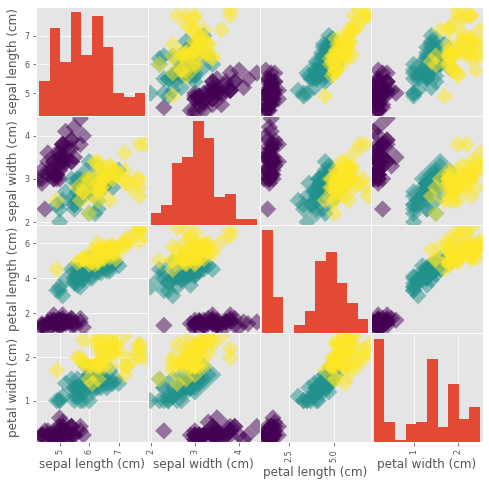

In [114]:
_ = pd.plotting.scatter_matrix(df, c=y, figsize=[8,8], s=150, marker="D")

### Numerical EDA

We'll be working with a dataset obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) consisting of votes made by US House of Representatives Congressmen. our goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues.


> Note: Here, it's worth noting that we have preprocessed this dataset to deal with missing values. This is so that our focus can be directed towards understanding how to train and evaluate supervised learning models.


Before thinking about what supervised learning models we can apply to this, however, we need to perform Exploratory data analysis (EDA) in order to understand the structure of the data.

In [115]:
votes = pd.read_csv("datasets/votes.csv")
votes.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [116]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              435 non-null    object
 1   infants            435 non-null    int64 
 2   water              435 non-null    int64 
 3   budget             435 non-null    int64 
 4   physician          435 non-null    int64 
 5   salvador           435 non-null    int64 
 6   religious          435 non-null    int64 
 7   satellite          435 non-null    int64 
 8   aid                435 non-null    int64 
 9   missile            435 non-null    int64 
 10  immigration        435 non-null    int64 
 11  synfuels           435 non-null    int64 
 12  education          435 non-null    int64 
 13  superfund          435 non-null    int64 
 14  crime              435 non-null    int64 
 15  duty_free_exports  435 non-null    int64 
 16  eaa_rsa            435 non-null    int64 
dt

In [117]:
votes.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.558621,0.606897,0.406897,0.521839,0.650575,0.581609,0.590805,0.526437,0.512644,0.344828,0.393103,0.537931,0.609195,0.400000,0.857471
std,0.495630,0.497123,0.489002,0.491821,0.500098,0.477337,0.493863,0.492252,0.499876,0.500416,0.475859,0.489002,0.499133,0.488493,0.490462,0.349994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Observations


* The DataFrame has a total of 435 rows and 17 columns.
* Except for `'party'`, all of the columns are of type `int64`. 
* The first two rows of the DataFrame consist of votes made by Republicans and the next three rows consist of votes made by Democrats.
* The target variable in this DataFrame is `'party'`.

### Votes Visual EDA

The Numerical EDA we did gave us some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Following this with some visual EDA will give us an even better understanding of the data. all the features in this dataset are binary; that is, they are either 0 or 1. So a different type of plot would be more useful here, such as [**Seaborn's** `countplot`](http://seaborn.pydata.org/generated/seaborn.countplot.html).

In [118]:
def plot_countplot(column):
    plt.figure()
    sns.countplot(x=column, hue='party', data=votes, palette='RdBu')
    plt.xticks([0,1], ['No', 'Yes'])
    plt.show()

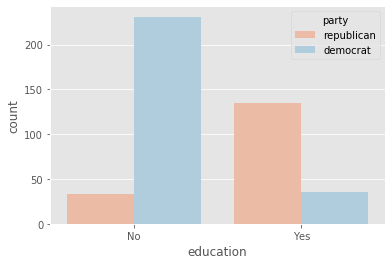

In [119]:
plot_countplot("education")

It seems like Democrats voted resoundingly against this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

In [120]:
votes.columns

Index(['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'],
      dtype='object')

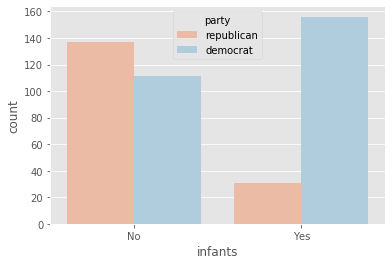

In [121]:
plot_countplot('infants')

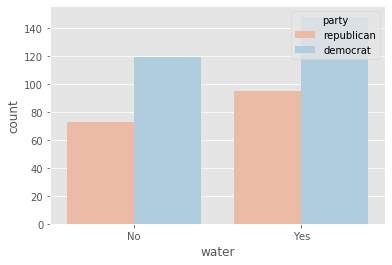

In [122]:
plot_countplot('water')

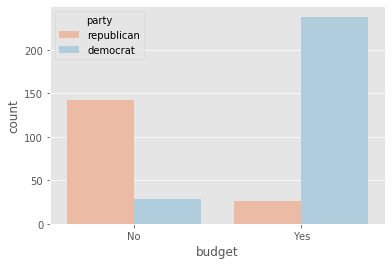

In [123]:
plot_countplot("budget")

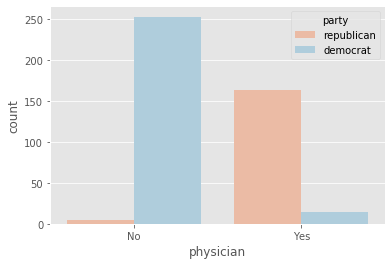

In [124]:
plot_countplot('physician')

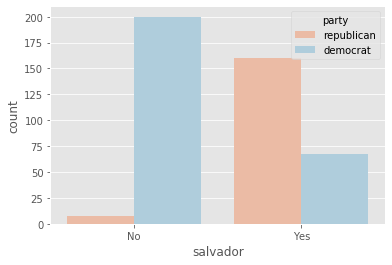

In [125]:
plot_countplot('salvador')

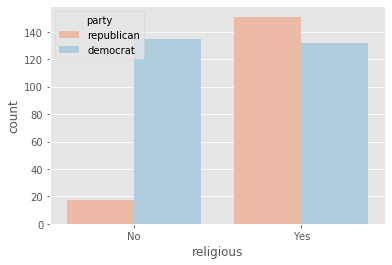

In [126]:
plot_countplot('religious')

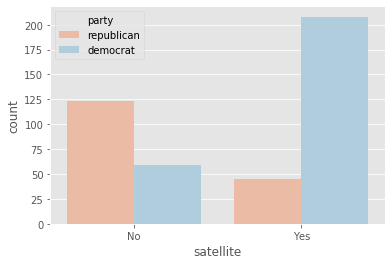

In [127]:
plot_countplot('satellite')

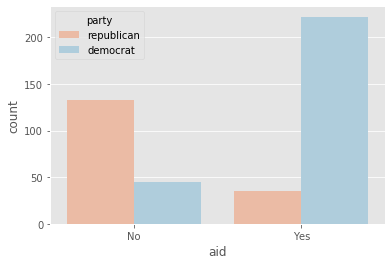

In [128]:
plot_countplot('aid')

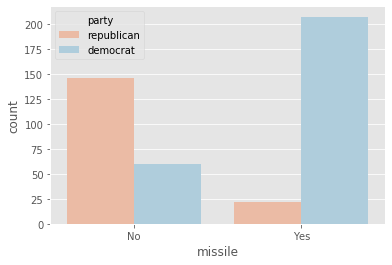

In [129]:
plot_countplot('missile')

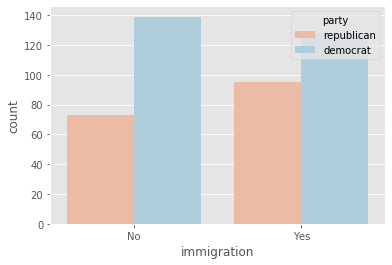

In [130]:
plot_countplot('immigration')

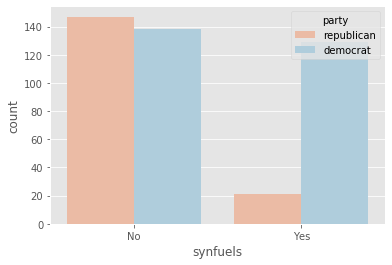

In [131]:
plot_countplot('synfuels')

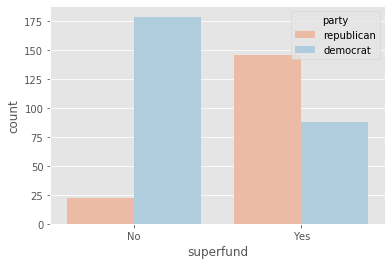

In [132]:
plot_countplot('superfund')

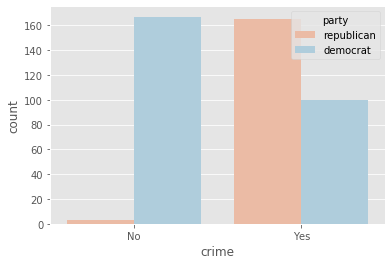

In [133]:
plot_countplot('crime')

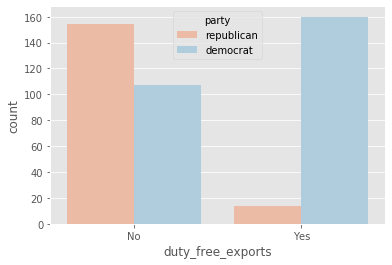

In [134]:
plot_countplot('duty_free_exports')

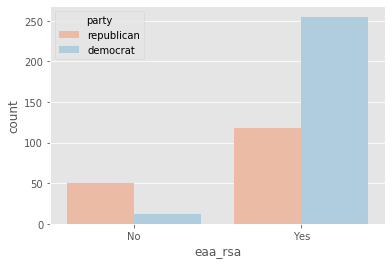

In [135]:
plot_countplot('eaa_rsa')

### Observations

* Democrats voted in favor of both `'satellite'` and `'missile'`

## The classification challenge


> ### k-Nearest Neighbors
- Basic idea: Predict the label of a data point by
  - Looking at the ‘k’ closest labeled data points
  - Taking a majority vote


> ### Scikit-learn fit and predict
- All machine learning models implemented as Python classes
  - They implement the algorithms for learning and predicting
  - Store the information learned from the data
- Training a model on the data = ‘fitting’ a model to the data
  - `.fit()` method
- To predict the labels of new data: `.predict()` method


### Iris k-NN: Intuition



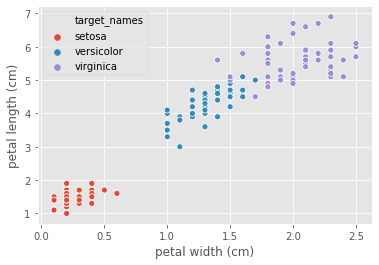

In [136]:
_ = sns.scatterplot(data=df2, x="petal width (cm)", y="petal length (cm)", hue='target_names')
plt.show()

### Iris dataset Using scikit-learn to fit a classier

In [137]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

In [138]:
iris['data'].shape

(150, 4)

In [139]:
iris['target'].shape

(150,)

### Predicting on unlabeled data

In [140]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1],
                 [5.7, 2.6, 3.8, 1.3],
                 [4.7, 3.2, 1.3, 0.2]])

In [141]:
prediction = knn.predict(X_new)
prediction

array([1, 1, 0])

### k-Nearest Neighbors: Fit

Having explored the Congressional voting records dataset, it is time now to build our first classifier. We'll will fit a k-Nearest Neighbors classifier to the voting dataset.

 The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. The target needs to be a single column with the same number of observations as the feature data. We will name the feature array `X` and response variable `y`: This is in accordance with the common scikit-learn practice.

In [142]:
# Create arrays for the features and the response variable
y_votes = votes['party'].values
X_votes = votes.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn_votes = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn_votes.fit(X_votes, y_votes)


KNeighborsClassifier(n_neighbors=6)

Now that the k-NN classifier with 6 neighbors has been fit to the data, it can be used to predict the labels of new data points.

### k-Nearest Neighbors: Predict



In [143]:
X_new_votes = pd.read_csv("datasets/X_new_votes.csv")
X_new_votes.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.696469,0.286139,0.226851,0.551315,0.719469,0.423106,0.980764,0.68483,0.480932,0.392118,0.343178,0.72905,0.438572,0.059678,0.398044,0.737995


Having fit a k-NN classifier, we can now use it to predict the label of a new data point.

In [144]:
# Predict and print the label for the new data point X_new
new_prediction = knn_votes.predict(X_new_votes)
print("Prediction: {}".format(new_prediction))


Prediction: ['democrat']


## Measuring model performance

> - In classication, accuracy is a commonly used metric
> - Accuracy = Fraction of correct predictions
> - Which data should be used to compute accuracy?
> - How well will the model perform on new data?
> - Could compute accuracy on data used to fit classifier
> - NOT indicative of ability to generalize
> - Split data into training and test set
> - Fit/train the classifier on the training set
> - Make predictions on test set
> - Compare predictions with the known labels


> ### Model complexity
- Larger k = smoother decision boundary = less complex model
- Smaller k = more complex model = can lead to overfitting

In [145]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X, y, test_size=.3, random_state=21, stratify=y)
knn_iris = KNeighborsClassifier(n_neighbors=8)
knn_iris.fit(X_train_iris, y_train_iris)
y_pred_iris = knn_iris.predict(X_test_iris)

print(f"Test set predictions \n{y_pred_iris}")

Test set predictions 
[2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [146]:
knn_iris.score(X_test_iris, y_test_iris)

0.9555555555555556

### The digits recognition dataset


We'll be working with the [**MNIST**](http://yann.lecun.com/exdb/mnist/) digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Helpfully for the MNIST dataset, scikit-learn provides an `'images'` key in addition to the `'data'` and `'target'` keys that we have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this `'images'` key is useful for visualizing the images. On the other hand, the `'data'` key contains the feature array - that is, the images as a flattened array of 64 pixels.

In [147]:
# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

In [148]:
# Print the shape of the images and data keys
print(digits.images.shape)
digits.data.shape

(1797, 8, 8)


(1797, 64)

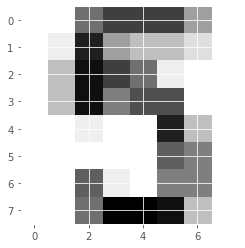

In [149]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

It looks like the image in question corresponds to the digit '5'. Now, can we build a classifier that can make this prediction not only for this image, but for all the other ones in the dataset? 

### Train/Test Split + Fit/Predict/Accuracy

Now that we have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, we will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the `.score()` method.

In [150]:
# Create feature and target arrays
X_digits = digits.data
y_digits = digits.target

# Split into training and test set
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, y_digits, 
                                                                                test_size = 0.2, random_state= 42, 
                                                                                stratify=y_digits)

# Create a k-NN classifier with 7 neighbors: knn_digits
knn_digits = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn_digits.fit(X_train_digits, y_train_digits)

# Print the accuracy
knn_digits.score(X_test_digits, y_test_digits)

0.9833333333333333

Incredibly, this out of the box k-NN classifier with 7 neighbors has learned from the training data and predicted the labels of the images in the test set with 98% accuracy, and it did so in less than a second! This is one illustration of how incredibly useful machine learning techniques can be.

### Overfitting and underfitting


We will now construct such a model complexity curve for the digits dataset! We will compute and plot the training and testing accuracy scores for a variety of different neighbor values.

By observing how the accuracy scores differ for the training and testing sets with different values of k, we will develop your intuition for overfitting and underfitting.

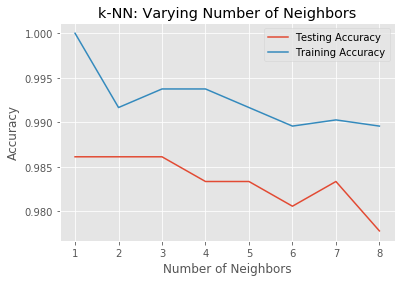

In [151]:
# Setup arrays to store train and test accuracies
neighbors_digits = np.arange(1, 9)
train_accuracy_digits = np.empty(len(neighbors_digits))
test_accuracy_digits = np.empty(len(neighbors_digits))

# Loop over different values of k
for i, k in enumerate(neighbors_digits):
    # Setup a k-NN Classifier with k neighbors: knn
    knn_digits = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn_digits.fit(X_train_digits, y_train_digits)
    
    #Compute accuracy on the training set
    train_accuracy_digits[i] = knn_digits.score(X_train_digits, y_train_digits)

    #Compute accuracy on the testing set
    test_accuracy_digits[i] = knn_digits.score(X_test_digits, y_test_digits)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors_digits, test_accuracy_digits, label = 'Testing Accuracy')
plt.plot(neighbors_digits, train_accuracy_digits, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


 It looks like the test accuracy is highest when using 1 and35 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data.

# Regression


We used image and political datasets to predict binary and multiclass outcomes. But what if our problem requires a continuous outcome? Regression is best suited to solving such problems. We will explore the fundamental concepts in regression and apply them to predict the life expectancy in a given country using Gapminder data.

## Introduction to regression

Example of an regression problem: A bike share company using time and weather data to predict the number of bikes being rented at any given hour. The target variable here - the number of bike rentals at any given hour - is quantitative, so this is best framed as a regression problem.

### Boston housing data

In [152]:
boston = datasets.load_boston()
boston.data.shape

(506, 13)

In [153]:
boston.target.shape

(506,)

In [154]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [155]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Creating feature and target arrays for the boston dataset

In [156]:
X_boston = boston.data
y_boston = boston.target

### Predicting house value from a single feature

In [157]:
X_boston_rooms = X_boston[:,5]
type(X_boston_rooms), type(y_boston)

(numpy.ndarray, numpy.ndarray)

In [158]:
y_boston = y_boston.reshape(-1,1)
X_boston_rooms = X_boston_rooms.reshape(-1,1)

### Plotting house value vs. number of rooms

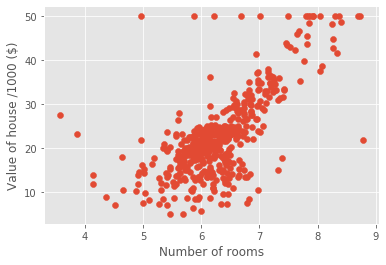

In [159]:
plt.scatter(X_boston_rooms, y_boston)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

### Fitting a regression model

In [162]:
reg_boston = LinearRegression()
reg_boston.fit(X_boston_rooms, y_boston)
boston_prediction_space = np.linspace(min(X_boston_rooms), max(X_boston_rooms)).reshape(-1,1)

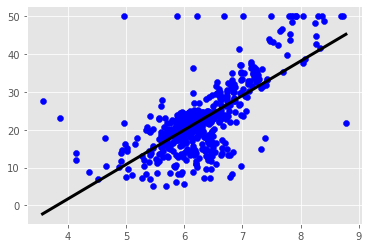

In [163]:
plt.scatter(X_boston_rooms, y_boston, color="blue")
plt.plot(boston_prediction_space, reg_boston.predict(boston_prediction_space), color='black', linewidth=3)
plt.show()

### Importing Gapminder data for supervised learning


We will work with [Gapminder](https://www.gapminder.org/data/) data that we have consolidated into one CSV file.

Specifically, our goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population.

Since the target variable here is quantitative, this is a regression problem. To begin, we will fit a linear regression with just one feature: `'fertility'`, which is the average number of children a woman in a given country gives birth to.

Before that, however, we need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since we are going to use only one feature to begin with, we need to do some reshaping using NumPy's `.reshape()` method. 

In [164]:
# Read the CSV file into a DataFrame: gapminder_df
gapminder = pd.read_csv("datasets/gapminder.csv")

# Create arrays for features and target variable
y_gapminder = gapminder.life.values
X_gapminder = gapminder.fertility.values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y_gapminder.shape))
print("Dimensions of X before reshaping: {}".format(X_gapminder.shape))

# Reshape X and y
y_gapminder = y_gapminder.reshape(-1,1)
X_gapminder = X_gapminder.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y_gapminder.shape))
print("Dimensions of X after reshaping: {}".format(X_gapminder.shape))


Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


### Exploring the Gapminder data

As always, it is important to explore the data before building models.

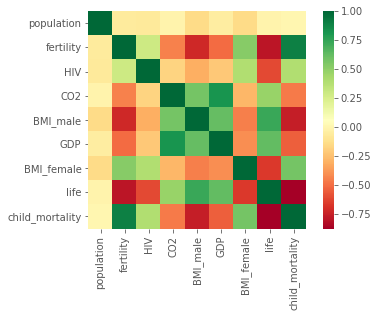

In [165]:
sns.heatmap(gapminder.corr(), square=True, cmap="RdYlGn")
plt.show()

 Cells that are in green show positive correlation, while cells that are in red show negative correlation. `life` and `fertility` are negatively correlated. `GDP` and `life` are positively correlated

In [166]:
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


In [167]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
dtypes: float64(9)
memory usage: 9.9 KB


> The DataFrame has 139 samples (or rows) and 9 columns.

In [168]:
gapminder.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


The mean of `life` is 69.602878

## The basics of linear regression


> ### Regression mechanics
- $y = ax + b$
  - $y$ = target
  - $x$ = single feature
  - $a$, $b$ = parameters of model
- How do we choose $a$ and $b$?
- Define an error functions for any given lineChoose the line that minimizes the error function
- Ordinary least squares(OLS): Minimize sum of squares of residuals


> ### Linear regression in higher dimensions
- $y=a_1x_1+a_2x_2+b$
- To fit a linear regression model here:
  - Need to specify 3 variables
- In higher dimensions:
  - Must specify coefcient for each feature and the variable $b$
  - $y=a_1x_1+a_2x_2+a_3x_3+...+a_nx_n+b$
- Scikit-learn API works exactly the same way:
  - Pass two arrays: Features, and target


### Linear regression on all features in boston dataset

In [169]:
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, 
                                                                                test_size=.3, random_state=42)
reg_all_boston = LinearRegression()
reg_all_boston.fit(X_train_boston, y_train_boston)
y_pred_boston = reg_all_boston.predict(X_test_boston)
reg_all_boston.score(X_test_boston, y_test_boston)

0.7112260057484912

### Fit & predict for regression in gapminder dataset

We will fit a linear regression and predict life expectancy using just one feature. We will use the `'fertility'` feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is `'life'`.

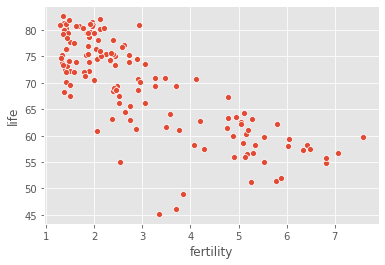

In [170]:
sns.scatterplot(data=gapminder, x="fertility", y="life")
plt.show()

As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Our job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. We will also compute and print the $R^2$ score using sckit-learn's `.score()` method.

In [171]:
# Create the regressor: reg
reg_gapminder = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_gapminder), max(X_gapminder)).reshape(-1,1)

# Fit the model to the data
reg_gapminder.fit(X_gapminder,y_gapminder)

# Compute predictions over the prediction space: y_pred
y_pred_gapminder = reg_gapminder.predict(prediction_space)

# Print R^2 
print(reg_gapminder.score(X_gapminder, y_gapminder))

0.6192442167740035


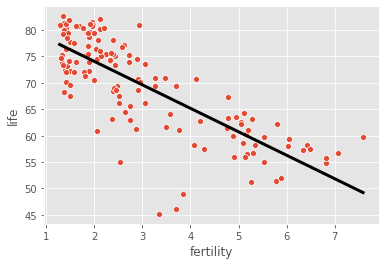

In [172]:
# Plot regression line
sns.scatterplot(data=gapminder, x="fertility", y="life")
plt.plot(prediction_space, y_pred_gapminder, color='black', linewidth=3)
plt.show()


 Notice how the line captures the underlying trend in the data. And the performance is quite decent for this basic regression model with only one feature!

### Train/test split for regression

train and test sets are vital to ensure that the supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

We will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over **all** features. In addition to computing the $R^2$ score, we will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. 

In [173]:
X_gapminder = gapminder.drop("life", axis=1).values

In [174]:
# Create training and test sets
X_train_gapminder, X_test_gapminder, y_train_gapminder, y_test_gapminder = train_test_split(X_gapminder, y_gapminder, test_size = .3, random_state=42)

# Create the regressor: reg_all
reg_all_gapminder = LinearRegression()

# Fit the regressor to the training data
reg_all_gapminder.fit(X_train_gapminder, y_train_gapminder)

# Predict on the test data: y_pred
y_pred_gapminder = reg_all_gapminder.predict(X_test_gapminder)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all_gapminder.score(X_test_gapminder, y_test_gapminder)))
rmse_gapminder = np.sqrt(mean_squared_error(y_test_gapminder, y_pred_gapminder))
print("Root Mean Squared Error: {}".format(rmse_gapminder))


R^2: 0.8380468731430056
Root Mean Squared Error: 3.2476010800370236


Using all features has improved the model score. This makes sense, as the model has more information to learn from. However, there is one potential pitfall to this process. Can you spot it? 

## Cross-validation


> ### Cross-validation motivation
- Model performance is dependent on way the data is split
- Not representative of the model’s ability to generalize
- Solution: Cross-validation!


> ### Cross-validation and model performance
- 5 folds = 5-fold CV
- 10 folds = 10-fold CV
- k folds = k-fold CV
- More folds = More computationally expensive

### Cross-validation in scikit-learn: Boston

In [175]:
cv_results_boston = cross_val_score(reg_all_boston, X_boston, y_boston, cv=5)
cv_results_boston

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [176]:
np.mean(cv_results_boston)

0.3532759243958792

In [177]:
np.median(cv_results_boston)

0.5870234363057828

### 5-fold cross-validation

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.


We will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's `cross_val_score()` function uses R2 as the metric of choice for regression. Since We are performing 5-fold cross-validation, the function will return 5 scores. We will compute these 5 scores and then take their average.

In [178]:
# Compute 5-fold cross-validation scores: cv_scores
cv_scores_gapminder = cross_val_score(reg_gapminder, X_gapminder, y_gapminder, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores_gapminder)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_gapminder)))


[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793397


Now that we have cross-validated your model, we can more confidently evaluate its predictions.

### K-Fold CV comparison


> Warning: Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes.

In [179]:
%timeit cross_val_score(reg_gapminder, X_gapminder, y_gapminder, cv=3)

8.04 ms ± 468 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [180]:
%timeit cross_val_score(reg_gapminder, X_gapminder, y_gapminder, cv=10)

25.2 ms ± 1.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [181]:
# Perform 3-fold CV
cvscores_3_gapminder = cross_val_score(reg_gapminder, X_gapminder, y_gapminder, cv=3)
print(np.mean(cvscores_3_gapminder))

# Perform 10-fold CV
cvscores_10_gapminder = cross_val_score(reg_gapminder, X_gapminder, y_gapminder, cv=10)
print(np.mean(cvscores_10_gapminder))


0.8718712782622093
0.843612862013108


## Regularized regression


> ### Why regularize?
- Recall: Linear regression minimizes a loss function
- It chooses a coefcient for each feature variable
- Large coefcients can lead to overtting
- Penalizing large coefcients: Regularization


> ### Ridge regression
- Loss function = OLS loss function + $\alpha * \sum_{i=1}^{n} a_i^2$
- Alpha: Parameter we need to choose
- Picking alpha here is similar to picking k in k-NN
- Hyperparameter tuning
- Alpha controls model complexity
  - Alpha = 0: We get back OLS (Can lead to overtting)
  - Very high alpha: Can lead to undertting
  

> ### Lasso regression
- Loss function = OLS loss function + $\alpha * \sum_{i=1}^{n} |a_i|$


> ### Lasso regression for feature selection
- Can be used to select important features of a dataset
- Shrinks the coefcients of less important features to exactly 0


### Ridge regression in scikit-learn: Boston

In [182]:
ridge_boston = Ridge(alpha=.1, normalize=True)
ridge_boston.fit(X_train_boston, y_train_boston)
ridge_pred_boston = ridge_boston.predict(X_test_boston)
ridge_boston.score(X_test_boston, y_test_boston)

0.6996938275127312

### Lasso regression in scikit-learn: Boston




In [183]:
lasso_boston = Lasso(alpha=.1, normalize=True)
lasso_boston.fit(X_train_boston, y_train_boston)
lasso_pred_boston = lasso_boston.predict(X_test_boston)
lasso_boston.score(X_test_boston, y_test_boston)

0.5950229535328548

### Lasso for feature selection in scikit-learn: Boston

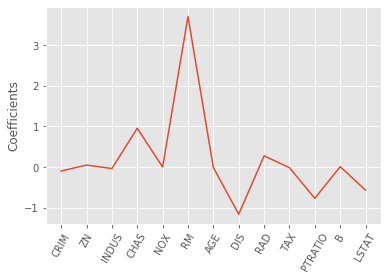

In [184]:
names_boston = boston.feature_names
lasso_boston_2 = Lasso(alpha=.1)
lasso_coef_boston = lasso_boston_2.fit(X_boston, y_boston).coef_
_ = plt.plot(range(len(names_boston)), lasso_coef_boston)
_ = plt.xticks(range(len(names_boston)), names_boston, rotation=60)
_ = plt.ylabel("Coefficients")
plt.show()

### Regularization I: Lasso

We saw how Lasso selected out the 'RM' feature as being the most important for predicting Boston house prices, while shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.

We will fit a lasso regression to the Gapminder data we have been working with and plot the coefficients. Just as with the Boston data.

In [185]:
df_columns_gapminder = pd.Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'],
      dtype='object')


[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


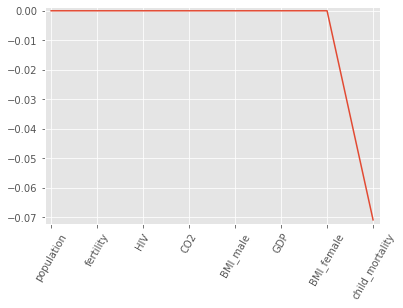

In [186]:
# Instantiate a lasso regressor: lasso
lasso_gapminder = Lasso(alpha=.4, normalize=True)

# Fit the regressor to the data
lasso_gapminder.fit(X_gapminder,y_gapminder)

# Compute and print the coefficients
lasso_coef_gapminder = lasso_gapminder.fit(X_gapminder,y_gapminder).coef_
print(lasso_coef_gapminder)

# Plot the coefficients
plt.plot(range(len(df_columns_gapminder)), lasso_coef_gapminder)
plt.xticks(range(len(df_columns_gapminder)), df_columns_gapminder.values, rotation=60)
plt.margins(0.02)
plt.show()


According to the lasso algorithm, it seems like `'child_mortality'` is the most important feature when predicting life expectancy.

### Regularization II: Ridge


Lasso is great for feature selection, but when building regression models, Ridge regression should be the first choice. 

lasso performs regularization by adding to the loss function a penalty term of the _absolute_ value of each coefficient multiplied by some alpha. This is also known as $L1$ regularization because the regularization term is the $L1$ norm of the coefficients. This is not the only way to regularize, however.




In [187]:
def display_plot(cv_scores, cv_scores_std):
    """plots the R^2 score as well as standard error for each alpha"""
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space_gapminder, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space_gapminder, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space_gapminder[0], alpha_space_gapminder[-1]])
    ax.set_xscale('log')
    plt.show()

If instead we took the sum of the _squared_ values of the coefficients multiplied by some alpha - like in Ridge regression - we would be computing the $L2$ norm. We will fit ridge regression models over a range of different alphas, and plot cross-validated $R^2$ scores for each, using this function `display_plot`, which plots the $R^2$ score as well as standard error for each alpha:

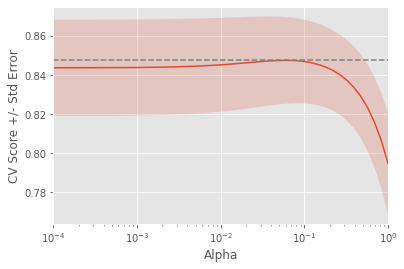

In [188]:
# Setup the array of alphas and lists to store scores
alpha_space_gapminder = np.logspace(-4, 0, 50)
ridge_scores_gapminder = []
ridge_scores_std_gapminder = []

# Create a ridge regressor: ridge
ridge_gapminder = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space_gapminder:

    # Specify the alpha value to use: ridge.alpha
    ridge_gapminder.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores_gapminder = cross_val_score(ridge_gapminder, X_gapminder, y_gapminder, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores_gapminder.append(np.mean(ridge_cv_scores_gapminder))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std_gapminder.append(np.std(ridge_cv_scores_gapminder))

# Display the plot
display_plot(ridge_scores_gapminder, ridge_scores_std_gapminder)


the cross-validation scores change with different alphas.

# Fine-tuning model


Having trained a model, the next task is to evaluate its performance. We will explore some of the other metrics available in scikit-learn that will allow us to assess the model's performance in a more nuanced manner.

### How good is your model?


> ### Classication metrics
- Measuring model performance with accuracy:
  - Fraction of correctly classied samples
  - Not always a useful metric
  

> ### Class imbalance example: Emails
- Spam classication
  - 99% of emails are real; 1% of emails are spam
- Could build a classier that predicts ALL emails as real
  - 99% accurate!
  - But horrible at actually classifying spam
  - Fails at its original purpose
- Need more nuanced metrics


> ### Diagnosing classication predictions
- Confusion matrix
- Accuracy: $\frac{tp+tn}{tp+tn+fp+fn}$


> ### Metrics from the confusion matrix
- Precision: $\frac{tp}{tp+fp}$
- Recal $\frac{tp}{tp+fn}$
- F1score: $2.\frac{precision.recal}{precision+recall}$
- High precision: Not many real emails predicted as spam
- High recall: Predicted most spam emails correctly


### Confusion matrix in scikit-learn: iris dataset

In [189]:
confusion_matrix(y_test_iris, y_pred_iris)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]], dtype=int64)

In [190]:
print(classification_report(y_test_iris, y_pred_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [191]:
X_train_votes, X_test_votes, y_train_votes, y_test_votes = train_test_split(X_votes, y_votes, test_size=.4, random_state=42)
knn_votes = KNeighborsClassifier(n_neighbors=8)
knn_votes.fit(X_train_votes, y_train_votes)
y_pred_votes = knn_votes.predict(X_test_votes)

In [192]:
confusion_matrix(y_test_votes, y_pred_votes)

array([[108,   7],
       [  4,  55]], dtype=int64)

In [193]:
print(classification_report(y_test_votes, y_pred_votes))

              precision    recall  f1-score   support

    democrat       0.96      0.94      0.95       115
  republican       0.89      0.93      0.91        59

    accuracy                           0.94       174
   macro avg       0.93      0.94      0.93       174
weighted avg       0.94      0.94      0.94       174



The support gives the number of samples of the true response that lie in that class, the support was the number of Republicans or Democrats in the test set on which the classification report was computed. The precision, recall, and f1-score columns, then, gave the respective metrics for that particular class.

### Metrics for classification

We evaluated the performance of k-NN classifier based on its accuracy. However, accuracy is not always an informative metric. We will dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report.

We'll work with the [PIMA Indians](https://www.kaggle.com/uciml/pima-indians-diabetes-database) dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes.

In [194]:
pidd = pd.read_csv("datasets/pima_indians_diabetes_database.csv")
pidd.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1


We will train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.

In [195]:
y_pidd = pidd.diabetes.values
X_pidd = pidd.drop("diabetes", axis=1).values

In [196]:
# Create training and test set
X_train_pidd, X_test_pidd, y_train_pidd, y_test_pidd = train_test_split(X_pidd, y_pidd, test_size=.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn_pidd = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn_pidd.fit(X_train_pidd, y_train_pidd)

# Predict the labels of the test data: y_pred
y_pred_pidd = knn_pidd.predict(X_test_pidd)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test_pidd, y_pred_pidd))
print(classification_report(y_test_pidd, y_pred_pidd))


[[176  30]
 [ 52  50]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       206
           1       0.62      0.49      0.55       102

    accuracy                           0.73       308
   macro avg       0.70      0.67      0.68       308
weighted avg       0.72      0.73      0.72       308



By analyzing the confusion matrix and classification report, we can get a much better understanding of your classifier's performance.

## Logistic regression and the ROC curve


> ### Logistic regression for binary classication
- Logistic regression outputs probabilities
- If the probability ‘p’ is greater than 0.5:
  - The data is labeled ‘1’
- If the probability ‘p’ is less than 0.5:
  - The data is labeled ‘0’


> ### Probability thresholds
- By default, logistic regression threshold = 0.5
- Not specific to logistic regression
  - k-NN classifiers also have thresholds
- What happens if we vary the threshold?


### Building a logistic regression model


Time to build our first logistic regression model! scikit-learn makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'. 

In [197]:
# Create the classifier: logreg
logreg_pidd = LogisticRegression()

# Fit the classifier to the training data
logreg_pidd.fit(X_train_pidd, y_train_pidd)

# Predict the labels of the test set: y_pred
y_pred_logreg_pidd = logreg_pidd.predict(X_test_pidd)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test_pidd, y_pred_logreg_pidd))
print(classification_report(y_test_pidd, y_pred_logreg_pidd))


[[171  35]
 [ 35  67]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       206
           1       0.66      0.66      0.66       102

    accuracy                           0.77       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.77      0.77      0.77       308



### Precision-recall Curve

the precision-recall curve is generated by plotting the precision and recall for different thresholds. 

$$
precision = \frac{TP}{TP+FP}
$$
$$
recall = \frac{TP}{TP+FN}
$$

Text(0.5, 1.0, 'Precision-Recall curve: ')

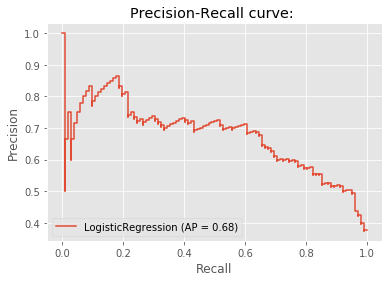

In [198]:
disp = plot_precision_recall_curve(logreg_pidd, X_test_pidd, y_test_pidd)
disp.ax_.set_title('Precision-Recall curve: ')

* A recall of 1 corresponds to a classifier with a low threshold in which all females who contract diabetes were correctly classified as such, at the expense of many misclassifications of those who did not have diabetes.
* Precision is undefined for a classifier which makes no positive predictions, that is, classifies everyone as not having diabetes.
* When the threshold is very close to 1, precision is also 1, because the classifier is absolutely certain about its predictions.

### Plotting an ROC curve


Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. most classifiers in scikit-learn have a `.predict_proba()` method which returns the probability of a given sample being in a particular class.  Having built a logistic regression model, we'll now evaluate its performance by plotting an ROC curve. In doing so, we'll make use of the `.predict_proba()` method and become familiar with its functionality.

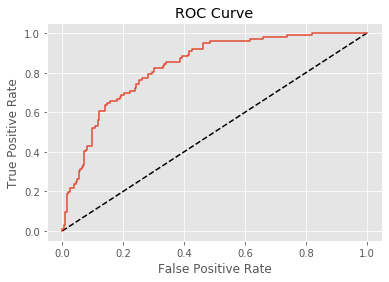

In [199]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_pidd = logreg_pidd.predict_proba(X_test_pidd)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr_pidd, tpr_pidd, thresholds_pidd = roc_curve(y_test_pidd, y_pred_prob_pidd)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_pidd, tpr_pidd)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Area under the ROC curve


> ### Area under the ROC curve (AUC)
- Larger area under the ROC curve = better model


### AUC computation


Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

We'll calculate AUC scores using the `roc_auc_score()` function from `sklearn.metrics` as well as by performing cross-validation on the diabetes dataset.

In [200]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_pidd, y_pred_prob_pidd)))

# Compute cross-validated AUC scores: cv_auc
cv_auc_pidd = cross_val_score(logreg_pidd, X_pidd, y_pidd, cv=5, scoring="roc_auc")

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc_pidd))


AUC: 0.8329050066628593
AUC scores computed using 5-fold cross-validation: [0.82055556 0.80537037 0.82537037 0.87301887 0.82509434]


## Hyperparameter tuning


> ### Hyperparameter tuning
- Linear regression: Choosing parameters
- Ridge/lasso regression: Choosing alpha
- k-Nearest Neighbors: Choosing n_neighbors
- Parameters like alpha and k: Hyperparameters
- Hyperparameters cannot be learned by tting the model


> ### Choosing the correct hyperparameter
- Try a bunch of different hyperparameter values
- Fit all of them separately
- See how well each performs
- Choose the best performing one
- It is essential to use cross-validation


### GridSearchCV in scikit-learn votes dataset

In [201]:
param_grid_votes = {"n_neighbors":np.arange(1,50)}
knn_votes = KNeighborsClassifier()
knn_cv_votes = GridSearchCV(knn_votes, param_grid=param_grid_votes, cv=5)
knn_cv_votes.fit(X_votes, y_votes)
knn_cv_votes.best_params_

{'n_neighbors': 4}

In [202]:
knn_cv_votes.best_score_

0.9333333333333333

### Hyperparameter tuning with GridSearchCV

 logistic regression also has a regularization parameter: $C$. $C$  controls the _inverse_ of the regularization strength, and this is what we will tune. A large $C$ can lead to an overfit model, while a small $C$ can lead to an underfit model.

In [203]:
# Setup the hyperparameter grid
c_space_pidd = np.logspace(-5, 8, 15)
param_grid_pidd = {'C': c_space_pidd}

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv_pidd = GridSearchCV(logreg_pidd, param_grid_pidd, cv=5)

# Fit it to the data
logreg_cv_pidd.fit(X_pidd,y_pidd)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv_pidd.best_params_)) 
print("Best score is {}".format(logreg_cv_pidd.best_score_))


Tuned Logistic Regression Parameters: {'C': 1389495.494373136}
Best score is 0.7786945081062727


### Hyperparameter tuning with RandomizedSearchCV

`GridSearchCV` can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use `RandomizedSearchCV`, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

Decision trees have many parameters that can be tuned, such as `max_features`, `max_depth`, and `min_samples_leaf`: This makes it an ideal use case for `RandomizedSearchCV`. Our goal is to use RandomizedSearchCV to find the optimal hyperparameters.

In [204]:
# Setup the parameters and distributions to sample from: param_dist
param_dist_pidd = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree_pidd = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv_pidd = RandomizedSearchCV(tree_pidd, param_dist_pidd, cv=5)

# Fit it to the data
tree_cv_pidd.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv_pidd.best_params_))
print("Best score is {}".format(tree_cv_pidd.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 3}
Best score is 0.96


> Note: `RandomizedSearchCV` will never outperform `GridSearchCV`. Instead, it is valuable because it saves on computation time.

## Hold-out set for final evaluation


> ### Hold-out set reasoning
- How well can the model perform on never before seen data?
- Using ALL data for cross-validation is not ideal
- Split data into training and hold-out set at the beginning
- Perform grid search cross-validation on training set
- Choose best hyperparameters and evaluate on hold-out set


### Hold-out set in practice I: Classification

You will now practice evaluating a model with tuned hyperparameters on a hold-out set. In addition to $C$, logistic regression has a `'penalty'` hyperparameter which specifies whether to use `'l1'` or `'l2'` regularization. Our job is to create a hold-out set, tune the `'C'` and `'penalty'` hyperparameters of a logistic regression classifier using `GridSearchCV` on the training set.

In [205]:
param_grid_pidd['penalty'] = ['l1', 'l2']

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv_pidd = GridSearchCV(logreg_pidd, param_grid_pidd, cv=5)

# Fit it to the training data
logreg_cv_pidd.fit(X_train_pidd, y_train_pidd)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv_pidd.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv_pidd.best_score_))


Tuned Logistic Regression Parameter: {'C': 268.2695795279727, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7739130434782608


### Hold-out set in practice II: Regression

Lasso used the $L1$ penalty to regularize, while ridge used the $L2$ penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the $L1$ and $L2$ penalties:

$$
a∗L1+b∗L2
$$

In scikit-learn, this term is represented by the `'l1_ratio'` parameter: An `'l1_ratio'` of 1 corresponds to an $L1$ penalty, and anything lower is a combination of $L1$ and $L2$.

We will `GridSearchCV` to tune the `'l1_ratio'` of an elastic net model trained on the Gapminder data. 

In [206]:
# Create the hyperparameter grid
l1_space_gapminder = np.linspace(0, 1, 30)
param_grid_gapminder = {'l1_ratio': l1_space_gapminder}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net_gapminder = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv_gapminder = GridSearchCV(elastic_net_gapminder, param_grid_gapminder, cv=5)

# Fit it to the training data
gm_cv_gapminder.fit(X_train_gapminder, y_train_gapminder)

# Predict on the test set and compute metrics
y_pred_gapminder = gm_cv_gapminder.predict(X_test_gapminder)
r2_gapminder = gm_cv_gapminder.score(X_test_gapminder, y_test_gapminder)
mse_gapminder = mean_squared_error(y_test_gapminder, y_pred_gapminder)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv_gapminder.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2_gapminder))
print("Tuned ElasticNet MSE: {}".format(mse_gapminder))


Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.8442220994403304
Tuned ElasticNet MSE: 10.14476201459942


# Preprocessing and pipelines

Pipelines, and how scikit-learn allows for transformers and estimators to be chained together and used as a single unit. Preprocessing techniques will be introduced as a way to enhance model performance, and pipelines will tie together concepts from previous sections.

## Preprocessing data


> ### Dealing with categorical features
- Scikit-learn will not accept categorical features by default
- Need to encode categorical features numerically
- Convert to ‘dummy variables’
  - 0: Observation was NOT that category
  - 1: Observation was that category


> ### Dealing with categorical features in Python
- scikit-learn:
  - `OneHotEncoder()`
- pandas:
  - `get_dummies()`


### Automobile dataset

- mpg:Target Variable
- Origin:Categorical Feature


In [207]:
autos = pd.read_csv("datasets/autos.csv")
autos.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [208]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   origin  392 non-null    object 
 6   size    392 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.6+ KB


In [209]:
autos.describe()

,mpg,displ,hp,weight,accel,size
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327,13.679847
std,7.805007,104.644004,38.491160,849.402560,2.758864,4.264458
min,9.000000,68.000000,46.000000,1613.000000,8.000000,7.500000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000,10.000000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000,10.000000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000,20.000000
max,46.600000,455.000000,230.000000,5140.000000,24.800000,20.000000


In [210]:
autos.shape

(392, 7)

### EDA w/ categorical feature

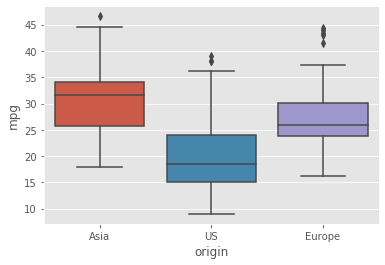

In [212]:
_ = sns.boxplot(data=autos, x="origin", y="mpg", order=['Asia', 'US', 'Europe'])
plt.show()

### Encoding dummy variables

In [213]:
autos_origin = pd.get_dummies(autos)
autos_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [214]:
autos_origin = autos_origin.drop("origin_Asia", axis=1)
autos_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0


### Linear regression with dummy variables

In [216]:
X_autos_origin = autos_origin[["origin_Europe", "origin_US"]].values
y_autos_origin = autos_origin['mpg'].values

In [218]:
X_train_autos_origin, X_test_autos_origin, y_train_autos_origin, y_test_autos_origin, = train_test_split(X_autos_origin,
                                                                                                         y_autos_origin, 
                                                                                                         test_size=.3, 
                                                                                                         random_state=42)
ridge_autos_origin = Ridge(alpha=.5, normalize=True).fit(X_train_autos_origin, y_train_autos_origin)
ridge_autos_origin.score(X_test_autos_origin, y_test_autos_origin)

0.3241789154336545

### Exploring categorical features

The Gapminder dataset that we worked with in previous section also contained a categorical `'Region'` feature, which we dropped since we did not have the tools to deal with it. Now however, we do, so we have added it back in!

We will explore this feature. Boxplots are particularly useful for visualizing categorical features such as this.

In [219]:
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


In [220]:
gapminder_2 = pd.read_csv("datasets/gapminder_2.csv")
gapminder_2.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


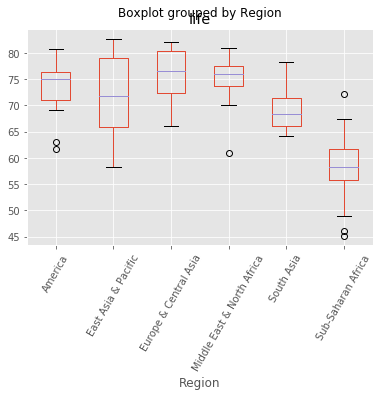

In [221]:
# Create a boxplot of life expectancy per region
gapminder_2.boxplot("life", "Region", rot=60)

# Show the plot
plt.show()


> Important: Exploratory data analysis should always be the precursor to model building.

### Creating dummy variables


scikit-learn does not accept non-numerical features. The `'Region'` feature contains very useful information that can predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. Therefore, if we are trying to predict life expectancy, it would be preferable to retain the `'Region'` feature. To do this, we need to binarize it by creating dummy variables, which is what we will do.

In [222]:
# Create dummy variables with drop_first=True: df_region
gapminder_region = pd.get_dummies(gapminder_2, drop_first=True)

# Print the new columns of df_region
print(gapminder_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [223]:
gapminder_region.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1,0,0,0,0


Now that we have created the dummy variables, we can use the `'Region'` feature to predict life expectancy!

### Regression with categorical features


We'll use ridge regression to perform 5-fold cross-validation.

In [224]:
X_gapminder_region = gapminder_region.drop("life", axis=1).values
y_gapminder_region = gapminder_region.life.values

In [229]:
# Instantiate a ridge regressor: ridge
ridge_gapminder_region = Ridge(alpha=.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv_gapminder_region = cross_val_score(ridge_gapminder_region, X_gapminder_region, y_gapminder_region, cv=5)

# Print the cross-validated scores
print(ridge_cv_gapminder_region)


[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


We now know how to build models using data that includes categorical features.

## Handling missing data

> ### Imputing missing data
- Making an educated guess about the missing values
- Example: Using the mean of the non-missing entries

### PIMA Indians dataset

In [230]:
pidd.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1


In [231]:
pidd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    float64
 4   insulin      768 non-null    float64
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [234]:
pidd.insulin.replace(0, np.nan, inplace=True)
pidd.bmi.replace(0, np.nan, inplace=True)
pidd.triceps.replace(0, np.nan, inplace=True)
pidd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    float64
 4   insulin      768 non-null    float64
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [235]:
pidd.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1


### Dropping missing data

The voting dataset1 contained a bunch of missing values that we dealt with for you behind the scenes.

In [238]:
votes2 = pd.read_csv("datasets/votes2.csv")
votes2.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


there are certain data points labeled with a `'?'`. These denote missing values. We will convert the `'?'`s to `NaN`s, and then drop the rows that contain them from the DataFrame.

In [241]:
# Convert '?' to NaN
votes2[votes2 == "?"] = np.nan

# Print the number of NaNs
display(votes2.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(votes2.shape))

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(votes2.dropna().shape))


party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64

Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


When many values in a dataset are missing, if you drop them, you may end up throwing away valuable information along with the missing data. It's better instead to develop an imputation strategy. This is where domain knowledge is useful, but in the absence of it, you can impute missing values with the mean or the median of the row or column that the missing value is in.

### Imputing missing data in a ML Pipeline I

there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

We will be setting up a pipeline with two steps: the imputation step, followed by the instantiation of a classifier. We've seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. Here we will be using the [SVM (Support Vector Machine)](http://scikit-learn.org/stable/modules/svm.html)

In [242]:
votes2.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,democrat,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1


In [243]:
votes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              435 non-null    object
 1   infants            423 non-null    object
 2   water              387 non-null    object
 3   budget             424 non-null    object
 4   physician          424 non-null    object
 5   salvador           420 non-null    object
 6   religious          424 non-null    object
 7   satellite          421 non-null    object
 8   aid                420 non-null    object
 9   missile            413 non-null    object
 10  immigration        428 non-null    object
 11  synfuels           414 non-null    object
 12  education          404 non-null    object
 13  superfund          410 non-null    object
 14  crime              418 non-null    object
 15  duty_free_exports  407 non-null    object
 16  eaa_rsa            331 non-null    object
dt

In [269]:
# Setup the Imputation transformer: imp
imp_votes = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# Instantiate the SVC classifier: clf
clf_votes = SVC()

# Setup the pipeline with the required steps: steps
steps_votes = [('imputation', imp_votes),
        ('SVM', clf_votes)]

Having set up the pipeline steps, we can now use it for classification.

### Imputing missing data in a ML Pipeline II

Having setup the steps of the pipeline we will now use it on the voting dataset to classify a Congressman's party affiliation. What makes pipelines so incredibly useful is the simple interface that they provide.

In [270]:
X_votes[:5]

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [271]:
votes.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [272]:
X_votes = votes.drop("party", axis=1)
y_votes = votes.party

In [273]:
X_train_votes, X_test_votes, y_train_votes, y_test_votes = train_test_split(X_votes, y_votes, test_size=.3, random_state=42)

In [274]:
# Create the pipeline: pipeline
pipeline_votes = Pipeline(steps_votes)

# Fit the pipeline to the train set
pipeline_votes.fit(X_train_votes, y_train_votes)

# Predict the labels of the test set
y_pred_votes = pipeline_votes.predict(X_test_votes)

# Compute metrics
print(classification_report(y_test_votes, y_pred_votes))


              precision    recall  f1-score   support

    democrat       0.98      0.96      0.97        85
  republican       0.94      0.96      0.95        46

    accuracy                           0.96       131
   macro avg       0.96      0.96      0.96       131
weighted avg       0.96      0.96      0.96       131



## Centering and scaling


> ### Why scale your data?
- Many models use some form of distance to inform them
- Features on larger scales can unduly influence the model
- Example: k-NN uses distance explicitly when making predictions
- We want features to be on a similar scale
- Normalizing (or scaling and centering)


> ### Ways to normalize your data
- Standardization: Subtract the mean and divide by variance
- All features are centered around zero and have variance one
- Can also subtract the minimum and divide by the range
- Minimum zero and maximum one
- Can also normalize so the data ranges from -1 to +1


### Centering and scaling your data


the performance of a model can improve if the features are scaled. Note that this is not always the case: In the Congressional voting records dataset, for example, all of the features are binary. In such a situation, scaling will have minimal impact. We will explore scalling on [White Wine Quality](https://archive.ics.uci.edu/ml/datasets/Wine+Quality).

In [254]:
wwq = pd.read_csv("datasets/white_wine_quality.csv")
wwq.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [255]:
X_wwq = np.array([[7.00000000e+00, 2.70000000e-01, 3.60000000e-01, 2.07000000e+01,
        4.50000000e-02, 4.50000000e+01, 1.70000000e+02, 1.00100000e+00,
        3.00000000e+00, 4.50000000e-01, 8.80000000e+00],
       [6.30000000e+00, 3.00000000e-01, 3.40000000e-01, 1.60000000e+00,
        4.90000000e-02, 1.40000000e+01, 1.32000000e+02, 9.94000000e-01,
        3.30000000e+00, 4.90000000e-01, 9.50000000e+00],
       [8.10000000e+00, 2.80000000e-01, 4.00000000e-01, 6.90000000e+00,
        5.00000000e-02, 3.00000000e+01, 9.70000000e+01, 9.95100000e-01,
        3.26000000e+00, 4.40000000e-01, 1.01000000e+01],
       [7.20000000e+00, 2.30000000e-01, 3.20000000e-01, 8.50000000e+00,
        5.80000000e-02, 4.70000000e+01, 1.86000000e+02, 9.95600000e-01,
        3.19000000e+00, 4.00000000e-01, 9.90000000e+00],
       [7.20000000e+00, 2.30000000e-01, 3.20000000e-01, 8.50000000e+00,
        5.80000000e-02, 4.70000000e+01, 1.86000000e+02, 9.95600000e-01,
        3.19000000e+00, 4.00000000e-01, 9.90000000e+00],
       [8.10000000e+00, 2.80000000e-01, 4.00000000e-01, 6.90000000e+00,
        5.00000000e-02, 3.00000000e+01, 9.70000000e+01, 9.95100000e-01,
        3.26000000e+00, 4.40000000e-01, 1.01000000e+01],
       [6.20000000e+00, 3.20000000e-01, 1.60000000e-01, 7.00000000e+00,
        4.50000000e-02, 3.00000000e+01, 1.36000000e+02, 9.94900000e-01,
        3.18000000e+00, 4.70000000e-01, 9.60000000e+00],
       [7.00000000e+00, 2.70000000e-01, 3.60000000e-01, 2.07000000e+01,
        4.50000000e-02, 4.50000000e+01, 1.70000000e+02, 1.00100000e+00,
        3.00000000e+00, 4.50000000e-01, 8.80000000e+00],
       [6.30000000e+00, 3.00000000e-01, 3.40000000e-01, 1.60000000e+00,
        4.90000000e-02, 1.40000000e+01, 1.32000000e+02, 9.94000000e-01,
        3.30000000e+00, 4.90000000e-01, 9.50000000e+00],
       [8.10000000e+00, 2.20000000e-01, 4.30000000e-01, 1.50000000e+00,
        4.40000000e-02, 2.80000000e+01, 1.29000000e+02, 9.93800000e-01,
        3.22000000e+00, 4.50000000e-01, 1.10000000e+01],
       [8.10000000e+00, 2.70000000e-01, 4.10000000e-01, 1.45000000e+00,
        3.30000000e-02, 1.10000000e+01, 6.30000000e+01, 9.90800000e-01,
        2.99000000e+00, 5.60000000e-01, 1.20000000e+01],
       [8.60000000e+00, 2.30000000e-01, 4.00000000e-01, 4.20000000e+00,
        3.50000000e-02, 1.70000000e+01, 1.09000000e+02, 9.94700000e-01,
        3.14000000e+00, 5.30000000e-01, 9.70000000e+00],
       [7.90000000e+00, 1.80000000e-01, 3.70000000e-01, 1.20000000e+00,
        4.00000000e-02, 1.60000000e+01, 7.50000000e+01, 9.92000000e-01,
        3.18000000e+00, 6.30000000e-01, 1.08000000e+01],
       [6.60000000e+00, 1.60000000e-01, 4.00000000e-01, 1.50000000e+00,
        4.40000000e-02, 4.80000000e+01, 1.43000000e+02, 9.91200000e-01,
        3.54000000e+00, 5.20000000e-01, 1.24000000e+01],
       [8.30000000e+00, 4.20000000e-01, 6.20000000e-01, 1.92500000e+01,
        4.00000000e-02, 4.10000000e+01, 1.72000000e+02, 1.00020000e+00,
        2.98000000e+00, 6.70000000e-01, 9.70000000e+00],
       [6.60000000e+00, 1.70000000e-01, 3.80000000e-01, 1.50000000e+00,
        3.20000000e-02, 2.80000000e+01, 1.12000000e+02, 9.91400000e-01,
        3.25000000e+00, 5.50000000e-01, 1.14000000e+01],
       [6.30000000e+00, 4.80000000e-01, 4.00000000e-02, 1.10000000e+00,
        4.60000000e-02, 3.00000000e+01, 9.90000000e+01, 9.92800000e-01,
        3.24000000e+00, 3.60000000e-01, 9.60000000e+00],
       [6.20000000e+00, 6.60000000e-01, 4.80000000e-01, 1.20000000e+00,
        2.90000000e-02, 2.90000000e+01, 7.50000000e+01, 9.89200000e-01,
        3.33000000e+00, 3.90000000e-01, 1.28000000e+01],
       [7.40000000e+00, 3.40000000e-01, 4.20000000e-01, 1.10000000e+00,
        3.30000000e-02, 1.70000000e+01, 1.71000000e+02, 9.91700000e-01,
        3.12000000e+00, 5.30000000e-01, 1.13000000e+01],
       [6.50000000e+00, 3.10000000e-01, 1.40000000e-01, 7.50000000e+00,
        4.40000000e-02, 3.40000000e+01, 1.33000000e+02, 9.95500000e-01,
        3.22000000e+00, 5.00000000e-01, 9.50000000e+00],
       [6.20000000e+00, 6.60000000e-01, 4.80000000e-01, 1.20000000e+00,
        2.90000000e-02, 2.90000000e+01, 7.50000000e+01, 9.89200000e-01,
        3.33000000e+00, 3.90000000e-01, 1.28000000e+01],
       [6.40000000e+00, 3.10000000e-01, 3.80000000e-01, 2.90000000e+00,
        3.80000000e-02, 1.90000000e+01, 1.02000000e+02, 9.91200000e-01,
        3.17000000e+00, 3.50000000e-01, 1.10000000e+01],
       [6.80000000e+00, 2.60000000e-01, 4.20000000e-01, 1.70000000e+00,
        4.90000000e-02, 4.10000000e+01, 1.22000000e+02, 9.93000000e-01,
        3.47000000e+00, 4.80000000e-01, 1.05000000e+01],
       [7.60000000e+00, 6.70000000e-01, 1.40000000e-01, 1.50000000e+00,
        7.40000000e-02, 2.50000000e+01, 1.68000000e+02, 9.93700000e-01,
        3.05000000e+00, 5.10000000e-01, 9.30000000e+00],
       [6.60000000e+00, 2.70000000e-01, 4.10000000e-01, 1.30000000e+00,
        5.20000000e-02, 1.60000000e+01, 1.42000000e+02, 9.95100000e-01,
        3.42000000e+00, 4.70000000e-01, 1.00000000e+01],
       [7.00000000e+00, 2.50000000e-01, 3.20000000e-01, 9.00000000e+00,
        4.60000000e-02, 5.60000000e+01, 2.45000000e+02, 9.95500000e-01,
        3.25000000e+00, 5.00000000e-01, 1.04000000e+01],
       [6.90000000e+00, 2.40000000e-01, 3.50000000e-01, 1.00000000e+00,
        5.20000000e-02, 3.50000000e+01, 1.46000000e+02, 9.93000000e-01,
        3.45000000e+00, 4.40000000e-01, 1.00000000e+01],
       [7.00000000e+00, 2.80000000e-01, 3.90000000e-01, 8.70000000e+00,
        5.10000000e-02, 3.20000000e+01, 1.41000000e+02, 9.96100000e-01,
        3.38000000e+00, 5.30000000e-01, 1.05000000e+01],
       [7.40000000e+00, 2.70000000e-01, 4.80000000e-01, 1.10000000e+00,
        4.70000000e-02, 1.70000000e+01, 1.32000000e+02, 9.91400000e-01,
        3.19000000e+00, 4.90000000e-01, 1.16000000e+01],
       [7.20000000e+00, 3.20000000e-01, 3.60000000e-01, 2.00000000e+00,
        3.30000000e-02, 3.70000000e+01, 1.14000000e+02, 9.90600000e-01,
        3.10000000e+00, 7.10000000e-01, 1.23000000e+01],
       [8.50000000e+00, 2.40000000e-01, 3.90000000e-01, 1.04000000e+01,
        4.40000000e-02, 2.00000000e+01, 1.42000000e+02, 9.97400000e-01,
        3.20000000e+00, 5.30000000e-01, 1.00000000e+01],
       [8.30000000e+00, 1.40000000e-01, 3.40000000e-01, 1.10000000e+00,
        4.20000000e-02, 7.00000000e+00, 4.70000000e+01, 9.93400000e-01,
        3.47000000e+00, 4.00000000e-01, 1.02000000e+01],
       [7.40000000e+00, 2.50000000e-01, 3.60000000e-01, 2.05000000e+00,
        5.00000000e-02, 3.10000000e+01, 1.00000000e+02, 9.92000000e-01,
        3.19000000e+00, 4.40000000e-01, 1.08000000e+01],
       [6.20000000e+00, 1.20000000e-01, 3.40000000e-01, 1.50000000e+00,
        4.50000000e-02, 4.30000000e+01, 1.17000000e+02, 9.93900000e-01,
        3.42000000e+00, 5.10000000e-01, 9.00000000e+00],
       [5.80000000e+00, 2.70000000e-01, 2.00000000e-01, 1.49500000e+01,
        4.40000000e-02, 2.20000000e+01, 1.79000000e+02, 9.96200000e-01,
        3.37000000e+00, 3.70000000e-01, 1.02000000e+01],
       [7.30000000e+00, 2.80000000e-01, 4.30000000e-01, 1.70000000e+00,
        8.00000000e-02, 2.10000000e+01, 1.23000000e+02, 9.90500000e-01,
        3.19000000e+00, 4.20000000e-01, 1.28000000e+01],
       [6.50000000e+00, 3.90000000e-01, 2.30000000e-01, 5.40000000e+00,
        5.10000000e-02, 2.50000000e+01, 1.49000000e+02, 9.93400000e-01,
        3.24000000e+00, 3.50000000e-01, 1.00000000e+01],
       [7.00000000e+00, 3.30000000e-01, 3.20000000e-01, 1.20000000e+00,
        5.30000000e-02, 3.80000000e+01, 1.38000000e+02, 9.90600000e-01,
        3.13000000e+00, 2.80000000e-01, 1.12000000e+01],
       [7.30000000e+00, 2.40000000e-01, 3.90000000e-01, 1.79500000e+01,
        5.70000000e-02, 4.50000000e+01, 1.49000000e+02, 9.99900000e-01,
        3.21000000e+00, 3.60000000e-01, 8.60000000e+00],
       [7.30000000e+00, 2.40000000e-01, 3.90000000e-01, 1.79500000e+01,
        5.70000000e-02, 4.50000000e+01, 1.49000000e+02, 9.99900000e-01,
        3.21000000e+00, 3.60000000e-01, 8.60000000e+00],
       [6.70000000e+00, 2.30000000e-01, 3.90000000e-01, 2.50000000e+00,
        1.72000000e-01, 6.30000000e+01, 1.58000000e+02, 9.93700000e-01,
        3.11000000e+00, 3.60000000e-01, 9.40000000e+00],
       [6.70000000e+00, 2.40000000e-01, 3.90000000e-01, 2.90000000e+00,
        1.73000000e-01, 6.30000000e+01, 1.57000000e+02, 9.93700000e-01,
        3.10000000e+00, 3.40000000e-01, 9.40000000e+00],
       [7.00000000e+00, 3.10000000e-01, 2.60000000e-01, 7.40000000e+00,
        6.90000000e-02, 2.80000000e+01, 1.60000000e+02, 9.95400000e-01,
        3.13000000e+00, 4.60000000e-01, 9.80000000e+00],
       [6.60000000e+00, 2.40000000e-01, 2.70000000e-01, 1.40000000e+00,
        5.70000000e-02, 3.30000000e+01, 1.52000000e+02, 9.93400000e-01,
        3.22000000e+00, 5.60000000e-01, 9.50000000e+00],
       [6.70000000e+00, 2.30000000e-01, 2.60000000e-01, 1.40000000e+00,
        6.00000000e-02, 3.30000000e+01, 1.54000000e+02, 9.93400000e-01,
        3.24000000e+00, 5.60000000e-01, 9.50000000e+00],
       [7.40000000e+00, 1.80000000e-01, 3.10000000e-01, 1.40000000e+00,
        5.80000000e-02, 3.80000000e+01, 1.67000000e+02, 9.93100000e-01,
        3.16000000e+00, 5.30000000e-01, 1.00000000e+01],
       [6.20000000e+00, 4.50000000e-01, 2.60000000e-01, 4.40000000e+00,
        6.30000000e-02, 6.30000000e+01, 2.06000000e+02, 9.94000000e-01,
        3.27000000e+00, 5.20000000e-01, 9.80000000e+00],
       [6.20000000e+00, 4.60000000e-01, 2.50000000e-01, 4.40000000e+00,
        6.60000000e-02, 6.20000000e+01, 2.07000000e+02, 9.93900000e-01,
        3.25000000e+00, 5.20000000e-01, 9.80000000e+00],
       [7.00000000e+00, 3.10000000e-01, 2.60000000e-01, 7.40000000e+00,
        6.90000000e-02, 2.80000000e+01, 1.60000000e+02, 9.95400000e-01,
        3.13000000e+00, 4.60000000e-01, 9.80000000e+00],
       [6.90000000e+00, 1.90000000e-01, 3.50000000e-01, 5.00000000e+00,
        6.70000000e-02, 3.20000000e+01, 1.50000000e+02, 9.95000000e-01,
        3.36000000e+00, 4.80000000e-01, 9.80000000e+00],
       [7.20000000e+00, 1.90000000e-01, 3.10000000e-01, 1.60000000e+00,
        6.20000000e-02, 3.10000000e+01, 1.73000000e+02, 9.91700000e-01,
        3.35000000e+00, 4.40000000e-01, 1.17000000e+01],
       [6.60000000e+00, 2.50000000e-01, 2.90000000e-01, 1.10000000e+00,
        6.80000000e-02, 3.90000000e+01, 1.24000000e+02, 9.91400000e-01,
        3.34000000e+00, 5.80000000e-01, 1.10000000e+01],
       [6.20000000e+00, 1.60000000e-01, 3.30000000e-01, 1.10000000e+00,
        5.70000000e-02, 2.10000000e+01, 8.20000000e+01, 9.91000000e-01,
        3.32000000e+00, 4.60000000e-01, 1.09000000e+01],
       [6.40000000e+00, 1.80000000e-01, 3.50000000e-01, 1.00000000e+00,
        4.50000000e-02, 3.90000000e+01, 1.08000000e+02, 9.91100000e-01,
        3.31000000e+00, 3.50000000e-01, 1.09000000e+01],
       [6.80000000e+00, 2.00000000e-01, 5.90000000e-01, 9.00000000e-01,
        1.47000000e-01, 3.80000000e+01, 1.32000000e+02, 9.93000000e-01,
        3.05000000e+00, 3.80000000e-01, 9.10000000e+00],
       [6.90000000e+00, 2.50000000e-01, 3.50000000e-01, 1.30000000e+00,
        3.90000000e-02, 2.90000000e+01, 1.91000000e+02, 9.90800000e-01,
        3.13000000e+00, 5.20000000e-01, 1.10000000e+01],
       [7.20000000e+00, 2.10000000e-01, 3.40000000e-01, 1.19000000e+01,
        4.30000000e-02, 3.70000000e+01, 2.13000000e+02, 9.96200000e-01,
        3.09000000e+00, 5.00000000e-01, 9.60000000e+00],
       [6.00000000e+00, 1.90000000e-01, 2.60000000e-01, 1.24000000e+01,
        4.80000000e-02, 5.00000000e+01, 1.47000000e+02, 9.97200000e-01,
        3.30000000e+00, 3.60000000e-01, 8.90000000e+00],
       [6.60000000e+00, 3.80000000e-01, 1.50000000e-01, 4.60000000e+00,
        4.40000000e-02, 2.50000000e+01, 7.80000000e+01, 9.93100000e-01,
        3.11000000e+00, 3.80000000e-01, 1.02000000e+01],
       [7.40000000e+00, 2.00000000e-01, 3.60000000e-01, 1.20000000e+00,
        3.80000000e-02, 4.40000000e+01, 1.11000000e+02, 9.92600000e-01,
        3.36000000e+00, 3.40000000e-01, 9.90000000e+00],
       [6.80000000e+00, 2.20000000e-01, 2.40000000e-01, 4.90000000e+00,
        9.20000000e-02, 3.00000000e+01, 1.23000000e+02, 9.95100000e-01,
        3.03000000e+00, 4.60000000e-01, 8.60000000e+00],
       [6.00000000e+00, 1.90000000e-01, 2.60000000e-01, 1.24000000e+01,
        4.80000000e-02, 5.00000000e+01, 1.47000000e+02, 9.97200000e-01,
        3.30000000e+00, 3.60000000e-01, 8.90000000e+00],
       [7.00000000e+00, 4.70000000e-01, 7.00000000e-02, 1.10000000e+00,
        3.50000000e-02, 1.70000000e+01, 1.51000000e+02, 9.91000000e-01,
        3.02000000e+00, 3.40000000e-01, 1.05000000e+01],
       [6.60000000e+00, 3.80000000e-01, 1.50000000e-01, 4.60000000e+00,
        4.40000000e-02, 2.50000000e+01, 7.80000000e+01, 9.93100000e-01,
        3.11000000e+00, 3.80000000e-01, 1.02000000e+01],
       [7.20000000e+00, 2.40000000e-01, 2.70000000e-01, 1.40000000e+00,
        3.80000000e-02, 3.10000000e+01, 1.22000000e+02, 9.92700000e-01,
        3.15000000e+00, 4.60000000e-01, 1.03000000e+01],
       [6.20000000e+00, 3.50000000e-01, 3.00000000e-02, 1.20000000e+00,
        6.40000000e-02, 2.90000000e+01, 1.20000000e+02, 9.93400000e-01,
        3.22000000e+00, 5.40000000e-01, 9.10000000e+00],
       [6.40000000e+00, 2.60000000e-01, 2.40000000e-01, 6.40000000e+00,
        4.00000000e-02, 2.70000000e+01, 1.24000000e+02, 9.90300000e-01,
        3.22000000e+00, 4.90000000e-01, 1.26000000e+01],
       [6.70000000e+00, 2.50000000e-01, 1.30000000e-01, 1.20000000e+00,
        4.10000000e-02, 8.10000000e+01, 1.74000000e+02, 9.92000000e-01,
        3.14000000e+00, 4.20000000e-01, 9.80000000e+00],
       [6.70000000e+00, 2.30000000e-01, 3.10000000e-01, 2.10000000e+00,
        4.60000000e-02, 3.00000000e+01, 9.60000000e+01, 9.92600000e-01,
        3.33000000e+00, 6.40000000e-01, 1.07000000e+01],
       [7.40000000e+00, 2.40000000e-01, 2.90000000e-01, 1.01000000e+01,
        5.00000000e-02, 2.10000000e+01, 1.05000000e+02, 9.96200000e-01,
        3.13000000e+00, 3.50000000e-01, 9.50000000e+00],
       [6.20000000e+00, 2.70000000e-01, 4.30000000e-01, 7.80000000e+00,
        5.60000000e-02, 4.80000000e+01, 2.44000000e+02, 9.95600000e-01,
        3.10000000e+00, 5.10000000e-01, 9.00000000e+00],
       [6.80000000e+00, 3.00000000e-01, 2.30000000e-01, 4.60000000e+00,
        6.10000000e-02, 5.05000000e+01, 2.38500000e+02, 9.95800000e-01,
        3.32000000e+00, 6.00000000e-01, 9.50000000e+00],
       [6.00000000e+00, 2.70000000e-01, 2.80000000e-01, 4.80000000e+00,
        6.30000000e-02, 3.10000000e+01, 2.01000000e+02, 9.96400000e-01,
        3.69000000e+00, 7.10000000e-01, 1.00000000e+01],
       [8.60000000e+00, 2.30000000e-01, 4.60000000e-01, 1.00000000e+00,
        5.40000000e-02, 9.00000000e+00, 7.20000000e+01, 9.94100000e-01,
        2.95000000e+00, 4.90000000e-01, 9.10000000e+00],
       [6.70000000e+00, 2.30000000e-01, 3.10000000e-01, 2.10000000e+00,
        4.60000000e-02, 3.00000000e+01, 9.60000000e+01, 9.92600000e-01,
        3.33000000e+00, 6.40000000e-01, 1.07000000e+01],
       [7.40000000e+00, 2.40000000e-01, 2.90000000e-01, 1.01000000e+01,
        5.00000000e-02, 2.10000000e+01, 1.05000000e+02, 9.96200000e-01,
        3.13000000e+00, 3.50000000e-01, 9.50000000e+00],
       [7.10000000e+00, 1.80000000e-01, 3.60000000e-01, 1.40000000e+00,
        4.30000000e-02, 3.10000000e+01, 8.70000000e+01, 9.89800000e-01,
        3.26000000e+00, 3.70000000e-01, 1.27000000e+01],
       [7.00000000e+00, 3.20000000e-01, 3.40000000e-01, 1.30000000e+00,
        4.20000000e-02, 2.00000000e+01, 6.90000000e+01, 9.91200000e-01,
        3.31000000e+00, 6.50000000e-01, 1.20000000e+01],
       [7.40000000e+00, 1.80000000e-01, 3.00000000e-01, 8.80000000e+00,
        6.40000000e-02, 2.60000000e+01, 1.03000000e+02, 9.96100000e-01,
        2.94000000e+00, 5.60000000e-01, 9.30000000e+00],
       [6.70000000e+00, 5.40000000e-01, 2.80000000e-01, 5.40000000e+00,
        6.00000000e-02, 2.10000000e+01, 1.05000000e+02, 9.94900000e-01,
        3.27000000e+00, 3.70000000e-01, 9.00000000e+00],
       [6.80000000e+00, 2.20000000e-01, 3.10000000e-01, 1.40000000e+00,
        5.30000000e-02, 3.40000000e+01, 1.14000000e+02, 9.92900000e-01,
        3.39000000e+00, 7.70000000e-01, 1.06000000e+01],
       [7.10000000e+00, 2.00000000e-01, 3.40000000e-01, 1.60000000e+01,
        5.00000000e-02, 5.10000000e+01, 1.66000000e+02, 9.98500000e-01,
        3.21000000e+00, 6.00000000e-01, 9.20000000e+00],
       [7.10000000e+00, 3.40000000e-01, 2.00000000e-01, 6.10000000e+00,
        6.30000000e-02, 4.70000000e+01, 1.64000000e+02, 9.94600000e-01,
        3.17000000e+00, 4.20000000e-01, 1.00000000e+01],
       [7.30000000e+00, 2.20000000e-01, 3.00000000e-01, 8.20000000e+00,
        4.70000000e-02, 4.20000000e+01, 2.07000000e+02, 9.96600000e-01,
        3.33000000e+00, 4.60000000e-01, 9.50000000e+00],
       [7.10000000e+00, 4.30000000e-01, 6.10000000e-01, 1.18000000e+01,
        4.50000000e-02, 5.40000000e+01, 1.55000000e+02, 9.97400000e-01,
        3.11000000e+00, 4.50000000e-01, 8.70000000e+00],
       [7.10000000e+00, 4.40000000e-01, 6.20000000e-01, 1.18000000e+01,
        4.40000000e-02, 5.20000000e+01, 1.52000000e+02, 9.97500000e-01,
        3.12000000e+00, 4.60000000e-01, 8.70000000e+00],
       [7.20000000e+00, 3.90000000e-01, 6.30000000e-01, 1.10000000e+01,
        4.40000000e-02, 5.50000000e+01, 1.56000000e+02, 9.97400000e-01,
        3.09000000e+00, 4.40000000e-01, 8.70000000e+00],
       [6.80000000e+00, 2.50000000e-01, 3.10000000e-01, 1.33000000e+01,
        5.00000000e-02, 6.90000000e+01, 2.02000000e+02, 9.97200000e-01,
        3.22000000e+00, 4.80000000e-01, 9.70000000e+00],
       [7.10000000e+00, 4.30000000e-01, 6.10000000e-01, 1.18000000e+01,
        4.50000000e-02, 5.40000000e+01, 1.55000000e+02, 9.97400000e-01,
        3.11000000e+00, 4.50000000e-01, 8.70000000e+00],
       [7.10000000e+00, 4.40000000e-01, 6.20000000e-01, 1.18000000e+01,
        4.40000000e-02, 5.20000000e+01, 1.52000000e+02, 9.97500000e-01,
        3.12000000e+00, 4.60000000e-01, 8.70000000e+00],
       [7.20000000e+00, 3.90000000e-01, 6.30000000e-01, 1.10000000e+01,
        4.40000000e-02, 5.50000000e+01, 1.56000000e+02, 9.97400000e-01,
        3.09000000e+00, 4.40000000e-01, 8.70000000e+00],
       [6.10000000e+00, 2.70000000e-01, 4.30000000e-01, 7.50000000e+00,
        4.90000000e-02, 6.50000000e+01, 2.43000000e+02, 9.95700000e-01,
        3.12000000e+00, 4.70000000e-01, 9.00000000e+00],
       [6.90000000e+00, 2.40000000e-01, 3.30000000e-01, 1.70000000e+00,
        3.50000000e-02, 4.70000000e+01, 1.36000000e+02, 9.90000000e-01,
        3.26000000e+00, 4.00000000e-01, 1.26000000e+01],
       [6.90000000e+00, 2.10000000e-01, 3.30000000e-01, 1.80000000e+00,
        3.40000000e-02, 4.80000000e+01, 1.36000000e+02, 9.89900000e-01,
        3.25000000e+00, 4.10000000e-01, 1.26000000e+01],
       [7.50000000e+00, 1.70000000e-01, 3.20000000e-01, 1.70000000e+00,
        4.00000000e-02, 5.10000000e+01, 1.48000000e+02, 9.91600000e-01,
        3.21000000e+00, 4.40000000e-01, 1.15000000e+01],
       [7.10000000e+00, 2.60000000e-01, 2.90000000e-01, 1.24000000e+01,
        4.40000000e-02, 6.20000000e+01, 2.40000000e+02, 9.96900000e-01,
        3.04000000e+00, 4.20000000e-01, 9.20000000e+00],
       [6.00000000e+00, 3.40000000e-01, 6.60000000e-01, 1.59000000e+01,
        4.60000000e-02, 2.60000000e+01, 1.64000000e+02, 9.97900000e-01,
        3.14000000e+00, 5.00000000e-01, 8.80000000e+00],
       [8.60000000e+00, 2.65000000e-01, 3.60000000e-01, 1.20000000e+00,
        3.40000000e-02, 1.50000000e+01, 8.00000000e+01, 9.91300000e-01,
        2.95000000e+00, 3.60000000e-01, 1.14000000e+01],
       [9.80000000e+00, 3.60000000e-01, 4.60000000e-01, 1.05000000e+01,
        3.80000000e-02, 4.00000000e+00, 8.30000000e+01, 9.95600000e-01,
        2.89000000e+00, 3.00000000e-01, 1.01000000e+01],
       [6.00000000e+00, 3.40000000e-01, 6.60000000e-01, 1.59000000e+01,
        4.60000000e-02, 2.60000000e+01, 1.64000000e+02, 9.97900000e-01,
        3.14000000e+00, 5.00000000e-01, 8.80000000e+00],
       [7.40000000e+00, 2.50000000e-01, 3.70000000e-01, 1.35000000e+01,
        6.00000000e-02, 5.20000000e+01, 1.92000000e+02, 9.97500000e-01,
        3.00000000e+00, 4.40000000e-01, 9.10000000e+00],
       [7.10000000e+00, 1.20000000e-01, 3.20000000e-01, 9.60000000e+00,
        5.40000000e-02, 6.40000000e+01, 1.62000000e+02, 9.96200000e-01,
        3.40000000e+00, 4.10000000e-01, 9.40000000e+00],
       [6.00000000e+00, 2.10000000e-01, 2.40000000e-01, 1.21000000e+01,
        5.00000000e-02, 5.50000000e+01, 1.64000000e+02, 9.97000000e-01,
        3.34000000e+00, 3.90000000e-01, 9.40000000e+00],
       [7.50000000e+00, 3.05000000e-01, 4.00000000e-01, 1.89000000e+01,
        5.90000000e-02, 4.40000000e+01, 1.70000000e+02, 1.00000000e+00,
        2.99000000e+00, 4.60000000e-01, 9.00000000e+00],
       [7.40000000e+00, 2.50000000e-01, 3.70000000e-01, 1.35000000e+01,
        6.00000000e-02, 5.20000000e+01, 1.92000000e+02, 9.97500000e-01,
        3.00000000e+00, 4.40000000e-01, 9.10000000e+00],
       [7.30000000e+00, 1.30000000e-01, 3.20000000e-01, 1.44000000e+01,
        5.10000000e-02, 3.40000000e+01, 1.09000000e+02, 9.97400000e-01,
        3.20000000e+00, 3.50000000e-01, 9.20000000e+00],
       [7.10000000e+00, 1.20000000e-01, 3.20000000e-01, 9.60000000e+00,
        5.40000000e-02, 6.40000000e+01, 1.62000000e+02, 9.96200000e-01,
        3.40000000e+00, 4.10000000e-01, 9.40000000e+00],
       [7.10000000e+00, 2.30000000e-01, 3.50000000e-01, 1.65000000e+01,
        4.00000000e-02, 6.00000000e+01, 1.71000000e+02, 9.99000000e-01,
        3.16000000e+00, 5.90000000e-01, 9.10000000e+00],
       [7.10000000e+00, 2.30000000e-01, 3.50000000e-01, 1.65000000e+01,
        4.00000000e-02, 6.00000000e+01, 1.71000000e+02, 9.99000000e-01,
        3.16000000e+00, 5.90000000e-01, 9.10000000e+00],
       [6.90000000e+00, 3.30000000e-01, 2.80000000e-01, 1.30000000e+00,
        5.10000000e-02, 3.70000000e+01, 1.87000000e+02, 9.92700000e-01,
        3.27000000e+00, 6.00000000e-01, 1.03000000e+01],
       [6.50000000e+00, 1.70000000e-01, 5.40000000e-01, 8.50000000e+00,
        8.20000000e-02, 6.40000000e+01, 1.63000000e+02, 9.95900000e-01,
        2.89000000e+00, 3.90000000e-01, 8.80000000e+00],
       [7.20000000e+00, 2.70000000e-01, 4.60000000e-01, 1.87500000e+01,
        5.20000000e-02, 4.50000000e+01, 2.55000000e+02, 1.00000000e+00,
        3.04000000e+00, 5.20000000e-01, 8.90000000e+00],
       [7.20000000e+00, 3.10000000e-01, 5.00000000e-01, 1.33000000e+01,
        5.60000000e-02, 6.80000000e+01, 1.95000000e+02, 9.98200000e-01,
        3.01000000e+00, 4.70000000e-01, 9.20000000e+00],
       [6.70000000e+00, 4.10000000e-01, 3.40000000e-01, 9.20000000e+00,
        4.90000000e-02, 2.90000000e+01, 1.50000000e+02, 9.96800000e-01,
        3.22000000e+00, 5.10000000e-01, 9.10000000e+00],
       [6.70000000e+00, 4.10000000e-01, 3.40000000e-01, 9.20000000e+00,
        4.90000000e-02, 2.90000000e+01, 1.50000000e+02, 9.96800000e-01,
        3.22000000e+00, 5.10000000e-01, 9.10000000e+00],
       [5.50000000e+00, 4.85000000e-01, 0.00000000e+00, 1.50000000e+00,
        6.50000000e-02, 8.00000000e+00, 1.03000000e+02, 9.94000000e-01,
        3.63000000e+00, 4.00000000e-01, 9.70000000e+00],
       [6.00000000e+00, 3.10000000e-01, 2.40000000e-01, 3.30000000e+00,
        4.10000000e-02, 2.50000000e+01, 1.43000000e+02, 9.91400000e-01,
        3.31000000e+00, 4.40000000e-01, 1.13000000e+01],
       [7.00000000e+00, 1.40000000e-01, 4.00000000e-01, 1.70000000e+00,
        3.50000000e-02, 1.60000000e+01, 8.50000000e+01, 9.91100000e-01,
        3.19000000e+00, 4.20000000e-01, 1.18000000e+01],
       [7.20000000e+00, 3.10000000e-01, 5.00000000e-01, 1.33000000e+01,
        5.60000000e-02, 6.80000000e+01, 1.95000000e+02, 9.98200000e-01,
        3.01000000e+00, 4.70000000e-01, 9.20000000e+00],
       [7.30000000e+00, 3.20000000e-01, 4.80000000e-01, 1.33000000e+01,
        6.00000000e-02, 5.70000000e+01, 1.96000000e+02, 9.98200000e-01,
        3.04000000e+00, 5.00000000e-01, 9.20000000e+00],
       [5.90000000e+00, 3.60000000e-01, 4.00000000e-02, 5.70000000e+00,
        4.60000000e-02, 2.10000000e+01, 8.70000000e+01, 9.93400000e-01,
        3.22000000e+00, 5.10000000e-01, 1.02000000e+01],
       [7.80000000e+00, 2.40000000e-01, 3.20000000e-01, 1.22000000e+01,
        5.40000000e-02, 4.20000000e+01, 1.38000000e+02, 9.98400000e-01,
        3.01000000e+00, 5.40000000e-01, 8.80000000e+00],
       [7.40000000e+00, 1.60000000e-01, 3.10000000e-01, 6.85000000e+00,
        5.90000000e-02, 3.10000000e+01, 1.31000000e+02, 9.95200000e-01,
        3.29000000e+00, 3.40000000e-01, 9.70000000e+00],
       [6.90000000e+00, 1.90000000e-01, 2.80000000e-01, 5.00000000e+00,
        5.80000000e-02, 1.40000000e+01, 1.46000000e+02, 9.95200000e-01,
        3.29000000e+00, 3.60000000e-01, 9.10000000e+00],
       [6.40000000e+00, 1.30000000e-01, 4.70000000e-01, 1.60000000e+00,
        9.20000000e-02, 4.00000000e+01, 1.58000000e+02, 9.92800000e-01,
        3.21000000e+00, 3.60000000e-01, 9.80000000e+00],
       [6.70000000e+00, 1.90000000e-01, 3.60000000e-01, 1.10000000e+00,
        2.60000000e-02, 6.30000000e+01, 1.43000000e+02, 9.91200000e-01,
        3.27000000e+00, 4.80000000e-01, 1.10000000e+01],
       [7.40000000e+00, 3.90000000e-01, 2.30000000e-01, 7.00000000e+00,
        3.30000000e-02, 2.90000000e+01, 1.26000000e+02, 9.94000000e-01,
        3.14000000e+00, 4.20000000e-01, 1.05000000e+01],
       [6.50000000e+00, 2.40000000e-01, 3.20000000e-01, 7.60000000e+00,
        3.80000000e-02, 4.80000000e+01, 2.03000000e+02, 9.95800000e-01,
        3.45000000e+00, 5.40000000e-01, 9.70000000e+00],
       [6.10000000e+00, 3.00000000e-01, 5.60000000e-01, 2.80000000e+00,
        4.40000000e-02, 4.70000000e+01, 1.79000000e+02, 9.92400000e-01,
        3.30000000e+00, 5.70000000e-01, 1.09000000e+01],
       [6.10000000e+00, 3.00000000e-01, 5.60000000e-01, 2.70000000e+00,
        4.60000000e-02, 4.60000000e+01, 1.84000000e+02, 9.92400000e-01,
        3.31000000e+00, 5.70000000e-01, 1.09000000e+01],
       [5.70000000e+00, 2.60000000e-01, 2.50000000e-01, 1.04000000e+01,
        2.00000000e-02, 7.00000000e+00, 5.70000000e+01, 9.94000000e-01,
        3.39000000e+00, 3.70000000e-01, 1.06000000e+01],
       [6.50000000e+00, 2.40000000e-01, 3.20000000e-01, 7.60000000e+00,
        3.80000000e-02, 4.80000000e+01, 2.03000000e+02, 9.95800000e-01,
        3.45000000e+00, 5.40000000e-01, 9.70000000e+00],
       [6.50000000e+00, 4.25000000e-01, 4.00000000e-01, 1.31000000e+01,
        3.80000000e-02, 5.90000000e+01, 2.41000000e+02, 9.97900000e-01,
        3.23000000e+00, 5.70000000e-01, 9.00000000e+00],
       [6.60000000e+00, 2.40000000e-01, 2.70000000e-01, 1.58000000e+01,
        3.50000000e-02, 4.60000000e+01, 1.88000000e+02, 9.98200000e-01,
        3.24000000e+00, 5.10000000e-01, 9.20000000e+00],
       [6.80000000e+00, 2.70000000e-01, 2.20000000e-01, 8.10000000e+00,
        3.40000000e-02, 5.50000000e+01, 2.03000000e+02, 9.96100000e-01,
        3.19000000e+00, 5.20000000e-01, 8.90000000e+00],
       [6.70000000e+00, 2.70000000e-01, 3.10000000e-01, 1.57000000e+01,
        3.60000000e-02, 4.40000000e+01, 1.79000000e+02, 9.97900000e-01,
        3.26000000e+00, 5.60000000e-01, 9.60000000e+00],
       [8.20000000e+00, 2.30000000e-01, 4.00000000e-01, 1.20000000e+00,
        2.70000000e-02, 3.60000000e+01, 1.21000000e+02, 9.92000000e-01,
        3.12000000e+00, 3.80000000e-01, 1.07000000e+01],
       [7.10000000e+00, 3.70000000e-01, 6.70000000e-01, 1.05000000e+01,
        4.50000000e-02, 4.90000000e+01, 1.55000000e+02, 9.97500000e-01,
        3.16000000e+00, 4.40000000e-01, 8.70000000e+00],
       [6.80000000e+00, 1.90000000e-01, 3.60000000e-01, 1.90000000e+00,
        3.50000000e-02, 3.00000000e+01, 9.60000000e+01, 9.91700000e-01,
        3.15000000e+00, 5.40000000e-01, 1.08000000e+01],
       [8.10000000e+00, 2.80000000e-01, 3.90000000e-01, 1.90000000e+00,
        2.90000000e-02, 1.80000000e+01, 7.90000000e+01, 9.92300000e-01,
        3.23000000e+00, 5.20000000e-01, 1.18000000e+01],
       [6.30000000e+00, 3.10000000e-01, 3.40000000e-01, 2.20000000e+00,
        4.50000000e-02, 2.00000000e+01, 7.70000000e+01, 9.92700000e-01,
        3.30000000e+00, 4.30000000e-01, 1.02000000e+01],
       [7.10000000e+00, 3.70000000e-01, 6.70000000e-01, 1.05000000e+01,
        4.50000000e-02, 4.90000000e+01, 1.55000000e+02, 9.97500000e-01,
        3.16000000e+00, 4.40000000e-01, 8.70000000e+00],
       [7.90000000e+00, 2.10000000e-01, 4.00000000e-01, 1.20000000e+00,
        3.90000000e-02, 3.80000000e+01, 1.07000000e+02, 9.92000000e-01,
        3.21000000e+00, 5.40000000e-01, 1.08000000e+01],
       [8.50000000e+00, 2.10000000e-01, 4.10000000e-01, 4.30000000e+00,
        3.60000000e-02, 2.40000000e+01, 9.90000000e+01, 9.94700000e-01,
        3.18000000e+00, 5.30000000e-01, 9.70000000e+00],
       [8.10000000e+00, 2.00000000e-01, 4.00000000e-01, 2.00000000e+00,
        3.70000000e-02, 1.90000000e+01, 8.70000000e+01, 9.92100000e-01,
        3.12000000e+00, 5.40000000e-01, 1.12000000e+01],
       [6.30000000e+00, 2.55000000e-01, 3.70000000e-01, 1.10000000e+00,
        4.00000000e-02, 3.70000000e+01, 1.14000000e+02, 9.90500000e-01,
        3.00000000e+00, 3.90000000e-01, 1.09000000e+01],
       [5.60000000e+00, 1.60000000e-01, 2.70000000e-01, 1.40000000e+00,
        4.40000000e-02, 5.30000000e+01, 1.68000000e+02, 9.91800000e-01,
        3.28000000e+00, 3.70000000e-01, 1.01000000e+01],
       [6.40000000e+00, 5.95000000e-01, 1.40000000e-01, 5.20000000e+00,
        5.80000000e-02, 1.50000000e+01, 9.70000000e+01, 9.95100000e-01,
        3.38000000e+00, 3.60000000e-01, 9.00000000e+00],
       [6.30000000e+00, 3.40000000e-01, 3.30000000e-01, 4.60000000e+00,
        3.40000000e-02, 1.90000000e+01, 8.00000000e+01, 9.91700000e-01,
        3.38000000e+00, 5.80000000e-01, 1.20000000e+01],
       [6.90000000e+00, 2.50000000e-01, 3.00000000e-01, 4.10000000e+00,
        5.40000000e-02, 2.30000000e+01, 1.16000000e+02, 9.94000000e-01,
        2.99000000e+00, 3.80000000e-01, 9.40000000e+00],
       [7.90000000e+00, 2.20000000e-01, 3.80000000e-01, 8.00000000e+00,
        4.30000000e-02, 4.60000000e+01, 1.52000000e+02, 9.93400000e-01,
        3.12000000e+00, 3.20000000e-01, 1.15000000e+01],
       [7.60000000e+00, 1.80000000e-01, 4.60000000e-01, 1.02000000e+01,
        5.50000000e-02, 5.80000000e+01, 1.35000000e+02, 9.96800000e-01,
        3.14000000e+00, 4.30000000e-01, 9.90000000e+00],
       [6.90000000e+00, 2.50000000e-01, 3.00000000e-01, 4.10000000e+00,
        5.40000000e-02, 2.30000000e+01, 1.16000000e+02, 9.94000000e-01,
        2.99000000e+00, 3.80000000e-01, 9.40000000e+00],
       [7.20000000e+00, 1.80000000e-01, 4.10000000e-01, 1.20000000e+00,
        4.80000000e-02, 4.10000000e+01, 9.70000000e+01, 9.91900000e-01,
        3.14000000e+00, 4.50000000e-01, 1.04000000e+01],
       [8.20000000e+00, 2.30000000e-01, 4.00000000e-01, 7.50000000e+00,
        4.90000000e-02, 1.20000000e+01, 7.60000000e+01, 9.96600000e-01,
        3.06000000e+00, 8.40000000e-01, 9.70000000e+00],
       [7.40000000e+00, 2.40000000e-01, 4.20000000e-01, 1.40000000e+01,
        6.60000000e-02, 4.80000000e+01, 1.98000000e+02, 9.97900000e-01,
        2.89000000e+00, 4.20000000e-01, 8.90000000e+00],
       [7.40000000e+00, 2.40000000e-01, 4.20000000e-01, 1.40000000e+01,
        6.60000000e-02, 4.80000000e+01, 1.98000000e+02, 9.97900000e-01,
        2.89000000e+00, 4.20000000e-01, 8.90000000e+00],
       [6.10000000e+00, 3.20000000e-01, 2.40000000e-01, 1.50000000e+00,
        3.60000000e-02, 3.80000000e+01, 1.24000000e+02, 9.89800000e-01,
        3.29000000e+00, 4.20000000e-01, 1.24000000e+01],
       [5.20000000e+00, 4.40000000e-01, 4.00000000e-02, 1.40000000e+00,
        3.60000000e-02, 4.30000000e+01, 1.19000000e+02, 9.89400000e-01,
        3.36000000e+00, 3.30000000e-01, 1.21000000e+01],
       [5.20000000e+00, 4.40000000e-01, 4.00000000e-02, 1.40000000e+00,
        3.60000000e-02, 4.30000000e+01, 1.19000000e+02, 9.89400000e-01,
        3.36000000e+00, 3.30000000e-01, 1.21000000e+01],
       [6.10000000e+00, 3.20000000e-01, 2.40000000e-01, 1.50000000e+00,
        3.60000000e-02, 3.80000000e+01, 1.24000000e+02, 9.89800000e-01,
        3.29000000e+00, 4.20000000e-01, 1.24000000e+01],
       [6.40000000e+00, 2.20000000e-01, 5.60000000e-01, 1.45000000e+01,
        5.50000000e-02, 2.70000000e+01, 1.59000000e+02, 9.98000000e-01,
        2.98000000e+00, 4.00000000e-01, 9.10000000e+00],
       [6.30000000e+00, 3.60000000e-01, 3.00000000e-01, 4.80000000e+00,
        4.90000000e-02, 1.40000000e+01, 8.50000000e+01, 9.93200000e-01,
        3.28000000e+00, 3.90000000e-01, 1.06000000e+01],
       [7.40000000e+00, 2.40000000e-01, 4.20000000e-01, 1.40000000e+01,
        6.60000000e-02, 4.80000000e+01, 1.98000000e+02, 9.97900000e-01,
        2.89000000e+00, 4.20000000e-01, 8.90000000e+00],
       [6.70000000e+00, 2.40000000e-01, 3.50000000e-01, 1.31000000e+01,
        5.00000000e-02, 6.40000000e+01, 2.05000000e+02, 9.97000000e-01,
        3.15000000e+00, 5.00000000e-01, 9.50000000e+00],
       [7.00000000e+00, 2.30000000e-01, 3.60000000e-01, 1.30000000e+01,
        5.10000000e-02, 7.20000000e+01, 1.77000000e+02, 9.97200000e-01,
        3.16000000e+00, 4.90000000e-01, 9.80000000e+00],
       [8.40000000e+00, 2.70000000e-01, 4.60000000e-01, 8.70000000e+00,
        4.80000000e-02, 3.90000000e+01, 1.97000000e+02, 9.97400000e-01,
        3.14000000e+00, 5.90000000e-01, 9.60000000e+00],
       [6.70000000e+00, 4.60000000e-01, 1.80000000e-01, 2.40000000e+00,
        3.40000000e-02, 2.50000000e+01, 9.80000000e+01, 9.89600000e-01,
        3.08000000e+00, 4.40000000e-01, 1.26000000e+01],
       [7.50000000e+00, 2.90000000e-01, 3.10000000e-01, 8.95000000e+00,
        5.50000000e-02, 2.00000000e+01, 1.51000000e+02, 9.96800000e-01,
        3.08000000e+00, 5.40000000e-01, 9.30000000e+00],
       [9.80000000e+00, 4.20000000e-01, 4.80000000e-01, 9.85000000e+00,
        3.40000000e-02, 5.00000000e+00, 1.10000000e+02, 9.95800000e-01,
        2.87000000e+00, 2.90000000e-01, 1.00000000e+01],
       [7.10000000e+00, 3.00000000e-01, 4.60000000e-01, 1.50000000e+00,
        6.60000000e-02, 2.90000000e+01, 1.33000000e+02, 9.90600000e-01,
        3.12000000e+00, 5.40000000e-01, 1.27000000e+01],
       [7.90000000e+00, 1.90000000e-01, 4.50000000e-01, 1.50000000e+00,
        4.50000000e-02, 1.70000000e+01, 9.60000000e+01, 9.91700000e-01,
        3.13000000e+00, 3.90000000e-01, 1.10000000e+01],
       [7.60000000e+00, 4.80000000e-01, 3.70000000e-01, 8.00000000e-01,
        3.70000000e-02, 4.00000000e+00, 1.00000000e+02, 9.90200000e-01,
        3.03000000e+00, 3.90000000e-01, 1.14000000e+01],
       [6.30000000e+00, 2.20000000e-01, 4.30000000e-01, 4.55000000e+00,
        3.80000000e-02, 3.10000000e+01, 1.30000000e+02, 9.91800000e-01,
        3.35000000e+00, 3.30000000e-01, 1.15000000e+01],
       [7.50000000e+00, 2.70000000e-01, 3.10000000e-01, 1.77000000e+01,
        5.10000000e-02, 3.30000000e+01, 1.73000000e+02, 9.99000000e-01,
        3.09000000e+00, 6.40000000e-01, 1.02000000e+01],
       [6.90000000e+00, 2.30000000e-01, 4.00000000e-01, 7.50000000e+00,
        4.00000000e-02, 5.00000000e+01, 1.51000000e+02, 9.92700000e-01,
        3.11000000e+00, 2.70000000e-01, 1.14000000e+01],
       [7.20000000e+00, 3.20000000e-01, 4.70000000e-01, 5.10000000e+00,
        4.40000000e-02, 1.90000000e+01, 6.50000000e+01, 9.91000000e-01,
        3.03000000e+00, 4.10000000e-01, 1.26000000e+01],
       [5.90000000e+00, 2.30000000e-01, 3.00000000e-01, 1.29000000e+01,
        5.40000000e-02, 5.70000000e+01, 1.70000000e+02, 9.97200000e-01,
        3.28000000e+00, 3.90000000e-01, 9.40000000e+00],
       [6.00000000e+00, 6.70000000e-01, 7.00000000e-02, 1.20000000e+00,
        6.00000000e-02, 9.00000000e+00, 1.08000000e+02, 9.93100000e-01,
        3.11000000e+00, 3.50000000e-01, 8.70000000e+00],
       [6.40000000e+00, 2.50000000e-01, 3.20000000e-01, 5.50000000e+00,
        4.90000000e-02, 4.10000000e+01, 1.76000000e+02, 9.95000000e-01,
        3.19000000e+00, 6.80000000e-01, 9.20000000e+00],
       [6.40000000e+00, 3.30000000e-01, 3.10000000e-01, 5.50000000e+00,
        4.80000000e-02, 4.20000000e+01, 1.73000000e+02, 9.95100000e-01,
        3.19000000e+00, 6.60000000e-01, 9.30000000e+00],
       [7.10000000e+00, 3.40000000e-01, 1.50000000e-01, 1.20000000e+00,
        5.30000000e-02, 6.10000000e+01, 1.83000000e+02, 9.93600000e-01,
        3.09000000e+00, 4.30000000e-01, 9.20000000e+00],
       [6.80000000e+00, 2.80000000e-01, 4.00000000e-01, 2.20000000e+01,
        4.80000000e-02, 4.80000000e+01, 1.67000000e+02, 1.00100000e+00,
        2.93000000e+00, 5.00000000e-01, 8.70000000e+00],
       [6.90000000e+00, 2.70000000e-01, 4.00000000e-01, 1.40000000e+01,
        5.00000000e-02, 6.40000000e+01, 2.27000000e+02, 9.97900000e-01,
        3.18000000e+00, 5.80000000e-01, 9.60000000e+00],
       [6.80000000e+00, 2.60000000e-01, 5.60000000e-01, 1.19000000e+01,
        4.30000000e-02, 6.40000000e+01, 2.26000000e+02, 9.97000000e-01,
        3.02000000e+00, 6.30000000e-01, 9.30000000e+00],
       [6.80000000e+00, 2.90000000e-01, 5.60000000e-01, 1.19000000e+01,
        4.30000000e-02, 6.60000000e+01, 2.30000000e+02, 9.97200000e-01,
        3.02000000e+00, 6.30000000e-01, 9.30000000e+00],
       [6.70000000e+00, 2.40000000e-01, 4.10000000e-01, 9.40000000e+00,
        4.00000000e-02, 4.90000000e+01, 1.66000000e+02, 9.95400000e-01,
        3.12000000e+00, 6.10000000e-01, 9.90000000e+00],
       [5.90000000e+00, 3.00000000e-01, 2.30000000e-01, 4.20000000e+00,
        3.80000000e-02, 4.20000000e+01, 1.19000000e+02, 9.92400000e-01,
        3.15000000e+00, 5.00000000e-01, 1.10000000e+01],
       [6.80000000e+00, 5.30000000e-01, 3.50000000e-01, 3.80000000e+00,
        3.40000000e-02, 2.60000000e+01, 1.09000000e+02, 9.90600000e-01,
        3.26000000e+00, 5.70000000e-01, 1.27000000e+01],
       [6.50000000e+00, 2.80000000e-01, 2.80000000e-01, 8.50000000e+00,
        4.70000000e-02, 5.40000000e+01, 2.10000000e+02, 9.96200000e-01,
        3.09000000e+00, 5.40000000e-01, 8.90000000e+00],
       [6.60000000e+00, 2.80000000e-01, 2.80000000e-01, 8.50000000e+00,
        5.20000000e-02, 5.50000000e+01, 2.11000000e+02, 9.96200000e-01,
        3.09000000e+00, 5.50000000e-01, 8.90000000e+00],
       [6.80000000e+00, 2.80000000e-01, 4.00000000e-01, 2.20000000e+01,
        4.80000000e-02, 4.80000000e+01, 1.67000000e+02, 1.00100000e+00,
        2.93000000e+00, 5.00000000e-01, 8.70000000e+00],
       [6.80000000e+00, 2.80000000e-01, 3.60000000e-01, 8.00000000e+00,
        4.50000000e-02, 2.80000000e+01, 1.23000000e+02, 9.92800000e-01,
        3.02000000e+00, 3.70000000e-01, 1.14000000e+01],
       [6.60000000e+00, 1.50000000e-01, 3.40000000e-01, 5.10000000e+00,
        5.50000000e-02, 3.40000000e+01, 1.25000000e+02, 9.94200000e-01,
        3.36000000e+00, 4.20000000e-01, 9.60000000e+00],
       [6.40000000e+00, 2.90000000e-01, 4.40000000e-01, 3.60000000e+00,
        2.00000000e-01, 7.50000000e+01, 1.81000000e+02, 9.94200000e-01,
        3.02000000e+00, 4.10000000e-01, 9.10000000e+00],
       [6.40000000e+00, 3.00000000e-01, 4.50000000e-01, 3.50000000e+00,
        1.97000000e-01, 7.60000000e+01, 1.80000000e+02, 9.94200000e-01,
        3.02000000e+00, 3.90000000e-01, 9.10000000e+00],
       [6.40000000e+00, 2.90000000e-01, 4.40000000e-01, 3.60000000e+00,
        1.97000000e-01, 7.50000000e+01, 1.83000000e+02, 9.94200000e-01,
        3.01000000e+00, 3.80000000e-01, 9.10000000e+00],
       [6.80000000e+00, 2.60000000e-01, 2.40000000e-01, 7.80000000e+00,
        5.20000000e-02, 5.40000000e+01, 2.14000000e+02, 9.96100000e-01,
        3.13000000e+00, 4.70000000e-01, 8.90000000e+00],
       [7.10000000e+00, 3.20000000e-01, 2.40000000e-01, 1.31000000e+01,
        5.00000000e-02, 5.20000000e+01, 2.04000000e+02, 9.98000000e-01,
        3.10000000e+00, 4.90000000e-01, 8.80000000e+00],
       [6.80000000e+00, 2.60000000e-01, 2.40000000e-01, 7.80000000e+00,
        5.20000000e-02, 5.40000000e+01, 2.14000000e+02, 9.96100000e-01,
        3.13000000e+00, 4.70000000e-01, 8.90000000e+00],
       [6.80000000e+00, 2.70000000e-01, 2.60000000e-01, 1.61000000e+01,
        4.90000000e-02, 5.50000000e+01, 1.96000000e+02, 9.98400000e-01,
        3.15000000e+00, 5.00000000e-01, 9.30000000e+00],
       [7.10000000e+00, 3.20000000e-01, 2.40000000e-01, 1.31000000e+01,
        5.00000000e-02, 5.20000000e+01, 2.04000000e+02, 9.98000000e-01,
        3.10000000e+00, 4.90000000e-01, 8.80000000e+00],
       [6.90000000e+00, 5.40000000e-01, 3.20000000e-01, 1.32000000e+01,
        5.00000000e-02, 5.30000000e+01, 2.36000000e+02, 9.97300000e-01,
        3.20000000e+00, 5.00000000e-01, 9.60000000e+00],
       [6.80000000e+00, 2.60000000e-01, 3.40000000e-01, 1.39000000e+01,
        3.40000000e-02, 3.90000000e+01, 1.34000000e+02, 9.94900000e-01,
        3.33000000e+00, 5.30000000e-01, 1.20000000e+01],
       [5.80000000e+00, 2.80000000e-01, 3.50000000e-01, 2.30000000e+00,
        5.30000000e-02, 3.60000000e+01, 1.14000000e+02, 9.92400000e-01,
        3.28000000e+00, 5.00000000e-01, 1.02000000e+01],
       [6.40000000e+00, 2.10000000e-01, 5.00000000e-01, 1.16000000e+01,
        4.20000000e-02, 4.50000000e+01, 1.53000000e+02, 9.97200000e-01,
        3.15000000e+00, 4.30000000e-01, 8.80000000e+00],
       [7.00000000e+00, 1.60000000e-01, 3.20000000e-01, 8.30000000e+00,
        4.50000000e-02, 3.80000000e+01, 1.26000000e+02, 9.95800000e-01,
        3.21000000e+00, 3.40000000e-01, 9.20000000e+00],
       [1.02000000e+01, 4.40000000e-01, 8.80000000e-01, 6.20000000e+00,
        4.90000000e-02, 2.00000000e+01, 1.24000000e+02, 9.96800000e-01,
        2.99000000e+00, 5.10000000e-01, 9.90000000e+00],
       [6.80000000e+00, 5.70000000e-01, 2.90000000e-01, 2.20000000e+00,
        4.00000000e-02, 1.50000000e+01, 7.70000000e+01, 9.93800000e-01,
        3.32000000e+00, 7.40000000e-01, 1.02000000e+01],
       [6.10000000e+00, 4.00000000e-01, 3.10000000e-01, 9.00000000e-01,
        4.80000000e-02, 2.30000000e+01, 1.70000000e+02, 9.93000000e-01,
        3.22000000e+00, 7.70000000e-01, 9.50000000e+00],
       [5.60000000e+00, 2.45000000e-01, 2.50000000e-01, 9.70000000e+00,
        3.20000000e-02, 1.20000000e+01, 6.80000000e+01, 9.94000000e-01,
        3.31000000e+00, 3.40000000e-01, 1.05000000e+01],
       [6.80000000e+00, 1.80000000e-01, 3.80000000e-01, 1.40000000e+00,
        3.80000000e-02, 3.50000000e+01, 1.11000000e+02, 9.91800000e-01,
        3.32000000e+00, 5.90000000e-01, 1.12000000e+01],
       [7.00000000e+00, 1.60000000e-01, 3.20000000e-01, 8.30000000e+00,
        4.50000000e-02, 3.80000000e+01, 1.26000000e+02, 9.95800000e-01,
        3.21000000e+00, 3.40000000e-01, 9.20000000e+00],
       [6.70000000e+00, 1.30000000e-01, 2.90000000e-01, 5.30000000e+00,
        5.10000000e-02, 3.10000000e+01, 1.22000000e+02, 9.94400000e-01,
        3.44000000e+00, 3.70000000e-01, 9.70000000e+00],
       [6.20000000e+00, 2.50000000e-01, 2.50000000e-01, 1.40000000e+00,
        3.00000000e-02, 3.50000000e+01, 1.05000000e+02, 9.91200000e-01,
        3.30000000e+00, 4.40000000e-01, 1.11000000e+01],
       [5.80000000e+00, 2.60000000e-01, 2.40000000e-01, 9.20000000e+00,
        4.40000000e-02, 5.50000000e+01, 1.52000000e+02, 9.96100000e-01,
        3.31000000e+00, 3.80000000e-01, 9.40000000e+00],
       [7.50000000e+00, 2.70000000e-01, 3.60000000e-01, 7.00000000e+00,
        3.60000000e-02, 4.50000000e+01, 1.64000000e+02, 9.93900000e-01,
        3.03000000e+00, 3.30000000e-01, 1.10000000e+01],
       [5.80000000e+00, 2.60000000e-01, 2.40000000e-01, 9.20000000e+00,
        4.40000000e-02, 5.50000000e+01, 1.52000000e+02, 9.96100000e-01,
        3.31000000e+00, 3.80000000e-01, 9.40000000e+00],
       [5.70000000e+00, 2.80000000e-01, 2.40000000e-01, 1.75000000e+01,
        4.40000000e-02, 6.00000000e+01, 1.67000000e+02, 9.98900000e-01,
        3.31000000e+00, 4.40000000e-01, 9.40000000e+00],
       [7.50000000e+00, 2.30000000e-01, 3.60000000e-01, 7.00000000e+00,
        3.60000000e-02, 4.30000000e+01, 1.61000000e+02, 9.93800000e-01,
        3.04000000e+00, 3.20000000e-01, 1.10000000e+01],
       [7.50000000e+00, 2.70000000e-01, 3.60000000e-01, 7.00000000e+00,
        3.60000000e-02, 4.50000000e+01, 1.64000000e+02, 9.93900000e-01,
        3.03000000e+00, 3.30000000e-01, 1.10000000e+01],
       [7.20000000e+00, 6.85000000e-01, 2.10000000e-01, 9.50000000e+00,
        7.00000000e-02, 3.30000000e+01, 1.72000000e+02, 9.97100000e-01,
        3.00000000e+00, 5.50000000e-01, 9.10000000e+00],
       [6.20000000e+00, 2.50000000e-01, 2.50000000e-01, 1.40000000e+00,
        3.00000000e-02, 3.50000000e+01, 1.05000000e+02, 9.91200000e-01,
        3.30000000e+00, 4.40000000e-01, 1.11000000e+01],
       [6.50000000e+00, 1.90000000e-01, 3.00000000e-01, 8.00000000e-01,
        4.30000000e-02, 3.30000000e+01, 1.44000000e+02, 9.93600000e-01,
        3.42000000e+00, 3.90000000e-01, 9.10000000e+00],
       [6.30000000e+00, 4.95000000e-01, 2.20000000e-01, 1.80000000e+00,
        4.60000000e-02, 3.10000000e+01, 1.40000000e+02, 9.92900000e-01,
        3.39000000e+00, 5.40000000e-01, 1.04000000e+01],
       [7.10000000e+00, 2.40000000e-01, 4.10000000e-01, 1.78000000e+01,
        4.60000000e-02, 3.90000000e+01, 1.45000000e+02, 9.99800000e-01,
        3.32000000e+00, 3.90000000e-01, 8.70000000e+00],
       [6.40000000e+00, 1.70000000e-01, 3.20000000e-01, 2.40000000e+00,
        4.80000000e-02, 4.10000000e+01, 2.00000000e+02, 9.93800000e-01,
        3.50000000e+00, 5.00000000e-01, 9.70000000e+00],
       [7.10000000e+00, 2.50000000e-01, 3.20000000e-01, 1.03000000e+01,
        4.10000000e-02, 6.60000000e+01, 2.72000000e+02, 9.96900000e-01,
        3.17000000e+00, 5.20000000e-01, 9.10000000e+00],
       [6.40000000e+00, 1.70000000e-01, 3.20000000e-01, 2.40000000e+00,
        4.80000000e-02, 4.10000000e+01, 2.00000000e+02, 9.93800000e-01,
        3.50000000e+00, 5.00000000e-01, 9.70000000e+00],
       [7.10000000e+00, 2.40000000e-01, 4.10000000e-01, 1.78000000e+01,
        4.60000000e-02, 3.90000000e+01, 1.45000000e+02, 9.99800000e-01,
        3.32000000e+00, 3.90000000e-01, 8.70000000e+00],
       [6.80000000e+00, 6.40000000e-01, 8.00000000e-02, 9.70000000e+00,
        6.20000000e-02, 2.60000000e+01, 1.42000000e+02, 9.97200000e-01,
        3.37000000e+00, 4.60000000e-01, 8.90000000e+00],
       [8.30000000e+00, 2.80000000e-01, 4.00000000e-01, 7.80000000e+00,
        4.10000000e-02, 3.80000000e+01, 1.94000000e+02, 9.97600000e-01,
        3.34000000e+00, 5.10000000e-01, 9.60000000e+00],
       [8.20000000e+00, 2.70000000e-01, 3.90000000e-01, 7.80000000e+00,
        3.90000000e-02, 4.90000000e+01, 2.08000000e+02, 9.97600000e-01,
        3.31000000e+00, 5.10000000e-01, 9.50000000e+00],
       [7.20000000e+00, 2.30000000e-01, 3.80000000e-01, 1.43000000e+01,
        5.80000000e-02, 5.50000000e+01, 1.94000000e+02, 9.97900000e-01,
        3.09000000e+00, 4.40000000e-01, 9.00000000e+00],
       [7.20000000e+00, 2.30000000e-01, 3.80000000e-01, 1.43000000e+01,
        5.80000000e-02, 5.50000000e+01, 1.94000000e+02, 9.97900000e-01,
        3.09000000e+00, 4.40000000e-01, 9.00000000e+00],
       [7.20000000e+00, 2.30000000e-01, 3.80000000e-01, 1.43000000e+01,
        5.80000000e-02, 5.50000000e+01, 1.94000000e+02, 9.97900000e-01,
        3.09000000e+00, 4.40000000e-01, 9.00000000e+00],
       [7.20000000e+00, 2.30000000e-01, 3.80000000e-01, 1.43000000e+01,
        5.80000000e-02, 5.50000000e+01, 1.94000000e+02, 9.97900000e-01,
        3.09000000e+00, 4.40000000e-01, 9.00000000e+00],
       [6.80000000e+00, 5.20000000e-01, 3.20000000e-01, 1.32000000e+01,
        4.40000000e-02, 5.40000000e+01, 2.21000000e+02, 9.97200000e-01,
        3.27000000e+00, 5.00000000e-01, 9.60000000e+00],
       [7.00000000e+00, 2.60000000e-01, 5.90000000e-01, 1.40000000e+00,
        3.70000000e-02, 4.00000000e+01, 1.20000000e+02, 9.91800000e-01,
        3.34000000e+00, 4.10000000e-01, 1.11000000e+01],
       [6.20000000e+00, 2.50000000e-01, 2.10000000e-01, 1.55500000e+01,
        3.90000000e-02, 2.80000000e+01, 1.59000000e+02, 9.98200000e-01,
        3.48000000e+00, 6.40000000e-01, 9.60000000e+00],
       [7.30000000e+00, 3.20000000e-01, 2.30000000e-01, 1.37000000e+01,
        5.00000000e-02, 4.90000000e+01, 1.97000000e+02, 9.98500000e-01,
        3.20000000e+00, 4.60000000e-01, 8.70000000e+00],
       [7.70000000e+00, 3.10000000e-01, 2.60000000e-01, 7.80000000e+00,
        3.10000000e-02, 2.30000000e+01, 9.00000000e+01, 9.94400000e-01,
        3.13000000e+00, 5.00000000e-01, 1.04000000e+01],
       [7.10000000e+00, 2.10000000e-01, 3.70000000e-01, 2.40000000e+00,
        2.60000000e-02, 2.30000000e+01, 1.00000000e+02, 9.90300000e-01,
        3.15000000e+00, 3.80000000e-01, 1.14000000e+01],
       [6.80000000e+00, 2.40000000e-01, 3.40000000e-01, 2.70000000e+00,
        4.70000000e-02, 6.45000000e+01, 2.18500000e+02, 9.93400000e-01,
        3.30000000e+00, 5.80000000e-01, 9.70000000e+00],
       [6.90000000e+00, 4.00000000e-01, 5.60000000e-01, 1.12000000e+01,
        4.30000000e-02, 4.00000000e+01, 1.42000000e+02, 9.97500000e-01,
        3.14000000e+00, 4.60000000e-01, 8.70000000e+00],
       [6.10000000e+00, 1.80000000e-01, 3.60000000e-01, 2.00000000e+00,
        3.80000000e-02, 2.00000000e+01, 2.49500000e+02, 9.92300000e-01,
        3.37000000e+00, 7.90000000e-01, 1.13000000e+01],
       [6.80000000e+00, 2.10000000e-01, 2.70000000e-01, 2.10000000e+00,
        3.00000000e-02, 2.60000000e+01, 1.39000000e+02, 9.90000000e-01,
        3.16000000e+00, 6.10000000e-01, 1.26000000e+01],
       [5.80000000e+00, 2.00000000e-01, 2.70000000e-01, 1.40000000e+00,
        3.10000000e-02, 1.20000000e+01, 7.70000000e+01, 9.90500000e-01,
        3.25000000e+00, 3.60000000e-01, 1.09000000e+01],
       [5.60000000e+00, 1.90000000e-01, 2.60000000e-01, 1.40000000e+00,
        3.00000000e-02, 1.20000000e+01, 7.60000000e+01, 9.90500000e-01,
        3.25000000e+00, 3.70000000e-01, 1.09000000e+01],
       [6.10000000e+00, 4.10000000e-01, 1.40000000e-01, 1.04000000e+01,
        3.70000000e-02, 1.80000000e+01, 1.19000000e+02, 9.96000000e-01,
        3.38000000e+00, 4.50000000e-01, 1.00000000e+01],
       [5.90000000e+00, 2.10000000e-01, 2.80000000e-01, 4.60000000e+00,
        5.30000000e-02, 4.00000000e+01, 1.99000000e+02, 9.96400000e-01,
        3.72000000e+00, 7.00000000e-01, 1.00000000e+01],
       [8.50000000e+00, 2.60000000e-01, 2.10000000e-01, 1.62000000e+01,
        7.40000000e-02, 4.10000000e+01, 1.97000000e+02, 9.98000000e-01,
        3.02000000e+00, 5.00000000e-01, 9.80000000e+00],
       [6.90000000e+00, 4.00000000e-01, 5.60000000e-01, 1.12000000e+01,
        4.30000000e-02, 4.00000000e+01, 1.42000000e+02, 9.97500000e-01,
        3.14000000e+00, 4.60000000e-01, 8.70000000e+00],
       [5.80000000e+00, 2.40000000e-01, 4.40000000e-01, 3.50000000e+00,
        2.90000000e-02, 5.00000000e+00, 1.09000000e+02, 9.91300000e-01,
        3.53000000e+00, 4.30000000e-01, 1.17000000e+01],
       [5.80000000e+00, 2.40000000e-01, 3.90000000e-01, 1.50000000e+00,
        5.40000000e-02, 3.70000000e+01, 1.58000000e+02, 9.93200000e-01,
        3.21000000e+00, 5.20000000e-01, 9.30000000e+00],
       [6.70000000e+00, 2.60000000e-01, 3.90000000e-01, 1.10000000e+00,
        4.00000000e-02, 4.50000000e+01, 1.47000000e+02, 9.93500000e-01,
        3.32000000e+00, 5.80000000e-01, 9.60000000e+00],
       [6.30000000e+00, 3.50000000e-01, 3.00000000e-01, 5.70000000e+00,
        3.50000000e-02, 8.00000000e+00, 9.70000000e+01, 9.92700000e-01,
        3.27000000e+00, 4.10000000e-01, 1.10000000e+01],
       [6.30000000e+00, 3.50000000e-01, 3.00000000e-01, 5.70000000e+00,
        3.50000000e-02, 8.00000000e+00, 9.70000000e+01, 9.92700000e-01,
        3.27000000e+00, 4.10000000e-01, 1.10000000e+01],
       [6.40000000e+00, 2.30000000e-01, 3.90000000e-01, 1.80000000e+00,
        3.20000000e-02, 2.30000000e+01, 1.18000000e+02, 9.91200000e-01,
        3.32000000e+00, 5.00000000e-01, 1.18000000e+01],
       [5.80000000e+00, 3.60000000e-01, 3.80000000e-01, 9.00000000e-01,
        3.70000000e-02, 3.00000000e+00, 7.50000000e+01, 9.90400000e-01,
        3.28000000e+00, 3.40000000e-01, 1.14000000e+01],
       [6.90000000e+00, 1.15000000e-01, 3.50000000e-01, 5.40000000e+00,
        4.80000000e-02, 3.60000000e+01, 1.08000000e+02, 9.93900000e-01,
        3.32000000e+00, 4.20000000e-01, 1.02000000e+01],
       [6.90000000e+00, 2.90000000e-01, 4.00000000e-01, 1.94500000e+01,
        4.30000000e-02, 3.60000000e+01, 1.56000000e+02, 9.99600000e-01,
        2.93000000e+00, 4.70000000e-01, 8.90000000e+00],
       [6.90000000e+00, 2.80000000e-01, 4.00000000e-01, 8.20000000e+00,
        3.60000000e-02, 1.50000000e+01, 9.50000000e+01, 9.94400000e-01,
        3.17000000e+00, 3.30000000e-01, 1.02000000e+01],
       [7.20000000e+00, 2.90000000e-01, 4.00000000e-01, 1.36000000e+01,
        4.50000000e-02, 6.60000000e+01, 2.31000000e+02, 9.97700000e-01,
        3.08000000e+00, 5.90000000e-01, 9.60000000e+00],
       [6.20000000e+00, 2.40000000e-01, 3.50000000e-01, 1.20000000e+00,
        3.80000000e-02, 2.20000000e+01, 1.67000000e+02, 9.91200000e-01,
        3.10000000e+00, 4.80000000e-01, 1.06000000e+01],
       [6.90000000e+00, 2.90000000e-01, 4.00000000e-01, 1.94500000e+01,
        4.30000000e-02, 3.60000000e+01, 1.56000000e+02, 9.99600000e-01,
        2.93000000e+00, 4.70000000e-01, 8.90000000e+00],
       [6.90000000e+00, 3.20000000e-01, 2.60000000e-01, 8.30000000e+00,
        5.30000000e-02, 3.20000000e+01, 1.80000000e+02, 9.96500000e-01,
        3.25000000e+00, 5.10000000e-01, 9.20000000e+00],
       [5.30000000e+00, 5.80000000e-01, 7.00000000e-02, 6.90000000e+00,
        4.30000000e-02, 3.40000000e+01, 1.49000000e+02, 9.94400000e-01,
        3.34000000e+00, 5.70000000e-01, 9.70000000e+00],
       [5.30000000e+00, 5.85000000e-01, 7.00000000e-02, 7.10000000e+00,
        4.40000000e-02, 3.40000000e+01, 1.45000000e+02, 9.94500000e-01,
        3.34000000e+00, 5.70000000e-01, 9.70000000e+00],
       [5.40000000e+00, 5.90000000e-01, 7.00000000e-02, 7.00000000e+00,
        4.50000000e-02, 3.60000000e+01, 1.47000000e+02, 9.94400000e-01,
        3.34000000e+00, 5.70000000e-01, 9.70000000e+00],
       [6.90000000e+00, 3.20000000e-01, 2.60000000e-01, 8.30000000e+00,
        5.30000000e-02, 3.20000000e+01, 1.80000000e+02, 9.96500000e-01,
        3.25000000e+00, 5.10000000e-01, 9.20000000e+00],
       [5.20000000e+00, 6.00000000e-01, 7.00000000e-02, 7.00000000e+00,
        4.40000000e-02, 3.30000000e+01, 1.47000000e+02, 9.94400000e-01,
        3.33000000e+00, 5.80000000e-01, 9.70000000e+00],
       [5.80000000e+00, 2.50000000e-01, 2.60000000e-01, 1.31000000e+01,
        5.10000000e-02, 4.40000000e+01, 1.48000000e+02, 9.97200000e-01,
        3.29000000e+00, 3.80000000e-01, 9.30000000e+00],
       [6.60000000e+00, 5.80000000e-01, 3.00000000e-01, 5.10000000e+00,
        5.70000000e-02, 3.00000000e+01, 1.23000000e+02, 9.94900000e-01,
        3.24000000e+00, 3.80000000e-01, 9.00000000e+00],
       [7.00000000e+00, 2.90000000e-01, 5.40000000e-01, 1.07000000e+01,
        4.60000000e-02, 5.90000000e+01, 2.34000000e+02, 9.96600000e-01,
        3.05000000e+00, 6.10000000e-01, 9.50000000e+00],
       [6.60000000e+00, 1.90000000e-01, 4.10000000e-01, 8.90000000e+00,
        4.60000000e-02, 5.10000000e+01, 1.69000000e+02, 9.95400000e-01,
        3.14000000e+00, 5.70000000e-01, 9.80000000e+00],
       [6.70000000e+00, 2.00000000e-01, 4.10000000e-01, 9.10000000e+00,
        4.40000000e-02, 5.00000000e+01, 1.66000000e+02, 9.95400000e-01,
        3.14000000e+00, 5.80000000e-01, 9.80000000e+00],
       [7.70000000e+00, 2.60000000e-01, 4.00000000e-01, 1.10000000e+00,
        4.20000000e-02, 9.00000000e+00, 6.00000000e+01, 9.91500000e-01,
        2.89000000e+00, 5.00000000e-01, 1.06000000e+01],
       [6.80000000e+00, 3.20000000e-01, 3.40000000e-01, 1.20000000e+00,
        4.40000000e-02, 1.40000000e+01, 6.70000000e+01, 9.91900000e-01,
        3.05000000e+00, 4.70000000e-01, 1.06000000e+01],
       [7.00000000e+00, 3.00000000e-01, 4.90000000e-01, 4.70000000e+00,
        3.60000000e-02, 1.70000000e+01, 1.05000000e+02, 9.91600000e-01,
        3.26000000e+00, 6.80000000e-01, 1.24000000e+01],
       [7.00000000e+00, 2.40000000e-01, 3.60000000e-01, 2.80000000e+00,
        3.40000000e-02, 2.20000000e+01, 1.12000000e+02, 9.90000000e-01,
        3.19000000e+00, 3.80000000e-01, 1.26000000e+01],
       [6.10000000e+00, 3.10000000e-01, 5.80000000e-01, 5.00000000e+00,
        3.90000000e-02, 3.60000000e+01, 1.14000000e+02, 9.90900000e-01,
        3.30000000e+00, 6.00000000e-01, 1.23000000e+01],
       [6.80000000e+00, 4.40000000e-01, 3.70000000e-01, 5.10000000e+00,
        4.70000000e-02, 4.60000000e+01, 2.01000000e+02, 9.93800000e-01,
        3.08000000e+00, 6.50000000e-01, 1.05000000e+01],
       [6.70000000e+00, 3.40000000e-01, 3.00000000e-01, 1.56000000e+01,
        5.40000000e-02, 5.10000000e+01, 1.96000000e+02, 9.98200000e-01,
        3.19000000e+00, 4.90000000e-01, 9.30000000e+00],
       [7.10000000e+00, 3.50000000e-01, 2.40000000e-01, 1.54000000e+01,
        5.50000000e-02, 4.60000000e+01, 1.98000000e+02, 9.98800000e-01,
        3.12000000e+00, 4.90000000e-01, 8.80000000e+00],
       [7.30000000e+00, 3.20000000e-01, 2.50000000e-01, 7.20000000e+00,
        5.60000000e-02, 4.70000000e+01, 1.80000000e+02, 9.96100000e-01,
        3.08000000e+00, 4.70000000e-01, 8.80000000e+00],
       [6.50000000e+00, 2.80000000e-01, 3.30000000e-01, 1.57000000e+01,
        5.30000000e-02, 5.10000000e+01, 1.90000000e+02, 9.97800000e-01,
        3.22000000e+00, 5.10000000e-01, 9.70000000e+00],
       [7.20000000e+00, 2.30000000e-01, 3.90000000e-01, 1.42000000e+01,
        5.80000000e-02, 4.90000000e+01, 1.92000000e+02, 9.97900000e-01,
        2.98000000e+00, 4.80000000e-01, 9.00000000e+00],
       [7.20000000e+00, 2.30000000e-01, 3.90000000e-01, 1.42000000e+01,
        5.80000000e-02, 4.90000000e+01, 1.92000000e+02, 9.97900000e-01,
        2.98000000e+00, 4.80000000e-01, 9.00000000e+00],
       [7.20000000e+00, 2.30000000e-01, 3.90000000e-01, 1.42000000e+01,
        5.80000000e-02, 4.90000000e+01, 1.92000000e+02, 9.97900000e-01,
        2.98000000e+00, 4.80000000e-01, 9.00000000e+00],
       [7.20000000e+00, 2.30000000e-01, 3.90000000e-01, 1.42000000e+01,
        5.80000000e-02, 4.90000000e+01, 1.92000000e+02, 9.97900000e-01,
        2.98000000e+00, 4.80000000e-01, 9.00000000e+00],
       [5.90000000e+00, 1.50000000e-01, 3.10000000e-01, 5.80000000e+00,
        4.10000000e-02, 5.30000000e+01, 1.55000000e+02, 9.94500000e-01,
        3.52000000e+00, 4.60000000e-01, 1.05000000e+01],
       [7.40000000e+00, 2.80000000e-01, 4.20000000e-01, 1.98000000e+01,
        6.60000000e-02, 5.30000000e+01, 1.95000000e+02, 1.00000000e+00,
        2.96000000e+00, 4.40000000e-01, 9.10000000e+00],
       [6.20000000e+00, 2.80000000e-01, 2.20000000e-01, 7.30000000e+00,
        4.10000000e-02, 2.60000000e+01, 1.57000000e+02, 9.95700000e-01,
        3.44000000e+00, 6.40000000e-01, 9.80000000e+00],
       [9.10000000e+00, 5.90000000e-01, 3.80000000e-01, 1.60000000e+00,
        6.60000000e-02, 3.40000000e+01, 1.82000000e+02, 9.96800000e-01,
        3.23000000e+00, 3.80000000e-01, 8.50000000e+00],
       [6.30000000e+00, 3.30000000e-01, 2.70000000e-01, 1.20000000e+00,
        4.60000000e-02, 3.40000000e+01, 1.75000000e+02, 9.93400000e-01,
        3.37000000e+00, 5.40000000e-01, 9.40000000e+00],
       [8.30000000e+00, 3.90000000e-01, 7.00000000e-01, 1.06000000e+01,
        4.50000000e-02, 3.30000000e+01, 1.69000000e+02, 9.97600000e-01,
        3.09000000e+00, 5.70000000e-01, 9.40000000e+00],
       [7.20000000e+00, 1.90000000e-01, 4.60000000e-01, 3.80000000e+00,
        4.10000000e-02, 8.20000000e+01, 1.87000000e+02, 9.93200000e-01,
        3.19000000e+00, 6.00000000e-01, 1.12000000e+01],
       [7.50000000e+00, 1.70000000e-01, 4.40000000e-01, 1.13000000e+01,
        4.60000000e-02, 6.50000000e+01, 1.46000000e+02, 9.97000000e-01,
        3.17000000e+00, 4.50000000e-01, 1.00000000e+01],
       [6.70000000e+00, 1.70000000e-01, 5.00000000e-01, 2.10000000e+00,
        4.30000000e-02, 2.70000000e+01, 1.22000000e+02, 9.92300000e-01,
        3.15000000e+00, 4.50000000e-01, 1.03000000e+01],
       [6.10000000e+00, 4.10000000e-01, 0.00000000e+00, 1.60000000e+00,
        6.30000000e-02, 3.60000000e+01, 8.70000000e+01, 9.91400000e-01,
        3.27000000e+00, 6.70000000e-01, 1.08000000e+01],
       [8.30000000e+00, 2.00000000e-01, 3.50000000e-01, 9.00000000e-01,
        5.00000000e-02, 1.20000000e+01, 7.40000000e+01, 9.92000000e-01,
        3.13000000e+00, 3.80000000e-01, 1.05000000e+01],
       [6.10000000e+00, 4.10000000e-01, 0.00000000e+00, 1.60000000e+00,
        6.30000000e-02, 3.60000000e+01, 8.70000000e+01, 9.91400000e-01,
        3.27000000e+00, 6.70000000e-01, 1.08000000e+01],
       [6.00000000e+00, 2.90000000e-01, 2.10000000e-01, 1.30000000e+00,
        5.50000000e-02, 4.20000000e+01, 1.68000000e+02, 9.91400000e-01,
        3.32000000e+00, 4.30000000e-01, 1.11000000e+01],
       [7.30000000e+00, 4.10000000e-01, 2.40000000e-01, 6.80000000e+00,
        5.70000000e-02, 4.10000000e+01, 1.63000000e+02, 9.94900000e-01,
        3.20000000e+00, 4.10000000e-01, 9.90000000e+00],
       [7.30000000e+00, 4.10000000e-01, 2.40000000e-01, 6.80000000e+00,
        5.70000000e-02, 4.10000000e+01, 1.63000000e+02, 9.94900000e-01,
        3.20000000e+00, 4.10000000e-01, 9.90000000e+00],
       [7.20000000e+00, 4.30000000e-01, 2.40000000e-01, 6.70000000e+00,
        5.80000000e-02, 4.00000000e+01, 1.63000000e+02, 9.95000000e-01,
        3.20000000e+00, 4.10000000e-01, 9.90000000e+00],
       [7.30000000e+00, 4.00000000e-01, 2.40000000e-01, 6.70000000e+00,
        5.80000000e-02, 4.10000000e+01, 1.66000000e+02, 9.95000000e-01,
        3.20000000e+00, 4.10000000e-01, 9.90000000e+00],
       [6.20000000e+00, 3.30000000e-01, 2.70000000e-01, 4.90000000e+00,
        3.60000000e-02, 3.00000000e+01, 1.34000000e+02, 9.92700000e-01,
        3.20000000e+00, 4.20000000e-01, 1.04000000e+01],
       [6.20000000e+00, 3.10000000e-01, 2.60000000e-01, 4.80000000e+00,
        3.70000000e-02, 3.60000000e+01, 1.48000000e+02, 9.92800000e-01,
        3.21000000e+00, 4.10000000e-01, 1.04000000e+01],
       [6.10000000e+00, 3.60000000e-01, 2.70000000e-01, 2.10000000e+00,
        3.50000000e-02, 1.60000000e+01, 1.00000000e+02, 9.91700000e-01,
        3.40000000e+00, 7.10000000e-01, 1.15000000e+01],
       [5.00000000e+00, 5.50000000e-01, 1.40000000e-01, 8.30000000e+00,
        3.20000000e-02, 3.50000000e+01, 1.64000000e+02, 9.91800000e-01,
        3.53000000e+00, 5.10000000e-01, 1.25000000e+01],
       [7.80000000e+00, 2.50000000e-01, 4.10000000e-01, 3.70000000e+00,
        4.20000000e-02, 3.70000000e+01, 1.49000000e+02, 9.95400000e-01,
        3.36000000e+00, 4.50000000e-01, 1.00000000e+01],
       [5.70000000e+00, 3.60000000e-01, 2.10000000e-01, 6.70000000e+00,
        3.80000000e-02, 5.10000000e+01, 1.66000000e+02, 9.94100000e-01,
        3.29000000e+00, 6.30000000e-01, 1.00000000e+01],
       [5.80000000e+00, 3.40000000e-01, 2.10000000e-01, 6.60000000e+00,
        4.00000000e-02, 5.00000000e+01, 1.67000000e+02, 9.94100000e-01,
        3.29000000e+00, 6.20000000e-01, 1.00000000e+01],
       [6.80000000e+00, 2.80000000e-01, 6.00000000e-01, 1.10000000e+00,
        1.32000000e-01, 4.20000000e+01, 1.27000000e+02, 9.93400000e-01,
        3.09000000e+00, 4.40000000e-01, 9.10000000e+00],
       [6.80000000e+00, 2.50000000e-01, 3.40000000e-01, 4.70000000e+00,
        3.10000000e-02, 3.40000000e+01, 1.34000000e+02, 9.92700000e-01,
        3.21000000e+00, 3.80000000e-01, 1.06000000e+01],
       [6.60000000e+00, 2.40000000e-01, 3.50000000e-01, 7.70000000e+00,
        3.10000000e-02, 3.60000000e+01, 1.35000000e+02, 9.93800000e-01,
        3.19000000e+00, 3.70000000e-01, 1.05000000e+01],
       [5.90000000e+00, 3.00000000e-01, 4.70000000e-01, 7.85000000e+00,
        3.00000000e-02, 1.90000000e+01, 1.33000000e+02, 9.93300000e-01,
        3.52000000e+00, 4.30000000e-01, 1.15000000e+01],
       [6.10000000e+00, 1.25000000e-01, 2.50000000e-01, 3.30000000e+00,
        4.00000000e-02, 1.00000000e+01, 6.90000000e+01, 9.93400000e-01,
        3.54000000e+00, 5.90000000e-01, 1.01000000e+01],
       [6.00000000e+00, 1.00000000e-01, 2.40000000e-01, 1.10000000e+00,
        4.10000000e-02, 1.50000000e+01, 6.50000000e+01, 9.92700000e-01,
        3.61000000e+00, 6.10000000e-01, 1.03000000e+01],
       [6.60000000e+00, 2.40000000e-01, 3.50000000e-01, 7.70000000e+00,
        3.10000000e-02, 3.60000000e+01, 1.35000000e+02, 9.93800000e-01,
        3.19000000e+00, 3.70000000e-01, 1.05000000e+01],
       [6.80000000e+00, 2.50000000e-01, 3.40000000e-01, 4.70000000e+00,
        3.10000000e-02, 3.40000000e+01, 1.34000000e+02, 9.92700000e-01,
        3.21000000e+00, 3.80000000e-01, 1.06000000e+01],
       [6.80000000e+00, 2.80000000e-01, 4.40000000e-01, 9.30000000e+00,
        3.10000000e-02, 3.50000000e+01, 1.37000000e+02, 9.94600000e-01,
        3.16000000e+00, 3.60000000e-01, 1.04000000e+01],
       [8.30000000e+00, 4.10000000e-01, 5.10000000e-01, 2.00000000e+00,
        4.60000000e-02, 1.10000000e+01, 2.07000000e+02, 9.93000000e-01,
        3.02000000e+00, 5.50000000e-01, 1.14000000e+01],
       [7.50000000e+00, 2.70000000e-01, 3.10000000e-01, 5.80000000e+00,
        5.70000000e-02, 1.31000000e+02, 3.13000000e+02, 9.94600000e-01,
        3.18000000e+00, 5.90000000e-01, 1.05000000e+01],
       [7.90000000e+00, 2.60000000e-01, 4.10000000e-01, 1.51500000e+01,
        4.00000000e-02, 3.80000000e+01, 2.16000000e+02, 9.97600000e-01,
        2.96000000e+00, 6.00000000e-01, 1.00000000e+01],
       [6.40000000e+00, 3.40000000e-01, 2.30000000e-01, 6.30000000e+00,
        3.90000000e-02, 3.70000000e+01, 1.43000000e+02, 9.94400000e-01,
        3.19000000e+00, 6.50000000e-01, 1.00000000e+01],
       [6.50000000e+00, 2.80000000e-01, 3.50000000e-01, 1.54000000e+01,
        4.20000000e-02, 5.50000000e+01, 1.95000000e+02, 9.97800000e-01,
        3.23000000e+00, 5.00000000e-01, 9.60000000e+00],
       [7.20000000e+00, 2.10000000e-01, 4.10000000e-01, 1.30000000e+00,
        3.60000000e-02, 3.30000000e+01, 8.50000000e+01, 9.92000000e-01,
        3.17000000e+00, 5.10000000e-01, 1.04000000e+01],
       [6.40000000e+00, 3.20000000e-01, 3.50000000e-01, 4.80000000e+00,
        3.00000000e-02, 3.40000000e+01, 1.01000000e+02, 9.91200000e-01,
        3.36000000e+00, 6.00000000e-01, 1.25000000e+01],
       [6.80000000e+00, 2.40000000e-01, 3.40000000e-01, 4.60000000e+00,
        3.20000000e-02, 3.70000000e+01, 1.35000000e+02, 9.92700000e-01,
        3.20000000e+00, 3.90000000e-01, 1.06000000e+01],
       [6.30000000e+00, 2.30000000e-01, 3.00000000e-01, 1.80000000e+00,
        3.30000000e-02, 1.60000000e+01, 9.10000000e+01, 9.90600000e-01,
        3.28000000e+00, 4.00000000e-01, 1.18000000e+01],
       [6.50000000e+00, 2.80000000e-01, 3.40000000e-01, 9.90000000e+00,
        3.80000000e-02, 3.00000000e+01, 1.33000000e+02, 9.95400000e-01,
        3.11000000e+00, 4.40000000e-01, 9.80000000e+00],
       [5.60000000e+00, 2.60000000e-01, 2.60000000e-01, 5.70000000e+00,
        3.10000000e-02, 1.20000000e+01, 8.00000000e+01, 9.92300000e-01,
        3.25000000e+00, 3.80000000e-01, 1.08000000e+01],
       [6.30000000e+00, 2.30000000e-01, 3.00000000e-01, 1.80000000e+00,
        3.30000000e-02, 1.60000000e+01, 9.10000000e+01, 9.90600000e-01,
        3.28000000e+00, 4.00000000e-01, 1.18000000e+01],
       [6.30000000e+00, 2.30000000e-01, 3.30000000e-01, 1.50000000e+00,
        3.60000000e-02, 1.50000000e+01, 1.05000000e+02, 9.91000000e-01,
        3.32000000e+00, 4.20000000e-01, 1.12000000e+01],
       [5.80000000e+00, 2.70000000e-01, 2.70000000e-01, 1.23000000e+01,
        4.50000000e-02, 5.50000000e+01, 1.70000000e+02, 9.97200000e-01,
        3.28000000e+00, 4.20000000e-01, 9.30000000e+00],
       [5.90000000e+00, 2.60000000e-01, 4.00000000e-01, 1.30000000e+00,
        4.70000000e-02, 1.20000000e+01, 1.39000000e+02, 9.94500000e-01,
        3.45000000e+00, 5.30000000e-01, 1.04000000e+01],
       [6.60000000e+00, 1.80000000e-01, 3.50000000e-01, 1.50000000e+00,
        4.90000000e-02, 4.90000000e+01, 1.41000000e+02, 9.93400000e-01,
        3.43000000e+00, 8.50000000e-01, 1.02000000e+01],
       [7.40000000e+00, 2.00000000e-01, 4.30000000e-01, 7.80000000e+00,
        4.50000000e-02, 2.70000000e+01, 1.53000000e+02, 9.96400000e-01,
        3.19000000e+00, 5.50000000e-01, 9.00000000e+00],
       [8.00000000e+00, 2.40000000e-01, 3.60000000e-01, 1.50000000e+00,
        4.70000000e-02, 1.70000000e+01, 1.29000000e+02, 9.94800000e-01,
        3.20000000e+00, 5.40000000e-01, 1.00000000e+01],
       [6.40000000e+00, 2.60000000e-01, 4.20000000e-01, 9.70000000e+00,
        4.40000000e-02, 3.00000000e+01, 1.40000000e+02, 9.96200000e-01,
        3.18000000e+00, 4.70000000e-01, 9.10000000e+00],
       [5.40000000e+00, 3.10000000e-01, 4.70000000e-01, 3.00000000e+00,
        5.30000000e-02, 4.60000000e+01, 1.44000000e+02, 9.93100000e-01,
        3.29000000e+00, 7.60000000e-01, 1.00000000e+01],
       [5.40000000e+00, 2.90000000e-01, 4.70000000e-01, 3.00000000e+00,
        5.20000000e-02, 4.70000000e+01, 1.45000000e+02, 9.93000000e-01,
        3.29000000e+00, 7.50000000e-01, 1.00000000e+01],
       [7.10000000e+00, 1.45000000e-01, 3.30000000e-01, 4.60000000e+00,
        5.00000000e-02, 3.30000000e+01, 1.31000000e+02, 9.94200000e-01,
        3.28000000e+00, 4.00000000e-01, 9.60000000e+00],
       [5.60000000e+00, 3.40000000e-01, 1.00000000e-01, 1.30000000e+00,
        3.10000000e-02, 2.00000000e+01, 6.80000000e+01, 9.90600000e-01,
        3.36000000e+00, 5.10000000e-01, 1.12000000e+01],
       [6.70000000e+00, 1.90000000e-01, 4.10000000e-01, 1.56000000e+01,
        5.60000000e-02, 7.50000000e+01, 1.55000000e+02, 9.99500000e-01,
        3.20000000e+00, 4.40000000e-01, 8.80000000e+00],
       [7.80000000e+00, 1.80000000e-01, 4.60000000e-01, 1.36000000e+01,
        5.20000000e-02, 3.80000000e+01, 1.18000000e+02, 9.98000000e-01,
        3.15000000e+00, 5.00000000e-01, 1.00000000e+01],
       [7.60000000e+00, 1.70000000e-01, 4.50000000e-01, 1.12000000e+01,
        5.40000000e-02, 5.60000000e+01, 1.37000000e+02, 9.97000000e-01,
        3.15000000e+00, 4.70000000e-01, 1.00000000e+01],
       [6.30000000e+00, 1.20000000e-01, 3.60000000e-01, 2.10000000e+00,
        4.40000000e-02, 4.70000000e+01, 1.46000000e+02, 9.91400000e-01,
        3.27000000e+00, 7.40000000e-01, 1.14000000e+01],
       [7.30000000e+00, 3.30000000e-01, 4.00000000e-01, 6.85000000e+00,
        3.80000000e-02, 3.20000000e+01, 1.38000000e+02, 9.92000000e-01,
        3.03000000e+00, 3.00000000e-01, 1.19000000e+01],
       [5.50000000e+00, 3.35000000e-01, 3.00000000e-01, 2.50000000e+00,
        7.10000000e-02, 2.70000000e+01, 1.28000000e+02, 9.92400000e-01,
        3.14000000e+00, 5.10000000e-01, 9.60000000e+00],
       [7.30000000e+00, 3.30000000e-01, 4.00000000e-01, 6.85000000e+00,
        3.80000000e-02, 3.20000000e+01, 1.38000000e+02, 9.92000000e-01,
        3.03000000e+00, 3.00000000e-01, 1.19000000e+01],
       [5.80000000e+00, 4.00000000e-01, 4.20000000e-01, 4.40000000e+00,
        4.70000000e-02, 3.85000000e+01, 2.45000000e+02, 9.93700000e-01,
        3.25000000e+00, 5.70000000e-01, 9.60000000e+00],
       [7.30000000e+00, 2.20000000e-01, 3.70000000e-01, 1.43000000e+01,
        6.30000000e-02, 4.80000000e+01, 1.91000000e+02, 9.97800000e-01,
        2.89000000e+00, 3.80000000e-01, 9.00000000e+00],
       [7.30000000e+00, 2.20000000e-01, 3.70000000e-01, 1.43000000e+01,
        6.30000000e-02, 4.80000000e+01, 1.91000000e+02, 9.97800000e-01,
        2.89000000e+00, 3.80000000e-01, 9.00000000e+00],
       [6.10000000e+00, 3.60000000e-01, 3.30000000e-01, 1.10000000e+00,
        5.00000000e-02, 2.40000000e+01, 1.69000000e+02, 9.92700000e-01,
        3.15000000e+00, 7.80000000e-01, 9.50000000e+00],
       [1.00000000e+01, 2.00000000e-01, 3.90000000e-01, 1.40000000e+00,
        5.00000000e-02, 1.90000000e+01, 1.52000000e+02, 9.94000000e-01,
        3.00000000e+00, 4.20000000e-01, 1.04000000e+01],
       [6.90000000e+00, 2.40000000e-01, 3.40000000e-01, 4.70000000e+00,
        4.00000000e-02, 4.30000000e+01, 1.61000000e+02, 9.93500000e-01,
        3.20000000e+00, 5.90000000e-01, 1.06000000e+01],
       [6.40000000e+00, 2.40000000e-01, 3.20000000e-01, 1.49000000e+01,
        4.70000000e-02, 5.40000000e+01, 1.62000000e+02, 9.96800000e-01,
        3.28000000e+00, 5.00000000e-01, 1.02000000e+01],
       [7.10000000e+00, 3.65000000e-01, 1.40000000e-01, 1.20000000e+00,
        5.50000000e-02, 2.40000000e+01, 8.40000000e+01, 9.94100000e-01,
        3.15000000e+00, 4.30000000e-01, 8.90000000e+00],
       [6.80000000e+00, 1.50000000e-01, 3.00000000e-01, 5.30000000e+00,
        5.00000000e-02, 4.00000000e+01, 1.27000000e+02, 9.94200000e-01,
        3.40000000e+00, 3.90000000e-01, 9.70000000e+00],
       [7.30000000e+00, 2.20000000e-01, 3.70000000e-01, 1.43000000e+01,
        6.30000000e-02, 4.80000000e+01, 1.91000000e+02, 9.97800000e-01,
        2.89000000e+00, 3.80000000e-01, 9.00000000e+00],
       [6.80000000e+00, 1.60000000e-01, 4.00000000e-01, 2.30000000e+00,
        3.70000000e-02, 1.80000000e+01, 1.02000000e+02, 9.92300000e-01,
        3.49000000e+00, 4.20000000e-01, 1.14000000e+01],
       [6.00000000e+00, 2.60000000e-01, 3.20000000e-01, 3.50000000e+00,
        2.80000000e-02, 2.90000000e+01, 1.13000000e+02, 9.91200000e-01,
        3.40000000e+00, 7.10000000e-01, 1.23000000e+01],
       [6.00000000e+00, 1.80000000e-01, 2.70000000e-01, 1.50000000e+00,
        8.90000000e-02, 4.00000000e+01, 1.43000000e+02, 9.92300000e-01,
        3.49000000e+00, 6.20000000e-01, 1.08000000e+01],
       [6.90000000e+00, 3.30000000e-01, 2.10000000e-01, 1.00000000e+00,
        5.30000000e-02, 3.90000000e+01, 1.48000000e+02, 9.92700000e-01,
        3.12000000e+00, 4.50000000e-01, 9.40000000e+00],
       [7.70000000e+00, 2.90000000e-01, 4.80000000e-01, 2.30000000e+00,
        4.90000000e-02, 3.60000000e+01, 1.78000000e+02, 9.93100000e-01,
        3.17000000e+00, 6.40000000e-01, 1.06000000e+01],
       [7.10000000e+00, 3.90000000e-01, 3.50000000e-01, 1.25000000e+01,
        4.40000000e-02, 2.60000000e+01, 7.20000000e+01, 9.94100000e-01,
        3.17000000e+00, 2.90000000e-01, 1.16000000e+01],
       [6.90000000e+00, 3.30000000e-01, 2.10000000e-01, 1.00000000e+00,
        5.30000000e-02, 3.90000000e+01, 1.48000000e+02, 9.92700000e-01,
        3.12000000e+00, 4.50000000e-01, 9.40000000e+00],
       [7.70000000e+00, 2.90000000e-01, 4.80000000e-01, 2.30000000e+00,
        4.90000000e-02, 3.60000000e+01, 1.78000000e+02, 9.93100000e-01,
        3.17000000e+00, 6.40000000e-01, 1.06000000e+01],
       [6.60000000e+00, 9.05000000e-01, 1.90000000e-01, 8.00000000e-01,
        4.80000000e-02, 1.70000000e+01, 2.04000000e+02, 9.93400000e-01,
        3.34000000e+00, 5.60000000e-01, 1.00000000e+01],
       [7.20000000e+00, 2.70000000e-01, 2.70000000e-01, 2.40000000e+00,
        4.80000000e-02, 3.00000000e+01, 1.49000000e+02, 9.93600000e-01,
        3.10000000e+00, 5.10000000e-01, 9.20000000e+00],
       [5.10000000e+00, 3.30000000e-01, 2.20000000e-01, 1.60000000e+00,
        2.70000000e-02, 1.80000000e+01, 8.90000000e+01, 9.89300000e-01,
        3.51000000e+00, 3.80000000e-01, 1.25000000e+01],
       [5.10000000e+00, 3.30000000e-01, 2.20000000e-01, 1.60000000e+00,
        2.70000000e-02, 1.80000000e+01, 8.90000000e+01, 9.89300000e-01,
        3.51000000e+00, 3.80000000e-01, 1.25000000e+01],
       [6.40000000e+00, 3.10000000e-01, 2.80000000e-01, 1.50000000e+00,
        3.70000000e-02, 1.20000000e+01, 1.19000000e+02, 9.91900000e-01,
        3.32000000e+00, 5.10000000e-01, 1.04000000e+01],
       [7.30000000e+00, 2.00000000e-01, 4.40000000e-01, 1.40000000e+00,
        4.50000000e-02, 2.10000000e+01, 9.80000000e+01, 9.92400000e-01,
        3.15000000e+00, 4.60000000e-01, 1.00000000e+01],
       [5.70000000e+00, 3.20000000e-01, 5.00000000e-01, 2.60000000e+00,
        4.90000000e-02, 1.70000000e+01, 1.55000000e+02, 9.92700000e-01,
        3.22000000e+00, 6.40000000e-01, 1.00000000e+01],
       [6.40000000e+00, 3.10000000e-01, 2.80000000e-01, 1.50000000e+00,
        3.70000000e-02, 1.20000000e+01, 1.19000000e+02, 9.91900000e-01,
        3.32000000e+00, 5.10000000e-01, 1.04000000e+01],
       [7.30000000e+00, 2.00000000e-01, 4.40000000e-01, 1.40000000e+00,
        4.50000000e-02, 2.10000000e+01, 9.80000000e+01, 9.92400000e-01,
        3.15000000e+00, 4.60000000e-01, 1.00000000e+01],
       [7.20000000e+00, 2.80000000e-01, 2.60000000e-01, 1.25000000e+01,
        4.60000000e-02, 4.80000000e+01, 1.79000000e+02, 9.97500000e-01,
        3.10000000e+00, 5.20000000e-01, 9.00000000e+00],
       [7.50000000e+00, 3.50000000e-01, 2.80000000e-01, 9.60000000e+00,
        5.10000000e-02, 2.60000000e+01, 1.57000000e+02, 9.96900000e-01,
        3.12000000e+00, 5.30000000e-01, 9.20000000e+00],
       [7.20000000e+00, 2.70000000e-01, 2.70000000e-01, 2.40000000e+00,
        4.80000000e-02, 3.00000000e+01, 1.49000000e+02, 9.93600000e-01,
        3.10000000e+00, 5.10000000e-01, 9.20000000e+00],
       [6.00000000e+00, 3.60000000e-01, 3.90000000e-01, 3.20000000e+00,
        2.70000000e-02, 2.00000000e+01, 1.25000000e+02, 9.91000000e-01,
        3.38000000e+00, 3.90000000e-01, 1.13000000e+01],
       [5.10000000e+00, 3.30000000e-01, 2.20000000e-01, 1.60000000e+00,
        2.70000000e-02, 1.80000000e+01, 8.90000000e+01, 9.89300000e-01,
        3.51000000e+00, 3.80000000e-01, 1.25000000e+01],
       [5.00000000e+00, 1.70000000e-01, 5.60000000e-01, 1.50000000e+00,
        2.60000000e-02, 2.40000000e+01, 1.15000000e+02, 9.90600000e-01,
        3.48000000e+00, 3.90000000e-01, 1.08000000e+01],
       [6.30000000e+00, 3.90000000e-01, 3.50000000e-01, 5.90000000e+00,
        4.00000000e-02, 8.25000000e+01, 2.60000000e+02, 9.94100000e-01,
        3.12000000e+00, 6.60000000e-01, 1.01000000e+01],
       [6.70000000e+00, 2.10000000e-01, 3.20000000e-01, 5.40000000e+00,
        4.70000000e-02, 2.90000000e+01, 1.40000000e+02, 9.95000000e-01,
        3.39000000e+00, 4.60000000e-01, 9.70000000e+00],
       [7.00000000e+00, 3.00000000e-01, 3.80000000e-01, 1.49000000e+01,
        3.20000000e-02, 6.00000000e+01, 1.81000000e+02, 9.98300000e-01,
        3.18000000e+00, 6.10000000e-01, 9.30000000e+00],
       [7.00000000e+00, 3.00000000e-01, 3.80000000e-01, 1.49000000e+01,
        3.20000000e-02, 6.00000000e+01, 1.81000000e+02, 9.98300000e-01,
        3.18000000e+00, 6.10000000e-01, 9.30000000e+00],
       [6.50000000e+00, 3.60000000e-01, 3.20000000e-01, 1.10000000e+00,
        3.10000000e-02, 1.30000000e+01, 6.60000000e+01, 9.91600000e-01,
        3.10000000e+00, 4.60000000e-01, 1.06000000e+01],
       [6.10000000e+00, 5.50000000e-01, 1.50000000e-01, 9.80000000e+00,
        3.10000000e-02, 1.90000000e+01, 1.25000000e+02, 9.95700000e-01,
        3.36000000e+00, 4.70000000e-01, 1.02000000e+01],
       [7.30000000e+00, 2.40000000e-01, 4.30000000e-01, 2.00000000e+00,
        2.10000000e-02, 2.00000000e+01, 6.90000000e+01, 9.90000000e-01,
        3.08000000e+00, 5.60000000e-01, 1.22000000e+01],
       [6.80000000e+00, 3.70000000e-01, 5.10000000e-01, 1.18000000e+01,
        4.40000000e-02, 6.20000000e+01, 1.63000000e+02, 9.97600000e-01,
        3.19000000e+00, 4.40000000e-01, 8.80000000e+00],
       [6.80000000e+00, 2.70000000e-01, 1.20000000e-01, 1.30000000e+00,
        4.00000000e-02, 8.70000000e+01, 1.68000000e+02, 9.92000000e-01,
        3.18000000e+00, 4.10000000e-01, 1.00000000e+01],
       [8.20000000e+00, 2.80000000e-01, 4.20000000e-01, 1.80000000e+00,
        3.10000000e-02, 3.00000000e+01, 9.30000000e+01, 9.91700000e-01,
        3.09000000e+00, 3.90000000e-01, 1.14000000e+01],
       [6.30000000e+00, 2.00000000e-01, 4.00000000e-01, 1.50000000e+00,
        3.70000000e-02, 3.50000000e+01, 1.07000000e+02, 9.91700000e-01,
        3.46000000e+00, 5.00000000e-01, 1.14000000e+01],
       [5.90000000e+00, 2.60000000e-01, 2.70000000e-01, 1.82000000e+01,
        4.80000000e-02, 5.20000000e+01, 1.68000000e+02, 9.99300000e-01,
        3.35000000e+00, 4.40000000e-01, 9.40000000e+00],
       [6.40000000e+00, 1.90000000e-01, 4.20000000e-01, 2.90000000e+00,
        3.20000000e-02, 3.20000000e+01, 8.30000000e+01, 9.90800000e-01,
        3.30000000e+00, 4.10000000e-01, 1.17000000e+01],
       [6.30000000e+00, 2.00000000e-01, 4.00000000e-01, 1.50000000e+00,
        3.70000000e-02, 3.50000000e+01, 1.07000000e+02, 9.91700000e-01,
        3.46000000e+00, 5.00000000e-01, 1.14000000e+01],
       [6.80000000e+00, 3.70000000e-01, 5.10000000e-01, 1.18000000e+01,
        4.40000000e-02, 6.20000000e+01, 1.63000000e+02, 9.97600000e-01,
        3.19000000e+00, 4.40000000e-01, 8.80000000e+00],
       [6.10000000e+00, 3.50000000e-01, 7.00000000e-02, 1.40000000e+00,
        6.90000000e-02, 2.20000000e+01, 1.08000000e+02, 9.93400000e-01,
        3.23000000e+00, 5.20000000e-01, 9.20000000e+00],
       [7.10000000e+00, 2.70000000e-01, 3.10000000e-01, 1.82000000e+01,
        4.60000000e-02, 5.50000000e+01, 2.52000000e+02, 1.00000000e+00,
        3.07000000e+00, 5.60000000e-01, 8.70000000e+00],
       [6.80000000e+00, 2.20000000e-01, 3.10000000e-01, 6.30000000e+00,
        3.50000000e-02, 3.30000000e+01, 1.70000000e+02, 9.91800000e-01,
        3.24000000e+00, 6.60000000e-01, 1.26000000e+01],
       [6.80000000e+00, 2.70000000e-01, 1.20000000e-01, 1.30000000e+00,
        4.00000000e-02, 8.70000000e+01, 1.68000000e+02, 9.92000000e-01,
        3.18000000e+00, 4.10000000e-01, 1.00000000e+01],
       [5.80000000e+00, 2.80000000e-01, 3.40000000e-01, 4.00000000e+00,
        3.10000000e-02, 4.00000000e+01, 9.90000000e+01, 9.89600000e-01,
        3.39000000e+00, 3.90000000e-01, 1.28000000e+01],
       [6.90000000e+00, 4.90000000e-01, 2.40000000e-01, 1.20000000e+00,
        4.90000000e-02, 1.30000000e+01, 1.25000000e+02, 9.93200000e-01,
        3.17000000e+00, 5.10000000e-01, 9.40000000e+00],
       [6.30000000e+00, 1.40000000e-01, 3.90000000e-01, 1.20000000e+00,
        4.40000000e-02, 2.60000000e+01, 1.16000000e+02, 9.92000000e-01,
        3.26000000e+00, 5.30000000e-01, 1.03000000e+01],
       [8.20000000e+00, 2.80000000e-01, 4.20000000e-01, 1.80000000e+00,
        3.10000000e-02, 3.00000000e+01, 9.30000000e+01, 9.91700000e-01,
        3.09000000e+00, 3.90000000e-01, 1.14000000e+01],
       [7.20000000e+00, 2.50000000e-01, 3.90000000e-01, 1.89500000e+01,
        3.80000000e-02, 4.20000000e+01, 1.55000000e+02, 9.99900000e-01,
        2.97000000e+00, 4.70000000e-01, 9.00000000e+00],
       [7.30000000e+00, 2.80000000e-01, 3.60000000e-01, 1.27000000e+01,
        4.00000000e-02, 3.80000000e+01, 1.40000000e+02, 9.98000000e-01,
        3.30000000e+00, 7.90000000e-01, 9.60000000e+00],
       [7.20000000e+00, 1.90000000e-01, 3.90000000e-01, 1.20000000e+00,
        3.60000000e-02, 3.20000000e+01, 8.50000000e+01, 9.91800000e-01,
        3.16000000e+00, 5.00000000e-01, 1.05000000e+01],
       [7.20000000e+00, 1.90000000e-01, 3.90000000e-01, 1.20000000e+00,
        3.60000000e-02, 3.20000000e+01, 8.50000000e+01, 9.91800000e-01,
        3.16000000e+00, 5.00000000e-01, 1.05000000e+01],
       [7.20000000e+00, 2.50000000e-01, 3.90000000e-01, 1.89500000e+01,
        3.80000000e-02, 4.20000000e+01, 1.55000000e+02, 9.99900000e-01,
        2.97000000e+00, 4.70000000e-01, 9.00000000e+00],
       [7.30000000e+00, 2.80000000e-01, 3.60000000e-01, 1.27000000e+01,
        4.00000000e-02, 3.80000000e+01, 1.40000000e+02, 9.98000000e-01,
        3.30000000e+00, 7.90000000e-01, 9.60000000e+00],
       [7.40000000e+00, 2.10000000e-01, 2.70000000e-01, 1.20000000e+00,
        4.10000000e-02, 2.70000000e+01, 9.90000000e+01, 9.92700000e-01,
        3.19000000e+00, 3.30000000e-01, 9.80000000e+00],
       [6.80000000e+00, 2.60000000e-01, 2.20000000e-01, 7.70000000e+00,
        4.70000000e-02, 5.70000000e+01, 2.10000000e+02, 9.95900000e-01,
        3.10000000e+00, 4.70000000e-01, 9.00000000e+00],
       [7.40000000e+00, 2.10000000e-01, 2.70000000e-01, 1.20000000e+00,
        4.10000000e-02, 2.70000000e+01, 9.90000000e+01, 9.92700000e-01,
        3.19000000e+00, 3.30000000e-01, 9.80000000e+00],
       [7.40000000e+00, 3.10000000e-01, 2.80000000e-01, 1.60000000e+00,
        5.00000000e-02, 3.30000000e+01, 1.37000000e+02, 9.92900000e-01,
        3.31000000e+00, 5.60000000e-01, 1.05000000e+01],
       [7.00000000e+00, 2.20000000e-01, 3.10000000e-01, 2.70000000e+00,
        3.00000000e-02, 4.10000000e+01, 1.36000000e+02, 9.89800000e-01,
        3.16000000e+00, 3.70000000e-01, 1.27000000e+01],
       [7.00000000e+00, 2.10000000e-01, 2.80000000e-01, 8.70000000e+00,
        4.50000000e-02, 3.70000000e+01, 2.22000000e+02, 9.95400000e-01,
        3.25000000e+00, 5.40000000e-01, 1.04000000e+01],
       [7.00000000e+00, 2.10000000e-01, 2.80000000e-01, 8.60000000e+00,
        4.50000000e-02, 3.70000000e+01, 2.21000000e+02, 9.95400000e-01,
        3.25000000e+00, 5.40000000e-01, 1.04000000e+01],
       [7.00000000e+00, 2.10000000e-01, 2.80000000e-01, 8.60000000e+00,
        4.50000000e-02, 3.70000000e+01, 2.21000000e+02, 9.95400000e-01,
        3.25000000e+00, 5.40000000e-01, 1.04000000e+01],
       [6.90000000e+00, 2.30000000e-01, 3.80000000e-01, 8.30000000e+00,
        4.70000000e-02, 4.70000000e+01, 1.62000000e+02, 9.95400000e-01,
        3.34000000e+00, 5.20000000e-01, 1.05000000e+01],
       [7.00000000e+00, 2.10000000e-01, 2.80000000e-01, 8.70000000e+00,
        4.50000000e-02, 3.70000000e+01, 2.22000000e+02, 9.95400000e-01,
        3.25000000e+00, 5.40000000e-01, 1.04000000e+01],
       [7.00000000e+00, 2.10000000e-01, 2.80000000e-01, 8.60000000e+00,
        4.50000000e-02, 3.70000000e+01, 2.21000000e+02, 9.95400000e-01,
        3.25000000e+00, 5.40000000e-01, 1.04000000e+01],
       [6.80000000e+00, 2.90000000e-01, 5.00000000e-01, 1.33000000e+01,
        5.30000000e-02, 4.80000000e+01, 1.94000000e+02, 9.97400000e-01,
        3.09000000e+00, 4.50000000e-01, 9.40000000e+00],
       [7.80000000e+00, 2.10000000e-01, 2.70000000e-01, 1.20000000e+00,
        5.10000000e-02, 2.00000000e+01, 8.90000000e+01, 9.93600000e-01,
        3.06000000e+00, 4.60000000e-01, 9.10000000e+00],
       [7.10000000e+00, 3.10000000e-01, 4.70000000e-01, 1.36000000e+01,
        5.60000000e-02, 5.40000000e+01, 1.97000000e+02, 9.97800000e-01,
        3.10000000e+00, 4.90000000e-01, 9.30000000e+00],
       [6.80000000e+00, 2.90000000e-01, 5.00000000e-01, 1.33000000e+01,
        5.30000000e-02, 4.80000000e+01, 1.94000000e+02, 9.97400000e-01,
        3.09000000e+00, 4.50000000e-01, 9.40000000e+00],
       [6.40000000e+00, 3.40000000e-01, 1.00000000e-01, 1.10000000e+00,
        4.80000000e-02, 1.90000000e+01, 8.40000000e+01, 9.92700000e-01,
        3.21000000e+00, 3.80000000e-01, 9.80000000e+00],
       [7.40000000e+00, 1.55000000e-01, 3.40000000e-01, 2.30000000e+00,
        4.50000000e-02, 7.35000000e+01, 2.14000000e+02, 9.93400000e-01,
        3.18000000e+00, 6.10000000e-01, 9.90000000e+00],
       [7.20000000e+00, 5.50000000e-01, 9.00000000e-02, 1.50000000e+00,
        1.08000000e-01, 1.60000000e+01, 1.51000000e+02, 9.93800000e-01,
        3.07000000e+00, 5.70000000e-01, 9.20000000e+00],
       [7.00000000e+00, 2.30000000e-01, 3.60000000e-01, 7.10000000e+00,
        2.80000000e-02, 3.10000000e+01, 1.04000000e+02, 9.92200000e-01,
        3.35000000e+00, 4.70000000e-01, 1.21000000e+01],
       [6.90000000e+00, 2.00000000e-01, 3.70000000e-01, 6.20000000e+00,
        2.70000000e-02, 2.40000000e+01, 9.70000000e+01, 9.92000000e-01,
        3.38000000e+00, 4.90000000e-01, 1.22000000e+01],
       [6.10000000e+00, 2.80000000e-01, 3.20000000e-01, 2.50000000e+00,
        4.20000000e-02, 2.30000000e+01, 2.18500000e+02, 9.93500000e-01,
        3.27000000e+00, 6.00000000e-01, 9.80000000e+00],
       [6.60000000e+00, 1.60000000e-01, 3.20000000e-01, 1.40000000e+00,
        3.50000000e-02, 4.90000000e+01, 1.86000000e+02, 9.90600000e-01,
        3.35000000e+00, 6.40000000e-01, 1.24000000e+01],
       [7.40000000e+00, 1.55000000e-01, 3.40000000e-01, 2.30000000e+00,
        4.50000000e-02, 7.35000000e+01, 2.14000000e+02, 9.93400000e-01,
        3.18000000e+00, 6.10000000e-01, 9.90000000e+00],
       [6.20000000e+00, 3.50000000e-01, 4.00000000e-02, 1.20000000e+00,
        6.00000000e-02, 2.30000000e+01, 1.08000000e+02, 9.93400000e-01,
        3.26000000e+00, 5.40000000e-01, 9.20000000e+00],
       [6.70000000e+00, 2.20000000e-01, 3.70000000e-01, 1.60000000e+00,
        2.80000000e-02, 2.40000000e+01, 1.02000000e+02, 9.91300000e-01,
        3.29000000e+00, 5.90000000e-01, 1.16000000e+01],
       [6.10000000e+00, 3.80000000e-01, 2.00000000e-01, 6.60000000e+00,
        3.30000000e-02, 2.50000000e+01, 1.37000000e+02, 9.93800000e-01,
        3.30000000e+00, 6.90000000e-01, 1.04000000e+01],
       [6.00000000e+00, 2.50000000e-01, 2.80000000e-01, 2.20000000e+00,
        2.60000000e-02, 5.40000000e+01, 1.26000000e+02, 9.89800000e-01,
        3.43000000e+00, 6.50000000e-01, 1.29000000e+01],
       [6.60000000e+00, 5.20000000e-01, 4.40000000e-01, 1.22000000e+01,
        4.80000000e-02, 5.40000000e+01, 2.45000000e+02, 9.97500000e-01,
        3.26000000e+00, 5.40000000e-01, 9.30000000e+00],
       [6.90000000e+00, 2.40000000e-01, 3.60000000e-01, 2.08000000e+01,
        3.10000000e-02, 4.00000000e+01, 1.39000000e+02, 9.97500000e-01,
        3.20000000e+00, 3.30000000e-01, 1.10000000e+01],
       [7.10000000e+00, 3.20000000e-01, 3.20000000e-01, 1.10000000e+01,
        3.80000000e-02, 1.60000000e+01, 6.60000000e+01, 9.93700000e-01,
        3.24000000e+00, 4.00000000e-01, 1.15000000e+01],
       [5.80000000e+00, 2.80000000e-01, 2.70000000e-01, 2.60000000e+00,
        5.40000000e-02, 3.00000000e+01, 1.56000000e+02, 9.91400000e-01,
        3.53000000e+00, 4.20000000e-01, 1.24000000e+01],
       [6.50000000e+00, 4.10000000e-01, 2.40000000e-01, 1.40000000e+01,
        4.80000000e-02, 2.40000000e+01, 1.13000000e+02, 9.98200000e-01,
        3.44000000e+00, 5.30000000e-01, 9.80000000e+00],
       [6.50000000e+00, 4.10000000e-01, 2.40000000e-01, 1.40000000e+01,
        4.80000000e-02, 2.40000000e+01, 1.13000000e+02, 9.98200000e-01,
        3.44000000e+00, 5.30000000e-01, 9.80000000e+00],
       [6.40000000e+00, 2.80000000e-01, 2.90000000e-01, 1.60000000e+00,
        5.20000000e-02, 3.40000000e+01, 1.27000000e+02, 9.92900000e-01,
        3.48000000e+00, 5.60000000e-01, 1.05000000e+01],
       [7.20000000e+00, 6.00000000e-01, 2.00000000e-01, 9.90000000e+00,
        7.00000000e-02, 2.10000000e+01, 1.74000000e+02, 9.97100000e-01,
        3.03000000e+00, 5.40000000e-01, 9.10000000e+00],
       [6.10000000e+00, 2.00000000e-01, 2.50000000e-01, 1.20000000e+00,
        3.80000000e-02, 3.40000000e+01, 1.28000000e+02, 9.92100000e-01,
        3.24000000e+00, 4.40000000e-01, 1.01000000e+01],
       [5.90000000e+00, 4.60000000e-01, 1.40000000e-01, 2.70000000e+00,
        4.20000000e-02, 2.70000000e+01, 1.60000000e+02, 9.93100000e-01,
        3.46000000e+00, 5.10000000e-01, 1.06000000e+01],
       [6.00000000e+00, 2.70000000e-01, 2.70000000e-01, 1.60000000e+00,
        4.60000000e-02, 3.20000000e+01, 1.13000000e+02, 9.92400000e-01,
        3.41000000e+00, 5.10000000e-01, 1.05000000e+01],
       [6.40000000e+00, 2.80000000e-01, 2.90000000e-01, 1.60000000e+00,
        5.20000000e-02, 3.40000000e+01, 1.27000000e+02, 9.92900000e-01,
        3.48000000e+00, 5.60000000e-01, 1.05000000e+01],
       [6.40000000e+00, 4.10000000e-01, 2.40000000e-01, 1.40000000e+01,
        4.80000000e-02, 2.40000000e+01, 1.13000000e+02, 9.98200000e-01,
        3.44000000e+00, 5.30000000e-01, 9.80000000e+00],
       [6.30000000e+00, 2.30000000e-01, 3.10000000e-01, 1.50000000e+00,
        2.20000000e-02, 1.10000000e+01, 8.20000000e+01, 9.89200000e-01,
        3.30000000e+00, 4.00000000e-01, 1.29000000e+01],
       [7.10000000e+00, 2.10000000e-01, 2.70000000e-01, 8.60000000e+00,
        5.60000000e-02, 2.60000000e+01, 1.11000000e+02, 9.95600000e-01,
        2.95000000e+00, 5.20000000e-01, 9.50000000e+00],
       [6.00000000e+00, 3.70000000e-01, 3.20000000e-01, 1.00000000e+00,
        5.30000000e-02, 3.10000000e+01, 2.18500000e+02, 9.92400000e-01,
        3.29000000e+00, 7.20000000e-01, 9.80000000e+00],
       [6.10000000e+00, 4.30000000e-01, 3.50000000e-01, 9.10000000e+00,
        5.90000000e-02, 8.30000000e+01, 2.49000000e+02, 9.97100000e-01,
        3.37000000e+00, 5.00000000e-01, 8.50000000e+00],
       [7.10000000e+00, 2.10000000e-01, 2.70000000e-01, 8.60000000e+00,
        5.60000000e-02, 2.60000000e+01, 1.11000000e+02, 9.95600000e-01,
        2.95000000e+00, 5.20000000e-01, 9.50000000e+00],
       [7.00000000e+00, 2.50000000e-01, 2.90000000e-01, 1.52000000e+01,
        4.70000000e-02, 4.00000000e+01, 1.71000000e+02, 9.98200000e-01,
        3.22000000e+00, 4.50000000e-01, 9.30000000e+00],
       [5.90000000e+00, 2.50000000e-01, 1.90000000e-01, 1.24000000e+01,
        4.70000000e-02, 5.00000000e+01, 1.62000000e+02, 9.97300000e-01,
        3.35000000e+00, 3.80000000e-01, 9.50000000e+00],
       [6.80000000e+00, 3.20000000e-01, 2.10000000e-01, 2.20000000e+00,
        4.40000000e-02, 1.50000000e+01, 6.80000000e+01, 9.93200000e-01,
        3.17000000e+00, 3.90000000e-01, 9.40000000e+00],
       [7.20000000e+00, 3.90000000e-01, 6.20000000e-01, 1.10000000e+01,
        4.70000000e-02, 6.60000000e+01, 1.78000000e+02, 9.97600000e-01,
        3.16000000e+00, 5.00000000e-01, 8.70000000e+00],
       [6.30000000e+00, 2.10000000e-01, 5.80000000e-01, 1.00000000e+01,
        8.10000000e-02, 3.40000000e+01, 1.26000000e+02, 9.96200000e-01,
        2.95000000e+00, 4.60000000e-01, 8.90000000e+00],
       [7.00000000e+00, 1.40000000e-01, 3.20000000e-01, 9.00000000e+00,
        3.90000000e-02, 5.40000000e+01, 1.41000000e+02, 9.95600000e-01,
        3.22000000e+00, 4.30000000e-01, 9.40000000e+00],
       [6.80000000e+00, 3.20000000e-01, 2.10000000e-01, 2.20000000e+00,
        4.40000000e-02, 1.50000000e+01, 6.80000000e+01, 9.93200000e-01,
        3.17000000e+00, 3.90000000e-01, 9.40000000e+00],
       [7.20000000e+00, 3.90000000e-01, 6.20000000e-01, 1.10000000e+01,
        4.70000000e-02, 6.60000000e+01, 1.78000000e+02, 9.97600000e-01,
        3.16000000e+00, 5.00000000e-01, 8.70000000e+00],
       [7.20000000e+00, 2.90000000e-01, 5.30000000e-01, 1.81500000e+01,
        4.70000000e-02, 5.90000000e+01, 1.82000000e+02, 9.99200000e-01,
        3.09000000e+00, 5.20000000e-01, 9.60000000e+00],
       [8.60000000e+00, 3.70000000e-01, 7.00000000e-01, 1.21500000e+01,
        3.90000000e-02, 2.10000000e+01, 1.58000000e+02, 9.98300000e-01,
        3.00000000e+00, 7.30000000e-01, 9.30000000e+00],
       [6.50000000e+00, 3.80000000e-01, 3.40000000e-01, 3.40000000e+00,
        3.60000000e-02, 3.40000000e+01, 2.00000000e+02, 9.93700000e-01,
        3.14000000e+00, 7.60000000e-01, 1.00000000e+01],
       [6.60000000e+00, 2.40000000e-01, 2.90000000e-01, 2.00000000e+00,
        2.30000000e-02, 1.90000000e+01, 8.60000000e+01, 9.90000000e-01,
        3.25000000e+00, 4.50000000e-01, 1.25000000e+01],
       [7.00000000e+00, 1.70000000e-01, 3.10000000e-01, 4.80000000e+00,
        3.40000000e-02, 3.40000000e+01, 1.32000000e+02, 9.94400000e-01,
        3.36000000e+00, 4.80000000e-01, 9.60000000e+00],
       [5.50000000e+00, 1.60000000e-01, 2.20000000e-01, 4.50000000e+00,
        3.00000000e-02, 3.00000000e+01, 1.02000000e+02, 9.93800000e-01,
        3.24000000e+00, 3.60000000e-01, 9.40000000e+00],
       [7.00000000e+00, 2.40000000e-01, 5.10000000e-01, 1.10000000e+01,
        2.90000000e-02, 5.50000000e+01, 2.27000000e+02, 9.96500000e-01,
        3.03000000e+00, 6.10000000e-01, 9.50000000e+00],
       [7.40000000e+00, 2.80000000e-01, 3.60000000e-01, 1.10000000e+00,
        2.80000000e-02, 4.20000000e+01, 1.05000000e+02, 9.89300000e-01,
        2.99000000e+00, 3.90000000e-01, 1.24000000e+01],
       [7.00000000e+00, 2.20000000e-01, 2.80000000e-01, 1.50000000e+00,
        3.70000000e-02, 2.90000000e+01, 1.15000000e+02, 9.92700000e-01,
        3.11000000e+00, 5.50000000e-01, 1.05000000e+01],
       [7.10000000e+00, 5.50000000e-01, 1.30000000e-01, 1.70000000e+00,
        7.30000000e-02, 2.10000000e+01, 1.65000000e+02, 9.94000000e-01,
        2.97000000e+00, 5.80000000e-01, 9.20000000e+00],
       [6.30000000e+00, 2.20000000e-01, 3.30000000e-01, 1.70000000e+00,
        4.10000000e-02, 6.70000000e+01, 1.64000000e+02, 9.92800000e-01,
        3.32000000e+00, 5.60000000e-01, 1.04000000e+01],
       [6.70000000e+00, 4.70000000e-01, 3.40000000e-01, 8.90000000e+00,
        4.30000000e-02, 3.10000000e+01, 1.72000000e+02, 9.96400000e-01,
        3.22000000e+00, 6.00000000e-01, 9.20000000e+00],
       [5.90000000e+00, 3.60000000e-01, 4.10000000e-01, 1.30000000e+00,
        4.70000000e-02, 4.50000000e+01, 1.04000000e+02, 9.91700000e-01,
        3.33000000e+00, 5.10000000e-01, 1.06000000e+01],
       [5.80000000e+00, 2.50000000e-01, 2.40000000e-01, 1.33000000e+01,
        4.40000000e-02, 4.10000000e+01, 1.37000000e+02, 9.97200000e-01,
        3.34000000e+00, 4.20000000e-01, 9.50000000e+00],
       [6.70000000e+00, 4.70000000e-01, 3.40000000e-01, 8.90000000e+00,
        4.30000000e-02, 3.10000000e+01, 1.72000000e+02, 9.96400000e-01,
        3.22000000e+00, 6.00000000e-01, 9.20000000e+00],
       [6.20000000e+00, 3.70000000e-01, 3.00000000e-01, 6.60000000e+00,
        3.46000000e-01, 7.90000000e+01, 2.00000000e+02, 9.95400000e-01,
        3.29000000e+00, 5.80000000e-01, 9.60000000e+00],
       [6.20000000e+00, 1.80000000e-01, 3.80000000e-01, 1.50000000e+00,
        2.80000000e-02, 3.60000000e+01, 1.17000000e+02, 9.93000000e-01,
        3.47000000e+00, 5.40000000e-01, 9.70000000e+00],
       [6.00000000e+00, 1.60000000e-01, 3.70000000e-01, 1.50000000e+00,
        2.50000000e-02, 4.30000000e+01, 1.17000000e+02, 9.92800000e-01,
        3.46000000e+00, 5.10000000e-01, 9.70000000e+00],
       [6.60000000e+00, 3.40000000e-01, 2.80000000e-01, 1.30000000e+00,
        3.50000000e-02, 3.20000000e+01, 9.00000000e+01, 9.91600000e-01,
        3.10000000e+00, 4.20000000e-01, 1.07000000e+01],
       [7.40000000e+00, 2.90000000e-01, 2.90000000e-01, 1.60000000e+00,
        4.50000000e-02, 5.30000000e+01, 1.80000000e+02, 9.93600000e-01,
        3.34000000e+00, 6.80000000e-01, 1.05000000e+01],
       [7.40000000e+00, 2.60000000e-01, 3.10000000e-01, 7.60000000e+00,
        4.70000000e-02, 5.20000000e+01, 1.77000000e+02, 9.96200000e-01,
        3.13000000e+00, 4.50000000e-01, 8.90000000e+00],
       [7.00000000e+00, 2.80000000e-01, 3.60000000e-01, 1.00000000e+00,
        3.50000000e-02, 8.00000000e+00, 7.00000000e+01, 9.89900000e-01,
        3.09000000e+00, 4.60000000e-01, 1.21000000e+01],
       [7.10000000e+00, 2.30000000e-01, 3.90000000e-01, 1.60000000e+00,
        3.20000000e-02, 1.20000000e+01, 6.50000000e+01, 9.89800000e-01,
        3.25000000e+00, 4.00000000e-01, 1.27000000e+01],
       [7.80000000e+00, 1.90000000e-01, 2.60000000e-01, 8.90000000e+00,
        3.90000000e-02, 4.20000000e+01, 1.82000000e+02, 9.96000000e-01,
        3.18000000e+00, 4.60000000e-01, 9.90000000e+00],
       [6.30000000e+00, 1.90000000e-01, 2.80000000e-01, 1.80000000e+00,
        2.20000000e-02, 2.80000000e+01, 1.58000000e+02, 9.90700000e-01,
        3.20000000e+00, 6.40000000e-01, 1.14000000e+01],
       [6.80000000e+00, 2.00000000e-01, 3.80000000e-01, 4.70000000e+00,
        4.00000000e-02, 2.70000000e+01, 1.03000000e+02, 9.94000000e-01,
        3.37000000e+00, 5.80000000e-01, 1.07000000e+01],
       [5.70000000e+00, 4.40000000e-01, 1.30000000e-01, 7.00000000e+00,
        2.50000000e-02, 2.80000000e+01, 1.73000000e+02, 9.91300000e-01,
        3.33000000e+00, 4.80000000e-01, 1.25000000e+01],
       [7.20000000e+00, 4.00000000e-01, 6.20000000e-01, 1.08000000e+01,
        4.10000000e-02, 7.00000000e+01, 1.89000000e+02, 9.97600000e-01,
        3.08000000e+00, 4.90000000e-01, 8.60000000e+00],
       [6.80000000e+00, 2.30000000e-01, 3.20000000e-01, 1.60000000e+00,
        2.60000000e-02, 4.30000000e+01, 1.47000000e+02, 9.90400000e-01,
        3.29000000e+00, 5.40000000e-01, 1.25000000e+01],
       [5.70000000e+00, 3.35000000e-01, 3.40000000e-01, 1.00000000e+00,
        4.00000000e-02, 1.30000000e+01, 1.74000000e+02, 9.92000000e-01,
        3.27000000e+00, 6.60000000e-01, 1.00000000e+01],
       [7.20000000e+00, 4.00000000e-01, 6.20000000e-01, 1.08000000e+01,
        4.10000000e-02, 7.00000000e+01, 1.89000000e+02, 9.97600000e-01,
        3.08000000e+00, 4.90000000e-01, 8.60000000e+00],
       [7.20000000e+00, 2.80000000e-01, 5.40000000e-01, 1.67000000e+01,
        4.50000000e-02, 5.40000000e+01, 2.00000000e+02, 9.99000000e-01,
        3.08000000e+00, 4.90000000e-01, 9.50000000e+00],
       [6.80000000e+00, 1.90000000e-01, 5.80000000e-01, 1.42000000e+01,
        3.80000000e-02, 5.10000000e+01, 1.64000000e+02, 9.97500000e-01,
        3.12000000e+00, 4.80000000e-01, 9.60000000e+00],
       [6.40000000e+00, 3.00000000e-01, 3.00000000e-01, 2.25000000e+00,
        3.80000000e-02, 8.00000000e+00, 2.10000000e+02, 9.93700000e-01,
        3.20000000e+00, 6.20000000e-01, 9.90000000e+00],
       [6.50000000e+00, 3.00000000e-01, 2.90000000e-01, 2.25000000e+00,
        3.70000000e-02, 8.00000000e+00, 2.10000000e+02, 9.93700000e-01,
        3.19000000e+00, 6.20000000e-01, 9.90000000e+00],
       [7.80000000e+00, 1.80000000e-01, 3.10000000e-01, 1.22000000e+01,
        5.30000000e-02, 4.60000000e+01, 1.40000000e+02, 9.98000000e-01,
        3.06000000e+00, 5.30000000e-01, 8.90000000e+00],
       [7.80000000e+00, 1.80000000e-01, 3.10000000e-01, 1.22000000e+01,
        5.30000000e-02, 4.60000000e+01, 1.40000000e+02, 9.98000000e-01,
        3.06000000e+00, 5.30000000e-01, 8.90000000e+00],
       [7.30000000e+00, 5.10000000e-01, 2.60000000e-01, 3.30000000e+00,
        9.00000000e-02, 7.00000000e+00, 1.35000000e+02, 9.94400000e-01,
        3.01000000e+00, 5.20000000e-01, 8.80000000e+00],
       [6.00000000e+00, 2.40000000e-01, 2.70000000e-01, 1.90000000e+00,
        4.80000000e-02, 4.00000000e+01, 1.70000000e+02, 9.93800000e-01,
        3.64000000e+00, 5.40000000e-01, 1.00000000e+01],
       [5.90000000e+00, 6.20000000e-01, 2.80000000e-01, 3.50000000e+00,
        3.90000000e-02, 5.50000000e+01, 1.52000000e+02, 9.90700000e-01,
        3.44000000e+00, 4.40000000e-01, 1.20000000e+01],
       [6.00000000e+00, 2.40000000e-01, 2.70000000e-01, 1.90000000e+00,
        4.80000000e-02, 4.00000000e+01, 1.70000000e+02, 9.93800000e-01,
        3.64000000e+00, 5.40000000e-01, 1.00000000e+01],
       [6.70000000e+00, 2.70000000e-01, 1.20000000e-01, 1.30000000e+00,
        4.10000000e-02, 6.20000000e+01, 1.38000000e+02, 9.92100000e-01,
        3.21000000e+00, 4.20000000e-01, 1.00000000e+01],
       [7.80000000e+00, 3.40000000e-01, 3.50000000e-01, 1.80000000e+00,
        4.20000000e-02, 8.00000000e+00, 1.67000000e+02, 9.90800000e-01,
        3.11000000e+00, 4.10000000e-01, 1.21000000e+01],
       [7.30000000e+00, 2.60000000e-01, 3.60000000e-01, 5.20000000e+00,
        4.00000000e-02, 3.10000000e+01, 1.41000000e+02, 9.93100000e-01,
        3.16000000e+00, 5.90000000e-01, 1.10000000e+01],
       [7.40000000e+00, 3.60000000e-01, 3.30000000e-01, 1.40000000e+00,
        2.50000000e-02, 2.70000000e+01, 5.50000000e+01, 9.91500000e-01,
        3.21000000e+00, 3.30000000e-01, 1.12000000e+01],
       [7.80000000e+00, 2.80000000e-01, 3.20000000e-01, 9.00000000e+00,
        3.60000000e-02, 3.40000000e+01, 1.15000000e+02, 9.95200000e-01,
        3.17000000e+00, 3.90000000e-01, 1.03000000e+01],
       [6.10000000e+00, 3.10000000e-01, 2.60000000e-01, 2.20000000e+00,
        5.10000000e-02, 2.80000000e+01, 1.67000000e+02, 9.92600000e-01,
        3.37000000e+00, 4.70000000e-01, 1.04000000e+01],
       [6.80000000e+00, 1.80000000e-01, 3.70000000e-01, 1.60000000e+00,
        5.50000000e-02, 4.70000000e+01, 1.54000000e+02, 9.93400000e-01,
        3.08000000e+00, 4.50000000e-01, 9.10000000e+00],
       [7.40000000e+00, 1.50000000e-01, 4.20000000e-01, 1.70000000e+00,
        4.50000000e-02, 4.90000000e+01, 1.54000000e+02, 9.92000000e-01,
        3.00000000e+00, 6.00000000e-01, 1.04000000e+01],
       [5.90000000e+00, 1.30000000e-01, 2.80000000e-01, 1.90000000e+00,
        5.00000000e-02, 2.00000000e+01, 7.80000000e+01, 9.91800000e-01,
        3.43000000e+00, 6.40000000e-01, 1.08000000e+01],
       [7.20000000e+00, 3.40000000e-01, 3.40000000e-01, 1.26000000e+01,
        4.80000000e-02, 7.00000000e+00, 4.10000000e+01, 9.94200000e-01,
        3.19000000e+00, 4.00000000e-01, 1.17000000e+01],
       [7.90000000e+00, 1.90000000e-01, 2.60000000e-01, 2.10000000e+00,
        3.90000000e-02, 8.00000000e+00, 1.43000000e+02, 9.94200000e-01,
        3.05000000e+00, 7.40000000e-01, 9.80000000e+00],
       [7.90000000e+00, 1.90000000e-01, 2.60000000e-01, 2.10000000e+00,
        3.90000000e-02, 8.00000000e+00, 1.43000000e+02, 9.94200000e-01,
        3.05000000e+00, 7.40000000e-01, 9.80000000e+00],
       [6.90000000e+00, 2.50000000e-01, 4.00000000e-01, 1.30000000e+00,
        3.80000000e-02, 2.20000000e+01, 1.01000000e+02, 9.90100000e-01,
        3.03000000e+00, 3.90000000e-01, 1.14000000e+01],
       [5.80000000e+00, 3.60000000e-01, 3.20000000e-01, 1.70000000e+00,
        3.30000000e-02, 2.20000000e+01, 9.60000000e+01, 9.89800000e-01,
        3.03000000e+00, 3.80000000e-01, 1.12000000e+01],
       [5.60000000e+00, 3.50000000e-01, 3.70000000e-01, 1.00000000e+00,
        3.80000000e-02, 6.00000000e+00, 7.20000000e+01, 9.90200000e-01,
        3.37000000e+00, 3.40000000e-01, 1.14000000e+01],
       [5.90000000e+00, 3.20000000e-01, 3.90000000e-01, 3.30000000e+00,
        1.14000000e-01, 2.40000000e+01, 1.40000000e+02, 9.93400000e-01,
        3.09000000e+00, 4.50000000e-01, 9.20000000e+00],
       [7.20000000e+00, 3.10000000e-01, 4.60000000e-01, 5.00000000e+00,
        4.00000000e-02, 3.00000000e+00, 2.90000000e+01, 9.90600000e-01,
        3.04000000e+00, 5.30000000e-01, 1.25000000e+01],
       [6.10000000e+00, 2.80000000e-01, 2.20000000e-01, 1.80000000e+00,
        3.40000000e-02, 3.20000000e+01, 1.16000000e+02, 9.89800000e-01,
        3.36000000e+00, 4.40000000e-01, 1.26000000e+01],
       [5.20000000e+00, 3.60000000e-01, 2.00000000e-02, 1.60000000e+00,
        3.10000000e-02, 2.40000000e+01, 1.04000000e+02, 9.89600000e-01,
        3.44000000e+00, 3.50000000e-01, 1.22000000e+01],
       [5.60000000e+00, 1.90000000e-01, 4.70000000e-01, 4.50000000e+00,
        3.00000000e-02, 1.90000000e+01, 1.12000000e+02, 9.92200000e-01,
        3.56000000e+00, 4.50000000e-01, 1.12000000e+01],
       [6.40000000e+00, 1.00000000e-01, 3.50000000e-01, 4.90000000e+00,
        4.80000000e-02, 3.10000000e+01, 1.03000000e+02, 9.94700000e-01,
        3.43000000e+00, 7.90000000e-01, 9.70000000e+00],
       [6.40000000e+00, 1.80000000e-01, 4.80000000e-01, 4.00000000e+00,
        1.86000000e-01, 6.40000000e+01, 1.50000000e+02, 9.94500000e-01,
        3.06000000e+00, 4.00000000e-01, 9.30000000e+00],
       [7.40000000e+00, 2.50000000e-01, 3.60000000e-01, 1.32000000e+01,
        6.70000000e-02, 5.30000000e+01, 1.78000000e+02, 9.97600000e-01,
        3.01000000e+00, 4.80000000e-01, 9.00000000e+00],
       [7.40000000e+00, 2.50000000e-01, 3.60000000e-01, 1.32000000e+01,
        6.70000000e-02, 5.30000000e+01, 1.78000000e+02, 9.97600000e-01,
        3.01000000e+00, 4.80000000e-01, 9.00000000e+00],
       [7.40000000e+00, 2.50000000e-01, 3.60000000e-01, 1.32000000e+01,
        6.70000000e-02, 5.30000000e+01, 1.78000000e+02, 9.97600000e-01,
        3.01000000e+00, 4.80000000e-01, 9.00000000e+00],
       [7.90000000e+00, 3.45000000e-01, 5.10000000e-01, 1.53000000e+01,
        4.70000000e-02, 5.40000000e+01, 1.71000000e+02, 9.98700000e-01,
        3.09000000e+00, 5.10000000e-01, 9.10000000e+00],
       [7.90000000e+00, 3.45000000e-01, 5.10000000e-01, 1.53000000e+01,
        4.70000000e-02, 5.40000000e+01, 1.71000000e+02, 9.98700000e-01,
        3.09000000e+00, 5.10000000e-01, 9.10000000e+00],
       [7.40000000e+00, 2.50000000e-01, 3.60000000e-01, 1.32000000e+01,
        6.70000000e-02, 5.30000000e+01, 1.78000000e+02, 9.97600000e-01,
        3.01000000e+00, 4.80000000e-01, 9.00000000e+00],
       [6.10000000e+00, 2.40000000e-01, 3.00000000e-01, 1.50000000e+00,
        4.50000000e-02, 2.20000000e+01, 6.10000000e+01, 9.92000000e-01,
        3.31000000e+00, 5.40000000e-01, 1.04000000e+01],
       [6.80000000e+00, 2.50000000e-01, 2.40000000e-01, 4.55000000e+00,
        5.30000000e-02, 4.10000000e+01, 2.11000000e+02, 9.95500000e-01,
        3.37000000e+00, 6.70000000e-01, 9.50000000e+00],
       [6.70000000e+00, 3.10000000e-01, 3.10000000e-01, 9.90000000e+00,
        4.00000000e-02, 1.00000000e+01, 1.75000000e+02, 9.95300000e-01,
        3.46000000e+00, 5.50000000e-01, 1.14000000e+01],
       [7.20000000e+00, 4.60000000e-01, 6.50000000e-01, 1.04000000e+01,
        5.00000000e-02, 7.60000000e+01, 1.92000000e+02, 9.97600000e-01,
        3.16000000e+00, 4.20000000e-01, 8.70000000e+00],
       [5.50000000e+00, 3.50000000e-01, 3.50000000e-01, 1.10000000e+00,
        4.50000000e-02, 1.40000000e+01, 1.67000000e+02, 9.92000000e-01,
        3.34000000e+00, 6.80000000e-01, 9.90000000e+00],
       [6.70000000e+00, 2.40000000e-01, 4.10000000e-01, 8.70000000e+00,
        3.60000000e-02, 2.90000000e+01, 1.48000000e+02, 9.95200000e-01,
        3.22000000e+00, 6.20000000e-01, 9.90000000e+00],
       [6.80000000e+00, 2.80000000e-01, 1.70000000e-01, 1.39000000e+01,
        4.70000000e-02, 4.90000000e+01, 1.62000000e+02, 9.98300000e-01,
        3.21000000e+00, 5.10000000e-01, 9.00000000e+00],
       [6.40000000e+00, 1.60000000e-01, 2.20000000e-01, 1.40000000e+00,
        4.00000000e-02, 4.10000000e+01, 1.49000000e+02, 9.93300000e-01,
        3.49000000e+00, 5.80000000e-01, 1.00000000e+01],
       [6.30000000e+00, 2.60000000e-01, 2.40000000e-01, 7.20000000e+00,
        3.90000000e-02, 3.80000000e+01, 1.72000000e+02, 9.95800000e-01,
        3.49000000e+00, 6.40000000e-01, 9.70000000e+00],
       [7.70000000e+00, 2.20000000e-01, 4.20000000e-01, 1.90000000e+00,
        5.20000000e-02, 1.00000000e+01, 8.70000000e+01, 9.92200000e-01,
        3.30000000e+00, 4.90000000e-01, 1.18000000e+01],
       [6.50000000e+00, 1.80000000e-01, 3.10000000e-01, 1.70000000e+00,
        4.40000000e-02, 3.00000000e+01, 1.27000000e+02, 9.92800000e-01,
        3.49000000e+00, 5.00000000e-01, 1.02000000e+01],
       [7.20000000e+00, 4.60000000e-01, 6.50000000e-01, 1.04000000e+01,
        5.00000000e-02, 7.60000000e+01, 1.92000000e+02, 9.97600000e-01,
        3.16000000e+00, 4.20000000e-01, 8.70000000e+00],
       [7.00000000e+00, 3.00000000e-01, 5.10000000e-01, 1.36000000e+01,
        5.00000000e-02, 4.00000000e+01, 1.68000000e+02, 9.97600000e-01,
        3.07000000e+00, 5.20000000e-01, 9.60000000e+00],
       [9.20000000e+00, 2.50000000e-01, 3.40000000e-01, 1.20000000e+00,
        2.60000000e-02, 3.10000000e+01, 9.30000000e+01, 9.91600000e-01,
        2.93000000e+00, 3.70000000e-01, 1.13000000e+01],
       [7.80000000e+00, 2.80000000e-01, 3.40000000e-01, 1.60000000e+00,
        2.80000000e-02, 3.20000000e+01, 1.18000000e+02, 9.90100000e-01,
        3.00000000e+00, 3.80000000e-01, 1.21000000e+01],
       [7.00000000e+00, 3.00000000e-01, 5.10000000e-01, 1.36000000e+01,
        5.00000000e-02, 4.00000000e+01, 1.68000000e+02, 9.97600000e-01,
        3.07000000e+00, 5.20000000e-01, 9.60000000e+00],
       [7.80000000e+00, 2.80000000e-01, 3.40000000e-01, 1.60000000e+00,
        2.80000000e-02, 3.20000000e+01, 1.18000000e+02, 9.90100000e-01,
        3.00000000e+00, 3.80000000e-01, 1.21000000e+01],
       [9.20000000e+00, 2.50000000e-01, 3.40000000e-01, 1.20000000e+00,
        2.60000000e-02, 3.10000000e+01, 9.30000000e+01, 9.91600000e-01,
        2.93000000e+00, 3.70000000e-01, 1.13000000e+01],
       [8.40000000e+00, 3.50000000e-01, 7.10000000e-01, 1.22000000e+01,
        4.60000000e-02, 2.20000000e+01, 1.60000000e+02, 9.98200000e-01,
        2.98000000e+00, 6.50000000e-01, 9.40000000e+00],
       [6.10000000e+00, 4.10000000e-01, 2.40000000e-01, 1.60000000e+00,
        4.90000000e-02, 1.60000000e+01, 1.37000000e+02, 9.93000000e-01,
        3.32000000e+00, 5.00000000e-01, 1.04000000e+01],
       [5.90000000e+00, 2.10000000e-01, 2.40000000e-01, 1.21000000e+01,
        4.40000000e-02, 5.30000000e+01, 1.65000000e+02, 9.96900000e-01,
        3.25000000e+00, 3.90000000e-01, 9.50000000e+00],
       [7.20000000e+00, 3.40000000e-01, 4.40000000e-01, 4.20000000e+00,
        4.70000000e-02, 5.10000000e+01, 1.44000000e+02, 9.91000000e-01,
        3.01000000e+00, 7.60000000e-01, 1.23000000e+01],
       [6.70000000e+00, 2.10000000e-01, 4.20000000e-01, 9.10000000e+00,
        4.90000000e-02, 3.10000000e+01, 1.50000000e+02, 9.95300000e-01,
        3.12000000e+00, 7.40000000e-01, 9.90000000e+00],
       [5.90000000e+00, 3.70000000e-01, 1.00000000e-01, 1.60000000e+00,
        5.70000000e-02, 3.90000000e+01, 1.28000000e+02, 9.92400000e-01,
        3.24000000e+00, 4.80000000e-01, 1.01000000e+01],
       [7.70000000e+00, 3.40000000e-01, 2.70000000e-01, 8.80000000e+00,
        6.30000000e-02, 3.90000000e+01, 1.84000000e+02, 9.96900000e-01,
        3.09000000e+00, 6.30000000e-01, 9.20000000e+00],
       [7.40000000e+00, 3.00000000e-01, 2.20000000e-01, 1.40000000e+00,
        4.60000000e-02, 1.60000000e+01, 1.35000000e+02, 9.92800000e-01,
        3.08000000e+00, 7.70000000e-01, 1.04000000e+01],
       [6.80000000e+00, 5.10000000e-01, 3.00000000e-01, 4.20000000e+00,
        6.60000000e-02, 3.80000000e+01, 1.65000000e+02, 9.94500000e-01,
        3.20000000e+00, 4.20000000e-01, 9.10000000e+00],
       [7.80000000e+00, 2.20000000e-01, 3.80000000e-01, 1.03000000e+01,
        5.90000000e-02, 2.80000000e+01, 9.90000000e+01, 9.96700000e-01,
        3.12000000e+00, 4.70000000e-01, 1.00000000e+01],
       [7.20000000e+00, 3.50000000e-01, 3.40000000e-01, 1.24000000e+01,
        5.10000000e-02, 6.00000000e+00, 3.70000000e+01, 9.94400000e-01,
        3.13000000e+00, 3.90000000e-01, 1.15000000e+01],
       [6.00000000e+00, 2.60000000e-01, 5.00000000e-01, 2.20000000e+00,
        4.80000000e-02, 5.90000000e+01, 1.53000000e+02, 9.92800000e-01,
        3.08000000e+00, 6.10000000e-01, 9.80000000e+00],
       [6.10000000e+00, 2.60000000e-01, 5.10000000e-01, 2.20000000e+00,
        5.00000000e-02, 6.10000000e+01, 1.54000000e+02, 9.92900000e-01,
        3.08000000e+00, 6.00000000e-01, 9.80000000e+00],
       [6.50000000e+00, 2.80000000e-01, 2.70000000e-01, 5.20000000e+00,
        4.00000000e-02, 4.40000000e+01, 1.79000000e+02, 9.94800000e-01,
        3.19000000e+00, 6.90000000e-01, 9.40000000e+00],
       [7.40000000e+00, 4.10000000e-01, 6.60000000e-01, 1.08000000e+01,
        5.10000000e-02, 7.70000000e+01, 1.94000000e+02, 9.97600000e-01,
        3.05000000e+00, 4.60000000e-01, 8.70000000e+00],
       [6.50000000e+00, 2.80000000e-01, 2.90000000e-01, 2.70000000e+00,
        3.80000000e-02, 2.60000000e+01, 1.07000000e+02, 9.91200000e-01,
        3.32000000e+00, 4.10000000e-01, 1.16000000e+01],
       [6.70000000e+00, 3.40000000e-01, 5.40000000e-01, 1.63000000e+01,
        4.70000000e-02, 4.40000000e+01, 1.81000000e+02, 9.98700000e-01,
        3.04000000e+00, 5.60000000e-01, 8.80000000e+00],
       [7.20000000e+00, 2.00000000e-01, 3.40000000e-01, 2.70000000e+00,
        3.20000000e-02, 4.90000000e+01, 1.51000000e+02, 9.90000000e-01,
        3.16000000e+00, 3.90000000e-01, 1.27000000e+01],
       [7.40000000e+00, 2.00000000e-01, 3.30000000e-01, 1.90000000e+00,
        3.50000000e-02, 3.90000000e+01, 1.38000000e+02, 9.91000000e-01,
        3.17000000e+00, 4.40000000e-01, 1.17000000e+01],
       [8.20000000e+00, 2.20000000e-01, 3.00000000e-01, 1.80000000e+00,
        4.70000000e-02, 4.70000000e+01, 1.85000000e+02, 9.93300000e-01,
        3.13000000e+00, 5.00000000e-01, 1.02000000e+01],
       [8.20000000e+00, 2.30000000e-01, 2.90000000e-01, 1.80000000e+00,
        4.70000000e-02, 4.70000000e+01, 1.87000000e+02, 9.93300000e-01,
        3.13000000e+00, 5.00000000e-01, 1.02000000e+01],
       [7.10000000e+00, 2.20000000e-01, 3.30000000e-01, 2.80000000e+00,
        3.30000000e-02, 4.80000000e+01, 1.53000000e+02, 9.89900000e-01,
        3.15000000e+00, 3.80000000e-01, 1.27000000e+01],
       [6.50000000e+00, 2.80000000e-01, 2.90000000e-01, 2.70000000e+00,
        3.80000000e-02, 2.60000000e+01, 1.07000000e+02, 9.91200000e-01,
        3.32000000e+00, 4.10000000e-01, 1.16000000e+01],
       [6.00000000e+00, 3.80000000e-01, 2.60000000e-01, 6.00000000e+00,
        3.40000000e-02, 4.20000000e+01, 1.34000000e+02, 9.91200000e-01,
        3.38000000e+00, 3.80000000e-01, 1.23000000e+01],
       [7.40000000e+00, 4.10000000e-01, 6.60000000e-01, 1.08000000e+01,
        5.10000000e-02, 7.70000000e+01, 1.94000000e+02, 9.97600000e-01,
        3.05000000e+00, 4.60000000e-01, 8.70000000e+00],
       [5.70000000e+00, 1.80000000e-01, 2.20000000e-01, 4.20000000e+00,
        4.20000000e-02, 2.50000000e+01, 1.11000000e+02, 9.94000000e-01,
        3.35000000e+00, 3.90000000e-01, 9.40000000e+00],
       [7.30000000e+00, 3.00000000e-01, 2.20000000e-01, 6.40000000e+00,
        5.60000000e-02, 4.40000000e+01, 1.68000000e+02, 9.94700000e-01,
        3.13000000e+00, 3.50000000e-01, 1.01000000e+01],
       [7.40000000e+00, 2.40000000e-01, 2.20000000e-01, 1.07000000e+01,
        4.20000000e-02, 2.60000000e+01, 8.10000000e+01, 9.95400000e-01,
        2.86000000e+00, 3.60000000e-01, 9.70000000e+00],
       [6.60000000e+00, 2.50000000e-01, 3.00000000e-01, 1.60000000e+00,
        4.60000000e-02, 3.20000000e+01, 1.34000000e+02, 9.93000000e-01,
        3.42000000e+00, 5.10000000e-01, 1.01000000e+01],
       [7.40000000e+00, 2.40000000e-01, 2.20000000e-01, 1.07000000e+01,
        4.20000000e-02, 2.60000000e+01, 8.10000000e+01, 9.95400000e-01,
        2.86000000e+00, 3.60000000e-01, 9.70000000e+00],
       [7.40000000e+00, 2.60000000e-01, 3.00000000e-01, 7.90000000e+00,
        4.90000000e-02, 3.80000000e+01, 1.57000000e+02, 9.96300000e-01,
        3.13000000e+00, 4.80000000e-01, 8.90000000e+00],
       [6.10000000e+00, 3.20000000e-01, 2.50000000e-01, 1.70000000e+00,
        3.40000000e-02, 3.70000000e+01, 1.36000000e+02, 9.92000000e-01,
        3.47000000e+00, 5.00000000e-01, 1.08000000e+01],
       [6.90000000e+00, 2.80000000e-01, 2.70000000e-01, 2.10000000e+00,
        3.60000000e-02, 4.20000000e+01, 1.21000000e+02, 9.92600000e-01,
        3.42000000e+00, 4.90000000e-01, 1.08000000e+01],
       [7.00000000e+00, 2.30000000e-01, 3.30000000e-01, 5.80000000e+00,
        4.00000000e-02, 2.50000000e+01, 1.36000000e+02, 9.95000000e-01,
        3.19000000e+00, 5.80000000e-01, 9.50000000e+00],
       [7.10000000e+00, 3.10000000e-01, 5.00000000e-01, 1.45000000e+01,
        5.90000000e-02, 6.00000000e+00, 1.48000000e+02, 9.98300000e-01,
        2.94000000e+00, 4.40000000e-01, 9.10000000e+00],
       [7.30000000e+00, 2.00000000e-01, 3.70000000e-01, 1.20000000e+00,
        3.70000000e-02, 4.80000000e+01, 1.19000000e+02, 9.92000000e-01,
        3.32000000e+00, 4.90000000e-01, 1.09000000e+01],
       [6.90000000e+00, 4.10000000e-01, 3.30000000e-01, 1.01000000e+01,
        4.30000000e-02, 2.80000000e+01, 1.52000000e+02, 9.96800000e-01,
        3.20000000e+00, 5.20000000e-01, 9.40000000e+00],
       [6.40000000e+00, 4.50000000e-01, 7.00000000e-02, 1.10000000e+00,
        3.00000000e-02, 1.00000000e+01, 1.31000000e+02, 9.90500000e-01,
        2.97000000e+00, 2.80000000e-01, 1.08000000e+01],
       [6.40000000e+00, 4.75000000e-01, 6.00000000e-02, 1.00000000e+00,
        3.00000000e-02, 9.00000000e+00, 1.31000000e+02, 9.90400000e-01,
        2.97000000e+00, 2.90000000e-01, 1.08000000e+01],
       [6.30000000e+00, 2.70000000e-01, 3.80000000e-01, 9.00000000e-01,
        5.10000000e-02, 7.00000000e+00, 1.40000000e+02, 9.92600000e-01,
        3.45000000e+00, 5.00000000e-01, 1.05000000e+01],
       [6.90000000e+00, 4.10000000e-01, 3.30000000e-01, 1.01000000e+01,
        4.30000000e-02, 2.80000000e+01, 1.52000000e+02, 9.96800000e-01,
        3.20000000e+00, 5.20000000e-01, 9.40000000e+00],
       [7.00000000e+00, 2.90000000e-01, 3.70000000e-01, 4.90000000e+00,
        3.40000000e-02, 2.60000000e+01, 1.27000000e+02, 9.92800000e-01,
        3.17000000e+00, 4.40000000e-01, 1.08000000e+01],
       [5.90000000e+00, 2.70000000e-01, 2.90000000e-01, 1.14000000e+01,
        3.60000000e-02, 3.10000000e+01, 1.15000000e+02, 9.94900000e-01,
        3.35000000e+00, 4.80000000e-01, 1.05000000e+01],
       [6.90000000e+00, 1.90000000e-01, 4.00000000e-01, 1.40000000e+00,
        3.60000000e-02, 1.40000000e+01, 5.50000000e+01, 9.90900000e-01,
        3.08000000e+00, 6.80000000e-01, 1.15000000e+01],
       [6.70000000e+00, 3.00000000e-01, 3.50000000e-01, 1.40000000e+00,
        1.80000000e-01, 3.60000000e+01, 1.60000000e+02, 9.93700000e-01,
        3.11000000e+00, 5.40000000e-01, 9.40000000e+00],
       [7.20000000e+00, 2.40000000e-01, 4.00000000e-01, 1.40000000e+00,
        4.50000000e-02, 3.10000000e+01, 1.06000000e+02, 9.91400000e-01,
        2.88000000e+00, 3.80000000e-01, 1.08000000e+01],
       [6.40000000e+00, 4.50000000e-01, 7.00000000e-02, 1.10000000e+00,
        3.00000000e-02, 1.00000000e+01, 1.31000000e+02, 9.90500000e-01,
        2.97000000e+00, 2.80000000e-01, 1.08000000e+01],
       [6.40000000e+00, 4.75000000e-01, 6.00000000e-02, 1.00000000e+00,
        3.00000000e-02, 9.00000000e+00, 1.31000000e+02, 9.90400000e-01,
        2.97000000e+00, 2.90000000e-01, 1.08000000e+01],
       [6.30000000e+00, 2.60000000e-01, 4.90000000e-01, 1.50000000e+00,
        5.20000000e-02, 3.40000000e+01, 1.34000000e+02, 9.92400000e-01,
        2.99000000e+00, 6.10000000e-01, 9.80000000e+00],
       [6.30000000e+00, 2.60000000e-01, 4.90000000e-01, 1.50000000e+00,
        5.20000000e-02, 3.40000000e+01, 1.34000000e+02, 9.92400000e-01,
        2.99000000e+00, 6.10000000e-01, 9.80000000e+00],
       [7.30000000e+00, 2.50000000e-01, 2.90000000e-01, 7.50000000e+00,
        4.90000000e-02, 3.80000000e+01, 1.58000000e+02, 9.96500000e-01,
        3.43000000e+00, 3.80000000e-01, 9.60000000e+00],
       [7.30000000e+00, 2.50000000e-01, 2.90000000e-01, 7.50000000e+00,
        4.90000000e-02, 3.80000000e+01, 1.58000000e+02, 9.96500000e-01,
        3.43000000e+00, 3.80000000e-01, 9.60000000e+00],
       [6.10000000e+00, 2.80000000e-01, 2.50000000e-01, 1.77500000e+01,
        4.40000000e-02, 4.80000000e+01, 1.61000000e+02, 9.99300000e-01,
        3.34000000e+00, 4.80000000e-01, 9.50000000e+00],
       [7.40000000e+00, 3.70000000e-01, 3.50000000e-01, 5.70000000e+00,
        6.10000000e-02, 1.20000000e+01, 9.40000000e+01, 9.96500000e-01,
        3.48000000e+00, 6.90000000e-01, 1.07000000e+01],
       [6.50000000e+00, 3.60000000e-01, 2.80000000e-01, 3.20000000e+00,
        3.70000000e-02, 2.90000000e+01, 1.19000000e+02, 9.90800000e-01,
        3.25000000e+00, 6.50000000e-01, 1.24000000e+01],
       [7.40000000e+00, 2.40000000e-01, 4.00000000e-01, 4.30000000e+00,
        3.20000000e-02, 9.00000000e+00, 9.50000000e+01, 9.92000000e-01,
        3.09000000e+00, 3.90000000e-01, 1.11000000e+01],
       [7.50000000e+00, 2.30000000e-01, 6.80000000e-01, 1.10000000e+01,
        4.70000000e-02, 3.70000000e+01, 1.33000000e+02, 9.97800000e-01,
        2.99000000e+00, 3.80000000e-01, 8.80000000e+00],
       [7.50000000e+00, 2.10000000e-01, 6.80000000e-01, 1.09000000e+01,
        4.50000000e-02, 3.80000000e+01, 1.33000000e+02, 9.97800000e-01,
        3.00000000e+00, 3.60000000e-01, 8.70000000e+00],
       [7.50000000e+00, 2.10000000e-01, 6.80000000e-01, 1.09000000e+01,
        4.50000000e-02, 3.80000000e+01, 1.33000000e+02, 9.97800000e-01,
        3.00000000e+00, 3.60000000e-01, 8.70000000e+00],
       [7.50000000e+00, 2.30000000e-01, 6.80000000e-01, 1.10000000e+01,
        4.70000000e-02, 3.70000000e+01, 1.33000000e+02, 9.97800000e-01,
        2.99000000e+00, 3.80000000e-01, 8.80000000e+00],
       [7.80000000e+00, 3.20000000e-01, 3.30000000e-01, 2.40000000e+00,
        3.70000000e-02, 1.80000000e+01, 1.01000000e+02, 9.91200000e-01,
        3.21000000e+00, 6.50000000e-01, 1.17000000e+01],
       [7.80000000e+00, 2.60000000e-01, 2.70000000e-01, 1.90000000e+00,
        5.10000000e-02, 5.20000000e+01, 1.95000000e+02, 9.92800000e-01,
        3.23000000e+00, 5.00000000e-01, 1.09000000e+01],
       [7.70000000e+00, 2.40000000e-01, 2.70000000e-01, 1.80000000e+00,
        5.10000000e-02, 5.20000000e+01, 1.90000000e+02, 9.92800000e-01,
        3.23000000e+00, 5.00000000e-01, 1.08000000e+01],
       [7.40000000e+00, 1.90000000e-01, 3.00000000e-01, 1.40000000e+00,
        5.70000000e-02, 3.30000000e+01, 1.35000000e+02, 9.93000000e-01,
        3.12000000e+00, 5.00000000e-01, 9.60000000e+00],
       [6.50000000e+00, 4.60000000e-01, 4.10000000e-01, 1.68000000e+01,
        8.40000000e-02, 5.90000000e+01, 2.22000000e+02, 9.99300000e-01,
        3.18000000e+00, 5.80000000e-01, 9.00000000e+00],
       [6.50000000e+00, 2.60000000e-01, 4.30000000e-01, 8.90000000e+00,
        8.30000000e-02, 5.00000000e+01, 1.71000000e+02, 9.96500000e-01,
        2.85000000e+00, 5.00000000e-01, 9.00000000e+00],
       [5.30000000e+00, 3.20000000e-01, 1.20000000e-01, 6.60000000e+00,
        4.30000000e-02, 2.20000000e+01, 1.41000000e+02, 9.93700000e-01,
        3.36000000e+00, 6.00000000e-01, 1.04000000e+01],
       [7.20000000e+00, 2.40000000e-01, 3.40000000e-01, 1.10000000e+00,
        4.50000000e-02, 3.00000000e+00, 6.40000000e+01, 9.91300000e-01,
        3.23000000e+00, 5.10000000e-01, 1.14000000e+01],
       [6.00000000e+00, 3.60000000e-01, 6.00000000e-02, 1.40000000e+00,
        6.60000000e-02, 2.70000000e+01, 1.28000000e+02, 9.93400000e-01,
        3.26000000e+00, 5.50000000e-01, 9.30000000e+00],
       [6.20000000e+00, 2.40000000e-01, 2.90000000e-01, 1.33000000e+01,
        3.90000000e-02, 4.90000000e+01, 1.30000000e+02, 9.95200000e-01,
        3.33000000e+00, 4.60000000e-01, 1.10000000e+01],
       [7.60000000e+00, 5.60000000e-01, 1.20000000e-01, 1.04000000e+01,
        9.60000000e-02, 2.20000000e+01, 1.77000000e+02, 9.98300000e-01,
        3.32000000e+00, 4.50000000e-01, 9.10000000e+00],
       [7.00000000e+00, 3.20000000e-01, 2.40000000e-01, 6.20000000e+00,
        4.80000000e-02, 3.10000000e+01, 2.28000000e+02, 9.95700000e-01,
        3.23000000e+00, 6.20000000e-01, 9.40000000e+00],
       [7.00000000e+00, 3.20000000e-01, 2.40000000e-01, 6.20000000e+00,
        4.80000000e-02, 3.10000000e+01, 2.28000000e+02, 9.95700000e-01,
        3.23000000e+00, 6.20000000e-01, 9.40000000e+00],
       [5.80000000e+00, 3.10000000e-01, 3.30000000e-01, 1.20000000e+00,
        3.60000000e-02, 2.30000000e+01, 9.90000000e+01, 9.91600000e-01,
        3.18000000e+00, 6.00000000e-01, 1.05000000e+01],
       [7.00000000e+00, 2.30000000e-01, 4.20000000e-01, 1.80500000e+01,
        5.00000000e-02, 3.50000000e+01, 1.44000000e+02, 9.99900000e-01,
        3.22000000e+00, 4.20000000e-01, 8.80000000e+00],
       [7.00000000e+00, 2.30000000e-01, 4.20000000e-01, 1.80500000e+01,
        5.00000000e-02, 3.50000000e+01, 1.44000000e+02, 9.99900000e-01,
        3.22000000e+00, 4.20000000e-01, 8.80000000e+00],
       [6.90000000e+00, 2.40000000e-01, 3.30000000e-01, 4.80000000e+00,
        4.00000000e-02, 1.60000000e+01, 1.31000000e+02, 9.93600000e-01,
        3.26000000e+00, 6.40000000e-01, 1.07000000e+01],
       [6.00000000e+00, 2.90000000e-01, 2.00000000e-01, 1.26000000e+01,
        4.50000000e-02, 4.50000000e+01, 1.87000000e+02, 9.97200000e-01,
        3.33000000e+00, 4.20000000e-01, 9.50000000e+00],
       [6.10000000e+00, 1.70000000e-01, 2.80000000e-01, 4.50000000e+00,
        3.30000000e-02, 4.60000000e+01, 1.50000000e+02, 9.93300000e-01,
        3.43000000e+00, 4.90000000e-01, 1.09000000e+01],
       [5.90000000e+00, 1.40000000e-01, 2.50000000e-01, 4.50000000e+00,
        2.70000000e-02, 3.40000000e+01, 1.40000000e+02, 9.93400000e-01,
        3.49000000e+00, 5.10000000e-01, 1.08000000e+01],
       [6.20000000e+00, 1.70000000e-01, 2.80000000e-01, 4.70000000e+00,
        3.70000000e-02, 3.90000000e+01, 1.33000000e+02, 9.93100000e-01,
        3.41000000e+00, 4.60000000e-01, 1.08000000e+01],
       [7.40000000e+00, 2.80000000e-01, 2.50000000e-01, 1.19000000e+01,
        5.30000000e-02, 2.50000000e+01, 1.48000000e+02, 9.97600000e-01,
        3.10000000e+00, 6.20000000e-01, 9.20000000e+00],
       [5.60000000e+00, 3.50000000e-01, 1.40000000e-01, 5.00000000e+00,
        4.60000000e-02, 4.80000000e+01, 1.98000000e+02, 9.93700000e-01,
        3.30000000e+00, 7.10000000e-01, 1.03000000e+01],
       [5.80000000e+00, 3.35000000e-01, 1.40000000e-01, 5.80000000e+00,
        4.60000000e-02, 4.90000000e+01, 1.97000000e+02, 9.93700000e-01,
        3.30000000e+00, 7.10000000e-01, 1.03000000e+01],
       [5.60000000e+00, 2.35000000e-01, 2.90000000e-01, 1.20000000e+00,
        4.70000000e-02, 3.30000000e+01, 1.27000000e+02, 9.91000000e-01,
        3.34000000e+00, 5.00000000e-01, 1.10000000e+01],
       [6.10000000e+00, 2.80000000e-01, 2.50000000e-01, 1.29000000e+01,
        5.40000000e-02, 3.40000000e+01, 1.89000000e+02, 9.97900000e-01,
        3.25000000e+00, 4.30000000e-01, 9.00000000e+00],
       [6.30000000e+00, 2.10000000e-01, 3.30000000e-01, 1.39000000e+01,
        4.60000000e-02, 6.80000000e+01, 1.79000000e+02, 9.97100000e-01,
        3.36000000e+00, 5.00000000e-01, 1.04000000e+01],
       [6.40000000e+00, 2.40000000e-01, 2.80000000e-01, 1.15000000e+01,
        5.00000000e-02, 3.40000000e+01, 1.63000000e+02, 9.96900000e-01,
        3.31000000e+00, 4.50000000e-01, 9.50000000e+00],
       [6.40000000e+00, 2.40000000e-01, 2.90000000e-01, 1.14000000e+01,
        5.10000000e-02, 3.20000000e+01, 1.66000000e+02, 9.96800000e-01,
        3.31000000e+00, 4.50000000e-01, 9.50000000e+00],
       [6.30000000e+00, 2.60000000e-01, 2.50000000e-01, 7.80000000e+00,
        5.80000000e-02, 4.40000000e+01, 1.66000000e+02, 9.96100000e-01,
        3.24000000e+00, 4.10000000e-01, 9.00000000e+00],
       [6.50000000e+00, 3.30000000e-01, 7.20000000e-01, 1.10000000e+00,
        6.10000000e-02, 7.00000000e+00, 1.51000000e+02, 9.93000000e-01,
        3.09000000e+00, 5.70000000e-01, 9.50000000e+00],
       [7.40000000e+00, 1.05000000e-01, 3.40000000e-01, 1.22000000e+01,
        5.00000000e-02, 5.70000000e+01, 1.46000000e+02, 9.97300000e-01,
        3.16000000e+00, 3.70000000e-01, 9.00000000e+00],
       [6.00000000e+00, 3.20000000e-01, 1.20000000e-01, 5.90000000e+00,
        4.10000000e-02, 3.40000000e+01, 1.90000000e+02, 9.94400000e-01,
        3.16000000e+00, 7.20000000e-01, 1.00000000e+01],
       [7.10000000e+00, 2.60000000e-01, 3.40000000e-01, 1.44000000e+01,
        6.70000000e-02, 3.50000000e+01, 1.89000000e+02, 9.98600000e-01,
        3.07000000e+00, 5.30000000e-01, 9.10000000e+00],
       [7.10000000e+00, 2.60000000e-01, 3.40000000e-01, 1.44000000e+01,
        6.70000000e-02, 3.50000000e+01, 1.89000000e+02, 9.98600000e-01,
        3.07000000e+00, 5.30000000e-01, 9.10000000e+00],
       [7.10000000e+00, 2.60000000e-01, 3.40000000e-01, 1.44000000e+01,
        6.70000000e-02, 3.50000000e+01, 1.89000000e+02, 9.98600000e-01,
        3.07000000e+00, 5.30000000e-01, 9.10000000e+00],
       [7.10000000e+00, 2.60000000e-01, 3.40000000e-01, 1.44000000e+01,
        6.70000000e-02, 3.50000000e+01, 1.89000000e+02, 9.98600000e-01,
        3.07000000e+00, 5.30000000e-01, 9.10000000e+00],
       [5.90000000e+00, 2.40000000e-01, 2.60000000e-01, 1.23000000e+01,
        5.30000000e-02, 3.40000000e+01, 1.34000000e+02, 9.97200000e-01,
        3.34000000e+00, 4.50000000e-01, 9.50000000e+00],
       [6.50000000e+00, 2.10000000e-01, 3.70000000e-01, 2.50000000e+00,
        4.80000000e-02, 7.00000000e+01, 1.38000000e+02, 9.91700000e-01,
        3.33000000e+00, 7.50000000e-01, 1.14000000e+01],
       [7.70000000e+00, 2.70000000e-01, 3.50000000e-01, 5.30000000e+00,
        3.00000000e-02, 3.00000000e+01, 1.17000000e+02, 9.92000000e-01,
        3.11000000e+00, 4.20000000e-01, 1.22000000e+01],
       [9.00000000e+00, 2.70000000e-01, 3.50000000e-01, 4.90000000e+00,
        2.80000000e-02, 2.70000000e+01, 9.50000000e+01, 9.93200000e-01,
        3.04000000e+00, 4.00000000e-01, 1.13000000e+01],
       [7.30000000e+00, 3.40000000e-01, 2.10000000e-01, 3.20000000e+00,
        5.00000000e-02, 1.40000000e+01, 1.36000000e+02, 9.93600000e-01,
        3.25000000e+00, 4.40000000e-01, 1.02000000e+01],
       [6.60000000e+00, 2.70000000e-01, 2.50000000e-01, 3.10000000e+00,
        5.20000000e-02, 4.10000000e+01, 1.88000000e+02, 9.91500000e-01,
        3.24000000e+00, 4.00000000e-01, 1.13000000e+01],
       [6.80000000e+00, 2.90000000e-01, 1.60000000e-01, 1.40000000e+00,
        3.80000000e-02, 1.22500000e+02, 2.34500000e+02, 9.92200000e-01,
        3.15000000e+00, 4.70000000e-01, 1.00000000e+01],
       [7.10000000e+00, 2.80000000e-01, 2.60000000e-01, 1.90000000e+00,
        4.90000000e-02, 1.20000000e+01, 8.60000000e+01, 9.93400000e-01,
        3.15000000e+00, 3.80000000e-01, 9.40000000e+00],
       [6.80000000e+00, 2.50000000e-01, 3.40000000e-01, 1.40000000e+01,
        3.20000000e-02, 4.70000000e+01, 1.33000000e+02, 9.95200000e-01,
        3.37000000e+00, 5.00000000e-01, 1.22000000e+01],
       [7.00000000e+00, 5.70000000e-01, 1.00000000e-01, 8.30000000e+00,
        9.40000000e-02, 2.30000000e+01, 1.88000000e+02, 9.97200000e-01,
        3.40000000e+00, 4.70000000e-01, 9.20000000e+00],
       [7.10000000e+00, 2.80000000e-01, 2.60000000e-01, 1.90000000e+00,
        4.90000000e-02, 1.20000000e+01, 8.60000000e+01, 9.93400000e-01,
        3.15000000e+00, 3.80000000e-01, 9.40000000e+00],
       [7.10000000e+00, 1.70000000e-01, 3.80000000e-01, 7.40000000e+00,
        5.20000000e-02, 4.90000000e+01, 1.82000000e+02, 9.95800000e-01,
        3.35000000e+00, 5.20000000e-01, 9.60000000e+00],
       [7.80000000e+00, 2.80000000e-01, 2.20000000e-01, 1.40000000e+00,
        5.60000000e-02, 2.40000000e+01, 1.30000000e+02, 9.94400000e-01,
        3.28000000e+00, 4.80000000e-01, 9.50000000e+00],
       [6.80000000e+00, 2.20000000e-01, 3.70000000e-01, 1.70000000e+00,
        3.60000000e-02, 3.80000000e+01, 1.95000000e+02, 9.90800000e-01,
        3.35000000e+00, 7.20000000e-01, 1.25000000e+01],
       [7.10000000e+00, 1.70000000e-01, 3.80000000e-01, 7.40000000e+00,
        5.20000000e-02, 4.90000000e+01, 1.82000000e+02, 9.95800000e-01,
        3.35000000e+00, 5.20000000e-01, 9.60000000e+00],
       [6.10000000e+00, 1.40000000e-01, 2.50000000e-01, 1.30000000e+00,
        4.70000000e-02, 3.70000000e+01, 1.73000000e+02, 9.92500000e-01,
        3.35000000e+00, 4.60000000e-01, 1.00000000e+01],
       [6.40000000e+00, 2.40000000e-01, 5.00000000e-01, 1.16000000e+01,
        4.70000000e-02, 6.00000000e+01, 2.11000000e+02, 9.96600000e-01,
        3.18000000e+00, 5.70000000e-01, 9.30000000e+00],
       [7.80000000e+00, 4.20000000e-01, 2.60000000e-01, 9.20000000e+00,
        5.80000000e-02, 3.40000000e+01, 1.99000000e+02, 9.97200000e-01,
        3.14000000e+00, 5.50000000e-01, 9.30000000e+00],
       [6.60000000e+00, 2.80000000e-01, 3.60000000e-01, 1.70000000e+00,
        3.80000000e-02, 2.20000000e+01, 1.01000000e+02, 9.91200000e-01,
        3.29000000e+00, 5.70000000e-01, 1.16000000e+01],
       [7.10000000e+00, 3.20000000e-01, 3.40000000e-01, 1.45000000e+01,
        3.90000000e-02, 4.60000000e+01, 1.50000000e+02, 9.95000000e-01,
        3.38000000e+00, 5.00000000e-01, 1.25000000e+01],
       [6.70000000e+00, 3.10000000e-01, 3.00000000e-01, 2.10000000e+00,
        3.80000000e-02, 1.80000000e+01, 1.30000000e+02, 9.92800000e-01,
        3.36000000e+00, 6.30000000e-01, 1.06000000e+01],
       [6.40000000e+00, 3.20000000e-01, 5.00000000e-01, 1.07000000e+01,
        4.70000000e-02, 5.70000000e+01, 2.06000000e+02, 9.96800000e-01,
        3.08000000e+00, 6.00000000e-01, 9.40000000e+00],
       [6.10000000e+00, 2.80000000e-01, 2.50000000e-01, 6.90000000e+00,
        5.60000000e-02, 4.40000000e+01, 2.01000000e+02, 9.95500000e-01,
        3.19000000e+00, 4.00000000e-01, 9.10000000e+00],
       [5.90000000e+00, 2.90000000e-01, 2.50000000e-01, 1.20000000e+01,
        5.70000000e-02, 4.80000000e+01, 2.24000000e+02, 9.98100000e-01,
        3.23000000e+00, 4.10000000e-01, 9.00000000e+00],
       [5.80000000e+00, 3.20000000e-01, 3.80000000e-01, 4.75000000e+00,
        3.30000000e-02, 2.30000000e+01, 9.40000000e+01, 9.91000000e-01,
        3.42000000e+00, 4.20000000e-01, 1.18000000e+01],
       [5.80000000e+00, 3.20000000e-01, 3.80000000e-01, 4.75000000e+00,
        3.30000000e-02, 2.30000000e+01, 9.40000000e+01, 9.91000000e-01,
        3.42000000e+00, 4.20000000e-01, 1.18000000e+01],
       [5.70000000e+00, 3.20000000e-01, 3.80000000e-01, 4.75000000e+00,
        3.30000000e-02, 2.30000000e+01, 9.40000000e+01, 9.91000000e-01,
        3.42000000e+00, 4.20000000e-01, 1.18000000e+01],
       [6.70000000e+00, 2.80000000e-01, 1.40000000e-01, 1.40000000e+00,
        4.30000000e-02, 6.40000000e+01, 1.59000000e+02, 9.92000000e-01,
        3.17000000e+00, 3.90000000e-01, 1.00000000e+01],
       [6.80000000e+00, 3.40000000e-01, 6.90000000e-01, 1.30000000e+00,
        5.80000000e-02, 1.20000000e+01, 1.71000000e+02, 9.93100000e-01,
        3.06000000e+00, 4.70000000e-01, 9.70000000e+00],
       [5.90000000e+00, 2.50000000e-01, 2.50000000e-01, 1.13000000e+01,
        5.20000000e-02, 3.00000000e+01, 1.65000000e+02, 9.97000000e-01,
        3.24000000e+00, 4.40000000e-01, 9.50000000e+00],
       [6.40000000e+00, 2.70000000e-01, 3.20000000e-01, 4.50000000e+00,
        2.40000000e-01, 6.10000000e+01, 1.74000000e+02, 9.94800000e-01,
        3.12000000e+00, 4.80000000e-01, 9.40000000e+00],
       [8.10000000e+00, 4.60000000e-01, 3.10000000e-01, 1.70000000e+00,
        5.20000000e-02, 5.00000000e+01, 1.83000000e+02, 9.92300000e-01,
        3.03000000e+00, 4.20000000e-01, 1.12000000e+01],
       [6.20000000e+00, 3.60000000e-01, 2.60000000e-01, 1.32000000e+01,
        5.10000000e-02, 5.40000000e+01, 2.01000000e+02, 9.97600000e-01,
        3.25000000e+00, 4.60000000e-01, 9.00000000e+00],
       [6.80000000e+00, 2.20000000e-01, 3.50000000e-01, 5.50000000e+00,
        4.30000000e-02, 2.10000000e+01, 1.14000000e+02, 9.93800000e-01,
        3.30000000e+00, 5.30000000e-01, 1.07000000e+01],
       [6.80000000e+00, 6.70000000e-01, 3.00000000e-01, 1.30000000e+01,
        2.90000000e-01, 2.20000000e+01, 1.93000000e+02, 9.98400000e-01,
        3.08000000e+00, 6.70000000e-01, 9.00000000e+00],
       [7.20000000e+00, 2.80000000e-01, 3.00000000e-01, 1.07000000e+01,
        4.40000000e-02, 6.10000000e+01, 2.22000000e+02, 9.97200000e-01,
        3.14000000e+00, 5.00000000e-01, 9.10000000e+00],
       [6.70000000e+00, 1.70000000e-01, 3.70000000e-01, 2.00000000e+00,
        3.90000000e-02, 3.40000000e+01, 1.25000000e+02, 9.92200000e-01,
        3.26000000e+00, 6.00000000e-01, 1.08000000e+01],
       [6.90000000e+00, 2.00000000e-01, 3.40000000e-01, 1.90000000e+00,
        4.30000000e-02, 2.50000000e+01, 1.36000000e+02, 9.93500000e-01,
        3.31000000e+00, 6.00000000e-01, 1.01000000e+01],
       [6.10000000e+00, 3.60000000e-01, 1.60000000e-01, 6.40000000e+00,
        3.70000000e-02, 3.60000000e+01, 1.98000000e+02, 9.94400000e-01,
        3.17000000e+00, 6.20000000e-01, 9.90000000e+00],
       [6.00000000e+00, 3.60000000e-01, 1.60000000e-01, 6.30000000e+00,
        3.60000000e-02, 3.60000000e+01, 1.91000000e+02, 9.94200000e-01,
        3.17000000e+00, 6.20000000e-01, 9.80000000e+00],
       [5.90000000e+00, 3.70000000e-01, 1.40000000e-01, 6.30000000e+00,
        3.60000000e-02, 3.40000000e+01, 1.85000000e+02, 9.94400000e-01,
        3.17000000e+00, 6.30000000e-01, 9.80000000e+00],
       [7.60000000e+00, 2.90000000e-01, 5.80000000e-01, 1.75000000e+01,
        4.10000000e-02, 5.10000000e+01, 2.25000000e+02, 9.99700000e-01,
        3.16000000e+00, 6.60000000e-01, 9.50000000e+00],
       [6.30000000e+00, 3.40000000e-01, 2.80000000e-01, 1.47000000e+01,
        4.70000000e-02, 4.90000000e+01, 1.98000000e+02, 9.97700000e-01,
        3.23000000e+00, 4.60000000e-01, 9.50000000e+00],
       [6.70000000e+00, 1.90000000e-01, 3.40000000e-01, 1.00000000e+00,
        2.20000000e-02, 2.20000000e+01, 9.40000000e+01, 9.91200000e-01,
        3.23000000e+00, 5.70000000e-01, 1.11000000e+01],
       [7.50000000e+00, 3.10000000e-01, 5.10000000e-01, 1.48000000e+01,
        3.90000000e-02, 6.20000000e+01, 2.04000000e+02, 9.98200000e-01,
        3.06000000e+00, 6.00000000e-01, 9.50000000e+00],
       [7.50000000e+00, 3.10000000e-01, 5.10000000e-01, 1.48000000e+01,
        3.90000000e-02, 6.20000000e+01, 2.04000000e+02, 9.98200000e-01,
        3.06000000e+00, 6.00000000e-01, 9.50000000e+00],
       [7.40000000e+00, 3.10000000e-01, 4.80000000e-01, 1.42000000e+01,
        4.20000000e-02, 6.20000000e+01, 2.04000000e+02, 9.98300000e-01,
        3.06000000e+00, 5.90000000e-01, 9.40000000e+00],
       [8.40000000e+00, 4.00000000e-01, 7.00000000e-01, 1.31000000e+01,
        4.20000000e-02, 2.90000000e+01, 1.97000000e+02, 9.98000000e-01,
        3.06000000e+00, 6.40000000e-01, 9.70000000e+00],
       [5.90000000e+00, 3.40000000e-01, 2.20000000e-01, 2.40000000e+00,
        3.00000000e-02, 1.90000000e+01, 1.35000000e+02, 9.89400000e-01,
        3.41000000e+00, 7.80000000e-01, 1.39000000e+01],
       [6.60000000e+00, 3.80000000e-01, 1.80000000e-01, 1.20000000e+00,
        4.20000000e-02, 2.00000000e+01, 8.40000000e+01, 9.92700000e-01,
        3.22000000e+00, 4.50000000e-01, 1.01000000e+01],
       [6.40000000e+00, 3.30000000e-01, 2.80000000e-01, 1.10000000e+00,
        3.80000000e-02, 3.00000000e+01, 1.10000000e+02, 9.91700000e-01,
        3.12000000e+00, 4.20000000e-01, 1.05000000e+01],
       [5.60000000e+00, 2.50000000e-01, 2.60000000e-01, 3.60000000e+00,
        3.70000000e-02, 1.80000000e+01, 1.15000000e+02, 9.90400000e-01,
        3.42000000e+00, 5.00000000e-01, 1.26000000e+01],
       [8.60000000e+00, 2.70000000e-01, 4.60000000e-01, 6.10000000e+00,
        3.20000000e-02, 1.30000000e+01, 4.10000000e+01, 9.93000000e-01,
        2.89000000e+00, 3.40000000e-01, 1.09000000e+01],
       [6.20000000e+00, 3.10000000e-01, 2.10000000e-01, 6.30000000e+00,
        4.10000000e-02, 5.00000000e+01, 2.18000000e+02, 9.94100000e-01,
        3.15000000e+00, 6.00000000e-01, 1.00000000e+01],
       [7.20000000e+00, 1.80000000e-01, 4.50000000e-01, 4.40000000e+00,
        4.60000000e-02, 5.70000000e+01, 1.66000000e+02, 9.94300000e-01,
        3.13000000e+00, 6.20000000e-01, 1.12000000e+01],
       [7.70000000e+00, 2.00000000e-01, 4.40000000e-01, 1.39000000e+01,
        5.00000000e-02, 4.40000000e+01, 1.30000000e+02, 9.98550000e-01,
        3.11000000e+00, 4.80000000e-01, 1.00000000e+01],
       [6.20000000e+00, 4.70000000e-01, 2.10000000e-01, 1.00000000e+00,
        4.40000000e-02, 1.30000000e+01, 9.80000000e+01, 9.93450000e-01,
        3.14000000e+00, 4.60000000e-01, 9.20000000e+00],
       [6.10000000e+00, 2.50000000e-01, 2.40000000e-01, 1.21000000e+01,
        4.60000000e-02, 5.10000000e+01, 1.72000000e+02, 9.98000000e-01,
        3.35000000e+00, 4.50000000e-01, 9.50000000e+00],
       [8.20000000e+00, 2.70000000e-01, 4.30000000e-01, 1.60000000e+00,
        3.50000000e-02, 3.10000000e+01, 1.28000000e+02, 9.91600000e-01,
        3.10000000e+00, 5.00000000e-01, 1.23000000e+01],
       [8.20000000e+00, 2.70000000e-01, 4.30000000e-01, 1.60000000e+00,
        3.50000000e-02, 3.10000000e+01, 1.28000000e+02, 9.91600000e-01,
        3.10000000e+00, 5.00000000e-01, 1.23000000e+01],
       [6.40000000e+00, 3.10000000e-01, 3.90000000e-01, 7.50000000e+00,
        4.00000000e-02, 5.70000000e+01, 2.13000000e+02, 9.94750000e-01,
        3.32000000e+00, 4.30000000e-01, 1.00000000e+01],
       [6.00000000e+00, 3.90000000e-01, 2.60000000e-01, 2.70000000e+00,
        3.80000000e-02, 3.90000000e+01, 1.87000000e+02, 9.93250000e-01,
        3.41000000e+00, 5.00000000e-01, 1.08000000e+01],
       [6.20000000e+00, 2.10000000e-01, 2.70000000e-01, 1.70000000e+00,
        3.80000000e-02, 4.10000000e+01, 1.50000000e+02, 9.93300000e-01,
        3.49000000e+00, 7.10000000e-01, 1.05000000e+01],
       [7.70000000e+00, 4.20000000e-01, 3.10000000e-01, 9.20000000e+00,
        4.80000000e-02, 2.20000000e+01, 2.21000000e+02, 9.96900000e-01,
        3.06000000e+00, 6.10000000e-01, 9.20000000e+00],
       [7.00000000e+00, 2.70000000e-01, 4.10000000e-01, 1.87500000e+01,
        4.20000000e-02, 3.40000000e+01, 1.57000000e+02, 1.00020000e+00,
        2.96000000e+00, 5.00000000e-01, 9.10000000e+00],
       [6.20000000e+00, 2.10000000e-01, 2.70000000e-01, 1.70000000e+00,
        3.80000000e-02, 4.10000000e+01, 1.50000000e+02, 9.93300000e-01,
        3.49000000e+00, 7.10000000e-01, 1.05000000e+01],
       [7.40000000e+00, 2.90000000e-01, 5.00000000e-01, 1.80000000e+00,
        4.20000000e-02, 3.50000000e+01, 1.27000000e+02, 9.93700000e-01,
        3.45000000e+00, 5.00000000e-01, 1.02000000e+01],
       [6.60000000e+00, 2.90000000e-01, 4.40000000e-01, 9.00000000e+00,
        5.30000000e-02, 6.20000000e+01, 1.78000000e+02, 9.96850000e-01,
        3.02000000e+00, 4.50000000e-01, 8.90000000e+00],
       [6.00000000e+00, 3.00000000e-01, 4.40000000e-01, 1.50000000e+00,
        4.60000000e-02, 1.50000000e+01, 1.82000000e+02, 9.94550000e-01,
        3.50000000e+00, 5.20000000e-01, 1.04000000e+01],
       [6.90000000e+00, 3.10000000e-01, 3.40000000e-01, 1.60000000e+00,
        3.20000000e-02, 2.30000000e+01, 1.28000000e+02, 9.91700000e-01,
        3.37000000e+00, 4.70000000e-01, 1.17000000e+01],
       [6.60000000e+00, 3.30000000e-01, 3.10000000e-01, 1.30000000e+00,
        2.00000000e-02, 2.90000000e+01, 8.90000000e+01, 9.90350000e-01,
        3.26000000e+00, 4.40000000e-01, 1.24000000e+01],
       [7.80000000e+00, 3.00000000e-01, 4.00000000e-01, 1.80000000e+00,
        2.80000000e-02, 2.30000000e+01, 1.22000000e+02, 9.91400000e-01,
        3.14000000e+00, 3.90000000e-01, 1.09000000e+01],
       [6.40000000e+00, 3.90000000e-01, 2.10000000e-01, 1.20000000e+00,
        4.10000000e-02, 3.50000000e+01, 1.36000000e+02, 9.92250000e-01,
        3.15000000e+00, 4.60000000e-01, 1.02000000e+01],
       [6.40000000e+00, 2.40000000e-01, 3.10000000e-01, 2.80000000e+00,
        3.80000000e-02, 4.10000000e+01, 1.14000000e+02, 9.91550000e-01,
        3.37000000e+00, 6.60000000e-01, 1.17000000e+01],
       [7.00000000e+00, 2.10000000e-01, 3.40000000e-01, 8.00000000e+00,
        5.70000000e-02, 1.90000000e+01, 1.01000000e+02, 9.95400000e-01,
        2.99000000e+00, 5.90000000e-01, 9.40000000e+00],
       [6.40000000e+00, 1.60000000e-01, 3.10000000e-01, 5.30000000e+00,
        4.30000000e-02, 4.20000000e+01, 1.57000000e+02, 9.94550000e-01,
        3.35000000e+00, 4.70000000e-01, 1.05000000e+01],
       [6.00000000e+00, 3.30000000e-01, 2.70000000e-01, 8.00000000e-01,
        1.85000000e-01, 1.20000000e+01, 1.88000000e+02, 9.92400000e-01,
        3.12000000e+00, 6.20000000e-01, 9.40000000e+00],
       [6.50000000e+00, 2.30000000e-01, 3.30000000e-01, 1.38000000e+01,
        4.20000000e-02, 2.50000000e+01, 1.39000000e+02, 9.96950000e-01,
        3.35000000e+00, 5.60000000e-01, 1.04000000e+01],
       [6.20000000e+00, 2.50000000e-01, 4.80000000e-01, 1.00000000e+01,
        4.40000000e-02, 7.80000000e+01, 2.40000000e+02, 9.96550000e-01,
        3.25000000e+00, 4.70000000e-01, 9.50000000e+00],
       [8.80000000e+00, 2.80000000e-01, 4.50000000e-01, 6.00000000e+00,
        2.20000000e-02, 1.40000000e+01, 4.90000000e+01, 9.93400000e-01,
        3.01000000e+00, 3.30000000e-01, 1.11000000e+01],
       [6.60000000e+00, 2.50000000e-01, 3.00000000e-01, 1.44000000e+01,
        5.20000000e-02, 4.00000000e+01, 1.83000000e+02, 9.98000000e-01,
        3.02000000e+00, 5.00000000e-01, 9.10000000e+00],
       [6.90000000e+00, 3.80000000e-01, 2.50000000e-01, 9.80000000e+00,
        4.00000000e-02, 2.80000000e+01, 1.91000000e+02, 9.97100000e-01,
        3.28000000e+00, 6.10000000e-01, 9.20000000e+00],
       [6.40000000e+00, 2.50000000e-01, 3.00000000e-01, 5.50000000e+00,
        3.80000000e-02, 1.50000000e+01, 1.29000000e+02, 9.94800000e-01,
        3.14000000e+00, 4.90000000e-01, 9.60000000e+00],
       [6.60000000e+00, 2.50000000e-01, 3.00000000e-01, 1.44000000e+01,
        5.20000000e-02, 4.00000000e+01, 1.83000000e+02, 9.98000000e-01,
        3.02000000e+00, 5.00000000e-01, 9.10000000e+00],
       [6.90000000e+00, 3.80000000e-01, 2.50000000e-01, 9.80000000e+00,
        4.00000000e-02, 2.80000000e+01, 1.91000000e+02, 9.97100000e-01,
        3.28000000e+00, 6.10000000e-01, 9.20000000e+00],
       [7.10000000e+00, 2.10000000e-01, 3.10000000e-01, 3.80000000e+00,
        2.10000000e-02, 4.00000000e+01, 1.42000000e+02, 9.92150000e-01,
        3.17000000e+00, 3.90000000e-01, 1.08000000e+01],
       [6.40000000e+00, 2.50000000e-01, 3.00000000e-01, 5.50000000e+00,
        3.80000000e-02, 1.50000000e+01, 1.29000000e+02, 9.94800000e-01,
        3.14000000e+00, 4.90000000e-01, 9.60000000e+00],
       [6.90000000e+00, 3.90000000e-01, 4.00000000e-01, 4.60000000e+00,
        2.20000000e-02, 5.00000000e+00, 1.90000000e+01, 9.91500000e-01,
        3.31000000e+00, 3.70000000e-01, 1.26000000e+01],
       [5.80000000e+00, 2.00000000e-01, 3.00000000e-01, 1.50000000e+00,
        3.10000000e-02, 2.10000000e+01, 5.70000000e+01, 9.91150000e-01,
        3.44000000e+00, 5.50000000e-01, 1.10000000e+01],
       [7.00000000e+00, 2.00000000e-01, 3.70000000e-01, 2.00000000e+00,
        3.00000000e-02, 2.60000000e+01, 1.36000000e+02, 9.93200000e-01,
        3.28000000e+00, 6.10000000e-01, 1.02000000e+01],
       [5.90000000e+00, 2.60000000e-01, 2.50000000e-01, 1.25000000e+01,
        3.40000000e-02, 3.80000000e+01, 1.52000000e+02, 9.97700000e-01,
        3.33000000e+00, 4.30000000e-01, 9.40000000e+00],
       [7.40000000e+00, 3.80000000e-01, 2.70000000e-01, 7.50000000e+00,
        4.10000000e-02, 2.40000000e+01, 1.60000000e+02, 9.95350000e-01,
        3.17000000e+00, 4.30000000e-01, 1.00000000e+01],
       [7.40000000e+00, 2.00000000e-01, 1.66000000e+00, 2.10000000e+00,
        2.20000000e-02, 3.40000000e+01, 1.13000000e+02, 9.91650000e-01,
        3.26000000e+00, 5.50000000e-01, 1.22000000e+01],
       [7.00000000e+00, 2.10000000e-01, 3.40000000e-01, 8.50000000e+00,
        3.30000000e-02, 3.10000000e+01, 2.53000000e+02, 9.95300000e-01,
        3.22000000e+00, 5.60000000e-01, 1.05000000e+01],
       [7.20000000e+00, 2.90000000e-01, 4.00000000e-01, 7.60000000e+00,
        2.40000000e-02, 5.60000000e+01, 1.77000000e+02, 9.92800000e-01,
        3.04000000e+00, 3.20000000e-01, 1.15000000e+01],
       [6.90000000e+00, 1.80000000e-01, 3.80000000e-01, 8.10000000e+00,
        4.90000000e-02, 4.40000000e+01, 1.76000000e+02, 9.95800000e-01,
        3.30000000e+00, 5.40000000e-01, 9.80000000e+00],
       [7.30000000e+00, 3.00000000e-01, 4.20000000e-01, 7.35000000e+00,
        2.50000000e-02, 5.10000000e+01, 1.75000000e+02, 9.92800000e-01,
        3.04000000e+00, 3.20000000e-01, 1.14000000e+01],
       [7.20000000e+00, 2.90000000e-01, 4.00000000e-01, 7.60000000e+00,
        2.40000000e-02, 5.60000000e+01, 1.77000000e+02, 9.92800000e-01,
        3.04000000e+00, 3.20000000e-01, 1.15000000e+01],
       [6.90000000e+00, 2.00000000e-01, 5.00000000e-01, 1.00000000e+01,
        3.60000000e-02, 7.80000000e+01, 1.67000000e+02, 9.96400000e-01,
        3.15000000e+00, 5.50000000e-01, 1.02000000e+01],
       [6.70000000e+00, 2.00000000e-01, 4.20000000e-01, 1.40000000e+01,
        3.80000000e-02, 8.30000000e+01, 1.60000000e+02, 9.98700000e-01,
        3.16000000e+00, 5.00000000e-01, 9.40000000e+00],
       [7.00000000e+00, 2.10000000e-01, 3.40000000e-01, 8.50000000e+00,
        3.30000000e-02, 3.10000000e+01, 2.53000000e+02, 9.95300000e-01,
        3.22000000e+00, 5.60000000e-01, 1.05000000e+01],
       [5.90000000e+00, 3.50000000e-01, 4.70000000e-01, 2.20000000e+00,
        1.10000000e-01, 1.40000000e+01, 1.38000000e+02, 9.93200000e-01,
        3.09000000e+00, 5.00000000e-01, 9.10000000e+00],
       [7.10000000e+00, 2.80000000e-01, 4.40000000e-01, 1.80000000e+00,
        3.20000000e-02, 3.20000000e+01, 1.07000000e+02, 9.90700000e-01,
        3.25000000e+00, 4.80000000e-01, 1.22000000e+01],
       [5.80000000e+00, 2.50000000e-01, 2.80000000e-01, 1.11000000e+01,
        5.60000000e-02, 4.50000000e+01, 1.75000000e+02, 9.97550000e-01,
        3.42000000e+00, 4.30000000e-01, 9.50000000e+00],
       [6.80000000e+00, 2.20000000e-01, 3.70000000e-01, 1.52000000e+01,
        5.10000000e-02, 6.80000000e+01, 1.78000000e+02, 9.99350000e-01,
        3.40000000e+00, 8.50000000e-01, 9.30000000e+00],
       [7.10000000e+00, 1.40000000e-01, 4.00000000e-01, 1.20000000e+00,
        5.10000000e-02, 5.50000000e+01, 1.36000000e+02, 9.93200000e-01,
        3.30000000e+00, 9.60000000e-01, 9.80000000e+00],
       [7.10000000e+00, 1.30000000e-01, 4.00000000e-01, 1.20000000e+00,
        4.70000000e-02, 5.40000000e+01, 1.34000000e+02, 9.93200000e-01,
        3.30000000e+00, 9.70000000e-01, 9.80000000e+00],
       [6.90000000e+00, 1.80000000e-01, 3.80000000e-01, 8.10000000e+00,
        4.90000000e-02, 4.40000000e+01, 1.76000000e+02, 9.95800000e-01,
        3.30000000e+00, 5.40000000e-01, 9.80000000e+00],
       [7.00000000e+00, 2.00000000e-01, 3.80000000e-01, 8.10000000e+00,
        5.00000000e-02, 4.20000000e+01, 1.73000000e+02, 9.95850000e-01,
        3.30000000e+00, 5.40000000e-01, 9.80000000e+00],
       [6.80000000e+00, 2.40000000e-01, 4.90000000e-01, 1.93000000e+01,
        5.70000000e-02, 5.50000000e+01, 2.47000000e+02, 1.00055000e+00,
        3.00000000e+00, 5.60000000e-01, 8.70000000e+00],
       [5.00000000e+00, 4.40000000e-01, 4.00000000e-02, 1.86000000e+01,
        3.90000000e-02, 3.80000000e+01, 1.28000000e+02, 9.98500000e-01,
        3.37000000e+00, 5.70000000e-01, 1.02000000e+01],
       [6.30000000e+00, 3.00000000e-01, 2.80000000e-01, 5.00000000e+00,
        4.20000000e-02, 3.60000000e+01, 1.68000000e+02, 9.95050000e-01,
        3.22000000e+00, 6.90000000e-01, 9.50000000e+00],
       [7.20000000e+00, 2.70000000e-01, 4.20000000e-01, 1.60000000e+00,
        5.00000000e-02, 3.50000000e+01, 1.35000000e+02, 9.92000000e-01,
        2.94000000e+00, 4.60000000e-01, 1.10000000e+01],
       [6.70000000e+00, 5.00000000e-01, 6.30000000e-01, 1.34000000e+01,
        7.80000000e-02, 8.10000000e+01, 2.38000000e+02, 9.98800000e-01,
        3.08000000e+00, 4.40000000e-01, 9.20000000e+00],
       [6.80000000e+00, 2.00000000e-01, 3.60000000e-01, 1.60000000e+00,
        2.80000000e-02, 7.00000000e+00, 4.60000000e+01, 9.91750000e-01,
        3.21000000e+00, 6.00000000e-01, 1.09000000e+01],
       [6.70000000e+00, 1.10000000e-01, 3.40000000e-01, 8.80000000e+00,
        4.30000000e-02, 4.10000000e+01, 1.13000000e+02, 9.96200000e-01,
        3.42000000e+00, 4.00000000e-01, 9.30000000e+00],
       [6.70000000e+00, 1.10000000e-01, 3.40000000e-01, 8.80000000e+00,
        4.30000000e-02, 4.10000000e+01, 1.13000000e+02, 9.96200000e-01,
        3.42000000e+00, 4.00000000e-01, 9.30000000e+00],
       [6.80000000e+00, 1.20000000e-01, 3.10000000e-01, 5.20000000e+00,
        4.50000000e-02, 2.90000000e+01, 1.20000000e+02, 9.94200000e-01,
        3.41000000e+00, 4.60000000e-01, 9.80000000e+00],
       [6.60000000e+00, 1.60000000e-01, 5.70000000e-01, 1.10000000e+00,
        1.30000000e-01, 5.80000000e+01, 1.40000000e+02, 9.92700000e-01,
        3.12000000e+00, 3.90000000e-01, 9.30000000e+00],
       [6.60000000e+00, 2.10000000e-01, 6.00000000e-01, 1.10000000e+00,
        1.35000000e-01, 6.10000000e+01, 1.44000000e+02, 9.92700000e-01,
        3.12000000e+00, 3.90000000e-01, 9.30000000e+00],
       [6.10000000e+00, 2.70000000e-01, 3.00000000e-01, 1.67000000e+01,
        3.90000000e-02, 4.90000000e+01, 1.72000000e+02, 9.99850000e-01,
        3.40000000e+00, 4.50000000e-01, 9.40000000e+00],
       [9.10000000e+00, 2.70000000e-01, 4.50000000e-01, 1.06000000e+01,
        3.50000000e-02, 2.80000000e+01, 1.24000000e+02, 9.97000000e-01,
        3.20000000e+00, 4.60000000e-01, 1.04000000e+01],
       [6.40000000e+00, 2.25000000e-01, 4.80000000e-01, 2.20000000e+00,
        1.15000000e-01, 2.90000000e+01, 1.04000000e+02, 9.91800000e-01,
        3.24000000e+00, 5.80000000e-01, 1.21000000e+01],
       [8.30000000e+00, 1.40000000e-01, 4.50000000e-01, 1.50000000e+00,
        3.90000000e-02, 1.80000000e+01, 9.80000000e+01, 9.92150000e-01,
        3.02000000e+00, 5.60000000e-01, 1.10000000e+01],
       [7.20000000e+00, 2.30000000e-01, 1.90000000e-01, 1.37000000e+01,
        5.20000000e-02, 4.70000000e+01, 1.97000000e+02, 9.98650000e-01,
        3.12000000e+00, 5.30000000e-01, 9.00000000e+00],
       [6.90000000e+00, 2.20000000e-01, 3.70000000e-01, 1.50000000e+01,
        5.30000000e-02, 5.90000000e+01, 1.78000000e+02, 9.99200000e-01,
        3.37000000e+00, 8.20000000e-01, 9.50000000e+00],
       [8.10000000e+00, 1.70000000e-01, 4.40000000e-01, 1.41000000e+01,
        5.30000000e-02, 4.30000000e+01, 1.45000000e+02, 1.00060000e+00,
        3.28000000e+00, 7.50000000e-01, 8.80000000e+00],
       [6.00000000e+00, 3.95000000e-01, 0.00000000e+00, 1.40000000e+00,
        4.20000000e-02, 7.00000000e+00, 5.50000000e+01, 9.91350000e-01,
        3.37000000e+00, 3.80000000e-01, 1.12000000e+01],
       [7.80000000e+00, 2.90000000e-01, 2.20000000e-01, 9.50000000e+00,
        5.60000000e-02, 4.40000000e+01, 2.13000000e+02, 9.97150000e-01,
        3.08000000e+00, 6.10000000e-01, 9.30000000e+00],
       [6.90000000e+00, 2.20000000e-01, 3.70000000e-01, 1.50000000e+01,
        5.30000000e-02, 5.90000000e+01, 1.78000000e+02, 9.99200000e-01,
        3.37000000e+00, 8.20000000e-01, 9.50000000e+00],
       [8.10000000e+00, 1.70000000e-01, 4.40000000e-01, 1.41000000e+01,
        5.30000000e-02, 4.30000000e+01, 1.45000000e+02, 1.00060000e+00,
        3.28000000e+00, 7.50000000e-01, 8.80000000e+00],
       [7.20000000e+00, 2.30000000e-01, 1.90000000e-01, 1.37000000e+01,
        5.20000000e-02, 4.70000000e+01, 1.97000000e+02, 9.98650000e-01,
        3.12000000e+00, 5.30000000e-01, 9.00000000e+00],
       [7.60000000e+00, 3.00000000e-01, 2.70000000e-01, 1.06000000e+01,
        3.90000000e-02, 3.10000000e+01, 1.19000000e+02, 9.98150000e-01,
        3.27000000e+00, 3.00000000e-01, 9.30000000e+00],
       [7.70000000e+00, 3.40000000e-01, 2.80000000e-01, 1.10000000e+01,
        4.00000000e-02, 3.10000000e+01, 1.17000000e+02, 9.98150000e-01,
        3.27000000e+00, 2.90000000e-01, 9.20000000e+00],
       [7.70000000e+00, 3.40000000e-01, 2.80000000e-01, 1.10000000e+01,
        4.00000000e-02, 3.10000000e+01, 1.17000000e+02, 9.98150000e-01,
        3.27000000e+00, 2.90000000e-01, 9.20000000e+00],
       [5.80000000e+00, 3.40000000e-01, 1.60000000e-01, 7.00000000e+00,
        3.70000000e-02, 2.60000000e+01, 1.16000000e+02, 9.94900000e-01,
        3.46000000e+00, 4.50000000e-01, 1.00000000e+01],
       [7.60000000e+00, 3.00000000e-01, 2.70000000e-01, 1.06000000e+01,
        3.90000000e-02, 3.10000000e+01, 1.19000000e+02, 9.98150000e-01,
        3.27000000e+00, 3.00000000e-01, 9.30000000e+00],
       [7.70000000e+00, 3.40000000e-01, 2.80000000e-01, 1.10000000e+01,
        4.00000000e-02, 3.10000000e+01, 1.17000000e+02, 9.98150000e-01,
        3.27000000e+00, 2.90000000e-01, 9.20000000e+00],
       [5.90000000e+00, 2.40000000e-01, 3.00000000e-01, 2.00000000e+00,
        3.30000000e-02, 2.80000000e+01, 9.20000000e+01, 9.92250000e-01,
        3.39000000e+00, 6.90000000e-01, 1.09000000e+01],
       [6.40000000e+00, 4.60000000e-01, 8.00000000e-02, 4.90000000e+00,
        4.60000000e-02, 3.40000000e+01, 1.44000000e+02, 9.94450000e-01,
        3.10000000e+00, 5.60000000e-01, 1.00000000e+01],
       [5.90000000e+00, 2.40000000e-01, 3.00000000e-01, 2.00000000e+00,
        3.30000000e-02, 2.80000000e+01, 9.20000000e+01, 9.92250000e-01,
        3.39000000e+00, 6.90000000e-01, 1.09000000e+01],
       [7.40000000e+00, 3.20000000e-01, 2.70000000e-01, 1.40000000e+00,
        4.90000000e-02, 3.80000000e+01, 1.73000000e+02, 9.93350000e-01,
        3.03000000e+00, 5.20000000e-01, 9.30000000e+00],
       [7.20000000e+00, 3.10000000e-01, 2.60000000e-01, 7.30000000e+00,
        5.00000000e-02, 3.70000000e+01, 1.57000000e+02, 9.96250000e-01,
        3.09000000e+00, 4.30000000e-01, 9.00000000e+00],
       [7.80000000e+00, 4.20000000e-01, 2.30000000e-01, 8.80000000e+00,
        5.40000000e-02, 4.20000000e+01, 2.15000000e+02, 9.97100000e-01,
        3.02000000e+00, 5.80000000e-01, 9.20000000e+00],
       [6.90000000e+00, 2.40000000e-01, 3.30000000e-01, 1.25000000e+01,
        4.60000000e-02, 4.70000000e+01, 1.53000000e+02, 9.98300000e-01,
        3.28000000e+00, 7.70000000e-01, 9.60000000e+00],
       [5.40000000e+00, 1.80000000e-01, 2.40000000e-01, 4.80000000e+00,
        4.10000000e-02, 3.00000000e+01, 1.13000000e+02, 9.94450000e-01,
        3.42000000e+00, 4.00000000e-01, 9.40000000e+00],
       [6.00000000e+00, 1.80000000e-01, 3.10000000e-01, 1.40000000e+00,
        3.60000000e-02, 1.40000000e+01, 7.50000000e+01, 9.90850000e-01,
        3.34000000e+00, 5.80000000e-01, 1.11000000e+01],
       [7.80000000e+00, 2.70000000e-01, 5.80000000e-01, 1.12000000e+01,
        3.60000000e-02, 4.40000000e+01, 1.61000000e+02, 9.97700000e-01,
        3.06000000e+00, 4.10000000e-01, 8.90000000e+00],
       [6.00000000e+00, 2.80000000e-01, 4.90000000e-01, 6.80000000e+00,
        4.80000000e-02, 6.10000000e+01, 2.22000000e+02, 9.95300000e-01,
        3.19000000e+00, 4.70000000e-01, 9.30000000e+00],
       [6.80000000e+00, 3.90000000e-01, 3.50000000e-01, 1.16000000e+01,
        4.40000000e-02, 5.70000000e+01, 2.20000000e+02, 9.97750000e-01,
        3.07000000e+00, 5.30000000e-01, 9.30000000e+00],
       [6.60000000e+00, 2.10000000e-01, 3.10000000e-01, 1.14000000e+01,
        3.90000000e-02, 4.60000000e+01, 1.65000000e+02, 9.97950000e-01,
        3.41000000e+00, 4.40000000e-01, 9.80000000e+00],
       [7.30000000e+00, 3.20000000e-01, 3.40000000e-01, 6.60000000e+00,
        3.20000000e-02, 2.40000000e+01, 1.12000000e+02, 9.95050000e-01,
        3.22000000e+00, 4.60000000e-01, 9.80000000e+00],
       [7.80000000e+00, 2.70000000e-01, 5.80000000e-01, 1.12000000e+01,
        3.60000000e-02, 4.40000000e+01, 1.61000000e+02, 9.97700000e-01,
        3.06000000e+00, 4.10000000e-01, 8.90000000e+00],
       [6.40000000e+00, 3.10000000e-01, 2.60000000e-01, 1.32000000e+01,
        4.60000000e-02, 5.70000000e+01, 2.05000000e+02, 9.97500000e-01,
        3.17000000e+00, 4.10000000e-01, 9.60000000e+00],
       [6.20000000e+00, 2.90000000e-01, 2.60000000e-01, 1.31000000e+01,
        4.60000000e-02, 5.50000000e+01, 2.04000000e+02, 9.97450000e-01,
        3.16000000e+00, 4.10000000e-01, 9.60000000e+00],
       [6.00000000e+00, 3.90000000e-01, 1.70000000e-01, 1.20000000e+01,
        4.60000000e-02, 6.50000000e+01, 2.46000000e+02, 9.97600000e-01,
        3.15000000e+00, 3.80000000e-01, 9.00000000e+00],
       [6.20000000e+00, 3.00000000e-01, 2.60000000e-01, 1.34000000e+01,
        4.60000000e-02, 5.70000000e+01, 2.06000000e+02, 9.97750000e-01,
        3.17000000e+00, 4.30000000e-01, 9.50000000e+00],
       [6.00000000e+00, 2.80000000e-01, 4.90000000e-01, 6.80000000e+00,
        4.80000000e-02, 6.10000000e+01, 2.22000000e+02, 9.95300000e-01,
        3.19000000e+00, 4.70000000e-01, 9.30000000e+00],
       [6.00000000e+00, 4.10000000e-01, 5.00000000e-02, 1.50000000e+00,
        6.30000000e-02, 1.70000000e+01, 1.20000000e+02, 9.93200000e-01,
        3.21000000e+00, 5.60000000e-01, 9.20000000e+00],
       [6.40000000e+00, 3.50000000e-01, 2.80000000e-01, 1.10000000e+00,
        5.50000000e-02, 9.00000000e+00, 1.60000000e+02, 9.94050000e-01,
        3.42000000e+00, 5.00000000e-01, 9.10000000e+00],
       [6.50000000e+00, 2.60000000e-01, 3.20000000e-01, 1.65000000e+01,
        4.50000000e-02, 4.40000000e+01, 1.66000000e+02, 1.00000000e+00,
        3.38000000e+00, 4.60000000e-01, 9.50000000e+00],
       [7.90000000e+00, 3.50000000e-01, 2.40000000e-01, 1.56000000e+01,
        7.20000000e-02, 4.40000000e+01, 2.29000000e+02, 9.97850000e-01,
        3.03000000e+00, 5.90000000e-01, 1.05000000e+01],
       [6.20000000e+00, 3.00000000e-01, 1.70000000e-01, 2.80000000e+00,
        4.00000000e-02, 2.40000000e+01, 1.25000000e+02, 9.93900000e-01,
        3.01000000e+00, 4.60000000e-01, 9.00000000e+00],
       [8.40000000e+00, 1.80000000e-01, 4.20000000e-01, 5.10000000e+00,
        3.60000000e-02, 7.00000000e+00, 7.70000000e+01, 9.93900000e-01,
        3.16000000e+00, 5.20000000e-01, 1.17000000e+01],
       [6.60000000e+00, 5.60000000e-01, 2.20000000e-01, 8.90000000e+00,
        3.40000000e-02, 2.70000000e+01, 1.33000000e+02, 9.96750000e-01,
        3.20000000e+00, 5.10000000e-01, 9.10000000e+00],
       [6.20000000e+00, 3.00000000e-01, 1.70000000e-01, 2.80000000e+00,
        4.00000000e-02, 2.40000000e+01, 1.25000000e+02, 9.93900000e-01,
        3.01000000e+00, 4.60000000e-01, 9.00000000e+00],
       [6.60000000e+00, 5.60000000e-01, 2.20000000e-01, 8.90000000e+00,
        3.40000000e-02, 2.70000000e+01, 1.33000000e+02, 9.96750000e-01,
        3.20000000e+00, 5.10000000e-01, 9.10000000e+00],
       [6.60000000e+00, 3.60000000e-01, 2.90000000e-01, 1.60000000e+00,
        2.10000000e-02, 2.40000000e+01, 8.50000000e+01, 9.89650000e-01,
        3.41000000e+00, 6.10000000e-01, 1.24000000e+01],
       [7.30000000e+00, 6.55000000e-01, 2.00000000e-01, 1.02000000e+01,
        7.10000000e-02, 2.80000000e+01, 2.12000000e+02, 9.97100000e-01,
        2.96000000e+00, 5.80000000e-01, 9.20000000e+00],
       [6.80000000e+00, 1.80000000e-01, 2.10000000e-01, 5.40000000e+00,
        5.30000000e-02, 3.40000000e+01, 1.04000000e+02, 9.94450000e-01,
        3.30000000e+00, 4.30000000e-01, 9.40000000e+00],
       [6.70000000e+00, 1.90000000e-01, 2.30000000e-01, 6.20000000e+00,
        4.70000000e-02, 3.60000000e+01, 1.17000000e+02, 9.94500000e-01,
        3.34000000e+00, 4.30000000e-01, 9.60000000e+00],
       [8.40000000e+00, 1.80000000e-01, 4.20000000e-01, 5.10000000e+00,
        3.60000000e-02, 7.00000000e+00, 7.70000000e+01, 9.93900000e-01,
        3.16000000e+00, 5.20000000e-01, 1.17000000e+01],
       [7.00000000e+00, 2.10000000e-01, 3.70000000e-01, 7.20000000e+00,
        4.20000000e-02, 3.60000000e+01, 1.67000000e+02, 9.95800000e-01,
        3.26000000e+00, 5.60000000e-01, 9.80000000e+00],
       [6.80000000e+00, 2.50000000e-01, 3.80000000e-01, 8.10000000e+00,
        4.60000000e-02, 2.40000000e+01, 1.55000000e+02, 9.95600000e-01,
        3.33000000e+00, 5.90000000e-01, 1.02000000e+01],
       [7.40000000e+00, 2.40000000e-01, 3.60000000e-01, 2.00000000e+00,
        3.10000000e-02, 2.70000000e+01, 1.39000000e+02, 9.90550000e-01,
        3.28000000e+00, 4.80000000e-01, 1.25000000e+01],
       [7.10000000e+00, 1.60000000e-01, 3.60000000e-01, 1.07000000e+01,
        4.40000000e-02, 2.00000000e+01, 9.00000000e+01, 9.95900000e-01,
        3.16000000e+00, 4.40000000e-01, 1.09000000e+01],
       [7.10000000e+00, 1.60000000e-01, 3.60000000e-01, 1.20000000e+00,
        4.30000000e-02, 2.10000000e+01, 9.00000000e+01, 9.92500000e-01,
        3.16000000e+00, 4.20000000e-01, 1.10000000e+01],
       [7.30000000e+00, 2.05000000e-01, 3.10000000e-01, 1.70000000e+00,
        6.00000000e-02, 3.40000000e+01, 1.10000000e+02, 9.96300000e-01,
        3.72000000e+00, 6.90000000e-01, 1.05000000e+01],
       [7.40000000e+00, 1.70000000e-01, 4.00000000e-01, 5.50000000e+00,
        3.70000000e-02, 3.40000000e+01, 1.61000000e+02, 9.93500000e-01,
        3.05000000e+00, 6.20000000e-01, 1.15000000e+01],
       [7.30000000e+00, 3.00000000e-01, 3.40000000e-01, 2.70000000e+00,
        4.40000000e-02, 3.40000000e+01, 1.08000000e+02, 9.91050000e-01,
        3.36000000e+00, 5.30000000e-01, 1.28000000e+01],
       [6.90000000e+00, 2.50000000e-01, 3.40000000e-01, 1.30000000e+00,
        3.50000000e-02, 2.70000000e+01, 8.20000000e+01, 9.90450000e-01,
        3.18000000e+00, 4.40000000e-01, 1.22000000e+01],
       [7.30000000e+00, 2.05000000e-01, 3.10000000e-01, 1.70000000e+00,
        6.00000000e-02, 3.40000000e+01, 1.10000000e+02, 9.96300000e-01,
        3.72000000e+00, 6.90000000e-01, 1.05000000e+01],
       [7.50000000e+00, 4.20000000e-01, 3.40000000e-01, 4.30000000e+00,
        4.00000000e-02, 3.40000000e+01, 1.08000000e+02, 9.91550000e-01,
        3.14000000e+00, 4.50000000e-01, 1.28000000e+01],
       [7.30000000e+00, 2.50000000e-01, 3.60000000e-01, 2.10000000e+00,
        3.40000000e-02, 3.00000000e+01, 1.77000000e+02, 9.90850000e-01,
        3.25000000e+00, 4.00000000e-01, 1.19000000e+01],
       [7.30000000e+00, 2.50000000e-01, 3.60000000e-01, 2.10000000e+00,
        3.40000000e-02, 3.00000000e+01, 1.77000000e+02, 9.90850000e-01,
        3.25000000e+00, 4.00000000e-01, 1.19000000e+01],
       [7.30000000e+00, 2.50000000e-01, 3.60000000e-01, 2.10000000e+00,
        3.40000000e-02, 3.00000000e+01, 1.77000000e+02, 9.90850000e-01,
        3.25000000e+00, 4.00000000e-01, 1.19000000e+01],
       [7.50000000e+00, 3.40000000e-01, 3.50000000e-01, 6.00000000e+00,
        3.40000000e-02, 1.20000000e+01, 1.26000000e+02, 9.92400000e-01,
        3.16000000e+00, 3.90000000e-01, 1.20000000e+01],
       [7.60000000e+00, 3.30000000e-01, 3.50000000e-01, 6.30000000e+00,
        3.60000000e-02, 1.20000000e+01, 1.26000000e+02, 9.92400000e-01,
        3.16000000e+00, 3.90000000e-01, 1.20000000e+01],
       [8.70000000e+00, 2.30000000e-01, 3.20000000e-01, 1.34000000e+01,
        4.40000000e-02, 3.50000000e+01, 1.69000000e+02, 9.99750000e-01,
        3.12000000e+00, 4.70000000e-01, 8.80000000e+00],
       [8.70000000e+00, 2.30000000e-01, 3.20000000e-01, 1.34000000e+01,
        4.40000000e-02, 3.50000000e+01, 1.69000000e+02, 9.99750000e-01,
        3.12000000e+00, 4.70000000e-01, 8.80000000e+00],
       [6.90000000e+00, 1.90000000e-01, 3.50000000e-01, 1.70000000e+00,
        3.60000000e-02, 3.30000000e+01, 1.01000000e+02, 9.93150000e-01,
        3.21000000e+00, 5.40000000e-01, 1.08000000e+01],
       [7.30000000e+00, 2.10000000e-01, 2.90000000e-01, 1.60000000e+00,
        3.40000000e-02, 2.90000000e+01, 1.18000000e+02, 9.91700000e-01,
        3.30000000e+00, 5.00000000e-01, 1.10000000e+01],
       [7.30000000e+00, 2.10000000e-01, 2.90000000e-01, 1.60000000e+00,
        3.40000000e-02, 2.90000000e+01, 1.18000000e+02, 9.91700000e-01,
        3.30000000e+00, 5.00000000e-01, 1.10000000e+01],
       [6.60000000e+00, 2.20000000e-01, 3.70000000e-01, 1.54000000e+01,
        3.50000000e-02, 6.20000000e+01, 1.53000000e+02, 9.98450000e-01,
        3.02000000e+00, 4.00000000e-01, 9.30000000e+00],
       [9.20000000e+00, 3.40000000e-01, 2.70000000e-01, 1.20000000e+00,
        2.60000000e-02, 1.70000000e+01, 7.30000000e+01, 9.92100000e-01,
        3.08000000e+00, 3.90000000e-01, 1.08000000e+01],
       [8.70000000e+00, 2.30000000e-01, 3.20000000e-01, 1.34000000e+01,
        4.40000000e-02, 3.50000000e+01, 1.69000000e+02, 9.99750000e-01,
        3.12000000e+00, 4.70000000e-01, 8.80000000e+00],
       [6.00000000e+00, 2.00000000e-01, 2.40000000e-01, 1.80000000e+00,
        3.00000000e-02, 3.00000000e+01, 1.05000000e+02, 9.90900000e-01,
        3.31000000e+00, 4.70000000e-01, 1.15000000e+01],
       [6.90000000e+00, 1.90000000e-01, 3.50000000e-01, 1.70000000e+00,
        3.60000000e-02, 3.30000000e+01, 1.01000000e+02, 9.93150000e-01,
        3.21000000e+00, 5.40000000e-01, 1.08000000e+01],
       [8.20000000e+00, 3.80000000e-01, 4.90000000e-01, 1.36000000e+01,
        4.20000000e-02, 5.80000000e+01, 1.66000000e+02, 9.98550000e-01,
        3.10000000e+00, 5.40000000e-01, 9.40000000e+00],
       [6.90000000e+00, 1.80000000e-01, 3.60000000e-01, 1.30000000e+00,
        3.60000000e-02, 4.00000000e+01, 1.17000000e+02, 9.93400000e-01,
        3.27000000e+00, 9.50000000e-01, 9.50000000e+00],
       [7.70000000e+00, 3.40000000e-01, 5.80000000e-01, 1.11000000e+01,
        3.90000000e-02, 4.10000000e+01, 1.51000000e+02, 9.97800000e-01,
        3.06000000e+00, 4.90000000e-01, 8.60000000e+00],
       [6.90000000e+00, 1.80000000e-01, 3.60000000e-01, 1.30000000e+00,
        3.60000000e-02, 4.00000000e+01, 1.17000000e+02, 9.93400000e-01,
        3.27000000e+00, 9.50000000e-01, 9.50000000e+00],
       [7.40000000e+00, 2.00000000e-01, 3.50000000e-01, 2.10000000e+00,
        3.80000000e-02, 3.00000000e+01, 1.16000000e+02, 9.94900000e-01,
        3.49000000e+00, 7.70000000e-01, 1.03000000e+01],
       [8.20000000e+00, 3.80000000e-01, 4.90000000e-01, 1.36000000e+01,
        4.20000000e-02, 5.80000000e+01, 1.66000000e+02, 9.98550000e-01,
        3.10000000e+00, 5.40000000e-01, 9.40000000e+00],
       [8.20000000e+00, 4.00000000e-01, 4.80000000e-01, 1.37000000e+01,
        4.20000000e-02, 5.90000000e+01, 1.69000000e+02, 9.98600000e-01,
        3.10000000e+00, 5.20000000e-01, 9.40000000e+00],
       [6.70000000e+00, 2.20000000e-01, 3.90000000e-01, 1.02000000e+01,
        3.80000000e-02, 6.00000000e+01, 1.49000000e+02, 9.97250000e-01,
        3.17000000e+00, 5.40000000e-01, 1.00000000e+01],
       [6.60000000e+00, 3.00000000e-01, 3.00000000e-01, 4.80000000e+00,
        1.70000000e-01, 6.00000000e+01, 1.66000000e+02, 9.94600000e-01,
        3.18000000e+00, 4.70000000e-01, 9.40000000e+00],
       [8.10000000e+00, 2.70000000e-01, 3.50000000e-01, 1.70000000e+00,
        3.00000000e-02, 3.80000000e+01, 1.03000000e+02, 9.92550000e-01,
        3.22000000e+00, 6.30000000e-01, 1.04000000e+01],
       [7.30000000e+00, 2.50000000e-01, 4.20000000e-01, 1.42000000e+01,
        4.10000000e-02, 5.70000000e+01, 1.82000000e+02, 9.99600000e-01,
        3.29000000e+00, 7.50000000e-01, 9.10000000e+00],
       [4.80000000e+00, 3.40000000e-01, 0.00000000e+00, 6.50000000e+00,
        2.80000000e-02, 3.30000000e+01, 1.63000000e+02, 9.93900000e-01,
        3.36000000e+00, 6.10000000e-01, 9.90000000e+00],
       [6.20000000e+00, 2.80000000e-01, 3.30000000e-01, 1.70000000e+00,
        2.90000000e-02, 2.40000000e+01, 1.11000000e+02, 9.90000000e-01,
        3.24000000e+00, 5.00000000e-01, 1.21000000e+01],
       [4.80000000e+00, 3.30000000e-01, 0.00000000e+00, 6.50000000e+00,
        2.80000000e-02, 3.40000000e+01, 1.63000000e+02, 9.93700000e-01,
        3.35000000e+00, 6.10000000e-01, 9.90000000e+00],
       [6.10000000e+00, 2.70000000e-01, 3.30000000e-01, 2.20000000e+00,
        2.10000000e-02, 2.60000000e+01, 1.17000000e+02, 9.88600000e-01,
        3.12000000e+00, 3.00000000e-01, 1.25000000e+01],
       [6.90000000e+00, 1.80000000e-01, 3.60000000e-01, 1.30000000e+00,
        3.60000000e-02, 4.00000000e+01, 1.17000000e+02, 9.93400000e-01,
        3.27000000e+00, 9.50000000e-01, 9.50000000e+00],
       [7.80000000e+00, 1.80000000e-01, 4.60000000e-01, 1.26000000e+01,
        4.20000000e-02, 4.10000000e+01, 1.43000000e+02, 1.00000000e+00,
        3.24000000e+00, 7.60000000e-01, 8.50000000e+00],
       [7.30000000e+00, 2.80000000e-01, 4.20000000e-01, 1.44000000e+01,
        4.00000000e-02, 4.90000000e+01, 1.73000000e+02, 9.99400000e-01,
        3.28000000e+00, 8.20000000e-01, 9.00000000e+00],
       [7.30000000e+00, 2.40000000e-01, 2.90000000e-01, 1.20000000e+00,
        3.70000000e-02, 3.70000000e+01, 9.70000000e+01, 9.92600000e-01,
        3.19000000e+00, 7.00000000e-01, 1.01000000e+01],
       [6.00000000e+00, 4.50000000e-01, 6.50000000e-01, 9.70000000e+00,
        8.00000000e-02, 1.10000000e+01, 1.59000000e+02, 9.95600000e-01,
        3.04000000e+00, 4.80000000e-01, 9.40000000e+00],
       [7.70000000e+00, 3.40000000e-01, 5.80000000e-01, 1.11000000e+01,
        3.90000000e-02, 4.10000000e+01, 1.51000000e+02, 9.97800000e-01,
        3.06000000e+00, 4.90000000e-01, 8.60000000e+00],
       [6.30000000e+00, 2.60000000e-01, 2.10000000e-01, 4.00000000e+00,
        3.00000000e-02, 2.40000000e+01, 1.25000000e+02, 9.91500000e-01,
        3.06000000e+00, 3.40000000e-01, 1.07000000e+01],
       [1.03000000e+01, 1.70000000e-01, 4.70000000e-01, 1.40000000e+00,
        3.70000000e-02, 5.00000000e+00, 3.30000000e+01, 9.93900000e-01,
        2.89000000e+00, 2.80000000e-01, 9.60000000e+00],
       [7.70000000e+00, 1.50000000e-01, 2.90000000e-01, 1.30000000e+00,
        2.90000000e-02, 1.00000000e+01, 6.40000000e+01, 9.93200000e-01,
        3.35000000e+00, 3.90000000e-01, 1.01000000e+01],
       [7.10000000e+00, 2.10000000e-01, 3.20000000e-01, 2.20000000e+00,
        3.70000000e-02, 2.80000000e+01, 1.41000000e+02, 9.93000000e-01,
        3.20000000e+00, 5.70000000e-01, 1.00000000e+01],
       [6.90000000e+00, 3.60000000e-01, 3.40000000e-01, 4.20000000e+00,
        1.80000000e-02, 5.70000000e+01, 1.19000000e+02, 9.89800000e-01,
        3.28000000e+00, 3.60000000e-01, 1.27000000e+01],
       [6.00000000e+00, 2.80000000e-01, 3.40000000e-01, 1.60000000e+00,
        1.19000000e-01, 3.30000000e+01, 1.04000000e+02, 9.92100000e-01,
        3.19000000e+00, 3.80000000e-01, 1.02000000e+01],
       [6.20000000e+00, 1.60000000e-01, 5.40000000e-01, 1.40000000e+00,
        1.26000000e-01, 3.70000000e+01, 1.10000000e+02, 9.93200000e-01,
        3.23000000e+00, 3.70000000e-01, 8.90000000e+00],
       [6.90000000e+00, 1.20000000e-01, 3.60000000e-01, 2.20000000e+00,
        3.70000000e-02, 1.80000000e+01, 1.11000000e+02, 9.91900000e-01,
        3.41000000e+00, 8.20000000e-01, 1.19000000e+01],
       [7.10000000e+00, 2.10000000e-01, 3.20000000e-01, 2.20000000e+00,
        3.70000000e-02, 2.80000000e+01, 1.41000000e+02, 9.93000000e-01,
        3.20000000e+00, 5.70000000e-01, 1.00000000e+01],
       [8.80000000e+00, 3.60000000e-01, 4.40000000e-01, 1.90000000e+00,
        4.00000000e-02, 9.00000000e+00, 1.21000000e+02, 9.95300000e-01,
        3.19000000e+00, 4.80000000e-01, 9.90000000e+00],
       [7.40000000e+00, 2.60000000e-01, 4.30000000e-01, 6.00000000e+00,
        2.20000000e-02, 2.20000000e+01, 1.25000000e+02, 9.92800000e-01,
        3.13000000e+00, 5.50000000e-01, 1.15000000e+01],
       [7.40000000e+00, 2.60000000e-01, 4.30000000e-01, 6.00000000e+00,
        2.20000000e-02, 2.20000000e+01, 1.25000000e+02, 9.92800000e-01,
        3.13000000e+00, 5.50000000e-01, 1.15000000e+01],
       [6.80000000e+00, 2.30000000e-01, 2.90000000e-01, 1.22000000e+01,
        3.50000000e-02, 3.80000000e+01, 2.36000000e+02, 9.97600000e-01,
        3.35000000e+00, 5.20000000e-01, 9.80000000e+00],
       [6.10000000e+00, 3.40000000e-01, 2.70000000e-01, 2.60000000e+00,
        2.40000000e-02, 2.00000000e+01, 1.05000000e+02, 9.90600000e-01,
        3.40000000e+00, 6.70000000e-01, 1.22000000e+01],
       [7.30000000e+00, 2.60000000e-01, 3.10000000e-01, 1.60000000e+00,
        4.00000000e-02, 3.90000000e+01, 1.73000000e+02, 9.91800000e-01,
        3.19000000e+00, 5.10000000e-01, 1.14000000e+01],
       [6.50000000e+00, 3.00000000e-01, 3.20000000e-01, 2.00000000e+00,
        4.40000000e-02, 3.40000000e+01, 9.00000000e+01, 9.91850000e-01,
        3.37000000e+00, 6.80000000e-01, 1.10000000e+01],
       [7.30000000e+00, 2.60000000e-01, 3.10000000e-01, 1.60000000e+00,
        4.00000000e-02, 3.90000000e+01, 1.73000000e+02, 9.91800000e-01,
        3.19000000e+00, 5.10000000e-01, 1.14000000e+01],
       [6.50000000e+00, 3.00000000e-01, 3.20000000e-01, 2.00000000e+00,
        4.40000000e-02, 3.40000000e+01, 9.00000000e+01, 9.91850000e-01,
        3.37000000e+00, 6.80000000e-01, 1.10000000e+01],
       [5.00000000e+00, 3.10000000e-01, 0.00000000e+00, 6.40000000e+00,
        4.60000000e-02, 4.30000000e+01, 1.66000000e+02, 9.94000000e-01,
        3.30000000e+00, 6.30000000e-01, 9.90000000e+00],
       [5.80000000e+00, 2.60000000e-01, 1.80000000e-01, 1.20000000e+00,
        3.10000000e-02, 4.00000000e+01, 1.14000000e+02, 9.90800000e-01,
        3.42000000e+00, 4.00000000e-01, 1.10000000e+01],
       [5.90000000e+00, 2.60000000e-01, 3.00000000e-01, 1.00000000e+00,
        3.60000000e-02, 3.80000000e+01, 1.14000000e+02, 9.92800000e-01,
        3.58000000e+00, 4.80000000e-01, 9.40000000e+00],
       [7.00000000e+00, 3.10000000e-01, 2.90000000e-01, 1.40000000e+00,
        3.70000000e-02, 3.30000000e+01, 1.28000000e+02, 9.89600000e-01,
        3.12000000e+00, 3.60000000e-01, 1.22000000e+01],
       [5.80000000e+00, 2.60000000e-01, 1.80000000e-01, 1.20000000e+00,
        3.10000000e-02, 4.00000000e+01, 1.14000000e+02, 9.90800000e-01,
        3.42000000e+00, 4.00000000e-01, 1.10000000e+01],
       [5.60000000e+00, 1.90000000e-01, 3.90000000e-01, 1.10000000e+00,
        4.30000000e-02, 1.70000000e+01, 6.70000000e+01, 9.91800000e-01,
        3.23000000e+00, 5.30000000e-01, 1.03000000e+01],
       [6.80000000e+00, 1.80000000e-01, 2.80000000e-01, 8.70000000e+00,
        4.70000000e-02, 5.20000000e+01, 2.42000000e+02, 9.95200000e-01,
        3.22000000e+00, 5.30000000e-01, 1.05000000e+01],
       [7.00000000e+00, 2.90000000e-01, 2.60000000e-01, 1.60000000e+00,
        4.40000000e-02, 1.20000000e+01, 8.70000000e+01, 9.92300000e-01,
        3.08000000e+00, 4.60000000e-01, 1.05000000e+01],
       [6.60000000e+00, 2.60000000e-01, 2.90000000e-01, 1.40000000e+00,
        3.90000000e-02, 1.30000000e+01, 6.70000000e+01, 9.91500000e-01,
        3.05000000e+00, 4.90000000e-01, 1.09000000e+01],
       [6.80000000e+00, 1.80000000e-01, 2.80000000e-01, 8.50000000e+00,
        4.70000000e-02, 5.20000000e+01, 2.42000000e+02, 9.95200000e-01,
        3.22000000e+00, 5.30000000e-01, 1.05000000e+01],
       [6.60000000e+00, 2.00000000e-01, 3.80000000e-01, 7.90000000e+00,
        5.20000000e-02, 3.00000000e+01, 1.45000000e+02, 9.94700000e-01,
        3.32000000e+00, 5.60000000e-01, 1.10000000e+01],
       [8.00000000e+00, 2.90000000e-01, 2.90000000e-01, 1.32000000e+01,
        4.60000000e-02, 2.60000000e+01, 1.13000000e+02, 9.98300000e-01,
        3.25000000e+00, 3.70000000e-01, 9.70000000e+00],
       [6.10000000e+00, 2.80000000e-01, 3.50000000e-01, 1.28000000e+01,
        4.80000000e-02, 6.30000000e+01, 2.29000000e+02, 9.97500000e-01,
        3.08000000e+00, 4.00000000e-01, 8.90000000e+00],
       [5.90000000e+00, 3.10000000e-01, 3.00000000e-01, 7.70000000e+00,
        4.70000000e-02, 6.00000000e+01, 2.06000000e+02, 9.95000000e-01,
        3.20000000e+00, 3.90000000e-01, 9.60000000e+00],
       [6.90000000e+00, 2.10000000e-01, 2.80000000e-01, 2.40000000e+00,
        5.60000000e-02, 4.90000000e+01, 1.59000000e+02, 9.94400000e-01,
        3.02000000e+00, 4.70000000e-01, 8.80000000e+00],
       [8.40000000e+00, 1.90000000e-01, 4.20000000e-01, 1.60000000e+00,
        4.70000000e-02, 9.00000000e+00, 1.01000000e+02, 9.94000000e-01,
        3.06000000e+00, 6.50000000e-01, 1.11000000e+01],
       [8.30000000e+00, 2.70000000e-01, 4.50000000e-01, 1.30000000e+00,
        4.80000000e-02, 8.00000000e+00, 7.20000000e+01, 9.94400000e-01,
        3.08000000e+00, 6.10000000e-01, 1.03000000e+01],
       [7.10000000e+00, 2.50000000e-01, 3.90000000e-01, 2.10000000e+00,
        3.60000000e-02, 3.00000000e+01, 1.24000000e+02, 9.90800000e-01,
        3.28000000e+00, 4.30000000e-01, 1.22000000e+01],
       [8.00000000e+00, 2.30000000e-01, 3.70000000e-01, 9.60000000e+00,
        5.40000000e-02, 2.30000000e+01, 1.59000000e+02, 9.97950000e-01,
        3.32000000e+00, 4.70000000e-01, 9.80000000e+00],
       [7.50000000e+00, 2.40000000e-01, 3.10000000e-01, 1.30000000e+01,
        4.90000000e-02, 4.60000000e+01, 2.17000000e+02, 9.98500000e-01,
        3.08000000e+00, 5.30000000e-01, 8.80000000e+00],
       [6.30000000e+00, 3.30000000e-01, 2.00000000e-01, 5.80000000e+00,
        4.00000000e-02, 2.40000000e+01, 1.44000000e+02, 9.94250000e-01,
        3.15000000e+00, 6.30000000e-01, 9.90000000e+00],
       [6.20000000e+00, 3.30000000e-01, 1.90000000e-01, 5.60000000e+00,
        4.20000000e-02, 2.20000000e+01, 1.43000000e+02, 9.94250000e-01,
        3.15000000e+00, 6.30000000e-01, 9.90000000e+00],
       [6.30000000e+00, 3.40000000e-01, 1.90000000e-01, 5.80000000e+00,
        4.10000000e-02, 2.20000000e+01, 1.45000000e+02, 9.94300000e-01,
        3.15000000e+00, 6.30000000e-01, 9.90000000e+00],
       [5.80000000e+00, 2.90000000e-01, 5.00000000e-02, 8.00000000e-01,
        3.80000000e-02, 1.10000000e+01, 3.00000000e+01, 9.92400000e-01,
        3.36000000e+00, 3.50000000e-01, 9.20000000e+00],
       [8.00000000e+00, 3.20000000e-01, 2.60000000e-01, 1.20000000e+00,
        5.00000000e-02, 1.15000000e+01, 8.80000000e+01, 9.94600000e-01,
        3.24000000e+00, 3.70000000e-01, 9.50000000e+00],
       [5.60000000e+00, 2.90000000e-01, 5.00000000e-02, 8.00000000e-01,
        3.80000000e-02, 1.10000000e+01, 3.00000000e+01, 9.92400000e-01,
        3.36000000e+00, 3.50000000e-01, 9.20000000e+00],
       [7.40000000e+00, 1.30000000e-01, 3.90000000e-01, 4.70000000e+00,
        4.20000000e-02, 3.60000000e+01, 1.37000000e+02, 9.95000000e-01,
        3.36000000e+00, 5.60000000e-01, 1.03000000e+01],
       [7.70000000e+00, 3.00000000e-01, 3.20000000e-01, 1.60000000e+00,
        3.70000000e-02, 2.30000000e+01, 1.24000000e+02, 9.91900000e-01,
        2.93000000e+00, 3.30000000e-01, 1.10000000e+01],
       [7.00000000e+00, 2.40000000e-01, 3.40000000e-01, 1.40000000e+00,
        3.10000000e-02, 2.70000000e+01, 1.07000000e+02, 9.90000000e-01,
        3.06000000e+00, 3.90000000e-01, 1.19000000e+01],
       [8.60000000e+00, 1.80000000e-01, 4.00000000e-01, 1.10000000e+00,
        4.00000000e-02, 2.00000000e+01, 1.07000000e+02, 9.92300000e-01,
        2.94000000e+00, 3.20000000e-01, 1.02000000e+01],
       [7.00000000e+00, 1.10000000e-01, 3.20000000e-01, 4.60000000e+00,
        5.70000000e-02, 5.90000000e+01, 1.44000000e+02, 9.95600000e-01,
        3.55000000e+00, 4.40000000e-01, 9.40000000e+00],
       [7.70000000e+00, 3.20000000e-01, 6.20000000e-01, 1.06000000e+01,
        3.60000000e-02, 5.60000000e+01, 1.53000000e+02, 9.97800000e-01,
        3.13000000e+00, 4.40000000e-01, 8.90000000e+00],
       [7.70000000e+00, 3.20000000e-01, 6.20000000e-01, 1.06000000e+01,
        3.60000000e-02, 5.60000000e+01, 1.53000000e+02, 9.97800000e-01,
        3.13000000e+00, 4.40000000e-01, 8.90000000e+00],
       [6.50000000e+00, 2.60000000e-01, 2.70000000e-01, 1.29000000e+01,
        4.40000000e-02, 6.90000000e+01, 2.15000000e+02, 9.96700000e-01,
        3.17000000e+00, 4.30000000e-01, 1.00000000e+01],
       [7.90000000e+00, 2.80000000e-01, 4.10000000e-01, 2.00000000e+00,
        4.40000000e-02, 5.00000000e+01, 1.52000000e+02, 9.93400000e-01,
        3.45000000e+00, 4.90000000e-01, 1.07000000e+01],
       [6.30000000e+00, 2.70000000e-01, 2.30000000e-01, 2.90000000e+00,
        4.70000000e-02, 1.30000000e+01, 1.00000000e+02, 9.93600000e-01,
        3.28000000e+00, 4.30000000e-01, 9.80000000e+00],
       [5.40000000e+00, 5.95000000e-01, 1.00000000e-01, 2.80000000e+00,
        4.20000000e-02, 2.60000000e+01, 8.00000000e+01, 9.93200000e-01,
        3.36000000e+00, 3.80000000e-01, 9.30000000e+00],
       [6.70000000e+00, 2.50000000e-01, 3.30000000e-01, 2.90000000e+00,
        5.70000000e-02, 5.20000000e+01, 1.73000000e+02, 9.93400000e-01,
        3.02000000e+00, 4.80000000e-01, 9.50000000e+00],
       [6.50000000e+00, 2.50000000e-01, 3.50000000e-01, 1.20000000e+01,
        5.50000000e-02, 4.70000000e+01, 1.79000000e+02, 9.98000000e-01,
        3.58000000e+00, 4.70000000e-01, 1.00000000e+01],
       [6.10000000e+00, 3.60000000e-01, 5.80000000e-01, 1.50000000e+01,
        4.40000000e-02, 4.20000000e+01, 1.15000000e+02, 9.97800000e-01,
        3.15000000e+00, 5.10000000e-01, 9.00000000e+00],
       [7.70000000e+00, 1.70000000e-01, 5.20000000e-01, 5.90000000e+00,
        1.70000000e-02, 2.10000000e+01, 8.40000000e+01, 9.92900000e-01,
        3.14000000e+00, 4.00000000e-01, 1.19000000e+01],
       [6.40000000e+00, 2.60000000e-01, 4.30000000e-01, 1.26000000e+01,
        3.30000000e-02, 6.40000000e+01, 2.30000000e+02, 9.97400000e-01,
        3.08000000e+00, 3.80000000e-01, 8.90000000e+00],
       [6.50000000e+00, 2.60000000e-01, 2.80000000e-01, 1.25000000e+01,
        4.60000000e-02, 8.00000000e+01, 2.25000000e+02, 9.96850000e-01,
        3.18000000e+00, 4.10000000e-01, 1.00000000e+01],
       [5.90000000e+00, 2.90000000e-01, 3.30000000e-01, 7.40000000e+00,
        3.70000000e-02, 5.80000000e+01, 2.05000000e+02, 9.94950000e-01,
        3.26000000e+00, 4.10000000e-01, 9.60000000e+00],
       [6.20000000e+00, 2.80000000e-01, 4.30000000e-01, 1.30000000e+01,
        3.90000000e-02, 6.40000000e+01, 2.33000000e+02, 9.97450000e-01,
        3.08000000e+00, 3.80000000e-01, 8.90000000e+00],
       [6.10000000e+00, 2.70000000e-01, 4.40000000e-01, 6.70000000e+00,
        4.10000000e-02, 6.10000000e+01, 2.30000000e+02, 9.95050000e-01,
        3.12000000e+00, 4.00000000e-01, 8.90000000e+00],
       [6.40000000e+00, 4.30000000e-01, 3.20000000e-01, 1.40000000e+00,
        4.80000000e-02, 1.00000000e+01, 6.70000000e+01, 9.92000000e-01,
        3.08000000e+00, 4.10000000e-01, 1.14000000e+01],
       [6.10000000e+00, 3.60000000e-01, 5.80000000e-01, 1.50000000e+01,
        4.40000000e-02, 4.20000000e+01, 1.15000000e+02, 9.97800000e-01,
        3.15000000e+00, 5.10000000e-01, 9.00000000e+00],
       [6.20000000e+00, 3.50000000e-01, 2.90000000e-01, 7.30000000e+00,
        4.40000000e-02, 5.60000000e+01, 2.44000000e+02, 9.95600000e-01,
        3.36000000e+00, 5.50000000e-01, 1.00000000e+01],
       [7.70000000e+00, 2.40000000e-01, 2.90000000e-01, 1.53000000e+01,
        4.40000000e-02, 3.90000000e+01, 1.94000000e+02, 9.98200000e-01,
        3.06000000e+00, 4.70000000e-01, 9.60000000e+00],
       [6.20000000e+00, 3.40000000e-01, 2.80000000e-01, 7.50000000e+00,
        3.40000000e-02, 4.00000000e+01, 1.97000000e+02, 9.94850000e-01,
        3.14000000e+00, 6.00000000e-01, 9.70000000e+00],
       [6.30000000e+00, 2.70000000e-01, 4.60000000e-01, 1.17500000e+01,
        3.70000000e-02, 6.10000000e+01, 2.12000000e+02, 9.97100000e-01,
        3.25000000e+00, 5.30000000e-01, 9.50000000e+00],
       [5.40000000e+00, 4.15000000e-01, 1.90000000e-01, 1.60000000e+00,
        3.90000000e-02, 2.70000000e+01, 8.80000000e+01, 9.92650000e-01,
        3.54000000e+00, 4.10000000e-01, 1.00000000e+01],
       [6.90000000e+00, 4.80000000e-01, 3.60000000e-01, 3.50000000e+00,
        3.00000000e-02, 3.10000000e+01, 1.35000000e+02, 9.90400000e-01,
        3.14000000e+00, 3.80000000e-01, 1.22000000e+01],
       [6.50000000e+00, 1.80000000e-01, 3.30000000e-01, 8.00000000e+00,
        5.10000000e-02, 1.60000000e+01, 1.31000000e+02, 9.96500000e-01,
        3.28000000e+00, 4.40000000e-01, 8.70000000e+00],
       [6.70000000e+00, 1.50000000e-01, 2.90000000e-01, 5.00000000e+00,
        5.80000000e-02, 2.80000000e+01, 1.05000000e+02, 9.94600000e-01,
        3.52000000e+00, 4.40000000e-01, 1.02000000e+01],
       [8.20000000e+00, 3.45000000e-01, 1.00000000e+00, 1.82000000e+01,
        4.70000000e-02, 5.50000000e+01, 2.05000000e+02, 9.99650000e-01,
        2.96000000e+00, 4.30000000e-01, 9.60000000e+00],
       [8.50000000e+00, 1.60000000e-01, 3.50000000e-01, 1.60000000e+00,
        3.90000000e-02, 2.40000000e+01, 1.47000000e+02, 9.93500000e-01,
        2.96000000e+00, 3.60000000e-01, 1.00000000e+01],
       [6.80000000e+00, 7.05000000e-01, 2.50000000e-01, 3.20000000e+00,
        4.80000000e-02, 1.00000000e+01, 5.70000000e+01, 9.96000000e-01,
        3.36000000e+00, 5.20000000e-01, 9.50000000e+00],
       [7.30000000e+00, 2.50000000e-01, 3.90000000e-01, 6.40000000e+00,
        3.40000000e-02, 8.00000000e+00, 8.40000000e+01, 9.94200000e-01,
        3.18000000e+00, 4.60000000e-01, 1.15000000e+01],
       [7.60000000e+00, 3.45000000e-01, 2.60000000e-01, 1.90000000e+00,
        4.30000000e-02, 1.50000000e+01, 1.34000000e+02, 9.93600000e-01,
        3.08000000e+00, 3.80000000e-01, 9.50000000e+00],
       [7.60000000e+00, 2.20000000e-01, 3.40000000e-01, 9.70000000e+00,
        3.50000000e-02, 2.60000000e+01, 1.43000000e+02, 9.96500000e-01,
        3.08000000e+00, 4.90000000e-01, 9.80000000e+00],
       [6.50000000e+00, 1.70000000e-01, 3.30000000e-01, 1.40000000e+00,
        2.80000000e-02, 1.40000000e+01, 9.90000000e+01, 9.92800000e-01,
        3.23000000e+00, 5.50000000e-01, 1.01000000e+01],
       [8.20000000e+00, 2.30000000e-01, 3.70000000e-01, 1.30000000e+00,
        4.20000000e-02, 3.90000000e+01, 1.17000000e+02, 9.92800000e-01,
        2.99000000e+00, 3.60000000e-01, 1.00000000e+01],
       [7.60000000e+00, 2.20000000e-01, 3.40000000e-01, 9.70000000e+00,
        3.50000000e-02, 2.60000000e+01, 1.43000000e+02, 9.96500000e-01,
        3.08000000e+00, 4.90000000e-01, 9.80000000e+00],
       [7.60000000e+00, 3.45000000e-01, 2.60000000e-01, 1.90000000e+00,
        4.30000000e-02, 1.50000000e+01, 1.34000000e+02, 9.93600000e-01,
        3.08000000e+00, 3.80000000e-01, 9.50000000e+00],
       [7.50000000e+00, 3.20000000e-01, 2.60000000e-01, 1.80000000e+00,
        4.20000000e-02, 1.30000000e+01, 1.33000000e+02, 9.93800000e-01,
        3.07000000e+00, 3.80000000e-01, 9.50000000e+00],
       [6.60000000e+00, 2.30000000e-01, 3.20000000e-01, 9.00000000e-01,
        4.10000000e-02, 2.50000000e+01, 7.90000000e+01, 9.92600000e-01,
        3.39000000e+00, 5.40000000e-01, 1.02000000e+01],
       [6.60000000e+00, 2.00000000e-01, 3.20000000e-01, 1.10000000e+00,
        3.90000000e-02, 2.50000000e+01, 7.80000000e+01, 9.92600000e-01,
        3.39000000e+00, 5.40000000e-01, 1.02000000e+01],
       [7.30000000e+00, 2.40000000e-01, 3.40000000e-01, 1.54000000e+01,
        5.00000000e-02, 3.80000000e+01, 1.74000000e+02, 9.98300000e-01,
        3.03000000e+00, 4.20000000e-01, 9.00000000e+00],
       [7.30000000e+00, 2.40000000e-01, 3.40000000e-01, 1.54000000e+01,
        5.00000000e-02, 3.80000000e+01, 1.74000000e+02, 9.98300000e-01,
        3.03000000e+00, 4.20000000e-01, 9.00000000e+00],
       [8.00000000e+00, 4.20000000e-01, 3.60000000e-01, 5.00000000e+00,
        3.70000000e-02, 3.40000000e+01, 1.01000000e+02, 9.92000000e-01,
        3.13000000e+00, 5.70000000e-01, 1.23000000e+01],
       [7.30000000e+00, 2.40000000e-01, 3.40000000e-01, 1.54000000e+01,
        5.00000000e-02, 3.80000000e+01, 1.74000000e+02, 9.98300000e-01,
        3.03000000e+00, 4.20000000e-01, 9.00000000e+00],
       [6.10000000e+00, 1.90000000e-01, 2.50000000e-01, 4.00000000e+00,
        2.30000000e-02, 2.30000000e+01, 1.12000000e+02, 9.92300000e-01,
        3.37000000e+00, 5.10000000e-01, 1.16000000e+01],
       [5.90000000e+00, 2.60000000e-01, 2.10000000e-01, 1.25000000e+01,
        3.40000000e-02, 3.60000000e+01, 1.52000000e+02, 9.97200000e-01,
        3.28000000e+00, 4.30000000e-01, 9.50000000e+00],
       [8.30000000e+00, 2.30000000e-01, 4.30000000e-01, 3.20000000e+00,
        3.50000000e-02, 1.40000000e+01, 1.01000000e+02, 9.92800000e-01,
        3.15000000e+00, 3.60000000e-01, 1.15000000e+01],
       [6.50000000e+00, 3.40000000e-01, 2.80000000e-01, 1.80000000e+00,
        4.10000000e-02, 4.30000000e+01, 1.88000000e+02, 9.92800000e-01,
        3.13000000e+00, 3.70000000e-01, 9.60000000e+00],
       [6.80000000e+00, 2.20000000e-01, 3.50000000e-01, 1.75000000e+01,
        3.90000000e-02, 3.80000000e+01, 1.53000000e+02, 9.99400000e-01,
        3.24000000e+00, 4.20000000e-01, 9.00000000e+00],
       [6.50000000e+00, 8.00000000e-02, 3.30000000e-01, 1.90000000e+00,
        2.80000000e-02, 2.30000000e+01, 9.30000000e+01, 9.91000000e-01,
        3.34000000e+00, 7.00000000e-01, 1.20000000e+01],
       [5.50000000e+00, 4.20000000e-01, 9.00000000e-02, 1.60000000e+00,
        1.90000000e-02, 1.80000000e+01, 6.80000000e+01, 9.90600000e-01,
        3.33000000e+00, 5.10000000e-01, 1.14000000e+01],
       [5.10000000e+00, 4.20000000e-01, 1.00000000e-02, 1.50000000e+00,
        1.70000000e-02, 2.50000000e+01, 1.02000000e+02, 9.89400000e-01,
        3.38000000e+00, 3.60000000e-01, 1.23000000e+01],
       [6.00000000e+00, 2.70000000e-01, 1.90000000e-01, 1.70000000e+00,
        2.00000000e-02, 2.40000000e+01, 1.10000000e+02, 9.89800000e-01,
        3.32000000e+00, 4.70000000e-01, 1.26000000e+01],
       [6.80000000e+00, 2.20000000e-01, 3.50000000e-01, 1.75000000e+01,
        3.90000000e-02, 3.80000000e+01, 1.53000000e+02, 9.99400000e-01,
        3.24000000e+00, 4.20000000e-01, 9.00000000e+00],
       [6.50000000e+00, 8.00000000e-02, 3.30000000e-01, 1.90000000e+00,
        2.80000000e-02, 2.30000000e+01, 9.30000000e+01, 9.91000000e-01,
        3.34000000e+00, 7.00000000e-01, 1.20000000e+01],
       [7.10000000e+00, 1.30000000e-01, 3.80000000e-01, 1.80000000e+00,
        4.60000000e-02, 1.40000000e+01, 1.14000000e+02, 9.92500000e-01,
        3.32000000e+00, 9.00000000e-01, 1.17000000e+01],
       [7.60000000e+00, 3.00000000e-01, 2.50000000e-01, 4.30000000e+00,
        5.40000000e-02, 2.20000000e+01, 1.11000000e+02, 9.95600000e-01,
        3.12000000e+00, 4.90000000e-01, 9.20000000e+00],
       [6.60000000e+00, 1.30000000e-01, 3.00000000e-01, 4.90000000e+00,
        5.80000000e-02, 4.70000000e+01, 1.31000000e+02, 9.94600000e-01,
        3.51000000e+00, 4.50000000e-01, 1.03000000e+01],
       [6.50000000e+00, 1.40000000e-01, 3.30000000e-01, 7.60000000e+00,
        5.00000000e-02, 5.30000000e+01, 1.89000000e+02, 9.96600000e-01,
        3.25000000e+00, 4.90000000e-01, 8.60000000e+00],
       [7.70000000e+00, 2.80000000e-01, 3.30000000e-01, 6.70000000e+00,
        3.70000000e-02, 3.20000000e+01, 1.55000000e+02, 9.95100000e-01,
        3.39000000e+00, 6.20000000e-01, 1.07000000e+01],
       [6.00000000e+00, 2.00000000e-01, 7.10000000e-01, 1.60000000e+00,
        1.50000000e-01, 1.00000000e+01, 5.40000000e+01, 9.92700000e-01,
        3.12000000e+00, 4.70000000e-01, 9.80000000e+00],
       [6.00000000e+00, 1.90000000e-01, 7.10000000e-01, 1.50000000e+00,
        1.52000000e-01, 9.00000000e+00, 5.50000000e+01, 9.92700000e-01,
        3.12000000e+00, 4.60000000e-01, 9.80000000e+00],
       [7.70000000e+00, 2.80000000e-01, 3.30000000e-01, 6.70000000e+00,
        3.70000000e-02, 3.20000000e+01, 1.55000000e+02, 9.95100000e-01,
        3.39000000e+00, 6.20000000e-01, 1.07000000e+01],
       [5.10000000e+00, 3.90000000e-01, 2.10000000e-01, 1.70000000e+00,
        2.70000000e-02, 1.50000000e+01, 7.20000000e+01, 9.89400000e-01,
        3.50000000e+00, 4.50000000e-01, 1.25000000e+01],
       [5.70000000e+00, 3.60000000e-01, 3.40000000e-01, 4.20000000e+00,
        2.60000000e-02, 2.10000000e+01, 7.70000000e+01, 9.90700000e-01,
        3.41000000e+00, 4.50000000e-01, 1.19000000e+01],
       [6.90000000e+00, 1.90000000e-01, 3.30000000e-01, 1.60000000e+00,
        4.30000000e-02, 6.30000000e+01, 1.49000000e+02, 9.92500000e-01,
        3.44000000e+00, 5.20000000e-01, 1.08000000e+01],
       [6.00000000e+00, 4.10000000e-01, 2.10000000e-01, 1.90000000e+00,
        5.00000000e-02, 2.90000000e+01, 1.22000000e+02, 9.92800000e-01,
        3.42000000e+00, 5.20000000e-01, 1.05000000e+01],
       [7.40000000e+00, 2.80000000e-01, 3.00000000e-01, 5.30000000e+00,
        5.40000000e-02, 4.40000000e+01, 1.61000000e+02, 9.94100000e-01,
        3.12000000e+00, 4.80000000e-01, 1.03000000e+01],
       [7.40000000e+00, 3.00000000e-01, 3.00000000e-01, 5.20000000e+00,
        5.30000000e-02, 4.50000000e+01, 1.63000000e+02, 9.94100000e-01,
        3.12000000e+00, 4.50000000e-01, 1.03000000e+01],
       [6.90000000e+00, 1.90000000e-01, 3.30000000e-01, 1.60000000e+00,
        4.30000000e-02, 6.30000000e+01, 1.49000000e+02, 9.92500000e-01,
        3.44000000e+00, 5.20000000e-01, 1.08000000e+01],
       [7.70000000e+00, 2.80000000e-01, 3.90000000e-01, 8.90000000e+00,
        3.60000000e-02, 8.00000000e+00, 1.17000000e+02, 9.93500000e-01,
        3.06000000e+00, 3.80000000e-01, 1.20000000e+01],
       [8.60000000e+00, 1.60000000e-01, 3.80000000e-01, 3.40000000e+00,
        4.00000000e-02, 4.10000000e+01, 1.43000000e+02, 9.93200000e-01,
        2.95000000e+00, 3.90000000e-01, 1.02000000e+01],
       [8.20000000e+00, 2.60000000e-01, 4.40000000e-01, 1.30000000e+00,
        4.60000000e-02, 7.00000000e+00, 6.90000000e+01, 9.94400000e-01,
        3.14000000e+00, 6.20000000e-01, 1.02000000e+01],
       [6.50000000e+00, 2.50000000e-01, 2.70000000e-01, 1.52000000e+01,
        4.90000000e-02, 7.50000000e+01, 2.17000000e+02, 9.97200000e-01,
        3.19000000e+00, 3.90000000e-01, 9.90000000e+00],
       [7.00000000e+00, 2.40000000e-01, 1.80000000e-01, 1.30000000e+00,
        4.60000000e-02, 9.00000000e+00, 6.20000000e+01, 9.94000000e-01,
        3.38000000e+00, 4.70000000e-01, 1.01000000e+01],
       [8.60000000e+00, 1.80000000e-01, 3.60000000e-01, 1.80000000e+00,
        4.00000000e-02, 2.40000000e+01, 1.87000000e+02, 9.95600000e-01,
        3.25000000e+00, 5.50000000e-01, 9.50000000e+00],
       [7.80000000e+00, 2.70000000e-01, 3.40000000e-01, 1.60000000e+00,
        4.60000000e-02, 2.70000000e+01, 1.54000000e+02, 9.92700000e-01,
        3.05000000e+00, 4.50000000e-01, 1.05000000e+01],
       [6.00000000e+00, 2.60000000e-01, 3.40000000e-01, 1.30000000e+00,
        4.60000000e-02, 6.00000000e+00, 2.90000000e+01, 9.92400000e-01,
        3.29000000e+00, 6.30000000e-01, 1.04000000e+01],
       [6.10000000e+00, 2.40000000e-01, 2.70000000e-01, 9.80000000e+00,
        6.20000000e-02, 3.30000000e+01, 1.52000000e+02, 9.96600000e-01,
        3.31000000e+00, 4.70000000e-01, 9.50000000e+00],
       [8.00000000e+00, 2.40000000e-01, 3.00000000e-01, 1.74500000e+01,
        5.60000000e-02, 4.30000000e+01, 1.84000000e+02, 9.99700000e-01,
        3.05000000e+00, 5.00000000e-01, 9.20000000e+00],
       [7.60000000e+00, 2.10000000e-01, 6.00000000e-01, 2.10000000e+00,
        4.60000000e-02, 4.70000000e+01, 1.65000000e+02, 9.93600000e-01,
        3.05000000e+00, 5.40000000e-01, 1.01000000e+01],
       [8.00000000e+00, 1.90000000e-01, 3.60000000e-01, 1.80000000e+00,
        5.00000000e-02, 1.60000000e+01, 8.40000000e+01, 9.93600000e-01,
        3.15000000e+00, 4.50000000e-01, 9.80000000e+00],
       [6.40000000e+00, 2.80000000e-01, 4.10000000e-01, 6.80000000e+00,
        4.50000000e-02, 6.10000000e+01, 2.16000000e+02, 9.95200000e-01,
        3.09000000e+00, 4.60000000e-01, 9.40000000e+00],
       [6.40000000e+00, 2.80000000e-01, 4.30000000e-01, 7.10000000e+00,
        4.50000000e-02, 6.00000000e+01, 2.21000000e+02, 9.95200000e-01,
        3.09000000e+00, 4.50000000e-01, 9.40000000e+00],
       [6.90000000e+00, 2.40000000e-01, 3.90000000e-01, 1.30000000e+00,
        6.30000000e-02, 1.80000000e+01, 1.36000000e+02, 9.92800000e-01,
        3.31000000e+00, 4.80000000e-01, 1.04000000e+01],
       [5.80000000e+00, 3.60000000e-01, 2.60000000e-01, 3.30000000e+00,
        3.80000000e-02, 4.00000000e+01, 1.53000000e+02, 9.91100000e-01,
        3.34000000e+00, 5.50000000e-01, 1.13000000e+01],
       [6.60000000e+00, 1.80000000e-01, 2.80000000e-01, 3.30000000e+00,
        4.40000000e-02, 1.80000000e+01, 9.10000000e+01, 9.93000000e-01,
        3.42000000e+00, 6.40000000e-01, 1.08000000e+01],
       [5.80000000e+00, 3.60000000e-01, 2.60000000e-01, 3.30000000e+00,
        3.80000000e-02, 4.00000000e+01, 1.53000000e+02, 9.91100000e-01,
        3.34000000e+00, 5.50000000e-01, 1.13000000e+01],
       [5.10000000e+00, 5.20000000e-01, 6.00000000e-02, 2.70000000e+00,
        5.20000000e-02, 3.00000000e+01, 7.90000000e+01, 9.93200000e-01,
        3.32000000e+00, 4.30000000e-01, 9.30000000e+00],
       [6.60000000e+00, 2.20000000e-01, 3.70000000e-01, 1.20000000e+00,
        5.90000000e-02, 4.50000000e+01, 1.99000000e+02, 9.93000000e-01,
        3.37000000e+00, 5.50000000e-01, 1.03000000e+01],
       [8.30000000e+00, 1.50000000e-01, 3.90000000e-01, 1.30000000e+00,
        5.50000000e-02, 3.20000000e+01, 1.46000000e+02, 9.93000000e-01,
        3.08000000e+00, 3.90000000e-01, 1.05000000e+01],
       [7.60000000e+00, 1.60000000e-01, 4.40000000e-01, 1.40000000e+00,
        4.30000000e-02, 2.50000000e+01, 1.09000000e+02, 9.93200000e-01,
        3.11000000e+00, 7.50000000e-01, 1.03000000e+01],
       [7.70000000e+00, 1.60000000e-01, 4.10000000e-01, 1.70000000e+00,
        4.80000000e-02, 6.00000000e+01, 1.73000000e+02, 9.93200000e-01,
        3.24000000e+00, 6.60000000e-01, 1.12000000e+01],
       [8.30000000e+00, 1.60000000e-01, 4.80000000e-01, 1.70000000e+00,
        5.70000000e-02, 3.10000000e+01, 9.80000000e+01, 9.94300000e-01,
        3.15000000e+00, 4.10000000e-01, 1.03000000e+01],
       [6.20000000e+00, 2.50000000e-01, 4.70000000e-01, 1.16000000e+01,
        4.80000000e-02, 6.20000000e+01, 2.10000000e+02, 9.96800000e-01,
        3.19000000e+00, 5.00000000e-01, 9.50000000e+00],
       [6.10000000e+00, 1.60000000e-01, 2.70000000e-01, 1.26000000e+01,
        6.40000000e-02, 6.30000000e+01, 1.62000000e+02, 9.99400000e-01,
        3.66000000e+00, 4.30000000e-01, 8.90000000e+00],
       [7.60000000e+00, 3.90000000e-01, 2.20000000e-01, 2.80000000e+00,
        3.60000000e-02, 1.90000000e+01, 1.13000000e+02, 9.92600000e-01,
        3.03000000e+00, 2.90000000e-01, 1.02000000e+01],
       [6.80000000e+00, 3.70000000e-01, 4.70000000e-01, 1.12000000e+01,
        7.10000000e-02, 4.40000000e+01, 1.36000000e+02, 9.96800000e-01,
        2.98000000e+00, 8.80000000e-01, 9.20000000e+00],
       [7.60000000e+00, 1.60000000e-01, 4.40000000e-01, 1.40000000e+00,
        4.30000000e-02, 2.50000000e+01, 1.09000000e+02, 9.93200000e-01,
        3.11000000e+00, 7.50000000e-01, 1.03000000e+01],
       [7.10000000e+00, 1.80000000e-01, 4.20000000e-01, 1.40000000e+00,
        4.50000000e-02, 4.70000000e+01, 1.57000000e+02, 9.91600000e-01,
        2.95000000e+00, 3.10000000e-01, 1.05000000e+01],
       [8.30000000e+00, 1.40000000e-01, 2.60000000e-01, 1.50000000e+00,
        4.90000000e-02, 5.60000000e+01, 1.89000000e+02, 9.94600000e-01,
        3.21000000e+00, 6.20000000e-01, 9.50000000e+00],
       [8.60000000e+00, 2.00000000e-01, 4.20000000e-01, 1.50000000e+00,
        4.10000000e-02, 3.50000000e+01, 1.25000000e+02, 9.92500000e-01,
        3.11000000e+00, 4.90000000e-01, 1.14000000e+01],
       [8.60000000e+00, 2.00000000e-01, 4.20000000e-01, 1.50000000e+00,
        4.10000000e-02, 3.50000000e+01, 1.25000000e+02, 9.92500000e-01,
        3.11000000e+00, 4.90000000e-01, 1.14000000e+01],
       [6.80000000e+00, 1.90000000e-01, 3.20000000e-01, 7.05000000e+00,
        1.90000000e-02, 5.40000000e+01, 1.88000000e+02, 9.93500000e-01,
        3.25000000e+00, 3.70000000e-01, 1.11000000e+01],
       [7.60000000e+00, 1.90000000e-01, 3.80000000e-01, 1.06000000e+01,
        6.00000000e-02, 4.80000000e+01, 1.74000000e+02, 9.96200000e-01,
        3.13000000e+00, 3.80000000e-01, 1.05000000e+01],
       [6.80000000e+00, 3.40000000e-01, 7.40000000e-01, 2.80000000e+00,
        8.80000000e-02, 2.30000000e+01, 1.85000000e+02, 9.92800000e-01,
        3.51000000e+00, 7.00000000e-01, 1.20000000e+01],
       [6.20000000e+00, 1.50000000e-01, 4.60000000e-01, 1.60000000e+00,
        3.90000000e-02, 3.80000000e+01, 1.23000000e+02, 9.93000000e-01,
        3.38000000e+00, 5.10000000e-01, 9.70000000e+00],
       [6.60000000e+00, 1.40000000e-01, 4.40000000e-01, 1.60000000e+00,
        4.20000000e-02, 4.70000000e+01, 1.40000000e+02, 9.93000000e-01,
        3.32000000e+00, 5.10000000e-01, 1.02000000e+01],
       [8.00000000e+00, 5.50000000e-01, 1.70000000e-01, 8.20000000e+00,
        4.00000000e-02, 1.30000000e+01, 6.00000000e+01, 9.95600000e-01,
        3.09000000e+00, 3.00000000e-01, 9.50000000e+00],
       [7.00000000e+00, 2.40000000e-01, 3.50000000e-01, 1.50000000e+00,
        5.20000000e-02, 5.10000000e+01, 1.28000000e+02, 9.94100000e-01,
        3.41000000e+00, 5.90000000e-01, 1.04000000e+01],
       [6.30000000e+00, 6.00000000e-01, 4.40000000e-01, 1.10000000e+01,
        5.00000000e-02, 5.00000000e+01, 2.45000000e+02, 9.97200000e-01,
        3.19000000e+00, 5.70000000e-01, 9.30000000e+00],
       [7.10000000e+00, 2.00000000e-01, 4.10000000e-01, 2.10000000e+00,
        5.40000000e-02, 2.40000000e+01, 1.66000000e+02, 9.94800000e-01,
        3.48000000e+00, 6.20000000e-01, 1.05000000e+01],
       [6.20000000e+00, 3.40000000e-01, 2.90000000e-01, 7.60000000e+00,
        4.70000000e-02, 4.50000000e+01, 2.32000000e+02, 9.95500000e-01,
        3.35000000e+00, 6.20000000e-01, 1.00000000e+01],
       [7.10000000e+00, 3.00000000e-01, 3.60000000e-01, 6.80000000e+00,
        5.50000000e-02, 4.45000000e+01, 2.34000000e+02, 9.97200000e-01,
        3.49000000e+00, 6.40000000e-01, 1.02000000e+01],
       [7.10000000e+00, 3.00000000e-01, 3.60000000e-01, 6.80000000e+00,
        5.50000000e-02, 4.45000000e+01, 2.34000000e+02, 9.97200000e-01,
        3.49000000e+00, 6.40000000e-01, 1.02000000e+01],
       [7.90000000e+00, 6.40000000e-01, 4.60000000e-01, 1.06000000e+01,
        2.44000000e-01, 3.30000000e+01, 2.27000000e+02, 9.98300000e-01,
        2.87000000e+00, 7.40000000e-01, 9.10000000e+00],
       [8.80000000e+00, 1.70000000e-01, 3.80000000e-01, 1.80000000e+00,
        4.00000000e-02, 3.90000000e+01, 1.48000000e+02, 9.94200000e-01,
        3.16000000e+00, 6.70000000e-01, 1.02000000e+01],
       [7.50000000e+00, 1.70000000e-01, 3.70000000e-01, 1.50000000e+00,
        6.00000000e-02, 1.80000000e+01, 7.50000000e+01, 9.93600000e-01,
        3.54000000e+00, 8.80000000e-01, 1.07000000e+01],
       [7.10000000e+00, 4.70000000e-01, 2.40000000e-01, 6.00000000e+00,
        4.40000000e-02, 1.10000000e+01, 7.70000000e+01, 9.95600000e-01,
        3.21000000e+00, 5.60000000e-01, 9.70000000e+00],
       [7.10000000e+00, 1.50000000e-01, 3.40000000e-01, 5.30000000e+00,
        3.40000000e-02, 3.30000000e+01, 1.04000000e+02, 9.95300000e-01,
        3.37000000e+00, 5.20000000e-01, 9.30000000e+00],
       [7.50000000e+00, 1.70000000e-01, 3.40000000e-01, 1.40000000e+00,
        3.50000000e-02, 1.30000000e+01, 1.02000000e+02, 9.91800000e-01,
        3.05000000e+00, 7.40000000e-01, 1.10000000e+01],
       [8.20000000e+00, 6.80000000e-01, 3.00000000e-01, 2.10000000e+00,
        4.70000000e-02, 1.70000000e+01, 1.38000000e+02, 9.95000000e-01,
        3.22000000e+00, 7.10000000e-01, 1.08000000e+01],
       [7.70000000e+00, 2.75000000e-01, 3.00000000e-01, 1.00000000e+00,
        3.90000000e-02, 1.90000000e+01, 7.50000000e+01, 9.92000000e-01,
        3.01000000e+00, 5.60000000e-01, 1.07000000e+01],
       [7.30000000e+00, 4.90000000e-01, 3.20000000e-01, 5.20000000e+00,
        4.30000000e-02, 1.80000000e+01, 1.04000000e+02, 9.95200000e-01,
        3.24000000e+00, 4.50000000e-01, 1.07000000e+01],
       [7.50000000e+00, 3.30000000e-01, 4.80000000e-01, 1.94500000e+01,
        4.80000000e-02, 5.50000000e+01, 2.43000000e+02, 1.00100000e+00,
        2.95000000e+00, 4.00000000e-01, 8.80000000e+00],
       [7.20000000e+00, 2.10000000e-01, 3.70000000e-01, 1.60000000e+00,
        4.90000000e-02, 2.30000000e+01, 9.40000000e+01, 9.92400000e-01,
        3.16000000e+00, 4.80000000e-01, 1.09000000e+01],
       [7.30000000e+00, 1.50000000e-01, 4.00000000e-01, 2.00000000e+00,
        5.00000000e-02, 2.40000000e+01, 9.20000000e+01, 9.93200000e-01,
        3.14000000e+00, 4.50000000e-01, 1.05000000e+01],
       [6.50000000e+00, 1.90000000e-01, 1.00000000e-01, 1.30000000e+00,
        4.60000000e-02, 2.30000000e+01, 1.07000000e+02, 9.93700000e-01,
        3.29000000e+00, 4.50000000e-01, 1.00000000e+01],
       [7.00000000e+00, 3.10000000e-01, 5.20000000e-01, 1.70000000e+00,
        2.90000000e-02, 5.00000000e+00, 6.10000000e+01, 9.91800000e-01,
        3.07000000e+00, 4.30000000e-01, 1.04000000e+01],
       [8.30000000e+00, 4.00000000e-01, 3.80000000e-01, 1.10000000e+00,
        3.80000000e-02, 1.50000000e+01, 7.50000000e+01, 9.93400000e-01,
        3.03000000e+00, 4.30000000e-01, 9.20000000e+00],
       [6.10000000e+00, 3.70000000e-01, 3.60000000e-01, 4.70000000e+00,
        3.50000000e-02, 3.60000000e+01, 1.16000000e+02, 9.91000000e-01,
        3.31000000e+00, 6.20000000e-01, 1.26000000e+01],
       [7.30000000e+00, 2.40000000e-01, 3.40000000e-01, 7.50000000e+00,
        4.80000000e-02, 2.90000000e+01, 1.52000000e+02, 9.96200000e-01,
        3.10000000e+00, 5.40000000e-01, 9.00000000e+00],
       [6.90000000e+00, 2.10000000e-01, 8.10000000e-01, 1.10000000e+00,
        1.37000000e-01, 5.20000000e+01, 1.23000000e+02, 9.93200000e-01,
        3.03000000e+00, 3.90000000e-01, 9.20000000e+00],
       [7.60000000e+00, 2.90000000e-01, 4.20000000e-01, 1.30000000e+00,
        3.50000000e-02, 1.80000000e+01, 8.60000000e+01, 9.90800000e-01,
        2.99000000e+00, 3.90000000e-01, 1.13000000e+01],
       [9.40000000e+00, 2.90000000e-01, 5.50000000e-01, 2.20000000e+00,
        5.00000000e-02, 1.70000000e+01, 1.19000000e+02, 9.96200000e-01,
        3.12000000e+00, 6.90000000e-01, 1.03000000e+01],
       [7.00000000e+00, 3.10000000e-01, 5.20000000e-01, 1.70000000e+00,
        2.90000000e-02, 5.00000000e+00, 6.10000000e+01, 9.91800000e-01,
        3.07000000e+00, 4.30000000e-01, 1.04000000e+01],
       [8.60000000e+00, 2.60000000e-01, 4.10000000e-01, 2.20000000e+00,
        4.90000000e-02, 2.90000000e+01, 1.11000000e+02, 9.94100000e-01,
        2.96000000e+00, 4.40000000e-01, 1.00000000e+01],
       [7.50000000e+00, 2.10000000e-01, 3.40000000e-01, 1.20000000e+00,
        6.00000000e-02, 2.60000000e+01, 1.11000000e+02, 9.93100000e-01,
        3.51000000e+00, 4.70000000e-01, 1.07000000e+01],
       [7.20000000e+00, 5.10000000e-01, 2.40000000e-01, 1.00000000e+01,
        9.30000000e-02, 3.50000000e+01, 1.97000000e+02, 9.98100000e-01,
        3.41000000e+00, 4.70000000e-01, 9.00000000e+00],
       [7.50000000e+00, 2.10000000e-01, 3.40000000e-01, 1.20000000e+00,
        6.00000000e-02, 2.60000000e+01, 1.11000000e+02, 9.93100000e-01,
        3.51000000e+00, 4.70000000e-01, 1.07000000e+01],
       [5.30000000e+00, 3.00000000e-01, 2.00000000e-01, 1.10000000e+00,
        7.70000000e-02, 4.80000000e+01, 1.66000000e+02, 9.94400000e-01,
        3.30000000e+00, 5.40000000e-01, 8.70000000e+00],
       [8.00000000e+00, 2.60000000e-01, 3.60000000e-01, 2.00000000e+00,
        5.40000000e-02, 3.00000000e+01, 1.21000000e+02, 9.92000000e-01,
        3.09000000e+00, 7.20000000e-01, 1.16000000e+01],
       [7.00000000e+00, 2.10000000e-01, 2.80000000e-01, 7.50000000e+00,
        7.00000000e-02, 4.50000000e+01, 1.85000000e+02, 9.96600000e-01,
        3.34000000e+00, 5.50000000e-01, 9.40000000e+00],
       [6.70000000e+00, 2.60000000e-01, 2.60000000e-01, 4.00000000e+00,
        7.90000000e-02, 3.55000000e+01, 2.16000000e+02, 9.95600000e-01,
        3.31000000e+00, 6.80000000e-01, 9.50000000e+00],
       [6.70000000e+00, 2.60000000e-01, 2.60000000e-01, 4.10000000e+00,
        7.30000000e-02, 3.60000000e+01, 2.02000000e+02, 9.95600000e-01,
        3.30000000e+00, 6.70000000e-01, 9.50000000e+00],
       [8.10000000e+00, 2.60000000e-01, 3.70000000e-01, 1.90000000e+00,
        7.20000000e-02, 4.80000000e+01, 1.59000000e+02, 9.94900000e-01,
        3.37000000e+00, 7.00000000e-01, 1.09000000e+01],
       [8.30000000e+00, 2.20000000e-01, 3.80000000e-01, 1.48000000e+01,
        5.40000000e-02, 3.20000000e+01, 1.26000000e+02, 1.00020000e+00,
        3.22000000e+00, 5.00000000e-01, 9.70000000e+00],
       [6.40000000e+00, 3.00000000e-01, 5.10000000e-01, 5.50000000e+00,
        4.80000000e-02, 6.20000000e+01, 1.72000000e+02, 9.94200000e-01,
        3.08000000e+00, 4.50000000e-01, 9.10000000e+00],
       [7.50000000e+00, 1.90000000e-01, 3.40000000e-01, 2.60000000e+00,
        3.70000000e-02, 3.30000000e+01, 1.25000000e+02, 9.92300000e-01,
        3.10000000e+00, 4.90000000e-01, 1.11000000e+01],
       [8.80000000e+00, 3.30000000e-01, 4.40000000e-01, 6.35000000e+00,
        2.40000000e-02, 9.00000000e+00, 8.70000000e+01, 9.91700000e-01,
        2.96000000e+00, 4.00000000e-01, 1.26000000e+01],
       [6.90000000e+00, 2.00000000e-01, 3.60000000e-01, 1.50000000e+00,
        3.10000000e-02, 3.80000000e+01, 1.47000000e+02, 9.93100000e-01,
        3.35000000e+00, 5.60000000e-01, 1.10000000e+01],
       [8.00000000e+00, 3.70000000e-01, 3.20000000e-01, 1.60000000e+00,
        4.00000000e-02, 3.20000000e+01, 1.66000000e+02, 9.92000000e-01,
        3.00000000e+00, 5.50000000e-01, 1.13000000e+01],
       [8.30000000e+00, 2.20000000e-01, 3.80000000e-01, 1.48000000e+01,
        5.40000000e-02, 3.20000000e+01, 1.26000000e+02, 1.00020000e+00,
        3.22000000e+00, 5.00000000e-01, 9.70000000e+00],
       [8.20000000e+00, 2.90000000e-01, 3.30000000e-01, 9.10000000e+00,
        3.60000000e-02, 2.80000000e+01, 1.18000000e+02, 9.95300000e-01,
        2.96000000e+00, 4.00000000e-01, 1.09000000e+01],
       [7.70000000e+00, 3.40000000e-01, 3.00000000e-01, 8.00000000e+00,
        4.80000000e-02, 2.50000000e+01, 1.92000000e+02, 9.95100000e-01,
        2.97000000e+00, 4.70000000e-01, 1.09000000e+01],
       [6.20000000e+00, 5.50000000e-01, 4.50000000e-01, 1.20000000e+01,
        4.90000000e-02, 2.70000000e+01, 1.86000000e+02, 9.97400000e-01,
        3.17000000e+00, 5.00000000e-01, 9.30000000e+00],
       [6.40000000e+00, 4.00000000e-01, 1.90000000e-01, 3.20000000e+00,
        3.30000000e-02, 2.80000000e+01, 1.24000000e+02, 9.90400000e-01,
        3.22000000e+00, 5.40000000e-01, 1.27000000e+01],
       [7.50000000e+00, 2.80000000e-01, 3.30000000e-01, 7.70000000e+00,
        4.80000000e-02, 4.20000000e+01, 1.80000000e+02, 9.97400000e-01,
        3.37000000e+00, 5.90000000e-01, 1.01000000e+01],
       [7.80000000e+00, 2.60000000e-01, 4.40000000e-01, 1.30000000e+00,
        3.70000000e-02, 4.30000000e+01, 1.32000000e+02, 9.94400000e-01,
        3.18000000e+00, 6.50000000e-01, 1.00000000e+01],
       [6.50000000e+00, 2.60000000e-01, 3.40000000e-01, 1.63000000e+01,
        5.10000000e-02, 5.60000000e+01, 1.97000000e+02, 1.00040000e+00,
        3.49000000e+00, 4.20000000e-01, 9.80000000e+00],
       [6.30000000e+00, 3.40000000e-01, 2.90000000e-01, 6.20000000e+00,
        4.60000000e-02, 2.90000000e+01, 2.27000000e+02, 9.95200000e-01,
        3.29000000e+00, 5.30000000e-01, 1.01000000e+01],
       [6.80000000e+00, 1.50000000e-01, 3.30000000e-01, 4.70000000e+00,
        5.90000000e-02, 3.10000000e+01, 1.18000000e+02, 9.95600000e-01,
        3.43000000e+00, 3.90000000e-01, 9.00000000e+00],
       [6.30000000e+00, 2.70000000e-01, 2.50000000e-01, 5.80000000e+00,
        3.80000000e-02, 5.20000000e+01, 1.55000000e+02, 9.95000000e-01,
        3.28000000e+00, 3.80000000e-01, 9.40000000e+00],
       [6.30000000e+00, 2.70000000e-01, 2.50000000e-01, 5.80000000e+00,
        3.80000000e-02, 5.20000000e+01, 1.55000000e+02, 9.95000000e-01,
        3.28000000e+00, 3.80000000e-01, 9.40000000e+00],
       [7.40000000e+00, 2.00000000e-01, 3.70000000e-01, 1.69500000e+01,
        4.80000000e-02, 4.30000000e+01, 1.90000000e+02, 9.99500000e-01,
        3.03000000e+00, 4.20000000e-01, 9.20000000e+00],
       [6.30000000e+00, 2.30000000e-01, 2.10000000e-01, 5.10000000e+00,
        3.50000000e-02, 2.90000000e+01, 1.42000000e+02, 9.94200000e-01,
        3.36000000e+00, 3.30000000e-01, 1.01000000e+01],
       [7.30000000e+00, 3.10000000e-01, 6.90000000e-01, 1.02000000e+01,
        4.10000000e-02, 5.80000000e+01, 1.60000000e+02, 9.97700000e-01,
        3.06000000e+00, 4.50000000e-01, 8.60000000e+00],
       [5.20000000e+00, 2.40000000e-01, 4.50000000e-01, 3.80000000e+00,
        2.70000000e-02, 2.10000000e+01, 1.28000000e+02, 9.92000000e-01,
        3.55000000e+00, 4.90000000e-01, 1.12000000e+01],
       [7.00000000e+00, 2.40000000e-01, 3.20000000e-01, 1.30000000e+00,
        3.70000000e-02, 3.90000000e+01, 1.23000000e+02, 9.92000000e-01,
        3.17000000e+00, 4.20000000e-01, 1.12000000e+01],
       [7.40000000e+00, 2.00000000e-01, 3.70000000e-01, 1.69500000e+01,
        4.80000000e-02, 4.30000000e+01, 1.90000000e+02, 9.99500000e-01,
        3.03000000e+00, 4.20000000e-01, 9.20000000e+00],
       [7.00000000e+00, 1.70000000e-01, 3.30000000e-01, 4.00000000e+00,
        3.40000000e-02, 1.70000000e+01, 1.27000000e+02, 9.93400000e-01,
        3.19000000e+00, 3.90000000e-01, 1.06000000e+01],
       [8.30000000e+00, 2.10000000e-01, 5.80000000e-01, 1.71000000e+01,
        4.90000000e-02, 6.20000000e+01, 2.13000000e+02, 1.00060000e+00,
        3.01000000e+00, 5.10000000e-01, 9.30000000e+00],
       [7.20000000e+00, 2.10000000e-01, 3.50000000e-01, 1.45000000e+01,
        4.80000000e-02, 3.50000000e+01, 1.78000000e+02, 9.98200000e-01,
        3.05000000e+00, 4.70000000e-01, 8.90000000e+00],
       [7.10000000e+00, 2.10000000e-01, 4.00000000e-01, 1.20000000e+00,
        6.90000000e-02, 2.40000000e+01, 1.56000000e+02, 9.92800000e-01,
        3.42000000e+00, 4.30000000e-01, 1.06000000e+01],
       [8.40000000e+00, 1.70000000e-01, 3.10000000e-01, 6.70000000e+00,
        3.80000000e-02, 2.90000000e+01, 1.32000000e+02, 9.94500000e-01,
        3.10000000e+00, 3.20000000e-01, 1.06000000e+01],
       [7.40000000e+00, 2.40000000e-01, 3.10000000e-01, 8.40000000e+00,
        4.50000000e-02, 5.20000000e+01, 1.83000000e+02, 9.96300000e-01,
        3.09000000e+00, 3.20000000e-01, 8.80000000e+00],
       [5.30000000e+00, 2.40000000e-01, 3.30000000e-01, 1.30000000e+00,
        3.30000000e-02, 2.50000000e+01, 9.70000000e+01, 9.90600000e-01,
        3.59000000e+00, 3.80000000e-01, 1.10000000e+01],
       [6.50000000e+00, 2.80000000e-01, 2.60000000e-01, 8.80000000e+00,
        4.00000000e-02, 4.40000000e+01, 1.39000000e+02, 9.95600000e-01,
        3.32000000e+00, 3.70000000e-01, 1.02000000e+01],
       [6.30000000e+00, 2.30000000e-01, 2.10000000e-01, 5.10000000e+00,
        3.50000000e-02, 2.90000000e+01, 1.42000000e+02, 9.94200000e-01,
        3.36000000e+00, 3.30000000e-01, 1.01000000e+01],
       [6.50000000e+00, 2.90000000e-01, 2.50000000e-01, 1.06000000e+01,
        3.90000000e-02, 3.20000000e+01, 1.20000000e+02, 9.96200000e-01,
        3.31000000e+00, 3.40000000e-01, 1.01000000e+01],
       [5.80000000e+00, 2.90000000e-01, 2.10000000e-01, 2.60000000e+00,
        2.50000000e-02, 1.20000000e+01, 1.20000000e+02, 9.89400000e-01,
        3.39000000e+00, 7.90000000e-01, 1.40000000e+01],
       [6.30000000e+00, 2.70000000e-01, 2.50000000e-01, 5.80000000e+00,
        3.80000000e-02, 5.20000000e+01, 1.55000000e+02, 9.95000000e-01,
        3.28000000e+00, 3.80000000e-01, 9.40000000e+00],
       [6.30000000e+00, 1.70000000e-01, 4.20000000e-01, 2.80000000e+00,
        2.80000000e-02, 4.50000000e+01, 1.07000000e+02, 9.90800000e-01,
        3.27000000e+00, 4.30000000e-01, 1.18000000e+01],
       [6.30000000e+00, 1.60000000e-01, 4.00000000e-01, 1.60000000e+00,
        3.30000000e-02, 5.90000000e+01, 1.48000000e+02, 9.91400000e-01,
        3.44000000e+00, 5.30000000e-01, 1.14000000e+01],
       [7.90000000e+00, 2.90000000e-01, 3.90000000e-01, 6.70000000e+00,
        3.60000000e-02, 6.00000000e+00, 1.17000000e+02, 9.93800000e-01,
        3.12000000e+00, 4.20000000e-01, 1.07000000e+01],
       [7.30000000e+00, 3.10000000e-01, 6.90000000e-01, 1.02000000e+01,
        4.10000000e-02, 5.80000000e+01, 1.60000000e+02, 9.97700000e-01,
        3.06000000e+00, 4.50000000e-01, 8.60000000e+00],
       [5.50000000e+00, 3.20000000e-01, 4.50000000e-01, 4.90000000e+00,
        2.80000000e-02, 2.50000000e+01, 1.91000000e+02, 9.92200000e-01,
        3.51000000e+00, 4.90000000e-01, 1.15000000e+01],
       [5.20000000e+00, 2.40000000e-01, 4.50000000e-01, 3.80000000e+00,
        2.70000000e-02, 2.10000000e+01, 1.28000000e+02, 9.92000000e-01,
        3.55000000e+00, 4.90000000e-01, 1.12000000e+01],
       [7.20000000e+00, 3.70000000e-01, 1.50000000e-01, 2.00000000e+00,
        2.90000000e-02, 2.70000000e+01, 8.70000000e+01, 9.90300000e-01,
        3.30000000e+00, 5.90000000e-01, 1.26000000e+01],
       [6.10000000e+00, 2.90000000e-01, 2.70000000e-01, 1.70000000e+00,
        2.40000000e-02, 1.30000000e+01, 7.60000000e+01, 9.89300000e-01,
        3.21000000e+00, 5.10000000e-01, 1.26000000e+01],
       [9.20000000e+00, 2.20000000e-01, 4.00000000e-01, 2.40000000e+00,
        5.40000000e-02, 1.80000000e+01, 1.51000000e+02, 9.95200000e-01,
        3.04000000e+00, 4.60000000e-01, 9.30000000e+00],
       [7.20000000e+00, 3.70000000e-01, 1.50000000e-01, 2.00000000e+00,
        2.90000000e-02, 2.70000000e+01, 8.70000000e+01, 9.90300000e-01,
        3.30000000e+00, 5.90000000e-01, 1.26000000e+01],
       [8.00000000e+00, 1.80000000e-01, 3.70000000e-01, 1.30000000e+00,
        4.00000000e-02, 1.50000000e+01, 9.60000000e+01, 9.91200000e-01,
        3.06000000e+00, 6.10000000e-01, 1.21000000e+01],
       [6.50000000e+00, 2.20000000e-01, 3.40000000e-01, 1.20000000e+01,
        5.30000000e-02, 5.50000000e+01, 1.77000000e+02, 9.98300000e-01,
        3.52000000e+00, 4.40000000e-01, 9.90000000e+00],
       [7.40000000e+00, 1.80000000e-01, 4.00000000e-01, 1.60000000e+00,
        4.70000000e-02, 2.20000000e+01, 1.02000000e+02, 9.93700000e-01,
        3.28000000e+00, 4.40000000e-01, 1.07000000e+01],
       [6.50000000e+00, 5.20000000e-01, 1.70000000e-01, 1.40000000e+00,
        4.70000000e-02, 5.00000000e+00, 2.60000000e+01, 9.93200000e-01,
        3.26000000e+00, 3.20000000e-01, 1.00000000e+01],
       [7.00000000e+00, 1.50000000e-01, 3.80000000e-01, 2.20000000e+00,
        4.70000000e-02, 3.30000000e+01, 9.60000000e+01, 9.92800000e-01,
        3.13000000e+00, 3.90000000e-01, 1.04000000e+01],
       [5.90000000e+00, 4.15000000e-01, 1.30000000e-01, 1.40000000e+00,
        4.00000000e-02, 1.10000000e+01, 6.40000000e+01, 9.92200000e-01,
        3.29000000e+00, 5.20000000e-01, 1.05000000e+01],
       [8.10000000e+00, 4.50000000e-01, 3.40000000e-01, 8.30000000e+00,
        3.70000000e-02, 3.30000000e+01, 2.16000000e+02, 9.97600000e-01,
        3.31000000e+00, 6.40000000e-01, 9.70000000e+00],
       [5.80000000e+00, 4.15000000e-01, 1.30000000e-01, 1.40000000e+00,
        4.00000000e-02, 1.10000000e+01, 6.40000000e+01, 9.92200000e-01,
        3.29000000e+00, 5.20000000e-01, 1.05000000e+01],
       [6.40000000e+00, 5.00000000e-01, 1.60000000e-01, 1.29000000e+01,
        4.20000000e-02, 2.60000000e+01, 1.38000000e+02, 9.97400000e-01,
        3.28000000e+00, 3.30000000e-01, 9.00000000e+00],
       [6.70000000e+00, 1.05000000e-01, 3.20000000e-01, 1.24000000e+01,
        5.10000000e-02, 3.40000000e+01, 1.06000000e+02, 9.98000000e-01,
        3.54000000e+00, 4.50000000e-01, 9.20000000e+00],
       [6.00000000e+00, 4.00000000e-01, 3.00000000e-01, 1.60000000e+00,
        4.70000000e-02, 3.00000000e+01, 1.17000000e+02, 9.93100000e-01,
        3.17000000e+00, 4.80000000e-01, 1.01000000e+01],
       [6.60000000e+00, 2.50000000e-01, 3.90000000e-01, 1.45000000e+00,
        4.00000000e-02, 4.00000000e+01, 8.90000000e+01, 9.91100000e-01,
        3.35000000e+00, 4.00000000e-01, 1.14000000e+01],
       [9.80000000e+00, 3.60000000e-01, 4.50000000e-01, 1.60000000e+00,
        4.20000000e-02, 1.10000000e+01, 1.24000000e+02, 9.94400000e-01,
        2.93000000e+00, 4.60000000e-01, 1.08000000e+01],
       [9.60000000e+00, 2.30000000e-01, 4.00000000e-01, 1.50000000e+00,
        4.40000000e-02, 1.90000000e+01, 1.35000000e+02, 9.93700000e-01,
        2.96000000e+00, 4.90000000e-01, 1.09000000e+01],
       [6.30000000e+00, 5.50000000e-01, 4.50000000e-01, 1.30000000e+01,
        4.70000000e-02, 3.30000000e+01, 1.82000000e+02, 9.97400000e-01,
        3.20000000e+00, 4.60000000e-01, 9.20000000e+00],
       [6.50000000e+00, 1.15000000e-01, 2.90000000e-01, 1.95000000e+00,
        3.80000000e-02, 7.30000000e+01, 1.66000000e+02, 9.89000000e-01,
        3.12000000e+00, 2.50000000e-01, 1.29000000e+01],
       [6.40000000e+00, 1.25000000e-01, 2.90000000e-01, 5.85000000e+00,
        4.20000000e-02, 2.40000000e+01, 9.90000000e+01, 9.92000000e-01,
        3.23000000e+00, 3.20000000e-01, 1.20000000e+01],
       [5.70000000e+00, 1.00000000e-01, 2.70000000e-01, 1.30000000e+00,
        4.70000000e-02, 2.10000000e+01, 1.00000000e+02, 9.92800000e-01,
        3.27000000e+00, 4.60000000e-01, 9.50000000e+00],
       [7.90000000e+00, 2.50000000e-01, 2.90000000e-01, 5.30000000e+00,
        3.10000000e-02, 3.30000000e+01, 1.17000000e+02, 9.91800000e-01,
        3.06000000e+00, 3.20000000e-01, 1.18000000e+01],
       [6.90000000e+00, 2.00000000e-01, 2.80000000e-01, 1.20000000e+00,
        4.80000000e-02, 3.60000000e+01, 1.59000000e+02, 9.93600000e-01,
        3.19000000e+00, 4.30000000e-01, 9.10000000e+00],
       [6.90000000e+00, 2.30000000e-01, 3.40000000e-01, 4.00000000e+00,
        4.70000000e-02, 2.40000000e+01, 1.28000000e+02, 9.94400000e-01,
        3.20000000e+00, 5.20000000e-01, 9.70000000e+00],
       [6.80000000e+00, 3.90000000e-01, 3.10000000e-01, 1.43500000e+01,
        4.30000000e-02, 2.80000000e+01, 1.62000000e+02, 9.98800000e-01,
        3.17000000e+00, 5.40000000e-01, 9.10000000e+00],
       [8.70000000e+00, 2.20000000e-01, 4.20000000e-01, 2.30000000e+00,
        5.30000000e-02, 2.70000000e+01, 1.14000000e+02, 9.94000000e-01,
        2.99000000e+00, 4.30000000e-01, 1.00000000e+01],
       [7.40000000e+00, 4.10000000e-01, 3.40000000e-01, 4.70000000e+00,
        4.20000000e-02, 1.90000000e+01, 1.27000000e+02, 9.95300000e-01,
        3.25000000e+00, 4.20000000e-01, 1.04000000e+01],
       [6.70000000e+00, 2.50000000e-01, 3.40000000e-01, 1.28500000e+01,
        4.80000000e-02, 3.00000000e+01, 1.61000000e+02, 9.98600000e-01,
        3.44000000e+00, 4.70000000e-01, 9.50000000e+00],
       [6.00000000e+00, 2.60000000e-01, 4.20000000e-01, 5.20000000e+00,
        2.70000000e-02, 7.00000000e+01, 1.78000000e+02, 9.91400000e-01,
        3.40000000e+00, 4.00000000e-01, 1.23000000e+01],
       [6.10000000e+00, 3.10000000e-01, 3.70000000e-01, 8.40000000e+00,
        3.10000000e-02, 7.00000000e+01, 1.70000000e+02, 9.93400000e-01,
        3.42000000e+00, 4.00000000e-01, 1.17000000e+01],
       [9.20000000e+00, 2.80000000e-01, 4.60000000e-01, 3.20000000e+00,
        5.80000000e-02, 3.90000000e+01, 1.33000000e+02, 9.96000000e-01,
        3.14000000e+00, 5.80000000e-01, 9.50000000e+00],
       [9.00000000e+00, 3.10000000e-01, 4.90000000e-01, 6.90000000e+00,
        3.40000000e-02, 2.60000000e+01, 9.10000000e+01, 9.93700000e-01,
        2.99000000e+00, 3.40000000e-01, 1.15000000e+01],
       [8.50000000e+00, 1.60000000e-01, 3.30000000e-01, 1.00000000e+00,
        7.60000000e-02, 1.70000000e+01, 5.70000000e+01, 9.92100000e-01,
        3.14000000e+00, 4.60000000e-01, 1.06000000e+01],
       [9.30000000e+00, 3.40000000e-01, 4.90000000e-01, 7.30000000e+00,
        5.20000000e-02, 3.00000000e+01, 1.46000000e+02, 9.98000000e-01,
        3.17000000e+00, 6.10000000e-01, 1.02000000e+01],
       [9.20000000e+00, 2.80000000e-01, 4.60000000e-01, 3.20000000e+00,
        5.80000000e-02, 3.90000000e+01, 1.33000000e+02, 9.96000000e-01,
        3.14000000e+00, 5.80000000e-01, 9.50000000e+00],
       [7.20000000e+00, 2.40000000e-01, 3.00000000e-01, 1.60000000e+00,
        4.80000000e-02, 2.70000000e+01, 1.31000000e+02, 9.93300000e-01,
        3.25000000e+00, 4.50000000e-01, 1.05000000e+01],
       [7.20000000e+00, 2.50000000e-01, 3.20000000e-01, 1.50000000e+00,
        4.70000000e-02, 2.70000000e+01, 1.32000000e+02, 9.93300000e-01,
        3.26000000e+00, 4.40000000e-01, 1.05000000e+01],
       [6.80000000e+00, 3.20000000e-01, 1.80000000e-01, 7.50000000e+00,
        4.10000000e-02, 7.10000000e+01, 2.23000000e+02, 9.95900000e-01,
        3.14000000e+00, 4.10000000e-01, 8.90000000e+00],
       [9.10000000e+00, 2.70000000e-01, 3.20000000e-01, 1.10000000e+00,
        3.10000000e-02, 1.50000000e+01, 1.51000000e+02, 9.93600000e-01,
        3.03000000e+00, 4.10000000e-01, 1.06000000e+01],
       [8.90000000e+00, 3.40000000e-01, 3.20000000e-01, 1.30000000e+00,
        4.10000000e-02, 1.20000000e+01, 1.88000000e+02, 9.95300000e-01,
        3.17000000e+00, 4.90000000e-01, 9.50000000e+00],
       [7.00000000e+00, 1.70000000e-01, 3.70000000e-01, 5.70000000e+00,
        2.50000000e-02, 2.90000000e+01, 1.11000000e+02, 9.93800000e-01,
        3.20000000e+00, 4.90000000e-01, 1.08000000e+01],
       [6.70000000e+00, 2.50000000e-01, 2.30000000e-01, 7.20000000e+00,
        3.80000000e-02, 6.10000000e+01, 2.20000000e+02, 9.95200000e-01,
        3.14000000e+00, 3.50000000e-01, 9.50000000e+00],
       [6.90000000e+00, 3.20000000e-01, 1.70000000e-01, 7.60000000e+00,
        4.20000000e-02, 6.90000000e+01, 2.19000000e+02, 9.95900000e-01,
        3.13000000e+00, 4.00000000e-01, 8.90000000e+00],
       [6.80000000e+00, 3.20000000e-01, 1.80000000e-01, 7.50000000e+00,
        4.10000000e-02, 7.10000000e+01, 2.23000000e+02, 9.95900000e-01,
        3.14000000e+00, 4.10000000e-01, 8.90000000e+00],
       [6.10000000e+00, 6.00000000e-01, 0.00000000e+00, 1.30000000e+00,
        4.20000000e-02, 2.40000000e+01, 7.90000000e+01, 9.93700000e-01,
        3.31000000e+00, 3.80000000e-01, 9.40000000e+00],
       [5.30000000e+00, 3.95000000e-01, 7.00000000e-02, 1.30000000e+00,
        3.50000000e-02, 2.60000000e+01, 1.02000000e+02, 9.92000000e-01,
        3.50000000e+00, 3.50000000e-01, 1.06000000e+01],
       [7.90000000e+00, 1.60000000e-01, 3.00000000e-01, 4.80000000e+00,
        3.70000000e-02, 3.70000000e+01, 1.71000000e+02, 9.96700000e-01,
        3.47000000e+00, 4.40000000e-01, 9.00000000e+00],
       [7.60000000e+00, 3.30000000e-01, 3.60000000e-01, 2.10000000e+00,
        3.40000000e-02, 2.60000000e+01, 1.72000000e+02, 9.94400000e-01,
        3.42000000e+00, 4.80000000e-01, 1.05000000e+01],
       [7.80000000e+00, 3.00000000e-01, 2.90000000e-01, 1.68500000e+01,
        5.40000000e-02, 2.30000000e+01, 1.35000000e+02, 9.99800000e-01,
        3.16000000e+00, 3.80000000e-01, 9.00000000e+00],
       [7.80000000e+00, 3.00000000e-01, 2.90000000e-01, 1.68500000e+01,
        5.40000000e-02, 2.30000000e+01, 1.35000000e+02, 9.99800000e-01,
        3.16000000e+00, 3.80000000e-01, 9.00000000e+00],
       [5.70000000e+00, 2.60000000e-01, 2.70000000e-01, 4.10000000e+00,
        2.01000000e-01, 7.35000000e+01, 1.89500000e+02, 9.94200000e-01,
        3.27000000e+00, 3.80000000e-01, 9.40000000e+00],
       [7.80000000e+00, 3.00000000e-01, 2.90000000e-01, 1.68500000e+01,
        5.40000000e-02, 2.30000000e+01, 1.35000000e+02, 9.99800000e-01,
        3.16000000e+00, 3.80000000e-01, 9.00000000e+00],
       [7.50000000e+00, 1.40000000e-01, 3.40000000e-01, 1.30000000e+00,
        5.50000000e-02, 5.00000000e+01, 1.53000000e+02, 9.94500000e-01,
        3.29000000e+00, 8.00000000e-01, 9.60000000e+00],
       [7.80000000e+00, 3.00000000e-01, 2.90000000e-01, 1.68500000e+01,
        5.40000000e-02, 2.30000000e+01, 1.35000000e+02, 9.99800000e-01,
        3.16000000e+00, 3.80000000e-01, 9.00000000e+00],
       [6.60000000e+00, 2.50000000e-01, 4.10000000e-01, 7.40000000e+00,
        4.30000000e-02, 2.90000000e+01, 1.51000000e+02, 9.94600000e-01,
        3.15000000e+00, 6.00000000e-01, 1.02000000e+01],
       [5.70000000e+00, 2.60000000e-01, 2.70000000e-01, 4.10000000e+00,
        2.01000000e-01, 7.35000000e+01, 1.89500000e+02, 9.94200000e-01,
        3.27000000e+00, 3.80000000e-01, 9.40000000e+00],
       [8.20000000e+00, 2.30000000e-01, 4.90000000e-01, 9.00000000e-01,
        5.70000000e-02, 1.50000000e+01, 7.30000000e+01, 9.92800000e-01,
        3.07000000e+00, 3.80000000e-01, 1.04000000e+01],
       [6.00000000e+00, 2.40000000e-01, 3.20000000e-01, 6.30000000e+00,
        3.00000000e-02, 3.40000000e+01, 1.29000000e+02, 9.94600000e-01,
        3.52000000e+00, 4.10000000e-01, 1.04000000e+01],
       [6.10000000e+00, 4.50000000e-01, 2.70000000e-01, 8.00000000e-01,
        3.90000000e-02, 1.30000000e+01, 8.20000000e+01, 9.92700000e-01,
        3.23000000e+00, 3.20000000e-01, 9.50000000e+00],
       [7.40000000e+00, 2.30000000e-01, 4.30000000e-01, 1.40000000e+00,
        4.40000000e-02, 2.20000000e+01, 1.13000000e+02, 9.93800000e-01,
        3.22000000e+00, 6.20000000e-01, 1.06000000e+01],
       [7.20000000e+00, 2.00000000e-01, 3.80000000e-01, 1.00000000e+00,
        3.70000000e-02, 2.10000000e+01, 7.40000000e+01, 9.91800000e-01,
        3.21000000e+00, 3.70000000e-01, 1.10000000e+01],
       [7.50000000e+00, 1.40000000e-01, 3.40000000e-01, 1.30000000e+00,
        5.50000000e-02, 5.00000000e+01, 1.53000000e+02, 9.94500000e-01,
        3.29000000e+00, 8.00000000e-01, 9.60000000e+00],
       [7.70000000e+00, 2.50000000e-01, 4.30000000e-01, 4.50000000e+00,
        6.20000000e-02, 2.00000000e+01, 1.15000000e+02, 9.96600000e-01,
        3.38000000e+00, 5.00000000e-01, 9.90000000e+00],
       [8.20000000e+00, 6.10000000e-01, 4.50000000e-01, 5.40000000e+00,
        3.00000000e-02, 1.50000000e+01, 1.18000000e+02, 9.95400000e-01,
        3.14000000e+00, 3.40000000e-01, 9.60000000e+00],
       [7.60000000e+00, 2.10000000e-01, 4.40000000e-01, 1.90000000e+00,
        3.60000000e-02, 1.00000000e+01, 1.19000000e+02, 9.91300000e-01,
        3.01000000e+00, 7.00000000e-01, 1.28000000e+01],
       [7.40000000e+00, 2.20000000e-01, 3.30000000e-01, 2.00000000e+00,
        4.50000000e-02, 3.10000000e+01, 1.01000000e+02, 9.93100000e-01,
        3.42000000e+00, 5.50000000e-01, 1.14000000e+01],
       [7.20000000e+00, 2.60000000e-01, 2.60000000e-01, 1.27000000e+01,
        3.60000000e-02, 4.90000000e+01, 2.14000000e+02, 9.98600000e-01,
        3.41000000e+00, 5.00000000e-01, 1.00000000e+01],
       [6.40000000e+00, 2.50000000e-01, 4.10000000e-01, 8.60000000e+00,
        4.20000000e-02, 5.70000000e+01, 1.73000000e+02, 9.96500000e-01,
        3.00000000e+00, 4.40000000e-01, 9.10000000e+00],
       [6.30000000e+00, 3.20000000e-01, 3.50000000e-01, 1.11000000e+01,
        3.90000000e-02, 2.90000000e+01, 1.98000000e+02, 9.98400000e-01,
        3.36000000e+00, 5.00000000e-01, 9.40000000e+00],
       [6.80000000e+00, 2.50000000e-01, 2.90000000e-01, 2.00000000e+00,
        4.20000000e-02, 1.90000000e+01, 1.89000000e+02, 9.95200000e-01,
        3.46000000e+00, 5.40000000e-01, 1.02000000e+01],
       [9.80000000e+00, 4.40000000e-01, 4.00000000e-01, 2.80000000e+00,
        3.60000000e-02, 3.50000000e+01, 1.67000000e+02, 9.95600000e-01,
        2.97000000e+00, 3.90000000e-01, 9.20000000e+00],
       [7.20000000e+00, 2.00000000e-01, 2.50000000e-01, 4.50000000e+00,
        4.40000000e-02, 3.10000000e+01, 1.09000000e+02, 9.94900000e-01,
        3.23000000e+00, 3.60000000e-01, 9.40000000e+00],
       [8.20000000e+00, 6.10000000e-01, 4.50000000e-01, 5.40000000e+00,
        3.00000000e-02, 1.50000000e+01, 1.18000000e+02, 9.95400000e-01,
        3.14000000e+00, 3.40000000e-01, 9.60000000e+00],
       [7.50000000e+00, 4.20000000e-01, 4.50000000e-01, 9.10000000e+00,
        2.90000000e-02, 2.00000000e+01, 1.25000000e+02, 9.96000000e-01,
        3.12000000e+00, 3.60000000e-01, 1.01000000e+01],
       [7.40000000e+00, 2.20000000e-01, 3.30000000e-01, 2.00000000e+00,
        4.50000000e-02, 3.10000000e+01, 1.01000000e+02, 9.93100000e-01,
        3.42000000e+00, 5.50000000e-01, 1.14000000e+01],
       [6.40000000e+00, 2.60000000e-01, 3.00000000e-01, 2.20000000e+00,
        2.50000000e-02, 3.30000000e+01, 1.34000000e+02, 9.92000000e-01,
        3.21000000e+00, 4.70000000e-01, 1.06000000e+01],
       [7.90000000e+00, 4.60000000e-01, 3.20000000e-01, 4.10000000e+00,
        3.30000000e-02, 4.00000000e+01, 1.38000000e+02, 9.91200000e-01,
        3.18000000e+00, 4.40000000e-01, 1.28000000e+01],
       [6.50000000e+00, 4.10000000e-01, 6.40000000e-01, 1.18000000e+01,
        6.50000000e-02, 6.50000000e+01, 2.25000000e+02, 9.97800000e-01,
        3.12000000e+00, 5.10000000e-01, 8.90000000e+00],
       [7.50000000e+00, 3.20000000e-01, 3.70000000e-01, 1.20000000e+00,
        4.80000000e-02, 2.20000000e+01, 1.84000000e+02, 9.93800000e-01,
        3.09000000e+00, 4.30000000e-01, 9.30000000e+00],
       [6.60000000e+00, 2.10000000e-01, 3.80000000e-01, 2.20000000e+00,
        2.60000000e-02, 4.00000000e+01, 1.04000000e+02, 9.91400000e-01,
        3.25000000e+00, 4.00000000e-01, 1.11000000e+01],
       [7.10000000e+00, 2.10000000e-01, 3.00000000e-01, 1.40000000e+00,
        3.70000000e-02, 4.50000000e+01, 1.43000000e+02, 9.93200000e-01,
        3.13000000e+00, 3.30000000e-01, 9.90000000e+00],
       [7.60000000e+00, 2.60000000e-01, 4.70000000e-01, 1.60000000e+00,
        6.80000000e-02, 5.00000000e+00, 5.50000000e+01, 9.94400000e-01,
        3.10000000e+00, 4.50000000e-01, 9.60000000e+00],
       [7.60000000e+00, 2.10000000e-01, 4.40000000e-01, 1.90000000e+00,
        3.60000000e-02, 1.00000000e+01, 1.19000000e+02, 9.91300000e-01,
        3.01000000e+00, 7.00000000e-01, 1.28000000e+01],
       [6.90000000e+00, 2.50000000e-01, 2.60000000e-01, 5.20000000e+00,
        2.40000000e-02, 3.60000000e+01, 1.35000000e+02, 9.94800000e-01,
        3.16000000e+00, 7.20000000e-01, 1.07000000e+01],
       [7.10000000e+00, 2.60000000e-01, 3.20000000e-01, 1.44500000e+01,
        7.40000000e-02, 2.90000000e+01, 1.07000000e+02, 9.98000000e-01,
        2.96000000e+00, 4.20000000e-01, 9.20000000e+00],
       [7.30000000e+00, 2.20000000e-01, 4.00000000e-01, 1.47500000e+01,
        4.20000000e-02, 4.45000000e+01, 1.29500000e+02, 9.99800000e-01,
        3.36000000e+00, 4.10000000e-01, 9.10000000e+00],
       [6.20000000e+00, 3.70000000e-01, 2.20000000e-01, 8.30000000e+00,
        2.50000000e-02, 3.60000000e+01, 2.16000000e+02, 9.96400000e-01,
        3.33000000e+00, 6.00000000e-01, 9.60000000e+00],
       [7.90000000e+00, 2.20000000e-01, 4.50000000e-01, 1.42000000e+01,
        3.80000000e-02, 5.30000000e+01, 1.41000000e+02, 9.99200000e-01,
        3.03000000e+00, 4.60000000e-01, 9.20000000e+00],
       [6.90000000e+00, 2.50000000e-01, 2.60000000e-01, 5.20000000e+00,
        2.40000000e-02, 3.60000000e+01, 1.35000000e+02, 9.94800000e-01,
        3.16000000e+00, 7.20000000e-01, 1.07000000e+01],
       [7.30000000e+00, 2.20000000e-01, 4.00000000e-01, 1.47500000e+01,
        4.20000000e-02, 4.45000000e+01, 1.29500000e+02, 9.99800000e-01,
        3.36000000e+00, 4.10000000e-01, 9.10000000e+00],
       [7.10000000e+00, 2.60000000e-01, 3.20000000e-01, 1.44500000e+01,
        7.40000000e-02, 2.90000000e+01, 1.07000000e+02, 9.98000000e-01,
        2.96000000e+00, 4.20000000e-01, 9.20000000e+00],
       [7.40000000e+00, 2.50000000e-01, 3.70000000e-01, 6.90000000e+00,
        2.00000000e-02, 1.40000000e+01, 9.30000000e+01, 9.93900000e-01,
        3.00000000e+00, 4.80000000e-01, 1.07000000e+01],
       [6.80000000e+00, 1.80000000e-01, 3.70000000e-01, 1.50000000e+00,
        2.70000000e-02, 3.70000000e+01, 9.30000000e+01, 9.92000000e-01,
        3.30000000e+00, 4.50000000e-01, 1.08000000e+01],
       [7.00000000e+00, 1.70000000e-01, 3.70000000e-01, 1.50000000e+00,
        2.80000000e-02, 2.60000000e+01, 7.50000000e+01, 9.92200000e-01,
        3.30000000e+00, 4.60000000e-01, 1.08000000e+01],
       [6.40000000e+00, 3.00000000e-01, 3.80000000e-01, 7.80000000e+00,
        4.60000000e-02, 3.50000000e+01, 1.92000000e+02, 9.95500000e-01,
        3.10000000e+00, 3.70000000e-01, 9.00000000e+00],
       [5.00000000e+00, 3.30000000e-01, 1.60000000e-01, 1.50000000e+00,
        4.90000000e-02, 1.00000000e+01, 9.70000000e+01, 9.91700000e-01,
        3.48000000e+00, 4.40000000e-01, 1.07000000e+01],
       [5.00000000e+00, 3.30000000e-01, 1.60000000e-01, 1.50000000e+00,
        4.90000000e-02, 1.00000000e+01, 9.70000000e+01, 9.91700000e-01,
        3.48000000e+00, 4.40000000e-01, 1.07000000e+01],
       [8.90000000e+00, 3.30000000e-01, 3.20000000e-01, 1.50000000e+00,
        4.70000000e-02, 1.10000000e+01, 2.00000000e+02, 9.95400000e-01,
        3.19000000e+00, 4.60000000e-01, 9.40000000e+00],
       [7.00000000e+00, 2.60000000e-01, 4.60000000e-01, 1.55500000e+01,
        3.70000000e-02, 6.10000000e+01, 1.71000000e+02, 9.98600000e-01,
        2.94000000e+00, 3.50000000e-01, 8.80000000e+00],
       [6.40000000e+00, 3.00000000e-01, 3.80000000e-01, 7.80000000e+00,
        4.60000000e-02, 3.50000000e+01, 1.92000000e+02, 9.95500000e-01,
        3.10000000e+00, 3.70000000e-01, 9.00000000e+00],
       [6.30000000e+00, 2.10000000e-01, 4.00000000e-01, 1.70000000e+00,
        3.10000000e-02, 4.80000000e+01, 1.34000000e+02, 9.91700000e-01,
        3.42000000e+00, 4.90000000e-01, 1.15000000e+01],
       [8.00000000e+00, 2.30000000e-01, 4.60000000e-01, 1.50000000e+00,
        3.00000000e-02, 3.00000000e+01, 1.25000000e+02, 9.90700000e-01,
        3.23000000e+00, 4.70000000e-01, 1.25000000e+01],
       [9.20000000e+00, 2.80000000e-01, 4.10000000e-01, 1.00000000e+00,
        4.20000000e-02, 1.40000000e+01, 5.90000000e+01, 9.92200000e-01,
        2.96000000e+00, 2.50000000e-01, 1.05000000e+01],
       [7.30000000e+00, 2.70000000e-01, 3.90000000e-01, 6.70000000e+00,
        6.40000000e-02, 2.80000000e+01, 1.88000000e+02, 9.95800000e-01,
        3.29000000e+00, 3.00000000e-01, 9.70000000e+00],
       [7.60000000e+00, 3.20000000e-01, 3.60000000e-01, 1.60000000e+00,
        4.00000000e-02, 3.20000000e+01, 1.55000000e+02, 9.93000000e-01,
        3.23000000e+00, 5.20000000e-01, 1.13000000e+01],
       [5.00000000e+00, 3.30000000e-01, 1.60000000e-01, 1.50000000e+00,
        4.90000000e-02, 1.00000000e+01, 9.70000000e+01, 9.91700000e-01,
        3.48000000e+00, 4.40000000e-01, 1.07000000e+01],
       [9.70000000e+00, 2.40000000e-01, 4.50000000e-01, 1.20000000e+00,
        3.30000000e-02, 1.10000000e+01, 5.90000000e+01, 9.92600000e-01,
        2.74000000e+00, 4.70000000e-01, 1.08000000e+01],
       [8.00000000e+00, 2.80000000e-01, 4.20000000e-01, 7.10000000e+00,
        4.50000000e-02, 4.10000000e+01, 1.69000000e+02, 9.95900000e-01,
        3.17000000e+00, 4.30000000e-01, 1.06000000e+01],
       [8.20000000e+00, 3.70000000e-01, 3.60000000e-01, 1.00000000e+00,
        3.40000000e-02, 1.70000000e+01, 9.30000000e+01, 9.90600000e-01,
        3.04000000e+00, 3.20000000e-01, 1.17000000e+01],
       [8.00000000e+00, 6.10000000e-01, 3.80000000e-01, 1.21000000e+01,
        3.01000000e-01, 2.40000000e+01, 2.20000000e+02, 9.99300000e-01,
        2.94000000e+00, 4.80000000e-01, 9.20000000e+00],
       [7.20000000e+00, 2.60000000e-01, 4.40000000e-01, 7.10000000e+00,
        2.70000000e-02, 2.50000000e+01, 1.26000000e+02, 9.93000000e-01,
        3.02000000e+00, 3.40000000e-01, 1.11000000e+01],
       [8.20000000e+00, 3.70000000e-01, 3.60000000e-01, 1.00000000e+00,
        3.40000000e-02, 1.70000000e+01, 9.30000000e+01, 9.90600000e-01,
        3.04000000e+00, 3.20000000e-01, 1.17000000e+01],
       [6.40000000e+00, 2.30000000e-01, 3.30000000e-01, 1.15000000e+00,
        4.40000000e-02, 1.55000000e+01, 2.17500000e+02, 9.92000000e-01,
        3.33000000e+00, 4.40000000e-01, 1.10000000e+01],
       [5.90000000e+00, 4.00000000e-01, 3.20000000e-01, 6.00000000e+00,
        3.40000000e-02, 5.00000000e+01, 1.27000000e+02, 9.92000000e-01,
        3.51000000e+00, 5.80000000e-01, 1.25000000e+01],
       [7.60000000e+00, 2.80000000e-01, 3.90000000e-01, 1.20000000e+00,
        3.80000000e-02, 2.10000000e+01, 1.15000000e+02, 9.94000000e-01,
        3.16000000e+00, 6.70000000e-01, 1.00000000e+01],
       [8.00000000e+00, 2.80000000e-01, 4.20000000e-01, 7.10000000e+00,
        4.50000000e-02, 4.10000000e+01, 1.69000000e+02, 9.95900000e-01,
        3.17000000e+00, 4.30000000e-01, 1.06000000e+01],
       [7.20000000e+00, 2.30000000e-01, 3.90000000e-01, 2.30000000e+00,
        3.30000000e-02, 2.90000000e+01, 1.02000000e+02, 9.90800000e-01,
        3.26000000e+00, 5.40000000e-01, 1.23000000e+01],
       [6.80000000e+00, 3.20000000e-01, 3.70000000e-01, 3.40000000e+00,
        2.30000000e-02, 1.90000000e+01, 8.70000000e+01, 9.90200000e-01,
        3.14000000e+00, 5.30000000e-01, 1.27000000e+01],
       [7.20000000e+00, 2.30000000e-01, 3.90000000e-01, 2.30000000e+00,
        3.30000000e-02, 2.90000000e+01, 1.02000000e+02, 9.90800000e-01,
        3.26000000e+00, 5.40000000e-01, 1.23000000e+01],
       [6.90000000e+00, 1.80000000e-01, 3.80000000e-01, 6.50000000e+00,
        3.90000000e-02, 2.00000000e+01, 1.10000000e+02, 9.94300000e-01,
        3.10000000e+00, 4.20000000e-01, 1.05000000e+01],
       [9.40000000e+00, 2.60000000e-01, 5.30000000e-01, 1.20000000e+00,
        4.70000000e-02, 2.50000000e+01, 1.09000000e+02, 9.92100000e-01,
        3.23000000e+00, 2.80000000e-01, 1.25000000e+01],
       [8.30000000e+00, 3.30000000e-01, 4.20000000e-01, 1.15000000e+00,
        3.30000000e-02, 1.80000000e+01, 9.60000000e+01, 9.91100000e-01,
        3.20000000e+00, 3.20000000e-01, 1.24000000e+01],
       [7.30000000e+00, 2.90000000e-01, 3.00000000e-01, 1.30000000e+01,
        4.30000000e-02, 4.60000000e+01, 2.38000000e+02, 9.98600000e-01,
        3.06000000e+00, 4.10000000e-01, 8.70000000e+00],
       [7.90000000e+00, 4.10000000e-01, 3.70000000e-01, 4.50000000e+00,
        3.00000000e-02, 4.00000000e+01, 1.14000000e+02, 9.92000000e-01,
        3.17000000e+00, 5.40000000e-01, 1.24000000e+01],
       [7.90000000e+00, 4.40000000e-01, 3.70000000e-01, 5.85000000e+00,
        3.30000000e-02, 2.70000000e+01, 9.30000000e+01, 9.92000000e-01,
        3.16000000e+00, 5.40000000e-01, 1.26000000e+01],
       [7.70000000e+00, 3.90000000e-01, 3.00000000e-01, 5.20000000e+00,
        3.70000000e-02, 2.90000000e+01, 1.31000000e+02, 9.94300000e-01,
        3.38000000e+00, 4.40000000e-01, 1.10000000e+01],
       [7.70000000e+00, 2.60000000e-01, 3.10000000e-01, 1.30000000e+00,
        4.30000000e-02, 4.70000000e+01, 1.55000000e+02, 9.93700000e-01,
        3.42000000e+00, 5.00000000e-01, 1.01000000e+01],
       [7.80000000e+00, 3.20000000e-01, 3.10000000e-01, 1.70000000e+00,
        3.60000000e-02, 4.60000000e+01, 1.95000000e+02, 9.93000000e-01,
        3.03000000e+00, 4.80000000e-01, 1.05000000e+01],
       [6.80000000e+00, 3.20000000e-01, 3.70000000e-01, 3.40000000e+00,
        2.30000000e-02, 1.90000000e+01, 8.70000000e+01, 9.90200000e-01,
        3.14000000e+00, 5.30000000e-01, 1.27000000e+01],
       [7.30000000e+00, 2.40000000e-01, 3.90000000e-01, 3.60000000e+00,
        2.40000000e-02, 3.50000000e+01, 1.16000000e+02, 9.92800000e-01,
        3.17000000e+00, 5.10000000e-01, 1.09000000e+01],
       [7.10000000e+00, 4.40000000e-01, 3.70000000e-01, 2.70000000e+00,
        4.10000000e-02, 3.50000000e+01, 1.28000000e+02, 9.89600000e-01,
        3.07000000e+00, 4.30000000e-01, 1.35000000e+01],
       [1.03000000e+01, 2.50000000e-01, 4.80000000e-01, 2.20000000e+00,
        4.20000000e-02, 2.80000000e+01, 1.64000000e+02, 9.98000000e-01,
        3.19000000e+00, 5.90000000e-01, 9.70000000e+00],
       [7.90000000e+00, 1.40000000e-01, 2.80000000e-01, 1.80000000e+00,
        4.10000000e-02, 4.40000000e+01, 1.78000000e+02, 9.95400000e-01,
        3.45000000e+00, 4.30000000e-01, 9.20000000e+00],
       [7.40000000e+00, 1.80000000e-01, 4.20000000e-01, 2.10000000e+00,
        3.60000000e-02, 3.30000000e+01, 1.87000000e+02, 9.93800000e-01,
        3.40000000e+00, 4.10000000e-01, 1.06000000e+01],
       [8.10000000e+00, 4.30000000e-01, 4.20000000e-01, 6.60000000e+00,
        3.30000000e-02, 3.60000000e+01, 1.41000000e+02, 9.91800000e-01,
        2.98000000e+00, 3.90000000e-01, 1.33000000e+01],
       [7.10000000e+00, 4.40000000e-01, 3.70000000e-01, 2.70000000e+00,
        4.10000000e-02, 3.50000000e+01, 1.28000000e+02, 9.89600000e-01,
        3.07000000e+00, 4.30000000e-01, 1.35000000e+01],
       [6.40000000e+00, 2.60000000e-01, 2.20000000e-01, 5.10000000e+00,
        3.70000000e-02, 2.30000000e+01, 1.31000000e+02, 9.94400000e-01,
        3.29000000e+00, 3.20000000e-01, 1.01000000e+01],
       [8.00000000e+00, 6.60000000e-01, 7.20000000e-01, 1.75500000e+01,
        4.20000000e-02, 6.20000000e+01, 2.33000000e+02, 9.99900000e-01,
        2.92000000e+00, 6.80000000e-01, 9.40000000e+00],
       [8.00000000e+00, 2.00000000e-01, 4.00000000e-01, 5.20000000e+00,
        5.50000000e-02, 4.10000000e+01, 1.67000000e+02, 9.95300000e-01,
        3.18000000e+00, 4.00000000e-01, 1.06000000e+01],
       [7.20000000e+00, 2.10000000e-01, 3.40000000e-01, 1.10000000e+00,
        4.60000000e-02, 2.50000000e+01, 8.00000000e+01, 9.92000000e-01,
        3.25000000e+00, 4.00000000e-01, 1.13000000e+01],
       [7.20000000e+00, 1.80000000e-01, 3.10000000e-01, 1.10000000e+00,
        4.50000000e-02, 2.00000000e+01, 7.30000000e+01, 9.92500000e-01,
        3.32000000e+00, 4.00000000e-01, 1.08000000e+01],
       [8.40000000e+00, 5.70000000e-01, 4.40000000e-01, 1.07000000e+01,
        5.10000000e-02, 4.60000000e+01, 1.95000000e+02, 9.98100000e-01,
        3.15000000e+00, 5.10000000e-01, 1.04000000e+01],
       [5.30000000e+00, 2.60000000e-01, 2.30000000e-01, 5.15000000e+00,
        3.40000000e-02, 4.80000000e+01, 1.60000000e+02, 9.95200000e-01,
        3.82000000e+00, 5.10000000e-01, 1.05000000e+01],
       [5.70000000e+00, 2.45000000e-01, 3.30000000e-01, 1.10000000e+00,
        4.90000000e-02, 2.80000000e+01, 1.50000000e+02, 9.92700000e-01,
        3.13000000e+00, 4.20000000e-01, 9.30000000e+00],
       [5.60000000e+00, 2.45000000e-01, 3.20000000e-01, 1.10000000e+00,
        4.70000000e-02, 2.40000000e+01, 1.52000000e+02, 9.92700000e-01,
        3.12000000e+00, 4.20000000e-01, 9.30000000e+00],
       [7.30000000e+00, 2.50000000e-01, 4.10000000e-01, 1.80000000e+00,
        3.70000000e-02, 5.20000000e+01, 1.65000000e+02, 9.91100000e-01,
        3.29000000e+00, 3.90000000e-01, 1.22000000e+01],
       [7.00000000e+00, 1.60000000e-01, 7.30000000e-01, 1.00000000e+00,
        1.38000000e-01, 5.80000000e+01, 1.50000000e+02, 9.93600000e-01,
        3.08000000e+00, 3.00000000e-01, 9.20000000e+00],
       [6.40000000e+00, 2.20000000e-01, 3.40000000e-01, 1.80000000e+00,
        5.70000000e-02, 2.90000000e+01, 1.04000000e+02, 9.95900000e-01,
        3.81000000e+00, 5.70000000e-01, 1.03000000e+01],
       [7.30000000e+00, 1.80000000e-01, 6.50000000e-01, 1.40000000e+00,
        4.60000000e-02, 2.80000000e+01, 1.57000000e+02, 9.94600000e-01,
        3.33000000e+00, 6.20000000e-01, 9.40000000e+00],
       [6.40000000e+00, 1.70000000e-01, 2.70000000e-01, 6.70000000e+00,
        3.60000000e-02, 8.80000000e+01, 2.23000000e+02, 9.94800000e-01,
        3.28000000e+00, 3.50000000e-01, 1.02000000e+01],
       [6.90000000e+00, 2.90000000e-01, 1.60000000e-01, 6.80000000e+00,
        3.40000000e-02, 6.50000000e+01, 2.12000000e+02, 9.95500000e-01,
        3.08000000e+00, 3.90000000e-01, 9.00000000e+00],
       [6.20000000e+00, 2.10000000e-01, 3.80000000e-01, 6.80000000e+00,
        3.60000000e-02, 6.40000000e+01, 2.45000000e+02, 9.95100000e-01,
        3.06000000e+00, 3.60000000e-01, 9.30000000e+00],
       [6.40000000e+00, 2.30000000e-01, 3.00000000e-01, 7.10000000e+00,
        3.70000000e-02, 6.30000000e+01, 2.36000000e+02, 9.95200000e-01,
        3.06000000e+00, 3.40000000e-01, 9.20000000e+00],
       [7.30000000e+00, 1.90000000e-01, 6.80000000e-01, 1.50000000e+00,
        5.00000000e-02, 3.10000000e+01, 1.56000000e+02, 9.94600000e-01,
        3.32000000e+00, 6.40000000e-01, 9.40000000e+00],
       [7.30000000e+00, 1.80000000e-01, 6.50000000e-01, 1.40000000e+00,
        4.60000000e-02, 2.80000000e+01, 1.57000000e+02, 9.94600000e-01,
        3.33000000e+00, 6.20000000e-01, 9.40000000e+00],
       [9.60000000e+00, 2.90000000e-01, 4.60000000e-01, 1.45000000e+00,
        3.90000000e-02, 7.75000000e+01, 2.23000000e+02, 9.94400000e-01,
        2.92000000e+00, 4.60000000e-01, 9.50000000e+00],
       [7.20000000e+00, 1.40000000e-01, 3.50000000e-01, 1.20000000e+00,
        3.60000000e-02, 1.50000000e+01, 7.30000000e+01, 9.93800000e-01,
        3.46000000e+00, 3.90000000e-01, 9.90000000e+00],
       [6.90000000e+00, 3.10000000e-01, 3.40000000e-01, 7.40000000e+00,
        5.90000000e-02, 3.60000000e+01, 1.74000000e+02, 9.96300000e-01,
        3.46000000e+00, 6.20000000e-01, 1.11000000e+01],
       [7.50000000e+00, 2.80000000e-01, 3.40000000e-01, 4.20000000e+00,
        2.80000000e-02, 3.60000000e+01, 1.16000000e+02, 9.91000000e-01,
        2.99000000e+00, 4.10000000e-01, 1.23000000e+01],
       [8.00000000e+00, 2.20000000e-01, 4.20000000e-01, 1.46000000e+01,
        4.40000000e-02, 4.50000000e+01, 1.63000000e+02, 1.00030000e+00,
        3.21000000e+00, 6.90000000e-01, 8.60000000e+00],
       [7.60000000e+00, 3.10000000e-01, 2.90000000e-01, 1.05000000e+01,
        4.00000000e-02, 2.10000000e+01, 1.45000000e+02, 9.96600000e-01,
        3.04000000e+00, 3.50000000e-01, 9.40000000e+00],
       [8.40000000e+00, 3.50000000e-01, 5.60000000e-01, 1.38000000e+01,
        4.80000000e-02, 5.50000000e+01, 1.90000000e+02, 9.99300000e-01,
        3.07000000e+00, 5.80000000e-01, 9.40000000e+00],
       [8.00000000e+00, 2.20000000e-01, 4.20000000e-01, 1.46000000e+01,
        4.40000000e-02, 4.50000000e+01, 1.63000000e+02, 1.00030000e+00,
        3.21000000e+00, 6.90000000e-01, 8.60000000e+00],
       [8.10000000e+00, 5.00000000e-01, 4.70000000e-01, 1.10000000e+00,
        3.70000000e-02, 2.30000000e+01, 1.26000000e+02, 9.93800000e-01,
        3.21000000e+00, 4.20000000e-01, 1.09000000e+01],
       [7.00000000e+00, 3.90000000e-01, 3.10000000e-01, 5.30000000e+00,
        1.69000000e-01, 3.20000000e+01, 1.62000000e+02, 9.96500000e-01,
        3.20000000e+00, 4.80000000e-01, 9.40000000e+00],
       [8.10000000e+00, 5.00000000e-01, 4.70000000e-01, 1.10000000e+00,
        3.70000000e-02, 2.30000000e+01, 1.26000000e+02, 9.93800000e-01,
        3.21000000e+00, 4.20000000e-01, 1.09000000e+01],
       [8.40000000e+00, 3.50000000e-01, 5.60000000e-01, 1.38000000e+01,
        4.80000000e-02, 5.50000000e+01, 1.90000000e+02, 9.99300000e-01,
        3.07000000e+00, 5.80000000e-01, 9.40000000e+00],
       [6.20000000e+00, 2.20000000e-01, 2.70000000e-01, 1.50000000e+00,
        6.40000000e-02, 2.00000000e+01, 1.32000000e+02, 9.93800000e-01,
        3.22000000e+00, 4.60000000e-01, 9.20000000e+00],
       [8.00000000e+00, 2.20000000e-01, 4.20000000e-01, 1.46000000e+01,
        4.40000000e-02, 4.50000000e+01, 1.63000000e+02, 1.00030000e+00,
        3.21000000e+00, 6.90000000e-01, 8.60000000e+00],
       [7.60000000e+00, 3.10000000e-01, 2.90000000e-01, 1.05000000e+01,
        4.00000000e-02, 2.10000000e+01, 1.45000000e+02, 9.96600000e-01,
        3.04000000e+00, 3.50000000e-01, 9.40000000e+00],
       [7.00000000e+00, 2.40000000e-01, 3.60000000e-01, 4.90000000e+00,
        8.30000000e-02, 1.00000000e+01, 1.33000000e+02, 9.94200000e-01,
        3.33000000e+00, 3.70000000e-01, 1.08000000e+01],
       [6.60000000e+00, 2.70000000e-01, 3.00000000e-01, 1.90000000e+00,
        2.50000000e-02, 1.40000000e+01, 1.53000000e+02, 9.92800000e-01,
        3.29000000e+00, 6.20000000e-01, 1.05000000e+01],
       [7.80000000e+00, 1.60000000e-01, 4.10000000e-01, 1.70000000e+00,
        2.60000000e-02, 2.90000000e+01, 1.40000000e+02, 9.91000000e-01,
        3.02000000e+00, 7.80000000e-01, 1.25000000e+01],
       [7.70000000e+00, 2.70000000e-01, 3.40000000e-01, 1.80000000e+00,
        2.80000000e-02, 2.60000000e+01, 1.68000000e+02, 9.91100000e-01,
        2.99000000e+00, 4.80000000e-01, 1.21000000e+01],
       [7.40000000e+00, 3.10000000e-01, 7.40000000e-01, 1.07000000e+01,
        3.90000000e-02, 5.10000000e+01, 1.47000000e+02, 9.97700000e-01,
        3.02000000e+00, 4.30000000e-01, 8.70000000e+00],
       [8.00000000e+00, 4.50000000e-01, 3.60000000e-01, 8.80000000e+00,
        2.60000000e-02, 5.00000000e+01, 1.51000000e+02, 9.92700000e-01,
        3.07000000e+00, 2.50000000e-01, 1.27000000e+01],
       [7.70000000e+00, 2.70000000e-01, 3.40000000e-01, 1.80000000e+00,
        2.80000000e-02, 2.60000000e+01, 1.68000000e+02, 9.91100000e-01,
        2.99000000e+00, 4.80000000e-01, 1.21000000e+01],
       [7.80000000e+00, 1.60000000e-01, 4.10000000e-01, 1.70000000e+00,
        2.60000000e-02, 2.90000000e+01, 1.40000000e+02, 9.91000000e-01,
        3.02000000e+00, 7.80000000e-01, 1.25000000e+01],
       [6.60000000e+00, 1.60000000e-01, 2.90000000e-01, 1.80000000e+00,
        5.00000000e-02, 4.00000000e+01, 1.47000000e+02, 9.91200000e-01,
        3.06000000e+00, 4.40000000e-01, 1.14000000e+01],
       [8.30000000e+00, 2.10000000e-01, 4.00000000e-01, 1.60000000e+00,
        3.20000000e-02, 3.50000000e+01, 1.10000000e+02, 9.90700000e-01,
        3.02000000e+00, 6.00000000e-01, 1.29000000e+01],
       [7.20000000e+00, 3.20000000e-01, 3.30000000e-01, 1.40000000e+00,
        2.90000000e-02, 2.90000000e+01, 1.09000000e+02, 9.90200000e-01,
        3.15000000e+00, 5.10000000e-01, 1.28000000e+01],
       [6.60000000e+00, 1.60000000e-01, 3.00000000e-01, 1.60000000e+00,
        3.40000000e-02, 1.50000000e+01, 7.80000000e+01, 9.92000000e-01,
        3.38000000e+00, 4.40000000e-01, 1.12000000e+01],
       [8.40000000e+00, 1.60000000e-01, 3.30000000e-01, 1.50000000e+00,
        3.30000000e-02, 1.60000000e+01, 9.80000000e+01, 9.94000000e-01,
        3.14000000e+00, 4.20000000e-01, 9.70000000e+00],
       [7.50000000e+00, 2.30000000e-01, 3.20000000e-01, 9.20000000e+00,
        3.80000000e-02, 5.40000000e+01, 1.91000000e+02, 9.96600000e-01,
        3.04000000e+00, 5.60000000e-01, 9.70000000e+00],
       [6.20000000e+00, 1.70000000e-01, 3.00000000e-01, 1.10000000e+00,
        3.70000000e-02, 1.40000000e+01, 7.90000000e+01, 9.93000000e-01,
        3.50000000e+00, 5.40000000e-01, 1.03000000e+01],
       [6.90000000e+00, 3.90000000e-01, 2.20000000e-01, 4.30000000e+00,
        3.00000000e-02, 1.00000000e+01, 1.02000000e+02, 9.93000000e-01,
        3.00000000e+00, 8.70000000e-01, 1.16000000e+01],
       [6.90000000e+00, 4.10000000e-01, 2.20000000e-01, 4.20000000e+00,
        3.10000000e-02, 1.00000000e+01, 1.02000000e+02, 9.93000000e-01,
        3.00000000e+00, 8.60000000e-01, 1.16000000e+01],
       [7.50000000e+00, 2.30000000e-01, 3.20000000e-01, 9.20000000e+00,
        3.80000000e-02, 5.40000000e+01, 1.91000000e+02, 9.96600000e-01,
        3.04000000e+00, 5.60000000e-01, 9.70000000e+00],
       [7.50000000e+00, 3.80000000e-01, 3.30000000e-01, 5.00000000e+00,
        4.50000000e-02, 3.00000000e+01, 1.31000000e+02, 9.94200000e-01,
        3.32000000e+00, 4.40000000e-01, 1.09000000e+01],
       [7.30000000e+00, 4.20000000e-01, 3.80000000e-01, 6.80000000e+00,
        4.50000000e-02, 2.90000000e+01, 1.22000000e+02, 9.92500000e-01,
        3.19000000e+00, 3.70000000e-01, 1.26000000e+01],
       [7.30000000e+00, 3.40000000e-01, 3.90000000e-01, 5.20000000e+00,
        4.00000000e-02, 4.50000000e+01, 1.63000000e+02, 9.92500000e-01,
        3.30000000e+00, 4.70000000e-01, 1.24000000e+01],
       [7.80000000e+00, 2.30000000e-01, 2.80000000e-01, 4.75000000e+00,
        4.20000000e-02, 4.50000000e+01, 1.66000000e+02, 9.92800000e-01,
        2.96000000e+00, 4.00000000e-01, 1.15000000e+01],
       [9.00000000e+00, 2.45000000e-01, 3.80000000e-01, 5.90000000e+00,
        4.50000000e-02, 5.20000000e+01, 1.59000000e+02, 9.95000000e-01,
        2.93000000e+00, 3.50000000e-01, 1.02000000e+01],
       [6.90000000e+00, 2.00000000e-01, 4.00000000e-01, 7.70000000e+00,
        3.20000000e-02, 5.10000000e+01, 1.76000000e+02, 9.93900000e-01,
        3.22000000e+00, 2.70000000e-01, 1.14000000e+01],
       [7.40000000e+00, 1.90000000e-01, 4.20000000e-01, 6.40000000e+00,
        6.70000000e-02, 3.90000000e+01, 2.12000000e+02, 9.95800000e-01,
        3.30000000e+00, 3.30000000e-01, 9.60000000e+00],
       [8.20000000e+00, 2.00000000e-01, 3.60000000e-01, 8.10000000e+00,
        3.50000000e-02, 6.00000000e+01, 1.63000000e+02, 9.95200000e-01,
        3.05000000e+00, 3.00000000e-01, 1.03000000e+01],
       [8.00000000e+00, 5.90000000e-01, 7.10000000e-01, 1.73500000e+01,
        3.80000000e-02, 6.10000000e+01, 2.28000000e+02, 1.00000000e+00,
        2.95000000e+00, 7.50000000e-01, 9.30000000e+00],
       [7.90000000e+00, 1.40000000e-01, 4.50000000e-01, 1.80000000e+00,
        5.00000000e-02, 1.70000000e+01, 1.14000000e+02, 9.94800000e-01,
        3.33000000e+00, 4.90000000e-01, 1.07000000e+01],
       [6.80000000e+00, 2.40000000e-01, 4.00000000e-01, 1.80000000e+00,
        4.70000000e-02, 3.40000000e+01, 1.05000000e+02, 9.90000000e-01,
        3.13000000e+00, 4.90000000e-01, 1.28000000e+01],
       [9.70000000e+00, 1.40000000e-01, 5.90000000e-01, 1.50000000e+00,
        4.90000000e-02, 2.30000000e+01, 1.42000000e+02, 9.95800000e-01,
        2.98000000e+00, 6.20000000e-01, 9.50000000e+00],
       [9.20000000e+00, 1.50000000e-01, 6.80000000e-01, 1.60000000e+00,
        4.60000000e-02, 2.20000000e+01, 1.30000000e+02, 9.94800000e-01,
        3.02000000e+00, 4.50000000e-01, 1.04000000e+01],
       [9.40000000e+00, 1.70000000e-01, 5.50000000e-01, 1.60000000e+00,
        4.90000000e-02, 1.40000000e+01, 9.40000000e+01, 9.94900000e-01,
        3.02000000e+00, 6.10000000e-01, 1.03000000e+01],
       [5.20000000e+00, 3.65000000e-01, 8.00000000e-02, 1.35000000e+01,
        4.10000000e-02, 3.70000000e+01, 1.42000000e+02, 9.97000000e-01,
        3.46000000e+00, 3.90000000e-01, 9.90000000e+00],
       [6.30000000e+00, 2.30000000e-01, 2.20000000e-01, 3.75000000e+00,
        3.90000000e-02, 3.70000000e+01, 1.16000000e+02, 9.92700000e-01,
        3.23000000e+00, 5.00000000e-01, 1.07000000e+01],
       [9.60000000e+00, 2.50000000e-01, 5.40000000e-01, 1.30000000e+00,
        4.00000000e-02, 1.60000000e+01, 1.60000000e+02, 9.93800000e-01,
        2.94000000e+00, 4.30000000e-01, 1.05000000e+01],
       [9.20000000e+00, 3.20000000e-01, 4.20000000e-01, 1.30000000e+00,
        4.60000000e-02, 1.40000000e+01, 1.86000000e+02, 9.94900000e-01,
        3.08000000e+00, 4.80000000e-01, 9.60000000e+00],
       [6.40000000e+00, 3.10000000e-01, 4.00000000e-01, 6.20000000e+00,
        4.00000000e-02, 4.60000000e+01, 1.69000000e+02, 9.95300000e-01,
        3.15000000e+00, 4.60000000e-01, 9.30000000e+00],
       [8.10000000e+00, 2.00000000e-01, 3.60000000e-01, 9.70000000e+00,
        4.40000000e-02, 6.30000000e+01, 1.62000000e+02, 9.97000000e-01,
        3.10000000e+00, 4.60000000e-01, 1.00000000e+01],
       [7.90000000e+00, 2.55000000e-01, 2.60000000e-01, 2.00000000e+00,
        2.60000000e-02, 4.00000000e+01, 1.90000000e+02, 9.93200000e-01,
        3.04000000e+00, 3.90000000e-01, 1.12000000e+01],
       [7.00000000e+00, 1.50000000e-01, 3.40000000e-01, 1.40000000e+00,
        3.90000000e-02, 2.10000000e+01, 1.77000000e+02, 9.92700000e-01,
        3.32000000e+00, 6.20000000e-01, 1.08000000e+01],
       [6.40000000e+00, 1.50000000e-01, 3.10000000e-01, 1.10000000e+00,
        4.40000000e-02, 2.50000000e+01, 9.60000000e+01, 9.93200000e-01,
        3.54000000e+00, 5.10000000e-01, 1.03000000e+01],
       [6.40000000e+00, 2.50000000e-01, 5.30000000e-01, 6.60000000e+00,
        3.80000000e-02, 5.90000000e+01, 2.34000000e+02, 9.95500000e-01,
        3.03000000e+00, 4.20000000e-01, 8.80000000e+00],
       [7.60000000e+00, 1.90000000e-01, 4.20000000e-01, 1.50000000e+00,
        4.40000000e-02, 6.00000000e+00, 1.14000000e+02, 9.91400000e-01,
        3.04000000e+00, 7.40000000e-01, 1.28000000e+01],
       [7.30000000e+00, 4.30000000e-01, 3.70000000e-01, 4.60000000e+00,
        2.80000000e-02, 1.70000000e+01, 1.14000000e+02, 9.91000000e-01,
        3.23000000e+00, 4.30000000e-01, 1.32000000e+01],
       [5.10000000e+00, 3.10000000e-01, 3.00000000e-01, 9.00000000e-01,
        3.70000000e-02, 2.80000000e+01, 1.52000000e+02, 9.92000000e-01,
        3.54000000e+00, 5.60000000e-01, 1.01000000e+01],
       [6.20000000e+00, 2.00000000e-01, 2.60000000e-01, 1.70000000e+00,
        9.30000000e-02, 4.00000000e+01, 1.61000000e+02, 9.92400000e-01,
        3.44000000e+00, 6.60000000e-01, 1.10000000e+01],
       [6.90000000e+00, 1.60000000e-01, 3.50000000e-01, 1.30000000e+00,
        4.30000000e-02, 2.10000000e+01, 1.82000000e+02, 9.92700000e-01,
        3.25000000e+00, 6.20000000e-01, 1.08000000e+01],
       [7.70000000e+00, 3.20000000e-01, 4.80000000e-01, 2.30000000e+00,
        4.00000000e-02, 2.80000000e+01, 1.14000000e+02, 9.91100000e-01,
        3.20000000e+00, 5.20000000e-01, 1.28000000e+01],
       [6.50000000e+00, 2.20000000e-01, 7.20000000e-01, 6.80000000e+00,
        4.20000000e-02, 3.30000000e+01, 1.68000000e+02, 9.95800000e-01,
        3.12000000e+00, 3.60000000e-01, 9.20000000e+00],
       [6.80000000e+00, 2.60000000e-01, 3.30000000e-01, 1.50000000e+00,
        4.70000000e-02, 4.40000000e+01, 1.67000000e+02, 9.92800000e-01,
        3.12000000e+00, 4.40000000e-01, 1.05000000e+01],
       [5.20000000e+00, 3.70000000e-01, 3.30000000e-01, 1.20000000e+00,
        2.80000000e-02, 1.30000000e+01, 8.10000000e+01, 9.90200000e-01,
        3.37000000e+00, 3.80000000e-01, 1.17000000e+01],
       [8.40000000e+00, 1.90000000e-01, 4.30000000e-01, 2.10000000e+00,
        5.20000000e-02, 2.00000000e+01, 1.04000000e+02, 9.94000000e-01,
        2.85000000e+00, 4.60000000e-01, 9.50000000e+00],
       [8.30000000e+00, 2.10000000e-01, 4.10000000e-01, 2.20000000e+00,
        5.00000000e-02, 2.40000000e+01, 1.08000000e+02, 9.94000000e-01,
        2.85000000e+00, 4.50000000e-01, 9.50000000e+00],
       [6.80000000e+00, 1.50000000e-01, 3.20000000e-01, 8.80000000e+00,
        5.80000000e-02, 2.40000000e+01, 1.10000000e+02, 9.97200000e-01,
        3.40000000e+00, 4.00000000e-01, 8.80000000e+00],
       [7.90000000e+00, 1.60000000e-01, 6.40000000e-01, 1.70000000e+01,
        5.00000000e-02, 6.90000000e+01, 2.10000000e+02, 1.00040000e+00,
        3.15000000e+00, 5.10000000e-01, 9.30000000e+00],
       [7.80000000e+00, 2.10000000e-01, 3.90000000e-01, 1.80000000e+00,
        3.40000000e-02, 6.20000000e+01, 1.80000000e+02, 9.91000000e-01,
        3.09000000e+00, 7.50000000e-01, 1.26000000e+01],
       [9.00000000e+00, 2.40000000e-01, 5.00000000e-01, 1.20000000e+00,
        4.80000000e-02, 2.60000000e+01, 1.07000000e+02, 9.91800000e-01,
        3.21000000e+00, 3.40000000e-01, 1.24000000e+01],
       [5.70000000e+00, 2.10000000e-01, 2.40000000e-01, 2.30000000e+00,
        4.70000000e-02, 6.00000000e+01, 1.89000000e+02, 9.95000000e-01,
        3.65000000e+00, 7.20000000e-01, 1.01000000e+01],
       [7.80000000e+00, 2.90000000e-01, 3.60000000e-01, 7.00000000e+00,
        4.20000000e-02, 3.80000000e+01, 1.61000000e+02, 9.94100000e-01,
        3.26000000e+00, 3.70000000e-01, 1.12000000e+01],
       [6.70000000e+00, 1.80000000e-01, 3.00000000e-01, 6.40000000e+00,
        4.80000000e-02, 4.00000000e+01, 2.51000000e+02, 9.95600000e-01,
        3.29000000e+00, 5.20000000e-01, 1.00000000e+01],
       [6.70000000e+00, 1.80000000e-01, 3.00000000e-01, 6.40000000e+00,
        4.80000000e-02, 4.00000000e+01, 2.51000000e+02, 9.95600000e-01,
        3.29000000e+00, 5.20000000e-01, 1.00000000e+01],
       [8.40000000e+00, 5.80000000e-01, 2.70000000e-01, 1.21500000e+01,
        3.30000000e-02, 3.70000000e+01, 1.16000000e+02, 9.95900000e-01,
        2.99000000e+00, 3.90000000e-01, 1.08000000e+01],
       [7.20000000e+00, 1.60000000e-01, 3.20000000e-01, 8.00000000e-01,
        4.00000000e-02, 5.00000000e+01, 1.21000000e+02, 9.92200000e-01,
        3.27000000e+00, 3.30000000e-01, 1.00000000e+01],
       [7.60000000e+00, 5.40000000e-01, 2.30000000e-01, 2.00000000e+00,
        2.90000000e-02, 1.30000000e+01, 1.51000000e+02, 9.93100000e-01,
        3.04000000e+00, 3.30000000e-01, 1.04000000e+01],
       [8.40000000e+00, 5.80000000e-01, 2.70000000e-01, 1.21500000e+01,
        3.30000000e-02, 3.70000000e+01, 1.16000000e+02, 9.95900000e-01,
        2.99000000e+00, 3.90000000e-01, 1.08000000e+01],
       [6.60000000e+00, 2.50000000e-01, 3.10000000e-01, 1.24000000e+01,
        5.90000000e-02, 5.20000000e+01, 1.81000000e+02, 9.98400000e-01,
        3.51000000e+00, 4.70000000e-01, 9.80000000e+00],
       [7.30000000e+00, 2.30000000e-01, 3.70000000e-01, 1.90000000e+00,
        4.10000000e-02, 5.10000000e+01, 1.65000000e+02, 9.90800000e-01,
        3.26000000e+00, 4.00000000e-01, 1.22000000e+01],
       [7.30000000e+00, 3.90000000e-01, 3.70000000e-01, 1.10000000e+00,
        4.30000000e-02, 3.60000000e+01, 1.13000000e+02, 9.91000000e-01,
        3.39000000e+00, 4.80000000e-01, 1.27000000e+01],
       [7.00000000e+00, 4.60000000e-01, 3.90000000e-01, 6.20000000e+00,
        3.90000000e-02, 4.60000000e+01, 1.63000000e+02, 9.92800000e-01,
        3.21000000e+00, 3.50000000e-01, 1.22000000e+01],
       [8.20000000e+00, 3.50000000e-01, 4.00000000e-01, 6.30000000e+00,
        3.90000000e-02, 3.50000000e+01, 1.62000000e+02, 9.93600000e-01,
        3.15000000e+00, 3.40000000e-01, 1.19000000e+01],
       [7.80000000e+00, 2.90000000e-01, 3.60000000e-01, 7.00000000e+00,
        4.20000000e-02, 3.80000000e+01, 1.61000000e+02, 9.94100000e-01,
        3.26000000e+00, 3.70000000e-01, 1.12000000e+01],
       [9.20000000e+00, 3.50000000e-01, 3.90000000e-01, 9.00000000e-01,
        4.20000000e-02, 1.50000000e+01, 6.10000000e+01, 9.92400000e-01,
        2.96000000e+00, 2.80000000e-01, 1.04000000e+01],
       [8.00000000e+00, 5.70000000e-01, 3.90000000e-01, 3.90000000e+00,
        3.40000000e-02, 2.20000000e+01, 1.22000000e+02, 9.91700000e-01,
        3.29000000e+00, 6.70000000e-01, 1.28000000e+01],
       [6.50000000e+00, 3.70000000e-01, 3.30000000e-01, 3.90000000e+00,
        2.70000000e-02, 4.00000000e+01, 1.30000000e+02, 9.90600000e-01,
        3.28000000e+00, 3.90000000e-01, 1.27000000e+01],
       [5.70000000e+00, 2.10000000e-01, 2.40000000e-01, 2.30000000e+00,
        4.70000000e-02, 6.00000000e+01, 1.89000000e+02, 9.95000000e-01,
        3.65000000e+00, 7.20000000e-01, 1.01000000e+01],
       [6.70000000e+00, 1.80000000e-01, 3.00000000e-01, 6.40000000e+00,
        4.80000000e-02, 4.00000000e+01, 2.51000000e+02, 9.95600000e-01,
        3.29000000e+00, 5.20000000e-01, 1.00000000e+01],
       [7.80000000e+00, 1.30000000e-01, 3.00000000e-01, 1.80000000e+00,
        4.00000000e-02, 4.30000000e+01, 1.79000000e+02, 9.95500000e-01,
        3.43000000e+00, 4.10000000e-01, 9.00000000e+00],
       [7.60000000e+00, 1.90000000e-01, 4.10000000e-01, 1.10000000e+00,
        4.00000000e-02, 3.80000000e+01, 1.43000000e+02, 9.90700000e-01,
        2.92000000e+00, 4.20000000e-01, 1.14000000e+01],
       [7.30000000e+00, 2.20000000e-01, 4.10000000e-01, 1.54000000e+01,
        5.00000000e-02, 5.50000000e+01, 1.91000000e+02, 1.00000000e+00,
        3.32000000e+00, 5.90000000e-01, 8.90000000e+00],
       [6.30000000e+00, 2.90000000e-01, 4.00000000e-01, 6.50000000e+00,
        3.90000000e-02, 4.30000000e+01, 1.67000000e+02, 9.95300000e-01,
        3.15000000e+00, 4.40000000e-01, 9.30000000e+00],
       [6.80000000e+00, 3.50000000e-01, 3.20000000e-01, 2.40000000e+00,
        4.80000000e-02, 3.50000000e+01, 1.03000000e+02, 9.91100000e-01,
        3.28000000e+00, 4.60000000e-01, 1.20000000e+01],
       [6.50000000e+00, 1.90000000e-01, 3.20000000e-01, 1.40000000e+00,
        4.00000000e-02, 3.10000000e+01, 1.32000000e+02, 9.92200000e-01,
        3.36000000e+00, 5.40000000e-01, 1.08000000e+01],
       [6.20000000e+00, 1.20000000e-01, 2.60000000e-01, 5.70000000e+00,
        4.40000000e-02, 5.60000000e+01, 1.58000000e+02, 9.95100000e-01,
        3.52000000e+00, 3.70000000e-01, 1.05000000e+01],
       [6.00000000e+00, 1.30000000e-01, 2.80000000e-01, 5.70000000e+00,
        3.80000000e-02, 5.60000000e+01, 1.89500000e+02, 9.94800000e-01,
        3.59000000e+00, 4.30000000e-01, 1.06000000e+01],
       [6.40000000e+00, 2.50000000e-01, 3.30000000e-01, 1.40000000e+00,
        4.00000000e-02, 4.20000000e+01, 1.15000000e+02, 9.90600000e-01,
        3.19000000e+00, 4.80000000e-01, 1.13000000e+01],
       [6.90000000e+00, 3.20000000e-01, 1.60000000e-01, 1.40000000e+00,
        5.10000000e-02, 1.50000000e+01, 9.60000000e+01, 9.94000000e-01,
        3.22000000e+00, 3.80000000e-01, 9.50000000e+00],
       [7.60000000e+00, 1.90000000e-01, 4.10000000e-01, 1.10000000e+00,
        4.00000000e-02, 3.80000000e+01, 1.43000000e+02, 9.90700000e-01,
        2.92000000e+00, 4.20000000e-01, 1.14000000e+01],
       [6.70000000e+00, 1.30000000e-01, 2.80000000e-01, 1.20000000e+00,
        4.60000000e-02, 3.50000000e+01, 1.40000000e+02, 9.92700000e-01,
        3.33000000e+00, 3.30000000e-01, 1.01000000e+01],
       [7.00000000e+00, 1.40000000e-01, 4.10000000e-01, 9.00000000e-01,
        3.70000000e-02, 2.20000000e+01, 9.50000000e+01, 9.91400000e-01,
        3.25000000e+00, 4.30000000e-01, 1.09000000e+01],
       [7.60000000e+00, 2.70000000e-01, 2.40000000e-01, 3.80000000e+00,
        5.80000000e-02, 1.90000000e+01, 1.15000000e+02, 9.95800000e-01,
        3.15000000e+00, 4.50000000e-01, 8.90000000e+00],
       [7.30000000e+00, 2.20000000e-01, 4.10000000e-01, 1.54000000e+01,
        5.00000000e-02, 5.50000000e+01, 1.91000000e+02, 1.00000000e+00,
        3.32000000e+00, 5.90000000e-01, 8.90000000e+00],
       [7.40000000e+00, 6.40000000e-01, 4.70000000e-01, 1.41500000e+01,
        1.68000000e-01, 4.20000000e+01, 1.85000000e+02, 9.98400000e-01,
        2.90000000e+00, 4.90000000e-01, 9.30000000e+00],
       [7.60000000e+00, 2.80000000e-01, 3.90000000e-01, 1.90000000e+00,
        5.20000000e-02, 2.30000000e+01, 1.16000000e+02, 9.94100000e-01,
        3.25000000e+00, 4.00000000e-01, 1.04000000e+01],
       [8.30000000e+00, 2.60000000e-01, 4.10000000e-01, 9.20000000e+00,
        4.20000000e-02, 4.10000000e+01, 1.62000000e+02, 9.94400000e-01,
        3.10000000e+00, 3.80000000e-01, 1.20000000e+01],
       [1.07000000e+01, 2.20000000e-01, 5.60000000e-01, 8.20000000e+00,
        4.40000000e-02, 3.70000000e+01, 1.81000000e+02, 9.98000000e-01,
        2.87000000e+00, 6.80000000e-01, 9.50000000e+00],
       [1.07000000e+01, 2.20000000e-01, 5.60000000e-01, 8.20000000e+00,
        4.40000000e-02, 3.70000000e+01, 1.81000000e+02, 9.98000000e-01,
        2.87000000e+00, 6.80000000e-01, 9.50000000e+00],
       [6.90000000e+00, 2.30000000e-01, 3.40000000e-01, 2.70000000e+00,
        3.20000000e-02, 2.40000000e+01, 1.21000000e+02, 9.90200000e-01,
        3.14000000e+00, 3.80000000e-01, 1.24000000e+01],
       [6.20000000e+00, 3.00000000e-01, 3.20000000e-01, 1.70000000e+00,
        3.20000000e-02, 3.00000000e+01, 1.30000000e+02, 9.91100000e-01,
        3.28000000e+00, 4.10000000e-01, 1.12000000e+01],
       [6.90000000e+00, 2.70000000e-01, 4.10000000e-01, 1.70000000e+00,
        4.70000000e-02, 6.00000000e+00, 1.34000000e+02, 9.92900000e-01,
        3.15000000e+00, 6.90000000e-01, 1.14000000e+01],
       [6.90000000e+00, 2.80000000e-01, 4.10000000e-01, 1.70000000e+00,
        5.00000000e-02, 1.00000000e+01, 1.36000000e+02, 9.93000000e-01,
        3.16000000e+00, 7.10000000e-01, 1.14000000e+01],
       [6.90000000e+00, 2.80000000e-01, 3.00000000e-01, 1.60000000e+00,
        4.70000000e-02, 4.60000000e+01, 1.32000000e+02, 9.91800000e-01,
        3.35000000e+00, 3.80000000e-01, 1.11000000e+01],
       [6.90000000e+00, 4.60000000e-01, 2.00000000e-01, 9.00000000e-01,
        5.40000000e-02, 5.00000000e+00, 1.26000000e+02, 9.92000000e-01,
        3.10000000e+00, 4.20000000e-01, 1.04000000e+01],
       [6.90000000e+00, 3.80000000e-01, 3.20000000e-01, 8.50000000e+00,
        4.40000000e-02, 3.60000000e+01, 1.52000000e+02, 9.93200000e-01,
        3.38000000e+00, 3.50000000e-01, 1.20000000e+01],
       [5.70000000e+00, 4.30000000e-01, 3.00000000e-01, 5.70000000e+00,
        3.90000000e-02, 2.40000000e+01, 9.80000000e+01, 9.92000000e-01,
        3.54000000e+00, 6.10000000e-01, 1.23000000e+01],
       [6.60000000e+00, 5.60000000e-01, 1.60000000e-01, 3.10000000e+00,
        4.50000000e-02, 2.80000000e+01, 9.20000000e+01, 9.94000000e-01,
        3.12000000e+00, 3.50000000e-01, 9.10000000e+00],
       [7.10000000e+00, 3.60000000e-01, 5.60000000e-01, 1.30000000e+00,
        4.60000000e-02, 2.50000000e+01, 1.02000000e+02, 9.92300000e-01,
        3.24000000e+00, 3.30000000e-01, 1.05000000e+01],
       [6.80000000e+00, 2.30000000e-01, 4.00000000e-01, 1.60000000e+00,
        4.70000000e-02, 5.00000000e+00, 1.33000000e+02, 9.93000000e-01,
        3.23000000e+00, 7.00000000e-01, 1.14000000e+01],
       [6.20000000e+00, 3.30000000e-01, 2.90000000e-01, 1.30000000e+00,
        4.20000000e-02, 2.60000000e+01, 1.38000000e+02, 9.95600000e-01,
        3.77000000e+00, 6.40000000e-01, 9.50000000e+00],
       [5.60000000e+00, 4.90000000e-01, 1.30000000e-01, 4.50000000e+00,
        3.90000000e-02, 1.70000000e+01, 1.16000000e+02, 9.90700000e-01,
        3.42000000e+00, 9.00000000e-01, 1.37000000e+01],
       [6.60000000e+00, 4.20000000e-01, 3.30000000e-01, 2.80000000e+00,
        3.40000000e-02, 1.50000000e+01, 8.50000000e+01, 9.90000000e-01,
        3.28000000e+00, 5.10000000e-01, 1.34000000e+01],
       [7.30000000e+00, 1.80000000e-01, 2.90000000e-01, 1.20000000e+00,
        4.40000000e-02, 1.20000000e+01, 1.43000000e+02, 9.91800000e-01,
        3.20000000e+00, 4.80000000e-01, 1.13000000e+01],
       [8.10000000e+00, 1.90000000e-01, 4.00000000e-01, 9.00000000e-01,
        3.70000000e-02, 7.30000000e+01, 1.80000000e+02, 9.92600000e-01,
        3.06000000e+00, 3.40000000e-01, 1.00000000e+01],
       [5.90000000e+00, 1.90000000e-01, 2.60000000e-01, 7.40000000e+00,
        3.40000000e-02, 3.30000000e+01, 1.23000000e+02, 9.95000000e-01,
        3.49000000e+00, 4.20000000e-01, 1.01000000e+01],
       [6.20000000e+00, 1.60000000e-01, 4.70000000e-01, 1.40000000e+00,
        2.90000000e-02, 2.30000000e+01, 8.10000000e+01, 9.90000000e-01,
        3.26000000e+00, 4.20000000e-01, 1.22000000e+01],
       [6.60000000e+00, 4.20000000e-01, 3.30000000e-01, 2.80000000e+00,
        3.40000000e-02, 1.50000000e+01, 8.50000000e+01, 9.90000000e-01,
        3.28000000e+00, 5.10000000e-01, 1.34000000e+01],
       [5.70000000e+00, 1.35000000e-01, 3.00000000e-01, 4.60000000e+00,
        4.20000000e-02, 1.90000000e+01, 1.01000000e+02, 9.94600000e-01,
        3.31000000e+00, 4.20000000e-01, 9.30000000e+00],
       [5.60000000e+00, 4.90000000e-01, 1.30000000e-01, 4.50000000e+00,
        3.90000000e-02, 1.70000000e+01, 1.16000000e+02, 9.90700000e-01,
        3.42000000e+00, 9.00000000e-01, 1.37000000e+01],
       [6.90000000e+00, 1.90000000e-01, 3.30000000e-01, 1.60000000e+00,
        3.90000000e-02, 2.70000000e+01, 9.80000000e+01, 9.89800000e-01,
        3.09000000e+00, 4.60000000e-01, 1.23000000e+01],
       [7.30000000e+00, 1.80000000e-01, 2.90000000e-01, 1.20000000e+00,
        4.40000000e-02, 1.20000000e+01, 1.43000000e+02, 9.91800000e-01,
        3.20000000e+00, 4.80000000e-01, 1.13000000e+01],
       [7.30000000e+00, 2.50000000e-01, 3.60000000e-01, 1.31000000e+01,
        5.00000000e-02, 3.50000000e+01, 2.00000000e+02, 9.98600000e-01,
        3.04000000e+00, 4.60000000e-01, 8.90000000e+00],
       [7.30000000e+00, 2.50000000e-01, 3.60000000e-01, 1.31000000e+01,
        5.00000000e-02, 3.50000000e+01, 2.00000000e+02, 9.98600000e-01,
        3.04000000e+00, 4.60000000e-01, 8.90000000e+00],
       [7.00000000e+00, 2.00000000e-01, 3.40000000e-01, 5.70000000e+00,
        3.50000000e-02, 3.20000000e+01, 8.30000000e+01, 9.92800000e-01,
        3.19000000e+00, 4.60000000e-01, 1.15000000e+01],
       [7.30000000e+00, 2.50000000e-01, 3.60000000e-01, 1.31000000e+01,
        5.00000000e-02, 3.50000000e+01, 2.00000000e+02, 9.98600000e-01,
        3.04000000e+00, 4.60000000e-01, 8.90000000e+00],
       [6.30000000e+00, 6.70000000e-01, 4.80000000e-01, 1.26000000e+01,
        5.20000000e-02, 5.70000000e+01, 2.22000000e+02, 9.97900000e-01,
        3.17000000e+00, 5.20000000e-01, 9.30000000e+00],
       [7.40000000e+00, 4.00000000e-01, 2.90000000e-01, 5.40000000e+00,
        4.40000000e-02, 3.10000000e+01, 1.22000000e+02, 9.94000000e-01,
        3.30000000e+00, 5.00000000e-01, 1.11000000e+01],
       [7.10000000e+00, 2.60000000e-01, 3.10000000e-01, 2.20000000e+00,
        4.40000000e-02, 2.90000000e+01, 1.28000000e+02, 9.93700000e-01,
        3.34000000e+00, 6.40000000e-01, 1.09000000e+01],
       [9.00000000e+00, 3.10000000e-01, 4.80000000e-01, 6.60000000e+00,
        4.30000000e-02, 1.10000000e+01, 7.30000000e+01, 9.93800000e-01,
        2.90000000e+00, 3.80000000e-01, 1.16000000e+01],
       [6.30000000e+00, 3.90000000e-01, 2.40000000e-01, 6.90000000e+00,
        6.90000000e-02, 9.00000000e+00, 1.17000000e+02, 9.94200000e-01,
        3.15000000e+00, 3.50000000e-01, 1.02000000e+01],
       [8.20000000e+00, 2.20000000e-01, 3.60000000e-01, 6.80000000e+00,
        3.40000000e-02, 1.20000000e+01, 9.00000000e+01, 9.94400000e-01,
        3.01000000e+00, 3.80000000e-01, 1.05000000e+01],
       [7.10000000e+00, 1.90000000e-01, 2.80000000e-01, 3.60000000e+00,
        3.30000000e-02, 1.60000000e+01, 7.80000000e+01, 9.93000000e-01,
        2.91000000e+00, 7.80000000e-01, 1.14000000e+01],
       [7.30000000e+00, 2.50000000e-01, 3.60000000e-01, 1.31000000e+01,
        5.00000000e-02, 3.50000000e+01, 2.00000000e+02, 9.98600000e-01,
        3.04000000e+00, 4.60000000e-01, 8.90000000e+00],
       [7.90000000e+00, 2.00000000e-01, 3.40000000e-01, 1.20000000e+00,
        4.00000000e-02, 2.90000000e+01, 1.18000000e+02, 9.93200000e-01,
        3.14000000e+00, 4.10000000e-01, 1.06000000e+01],
       [7.10000000e+00, 2.60000000e-01, 3.20000000e-01, 5.90000000e+00,
        3.70000000e-02, 3.90000000e+01, 9.70000000e+01, 9.93400000e-01,
        3.31000000e+00, 4.00000000e-01, 1.16000000e+01],
       [7.00000000e+00, 2.00000000e-01, 3.40000000e-01, 5.70000000e+00,
        3.50000000e-02, 3.20000000e+01, 8.30000000e+01, 9.92800000e-01,
        3.19000000e+00, 4.60000000e-01, 1.15000000e+01],
       [6.90000000e+00, 3.00000000e-01, 3.30000000e-01, 4.10000000e+00,
        3.50000000e-02, 2.60000000e+01, 1.55000000e+02, 9.92500000e-01,
        3.25000000e+00, 7.90000000e-01, 1.23000000e+01],
       [8.10000000e+00, 2.90000000e-01, 4.90000000e-01, 7.10000000e+00,
        4.20000000e-02, 2.20000000e+01, 1.24000000e+02, 9.94400000e-01,
        3.14000000e+00, 4.10000000e-01, 1.08000000e+01],
       [5.80000000e+00, 1.70000000e-01, 3.00000000e-01, 1.40000000e+00,
        3.70000000e-02, 5.50000000e+01, 1.30000000e+02, 9.90900000e-01,
        3.29000000e+00, 3.80000000e-01, 1.13000000e+01],
       [5.90000000e+00, 4.15000000e-01, 2.00000000e-02, 8.00000000e-01,
        3.80000000e-02, 2.20000000e+01, 6.30000000e+01, 9.93200000e-01,
        3.36000000e+00, 3.60000000e-01, 9.30000000e+00],
       [6.60000000e+00, 2.30000000e-01, 2.60000000e-01, 1.30000000e+00,
        4.50000000e-02, 1.60000000e+01, 1.28000000e+02, 9.93400000e-01,
        3.36000000e+00, 6.00000000e-01, 1.00000000e+01],
       [8.60000000e+00, 5.50000000e-01, 3.50000000e-01, 1.55500000e+01,
        5.70000000e-02, 3.55000000e+01, 3.66500000e+02, 1.00010000e+00,
        3.04000000e+00, 6.30000000e-01, 1.10000000e+01],
       [6.90000000e+00, 3.50000000e-01, 7.40000000e-01, 1.00000000e+00,
        4.40000000e-02, 1.80000000e+01, 1.32000000e+02, 9.92000000e-01,
        3.13000000e+00, 5.50000000e-01, 1.02000000e+01],
       [7.60000000e+00, 1.40000000e-01, 7.40000000e-01, 1.60000000e+00,
        4.00000000e-02, 2.70000000e+01, 1.03000000e+02, 9.91600000e-01,
        3.07000000e+00, 4.00000000e-01, 1.08000000e+01],
       [9.20000000e+00, 2.80000000e-01, 4.90000000e-01, 1.18000000e+01,
        4.20000000e-02, 2.90000000e+01, 1.37000000e+02, 9.98000000e-01,
        3.10000000e+00, 3.40000000e-01, 1.01000000e+01],
       [6.20000000e+00, 1.80000000e-01, 4.90000000e-01, 4.50000000e+00,
        4.70000000e-02, 1.70000000e+01, 9.00000000e+01, 9.91900000e-01,
        3.27000000e+00, 3.70000000e-01, 1.16000000e+01],
       [5.30000000e+00, 1.65000000e-01, 2.40000000e-01, 1.10000000e+00,
        5.10000000e-02, 2.50000000e+01, 1.05000000e+02, 9.92500000e-01,
        3.32000000e+00, 4.70000000e-01, 9.10000000e+00],
       [9.80000000e+00, 2.50000000e-01, 7.40000000e-01, 1.00000000e+01,
        5.60000000e-02, 3.60000000e+01, 2.25000000e+02, 9.97700000e-01,
        3.06000000e+00, 4.30000000e-01, 1.00000000e+01],
       [8.10000000e+00, 2.90000000e-01, 4.90000000e-01, 7.10000000e+00,
        4.20000000e-02, 2.20000000e+01, 1.24000000e+02, 9.94400000e-01,
        3.14000000e+00, 4.10000000e-01, 1.08000000e+01],
       [6.80000000e+00, 2.20000000e-01, 4.90000000e-01, 9.00000000e-01,
        5.20000000e-02, 2.60000000e+01, 1.28000000e+02, 9.91000000e-01,
        3.25000000e+00, 3.50000000e-01, 1.14000000e+01],
       [7.20000000e+00, 2.20000000e-01, 4.90000000e-01, 1.00000000e+00,
        4.50000000e-02, 3.40000000e+01, 1.40000000e+02, 9.90000000e-01,
        3.05000000e+00, 3.40000000e-01, 1.27000000e+01],
       [7.40000000e+00, 2.50000000e-01, 4.90000000e-01, 1.10000000e+00,
        4.20000000e-02, 3.50000000e+01, 1.56000000e+02, 9.91700000e-01,
        3.13000000e+00, 5.50000000e-01, 1.13000000e+01],
       [8.20000000e+00, 1.80000000e-01, 4.90000000e-01, 1.10000000e+00,
        3.30000000e-02, 2.80000000e+01, 8.10000000e+01, 9.92300000e-01,
        3.00000000e+00, 6.80000000e-01, 1.04000000e+01],
       [6.10000000e+00, 2.20000000e-01, 4.90000000e-01, 1.50000000e+00,
        5.10000000e-02, 1.80000000e+01, 8.70000000e+01, 9.92800000e-01,
        3.30000000e+00, 4.60000000e-01, 9.60000000e+00],
       [7.00000000e+00, 3.90000000e-01, 2.40000000e-01, 1.00000000e+00,
        4.80000000e-02, 8.00000000e+00, 1.19000000e+02, 9.92300000e-01,
        3.00000000e+00, 3.10000000e-01, 1.01000000e+01],
       [6.10000000e+00, 2.20000000e-01, 4.90000000e-01, 1.50000000e+00,
        5.10000000e-02, 1.80000000e+01, 8.70000000e+01, 9.92800000e-01,
        3.30000000e+00, 4.60000000e-01, 9.60000000e+00],
       [6.50000000e+00, 3.60000000e-01, 4.90000000e-01, 2.90000000e+00,
        3.00000000e-02, 1.60000000e+01, 9.40000000e+01, 9.90200000e-01,
        3.10000000e+00, 4.90000000e-01, 1.21000000e+01],
       [7.10000000e+00, 2.90000000e-01, 4.90000000e-01, 1.20000000e+00,
        3.10000000e-02, 3.20000000e+01, 9.90000000e+01, 9.89300000e-01,
        3.07000000e+00, 3.30000000e-01, 1.22000000e+01],
       [7.40000000e+00, 2.50000000e-01, 4.90000000e-01, 1.10000000e+00,
        4.20000000e-02, 3.50000000e+01, 1.56000000e+02, 9.91700000e-01,
        3.13000000e+00, 5.50000000e-01, 1.13000000e+01],
       [6.90000000e+00, 2.30000000e-01, 2.40000000e-01, 1.42000000e+01,
        5.30000000e-02, 1.90000000e+01, 9.40000000e+01, 9.98200000e-01,
        3.17000000e+00, 5.00000000e-01, 9.60000000e+00],
       [8.50000000e+00, 5.60000000e-01, 7.40000000e-01, 1.78500000e+01,
        5.10000000e-02, 5.10000000e+01, 2.43000000e+02, 1.00050000e+00,
        2.99000000e+00, 7.00000000e-01, 9.20000000e+00],
       [8.20000000e+00, 1.80000000e-01, 4.90000000e-01, 1.10000000e+00,
        3.30000000e-02, 2.80000000e+01, 8.10000000e+01, 9.92300000e-01,
        3.00000000e+00, 6.80000000e-01, 1.04000000e+01],
       [6.30000000e+00, 2.30000000e-01, 4.90000000e-01, 7.10000000e+00,
        5.00000000e-02, 6.70000000e+01, 2.10000000e+02, 9.95100000e-01,
        3.23000000e+00, 3.40000000e-01, 9.50000000e+00],
       [6.10000000e+00, 2.50000000e-01, 4.90000000e-01, 7.60000000e+00,
        5.20000000e-02, 6.70000000e+01, 2.26000000e+02, 9.95600000e-01,
        3.16000000e+00, 4.70000000e-01, 8.90000000e+00],
       [7.20000000e+00, 2.60000000e-01, 7.40000000e-01, 1.36000000e+01,
        5.00000000e-02, 5.60000000e+01, 1.62000000e+02, 9.98000000e-01,
        3.03000000e+00, 4.40000000e-01, 8.80000000e+00],
       [7.20000000e+00, 3.10000000e-01, 2.40000000e-01, 1.40000000e+00,
        5.70000000e-02, 1.70000000e+01, 1.17000000e+02, 9.92800000e-01,
        3.16000000e+00, 3.50000000e-01, 1.05000000e+01],
       [8.00000000e+00, 2.50000000e-01, 4.90000000e-01, 1.20000000e+00,
        6.10000000e-02, 2.70000000e+01, 1.17000000e+02, 9.93800000e-01,
        3.08000000e+00, 3.40000000e-01, 9.40000000e+00],
       [7.00000000e+00, 1.80000000e-01, 4.90000000e-01, 5.30000000e+00,
        4.00000000e-02, 3.40000000e+01, 1.25000000e+02, 9.91400000e-01,
        3.24000000e+00, 4.00000000e-01, 1.22000000e+01],
       [7.80000000e+00, 4.30000000e-01, 4.90000000e-01, 1.30000000e+01,
        3.30000000e-02, 3.70000000e+01, 1.58000000e+02, 9.95500000e-01,
        3.14000000e+00, 3.50000000e-01, 1.13000000e+01],
       [8.30000000e+00, 2.00000000e-01, 7.40000000e-01, 4.45000000e+00,
        4.40000000e-02, 3.30000000e+01, 1.30000000e+02, 9.92400000e-01,
        3.25000000e+00, 4.20000000e-01, 1.22000000e+01],
       [6.30000000e+00, 2.70000000e-01, 4.90000000e-01, 1.20000000e+00,
        6.30000000e-02, 3.50000000e+01, 9.20000000e+01, 9.91100000e-01,
        3.38000000e+00, 4.20000000e-01, 1.22000000e+01],
       [7.40000000e+00, 1.60000000e-01, 4.90000000e-01, 1.20000000e+00,
        5.50000000e-02, 1.80000000e+01, 1.50000000e+02, 9.91700000e-01,
        3.23000000e+00, 4.70000000e-01, 1.12000000e+01],
       [7.40000000e+00, 1.60000000e-01, 4.90000000e-01, 1.20000000e+00,
        5.50000000e-02, 1.80000000e+01, 1.50000000e+02, 9.91700000e-01,
        3.23000000e+00, 4.70000000e-01, 1.12000000e+01],
       [6.90000000e+00, 1.90000000e-01, 4.90000000e-01, 6.60000000e+00,
        3.60000000e-02, 4.90000000e+01, 1.72000000e+02, 9.93200000e-01,
        3.20000000e+00, 2.70000000e-01, 1.15000000e+01],
       [7.80000000e+00, 4.30000000e-01, 4.90000000e-01, 1.30000000e+01,
        3.30000000e-02, 3.70000000e+01, 1.58000000e+02, 9.95500000e-01,
        3.14000000e+00, 3.50000000e-01, 1.13000000e+01],
       [7.20000000e+00, 4.00000000e-01, 4.90000000e-01, 1.10000000e+00,
        4.80000000e-02, 1.10000000e+01, 1.38000000e+02, 9.92900000e-01,
        3.01000000e+00, 4.20000000e-01, 9.30000000e+00],
       [7.80000000e+00, 4.30000000e-01, 4.90000000e-01, 1.30000000e+01,
        3.30000000e-02, 3.70000000e+01, 1.58000000e+02, 9.95500000e-01,
        3.14000000e+00, 3.50000000e-01, 1.13000000e+01],
       [7.60000000e+00, 5.20000000e-01, 4.90000000e-01, 1.40000000e+01,
        3.40000000e-02, 3.70000000e+01, 1.56000000e+02, 9.95800000e-01,
        3.14000000e+00, 3.80000000e-01, 1.18000000e+01],
       [8.30000000e+00, 2.10000000e-01, 4.90000000e-01, 1.98000000e+01,
        5.40000000e-02, 5.00000000e+01, 2.31000000e+02, 1.00120000e+00,
        2.99000000e+00, 5.40000000e-01, 9.20000000e+00],
       [6.90000000e+00, 3.40000000e-01, 7.40000000e-01, 1.12000000e+01,
        6.90000000e-02, 4.40000000e+01, 1.50000000e+02, 9.96800000e-01,
        3.00000000e+00, 8.10000000e-01, 9.20000000e+00],
       [6.30000000e+00, 2.70000000e-01, 4.90000000e-01, 1.20000000e+00,
        6.30000000e-02, 3.50000000e+01, 9.20000000e+01, 9.91100000e-01,
        3.38000000e+00, 4.20000000e-01, 1.22000000e+01],
       [8.30000000e+00, 2.00000000e-01, 7.40000000e-01, 4.45000000e+00,
        4.40000000e-02, 3.30000000e+01, 1.30000000e+02, 9.92400000e-01,
        3.25000000e+00, 4.20000000e-01, 1.22000000e+01],
       [7.10000000e+00, 2.20000000e-01, 7.40000000e-01, 2.70000000e+00,
        4.40000000e-02, 4.20000000e+01, 1.44000000e+02, 9.91000000e-01,
        3.31000000e+00, 4.10000000e-01, 1.22000000e+01],
       [7.90000000e+00, 1.10000000e-01, 4.90000000e-01, 4.50000000e+00,
        4.80000000e-02, 2.70000000e+01, 1.33000000e+02, 9.94600000e-01,
        3.24000000e+00, 4.20000000e-01, 1.06000000e+01],
       [8.50000000e+00, 1.70000000e-01, 7.40000000e-01, 3.60000000e+00,
        5.00000000e-02, 2.90000000e+01, 1.28000000e+02, 9.92800000e-01,
        3.28000000e+00, 4.00000000e-01, 1.24000000e+01],
       [6.40000000e+00, 1.45000000e-01, 4.90000000e-01, 5.40000000e+00,
        4.80000000e-02, 5.40000000e+01, 1.64000000e+02, 9.94600000e-01,
        3.56000000e+00, 4.40000000e-01, 1.08000000e+01],
       [7.40000000e+00, 1.60000000e-01, 4.90000000e-01, 1.20000000e+00,
        5.50000000e-02, 1.80000000e+01, 1.50000000e+02, 9.91700000e-01,
        3.23000000e+00, 4.70000000e-01, 1.12000000e+01],
       [8.30000000e+00, 1.90000000e-01, 4.90000000e-01, 1.20000000e+00,
        5.10000000e-02, 1.10000000e+01, 1.37000000e+02, 9.91800000e-01,
        3.06000000e+00, 4.60000000e-01, 1.10000000e+01],
       [8.00000000e+00, 4.40000000e-01, 4.90000000e-01, 9.10000000e+00,
        3.10000000e-02, 4.60000000e+01, 1.51000000e+02, 9.92600000e-01,
        3.16000000e+00, 2.70000000e-01, 1.27000000e+01],
       [7.00000000e+00, 2.00000000e-01, 7.40000000e-01, 8.00000000e-01,
        4.40000000e-02, 1.90000000e+01, 1.63000000e+02, 9.93100000e-01,
        3.46000000e+00, 5.30000000e-01, 1.02000000e+01],
       [6.90000000e+00, 1.90000000e-01, 4.90000000e-01, 6.60000000e+00,
        3.60000000e-02, 4.90000000e+01, 1.72000000e+02, 9.93200000e-01,
        3.20000000e+00, 2.70000000e-01, 1.15000000e+01],
       [7.10000000e+00, 2.50000000e-01, 4.90000000e-01, 3.00000000e+00,
        3.00000000e-02, 3.00000000e+01, 9.60000000e+01, 9.90300000e-01,
        3.13000000e+00, 3.90000000e-01, 1.23000000e+01],
       [6.50000000e+00, 2.40000000e-01, 2.40000000e-01, 1.60000000e+00,
        4.60000000e-02, 1.50000000e+01, 6.00000000e+01, 9.92800000e-01,
        3.19000000e+00, 3.90000000e-01, 9.80000000e+00],
       [7.20000000e+00, 4.00000000e-01, 4.90000000e-01, 1.10000000e+00,
        4.80000000e-02, 1.10000000e+01, 1.38000000e+02, 9.92900000e-01,
        3.01000000e+00, 4.20000000e-01, 9.30000000e+00],
       [7.60000000e+00, 5.20000000e-01, 4.90000000e-01, 1.40000000e+01,
        3.40000000e-02, 3.70000000e+01, 1.56000000e+02, 9.95800000e-01,
        3.14000000e+00, 3.80000000e-01, 1.18000000e+01],
       [7.80000000e+00, 4.30000000e-01, 4.90000000e-01, 1.30000000e+01,
        3.30000000e-02, 3.70000000e+01, 1.58000000e+02, 9.95500000e-01,
        3.14000000e+00, 3.50000000e-01, 1.13000000e+01],
       [7.80000000e+00, 2.10000000e-01, 4.90000000e-01, 1.35000000e+00,
        5.20000000e-02, 6.00000000e+00, 4.80000000e+01, 9.91100000e-01,
        3.15000000e+00, 2.80000000e-01, 1.14000000e+01],
       [7.00000000e+00, 2.00000000e-01, 4.90000000e-01, 5.90000000e+00,
        3.80000000e-02, 3.90000000e+01, 1.28000000e+02, 9.93800000e-01,
        3.21000000e+00, 4.80000000e-01, 1.08000000e+01],
       [6.90000000e+00, 2.50000000e-01, 2.40000000e-01, 3.60000000e+00,
        5.70000000e-02, 1.30000000e+01, 8.50000000e+01, 9.94200000e-01,
        2.99000000e+00, 4.80000000e-01, 9.50000000e+00],
       [7.20000000e+00, 8.00000000e-02, 4.90000000e-01, 1.30000000e+00,
        5.00000000e-02, 1.80000000e+01, 1.48000000e+02, 9.94500000e-01,
        3.46000000e+00, 4.40000000e-01, 1.02000000e+01],
       [7.10000000e+00, 8.50000000e-01, 4.90000000e-01, 8.70000000e+00,
        2.80000000e-02, 4.00000000e+01, 1.84000000e+02, 9.96200000e-01,
        3.22000000e+00, 3.60000000e-01, 1.07000000e+01],
       [7.60000000e+00, 5.10000000e-01, 2.40000000e-01, 1.20000000e+00,
        4.00000000e-02, 1.00000000e+01, 1.04000000e+02, 9.92000000e-01,
        3.05000000e+00, 2.90000000e-01, 1.08000000e+01],
       [7.90000000e+00, 2.20000000e-01, 2.40000000e-01, 4.60000000e+00,
        4.40000000e-02, 3.90000000e+01, 1.59000000e+02, 9.92700000e-01,
        2.99000000e+00, 2.80000000e-01, 1.15000000e+01],
       [7.70000000e+00, 1.60000000e-01, 4.90000000e-01, 2.00000000e+00,
        5.60000000e-02, 2.00000000e+01, 1.24000000e+02, 9.94800000e-01,
        3.32000000e+00, 4.90000000e-01, 1.07000000e+01],
       [7.20000000e+00, 8.00000000e-02, 4.90000000e-01, 1.30000000e+00,
        5.00000000e-02, 1.80000000e+01, 1.48000000e+02, 9.94500000e-01,
        3.46000000e+00, 4.40000000e-01, 1.02000000e+01],
       [6.60000000e+00, 2.50000000e-01, 2.40000000e-01, 1.70000000e+00,
        4.80000000e-02, 2.60000000e+01, 1.24000000e+02, 9.94200000e-01,
        3.37000000e+00, 6.00000000e-01, 1.01000000e+01],
       [6.70000000e+00, 1.60000000e-01, 4.90000000e-01, 2.40000000e+00,
        4.60000000e-02, 5.70000000e+01, 1.87000000e+02, 9.95200000e-01,
        3.62000000e+00, 8.10000000e-01, 1.04000000e+01],
       [6.90000000e+00, 2.50000000e-01, 2.40000000e-01, 3.60000000e+00,
        5.70000000e-02, 1.30000000e+01, 8.50000000e+01, 9.94200000e-01,
        2.99000000e+00, 4.80000000e-01, 9.50000000e+00],
       [7.50000000e+00, 3.20000000e-01, 2.40000000e-01, 4.60000000e+00,
        5.30000000e-02, 8.00000000e+00, 1.34000000e+02, 9.95800000e-01,
        3.14000000e+00, 5.00000000e-01, 9.10000000e+00],
       [7.40000000e+00, 2.80000000e-01, 4.90000000e-01, 1.50000000e+00,
        3.40000000e-02, 2.00000000e+01, 1.26000000e+02, 9.91800000e-01,
        2.98000000e+00, 3.90000000e-01, 1.06000000e+01],
       [6.20000000e+00, 1.50000000e-01, 4.90000000e-01, 9.00000000e-01,
        3.30000000e-02, 1.70000000e+01, 5.10000000e+01, 9.93200000e-01,
        3.30000000e+00, 7.00000000e-01, 9.40000000e+00],
       [6.70000000e+00, 2.50000000e-01, 7.40000000e-01, 1.94000000e+01,
        5.40000000e-02, 4.40000000e+01, 1.69000000e+02, 1.00040000e+00,
        3.51000000e+00, 4.50000000e-01, 9.80000000e+00],
       [6.50000000e+00, 2.60000000e-01, 7.40000000e-01, 1.33000000e+01,
        4.40000000e-02, 6.80000000e+01, 2.24000000e+02, 9.97200000e-01,
        3.18000000e+00, 5.40000000e-01, 9.50000000e+00],
       [7.90000000e+00, 1.60000000e-01, 7.40000000e-01, 1.78500000e+01,
        3.70000000e-02, 5.20000000e+01, 1.87000000e+02, 9.99800000e-01,
        2.99000000e+00, 4.10000000e-01, 9.30000000e+00],
       [5.60000000e+00, 1.85000000e-01, 4.90000000e-01, 1.10000000e+00,
        3.00000000e-02, 2.80000000e+01, 1.17000000e+02, 9.91800000e-01,
        3.55000000e+00, 4.50000000e-01, 1.03000000e+01],
       [7.50000000e+00, 2.00000000e-01, 4.90000000e-01, 1.30000000e+00,
        3.10000000e-02, 8.00000000e+00, 9.70000000e+01, 9.91800000e-01,
        3.06000000e+00, 6.20000000e-01, 1.11000000e+01],
       [8.00000000e+00, 3.00000000e-01, 4.90000000e-01, 9.40000000e+00,
        4.60000000e-02, 4.70000000e+01, 1.88000000e+02, 9.96400000e-01,
        3.14000000e+00, 4.80000000e-01, 1.00000000e+01],
       [8.00000000e+00, 3.40000000e-01, 4.90000000e-01, 9.00000000e+00,
        3.30000000e-02, 3.90000000e+01, 1.80000000e+02, 9.93600000e-01,
        3.13000000e+00, 3.80000000e-01, 1.23000000e+01],
       [7.70000000e+00, 3.50000000e-01, 4.90000000e-01, 8.65000000e+00,
        3.30000000e-02, 4.20000000e+01, 1.86000000e+02, 9.93100000e-01,
        3.14000000e+00, 3.80000000e-01, 1.24000000e+01],
       [7.60000000e+00, 2.90000000e-01, 4.90000000e-01, 9.60000000e+00,
        3.00000000e-02, 4.50000000e+01, 1.97000000e+02, 9.93800000e-01,
        3.13000000e+00, 3.80000000e-01, 1.23000000e+01],
       [6.70000000e+00, 6.20000000e-01, 2.40000000e-01, 1.10000000e+00,
        3.90000000e-02, 6.00000000e+00, 6.20000000e+01, 9.93400000e-01,
        3.41000000e+00, 3.20000000e-01, 1.04000000e+01],
       [6.80000000e+00, 2.70000000e-01, 4.90000000e-01, 1.20000000e+00,
        4.40000000e-02, 3.50000000e+01, 1.26000000e+02, 9.90000000e-01,
        3.13000000e+00, 4.80000000e-01, 1.21000000e+01],
       [7.70000000e+00, 2.70000000e-01, 4.90000000e-01, 1.80000000e+00,
        4.10000000e-02, 2.30000000e+01, 8.60000000e+01, 9.91400000e-01,
        3.16000000e+00, 4.20000000e-01, 1.25000000e+01],
       [6.70000000e+00, 5.10000000e-01, 2.40000000e-01, 2.10000000e+00,
        4.30000000e-02, 1.40000000e+01, 1.55000000e+02, 9.90400000e-01,
        3.22000000e+00, 6.00000000e-01, 1.30000000e+01],
       [7.40000000e+00, 1.90000000e-01, 4.90000000e-01, 9.30000000e+00,
        3.00000000e-02, 2.60000000e+01, 1.32000000e+02, 9.94000000e-01,
        2.99000000e+00, 3.20000000e-01, 1.10000000e+01],
       [8.30000000e+00, 2.00000000e-01, 4.90000000e-01, 1.70000000e+00,
        4.00000000e-02, 3.40000000e+01, 1.69000000e+02, 9.93800000e-01,
        3.05000000e+00, 3.70000000e-01, 1.01000000e+01],
       [6.60000000e+00, 3.00000000e-01, 2.40000000e-01, 1.20000000e+00,
        3.40000000e-02, 1.70000000e+01, 1.21000000e+02, 9.93300000e-01,
        3.13000000e+00, 3.60000000e-01, 9.20000000e+00],
       [6.80000000e+00, 3.60000000e-01, 2.40000000e-01, 4.60000000e+00,
        3.90000000e-02, 2.40000000e+01, 1.24000000e+02, 9.90900000e-01,
        3.27000000e+00, 3.40000000e-01, 1.26000000e+01],
       [7.00000000e+00, 1.70000000e-01, 7.40000000e-01, 1.28000000e+01,
        4.50000000e-02, 2.40000000e+01, 1.26000000e+02, 9.94200000e-01,
        3.26000000e+00, 3.80000000e-01, 1.22000000e+01],
       [9.20000000e+00, 1.80000000e-01, 4.90000000e-01, 1.50000000e+00,
        4.10000000e-02, 3.90000000e+01, 1.30000000e+02, 9.94500000e-01,
        3.04000000e+00, 4.90000000e-01, 9.80000000e+00],
       [8.10000000e+00, 2.00000000e-01, 4.90000000e-01, 8.10000000e+00,
        5.10000000e-02, 5.10000000e+01, 2.05000000e+02, 9.95400000e-01,
        3.10000000e+00, 5.20000000e-01, 1.10000000e+01],
       [7.80000000e+00, 2.60000000e-01, 7.40000000e-01, 7.50000000e+00,
        4.40000000e-02, 5.90000000e+01, 1.60000000e+02, 9.96000000e-01,
        3.22000000e+00, 6.40000000e-01, 1.00000000e+01],
       [6.80000000e+00, 2.10000000e-01, 4.90000000e-01, 1.45000000e+01,
        6.00000000e-02, 5.00000000e+01, 1.70000000e+02, 9.99100000e-01,
        3.55000000e+00, 4.40000000e-01, 9.80000000e+00],
       [7.90000000e+00, 2.00000000e-01, 4.90000000e-01, 1.60000000e+00,
        5.30000000e-02, 1.50000000e+01, 1.44000000e+02, 9.93000000e-01,
        3.16000000e+00, 4.70000000e-01, 1.05000000e+01],
       [8.00000000e+00, 1.80000000e-01, 4.90000000e-01, 1.80000000e+00,
        6.10000000e-02, 1.00000000e+01, 1.45000000e+02, 9.94200000e-01,
        3.23000000e+00, 4.80000000e-01, 1.00000000e+01],
       [8.80000000e+00, 2.30000000e-01, 7.40000000e-01, 3.20000000e+00,
        4.20000000e-02, 1.50000000e+01, 1.26000000e+02, 9.93400000e-01,
        3.02000000e+00, 5.10000000e-01, 1.12000000e+01],
       [7.30000000e+00, 2.20000000e-01, 4.90000000e-01, 9.40000000e+00,
        3.40000000e-02, 2.90000000e+01, 1.34000000e+02, 9.93900000e-01,
        2.99000000e+00, 3.20000000e-01, 1.10000000e+01],
       [7.30000000e+00, 2.20000000e-01, 4.90000000e-01, 9.90000000e+00,
        3.10000000e-02, 4.80000000e+01, 1.61000000e+02, 9.93700000e-01,
        3.01000000e+00, 2.80000000e-01, 1.12000000e+01],
       [7.40000000e+00, 1.90000000e-01, 4.90000000e-01, 9.30000000e+00,
        3.00000000e-02, 2.60000000e+01, 1.32000000e+02, 9.94000000e-01,
        2.99000000e+00, 3.20000000e-01, 1.10000000e+01],
       [7.30000000e+00, 1.55000000e-01, 4.90000000e-01, 1.30000000e+00,
        3.90000000e-02, 3.40000000e+01, 1.36000000e+02, 9.92600000e-01,
        3.14000000e+00, 7.70000000e-01, 1.05000000e+01],
       [8.20000000e+00, 2.20000000e-01, 4.90000000e-01, 9.60000000e+00,
        3.70000000e-02, 5.30000000e+01, 1.54000000e+02, 9.95100000e-01,
        3.02000000e+00, 3.30000000e-01, 1.06000000e+01],
       [8.20000000e+00, 2.40000000e-01, 4.90000000e-01, 9.30000000e+00,
        3.80000000e-02, 5.20000000e+01, 1.63000000e+02, 9.95200000e-01,
        3.02000000e+00, 3.30000000e-01, 1.06000000e+01],
       [8.40000000e+00, 2.30000000e-01, 4.90000000e-01, 7.80000000e+00,
        3.50000000e-02, 2.20000000e+01, 9.50000000e+01, 9.93500000e-01,
        3.04000000e+00, 3.40000000e-01, 1.20000000e+01],
       [8.30000000e+00, 2.00000000e-01, 4.90000000e-01, 1.70000000e+00,
        4.00000000e-02, 3.40000000e+01, 1.69000000e+02, 9.93800000e-01,
        3.05000000e+00, 3.70000000e-01, 1.01000000e+01],
       [8.30000000e+00, 2.00000000e-01, 4.90000000e-01, 1.70000000e+00,
        3.80000000e-02, 3.80000000e+01, 1.67000000e+02, 9.93900000e-01,
        3.05000000e+00, 3.70000000e-01, 1.01000000e+01],
       [6.60000000e+00, 3.00000000e-01, 2.40000000e-01, 1.20000000e+00,
        3.40000000e-02, 1.70000000e+01, 1.21000000e+02, 9.93300000e-01,
        3.13000000e+00, 3.60000000e-01, 9.20000000e+00],
       [6.90000000e+00, 2.10000000e-01, 4.90000000e-01, 1.40000000e+00,
        4.10000000e-02, 1.50000000e+01, 1.64000000e+02, 9.92700000e-01,
        3.25000000e+00, 6.30000000e-01, 1.10000000e+01],
       [8.00000000e+00, 2.50000000e-01, 4.90000000e-01, 9.00000000e+00,
        4.40000000e-02, 3.10000000e+01, 1.85000000e+02, 9.98000000e-01,
        3.34000000e+00, 4.90000000e-01, 1.00000000e+01],
       [6.60000000e+00, 2.10000000e-01, 4.90000000e-01, 1.81500000e+01,
        4.20000000e-02, 4.10000000e+01, 1.58000000e+02, 9.99700000e-01,
        3.28000000e+00, 3.90000000e-01, 8.70000000e+00],
       [7.20000000e+00, 2.70000000e-01, 7.40000000e-01, 1.25000000e+01,
        3.70000000e-02, 4.70000000e+01, 1.56000000e+02, 9.98100000e-01,
        3.04000000e+00, 4.40000000e-01, 8.70000000e+00],
       [1.42000000e+01, 2.70000000e-01, 4.90000000e-01, 1.10000000e+00,
        3.70000000e-02, 3.30000000e+01, 1.56000000e+02, 9.92000000e-01,
        3.15000000e+00, 5.40000000e-01, 1.11000000e+01],
       [7.90000000e+00, 2.80000000e-01, 4.90000000e-01, 7.70000000e+00,
        4.50000000e-02, 4.80000000e+01, 1.95000000e+02, 9.95400000e-01,
        3.04000000e+00, 5.50000000e-01, 1.10000000e+01],
       [7.40000000e+00, 2.70000000e-01, 4.90000000e-01, 1.10000000e+00,
        3.70000000e-02, 3.30000000e+01, 1.56000000e+02, 9.92000000e-01,
        3.15000000e+00, 5.40000000e-01, 1.11000000e+01],
       [6.60000000e+00, 2.10000000e-01, 4.90000000e-01, 1.81500000e+01,
        4.20000000e-02, 4.10000000e+01, 1.58000000e+02, 9.99700000e-01,
        3.28000000e+00, 3.90000000e-01, 8.70000000e+00],
       [7.20000000e+00, 2.70000000e-01, 7.40000000e-01, 1.25000000e+01,
        3.70000000e-02, 4.70000000e+01, 1.56000000e+02, 9.98100000e-01,
        3.04000000e+00, 4.40000000e-01, 8.70000000e+00],
       [8.10000000e+00, 3.00000000e-01, 4.90000000e-01, 8.10000000e+00,
        3.70000000e-02, 2.60000000e+01, 1.74000000e+02, 9.94300000e-01,
        3.10000000e+00, 3.00000000e-01, 1.12000000e+01],
       [7.50000000e+00, 2.30000000e-01, 4.90000000e-01, 7.70000000e+00,
        4.90000000e-02, 6.10000000e+01, 2.09000000e+02, 9.94100000e-01,
        3.14000000e+00, 3.00000000e-01, 1.11000000e+01],
       [7.30000000e+00, 2.60000000e-01, 4.90000000e-01, 5.00000000e+00,
        2.80000000e-02, 3.20000000e+01, 1.07000000e+02, 9.93600000e-01,
        3.24000000e+00, 5.40000000e-01, 1.08000000e+01],
       [7.10000000e+00, 1.80000000e-01, 7.40000000e-01, 1.56000000e+01,
        4.40000000e-02, 4.40000000e+01, 1.76000000e+02, 9.99600000e-01,
        3.38000000e+00, 6.70000000e-01, 9.00000000e+00],
       [8.50000000e+00, 1.50000000e-01, 4.90000000e-01, 1.50000000e+00,
        3.10000000e-02, 1.70000000e+01, 1.22000000e+02, 9.93200000e-01,
        3.03000000e+00, 4.00000000e-01, 1.03000000e+01],
       [8.90000000e+00, 1.30000000e-01, 4.90000000e-01, 1.00000000e+00,
        2.80000000e-02, 6.00000000e+00, 2.40000000e+01, 9.92600000e-01,
        2.91000000e+00, 3.20000000e-01, 9.90000000e+00],
       [8.10000000e+00, 2.80000000e-01, 4.90000000e-01, 1.00000000e+00,
        4.00000000e-02, 3.20000000e+01, 1.48000000e+02, 9.93600000e-01,
        3.13000000e+00, 4.10000000e-01, 1.00000000e+01],
       [6.00000000e+00, 1.70000000e-01, 4.90000000e-01, 1.00000000e+00,
        3.40000000e-02, 2.60000000e+01, 1.06000000e+02, 9.92000000e-01,
        3.21000000e+00, 4.20000000e-01, 9.80000000e+00],
       [7.30000000e+00, 2.60000000e-01, 4.90000000e-01, 5.00000000e+00,
        2.80000000e-02, 3.20000000e+01, 1.07000000e+02, 9.93600000e-01,
        3.24000000e+00, 5.40000000e-01, 1.08000000e+01],
       [7.10000000e+00, 1.80000000e-01, 7.40000000e-01, 1.56000000e+01,
        4.40000000e-02, 4.40000000e+01, 1.76000000e+02, 9.99600000e-01,
        3.38000000e+00, 6.70000000e-01, 9.00000000e+00],
       [7.10000000e+00, 5.30000000e-01, 2.40000000e-01, 8.00000000e-01,
        2.90000000e-02, 2.90000000e+01, 8.60000000e+01, 9.93000000e-01,
        3.16000000e+00, 3.20000000e-01, 9.10000000e+00],
       [7.20000000e+00, 1.60000000e-01, 4.90000000e-01, 1.30000000e+00,
        3.70000000e-02, 2.70000000e+01, 1.04000000e+02, 9.92400000e-01,
        3.23000000e+00, 5.70000000e-01, 1.06000000e+01],
       [7.30000000e+00, 1.40000000e-01, 4.90000000e-01, 1.10000000e+00,
        3.80000000e-02, 2.80000000e+01, 9.90000000e+01, 9.92800000e-01,
        3.20000000e+00, 7.20000000e-01, 1.06000000e+01],
       [8.90000000e+00, 1.30000000e-01, 4.90000000e-01, 1.00000000e+00,
        2.80000000e-02, 6.00000000e+00, 2.40000000e+01, 9.92600000e-01,
        2.91000000e+00, 3.20000000e-01, 9.90000000e+00],
       [7.90000000e+00, 1.20000000e-01, 4.90000000e-01, 5.20000000e+00,
        4.90000000e-02, 3.30000000e+01, 1.52000000e+02, 9.95200000e-01,
        3.18000000e+00, 4.70000000e-01, 1.06000000e+01],
       [6.70000000e+00, 2.90000000e-01, 4.90000000e-01, 4.70000000e+00,
        3.40000000e-02, 3.50000000e+01, 1.56000000e+02, 9.94500000e-01,
        3.13000000e+00, 4.50000000e-01, 9.90000000e+00],
       [6.70000000e+00, 3.00000000e-01, 4.90000000e-01, 4.80000000e+00,
        3.40000000e-02, 3.60000000e+01, 1.58000000e+02, 9.94500000e-01,
        3.12000000e+00, 4.50000000e-01, 9.90000000e+00],
       [7.10000000e+00, 3.60000000e-01, 2.40000000e-01, 1.80000000e+00,
        2.50000000e-02, 3.20000000e+01, 1.02000000e+02, 9.90300000e-01,
        3.34000000e+00, 5.90000000e-01, 1.28000000e+01],
       [8.50000000e+00, 1.50000000e-01, 4.90000000e-01, 1.50000000e+00,
        3.10000000e-02, 1.70000000e+01, 1.22000000e+02, 9.93200000e-01,
        3.03000000e+00, 4.00000000e-01, 1.03000000e+01],
       [7.90000000e+00, 1.80000000e-01, 4.90000000e-01, 5.20000000e+00,
        5.10000000e-02, 3.60000000e+01, 1.57000000e+02, 9.95300000e-01,
        3.18000000e+00, 4.80000000e-01, 1.06000000e+01],
       [6.60000000e+00, 1.90000000e-01, 9.90000000e-01, 1.20000000e+00,
        1.22000000e-01, 4.50000000e+01, 1.29000000e+02, 9.93600000e-01,
        3.09000000e+00, 3.10000000e-01, 8.70000000e+00],
       [7.30000000e+00, 2.10000000e-01, 4.90000000e-01, 1.80000000e+00,
        3.80000000e-02, 4.40000000e+01, 1.52000000e+02, 9.91200000e-01,
        3.32000000e+00, 4.40000000e-01, 1.26000000e+01],
       [6.90000000e+00, 3.00000000e-01, 4.90000000e-01, 7.60000000e+00,
        5.70000000e-02, 2.50000000e+01, 1.56000000e+02, 9.96200000e-01,
        3.43000000e+00, 6.30000000e-01, 1.10000000e+01],
       [7.90000000e+00, 4.20000000e-01, 4.90000000e-01, 8.20000000e+00,
        5.60000000e-02, 3.20000000e+01, 1.64000000e+02, 9.96500000e-01,
        3.29000000e+00, 6.00000000e-01, 1.12000000e+01],
       [6.90000000e+00, 2.40000000e-01, 4.90000000e-01, 1.30000000e+00,
        3.20000000e-02, 3.50000000e+01, 1.48000000e+02, 9.93200000e-01,
        3.45000000e+00, 5.70000000e-01, 1.07000000e+01],
       [7.60000000e+00, 2.30000000e-01, 4.90000000e-01, 1.00000000e+01,
        3.60000000e-02, 4.50000000e+01, 1.82000000e+02, 9.96700000e-01,
        3.08000000e+00, 5.80000000e-01, 9.60000000e+00],
       [7.90000000e+00, 1.80000000e-01, 4.90000000e-01, 5.20000000e+00,
        5.10000000e-02, 3.60000000e+01, 1.57000000e+02, 9.95300000e-01,
        3.18000000e+00, 4.80000000e-01, 1.06000000e+01],
       [6.20000000e+00, 4.30000000e-01, 4.90000000e-01, 6.40000000e+00,
        4.50000000e-02, 1.20000000e+01, 1.15000000e+02, 9.96300000e-01,
        3.27000000e+00, 5.70000000e-01, 9.00000000e+00],
       [8.80000000e+00, 3.50000000e-01, 4.90000000e-01, 1.00000000e+00,
        3.60000000e-02, 1.40000000e+01, 5.60000000e+01, 9.92000000e-01,
        2.96000000e+00, 3.30000000e-01, 1.05000000e+01],
       [7.80000000e+00, 3.00000000e-01, 7.40000000e-01, 1.80000000e+00,
        3.30000000e-02, 3.30000000e+01, 1.56000000e+02, 9.91000000e-01,
        3.29000000e+00, 5.20000000e-01, 1.28000000e+01],
       [9.10000000e+00, 2.80000000e-01, 4.90000000e-01, 2.00000000e+00,
        5.90000000e-02, 1.00000000e+01, 1.12000000e+02, 9.95800000e-01,
        3.15000000e+00, 4.60000000e-01, 1.01000000e+01],
       [7.10000000e+00, 3.40000000e-01, 4.90000000e-01, 1.50000000e+00,
        2.70000000e-02, 2.60000000e+01, 1.26000000e+02, 9.90000000e-01,
        3.30000000e+00, 3.30000000e-01, 1.22000000e+01],
       [7.80000000e+00, 3.00000000e-01, 7.40000000e-01, 1.80000000e+00,
        3.30000000e-02, 3.30000000e+01, 1.56000000e+02, 9.91000000e-01,
        3.29000000e+00, 5.20000000e-01, 1.28000000e+01],
       [9.10000000e+00, 2.80000000e-01, 4.90000000e-01, 2.00000000e+00,
        5.90000000e-02, 1.00000000e+01, 1.12000000e+02, 9.95800000e-01,
        3.15000000e+00, 4.60000000e-01, 1.01000000e+01],
       [8.50000000e+00, 1.90000000e-01, 4.90000000e-01, 3.50000000e+00,
        4.40000000e-02, 2.90000000e+01, 1.17000000e+02, 9.93800000e-01,
        3.14000000e+00, 5.10000000e-01, 1.01000000e+01],
       [7.60000000e+00, 1.80000000e-01, 4.90000000e-01, 1.80500000e+01,
        4.60000000e-02, 3.60000000e+01, 1.58000000e+02, 9.99600000e-01,
        3.06000000e+00, 4.10000000e-01, 9.20000000e+00],
       [7.50000000e+00, 1.90000000e-01, 4.90000000e-01, 1.80000000e+00,
        5.50000000e-02, 1.90000000e+01, 1.10000000e+02, 9.94600000e-01,
        3.33000000e+00, 4.40000000e-01, 9.90000000e+00],
       [7.40000000e+00, 3.00000000e-01, 4.90000000e-01, 8.20000000e+00,
        5.50000000e-02, 4.90000000e+01, 1.88000000e+02, 9.97400000e-01,
        3.52000000e+00, 5.80000000e-01, 9.70000000e+00],
       [6.70000000e+00, 3.00000000e-01, 7.40000000e-01, 5.00000000e+00,
        3.80000000e-02, 3.50000000e+01, 1.57000000e+02, 9.94500000e-01,
        3.21000000e+00, 4.60000000e-01, 9.90000000e+00],
       [6.60000000e+00, 3.00000000e-01, 7.40000000e-01, 4.60000000e+00,
        4.10000000e-02, 3.60000000e+01, 1.59000000e+02, 9.94600000e-01,
        3.21000000e+00, 4.50000000e-01, 9.90000000e+00],
       [7.40000000e+00, 3.00000000e-01, 4.90000000e-01, 8.20000000e+00,
        5.50000000e-02, 4.90000000e+01, 1.88000000e+02, 9.97400000e-01,
        3.52000000e+00, 5.80000000e-01, 9.70000000e+00],
       [6.90000000e+00, 2.20000000e-01, 4.90000000e-01, 7.00000000e+00,
        6.30000000e-02, 5.00000000e+01, 1.68000000e+02, 9.95700000e-01,
        3.54000000e+00, 5.00000000e-01, 1.03000000e+01],
       [7.80000000e+00, 2.60000000e-01, 4.90000000e-01, 3.10000000e+00,
        4.50000000e-02, 2.10000000e+01, 1.16000000e+02, 9.93100000e-01,
        3.16000000e+00, 3.50000000e-01, 1.03000000e+01],
       [8.50000000e+00, 1.70000000e-01, 4.90000000e-01, 8.80000000e+00,
        4.80000000e-02, 2.30000000e+01, 1.08000000e+02, 9.94700000e-01,
        2.88000000e+00, 3.40000000e-01, 1.05000000e+01],
       [6.80000000e+00, 1.70000000e-01, 7.40000000e-01, 2.40000000e+00,
        5.30000000e-02, 6.10000000e+01, 1.82000000e+02, 9.95300000e-01,
        3.63000000e+00, 7.60000000e-01, 1.05000000e+01],
       [6.20000000e+00, 2.70000000e-01, 4.90000000e-01, 1.40000000e+00,
        5.00000000e-02, 2.00000000e+01, 7.40000000e+01, 9.93100000e-01,
        3.32000000e+00, 4.40000000e-01, 9.80000000e+00],
       [7.10000000e+00, 6.40000000e-01, 4.90000000e-01, 1.80000000e+00,
        5.00000000e-02, 1.70000000e+01, 1.28000000e+02, 9.94600000e-01,
        3.31000000e+00, 5.80000000e-01, 1.06000000e+01],
       [6.40000000e+00, 1.80000000e-01, 7.40000000e-01, 1.19000000e+01,
        4.60000000e-02, 5.40000000e+01, 1.68000000e+02, 9.97800000e-01,
        3.58000000e+00, 6.80000000e-01, 1.01000000e+01],
       [7.60000000e+00, 3.10000000e-01, 4.90000000e-01, 1.34000000e+01,
        6.20000000e-02, 5.00000000e+01, 1.91000000e+02, 9.98900000e-01,
        3.22000000e+00, 5.30000000e-01, 9.00000000e+00],
       [9.80000000e+00, 3.10000000e-01, 4.90000000e-01, 1.54000000e+01,
        4.60000000e-02, 1.30000000e+01, 1.19000000e+02, 1.00040000e+00,
        3.18000000e+00, 4.50000000e-01, 9.50000000e+00],
       [9.00000000e+00, 3.00000000e-01, 4.90000000e-01, 7.20000000e+00,
        3.90000000e-02, 3.20000000e+01, 8.40000000e+01, 9.93800000e-01,
        2.94000000e+00, 3.20000000e-01, 1.15000000e+01],
       [8.40000000e+00, 2.40000000e-01, 4.90000000e-01, 7.40000000e+00,
        3.90000000e-02, 4.60000000e+01, 1.08000000e+02, 9.93400000e-01,
        3.03000000e+00, 3.30000000e-01, 1.19000000e+01],
       [6.40000000e+00, 1.80000000e-01, 7.40000000e-01, 1.19000000e+01,
        4.60000000e-02, 5.40000000e+01, 1.68000000e+02, 9.97800000e-01,
        3.58000000e+00, 6.80000000e-01, 1.01000000e+01],
       [6.40000000e+00, 2.50000000e-01, 7.40000000e-01, 7.80000000e+00,
        4.50000000e-02, 5.20000000e+01, 2.09000000e+02, 9.95600000e-01,
        3.21000000e+00, 4.20000000e-01, 9.20000000e+00],
       [7.30000000e+00, 3.00000000e-01, 7.40000000e-01, 1.35000000e+01,
        3.90000000e-02, 4.60000000e+01, 1.65000000e+02, 9.98200000e-01,
        3.02000000e+00, 4.00000000e-01, 8.70000000e+00],
       [9.30000000e+00, 3.10000000e-01, 4.90000000e-01, 1.30000000e+00,
        4.20000000e-02, 3.40000000e+01, 1.47000000e+02, 9.94800000e-01,
        3.11000000e+00, 4.60000000e-01, 9.80000000e+00],
       [6.40000000e+00, 2.50000000e-01, 7.40000000e-01, 7.80000000e+00,
        4.50000000e-02, 5.20000000e+01, 2.09000000e+02, 9.95600000e-01,
        3.21000000e+00, 4.20000000e-01, 9.20000000e+00],
       [7.30000000e+00, 3.00000000e-01, 7.40000000e-01, 1.35000000e+01,
        3.90000000e-02, 4.60000000e+01, 1.65000000e+02, 9.98200000e-01,
        3.02000000e+00, 4.00000000e-01, 8.70000000e+00],
       [7.00000000e+00, 2.70000000e-01, 7.40000000e-01, 1.50000000e+00,
        3.60000000e-02, 2.70000000e+01, 1.22000000e+02, 9.92600000e-01,
        3.35000000e+00, 4.80000000e-01, 1.12000000e+01],
       [7.90000000e+00, 1.40000000e-01, 7.40000000e-01, 1.20000000e+00,
        2.80000000e-02, 3.00000000e+01, 1.65000000e+02, 9.91000000e-01,
        3.08000000e+00, 8.20000000e-01, 1.23000000e+01],
       [6.40000000e+00, 1.20000000e-01, 4.90000000e-01, 6.40000000e+00,
        4.20000000e-02, 4.90000000e+01, 1.61000000e+02, 9.94500000e-01,
        3.34000000e+00, 4.40000000e-01, 1.04000000e+01],
       [6.80000000e+00, 2.10000000e-01, 7.40000000e-01, 1.20000000e+00,
        4.70000000e-02, 2.50000000e+01, 1.11000000e+02, 9.91600000e-01,
        3.13000000e+00, 4.10000000e-01, 1.07000000e+01],
       [8.60000000e+00, 1.60000000e-01, 4.90000000e-01, 7.30000000e+00,
        4.30000000e-02, 9.00000000e+00, 6.30000000e+01, 9.95300000e-01,
        3.13000000e+00, 5.90000000e-01, 1.05000000e+01],
       [7.00000000e+00, 2.90000000e-01, 4.90000000e-01, 3.80000000e+00,
        4.70000000e-02, 3.70000000e+01, 1.36000000e+02, 9.93800000e-01,
        2.95000000e+00, 4.00000000e-01, 9.40000000e+00],
       [6.40000000e+00, 2.70000000e-01, 4.90000000e-01, 7.30000000e+00,
        4.60000000e-02, 5.30000000e+01, 2.06000000e+02, 9.95600000e-01,
        3.24000000e+00, 4.30000000e-01, 9.20000000e+00],
       [6.60000000e+00, 5.50000000e-01, 1.00000000e-02, 2.70000000e+00,
        3.40000000e-02, 5.60000000e+01, 1.22000000e+02, 9.90600000e-01,
        3.15000000e+00, 3.00000000e-01, 1.19000000e+01],
       [6.40000000e+00, 2.70000000e-01, 4.90000000e-01, 7.30000000e+00,
        4.60000000e-02, 5.30000000e+01, 2.06000000e+02, 9.95600000e-01,
        3.24000000e+00, 4.30000000e-01, 9.20000000e+00],
       [6.30000000e+00, 2.40000000e-01, 7.40000000e-01, 1.40000000e+00,
        1.72000000e-01, 2.40000000e+01, 1.08000000e+02, 9.93200000e-01,
        3.27000000e+00, 3.90000000e-01, 9.90000000e+00],
       [6.70000000e+00, 3.30000000e-01, 4.90000000e-01, 1.60000000e+00,
        1.67000000e-01, 2.00000000e+01, 9.40000000e+01, 9.91400000e-01,
        3.11000000e+00, 5.00000000e-01, 1.14000000e+01],
       [7.00000000e+00, 2.90000000e-01, 4.90000000e-01, 3.80000000e+00,
        4.70000000e-02, 3.70000000e+01, 1.36000000e+02, 9.93800000e-01,
        2.95000000e+00, 4.00000000e-01, 9.40000000e+00],
       [8.20000000e+00, 3.40000000e-01, 4.90000000e-01, 8.00000000e+00,
        4.60000000e-02, 5.50000000e+01, 2.23000000e+02, 9.96000000e-01,
        3.08000000e+00, 5.20000000e-01, 1.07000000e+01],
       [5.60000000e+00, 3.90000000e-01, 2.40000000e-01, 4.70000000e+00,
        3.40000000e-02, 2.70000000e+01, 7.70000000e+01, 9.90600000e-01,
        3.28000000e+00, 3.60000000e-01, 1.27000000e+01],
       [5.60000000e+00, 4.10000000e-01, 2.40000000e-01, 1.90000000e+00,
        3.40000000e-02, 1.00000000e+01, 5.30000000e+01, 9.88150000e-01,
        3.32000000e+00, 5.00000000e-01, 1.35000000e+01],
       [6.70000000e+00, 4.10000000e-01, 1.00000000e-02, 2.80000000e+00,
        4.80000000e-02, 3.90000000e+01, 1.37000000e+02, 9.94200000e-01,
        3.24000000e+00, 3.50000000e-01, 9.50000000e+00],
       [7.10000000e+00, 2.60000000e-01, 4.90000000e-01, 2.20000000e+00,
        3.20000000e-02, 3.10000000e+01, 1.13000000e+02, 9.90300000e-01,
        3.37000000e+00, 4.20000000e-01, 1.29000000e+01],
       [7.50000000e+00, 3.20000000e-01, 4.90000000e-01, 1.70000000e+00,
        3.10000000e-02, 4.40000000e+01, 1.09000000e+02, 9.90600000e-01,
        3.07000000e+00, 4.60000000e-01, 1.25000000e+01],
       [5.80000000e+00, 1.90000000e-01, 4.90000000e-01, 4.90000000e+00,
        4.00000000e-02, 4.40000000e+01, 1.18000000e+02, 9.93500000e-01,
        3.34000000e+00, 3.80000000e-01, 9.50000000e+00],
       [6.90000000e+00, 2.70000000e-01, 4.90000000e-01, 2.35000000e+01,
        5.70000000e-02, 5.90000000e+01, 2.35000000e+02, 1.00240000e+00,
        2.98000000e+00, 4.70000000e-01, 8.60000000e+00],
       [8.10000000e+00, 2.00000000e-01, 4.90000000e-01, 1.18000000e+01,
        4.80000000e-02, 4.60000000e+01, 2.12000000e+02, 9.96800000e-01,
        3.09000000e+00, 4.60000000e-01, 1.00000000e+01],
       [7.50000000e+00, 3.20000000e-01, 4.90000000e-01, 1.70000000e+00,
        3.10000000e-02, 4.40000000e+01, 1.09000000e+02, 9.90600000e-01,
        3.07000000e+00, 4.60000000e-01, 1.25000000e+01],
       [8.20000000e+00, 2.60000000e-01, 4.90000000e-01, 5.20000000e+00,
        4.00000000e-02, 1.90000000e+01, 1.00000000e+02, 9.94100000e-01,
        3.12000000e+00, 3.40000000e-01, 1.01000000e+01],
       [7.80000000e+00, 2.60000000e-01, 4.90000000e-01, 3.20000000e+00,
        2.70000000e-02, 2.80000000e+01, 8.70000000e+01, 9.91900000e-01,
        3.03000000e+00, 3.20000000e-01, 1.13000000e+01],
       [8.00000000e+00, 1.40000000e-01, 4.90000000e-01, 1.50000000e+00,
        3.50000000e-02, 4.20000000e+01, 1.20000000e+02, 9.92800000e-01,
        3.26000000e+00, 4.00000000e-01, 1.06000000e+01],
       [8.00000000e+00, 2.90000000e-01, 4.90000000e-01, 1.17000000e+01,
        3.50000000e-02, 4.00000000e+01, 1.31000000e+02, 9.95800000e-01,
        3.14000000e+00, 3.40000000e-01, 1.08000000e+01],
       [7.50000000e+00, 1.90000000e-01, 4.90000000e-01, 1.60000000e+00,
        4.70000000e-02, 4.20000000e+01, 1.40000000e+02, 9.93200000e-01,
        3.40000000e+00, 4.70000000e-01, 1.07000000e+01],
       [6.90000000e+00, 3.40000000e-01, 4.90000000e-01, 7.30000000e+00,
        4.50000000e-02, 6.10000000e+01, 2.06000000e+02, 9.95700000e-01,
        3.09000000e+00, 4.00000000e-01, 9.00000000e+00],
       [6.20000000e+00, 2.00000000e-01, 4.90000000e-01, 1.60000000e+00,
        6.50000000e-02, 1.70000000e+01, 1.43000000e+02, 9.93700000e-01,
        3.22000000e+00, 5.20000000e-01, 9.20000000e+00],
       [6.40000000e+00, 3.70000000e-01, 4.90000000e-01, 1.33000000e+01,
        4.50000000e-02, 5.30000000e+01, 2.43000000e+02, 9.98200000e-01,
        3.14000000e+00, 4.80000000e-01, 8.50000000e+00],
       [6.20000000e+00, 2.20000000e-01, 4.90000000e-01, 6.00000000e+00,
        2.90000000e-02, 3.10000000e+01, 1.28000000e+02, 9.92800000e-01,
        3.41000000e+00, 3.60000000e-01, 1.13000000e+01],
       [7.80000000e+00, 2.60000000e-01, 4.90000000e-01, 3.20000000e+00,
        2.70000000e-02, 2.80000000e+01, 8.70000000e+01, 9.91900000e-01,
        3.03000000e+00, 3.20000000e-01, 1.13000000e+01],
       [8.90000000e+00, 3.20000000e-01, 4.90000000e-01, 1.60000000e+00,
        5.00000000e-02, 1.70000000e+01, 1.31000000e+02, 9.95600000e-01,
        3.13000000e+00, 3.40000000e-01, 9.40000000e+00],
       [6.50000000e+00, 4.40000000e-01, 4.90000000e-01, 7.70000000e+00,
        4.50000000e-02, 1.60000000e+01, 1.69000000e+02, 9.95700000e-01,
        3.11000000e+00, 3.70000000e-01, 8.70000000e+00],
       [7.00000000e+00, 1.40000000e-01, 4.90000000e-01, 5.90000000e+00,
        5.30000000e-02, 2.20000000e+01, 1.18000000e+02, 9.95400000e-01,
        3.36000000e+00, 3.60000000e-01, 9.40000000e+00],
       [9.00000000e+00, 1.70000000e-01, 4.90000000e-01, 1.00000000e+00,
        3.90000000e-02, 4.60000000e+01, 1.31000000e+02, 9.93000000e-01,
        3.09000000e+00, 5.10000000e-01, 1.05000000e+01],
       [6.40000000e+00, 2.60000000e-01, 4.90000000e-01, 6.40000000e+00,
        3.70000000e-02, 3.70000000e+01, 1.61000000e+02, 9.95400000e-01,
        3.38000000e+00, 5.30000000e-01, 9.70000000e+00],
       [9.00000000e+00, 2.20000000e-01, 4.90000000e-01, 1.04000000e+01,
        4.80000000e-02, 5.20000000e+01, 1.95000000e+02, 9.98700000e-01,
        3.31000000e+00, 4.40000000e-01, 1.02000000e+01],
       [8.90000000e+00, 3.20000000e-01, 4.90000000e-01, 1.60000000e+00,
        5.00000000e-02, 1.70000000e+01, 1.31000000e+02, 9.95600000e-01,
        3.13000000e+00, 3.40000000e-01, 9.40000000e+00],
       [8.20000000e+00, 2.00000000e-01, 4.90000000e-01, 3.50000000e+00,
        5.70000000e-02, 1.40000000e+01, 1.08000000e+02, 9.92800000e-01,
        3.19000000e+00, 3.50000000e-01, 1.15000000e+01],
       [7.80000000e+00, 1.50000000e-01, 2.40000000e-01, 7.70000000e+00,
        4.70000000e-02, 2.10000000e+01, 9.80000000e+01, 9.95100000e-01,
        2.94000000e+00, 3.10000000e-01, 9.60000000e+00],
       [6.90000000e+00, 2.50000000e-01, 2.40000000e-01, 1.80000000e+00,
        5.30000000e-02, 6.00000000e+00, 1.21000000e+02, 9.93000000e-01,
        3.23000000e+00, 7.00000000e-01, 1.14000000e+01],
       [8.20000000e+00, 2.00000000e-01, 4.90000000e-01, 3.50000000e+00,
        5.70000000e-02, 1.40000000e+01, 1.08000000e+02, 9.92800000e-01,
        3.19000000e+00, 3.50000000e-01, 1.15000000e+01],
       [7.10000000e+00, 2.80000000e-01, 4.90000000e-01, 6.50000000e+00,
        4.10000000e-02, 2.80000000e+01, 1.11000000e+02, 9.92600000e-01,
        3.41000000e+00, 5.80000000e-01, 1.22000000e+01],
       [7.40000000e+00, 1.90000000e-01, 4.90000000e-01, 6.70000000e+00,
        3.70000000e-02, 1.50000000e+01, 1.10000000e+02, 9.93800000e-01,
        3.20000000e+00, 3.80000000e-01, 1.10000000e+01],
       [8.30000000e+00, 2.50000000e-01, 4.90000000e-01, 1.68000000e+01,
        4.80000000e-02, 5.00000000e+01, 2.28000000e+02, 1.00010000e+00,
        3.03000000e+00, 5.20000000e-01, 9.20000000e+00],
       [7.50000000e+00, 1.40000000e-01, 7.40000000e-01, 1.60000000e+00,
        3.50000000e-02, 2.10000000e+01, 1.26000000e+02, 9.93300000e-01,
        3.26000000e+00, 4.50000000e-01, 1.02000000e+01],
       [7.80000000e+00, 4.90000000e-01, 4.90000000e-01, 7.00000000e+00,
        4.30000000e-02, 2.90000000e+01, 1.49000000e+02, 9.95200000e-01,
        3.21000000e+00, 3.30000000e-01, 1.00000000e+01],
       [8.10000000e+00, 1.20000000e-01, 4.90000000e-01, 1.20000000e+00,
        4.20000000e-02, 4.30000000e+01, 1.60000000e+02, 9.93400000e-01,
        3.13000000e+00, 4.80000000e-01, 9.70000000e+00],
       [7.60000000e+00, 4.70000000e-01, 4.90000000e-01, 1.30000000e+01,
        2.39000000e-01, 4.20000000e+01, 2.20000000e+02, 9.98800000e-01,
        2.96000000e+00, 5.10000000e-01, 9.20000000e+00],
       [7.90000000e+00, 2.20000000e-01, 4.90000000e-01, 3.80000000e+00,
        4.20000000e-02, 2.60000000e+01, 1.05000000e+02, 9.93000000e-01,
        3.10000000e+00, 3.90000000e-01, 1.05000000e+01],
       [7.80000000e+00, 4.90000000e-01, 4.90000000e-01, 7.00000000e+00,
        4.30000000e-02, 2.90000000e+01, 1.49000000e+02, 9.95200000e-01,
        3.21000000e+00, 3.30000000e-01, 1.00000000e+01],
       [6.40000000e+00, 2.20000000e-01, 4.90000000e-01, 7.50000000e+00,
        5.40000000e-02, 4.20000000e+01, 1.51000000e+02, 9.94800000e-01,
        3.27000000e+00, 5.20000000e-01, 1.01000000e+01],
       [7.30000000e+00, 1.90000000e-01, 4.90000000e-01, 1.55500000e+01,
        5.80000000e-02, 5.00000000e+01, 1.34000000e+02, 9.99800000e-01,
        3.42000000e+00, 3.60000000e-01, 9.10000000e+00],
       [8.10000000e+00, 3.00000000e-01, 4.90000000e-01, 1.23000000e+01,
        4.90000000e-02, 5.00000000e+01, 1.44000000e+02, 9.97100000e-01,
        3.09000000e+00, 5.70000000e-01, 1.02000000e+01],
       [7.30000000e+00, 1.90000000e-01, 4.90000000e-01, 1.55500000e+01,
        5.80000000e-02, 5.00000000e+01, 1.34000000e+02, 9.99800000e-01,
        3.42000000e+00, 3.60000000e-01, 9.10000000e+00],
       [7.50000000e+00, 2.40000000e-01, 4.90000000e-01, 9.40000000e+00,
        4.80000000e-02, 5.00000000e+01, 1.49000000e+02, 9.96200000e-01,
        3.17000000e+00, 5.90000000e-01, 1.05000000e+01],
       [6.40000000e+00, 2.20000000e-01, 4.90000000e-01, 7.50000000e+00,
        5.40000000e-02, 4.20000000e+01, 1.51000000e+02, 9.94800000e-01,
        3.27000000e+00, 5.20000000e-01, 1.01000000e+01],
       [7.80000000e+00, 2.10000000e-01, 4.90000000e-01, 1.20000000e+00,
        3.60000000e-02, 2.00000000e+01, 9.90000000e+01, 9.90000000e-01,
        3.05000000e+00, 2.80000000e-01, 1.21000000e+01],
       [7.10000000e+00, 3.00000000e-01, 4.90000000e-01, 1.60000000e+00,
        4.50000000e-02, 3.10000000e+01, 1.00000000e+02, 9.94200000e-01,
        3.40000000e+00, 5.90000000e-01, 1.02000000e+01],
       [6.90000000e+00, 2.60000000e-01, 4.90000000e-01, 1.60000000e+00,
        5.80000000e-02, 3.90000000e+01, 1.66000000e+02, 9.96500000e-01,
        3.65000000e+00, 5.20000000e-01, 9.40000000e+00],
       [7.60000000e+00, 3.10000000e-01, 4.90000000e-01, 3.95000000e+00,
        4.40000000e-02, 2.70000000e+01, 1.31000000e+02, 9.91200000e-01,
        3.08000000e+00, 6.70000000e-01, 1.28000000e+01],
       [6.40000000e+00, 4.20000000e-01, 7.40000000e-01, 1.28000000e+01,
        7.60000000e-02, 4.80000000e+01, 2.09000000e+02, 9.97800000e-01,
        3.12000000e+00, 5.80000000e-01, 9.00000000e+00],
       [8.20000000e+00, 2.90000000e-01, 4.90000000e-01, 1.00000000e+00,
        4.40000000e-02, 2.90000000e+01, 1.18000000e+02, 9.92800000e-01,
        3.24000000e+00, 3.60000000e-01, 1.09000000e+01],
       [7.90000000e+00, 3.30000000e-01, 2.80000000e-01, 3.16000000e+01,
        5.30000000e-02, 3.50000000e+01, 1.76000000e+02, 1.01030000e+00,
        3.15000000e+00, 3.80000000e-01, 8.80000000e+00],
       [6.60000000e+00, 4.60000000e-01, 4.90000000e-01, 7.40000000e+00,
        5.20000000e-02, 1.90000000e+01, 1.84000000e+02, 9.95600000e-01,
        3.11000000e+00, 3.80000000e-01, 9.00000000e+00],
       [7.80000000e+00, 2.80000000e-01, 4.90000000e-01, 1.30000000e+00,
        4.60000000e-02, 2.70000000e+01, 1.42000000e+02, 9.93600000e-01,
        3.09000000e+00, 5.90000000e-01, 1.02000000e+01],
       [5.80000000e+00, 1.50000000e-01, 4.90000000e-01, 1.10000000e+00,
        4.80000000e-02, 2.10000000e+01, 9.80000000e+01, 9.92900000e-01,
        3.19000000e+00, 4.80000000e-01, 9.20000000e+00],
       [7.80000000e+00, 4.00000000e-01, 4.90000000e-01, 7.80000000e+00,
        6.00000000e-02, 3.40000000e+01, 1.62000000e+02, 9.96600000e-01,
        3.26000000e+00, 5.80000000e-01, 1.13000000e+01],
       [6.60000000e+00, 3.10000000e-01, 4.90000000e-01, 7.70000000e+00,
        5.00000000e-02, 5.20000000e+01, 2.20000000e+02, 9.96400000e-01,
        3.12000000e+00, 4.50000000e-01, 8.80000000e+00],
       [6.60000000e+00, 3.25000000e-01, 4.90000000e-01, 7.70000000e+00,
        4.90000000e-02, 5.30000000e+01, 2.17000000e+02, 9.96000000e-01,
        3.16000000e+00, 4.00000000e-01, 9.30000000e+00],
       [6.60000000e+00, 2.70000000e-01, 4.90000000e-01, 7.80000000e+00,
        4.90000000e-02, 6.20000000e+01, 2.17000000e+02, 9.95900000e-01,
        3.17000000e+00, 4.50000000e-01, 9.40000000e+00],
       [6.70000000e+00, 2.60000000e-01, 4.90000000e-01, 8.30000000e+00,
        4.70000000e-02, 5.40000000e+01, 1.91000000e+02, 9.95400000e-01,
        3.23000000e+00, 4.00000000e-01, 1.03000000e+01],
       [6.70000000e+00, 2.10000000e-01, 4.90000000e-01, 1.40000000e+00,
        4.70000000e-02, 3.00000000e+01, 1.14000000e+02, 9.91400000e-01,
        2.92000000e+00, 4.20000000e-01, 1.08000000e+01],
       [7.90000000e+00, 3.30000000e-01, 2.80000000e-01, 3.16000000e+01,
        5.30000000e-02, 3.50000000e+01, 1.76000000e+02, 1.01030000e+00,
        3.15000000e+00, 3.80000000e-01, 8.80000000e+00],
       [8.10000000e+00, 2.80000000e-01, 4.60000000e-01, 1.54000000e+01,
        5.90000000e-02, 3.20000000e+01, 1.77000000e+02, 1.00040000e+00,
        3.27000000e+00, 5.80000000e-01, 9.00000000e+00],
       [6.50000000e+00, 1.30000000e-01, 3.70000000e-01, 1.00000000e+00,
        3.60000000e-02, 4.80000000e+01, 1.14000000e+02, 9.91100000e-01,
        3.41000000e+00, 5.10000000e-01, 1.15000000e+01],
       [7.80000000e+00, 4.45000000e-01, 5.60000000e-01, 1.00000000e+00,
        4.00000000e-02, 8.00000000e+00, 8.40000000e+01, 9.93800000e-01,
        3.25000000e+00, 4.30000000e-01, 1.08000000e+01],
       [8.80000000e+00, 3.90000000e-01, 3.40000000e-01, 5.90000000e+00,
        5.50000000e-02, 3.30000000e+01, 1.28000000e+02, 9.92700000e-01,
        2.95000000e+00, 5.10000000e-01, 1.18000000e+01],
       [7.90000000e+00, 1.80000000e-01, 3.30000000e-01, 1.20000000e+00,
        3.30000000e-02, 2.00000000e+01, 7.20000000e+01, 9.92200000e-01,
        3.12000000e+00, 3.80000000e-01, 1.05000000e+01],
       [7.10000000e+00, 3.10000000e-01, 3.80000000e-01, 1.20000000e+00,
        3.60000000e-02, 1.00000000e+01, 1.24000000e+02, 9.92400000e-01,
        3.14000000e+00, 4.40000000e-01, 9.90000000e+00],
       [7.80000000e+00, 2.40000000e-01, 1.80000000e-01, 6.70000000e+00,
        4.60000000e-02, 3.30000000e+01, 1.60000000e+02, 9.96300000e-01,
        3.20000000e+00, 5.60000000e-01, 9.80000000e+00],
       [7.00000000e+00, 3.50000000e-01, 3.00000000e-01, 6.50000000e+00,
        2.80000000e-02, 2.70000000e+01, 8.70000000e+01, 9.93600000e-01,
        3.40000000e+00, 4.20000000e-01, 1.14000000e+01],
       [6.60000000e+00, 2.60000000e-01, 3.10000000e-01, 4.80000000e+00,
        1.38000000e-01, 4.10000000e+01, 1.68000000e+02, 9.95100000e-01,
        3.20000000e+00, 3.80000000e-01, 9.30000000e+00],
       [6.60000000e+00, 2.70000000e-01, 3.10000000e-01, 5.30000000e+00,
        1.37000000e-01, 3.50000000e+01, 1.63000000e+02, 9.95100000e-01,
        3.20000000e+00, 3.80000000e-01, 9.30000000e+00],
       [6.80000000e+00, 2.20000000e-01, 2.90000000e-01, 8.90000000e+00,
        4.60000000e-02, 8.20000000e+01, 1.88000000e+02, 9.95500000e-01,
        3.30000000e+00, 4.40000000e-01, 1.03000000e+01],
       [6.20000000e+00, 2.70000000e-01, 3.20000000e-01, 8.80000000e+00,
        4.70000000e-02, 6.50000000e+01, 2.24000000e+02, 9.96100000e-01,
        3.17000000e+00, 4.70000000e-01, 8.90000000e+00],
       [7.00000000e+00, 3.50000000e-01, 3.00000000e-01, 6.50000000e+00,
        2.80000000e-02, 2.70000000e+01, 8.70000000e+01, 9.93600000e-01,
        3.40000000e+00, 4.20000000e-01, 1.14000000e+01],
       [7.30000000e+00, 2.30000000e-01, 3.70000000e-01, 1.80000000e+00,
        3.20000000e-02, 6.00000000e+01, 1.56000000e+02, 9.92000000e-01,
        3.11000000e+00, 3.50000000e-01, 1.11000000e+01],
       [6.20000000e+00, 3.00000000e-01, 2.00000000e-01, 6.60000000e+00,
        4.50000000e-02, 4.20000000e+01, 1.70000000e+02, 9.94400000e-01,
        3.36000000e+00, 4.50000000e-01, 1.04000000e+01],
       [6.40000000e+00, 3.50000000e-01, 2.00000000e-01, 5.70000000e+00,
        3.40000000e-02, 1.80000000e+01, 1.17000000e+02, 9.94400000e-01,
        3.33000000e+00, 4.30000000e-01, 1.01000000e+01],
       [7.60000000e+00, 3.20000000e-01, 3.40000000e-01, 1.83500000e+01,
        5.40000000e-02, 4.40000000e+01, 1.97000000e+02, 1.00080000e+00,
        3.22000000e+00, 5.50000000e-01, 9.00000000e+00],
       [6.30000000e+00, 3.10000000e-01, 3.00000000e-01, 1.00000000e+01,
        4.60000000e-02, 4.90000000e+01, 2.12000000e+02, 9.96200000e-01,
        3.74000000e+00, 5.50000000e-01, 1.19000000e+01],
       [7.20000000e+00, 2.50000000e-01, 2.80000000e-01, 1.44000000e+01,
        5.50000000e-02, 5.50000000e+01, 2.05000000e+02, 9.98600000e-01,
        3.12000000e+00, 3.80000000e-01, 9.00000000e+00],
       [7.20000000e+00, 2.50000000e-01, 2.80000000e-01, 1.44000000e+01,
        5.50000000e-02, 5.50000000e+01, 2.05000000e+02, 9.98600000e-01,
        3.12000000e+00, 3.80000000e-01, 9.00000000e+00],
       [7.30000000e+00, 2.60000000e-01, 3.30000000e-01, 1.78500000e+01,
        4.90000000e-02, 4.15000000e+01, 1.95000000e+02, 1.00000000e+00,
        3.06000000e+00, 4.40000000e-01, 9.10000000e+00],
       [7.20000000e+00, 2.50000000e-01, 2.80000000e-01, 1.44000000e+01,
        5.50000000e-02, 5.50000000e+01, 2.05000000e+02, 9.98600000e-01,
        3.12000000e+00, 3.80000000e-01, 9.00000000e+00],
       [7.40000000e+00, 2.60000000e-01, 3.70000000e-01, 9.40000000e+00,
        4.70000000e-02, 4.20000000e+01, 1.47000000e+02, 9.98200000e-01,
        3.46000000e+00, 7.20000000e-01, 1.00000000e+01],
       [7.30000000e+00, 2.60000000e-01, 3.30000000e-01, 1.78500000e+01,
        4.90000000e-02, 4.15000000e+01, 1.95000000e+02, 1.00000000e+00,
        3.06000000e+00, 4.40000000e-01, 9.10000000e+00],
       [6.70000000e+00, 2.50000000e-01, 2.60000000e-01, 1.55000000e+00,
        4.10000000e-02, 1.18500000e+02, 2.16000000e+02, 9.94900000e-01,
        3.55000000e+00, 6.30000000e-01, 9.40000000e+00],
       [7.10000000e+00, 1.60000000e-01, 2.50000000e-01, 1.30000000e+00,
        3.40000000e-02, 2.80000000e+01, 1.23000000e+02, 9.91500000e-01,
        3.27000000e+00, 5.50000000e-01, 1.14000000e+01],
       [9.00000000e+00, 4.30000000e-01, 3.00000000e-01, 1.50000000e+00,
        5.00000000e-02, 7.00000000e+00, 1.75000000e+02, 9.95100000e-01,
        3.11000000e+00, 4.50000000e-01, 9.70000000e+00],
       [7.20000000e+00, 2.50000000e-01, 2.80000000e-01, 1.44000000e+01,
        5.50000000e-02, 5.50000000e+01, 2.05000000e+02, 9.98600000e-01,
        3.12000000e+00, 3.80000000e-01, 9.00000000e+00],
       [7.00000000e+00, 2.40000000e-01, 3.00000000e-01, 4.20000000e+00,
        4.00000000e-02, 4.10000000e+01, 2.13000000e+02, 9.92700000e-01,
        3.28000000e+00, 4.90000000e-01, 1.18000000e+01],
       [6.70000000e+00, 2.65000000e-01, 2.20000000e-01, 8.60000000e+00,
        4.80000000e-02, 5.40000000e+01, 1.98000000e+02, 9.95500000e-01,
        3.25000000e+00, 4.10000000e-01, 1.02000000e+01],
       [7.70000000e+00, 1.20000000e-01, 3.20000000e-01, 1.40000000e+00,
        6.00000000e-02, 4.70000000e+01, 1.50000000e+02, 9.95200000e-01,
        3.37000000e+00, 4.20000000e-01, 9.20000000e+00],
       [7.20000000e+00, 2.10000000e-01, 3.30000000e-01, 3.00000000e+00,
        3.60000000e-02, 3.50000000e+01, 1.32000000e+02, 9.92800000e-01,
        3.25000000e+00, 4.00000000e-01, 1.10000000e+01],
       [8.50000000e+00, 3.20000000e-01, 3.60000000e-01, 1.49000000e+01,
        4.10000000e-02, 4.70000000e+01, 1.90000000e+02, 9.98200000e-01,
        3.08000000e+00, 3.10000000e-01, 1.00000000e+01],
       [6.90000000e+00, 1.80000000e-01, 3.00000000e-01, 2.00000000e+00,
        3.80000000e-02, 3.90000000e+01, 1.90000000e+02, 9.91400000e-01,
        3.32000000e+00, 3.70000000e-01, 1.22000000e+01],
       [7.00000000e+00, 2.40000000e-01, 3.00000000e-01, 4.20000000e+00,
        4.00000000e-02, 4.10000000e+01, 2.13000000e+02, 9.92700000e-01,
        3.28000000e+00, 4.90000000e-01, 1.18000000e+01],
       [6.30000000e+00, 2.60000000e-01, 2.90000000e-01, 2.20000000e+00,
        4.30000000e-02, 3.50000000e+01, 1.75000000e+02, 9.91800000e-01,
        3.38000000e+00, 4.30000000e-01, 1.16000000e+01],
       [6.70000000e+00, 2.60000000e-01, 3.00000000e-01, 1.80000000e+00,
        4.30000000e-02, 2.50000000e+01, 1.21000000e+02, 9.94400000e-01,
        3.44000000e+00, 6.10000000e-01, 1.02000000e+01],
       [7.90000000e+00, 2.90000000e-01, 3.60000000e-01, 1.11000000e+01,
        3.30000000e-02, 4.30000000e+01, 2.08000000e+02, 9.96900000e-01,
        3.14000000e+00, 4.60000000e-01, 1.03000000e+01],
       [6.50000000e+00, 2.70000000e-01, 1.90000000e-01, 4.20000000e+00,
        4.60000000e-02, 6.00000000e+00, 1.14000000e+02, 9.95500000e-01,
        3.25000000e+00, 3.50000000e-01, 8.60000000e+00],
       [6.70000000e+00, 3.30000000e-01, 4.20000000e-01, 6.40000000e+00,
        5.80000000e-02, 2.70000000e+01, 1.51000000e+02, 9.95400000e-01,
        3.16000000e+00, 4.40000000e-01, 9.60000000e+00],
       [6.70000000e+00, 3.10000000e-01, 4.20000000e-01, 6.40000000e+00,
        5.70000000e-02, 2.50000000e+01, 1.48000000e+02, 9.95500000e-01,
        3.16000000e+00, 4.50000000e-01, 9.60000000e+00],
       [6.60000000e+00, 2.50000000e-01, 3.10000000e-01, 1.50000000e+00,
        3.50000000e-02, 3.20000000e+01, 1.27000000e+02, 9.92100000e-01,
        3.41000000e+00, 4.70000000e-01, 1.13000000e+01],
       [6.40000000e+00, 2.40000000e-01, 2.20000000e-01, 1.50000000e+00,
        3.80000000e-02, 3.80000000e+01, 1.57000000e+02, 9.93400000e-01,
        3.41000000e+00, 5.50000000e-01, 9.90000000e+00],
       [6.80000000e+00, 2.60000000e-01, 2.90000000e-01, 1.69500000e+01,
        5.60000000e-02, 4.80000000e+01, 1.79000000e+02, 9.99800000e-01,
        3.45000000e+00, 4.00000000e-01, 9.60000000e+00],
       [7.00000000e+00, 6.10000000e-01, 2.60000000e-01, 1.70000000e+00,
        5.10000000e-02, 2.50000000e+01, 1.61000000e+02, 9.94600000e-01,
        3.36000000e+00, 6.00000000e-01, 1.06000000e+01],
       [6.80000000e+00, 2.20000000e-01, 3.00000000e-01, 1.36000000e+01,
        5.50000000e-02, 5.00000000e+01, 1.80000000e+02, 9.98400000e-01,
        3.44000000e+00, 3.90000000e-01, 9.80000000e+00],
       [8.10000000e+00, 3.10000000e-01, 2.40000000e-01, 1.60000000e+00,
        3.20000000e-02, 1.00000000e+01, 6.70000000e+01, 9.92400000e-01,
        3.08000000e+00, 4.70000000e-01, 1.05000000e+01],
       [7.00000000e+00, 2.00000000e-01, 3.00000000e-01, 6.10000000e+00,
        3.70000000e-02, 3.10000000e+01, 1.20000000e+02, 9.93900000e-01,
        3.24000000e+00, 5.10000000e-01, 1.08000000e+01],
       [7.90000000e+00, 1.80000000e-01, 3.70000000e-01, 3.00000000e+00,
        6.10000000e-02, 2.50000000e+01, 1.78000000e+02, 9.95000000e-01,
        3.22000000e+00, 5.10000000e-01, 1.00000000e+01],
       [6.60000000e+00, 3.40000000e-01, 2.70000000e-01, 6.20000000e+00,
        5.90000000e-02, 2.30000000e+01, 1.36000000e+02, 9.95700000e-01,
        3.30000000e+00, 4.90000000e-01, 1.01000000e+01],
       [6.80000000e+00, 3.00000000e-01, 2.40000000e-01, 6.60000000e+00,
        1.23000000e-01, 3.50000000e+01, 1.16000000e+02, 9.95300000e-01,
        3.07000000e+00, 4.80000000e-01, 9.40000000e+00],
       [6.50000000e+00, 1.80000000e-01, 3.40000000e-01, 1.60000000e+00,
        4.00000000e-02, 4.30000000e+01, 1.48000000e+02, 9.91200000e-01,
        3.32000000e+00, 5.90000000e-01, 1.15000000e+01],
       [7.00000000e+00, 2.10000000e-01, 3.10000000e-01, 6.00000000e+00,
        4.60000000e-02, 2.90000000e+01, 1.08000000e+02, 9.93900000e-01,
        3.26000000e+00, 5.00000000e-01, 1.08000000e+01],
       [6.80000000e+00, 2.70000000e-01, 3.20000000e-01, 1.50000000e+00,
        4.40000000e-02, 1.90000000e+01, 1.42000000e+02, 9.92100000e-01,
        3.10000000e+00, 4.30000000e-01, 9.90000000e+00],
       [9.30000000e+00, 2.00000000e-01, 3.30000000e-01, 1.70000000e+00,
        5.00000000e-02, 2.80000000e+01, 1.78000000e+02, 9.95400000e-01,
        3.16000000e+00, 4.30000000e-01, 9.00000000e+00],
       [5.80000000e+00, 2.30000000e-01, 2.70000000e-01, 1.80000000e+00,
        4.30000000e-02, 2.40000000e+01, 6.90000000e+01, 9.93300000e-01,
        3.38000000e+00, 3.10000000e-01, 9.40000000e+00],
       [7.60000000e+00, 2.00000000e-01, 3.90000000e-01, 2.60000000e+00,
        4.40000000e-02, 3.00000000e+01, 1.80000000e+02, 9.94100000e-01,
        3.46000000e+00, 4.40000000e-01, 1.08000000e+01],
       [8.20000000e+00, 1.50000000e-01, 4.80000000e-01, 2.70000000e+00,
        5.20000000e-02, 2.40000000e+01, 1.90000000e+02, 9.95000000e-01,
        3.50000000e+00, 4.50000000e-01, 1.09000000e+01],
       [7.50000000e+00, 4.00000000e-01, 1.00000000e+00, 1.95000000e+01,
        4.10000000e-02, 3.30000000e+01, 1.48000000e+02, 9.97700000e-01,
        3.24000000e+00, 3.80000000e-01, 1.20000000e+01],
       [6.50000000e+00, 1.80000000e-01, 3.40000000e-01, 1.60000000e+00,
        4.00000000e-02, 4.30000000e+01, 1.48000000e+02, 9.91200000e-01,
        3.32000000e+00, 5.90000000e-01, 1.15000000e+01],
       [7.00000000e+00, 1.30000000e-01, 3.00000000e-01, 5.00000000e+00,
        5.60000000e-02, 3.10000000e+01, 1.22000000e+02, 9.94500000e-01,
        3.47000000e+00, 4.20000000e-01, 1.05000000e+01],
       [6.90000000e+00, 1.70000000e-01, 2.20000000e-01, 4.60000000e+00,
        6.40000000e-02, 5.50000000e+01, 1.52000000e+02, 9.95200000e-01,
        3.29000000e+00, 3.70000000e-01, 9.30000000e+00],
       [7.00000000e+00, 3.00000000e-01, 3.20000000e-01, 6.40000000e+00,
        3.40000000e-02, 2.80000000e+01, 9.70000000e+01, 9.92400000e-01,
        3.23000000e+00, 4.40000000e-01, 1.18000000e+01],
       [7.60000000e+00, 4.45000000e-01, 4.40000000e-01, 1.45000000e+01,
        4.50000000e-02, 6.80000000e+01, 2.12000000e+02, 9.98600000e-01,
        3.48000000e+00, 3.60000000e-01, 1.00000000e+01],
       [6.80000000e+00, 3.00000000e-01, 2.40000000e-01, 6.60000000e+00,
        1.23000000e-01, 3.50000000e+01, 1.16000000e+02, 9.95300000e-01,
        3.07000000e+00, 4.80000000e-01, 9.40000000e+00],
       [7.50000000e+00, 2.20000000e-01, 3.30000000e-01, 6.70000000e+00,
        3.60000000e-02, 4.50000000e+01, 1.38000000e+02, 9.93900000e-01,
        3.20000000e+00, 6.80000000e-01, 1.14000000e+01],
       [9.20000000e+00, 2.30000000e-01, 3.00000000e-01, 1.10000000e+00,
        3.10000000e-02, 4.00000000e+01, 9.90000000e+01, 9.92900000e-01,
        2.94000000e+00, 3.00000000e-01, 1.04000000e+01],
       [8.70000000e+00, 3.40000000e-01, 4.60000000e-01, 1.38000000e+01,
        5.50000000e-02, 6.80000000e+01, 1.98000000e+02, 9.98800000e-01,
        3.36000000e+00, 3.70000000e-01, 9.50000000e+00],
       [6.60000000e+00, 5.45000000e-01, 4.00000000e-02, 2.50000000e+00,
        3.10000000e-02, 4.80000000e+01, 1.11000000e+02, 9.90600000e-01,
        3.14000000e+00, 3.20000000e-01, 1.19000000e+01],
       [8.10000000e+00, 3.00000000e-01, 3.10000000e-01, 1.10000000e+00,
        4.10000000e-02, 4.90000000e+01, 1.23000000e+02, 9.91400000e-01,
        2.99000000e+00, 4.50000000e-01, 1.11000000e+01],
       [6.90000000e+00, 1.60000000e-01, 3.00000000e-01, 9.60000000e+00,
        5.70000000e-02, 5.00000000e+01, 1.85000000e+02, 9.97800000e-01,
        3.39000000e+00, 3.80000000e-01, 9.60000000e+00],
       [8.00000000e+00, 3.20000000e-01, 3.60000000e-01, 4.60000000e+00,
        4.20000000e-02, 5.60000000e+01, 1.78000000e+02, 9.92800000e-01,
        3.29000000e+00, 4.70000000e-01, 1.20000000e+01],
       [6.10000000e+00, 2.20000000e-01, 2.30000000e-01, 3.10000000e+00,
        5.20000000e-02, 1.50000000e+01, 1.04000000e+02, 9.94800000e-01,
        3.14000000e+00, 4.20000000e-01, 8.70000000e+00],
       [6.90000000e+00, 1.60000000e-01, 3.00000000e-01, 9.60000000e+00,
        5.70000000e-02, 5.00000000e+01, 1.85000000e+02, 9.97800000e-01,
        3.39000000e+00, 3.80000000e-01, 9.60000000e+00],
       [7.50000000e+00, 1.50000000e-01, 3.80000000e-01, 1.80000000e+00,
        5.40000000e-02, 1.90000000e+01, 1.01000000e+02, 9.94600000e-01,
        3.24000000e+00, 4.40000000e-01, 1.00000000e+01],
       [8.40000000e+00, 2.90000000e-01, 2.90000000e-01, 1.05000000e+00,
        3.20000000e-02, 4.00000000e+00, 5.50000000e+01, 9.90800000e-01,
        2.91000000e+00, 3.20000000e-01, 1.14000000e+01],
       [6.60000000e+00, 3.70000000e-01, 4.70000000e-01, 6.50000000e+00,
        6.10000000e-02, 2.30000000e+01, 1.50000000e+02, 9.95400000e-01,
        3.14000000e+00, 4.50000000e-01, 9.60000000e+00],
       [7.70000000e+00, 3.80000000e-01, 4.00000000e-01, 2.00000000e+00,
        3.80000000e-02, 2.80000000e+01, 1.52000000e+02, 9.90600000e-01,
        3.18000000e+00, 3.20000000e-01, 1.29000000e+01],
       [6.30000000e+00, 2.50000000e-01, 2.30000000e-01, 1.49000000e+01,
        3.90000000e-02, 4.70000000e+01, 1.42000000e+02, 9.97050000e-01,
        3.14000000e+00, 3.50000000e-01, 9.70000000e+00],
       [8.30000000e+00, 3.00000000e-01, 3.60000000e-01, 1.00000000e+01,
        4.20000000e-02, 3.30000000e+01, 1.69000000e+02, 9.98200000e-01,
        3.23000000e+00, 5.10000000e-01, 9.30000000e+00],
       [6.60000000e+00, 2.20000000e-01, 5.80000000e-01, 1.10000000e+00,
        1.33000000e-01, 5.20000000e+01, 1.36000000e+02, 9.93200000e-01,
        3.10000000e+00, 3.00000000e-01, 9.10000000e+00],
       [6.10000000e+00, 3.40000000e-01, 3.10000000e-01, 1.20000000e+01,
        5.30000000e-02, 4.60000000e+01, 2.38000000e+02, 9.97700000e-01,
        3.16000000e+00, 4.80000000e-01, 8.60000000e+00],
       [7.50000000e+00, 2.20000000e-01, 2.90000000e-01, 4.80000000e+00,
        5.00000000e-02, 3.30000000e+01, 8.70000000e+01, 9.94000000e-01,
        3.14000000e+00, 4.20000000e-01, 9.90000000e+00],
       [8.30000000e+00, 3.00000000e-01, 3.60000000e-01, 1.00000000e+01,
        4.20000000e-02, 3.30000000e+01, 1.69000000e+02, 9.98200000e-01,
        3.23000000e+00, 5.10000000e-01, 9.30000000e+00],
       [8.00000000e+00, 2.70000000e-01, 2.40000000e-01, 1.20000000e+00,
        4.40000000e-02, 2.00000000e+01, 1.02000000e+02, 9.92900000e-01,
        3.28000000e+00, 4.20000000e-01, 1.09000000e+01],
       [6.10000000e+00, 1.70000000e-01, 2.70000000e-01, 1.50000000e+00,
        5.60000000e-02, 4.50000000e+01, 1.35000000e+02, 9.92400000e-01,
        3.20000000e+00, 4.30000000e-01, 1.02000000e+01],
       [7.40000000e+00, 1.80000000e-01, 3.00000000e-01, 1.04000000e+01,
        4.50000000e-02, 4.40000000e+01, 1.74000000e+02, 9.96600000e-01,
        3.11000000e+00, 5.70000000e-01, 9.70000000e+00],
       [6.70000000e+00, 1.60000000e-01, 2.80000000e-01, 2.50000000e+00,
        4.60000000e-02, 4.00000000e+01, 1.53000000e+02, 9.92100000e-01,
        3.38000000e+00, 5.10000000e-01, 1.14000000e+01],
       [6.10000000e+00, 2.55000000e-01, 4.40000000e-01, 1.23000000e+01,
        4.50000000e-02, 5.30000000e+01, 1.97000000e+02, 9.96700000e-01,
        3.24000000e+00, 5.40000000e-01, 9.50000000e+00],
       [7.40000000e+00, 2.30000000e-01, 2.50000000e-01, 1.40000000e+00,
        4.90000000e-02, 4.30000000e+01, 1.41000000e+02, 9.93400000e-01,
        3.42000000e+00, 5.40000000e-01, 1.02000000e+01],
       [6.40000000e+00, 1.60000000e-01, 2.80000000e-01, 2.20000000e+00,
        4.20000000e-02, 3.30000000e+01, 9.30000000e+01, 9.91400000e-01,
        3.31000000e+00, 4.30000000e-01, 1.11000000e+01],
       [6.30000000e+00, 2.50000000e-01, 2.30000000e-01, 1.49000000e+01,
        3.90000000e-02, 4.70000000e+01, 1.42000000e+02, 9.97050000e-01,
        3.14000000e+00, 3.50000000e-01, 9.70000000e+00],
       [6.70000000e+00, 2.70000000e-01, 2.50000000e-01, 8.00000000e+00,
        5.30000000e-02, 5.40000000e+01, 2.02000000e+02, 9.96100000e-01,
        3.22000000e+00, 4.30000000e-01, 9.30000000e+00],
       [6.90000000e+00, 2.90000000e-01, 2.30000000e-01, 8.60000000e+00,
        5.60000000e-02, 5.60000000e+01, 2.15000000e+02, 9.96700000e-01,
        3.17000000e+00, 4.40000000e-01, 8.80000000e+00],
       [9.60000000e+00, 2.10000000e-01, 2.80000000e-01, 1.20000000e+00,
        3.80000000e-02, 1.20000000e+01, 5.30000000e+01, 9.92600000e-01,
        2.80000000e+00, 4.60000000e-01, 1.06000000e+01],
       [6.60000000e+00, 6.20000000e-01, 2.00000000e-01, 8.70000000e+00,
        4.60000000e-02, 8.10000000e+01, 2.24000000e+02, 9.96050000e-01,
        3.17000000e+00, 4.40000000e-01, 9.30000000e+00],
       [6.40000000e+00, 2.80000000e-01, 1.90000000e-01, 5.40000000e+00,
        4.20000000e-02, 6.70000000e+01, 1.81000000e+02, 9.94350000e-01,
        3.31000000e+00, 3.50000000e-01, 1.02000000e+01],
       [8.00000000e+00, 3.00000000e-01, 2.80000000e-01, 5.70000000e+00,
        4.40000000e-02, 3.10000000e+01, 1.24000000e+02, 9.94800000e-01,
        3.16000000e+00, 5.10000000e-01, 1.02000000e+01],
       [6.40000000e+00, 1.70000000e-01, 2.70000000e-01, 1.50000000e+00,
        3.70000000e-02, 2.00000000e+01, 9.80000000e+01, 9.91600000e-01,
        3.46000000e+00, 4.20000000e-01, 1.10000000e+01],
       [7.30000000e+00, 2.10000000e-01, 3.00000000e-01, 1.09000000e+01,
        3.70000000e-02, 1.80000000e+01, 1.12000000e+02, 9.97000000e-01,
        3.40000000e+00, 5.00000000e-01, 9.60000000e+00],
       [6.70000000e+00, 2.70000000e-01, 2.50000000e-01, 8.00000000e+00,
        5.30000000e-02, 5.40000000e+01, 2.02000000e+02, 9.96100000e-01,
        3.22000000e+00, 4.30000000e-01, 9.30000000e+00],
       [6.90000000e+00, 2.90000000e-01, 2.30000000e-01, 8.60000000e+00,
        5.60000000e-02, 5.60000000e+01, 2.15000000e+02, 9.96700000e-01,
        3.17000000e+00, 4.40000000e-01, 8.80000000e+00],
       [6.60000000e+00, 3.20000000e-01, 2.60000000e-01, 7.70000000e+00,
        5.40000000e-02, 5.60000000e+01, 2.09000000e+02, 9.96100000e-01,
        3.17000000e+00, 4.50000000e-01, 8.80000000e+00],
       [7.40000000e+00, 3.20000000e-01, 2.20000000e-01, 1.70000000e+00,
        5.10000000e-02, 5.00000000e+01, 1.79000000e+02, 9.95500000e-01,
        3.28000000e+00, 6.90000000e-01, 8.90000000e+00],
       [6.60000000e+00, 3.70000000e-01, 7.00000000e-02, 1.40000000e+00,
        4.80000000e-02, 5.80000000e+01, 1.44000000e+02, 9.92200000e-01,
        3.17000000e+00, 3.80000000e-01, 1.00000000e+01],
       [7.70000000e+00, 4.30000000e-01, 2.80000000e-01, 4.50000000e+00,
        4.60000000e-02, 3.30000000e+01, 1.02000000e+02, 9.91800000e-01,
        3.16000000e+00, 5.60000000e-01, 1.22000000e+01],
       [7.80000000e+00, 3.90000000e-01, 2.60000000e-01, 9.90000000e+00,
        5.90000000e-02, 3.30000000e+01, 1.81000000e+02, 9.95500000e-01,
        3.04000000e+00, 4.20000000e-01, 1.09000000e+01],
       [6.50000000e+00, 1.80000000e-01, 2.60000000e-01, 1.40000000e+00,
        4.10000000e-02, 4.00000000e+01, 1.41000000e+02, 9.94100000e-01,
        3.34000000e+00, 7.20000000e-01, 9.50000000e+00],
       [7.80000000e+00, 4.00000000e-01, 2.60000000e-01, 9.50000000e+00,
        5.90000000e-02, 3.20000000e+01, 1.78000000e+02, 9.95500000e-01,
        3.04000000e+00, 4.30000000e-01, 1.09000000e+01],
       [7.80000000e+00, 3.90000000e-01, 2.60000000e-01, 9.90000000e+00,
        5.90000000e-02, 3.30000000e+01, 1.81000000e+02, 9.95500000e-01,
        3.04000000e+00, 4.20000000e-01, 1.09000000e+01],
       [6.90000000e+00, 1.90000000e-01, 2.80000000e-01, 3.00000000e+00,
        5.40000000e-02, 3.30000000e+01, 9.90000000e+01, 9.92400000e-01,
        3.16000000e+00, 4.00000000e-01, 1.08000000e+01],
       [7.70000000e+00, 4.90000000e-01, 1.00000000e+00, 1.96000000e+01,
        3.00000000e-02, 2.80000000e+01, 1.35000000e+02, 9.97300000e-01,
        3.24000000e+00, 4.00000000e-01, 1.20000000e+01],
       [6.60000000e+00, 2.50000000e-01, 3.50000000e-01, 1.40000000e+01,
        6.90000000e-02, 4.20000000e+01, 1.63000000e+02, 9.99000000e-01,
        3.56000000e+00, 4.70000000e-01, 9.80000000e+00],
       [6.50000000e+00, 1.80000000e-01, 2.60000000e-01, 1.40000000e+00,
        4.10000000e-02, 4.00000000e+01, 1.41000000e+02, 9.94100000e-01,
        3.34000000e+00, 7.20000000e-01, 9.50000000e+00],
       [6.40000000e+00, 1.50000000e-01, 3.60000000e-01, 1.80000000e+00,
        3.40000000e-02, 4.30000000e+01, 1.50000000e+02, 9.92200000e-01,
        3.42000000e+00, 6.90000000e-01, 1.10000000e+01],
       [6.40000000e+00, 1.50000000e-01, 3.60000000e-01, 1.80000000e+00,
        3.40000000e-02, 4.30000000e+01, 1.50000000e+02, 9.92200000e-01,
        3.42000000e+00, 6.90000000e-01, 1.10000000e+01],
       [8.40000000e+00, 1.70000000e-01, 3.10000000e-01, 5.40000000e+00,
        5.20000000e-02, 4.70000000e+01, 1.50000000e+02, 9.95300000e-01,
        3.24000000e+00, 3.80000000e-01, 9.80000000e+00],
       [6.10000000e+00, 3.20000000e-01, 3.70000000e-01, 1.80000000e+00,
        5.10000000e-02, 1.30000000e+01, 2.00000000e+02, 9.94500000e-01,
        3.49000000e+00, 4.40000000e-01, 1.05000000e+01],
       [8.50000000e+00, 2.10000000e-01, 2.60000000e-01, 9.25000000e+00,
        3.40000000e-02, 7.30000000e+01, 1.42000000e+02, 9.94500000e-01,
        3.05000000e+00, 3.70000000e-01, 1.14000000e+01],
       [8.70000000e+00, 4.50000000e-01, 4.00000000e-01, 1.50000000e+00,
        6.70000000e-02, 1.70000000e+01, 1.00000000e+02, 9.95700000e-01,
        3.27000000e+00, 5.70000000e-01, 1.01000000e+01],
       [6.70000000e+00, 2.40000000e-01, 2.90000000e-01, 6.80000000e+00,
        3.80000000e-02, 5.40000000e+01, 1.27000000e+02, 9.93200000e-01,
        3.33000000e+00, 4.60000000e-01, 1.16000000e+01],
       [8.50000000e+00, 2.10000000e-01, 2.60000000e-01, 9.25000000e+00,
        3.40000000e-02, 7.30000000e+01, 1.42000000e+02, 9.94500000e-01,
        3.05000000e+00, 3.70000000e-01, 1.14000000e+01],
       [7.40000000e+00, 3.30000000e-01, 2.60000000e-01, 2.60000000e+00,
        4.00000000e-02, 2.90000000e+01, 1.15000000e+02, 9.91300000e-01,
        3.07000000e+00, 5.20000000e-01, 1.18000000e+01],
       [7.20000000e+00, 2.60000000e-01, 3.00000000e-01, 2.10000000e+00,
        3.30000000e-02, 5.00000000e+01, 1.58000000e+02, 9.90900000e-01,
        3.33000000e+00, 4.30000000e-01, 1.21000000e+01],
       [8.20000000e+00, 3.60000000e-01, 2.90000000e-01, 7.60000000e+00,
        3.50000000e-02, 3.70000000e+01, 1.22000000e+02, 9.93900000e-01,
        3.16000000e+00, 3.40000000e-01, 1.20000000e+01],
       [7.80000000e+00, 2.00000000e-01, 2.40000000e-01, 1.60000000e+00,
        2.60000000e-02, 2.60000000e+01, 1.89000000e+02, 9.91000000e-01,
        3.08000000e+00, 7.40000000e-01, 1.21000000e+01],
       [9.40000000e+00, 1.60000000e-01, 3.00000000e-01, 1.40000000e+00,
        4.20000000e-02, 2.60000000e+01, 1.76000000e+02, 9.95400000e-01,
        3.15000000e+00, 4.60000000e-01, 9.10000000e+00],
       [6.40000000e+00, 3.30000000e-01, 2.40000000e-01, 1.60000000e+00,
        5.40000000e-02, 2.50000000e+01, 1.17000000e+02, 9.94300000e-01,
        3.36000000e+00, 5.00000000e-01, 9.30000000e+00],
       [7.80000000e+00, 2.20000000e-01, 3.60000000e-01, 1.40000000e+00,
        5.60000000e-02, 2.10000000e+01, 1.53000000e+02, 9.93000000e-01,
        3.20000000e+00, 5.30000000e-01, 1.04000000e+01],
       [7.40000000e+00, 3.50000000e-01, 3.10000000e-01, 1.79500000e+01,
        6.20000000e-02, 4.20000000e+01, 1.87000000e+02, 1.00020000e+00,
        3.27000000e+00, 6.40000000e-01, 9.10000000e+00],
       [6.60000000e+00, 3.70000000e-01, 2.40000000e-01, 2.00000000e+00,
        6.40000000e-02, 2.30000000e+01, 1.20000000e+02, 9.94600000e-01,
        3.32000000e+00, 5.40000000e-01, 9.40000000e+00],
       [6.70000000e+00, 3.70000000e-01, 4.10000000e-01, 6.30000000e+00,
        6.10000000e-02, 2.20000000e+01, 1.49000000e+02, 9.95300000e-01,
        3.16000000e+00, 4.70000000e-01, 9.60000000e+00],
       [7.10000000e+00, 3.70000000e-01, 3.20000000e-01, 1.40000000e+00,
        3.70000000e-02, 2.70000000e+01, 1.26000000e+02, 9.91800000e-01,
        3.19000000e+00, 6.20000000e-01, 1.20000000e+01],
       [6.90000000e+00, 2.50000000e-01, 2.70000000e-01, 9.05000000e+00,
        3.90000000e-02, 3.70000000e+01, 1.28000000e+02, 9.93600000e-01,
        3.27000000e+00, 3.40000000e-01, 1.13000000e+01],
       [6.80000000e+00, 2.30000000e-01, 2.90000000e-01, 1.54000000e+01,
        7.30000000e-02, 5.60000000e+01, 1.73000000e+02, 9.98400000e-01,
        3.06000000e+00, 4.10000000e-01, 8.70000000e+00],
       [6.40000000e+00, 2.60000000e-01, 2.10000000e-01, 7.10000000e+00,
        4.00000000e-02, 3.50000000e+01, 1.62000000e+02, 9.95600000e-01,
        3.39000000e+00, 5.80000000e-01, 9.90000000e+00],
       [7.60000000e+00, 3.00000000e-01, 2.20000000e-01, 1.02000000e+01,
        4.90000000e-02, 5.70000000e+01, 1.91000000e+02, 9.96600000e-01,
        3.08000000e+00, 4.00000000e-01, 9.30000000e+00],
       [9.40000000e+00, 1.60000000e-01, 2.30000000e-01, 1.60000000e+00,
        4.20000000e-02, 1.40000000e+01, 6.70000000e+01, 9.94200000e-01,
        3.07000000e+00, 3.20000000e-01, 9.50000000e+00],
       [6.80000000e+00, 2.30000000e-01, 2.90000000e-01, 1.54000000e+01,
        7.30000000e-02, 5.60000000e+01, 1.73000000e+02, 9.98400000e-01,
        3.06000000e+00, 4.10000000e-01, 8.70000000e+00],
       [6.40000000e+00, 2.60000000e-01, 2.10000000e-01, 7.10000000e+00,
        4.00000000e-02, 3.50000000e+01, 1.62000000e+02, 9.95600000e-01,
        3.39000000e+00, 5.80000000e-01, 9.90000000e+00],
       [7.60000000e+00, 3.00000000e-01, 2.20000000e-01, 1.02000000e+01,
        4.90000000e-02, 5.70000000e+01, 1.91000000e+02, 9.96600000e-01,
        3.08000000e+00, 4.00000000e-01, 9.30000000e+00],
       [7.50000000e+00, 3.30000000e-01, 3.90000000e-01, 1.24000000e+01,
        6.50000000e-02, 2.90000000e+01, 1.19000000e+02, 9.97400000e-01,
        3.16000000e+00, 3.90000000e-01, 9.40000000e+00],
       [7.60000000e+00, 3.80000000e-01, 2.00000000e-01, 3.40000000e+00,
        4.60000000e-02, 9.00000000e+00, 1.16000000e+02, 9.94400000e-01,
        3.15000000e+00, 4.10000000e-01, 9.40000000e+00],
       [8.80000000e+00, 2.00000000e-01, 4.30000000e-01, 1.50000000e+01,
        5.30000000e-02, 6.00000000e+01, 1.84000000e+02, 1.00080000e+00,
        3.28000000e+00, 7.90000000e-01, 8.80000000e+00],
       [7.50000000e+00, 3.30000000e-01, 3.90000000e-01, 1.24000000e+01,
        6.50000000e-02, 2.90000000e+01, 1.19000000e+02, 9.97400000e-01,
        3.16000000e+00, 3.90000000e-01, 9.40000000e+00],
       [8.80000000e+00, 2.00000000e-01, 4.30000000e-01, 1.50000000e+01,
        5.30000000e-02, 6.00000000e+01, 1.84000000e+02, 1.00080000e+00,
        3.28000000e+00, 7.90000000e-01, 8.80000000e+00],
       [6.60000000e+00, 3.60000000e-01, 2.10000000e-01, 1.50000000e+00,
        4.90000000e-02, 3.90000000e+01, 1.84000000e+02, 9.92800000e-01,
        3.18000000e+00, 4.10000000e-01, 9.90000000e+00],
       [7.60000000e+00, 3.80000000e-01, 2.00000000e-01, 3.40000000e+00,
        4.60000000e-02, 9.00000000e+00, 1.16000000e+02, 9.94400000e-01,
        3.15000000e+00, 4.10000000e-01, 9.40000000e+00],
       [5.60000000e+00, 4.60000000e-01, 2.40000000e-01, 4.80000000e+00,
        4.20000000e-02, 2.40000000e+01, 7.20000000e+01, 9.90800000e-01,
        3.29000000e+00, 3.70000000e-01, 1.26000000e+01],
       [7.20000000e+00, 1.50000000e-01, 3.80000000e-01, 1.20000000e+00,
        3.80000000e-02, 1.80000000e+01, 1.10000000e+02, 9.91700000e-01,
        3.19000000e+00, 4.30000000e-01, 1.11000000e+01],
       [8.20000000e+00, 4.20000000e-01, 2.90000000e-01, 4.10000000e+00,
        3.00000000e-02, 3.10000000e+01, 1.00000000e+02, 9.91100000e-01,
        3.00000000e+00, 3.20000000e-01, 1.28000000e+01],
       [6.80000000e+00, 3.00000000e-01, 3.50000000e-01, 2.80000000e+00,
        3.80000000e-02, 1.00000000e+01, 1.64000000e+02, 9.91200000e-01,
        3.09000000e+00, 5.30000000e-01, 1.20000000e+01],
       [6.70000000e+00, 2.70000000e-01, 3.00000000e-01, 1.39000000e+01,
        2.90000000e-02, 3.40000000e+01, 1.31000000e+02, 9.95300000e-01,
        3.36000000e+00, 5.00000000e-01, 1.20000000e+01],
       [7.20000000e+00, 5.00000000e-01, 0.00000000e+00, 8.00000000e-01,
        3.40000000e-02, 4.60000000e+01, 1.14000000e+02, 9.93200000e-01,
        3.19000000e+00, 3.40000000e-01, 9.20000000e+00],
       [6.00000000e+00, 2.60000000e-01, 2.90000000e-01, 1.00000000e+00,
        3.20000000e-02, 2.70000000e+01, 9.60000000e+01, 9.89600000e-01,
        3.38000000e+00, 4.40000000e-01, 1.23000000e+01],
       [6.80000000e+00, 3.30000000e-01, 2.80000000e-01, 1.20000000e+00,
        3.20000000e-02, 3.80000000e+01, 1.31000000e+02, 9.88900000e-01,
        3.19000000e+00, 4.10000000e-01, 1.30000000e+01],
       [6.80000000e+00, 3.00000000e-01, 3.50000000e-01, 2.80000000e+00,
        3.80000000e-02, 1.00000000e+01, 1.64000000e+02, 9.91200000e-01,
        3.09000000e+00, 5.30000000e-01, 1.20000000e+01],
       [7.40000000e+00, 2.90000000e-01, 3.10000000e-01, 1.70000000e+00,
        3.50000000e-02, 2.30000000e+01, 1.10000000e+02, 9.92600000e-01,
        3.07000000e+00, 3.80000000e-01, 1.09000000e+01],
       [8.20000000e+00, 4.20000000e-01, 2.90000000e-01, 4.10000000e+00,
        3.00000000e-02, 3.10000000e+01, 1.00000000e+02, 9.91100000e-01,
        3.00000000e+00, 3.20000000e-01, 1.28000000e+01],
       [7.30000000e+00, 1.90000000e-01, 2.40000000e-01, 6.30000000e+00,
        5.40000000e-02, 3.40000000e+01, 2.31000000e+02, 9.96400000e-01,
        3.36000000e+00, 5.40000000e-01, 1.00000000e+01],
       [6.50000000e+00, 3.20000000e-01, 1.20000000e-01, 1.15000000e+01,
        3.30000000e-02, 3.50000000e+01, 1.65000000e+02, 9.97400000e-01,
        3.22000000e+00, 3.20000000e-01, 9.00000000e+00],
       [7.10000000e+00, 3.20000000e-01, 4.00000000e-01, 1.50000000e+00,
        3.40000000e-02, 1.30000000e+01, 8.40000000e+01, 9.94400000e-01,
        3.42000000e+00, 6.00000000e-01, 1.04000000e+01],
       [6.50000000e+00, 3.20000000e-01, 1.20000000e-01, 1.15000000e+01,
        3.30000000e-02, 3.50000000e+01, 1.65000000e+02, 9.97400000e-01,
        3.22000000e+00, 3.20000000e-01, 9.00000000e+00],
       [7.30000000e+00, 1.90000000e-01, 2.40000000e-01, 6.30000000e+00,
        5.40000000e-02, 3.40000000e+01, 2.31000000e+02, 9.96400000e-01,
        3.36000000e+00, 5.40000000e-01, 1.00000000e+01],
       [7.30000000e+00, 1.70000000e-01, 2.30000000e-01, 6.30000000e+00,
        5.10000000e-02, 3.50000000e+01, 2.40000000e+02, 9.96300000e-01,
        3.36000000e+00, 5.40000000e-01, 1.00000000e+01],
       [7.70000000e+00, 4.40000000e-01, 2.40000000e-01, 1.12000000e+01,
        3.10000000e-02, 4.10000000e+01, 1.67000000e+02, 9.94800000e-01,
        3.12000000e+00, 4.30000000e-01, 1.13000000e+01],
       [7.70000000e+00, 4.40000000e-01, 2.40000000e-01, 1.12000000e+01,
        3.10000000e-02, 4.10000000e+01, 1.67000000e+02, 9.94800000e-01,
        3.12000000e+00, 4.30000000e-01, 1.13000000e+01],
       [7.40000000e+00, 4.90000000e-01, 2.40000000e-01, 1.51000000e+01,
        3.00000000e-02, 3.40000000e+01, 1.53000000e+02, 9.95300000e-01,
        3.13000000e+00, 5.10000000e-01, 1.20000000e+01],
       [7.70000000e+00, 4.40000000e-01, 2.40000000e-01, 1.12000000e+01,
        3.10000000e-02, 4.10000000e+01, 1.67000000e+02, 9.94800000e-01,
        3.12000000e+00, 4.30000000e-01, 1.13000000e+01],
       [7.40000000e+00, 4.90000000e-01, 2.40000000e-01, 1.51000000e+01,
        3.00000000e-02, 3.40000000e+01, 1.53000000e+02, 9.95300000e-01,
        3.13000000e+00, 5.10000000e-01, 1.20000000e+01],
       [6.40000000e+00, 2.10000000e-01, 3.00000000e-01, 5.60000000e+00,
        4.40000000e-02, 4.30000000e+01, 1.60000000e+02, 9.94900000e-01,
        3.60000000e+00, 4.10000000e-01, 1.06000000e+01],
       [8.00000000e+00, 5.50000000e-01, 4.20000000e-01, 1.26000000e+01,
        2.11000000e-01, 3.70000000e+01, 2.13000000e+02, 9.98800000e-01,
        2.99000000e+00, 5.60000000e-01, 9.30000000e+00],
       [7.00000000e+00, 1.90000000e-01, 2.30000000e-01, 5.70000000e+00,
        1.23000000e-01, 2.70000000e+01, 1.04000000e+02, 9.95400000e-01,
        3.04000000e+00, 5.40000000e-01, 9.40000000e+00],
       [7.20000000e+00, 2.40000000e-01, 2.90000000e-01, 2.20000000e+00,
        3.70000000e-02, 3.70000000e+01, 1.02000000e+02, 9.92000000e-01,
        3.27000000e+00, 6.40000000e-01, 1.10000000e+01],
       [6.50000000e+00, 3.40000000e-01, 3.60000000e-01, 1.10000000e+01,
        5.20000000e-02, 5.30000000e+01, 2.47000000e+02, 9.98400000e-01,
        3.44000000e+00, 5.50000000e-01, 9.30000000e+00],
       [7.00000000e+00, 1.90000000e-01, 2.30000000e-01, 5.70000000e+00,
        1.23000000e-01, 2.70000000e+01, 1.04000000e+02, 9.95400000e-01,
        3.04000000e+00, 5.40000000e-01, 9.40000000e+00],
       [6.90000000e+00, 1.80000000e-01, 3.30000000e-01, 1.00000000e+00,
        5.40000000e-02, 2.40000000e+01, 1.64000000e+02, 9.92600000e-01,
        3.42000000e+00, 5.10000000e-01, 1.05000000e+01],
       [7.20000000e+00, 2.40000000e-01, 2.90000000e-01, 2.20000000e+00,
        3.70000000e-02, 3.70000000e+01, 1.02000000e+02, 9.92000000e-01,
        3.27000000e+00, 6.40000000e-01, 1.10000000e+01],
       [8.20000000e+00, 1.80000000e-01, 3.10000000e-01, 1.18000000e+01,
        3.90000000e-02, 9.60000000e+01, 2.49000000e+02, 9.97600000e-01,
        3.07000000e+00, 5.20000000e-01, 9.50000000e+00],
       [8.30000000e+00, 2.80000000e-01, 4.50000000e-01, 7.80000000e+00,
        5.90000000e-02, 3.20000000e+01, 1.39000000e+02, 9.97200000e-01,
        3.33000000e+00, 7.70000000e-01, 1.12000000e+01],
       [6.10000000e+00, 3.40000000e-01, 4.60000000e-01, 4.70000000e+00,
        2.90000000e-02, 2.10000000e+01, 9.40000000e+01, 9.91000000e-01,
        3.29000000e+00, 6.20000000e-01, 1.23000000e+01],
       [7.40000000e+00, 4.40000000e-01, 2.00000000e-01, 1.15000000e+01,
        4.90000000e-02, 4.40000000e+01, 1.57000000e+02, 9.98000000e-01,
        3.27000000e+00, 4.40000000e-01, 9.00000000e+00],
       [7.60000000e+00, 2.60000000e-01, 5.80000000e-01, 7.90000000e+00,
        4.10000000e-02, 6.20000000e+01, 1.80000000e+02, 9.96600000e-01,
        3.07000000e+00, 3.80000000e-01, 9.00000000e+00],
       [7.40000000e+00, 4.40000000e-01, 2.00000000e-01, 1.15000000e+01,
        4.90000000e-02, 4.40000000e+01, 1.57000000e+02, 9.98000000e-01,
        3.27000000e+00, 4.40000000e-01, 9.00000000e+00],
       [8.70000000e+00, 4.90000000e-01, 5.70000000e-01, 1.78000000e+01,
        5.20000000e-02, 3.40000000e+01, 2.43000000e+02, 1.00070000e+00,
        2.98000000e+00, 8.20000000e-01, 9.00000000e+00],
       [7.00000000e+00, 2.40000000e-01, 2.50000000e-01, 1.70000000e+00,
        4.20000000e-02, 4.80000000e+01, 1.89000000e+02, 9.92000000e-01,
        3.25000000e+00, 4.20000000e-01, 1.14000000e+01],
       [7.10000000e+00, 2.50000000e-01, 2.50000000e-01, 1.60000000e+00,
        4.60000000e-02, 5.00000000e+01, 1.81000000e+02, 9.92500000e-01,
        3.20000000e+00, 4.20000000e-01, 1.10000000e+01],
       [6.10000000e+00, 3.40000000e-01, 4.60000000e-01, 4.70000000e+00,
        2.90000000e-02, 2.10000000e+01, 9.40000000e+01, 9.91000000e-01,
        3.29000000e+00, 6.20000000e-01, 1.23000000e+01],
       [6.40000000e+00, 1.80000000e-01, 3.10000000e-01, 1.60000000e+00,
        4.90000000e-02, 3.60000000e+01, 1.27000000e+02, 9.93400000e-01,
        3.60000000e+00, 6.70000000e-01, 1.04000000e+01],
       [8.30000000e+00, 2.70000000e-01, 3.90000000e-01, 2.40000000e+00,
        5.80000000e-02, 1.60000000e+01, 1.07000000e+02, 9.95500000e-01,
        3.28000000e+00, 5.90000000e-01, 1.03000000e+01],
       [6.80000000e+00, 2.40000000e-01, 3.50000000e-01, 6.40000000e+00,
        4.80000000e-02, 4.40000000e+01, 1.72000000e+02, 9.94400000e-01,
        3.29000000e+00, 5.50000000e-01, 1.05000000e+01],
       [8.00000000e+00, 2.20000000e-01, 2.80000000e-01, 1.40000000e+01,
        5.30000000e-02, 8.30000000e+01, 1.97000000e+02, 9.98100000e-01,
        3.14000000e+00, 4.50000000e-01, 9.80000000e+00],
       [1.00000000e+01, 9.10000000e-01, 4.20000000e-01, 1.60000000e+00,
        5.60000000e-02, 3.40000000e+01, 1.81000000e+02, 9.96800000e-01,
        3.11000000e+00, 4.60000000e-01, 1.00000000e+01],
       [8.90000000e+00, 3.40000000e-01, 3.40000000e-01, 1.60000000e+00,
        5.60000000e-02, 1.30000000e+01, 1.76000000e+02, 9.94600000e-01,
        3.14000000e+00, 4.70000000e-01, 9.70000000e+00],
       [8.90000000e+00, 3.30000000e-01, 3.40000000e-01, 1.40000000e+00,
        5.60000000e-02, 1.40000000e+01, 1.71000000e+02, 9.94600000e-01,
        3.13000000e+00, 4.70000000e-01, 9.70000000e+00],
       [8.00000000e+00, 2.20000000e-01, 2.80000000e-01, 1.40000000e+01,
        5.30000000e-02, 8.30000000e+01, 1.97000000e+02, 9.98100000e-01,
        3.14000000e+00, 4.50000000e-01, 9.80000000e+00],
       [6.70000000e+00, 1.80000000e-01, 1.90000000e-01, 4.70000000e+00,
        4.60000000e-02, 5.70000000e+01, 1.61000000e+02, 9.94600000e-01,
        3.32000000e+00, 6.60000000e-01, 1.05000000e+01],
       [7.80000000e+00, 2.00000000e-01, 2.80000000e-01, 1.02000000e+01,
        5.40000000e-02, 7.80000000e+01, 1.86000000e+02, 9.97000000e-01,
        3.14000000e+00, 4.60000000e-01, 1.00000000e+01],
       [7.30000000e+00, 1.30000000e-01, 3.10000000e-01, 2.30000000e+00,
        5.40000000e-02, 2.20000000e+01, 1.04000000e+02, 9.92400000e-01,
        3.24000000e+00, 9.20000000e-01, 1.15000000e+01],
       [6.60000000e+00, 2.80000000e-01, 3.00000000e-01, 7.80000000e+00,
        4.90000000e-02, 5.70000000e+01, 2.02000000e+02, 9.95800000e-01,
        3.24000000e+00, 3.90000000e-01, 9.50000000e+00],
       [7.10000000e+00, 2.50000000e-01, 3.00000000e-01, 2.40000000e+00,
        4.20000000e-02, 2.50000000e+01, 1.22000000e+02, 9.94000000e-01,
        3.43000000e+00, 6.10000000e-01, 1.05000000e+01],
       [7.60000000e+00, 3.60000000e-01, 4.40000000e-01, 8.30000000e+00,
        2.55000000e-01, 2.80000000e+01, 1.42000000e+02, 9.95800000e-01,
        3.12000000e+00, 4.30000000e-01, 1.02000000e+01],
       [7.60000000e+00, 2.70000000e-01, 2.50000000e-01, 1.39000000e+01,
        5.00000000e-02, 4.50000000e+01, 1.99000000e+02, 9.98400000e-01,
        3.34000000e+00, 5.00000000e-01, 9.80000000e+00],
       [6.90000000e+00, 3.70000000e-01, 2.80000000e-01, 1.38000000e+01,
        3.10000000e-02, 3.40000000e+01, 1.37000000e+02, 9.94800000e-01,
        3.10000000e+00, 3.70000000e-01, 1.16000000e+01],
       [7.40000000e+00, 2.10000000e-01, 2.70000000e-01, 7.30000000e+00,
        3.10000000e-02, 4.10000000e+01, 1.44000000e+02, 9.93200000e-01,
        3.15000000e+00, 3.80000000e-01, 1.18000000e+01],
       [8.20000000e+00, 1.80000000e-01, 2.80000000e-01, 8.50000000e+00,
        3.50000000e-02, 4.10000000e+01, 1.40000000e+02, 9.95200000e-01,
        3.04000000e+00, 3.70000000e-01, 1.01000000e+01],
       [6.30000000e+00, 1.90000000e-01, 2.10000000e-01, 1.80000000e+00,
        4.90000000e-02, 3.50000000e+01, 1.63000000e+02, 9.92400000e-01,
        3.31000000e+00, 5.00000000e-01, 1.03000000e+01],
       [7.00000000e+00, 2.10000000e-01, 2.20000000e-01, 5.10000000e+00,
        4.80000000e-02, 3.80000000e+01, 1.68000000e+02, 9.94500000e-01,
        3.34000000e+00, 4.90000000e-01, 1.04000000e+01],
       [5.80000000e+00, 3.30000000e-01, 2.00000000e-01, 1.60500000e+01,
        4.70000000e-02, 2.60000000e+01, 1.66000000e+02, 9.97600000e-01,
        3.09000000e+00, 4.60000000e-01, 8.90000000e+00],
       [5.80000000e+00, 3.30000000e-01, 2.00000000e-01, 1.60500000e+01,
        4.70000000e-02, 2.60000000e+01, 1.66000000e+02, 9.97600000e-01,
        3.09000000e+00, 4.60000000e-01, 8.90000000e+00],
       [7.90000000e+00, 2.90000000e-01, 3.10000000e-01, 7.35000000e+00,
        3.40000000e-02, 3.70000000e+01, 1.54000000e+02, 9.93800000e-01,
        3.06000000e+00, 3.10000000e-01, 1.08000000e+01],
       [6.60000000e+00, 3.10000000e-01, 3.80000000e-01, 1.60500000e+01,
        5.80000000e-02, 1.60000000e+01, 1.65000000e+02, 9.99700000e-01,
        3.38000000e+00, 6.00000000e-01, 9.20000000e+00],
       [8.00000000e+00, 1.90000000e-01, 3.00000000e-01, 2.00000000e+00,
        5.30000000e-02, 4.80000000e+01, 1.40000000e+02, 9.94000000e-01,
        3.18000000e+00, 4.90000000e-01, 9.60000000e+00],
       [8.00000000e+00, 2.00000000e-01, 3.60000000e-01, 1.20000000e+00,
        3.20000000e-02, 2.10000000e+01, 7.80000000e+01, 9.92100000e-01,
        3.08000000e+00, 3.70000000e-01, 1.04000000e+01],
       [8.00000000e+00, 2.50000000e-01, 2.60000000e-01, 1.40000000e+01,
        4.30000000e-02, 4.10000000e+01, 2.48000000e+02, 9.98600000e-01,
        3.03000000e+00, 5.70000000e-01, 8.70000000e+00],
       [7.20000000e+00, 2.00000000e-01, 6.10000000e-01, 1.62000000e+01,
        4.30000000e-02, 1.40000000e+01, 1.03000000e+02, 9.98700000e-01,
        3.06000000e+00, 3.60000000e-01, 9.20000000e+00],
       [7.70000000e+00, 3.00000000e-01, 4.20000000e-01, 1.43000000e+01,
        4.50000000e-02, 4.50000000e+01, 2.13000000e+02, 9.99100000e-01,
        3.18000000e+00, 6.30000000e-01, 9.20000000e+00],
       [7.20000000e+00, 2.00000000e-01, 6.10000000e-01, 1.62000000e+01,
        4.30000000e-02, 1.40000000e+01, 1.03000000e+02, 9.98700000e-01,
        3.06000000e+00, 3.60000000e-01, 9.20000000e+00],
       [7.70000000e+00, 3.00000000e-01, 4.20000000e-01, 1.43000000e+01,
        4.50000000e-02, 4.50000000e+01, 2.13000000e+02, 9.99100000e-01,
        3.18000000e+00, 6.30000000e-01, 9.20000000e+00],
       [7.70000000e+00, 3.00000000e-01, 4.20000000e-01, 1.43000000e+01,
        4.50000000e-02, 4.50000000e+01, 2.13000000e+02, 9.99100000e-01,
        3.18000000e+00, 6.30000000e-01, 9.20000000e+00],
       [6.40000000e+00, 2.20000000e-01, 3.20000000e-01, 7.90000000e+00,
        2.90000000e-02, 3.40000000e+01, 1.24000000e+02, 9.94800000e-01,
        3.40000000e+00, 3.90000000e-01, 1.02000000e+01],
       [7.20000000e+00, 2.00000000e-01, 6.10000000e-01, 1.62000000e+01,
        4.30000000e-02, 1.40000000e+01, 1.03000000e+02, 9.98700000e-01,
        3.06000000e+00, 3.60000000e-01, 9.20000000e+00],
       [7.00000000e+00, 5.30000000e-01, 2.00000000e-02, 1.00000000e+00,
        3.60000000e-02, 3.90000000e+01, 1.07000000e+02, 9.93000000e-01,
        3.20000000e+00, 3.20000000e-01, 9.00000000e+00],
       [7.30000000e+00, 2.40000000e-01, 4.10000000e-01, 1.36000000e+01,
        5.00000000e-02, 4.10000000e+01, 1.78000000e+02, 9.98800000e-01,
        3.37000000e+00, 4.30000000e-01, 9.70000000e+00],
       [7.20000000e+00, 2.40000000e-01, 4.00000000e-01, 1.78500000e+01,
        4.90000000e-02, 5.00000000e+01, 1.85000000e+02, 1.00000000e+00,
        3.34000000e+00, 4.20000000e-01, 9.60000000e+00],
       [7.60000000e+00, 1.50000000e-01, 4.00000000e-01, 1.30000000e+00,
        3.60000000e-02, 2.40000000e+01, 1.12000000e+02, 9.93200000e-01,
        3.14000000e+00, 7.60000000e-01, 1.00000000e+01],
       [7.70000000e+00, 3.00000000e-01, 4.20000000e-01, 1.43000000e+01,
        4.50000000e-02, 4.50000000e+01, 2.13000000e+02, 9.99100000e-01,
        3.18000000e+00, 6.30000000e-01, 9.20000000e+00],
       [7.60000000e+00, 3.30000000e-01, 4.10000000e-01, 1.37000000e+01,
        4.50000000e-02, 4.40000000e+01, 1.97000000e+02, 9.98900000e-01,
        3.18000000e+00, 6.40000000e-01, 9.10000000e+00],
       [6.80000000e+00, 2.40000000e-01, 3.10000000e-01, 1.83000000e+01,
        4.60000000e-02, 4.00000000e+01, 1.42000000e+02, 1.00000000e+00,
        3.30000000e+00, 4.10000000e-01, 8.70000000e+00],
       [6.80000000e+00, 2.40000000e-01, 3.10000000e-01, 1.83000000e+01,
        4.60000000e-02, 4.00000000e+01, 1.42000000e+02, 1.00000000e+00,
        3.30000000e+00, 4.10000000e-01, 8.70000000e+00],
       [6.80000000e+00, 3.50000000e-01, 4.40000000e-01, 6.50000000e+00,
        5.60000000e-02, 3.10000000e+01, 1.61000000e+02, 9.95200000e-01,
        3.14000000e+00, 4.40000000e-01, 9.50000000e+00],
       [7.90000000e+00, 2.60000000e-01, 3.30000000e-01, 1.03000000e+01,
        3.90000000e-02, 7.30000000e+01, 2.12000000e+02, 9.96900000e-01,
        2.93000000e+00, 4.90000000e-01, 9.50000000e+00],
       [7.50000000e+00, 2.90000000e-01, 6.70000000e-01, 8.10000000e+00,
        3.70000000e-02, 5.30000000e+01, 1.66000000e+02, 9.96600000e-01,
        2.90000000e+00, 4.10000000e-01, 8.90000000e+00],
       [7.50000000e+00, 2.90000000e-01, 6.70000000e-01, 8.10000000e+00,
        3.70000000e-02, 5.30000000e+01, 1.66000000e+02, 9.96600000e-01,
        2.90000000e+00, 4.10000000e-01, 8.90000000e+00],
       [7.20000000e+00, 3.10000000e-01, 4.10000000e-01, 8.60000000e+00,
        5.30000000e-02, 1.50000000e+01, 8.90000000e+01, 9.97600000e-01,
        3.29000000e+00, 6.40000000e-01, 9.90000000e+00],
       [6.70000000e+00, 4.40000000e-01, 3.10000000e-01, 1.90000000e+00,
        3.00000000e-02, 4.10000000e+01, 1.04000000e+02, 9.90000000e-01,
        3.29000000e+00, 6.20000000e-01, 1.26000000e+01],
       [1.00000000e+01, 2.30000000e-01, 2.70000000e-01, 1.41000000e+01,
        3.30000000e-02, 4.50000000e+01, 1.66000000e+02, 9.98800000e-01,
        2.72000000e+00, 4.30000000e-01, 9.70000000e+00],
       [7.40000000e+00, 2.10000000e-01, 3.00000000e-01, 7.90000000e+00,
        3.90000000e-02, 1.40000000e+01, 1.18000000e+02, 9.94200000e-01,
        2.96000000e+00, 3.40000000e-01, 1.04000000e+01],
       [8.80000000e+00, 2.30000000e-01, 3.50000000e-01, 1.07000000e+01,
        4.00000000e-02, 2.60000000e+01, 1.83000000e+02, 9.98400000e-01,
        2.93000000e+00, 4.90000000e-01, 9.10000000e+00],
       [7.80000000e+00, 3.40000000e-01, 2.70000000e-01, 1.20000000e+00,
        4.00000000e-02, 2.50000000e+01, 1.06000000e+02, 9.93200000e-01,
        3.01000000e+00, 5.50000000e-01, 1.04000000e+01],
       [7.90000000e+00, 2.60000000e-01, 3.30000000e-01, 1.03000000e+01,
        3.90000000e-02, 7.30000000e+01, 2.12000000e+02, 9.96900000e-01,
        2.93000000e+00, 4.90000000e-01, 9.50000000e+00],
       [7.50000000e+00, 2.90000000e-01, 6.70000000e-01, 8.10000000e+00,
        3.70000000e-02, 5.30000000e+01, 1.66000000e+02, 9.96600000e-01,
        2.90000000e+00, 4.10000000e-01, 8.90000000e+00],
       [6.00000000e+00, 2.80000000e-01, 3.50000000e-01, 1.90000000e+00,
        3.70000000e-02, 1.60000000e+01, 1.20000000e+02, 9.93300000e-01,
        3.16000000e+00, 6.90000000e-01, 1.06000000e+01],
       [7.90000000e+00, 3.70000000e-01, 3.00000000e-01, 2.70000000e+00,
        2.90000000e-02, 6.40000000e+01, 1.58000000e+02, 9.91600000e-01,
        3.12000000e+00, 5.90000000e-01, 1.20000000e+01],
       [7.20000000e+00, 3.60000000e-01, 3.60000000e-01, 5.70000000e+00,
        3.80000000e-02, 2.60000000e+01, 9.80000000e+01, 9.91400000e-01,
        2.93000000e+00, 5.90000000e-01, 1.25000000e+01],
       [7.60000000e+00, 1.30000000e-01, 3.40000000e-01, 9.30000000e+00,
        6.20000000e-02, 4.00000000e+01, 1.26000000e+02, 9.96600000e-01,
        3.21000000e+00, 3.90000000e-01, 9.60000000e+00],
       [6.60000000e+00, 2.50000000e-01, 3.60000000e-01, 8.10000000e+00,
        4.50000000e-02, 5.40000000e+01, 1.80000000e+02, 9.95800000e-01,
        3.08000000e+00, 4.20000000e-01, 9.20000000e+00],
       [7.10000000e+00, 1.80000000e-01, 2.60000000e-01, 1.30000000e+00,
        4.10000000e-02, 2.00000000e+01, 7.10000000e+01, 9.92600000e-01,
        3.04000000e+00, 7.40000000e-01, 9.90000000e+00],
       [7.90000000e+00, 3.00000000e-01, 2.70000000e-01, 8.50000000e+00,
        3.60000000e-02, 2.00000000e+01, 1.12000000e+02, 9.93900000e-01,
        2.96000000e+00, 4.60000000e-01, 1.17000000e+01],
       [8.30000000e+00, 2.30000000e-01, 3.00000000e-01, 2.10000000e+00,
        4.90000000e-02, 2.10000000e+01, 1.53000000e+02, 9.95300000e-01,
        3.09000000e+00, 5.00000000e-01, 9.60000000e+00],
       [6.80000000e+00, 4.30000000e-01, 3.00000000e-01, 3.50000000e+00,
        3.30000000e-02, 2.70000000e+01, 1.35000000e+02, 9.90600000e-01,
        3.00000000e+00, 3.70000000e-01, 1.20000000e+01],
       [7.20000000e+00, 3.60000000e-01, 3.60000000e-01, 5.70000000e+00,
        3.80000000e-02, 2.60000000e+01, 9.80000000e+01, 9.91400000e-01,
        2.93000000e+00, 5.90000000e-01, 1.25000000e+01],
       [6.60000000e+00, 2.50000000e-01, 3.60000000e-01, 8.10000000e+00,
        4.50000000e-02, 5.40000000e+01, 1.80000000e+02, 9.95800000e-01,
        3.08000000e+00, 4.20000000e-01, 9.20000000e+00],
       [7.10000000e+00, 1.80000000e-01, 2.60000000e-01, 1.30000000e+00,
        4.10000000e-02, 2.00000000e+01, 7.10000000e+01, 9.92600000e-01,
        3.04000000e+00, 7.40000000e-01, 9.90000000e+00],
       [6.60000000e+00, 3.50000000e-01, 2.90000000e-01, 1.44000000e+01,
        4.40000000e-02, 5.40000000e+01, 1.77000000e+02, 9.99100000e-01,
        3.17000000e+00, 5.80000000e-01, 8.90000000e+00],
       [7.30000000e+00, 2.20000000e-01, 5.00000000e-01, 1.37000000e+01,
        4.90000000e-02, 5.60000000e+01, 1.89000000e+02, 9.99400000e-01,
        3.24000000e+00, 6.60000000e-01, 9.00000000e+00],
       [8.10000000e+00, 2.60000000e-01, 3.30000000e-01, 1.11000000e+01,
        5.20000000e-02, 5.25000000e+01, 1.58000000e+02, 9.97600000e-01,
        3.03000000e+00, 4.90000000e-01, 1.02000000e+01],
       [7.60000000e+00, 1.30000000e-01, 3.40000000e-01, 9.30000000e+00,
        6.20000000e-02, 4.00000000e+01, 1.26000000e+02, 9.96600000e-01,
        3.21000000e+00, 3.90000000e-01, 9.60000000e+00],
       [7.00000000e+00, 1.20000000e-01, 1.90000000e-01, 4.90000000e+00,
        5.50000000e-02, 2.70000000e+01, 1.27000000e+02, 9.95300000e-01,
        3.29000000e+00, 4.10000000e-01, 9.40000000e+00],
       [8.20000000e+00, 3.70000000e-01, 2.70000000e-01, 1.70000000e+00,
        2.80000000e-02, 1.00000000e+01, 5.90000000e+01, 9.92300000e-01,
        2.97000000e+00, 4.80000000e-01, 1.04000000e+01],
       [7.60000000e+00, 2.60000000e-01, 3.60000000e-01, 1.60000000e+00,
        3.20000000e-02, 6.00000000e+00, 1.06000000e+02, 9.93000000e-01,
        3.15000000e+00, 4.00000000e-01, 1.04000000e+01],
       [6.30000000e+00, 2.00000000e-01, 5.80000000e-01, 1.40000000e+00,
        2.04000000e-01, 1.50000000e+01, 9.70000000e+01, 9.93100000e-01,
        3.16000000e+00, 4.30000000e-01, 1.00000000e+01],
       [6.30000000e+00, 2.20000000e-01, 5.70000000e-01, 1.40000000e+00,
        2.08000000e-01, 1.40000000e+01, 9.60000000e+01, 9.93200000e-01,
        3.16000000e+00, 4.30000000e-01, 1.00000000e+01],
       [7.10000000e+00, 2.50000000e-01, 2.80000000e-01, 1.60000000e+00,
        5.20000000e-02, 4.60000000e+01, 1.69000000e+02, 9.92600000e-01,
        3.05000000e+00, 4.10000000e-01, 1.05000000e+01],
       [7.00000000e+00, 2.70000000e-01, 3.20000000e-01, 6.80000000e+00,
        4.70000000e-02, 4.70000000e+01, 1.93000000e+02, 9.93800000e-01,
        3.23000000e+00, 3.90000000e-01, 1.14000000e+01],
       [8.80000000e+00, 3.40000000e-01, 3.30000000e-01, 9.70000000e+00,
        3.60000000e-02, 4.60000000e+01, 1.72000000e+02, 9.96600000e-01,
        3.08000000e+00, 4.00000000e-01, 1.02000000e+01],
       [9.20000000e+00, 2.70000000e-01, 3.40000000e-01, 1.05000000e+01,
        4.30000000e-02, 4.90000000e+01, 2.28000000e+02, 9.97400000e-01,
        3.04000000e+00, 4.10000000e-01, 1.04000000e+01],
       [7.10000000e+00, 4.90000000e-01, 2.20000000e-01, 2.00000000e+00,
        4.70000000e-02, 1.46500000e+02, 3.07500000e+02, 9.92400000e-01,
        3.24000000e+00, 3.70000000e-01, 1.10000000e+01],
       [9.20000000e+00, 7.10000000e-01, 2.30000000e-01, 6.20000000e+00,
        4.20000000e-02, 1.50000000e+01, 9.30000000e+01, 9.94800000e-01,
        2.89000000e+00, 3.40000000e-01, 1.01000000e+01],
       [7.20000000e+00, 4.70000000e-01, 6.50000000e-01, 8.30000000e+00,
        8.30000000e-02, 2.70000000e+01, 1.82000000e+02, 9.96400000e-01,
        3.00000000e+00, 3.50000000e-01, 9.20000000e+00],
       [6.80000000e+00, 2.80000000e-01, 3.60000000e-01, 1.60000000e+00,
        4.00000000e-02, 2.50000000e+01, 8.70000000e+01, 9.92400000e-01,
        3.23000000e+00, 6.60000000e-01, 1.03000000e+01],
       [8.80000000e+00, 3.40000000e-01, 3.30000000e-01, 9.70000000e+00,
        3.60000000e-02, 4.60000000e+01, 1.72000000e+02, 9.96600000e-01,
        3.08000000e+00, 4.00000000e-01, 1.02000000e+01],
       [9.20000000e+00, 2.70000000e-01, 3.40000000e-01, 1.05000000e+01,
        4.30000000e-02, 4.90000000e+01, 2.28000000e+02, 9.97400000e-01,
        3.04000000e+00, 4.10000000e-01, 1.04000000e+01],
       [7.30000000e+00, 1.30000000e-01, 2.70000000e-01, 4.60000000e+00,
        8.00000000e-02, 3.40000000e+01, 1.72000000e+02, 9.93800000e-01,
        3.23000000e+00, 3.90000000e-01, 1.11000000e+01],
       [7.20000000e+00, 1.60000000e-01, 3.50000000e-01, 1.20000000e+00,
        3.10000000e-02, 2.70000000e+01, 8.40000000e+01, 9.92800000e-01,
        3.33000000e+00, 3.40000000e-01, 9.90000000e+00],
       [6.80000000e+00, 3.10000000e-01, 3.20000000e-01, 7.60000000e+00,
        5.20000000e-02, 3.50000000e+01, 1.43000000e+02, 9.95900000e-01,
        3.14000000e+00, 3.80000000e-01, 9.00000000e+00],
       [8.30000000e+00, 3.60000000e-01, 5.70000000e-01, 1.50000000e+01,
        5.20000000e-02, 3.50000000e+01, 2.56000000e+02, 1.00010000e+00,
        2.93000000e+00, 6.40000000e-01, 8.60000000e+00],
       [6.80000000e+00, 3.10000000e-01, 3.20000000e-01, 7.60000000e+00,
        5.20000000e-02, 3.50000000e+01, 1.43000000e+02, 9.95900000e-01,
        3.14000000e+00, 3.80000000e-01, 9.00000000e+00],
       [8.30000000e+00, 3.60000000e-01, 5.70000000e-01, 1.50000000e+01,
        5.20000000e-02, 3.50000000e+01, 2.56000000e+02, 1.00010000e+00,
        2.93000000e+00, 6.40000000e-01, 8.60000000e+00],
       [6.30000000e+00, 2.50000000e-01, 4.40000000e-01, 1.16000000e+01,
        4.10000000e-02, 4.80000000e+01, 1.95000000e+02, 9.96800000e-01,
        3.18000000e+00, 5.20000000e-01, 9.50000000e+00],
       [6.00000000e+00, 4.50000000e-01, 4.20000000e-01, 1.10000000e+00,
        5.10000000e-02, 6.10000000e+01, 1.97000000e+02, 9.93200000e-01,
        3.02000000e+00, 4.00000000e-01, 9.00000000e+00],
       [8.10000000e+00, 2.60000000e-01, 3.00000000e-01, 7.80000000e+00,
        4.90000000e-02, 3.90000000e+01, 1.52000000e+02, 9.95400000e-01,
        2.99000000e+00, 5.80000000e-01, 1.00000000e+01],
       [6.40000000e+00, 2.20000000e-01, 3.20000000e-01, 1.20000000e+01,
        6.60000000e-02, 5.70000000e+01, 1.58000000e+02, 9.99200000e-01,
        3.60000000e+00, 4.30000000e-01, 9.00000000e+00],
       [5.70000000e+00, 4.50000000e-01, 4.20000000e-01, 1.10000000e+00,
        5.10000000e-02, 6.10000000e+01, 1.97000000e+02, 9.93200000e-01,
        3.02000000e+00, 4.00000000e-01, 9.00000000e+00],
       [7.20000000e+00, 1.90000000e-01, 3.10000000e-01, 1.40000000e+00,
        4.60000000e-02, 3.70000000e+01, 1.35000000e+02, 9.93900000e-01,
        3.34000000e+00, 5.70000000e-01, 1.02000000e+01],
       [6.70000000e+00, 3.10000000e-01, 4.40000000e-01, 6.70000000e+00,
        5.40000000e-02, 2.90000000e+01, 1.60000000e+02, 9.95200000e-01,
        3.04000000e+00, 4.40000000e-01, 9.60000000e+00],
       [8.00000000e+00, 2.50000000e-01, 1.30000000e-01, 1.72000000e+01,
        3.60000000e-02, 4.90000000e+01, 2.19000000e+02, 9.99600000e-01,
        2.96000000e+00, 4.60000000e-01, 9.70000000e+00],
       [9.90000000e+00, 1.00500000e+00, 4.60000000e-01, 1.40000000e+00,
        4.60000000e-02, 3.40000000e+01, 1.85000000e+02, 9.96600000e-01,
        3.02000000e+00, 4.90000000e-01, 1.02000000e+01],
       [8.10000000e+00, 3.10000000e-01, 3.60000000e-01, 8.20000000e+00,
        2.80000000e-02, 2.90000000e+01, 1.42000000e+02, 9.92500000e-01,
        3.01000000e+00, 3.40000000e-01, 1.30000000e+01],
       [8.10000000e+00, 2.40000000e-01, 3.80000000e-01, 4.30000000e+00,
        4.40000000e-02, 4.90000000e+01, 1.72000000e+02, 9.96000000e-01,
        3.37000000e+00, 7.40000000e-01, 1.08000000e+01],
       [8.00000000e+00, 2.50000000e-01, 1.30000000e-01, 1.72000000e+01,
        3.60000000e-02, 4.90000000e+01, 2.19000000e+02, 9.99600000e-01,
        2.96000000e+00, 4.60000000e-01, 9.70000000e+00],
       [6.40000000e+00, 2.90000000e-01, 2.80000000e-01, 1.11000000e+01,
        6.30000000e-02, 6.60000000e+01, 1.69000000e+02, 9.97300000e-01,
        2.89000000e+00, 5.70000000e-01, 9.00000000e+00],
       [7.20000000e+00, 1.50000000e-01, 3.30000000e-01, 1.10000000e+00,
        2.70000000e-02, 1.60000000e+01, 6.30000000e+01, 9.93700000e-01,
        3.37000000e+00, 4.00000000e-01, 9.90000000e+00],
       [7.00000000e+00, 1.20000000e-01, 3.20000000e-01, 7.20000000e+00,
        5.80000000e-02, 2.20000000e+01, 8.90000000e+01, 9.96600000e-01,
        3.29000000e+00, 3.80000000e-01, 9.20000000e+00],
       [7.40000000e+00, 3.20000000e-01, 5.50000000e-01, 1.66000000e+01,
        5.60000000e-02, 5.30000000e+01, 2.38000000e+02, 1.00170000e+00,
        2.96000000e+00, 5.80000000e-01, 8.70000000e+00],
       [8.50000000e+00, 1.70000000e-01, 3.10000000e-01, 1.00000000e+00,
        2.40000000e-02, 1.30000000e+01, 9.10000000e+01, 9.93000000e-01,
        2.79000000e+00, 3.70000000e-01, 1.01000000e+01],
       [8.50000000e+00, 1.70000000e-01, 3.10000000e-01, 1.00000000e+00,
        2.40000000e-02, 1.30000000e+01, 9.10000000e+01, 9.93000000e-01,
        2.79000000e+00, 3.70000000e-01, 1.01000000e+01],
       [9.50000000e+00, 2.10000000e-01, 4.70000000e-01, 1.30000000e+00,
        3.90000000e-02, 2.10000000e+01, 1.23000000e+02, 9.95900000e-01,
        2.90000000e+00, 6.40000000e-01, 9.50000000e+00],
       [8.20000000e+00, 2.10000000e-01, 4.80000000e-01, 1.40000000e+00,
        4.10000000e-02, 1.10000000e+01, 9.90000000e+01, 9.95800000e-01,
        3.17000000e+00, 5.70000000e-01, 9.90000000e+00],
       [7.40000000e+00, 3.20000000e-01, 5.50000000e-01, 1.66000000e+01,
        5.60000000e-02, 5.30000000e+01, 2.38000000e+02, 1.00170000e+00,
        2.96000000e+00, 5.80000000e-01, 8.70000000e+00],
       [6.80000000e+00, 3.10000000e-01, 4.20000000e-01, 6.90000000e+00,
        4.60000000e-02, 5.00000000e+01, 1.73000000e+02, 9.95800000e-01,
        3.19000000e+00, 4.60000000e-01, 9.00000000e+00],
       [6.80000000e+00, 2.70000000e-01, 2.80000000e-01, 1.33000000e+01,
        7.60000000e-02, 5.00000000e+01, 1.63000000e+02, 9.97900000e-01,
        3.03000000e+00, 3.80000000e-01, 8.60000000e+00],
       [7.40000000e+00, 2.10000000e-01, 3.00000000e-01, 8.10000000e+00,
        4.70000000e-02, 1.30000000e+01, 1.14000000e+02, 9.94100000e-01,
        3.12000000e+00, 3.50000000e-01, 1.05000000e+01],
       [8.00000000e+00, 2.30000000e-01, 3.50000000e-01, 9.20000000e+00,
        4.40000000e-02, 5.30000000e+01, 1.86000000e+02, 9.97000000e-01,
        3.09000000e+00, 5.60000000e-01, 9.50000000e+00],
       [7.60000000e+00, 2.00000000e-01, 3.10000000e-01, 1.40000000e+00,
        4.70000000e-02, 4.10000000e+01, 1.42000000e+02, 9.93400000e-01,
        3.43000000e+00, 5.30000000e-01, 1.01000000e+01],
       [6.30000000e+00, 4.10000000e-01, 3.00000000e-01, 3.20000000e+00,
        3.00000000e-02, 4.90000000e+01, 1.64000000e+02, 9.92700000e-01,
        3.53000000e+00, 7.90000000e-01, 1.17000000e+01],
       [8.30000000e+00, 4.90000000e-01, 4.30000000e-01, 2.50000000e+00,
        3.60000000e-02, 3.20000000e+01, 1.16000000e+02, 9.94400000e-01,
        3.23000000e+00, 4.70000000e-01, 1.07000000e+01],
       [6.30000000e+00, 4.10000000e-01, 3.00000000e-01, 3.20000000e+00,
        3.00000000e-02, 4.90000000e+01, 1.64000000e+02, 9.92700000e-01,
        3.53000000e+00, 7.90000000e-01, 1.17000000e+01],
       [7.60000000e+00, 2.00000000e-01, 2.60000000e-01, 4.50000000e+00,
        8.60000000e-02, 3.70000000e+01, 1.33000000e+02, 9.96300000e-01,
        3.15000000e+00, 4.20000000e-01, 9.20000000e+00],
       [7.50000000e+00, 2.60000000e-01, 2.60000000e-01, 1.83500000e+01,
        8.40000000e-02, 3.30000000e+01, 1.39000000e+02, 1.00110000e+00,
        3.17000000e+00, 3.90000000e-01, 8.80000000e+00],
       [7.50000000e+00, 2.60000000e-01, 2.60000000e-01, 1.83500000e+01,
        8.40000000e-02, 3.30000000e+01, 1.39000000e+02, 1.00110000e+00,
        3.17000000e+00, 3.90000000e-01, 8.80000000e+00],
       [6.80000000e+00, 2.70000000e-01, 3.50000000e-01, 7.80000000e+00,
        4.80000000e-02, 7.60000000e+01, 1.97000000e+02, 9.95900000e-01,
        3.24000000e+00, 4.30000000e-01, 9.50000000e+00],
       [6.80000000e+00, 2.80000000e-01, 3.70000000e-01, 7.00000000e+00,
        5.70000000e-02, 3.50000000e+01, 2.08000000e+02, 9.97300000e-01,
        3.57000000e+00, 5.50000000e-01, 1.02000000e+01],
       [8.40000000e+00, 2.00000000e-01, 2.70000000e-01, 6.30000000e+00,
        4.80000000e-02, 3.00000000e+01, 1.43000000e+02, 9.96600000e-01,
        3.25000000e+00, 5.00000000e-01, 9.10000000e+00],
       [7.90000000e+00, 3.30000000e-01, 2.60000000e-01, 1.20000000e+00,
        4.40000000e-02, 2.30000000e+01, 1.03000000e+02, 9.93200000e-01,
        3.19000000e+00, 5.40000000e-01, 1.05000000e+01],
       [7.50000000e+00, 3.80000000e-01, 5.00000000e-01, 1.28000000e+01,
        4.20000000e-02, 5.70000000e+01, 1.84000000e+02, 9.98400000e-01,
        3.09000000e+00, 4.60000000e-01, 9.00000000e+00],
       [7.60000000e+00, 2.00000000e-01, 3.00000000e-01, 1.42000000e+01,
        5.60000000e-02, 5.30000000e+01, 2.12500000e+02, 9.99000000e-01,
        3.14000000e+00, 4.60000000e-01, 8.90000000e+00],
       [7.60000000e+00, 2.00000000e-01, 3.00000000e-01, 1.42000000e+01,
        5.60000000e-02, 5.30000000e+01, 2.12500000e+02, 9.99000000e-01,
        3.14000000e+00, 4.60000000e-01, 8.90000000e+00],
       [7.60000000e+00, 2.00000000e-01, 3.00000000e-01, 1.42000000e+01,
        5.60000000e-02, 5.30000000e+01, 2.12500000e+02, 9.99000000e-01,
        3.14000000e+00, 4.60000000e-01, 8.90000000e+00],
       [7.60000000e+00, 2.00000000e-01, 3.00000000e-01, 1.42000000e+01,
        5.60000000e-02, 5.30000000e+01, 2.12500000e+02, 9.99000000e-01,
        3.14000000e+00, 4.60000000e-01, 8.90000000e+00],
       [7.60000000e+00, 2.00000000e-01, 3.00000000e-01, 1.42000000e+01,
        5.60000000e-02, 5.30000000e+01, 2.12500000e+02, 9.99000000e-01,
        3.14000000e+00, 4.60000000e-01, 8.90000000e+00],
       [8.10000000e+00, 1.90000000e-01, 5.80000000e-01, 1.66500000e+01,
        4.90000000e-02, 4.80000000e+01, 1.81000000e+02, 1.00060000e+00,
        3.20000000e+00, 6.20000000e-01, 9.10000000e+00],
       [7.60000000e+00, 1.60000000e-01, 4.10000000e-01, 1.90000000e+00,
        4.70000000e-02, 2.70000000e+01, 1.51000000e+02, 9.93700000e-01,
        3.20000000e+00, 5.30000000e-01, 1.01000000e+01],
       [8.10000000e+00, 2.20000000e-01, 2.80000000e-01, 7.70000000e+00,
        4.30000000e-02, 5.70000000e+01, 1.76000000e+02, 9.95400000e-01,
        3.12000000e+00, 5.50000000e-01, 1.00000000e+01],
       [8.00000000e+00, 2.20000000e-01, 3.20000000e-01, 1.04000000e+01,
        4.30000000e-02, 6.30000000e+01, 2.01000000e+02, 9.97000000e-01,
        3.11000000e+00, 5.30000000e-01, 9.50000000e+00],
       [7.10000000e+00, 3.30000000e-01, 3.00000000e-01, 3.30000000e+00,
        3.40000000e-02, 3.00000000e+01, 1.02000000e+02, 9.91200000e-01,
        3.08000000e+00, 3.10000000e-01, 1.23000000e+01],
       [6.40000000e+00, 4.30000000e-01, 2.70000000e-01, 1.10000000e+00,
        5.40000000e-02, 5.00000000e+00, 1.10000000e+02, 9.93900000e-01,
        3.24000000e+00, 5.20000000e-01, 9.10000000e+00],
       [7.60000000e+00, 2.00000000e-01, 3.00000000e-01, 1.42000000e+01,
        5.60000000e-02, 5.30000000e+01, 2.12500000e+02, 9.99000000e-01,
        3.14000000e+00, 4.60000000e-01, 8.90000000e+00],
       [7.00000000e+00, 1.20000000e-01, 2.80000000e-01, 6.30000000e+00,
        5.70000000e-02, 1.70000000e+01, 1.03000000e+02, 9.95700000e-01,
        3.50000000e+00, 4.40000000e-01, 9.60000000e+00],
       [7.40000000e+00, 3.00000000e-01, 2.20000000e-01, 5.25000000e+00,
        5.30000000e-02, 3.30000000e+01, 1.80000000e+02, 9.92600000e-01,
        3.13000000e+00, 4.50000000e-01, 1.16000000e+01],
       [7.00000000e+00, 2.80000000e-01, 3.30000000e-01, 1.46000000e+01,
        4.30000000e-02, 4.70000000e+01, 1.68000000e+02, 9.99400000e-01,
        3.34000000e+00, 6.70000000e-01, 8.80000000e+00],
       [8.40000000e+00, 2.00000000e-01, 3.80000000e-01, 1.18000000e+01,
        5.50000000e-02, 5.10000000e+01, 1.70000000e+02, 1.00040000e+00,
        3.34000000e+00, 8.20000000e-01, 8.90000000e+00],
       [7.00000000e+00, 2.80000000e-01, 3.30000000e-01, 1.46000000e+01,
        4.30000000e-02, 4.70000000e+01, 1.68000000e+02, 9.99400000e-01,
        3.34000000e+00, 6.70000000e-01, 8.80000000e+00],
       [8.40000000e+00, 2.00000000e-01, 3.80000000e-01, 1.18000000e+01,
        5.50000000e-02, 5.10000000e+01, 1.70000000e+02, 1.00040000e+00,
        3.34000000e+00, 8.20000000e-01, 8.90000000e+00],
       [8.40000000e+00, 2.00000000e-01, 3.80000000e-01, 1.18000000e+01,
        5.50000000e-02, 5.10000000e+01, 1.70000000e+02, 1.00040000e+00,
        3.34000000e+00, 8.20000000e-01, 8.90000000e+00],
       [7.30000000e+00, 1.80000000e-01, 3.10000000e-01, 1.73000000e+01,
        5.50000000e-02, 3.20000000e+01, 1.97000000e+02, 1.00020000e+00,
        3.13000000e+00, 4.60000000e-01, 9.00000000e+00],
       [6.80000000e+00, 3.10000000e-01, 9.00000000e-02, 1.40000000e+00,
        4.00000000e-02, 5.60000000e+01, 1.45000000e+02, 9.92200000e-01,
        3.19000000e+00, 4.60000000e-01, 1.00000000e+01],
       [6.70000000e+00, 3.10000000e-01, 8.00000000e-02, 1.30000000e+00,
        3.80000000e-02, 5.80000000e+01, 1.47000000e+02, 9.92200000e-01,
        3.18000000e+00, 4.60000000e-01, 1.00000000e+01],
       [7.60000000e+00, 1.70000000e-01, 3.50000000e-01, 1.60000000e+00,
        4.70000000e-02, 4.30000000e+01, 1.54000000e+02, 9.93400000e-01,
        3.36000000e+00, 6.90000000e-01, 1.11000000e+01],
       [7.40000000e+00, 3.00000000e-01, 2.20000000e-01, 5.25000000e+00,
        5.30000000e-02, 3.30000000e+01, 1.80000000e+02, 9.92600000e-01,
        3.13000000e+00, 4.50000000e-01, 1.16000000e+01],
       [7.40000000e+00, 2.60000000e-01, 3.10000000e-01, 2.40000000e+00,
        4.30000000e-02, 5.80000000e+01, 1.78000000e+02, 9.94100000e-01,
        3.42000000e+00, 6.80000000e-01, 1.06000000e+01],
       [7.00000000e+00, 2.80000000e-01, 3.30000000e-01, 1.46000000e+01,
        4.30000000e-02, 4.70000000e+01, 1.68000000e+02, 9.99400000e-01,
        3.34000000e+00, 6.70000000e-01, 8.80000000e+00],
       [8.40000000e+00, 2.00000000e-01, 3.80000000e-01, 1.18000000e+01,
        5.50000000e-02, 5.10000000e+01, 1.70000000e+02, 1.00040000e+00,
        3.34000000e+00, 8.20000000e-01, 8.90000000e+00],
       [5.60000000e+00, 1.80000000e-01, 3.10000000e-01, 1.50000000e+00,
        3.80000000e-02, 1.60000000e+01, 8.40000000e+01, 9.92400000e-01,
        3.34000000e+00, 5.80000000e-01, 1.01000000e+01],
       [7.20000000e+00, 1.50000000e-01, 3.90000000e-01, 1.80000000e+00,
        4.30000000e-02, 2.10000000e+01, 1.59000000e+02, 9.94800000e-01,
        3.52000000e+00, 4.70000000e-01, 1.00000000e+01],
       [8.00000000e+00, 4.00000000e-01, 3.30000000e-01, 7.70000000e+00,
        3.40000000e-02, 2.70000000e+01, 9.80000000e+01, 9.93500000e-01,
        3.18000000e+00, 4.10000000e-01, 1.22000000e+01],
       [7.00000000e+00, 2.50000000e-01, 5.60000000e-01, 2.00000000e+00,
        3.50000000e-02, 2.00000000e+01, 9.50000000e+01, 9.91800000e-01,
        3.23000000e+00, 5.30000000e-01, 1.10000000e+01],
       [7.20000000e+00, 1.50000000e-01, 3.90000000e-01, 1.80000000e+00,
        4.30000000e-02, 2.10000000e+01, 1.59000000e+02, 9.94800000e-01,
        3.52000000e+00, 4.70000000e-01, 1.00000000e+01],
       [6.80000000e+00, 1.80000000e-01, 4.60000000e-01, 1.40000000e+00,
        6.40000000e-02, 3.70000000e+01, 1.60000000e+02, 9.92400000e-01,
        3.37000000e+00, 4.50000000e-01, 1.11000000e+01],
       [6.60000000e+00, 3.20000000e-01, 2.20000000e-01, 1.67000000e+01,
        4.60000000e-02, 3.80000000e+01, 1.33000000e+02, 9.97900000e-01,
        3.22000000e+00, 6.70000000e-01, 1.04000000e+01],
       [9.00000000e+00, 5.50000000e-01, 3.00000000e-01, 8.10000000e+00,
        2.60000000e-02, 1.40000000e+01, 7.10000000e+01, 9.93000000e-01,
        2.94000000e+00, 3.60000000e-01, 1.18000000e+01],
       [6.90000000e+00, 1.90000000e-01, 3.90000000e-01, 8.00000000e+00,
        2.80000000e-02, 2.20000000e+01, 8.40000000e+01, 9.94000000e-01,
        3.11000000e+00, 6.60000000e-01, 1.08000000e+01],
       [6.30000000e+00, 4.10000000e-01, 3.30000000e-01, 4.70000000e+00,
        2.30000000e-02, 2.80000000e+01, 1.10000000e+02, 9.91000000e-01,
        3.30000000e+00, 3.80000000e-01, 1.25000000e+01],
       [9.00000000e+00, 5.50000000e-01, 3.00000000e-01, 8.10000000e+00,
        2.60000000e-02, 1.40000000e+01, 7.10000000e+01, 9.93000000e-01,
        2.94000000e+00, 3.60000000e-01, 1.18000000e+01],
       [7.00000000e+00, 2.00000000e-01, 3.40000000e-01, 2.10000000e+00,
        4.90000000e-02, 1.20000000e+01, 1.36000000e+02, 9.92200000e-01,
        3.25000000e+00, 4.60000000e-01, 1.16000000e+01],
       [6.60000000e+00, 3.20000000e-01, 2.20000000e-01, 1.67000000e+01,
        4.60000000e-02, 3.80000000e+01, 1.33000000e+02, 9.97900000e-01,
        3.22000000e+00, 6.70000000e-01, 1.04000000e+01],
       [7.70000000e+00, 2.60000000e-01, 3.40000000e-01, 6.40000000e+00,
        5.00000000e-02, 3.60000000e+01, 1.63000000e+02, 9.93700000e-01,
        3.19000000e+00, 7.00000000e-01, 1.15000000e+01],
       [6.30000000e+00, 2.10000000e-01, 2.80000000e-01, 1.50000000e+00,
        5.10000000e-02, 4.60000000e+01, 1.42000000e+02, 9.92800000e-01,
        3.23000000e+00, 4.20000000e-01, 1.01000000e+01],
       [7.60000000e+00, 3.40000000e-01, 3.90000000e-01, 7.60000000e+00,
        4.00000000e-02, 4.50000000e+01, 2.15000000e+02, 9.96500000e-01,
        3.11000000e+00, 5.30000000e-01, 9.20000000e+00],
       [6.30000000e+00, 2.10000000e-01, 2.80000000e-01, 1.50000000e+00,
        5.10000000e-02, 4.60000000e+01, 1.42000000e+02, 9.92800000e-01,
        3.23000000e+00, 4.20000000e-01, 1.01000000e+01],
       [8.00000000e+00, 4.30000000e-01, 4.00000000e-01, 1.24000000e+01,
        1.68000000e-01, 2.90000000e+01, 1.90000000e+02, 9.99100000e-01,
        3.07000000e+00, 6.40000000e-01, 9.20000000e+00],
       [7.50000000e+00, 3.00000000e-01, 7.10000000e-01, 1.30000000e+00,
        1.60000000e-01, 4.40000000e+01, 1.49000000e+02, 9.94800000e-01,
        3.08000000e+00, 4.20000000e-01, 8.90000000e+00],
       [6.40000000e+00, 2.60000000e-01, 4.00000000e-01, 1.70000000e+00,
        1.79000000e-01, 5.00000000e+00, 6.00000000e+01, 9.92500000e-01,
        3.09000000e+00, 5.40000000e-01, 1.01000000e+01],
       [6.90000000e+00, 3.20000000e-01, 1.50000000e-01, 8.10000000e+00,
        4.60000000e-02, 5.10000000e+01, 1.80000000e+02, 9.95800000e-01,
        3.13000000e+00, 4.50000000e-01, 8.90000000e+00],
       [8.90000000e+00, 2.10000000e-01, 3.40000000e-01, 7.10000000e+00,
        3.70000000e-02, 3.30000000e+01, 1.50000000e+02, 9.96200000e-01,
        3.10000000e+00, 4.50000000e-01, 9.70000000e+00],
       [7.60000000e+00, 3.40000000e-01, 3.90000000e-01, 7.60000000e+00,
        4.00000000e-02, 4.50000000e+01, 2.15000000e+02, 9.96500000e-01,
        3.11000000e+00, 5.30000000e-01, 9.20000000e+00],
       [9.50000000e+00, 4.20000000e-01, 4.10000000e-01, 2.30000000e+00,
        3.40000000e-02, 2.20000000e+01, 1.45000000e+02, 9.95100000e-01,
        3.06000000e+00, 5.20000000e-01, 1.10000000e+01],
       [7.60000000e+00, 2.90000000e-01, 2.60000000e-01, 6.50000000e+00,
        4.20000000e-02, 3.20000000e+01, 1.60000000e+02, 9.94400000e-01,
        3.14000000e+00, 4.70000000e-01, 1.07000000e+01],
       [6.50000000e+00, 2.50000000e-01, 2.00000000e-01, 1.40000000e+00,
        2.40000000e-02, 2.90000000e+01, 1.01000000e+02, 9.91600000e-01,
        3.24000000e+00, 5.40000000e-01, 1.08000000e+01],
       [7.20000000e+00, 2.30000000e-01, 3.30000000e-01, 1.27000000e+01,
        4.90000000e-02, 5.00000000e+01, 1.83000000e+02, 9.98700000e-01,
        3.41000000e+00, 4.00000000e-01, 9.80000000e+00],
       [7.90000000e+00, 3.50000000e-01, 3.60000000e-01, 1.60000000e+00,
        3.80000000e-02, 1.10000000e+01, 1.24000000e+02, 9.92800000e-01,
        3.25000000e+00, 4.80000000e-01, 1.10000000e+01],
       [8.80000000e+00, 2.00000000e-01, 2.80000000e-01, 1.10000000e+00,
        1.80000000e-02, 1.80000000e+01, 7.20000000e+01, 9.92600000e-01,
        2.97000000e+00, 3.50000000e-01, 1.04000000e+01],
       [5.70000000e+00, 2.70000000e-01, 3.20000000e-01, 1.20000000e+00,
        4.60000000e-02, 2.00000000e+01, 1.55000000e+02, 9.93400000e-01,
        3.80000000e+00, 4.10000000e-01, 1.02000000e+01],
       [7.60000000e+00, 2.90000000e-01, 2.60000000e-01, 6.50000000e+00,
        4.20000000e-02, 3.20000000e+01, 1.60000000e+02, 9.94400000e-01,
        3.14000000e+00, 4.70000000e-01, 1.07000000e+01],
       [5.50000000e+00, 1.40000000e-01, 2.70000000e-01, 4.60000000e+00,
        2.90000000e-02, 2.20000000e+01, 1.04000000e+02, 9.94900000e-01,
        3.34000000e+00, 4.40000000e-01, 9.00000000e+00],
       [8.70000000e+00, 2.40000000e-01, 3.50000000e-01, 6.00000000e-01,
        4.20000000e-02, 1.10000000e+01, 7.10000000e+01, 9.92600000e-01,
        3.08000000e+00, 3.80000000e-01, 1.06000000e+01],
       [6.70000000e+00, 3.00000000e-01, 4.50000000e-01, 1.06000000e+01,
        3.20000000e-02, 5.60000000e+01, 2.12000000e+02, 9.97000000e-01,
        3.22000000e+00, 5.90000000e-01, 9.50000000e+00],
       [5.50000000e+00, 1.40000000e-01, 2.70000000e-01, 4.60000000e+00,
        2.90000000e-02, 2.20000000e+01, 1.04000000e+02, 9.94900000e-01,
        3.34000000e+00, 4.40000000e-01, 9.00000000e+00],
       [5.60000000e+00, 1.30000000e-01, 2.70000000e-01, 4.80000000e+00,
        2.80000000e-02, 2.20000000e+01, 1.04000000e+02, 9.94800000e-01,
        3.34000000e+00, 4.50000000e-01, 9.20000000e+00],
       [7.40000000e+00, 1.80000000e-01, 3.40000000e-01, 2.70000000e+00,
        3.00000000e-02, 3.00000000e+01, 1.07000000e+02, 9.92000000e-01,
        2.97000000e+00, 5.30000000e-01, 1.10000000e+01],
       [5.70000000e+00, 3.85000000e-01, 4.00000000e-02, 1.26000000e+01,
        3.40000000e-02, 2.20000000e+01, 1.15000000e+02, 9.96400000e-01,
        3.28000000e+00, 6.30000000e-01, 9.90000000e+00],
       [8.70000000e+00, 2.40000000e-01, 3.50000000e-01, 6.00000000e-01,
        4.20000000e-02, 1.10000000e+01, 7.10000000e+01, 9.92600000e-01,
        3.08000000e+00, 3.80000000e-01, 1.06000000e+01],
       [8.30000000e+00, 3.30000000e-01, 4.30000000e-01, 9.20000000e+00,
        4.60000000e-02, 2.20000000e+01, 1.26000000e+02, 9.98200000e-01,
        3.38000000e+00, 4.70000000e-01, 9.30000000e+00],
       [6.80000000e+00, 3.40000000e-01, 4.40000000e-01, 6.60000000e+00,
        5.20000000e-02, 2.80000000e+01, 1.56000000e+02, 9.95500000e-01,
        3.14000000e+00, 4.10000000e-01, 9.60000000e+00],
       [6.80000000e+00, 3.30000000e-01, 4.40000000e-01, 7.00000000e+00,
        5.00000000e-02, 2.90000000e+01, 1.55000000e+02, 9.95500000e-01,
        3.14000000e+00, 4.20000000e-01, 9.50000000e+00],
       [6.30000000e+00, 2.80000000e-01, 2.40000000e-01, 8.45000000e+00,
        3.10000000e-02, 3.20000000e+01, 1.72000000e+02, 9.95800000e-01,
        3.39000000e+00, 5.70000000e-01, 9.70000000e+00],
       [1.18000000e+01, 2.30000000e-01, 3.80000000e-01, 1.11000000e+01,
        3.40000000e-02, 1.50000000e+01, 1.23000000e+02, 9.99700000e-01,
        2.93000000e+00, 5.50000000e-01, 9.70000000e+00],
       [6.80000000e+00, 2.10000000e-01, 2.70000000e-01, 1.81500000e+01,
        4.20000000e-02, 4.10000000e+01, 1.46000000e+02, 1.00010000e+00,
        3.30000000e+00, 3.60000000e-01, 8.70000000e+00],
       [6.80000000e+00, 2.10000000e-01, 2.70000000e-01, 1.81500000e+01,
        4.20000000e-02, 4.10000000e+01, 1.46000000e+02, 1.00010000e+00,
        3.30000000e+00, 3.60000000e-01, 8.70000000e+00],
       [8.60000000e+00, 4.85000000e-01, 2.90000000e-01, 4.10000000e+00,
        2.60000000e-02, 1.90000000e+01, 1.01000000e+02, 9.91800000e-01,
        3.01000000e+00, 3.80000000e-01, 1.24000000e+01],
       [8.60000000e+00, 4.85000000e-01, 2.90000000e-01, 4.10000000e+00,
        2.60000000e-02, 1.90000000e+01, 1.01000000e+02, 9.91800000e-01,
        3.01000000e+00, 3.80000000e-01, 1.24000000e+01],
       [7.30000000e+00, 2.90000000e-01, 2.90000000e-01, 4.60000000e+00,
        2.90000000e-02, 2.70000000e+01, 1.55000000e+02, 9.93100000e-01,
        3.07000000e+00, 2.60000000e-01, 1.06000000e+01],
       [6.80000000e+00, 2.10000000e-01, 2.70000000e-01, 1.81500000e+01,
        4.20000000e-02, 4.10000000e+01, 1.46000000e+02, 1.00010000e+00,
        3.30000000e+00, 3.60000000e-01, 8.70000000e+00],
       [6.70000000e+00, 3.10000000e-01, 3.10000000e-01, 4.90000000e+00,
        3.10000000e-02, 2.00000000e+01, 1.51000000e+02, 9.92600000e-01,
        3.36000000e+00, 8.20000000e-01, 1.20000000e+01],
       [7.30000000e+00, 2.90000000e-01, 3.70000000e-01, 8.30000000e+00,
        4.40000000e-02, 4.50000000e+01, 2.27000000e+02, 9.96600000e-01,
        3.12000000e+00, 4.70000000e-01, 9.00000000e+00],
       [5.70000000e+00, 4.60000000e-01, 4.60000000e-01, 1.40000000e+00,
        4.00000000e-02, 3.10000000e+01, 1.69000000e+02, 9.93200000e-01,
        3.13000000e+00, 4.70000000e-01, 8.80000000e+00],
       [6.80000000e+00, 2.80000000e-01, 4.40000000e-01, 1.15000000e+01,
        4.00000000e-02, 5.80000000e+01, 2.23000000e+02, 9.96900000e-01,
        3.22000000e+00, 5.60000000e-01, 9.50000000e+00],
       [6.70000000e+00, 2.30000000e-01, 3.30000000e-01, 1.80000000e+00,
        3.60000000e-02, 2.30000000e+01, 9.60000000e+01, 9.92500000e-01,
        3.32000000e+00, 4.00000000e-01, 1.08000000e+01],
       [6.90000000e+00, 1.70000000e-01, 2.50000000e-01, 1.60000000e+00,
        4.70000000e-02, 3.40000000e+01, 1.32000000e+02, 9.91400000e-01,
        3.16000000e+00, 4.80000000e-01, 1.14000000e+01],
       [7.60000000e+00, 1.80000000e-01, 3.60000000e-01, 2.40000000e+00,
        4.90000000e-02, 3.80000000e+01, 1.23000000e+02, 9.96000000e-01,
        3.60000000e+00, 4.60000000e-01, 1.03000000e+01],
       [6.60000000e+00, 2.20000000e-01, 2.80000000e-01, 4.90000000e+00,
        4.20000000e-02, 5.10000000e+01, 1.80000000e+02, 9.95200000e-01,
        3.30000000e+00, 7.50000000e-01, 9.50000000e+00],
       [7.80000000e+00, 2.70000000e-01, 2.80000000e-01, 1.80000000e+00,
        5.00000000e-02, 2.10000000e+01, 1.27000000e+02, 9.93400000e-01,
        3.15000000e+00, 4.40000000e-01, 9.90000000e+00],
       [7.70000000e+00, 2.80000000e-01, 2.90000000e-01, 4.30000000e+00,
        5.10000000e-02, 2.50000000e+01, 1.42000000e+02, 9.93900000e-01,
        3.16000000e+00, 3.90000000e-01, 1.02000000e+01],
       [7.60000000e+00, 2.90000000e-01, 2.90000000e-01, 4.40000000e+00,
        5.10000000e-02, 2.60000000e+01, 1.46000000e+02, 9.93900000e-01,
        3.16000000e+00, 3.90000000e-01, 1.02000000e+01],
       [5.70000000e+00, 3.20000000e-01, 1.80000000e-01, 1.40000000e+00,
        2.90000000e-02, 2.60000000e+01, 1.04000000e+02, 9.90600000e-01,
        3.44000000e+00, 3.70000000e-01, 1.10000000e+01],
       [7.10000000e+00, 3.30000000e-01, 2.50000000e-01, 1.60000000e+00,
        3.00000000e-02, 2.50000000e+01, 1.26000000e+02, 9.90100000e-01,
        3.22000000e+00, 3.40000000e-01, 1.21000000e+01],
       [7.30000000e+00, 3.40000000e-01, 3.00000000e-01, 1.30000000e+00,
        5.70000000e-02, 2.50000000e+01, 1.73000000e+02, 9.94800000e-01,
        3.26000000e+00, 5.10000000e-01, 9.10000000e+00],
       [6.50000000e+00, 1.90000000e-01, 2.60000000e-01, 5.20000000e+00,
        4.00000000e-02, 3.10000000e+01, 1.40000000e+02, 9.95000000e-01,
        3.26000000e+00, 6.80000000e-01, 9.50000000e+00],
       [6.60000000e+00, 2.30000000e-01, 2.70000000e-01, 5.60000000e+00,
        4.30000000e-02, 4.30000000e+01, 1.64000000e+02, 9.95300000e-01,
        3.27000000e+00, 7.60000000e-01, 9.50000000e+00],
       [6.60000000e+00, 2.70000000e-01, 2.90000000e-01, 5.30000000e+00,
        4.50000000e-02, 5.70000000e+01, 1.89000000e+02, 9.95300000e-01,
        3.31000000e+00, 7.90000000e-01, 9.80000000e+00],
       [6.60000000e+00, 2.20000000e-01, 2.80000000e-01, 4.90000000e+00,
        4.20000000e-02, 5.10000000e+01, 1.80000000e+02, 9.95200000e-01,
        3.30000000e+00, 7.50000000e-01, 9.50000000e+00],
       [7.60000000e+00, 1.80000000e-01, 3.60000000e-01, 2.40000000e+00,
        4.90000000e-02, 3.80000000e+01, 1.23000000e+02, 9.96000000e-01,
        3.60000000e+00, 4.60000000e-01, 1.03000000e+01],
       [6.80000000e+00, 3.60000000e-01, 3.20000000e-01, 1.60000000e+00,
        3.90000000e-02, 1.00000000e+01, 1.24000000e+02, 9.94800000e-01,
        3.30000000e+00, 6.70000000e-01, 9.60000000e+00],
       [7.00000000e+00, 2.20000000e-01, 3.90000000e-01, 2.10000000e+00,
        5.50000000e-02, 3.90000000e+01, 1.98000000e+02, 9.95100000e-01,
        3.52000000e+00, 5.40000000e-01, 1.02000000e+01],
       [5.90000000e+00, 1.70000000e-01, 3.00000000e-01, 1.40000000e+00,
        4.20000000e-02, 2.50000000e+01, 1.19000000e+02, 9.93100000e-01,
        3.68000000e+00, 7.20000000e-01, 1.05000000e+01],
       [7.40000000e+00, 4.50000000e-01, 3.20000000e-01, 7.10000000e+00,
        4.40000000e-02, 1.70000000e+01, 1.17000000e+02, 9.96200000e-01,
        3.32000000e+00, 4.10000000e-01, 1.04000000e+01],
       [6.80000000e+00, 3.60000000e-01, 3.20000000e-01, 1.60000000e+00,
        3.90000000e-02, 1.00000000e+01, 1.24000000e+02, 9.94800000e-01,
        3.30000000e+00, 6.70000000e-01, 9.60000000e+00],
       [7.50000000e+00, 4.20000000e-01, 1.40000000e-01, 1.07000000e+01,
        4.60000000e-02, 1.80000000e+01, 9.50000000e+01, 9.95900000e-01,
        3.22000000e+00, 3.30000000e-01, 1.07000000e+01],
       [7.50000000e+00, 3.30000000e-01, 3.20000000e-01, 1.11000000e+01,
        3.60000000e-02, 2.50000000e+01, 1.19000000e+02, 9.96200000e-01,
        3.15000000e+00, 3.40000000e-01, 1.05000000e+01],
       [9.40000000e+00, 3.00000000e-01, 3.20000000e-01, 1.07000000e+01,
        2.90000000e-02, 1.40000000e+01, 1.11000000e+02, 9.95800000e-01,
        2.85000000e+00, 4.20000000e-01, 1.06000000e+01],
       [7.90000000e+00, 1.70000000e-01, 3.20000000e-01, 1.60000000e+00,
        5.30000000e-02, 4.70000000e+01, 1.50000000e+02, 9.94800000e-01,
        3.29000000e+00, 7.60000000e-01, 9.60000000e+00],
       [7.90000000e+00, 1.70000000e-01, 3.20000000e-01, 1.60000000e+00,
        5.30000000e-02, 4.70000000e+01, 1.50000000e+02, 9.94800000e-01,
        3.29000000e+00, 7.60000000e-01, 9.60000000e+00],
       [8.20000000e+00, 1.70000000e-01, 3.20000000e-01, 1.50000000e+00,
        5.00000000e-02, 1.70000000e+01, 1.01000000e+02, 9.94000000e-01,
        3.14000000e+00, 5.80000000e-01, 9.50000000e+00],
       [8.30000000e+00, 1.70000000e-01, 3.10000000e-01, 1.50000000e+00,
        4.90000000e-02, 4.80000000e+01, 1.53000000e+02, 9.94200000e-01,
        3.12000000e+00, 5.80000000e-01, 9.40000000e+00],
       [8.70000000e+00, 1.50000000e-01, 3.00000000e-01, 1.60000000e+00,
        4.60000000e-02, 2.90000000e+01, 1.30000000e+02, 9.94200000e-01,
        3.22000000e+00, 3.80000000e-01, 9.80000000e+00],
       [7.90000000e+00, 1.70000000e-01, 3.20000000e-01, 1.60000000e+00,
        5.30000000e-02, 4.70000000e+01, 1.50000000e+02, 9.94800000e-01,
        3.29000000e+00, 7.60000000e-01, 9.60000000e+00],
       [7.20000000e+00, 2.50000000e-01, 1.90000000e-01, 8.00000000e+00,
        4.40000000e-02, 5.10000000e+01, 1.72000000e+02, 9.96400000e-01,
        3.16000000e+00, 4.40000000e-01, 9.20000000e+00],
       [7.20000000e+00, 2.40000000e-01, 1.90000000e-01, 7.70000000e+00,
        4.50000000e-02, 5.30000000e+01, 1.76000000e+02, 9.95800000e-01,
        3.17000000e+00, 3.80000000e-01, 9.50000000e+00],
       [5.30000000e+00, 7.60000000e-01, 3.00000000e-02, 2.70000000e+00,
        4.30000000e-02, 2.70000000e+01, 9.30000000e+01, 9.93200000e-01,
        3.34000000e+00, 3.80000000e-01, 9.20000000e+00],
       [6.60000000e+00, 2.20000000e-01, 5.30000000e-01, 1.51000000e+01,
        5.20000000e-02, 2.20000000e+01, 1.36000000e+02, 9.98600000e-01,
        2.94000000e+00, 3.50000000e-01, 9.40000000e+00],
       [6.60000000e+00, 2.20000000e-01, 5.30000000e-01, 1.51000000e+01,
        5.20000000e-02, 2.20000000e+01, 1.36000000e+02, 9.98600000e-01,
        2.94000000e+00, 3.50000000e-01, 9.40000000e+00],
       [8.40000000e+00, 2.80000000e-01, 4.00000000e-01, 8.90000000e+00,
        4.80000000e-02, 3.30000000e+01, 1.46000000e+02, 9.98800000e-01,
        3.40000000e+00, 4.60000000e-01, 9.30000000e+00],
       [6.80000000e+00, 3.20000000e-01, 3.40000000e-01, 6.00000000e+00,
        5.00000000e-02, 5.00000000e+00, 1.29000000e+02, 9.95300000e-01,
        3.19000000e+00, 4.00000000e-01, 9.10000000e+00],
       [6.70000000e+00, 2.40000000e-01, 3.30000000e-01, 1.23000000e+01,
        4.60000000e-02, 3.10000000e+01, 1.45000000e+02, 9.98300000e-01,
        3.36000000e+00, 4.00000000e-01, 9.50000000e+00],
       [7.40000000e+00, 1.80000000e-01, 3.60000000e-01, 1.31000000e+01,
        5.60000000e-02, 7.20000000e+01, 1.63000000e+02, 1.00000000e+00,
        3.42000000e+00, 3.50000000e-01, 9.10000000e+00],
       [6.00000000e+00, 1.60000000e-01, 3.00000000e-01, 6.70000000e+00,
        4.30000000e-02, 4.30000000e+01, 1.53000000e+02, 9.95100000e-01,
        3.63000000e+00, 4.60000000e-01, 1.06000000e+01],
       [6.70000000e+00, 2.40000000e-01, 3.30000000e-01, 1.23000000e+01,
        4.60000000e-02, 3.10000000e+01, 1.45000000e+02, 9.98300000e-01,
        3.36000000e+00, 4.00000000e-01, 9.50000000e+00],
       [6.80000000e+00, 2.80000000e-01, 3.50000000e-01, 2.30000000e+00,
        4.20000000e-02, 1.60000000e+01, 8.50000000e+01, 9.90600000e-01,
        3.19000000e+00, 5.60000000e-01, 1.24000000e+01],
       [6.20000000e+00, 3.40000000e-01, 3.00000000e-01, 1.11000000e+01,
        4.70000000e-02, 2.80000000e+01, 2.37000000e+02, 9.98100000e-01,
        3.18000000e+00, 4.90000000e-01, 8.70000000e+00],
       [6.00000000e+00, 2.70000000e-01, 1.50000000e-01, 1.50000000e+00,
        5.60000000e-02, 3.50000000e+01, 1.28000000e+02, 9.93600000e-01,
        3.12000000e+00, 4.50000000e-01, 8.80000000e+00],
       [6.00000000e+00, 1.60000000e-01, 3.00000000e-01, 6.70000000e+00,
        4.30000000e-02, 4.30000000e+01, 1.53000000e+02, 9.95100000e-01,
        3.63000000e+00, 4.60000000e-01, 1.06000000e+01],
       [6.80000000e+00, 3.20000000e-01, 3.40000000e-01, 6.00000000e+00,
        5.00000000e-02, 5.00000000e+00, 1.29000000e+02, 9.95300000e-01,
        3.19000000e+00, 4.00000000e-01, 9.10000000e+00],
       [8.50000000e+00, 2.40000000e-01, 4.70000000e-01, 1.52000000e+01,
        5.70000000e-02, 4.00000000e+01, 2.34000000e+02, 1.00050000e+00,
        3.02000000e+00, 6.60000000e-01, 9.00000000e+00],
       [8.10000000e+00, 2.40000000e-01, 3.30000000e-01, 1.02000000e+01,
        4.80000000e-02, 4.60000000e+01, 1.41000000e+02, 9.97200000e-01,
        3.16000000e+00, 4.80000000e-01, 1.03000000e+01],
       [7.40000000e+00, 1.80000000e-01, 3.60000000e-01, 1.31000000e+01,
        5.60000000e-02, 7.20000000e+01, 1.63000000e+02, 1.00000000e+00,
        3.42000000e+00, 3.50000000e-01, 9.10000000e+00],
       [7.70000000e+00, 2.30000000e-01, 3.10000000e-01, 1.07000000e+01,
        3.80000000e-02, 5.90000000e+01, 1.86000000e+02, 9.96900000e-01,
        3.12000000e+00, 5.50000000e-01, 9.50000000e+00],
       [6.50000000e+00, 2.20000000e-01, 2.50000000e-01, 1.71000000e+01,
        5.00000000e-02, 4.40000000e+01, 1.38000000e+02, 1.00010000e+00,
        3.30000000e+00, 3.70000000e-01, 8.80000000e+00],
       [6.50000000e+00, 2.20000000e-01, 2.50000000e-01, 1.71000000e+01,
        5.00000000e-02, 4.40000000e+01, 1.38000000e+02, 1.00010000e+00,
        3.30000000e+00, 3.70000000e-01, 8.80000000e+00],
       [6.50000000e+00, 2.20000000e-01, 2.50000000e-01, 1.71000000e+01,
        5.00000000e-02, 4.40000000e+01, 1.38000000e+02, 1.00010000e+00,
        3.30000000e+00, 3.70000000e-01, 8.80000000e+00],
       [5.70000000e+00, 3.30000000e-01, 1.50000000e-01, 1.90000000e+00,
        5.00000000e-02, 2.00000000e+01, 9.30000000e+01, 9.93400000e-01,
        3.38000000e+00, 6.20000000e-01, 9.90000000e+00],
       [7.70000000e+00, 2.30000000e-01, 3.10000000e-01, 1.07000000e+01,
        3.80000000e-02, 5.90000000e+01, 1.86000000e+02, 9.96900000e-01,
        3.12000000e+00, 5.50000000e-01, 9.50000000e+00],
       [6.50000000e+00, 2.20000000e-01, 2.50000000e-01, 1.71000000e+01,
        5.00000000e-02, 4.40000000e+01, 1.38000000e+02, 1.00010000e+00,
        3.30000000e+00, 3.70000000e-01, 8.80000000e+00],
       [6.80000000e+00, 2.00000000e-01, 2.70000000e-01, 1.20000000e+00,
        3.40000000e-02, 1.90000000e+01, 6.80000000e+01, 9.90200000e-01,
        3.14000000e+00, 3.70000000e-01, 1.17000000e+01],
       [7.70000000e+00, 2.60000000e-01, 3.20000000e-01, 1.20000000e+00,
        4.00000000e-02, 2.60000000e+01, 1.17000000e+02, 9.93000000e-01,
        3.21000000e+00, 5.60000000e-01, 1.08000000e+01],
       [6.40000000e+00, 2.00000000e-01, 3.20000000e-01, 3.10000000e+00,
        4.10000000e-02, 1.80000000e+01, 1.26000000e+02, 9.91400000e-01,
        3.43000000e+00, 4.20000000e-01, 1.20000000e+01],
       [8.00000000e+00, 1.60000000e-01, 3.60000000e-01, 1.50000000e+00,
        3.30000000e-02, 1.40000000e+01, 1.22000000e+02, 9.94100000e-01,
        3.20000000e+00, 3.90000000e-01, 1.03000000e+01],
       [6.80000000e+00, 2.50000000e-01, 2.70000000e-01, 1.07000000e+01,
        7.60000000e-02, 4.70000000e+01, 1.54000000e+02, 9.96700000e-01,
        3.05000000e+00, 3.80000000e-01, 9.00000000e+00],
       [7.70000000e+00, 3.90000000e-01, 2.80000000e-01, 4.90000000e+00,
        3.50000000e-02, 3.60000000e+01, 1.09000000e+02, 9.91800000e-01,
        3.19000000e+00, 5.80000000e-01, 1.22000000e+01],
       [6.90000000e+00, 2.60000000e-01, 3.30000000e-01, 1.26000000e+01,
        5.10000000e-02, 5.90000000e+01, 1.73000000e+02, 9.98000000e-01,
        3.39000000e+00, 3.80000000e-01, 9.90000000e+00],
       [6.80000000e+00, 2.50000000e-01, 2.70000000e-01, 1.07000000e+01,
        7.60000000e-02, 4.70000000e+01, 1.54000000e+02, 9.96700000e-01,
        3.05000000e+00, 3.80000000e-01, 9.00000000e+00],
       [7.70000000e+00, 3.90000000e-01, 2.80000000e-01, 4.90000000e+00,
        3.50000000e-02, 3.60000000e+01, 1.09000000e+02, 9.91800000e-01,
        3.19000000e+00, 5.80000000e-01, 1.22000000e+01],
       [6.00000000e+00, 2.80000000e-01, 2.20000000e-01, 1.21500000e+01,
        4.80000000e-02, 4.20000000e+01, 1.63000000e+02, 9.95700000e-01,
        3.20000000e+00, 4.60000000e-01, 1.01000000e+01],
       [6.50000000e+00, 4.30000000e-01, 2.80000000e-01, 1.20000000e+01,
        5.60000000e-02, 2.30000000e+01, 1.74000000e+02, 9.98600000e-01,
        3.31000000e+00, 5.50000000e-01, 9.30000000e+00],
       [9.10000000e+00, 3.30000000e-01, 3.80000000e-01, 1.70000000e+00,
        6.20000000e-02, 5.05000000e+01, 3.44000000e+02, 9.95800000e-01,
        3.10000000e+00, 7.00000000e-01, 9.50000000e+00],
       [5.90000000e+00, 5.00000000e-01, 5.00000000e-02, 2.60000000e+00,
        5.40000000e-02, 3.60000000e+01, 1.46000000e+02, 9.94800000e-01,
        3.43000000e+00, 5.00000000e-01, 9.20000000e+00],
       [6.80000000e+00, 2.80000000e-01, 3.90000000e-01, 1.40000000e+00,
        3.60000000e-02, 1.50000000e+01, 1.15000000e+02, 9.91800000e-01,
        3.27000000e+00, 7.20000000e-01, 1.17000000e+01],
       [7.00000000e+00, 3.50000000e-01, 2.40000000e-01, 1.90000000e+00,
        4.00000000e-02, 2.10000000e+01, 1.44000000e+02, 9.92300000e-01,
        3.35000000e+00, 3.80000000e-01, 1.10000000e+01],
       [7.10000000e+00, 2.20000000e-01, 3.20000000e-01, 1.69000000e+01,
        5.60000000e-02, 4.90000000e+01, 1.58000000e+02, 9.99800000e-01,
        3.37000000e+00, 3.80000000e-01, 9.60000000e+00],
       [7.10000000e+00, 2.20000000e-01, 3.20000000e-01, 1.69000000e+01,
        5.60000000e-02, 4.90000000e+01, 1.58000000e+02, 9.99800000e-01,
        3.37000000e+00, 3.80000000e-01, 9.60000000e+00],
       [8.30000000e+00, 2.40000000e-01, 2.70000000e-01, 2.10000000e+00,
        3.00000000e-02, 2.20000000e+01, 1.62000000e+02, 9.91400000e-01,
        2.99000000e+00, 6.80000000e-01, 1.19000000e+01],
       [6.80000000e+00, 2.60000000e-01, 3.20000000e-01, 7.00000000e+00,
        4.10000000e-02, 3.80000000e+01, 1.18000000e+02, 9.93900000e-01,
        3.25000000e+00, 5.20000000e-01, 1.08000000e+01],
       [7.20000000e+00, 1.60000000e-01, 2.60000000e-01, 7.10000000e+00,
        5.40000000e-02, 4.10000000e+01, 2.24000000e+02, 9.96600000e-01,
        3.38000000e+00, 5.50000000e-01, 1.01000000e+01],
       [7.90000000e+00, 1.80000000e-01, 3.60000000e-01, 5.90000000e+00,
        5.80000000e-02, 3.10000000e+01, 1.32000000e+02, 9.95000000e-01,
        3.25000000e+00, 5.20000000e-01, 1.09000000e+01],
       [7.20000000e+00, 1.60000000e-01, 2.60000000e-01, 7.10000000e+00,
        5.40000000e-02, 4.10000000e+01, 2.24000000e+02, 9.96600000e-01,
        3.38000000e+00, 5.50000000e-01, 1.01000000e+01],
       [5.50000000e+00, 2.40000000e-01, 3.20000000e-01, 8.70000000e+00,
        6.00000000e-02, 1.90000000e+01, 1.02000000e+02, 9.94000000e-01,
        3.27000000e+00, 3.10000000e-01, 1.04000000e+01],
       [7.10000000e+00, 3.30000000e-01, 6.40000000e-01, 1.32000000e+01,
        5.60000000e-02, 1.20000000e+01, 1.05000000e+02, 9.97200000e-01,
        3.05000000e+00, 3.90000000e-01, 9.20000000e+00],
       [7.70000000e+00, 2.80000000e-01, 3.50000000e-01, 1.53000000e+01,
        5.60000000e-02, 3.10000000e+01, 1.17000000e+02, 9.99800000e-01,
        3.27000000e+00, 5.00000000e-01, 9.60000000e+00],
       [7.70000000e+00, 2.80000000e-01, 3.50000000e-01, 1.53000000e+01,
        5.60000000e-02, 3.10000000e+01, 1.17000000e+02, 9.99800000e-01,
        3.27000000e+00, 5.00000000e-01, 9.60000000e+00],
       [7.50000000e+00, 2.60000000e-01, 5.20000000e-01, 1.32000000e+01,
        4.70000000e-02, 6.40000000e+01, 1.79000000e+02, 9.98200000e-01,
        3.10000000e+00, 4.60000000e-01, 9.00000000e+00],
       [6.50000000e+00, 1.40000000e-01, 3.20000000e-01, 2.70000000e+00,
        3.70000000e-02, 1.80000000e+01, 8.90000000e+01, 9.92400000e-01,
        3.40000000e+00, 7.40000000e-01, 1.15000000e+01],
       [8.20000000e+00, 2.10000000e-01, 3.20000000e-01, 1.06500000e+01,
        5.30000000e-02, 5.30000000e+01, 1.45000000e+02, 9.97200000e-01,
        3.17000000e+00, 4.80000000e-01, 1.02000000e+01],
       [7.20000000e+00, 2.00000000e-01, 3.10000000e-01, 1.00000000e+01,
        5.40000000e-02, 4.90000000e+01, 1.65000000e+02, 9.97000000e-01,
        3.40000000e+00, 4.20000000e-01, 9.90000000e+00],
       [7.20000000e+00, 1.15000000e-01, 3.00000000e-01, 6.80000000e+00,
        5.60000000e-02, 2.60000000e+01, 1.05000000e+02, 9.95400000e-01,
        3.44000000e+00, 4.00000000e-01, 9.60000000e+00],
       [6.40000000e+00, 2.90000000e-01, 2.00000000e-01, 1.56000000e+01,
        4.00000000e-02, 2.00000000e+01, 1.42000000e+02, 9.96200000e-01,
        3.10000000e+00, 5.40000000e-01, 1.06000000e+01],
       [7.10000000e+00, 3.30000000e-01, 6.40000000e-01, 1.32000000e+01,
        5.60000000e-02, 1.20000000e+01, 1.05000000e+02, 9.97200000e-01,
        3.05000000e+00, 3.90000000e-01, 9.20000000e+00],
       [6.80000000e+00, 2.40000000e-01, 3.40000000e-01, 5.10000000e+00,
        3.80000000e-02, 3.10000000e+01, 9.90000000e+01, 9.92100000e-01,
        3.24000000e+00, 4.60000000e-01, 1.18000000e+01],
       [7.00000000e+00, 2.40000000e-01, 3.40000000e-01, 3.00000000e+00,
        3.50000000e-02, 3.60000000e+01, 1.02000000e+02, 9.90500000e-01,
        3.18000000e+00, 4.30000000e-01, 1.22000000e+01],
       [7.70000000e+00, 2.80000000e-01, 3.50000000e-01, 1.53000000e+01,
        5.60000000e-02, 3.10000000e+01, 1.17000000e+02, 9.99800000e-01,
        3.27000000e+00, 5.00000000e-01, 9.60000000e+00],
       [7.00000000e+00, 2.20000000e-01, 3.30000000e-01, 2.10000000e+00,
        5.20000000e-02, 1.50000000e+01, 7.60000000e+01, 9.93000000e-01,
        3.20000000e+00, 4.10000000e-01, 1.06000000e+01],
       [7.50000000e+00, 1.80000000e-01, 3.90000000e-01, 1.90000000e+00,
        5.40000000e-02, 2.30000000e+01, 9.10000000e+01, 9.94100000e-01,
        3.27000000e+00, 4.50000000e-01, 1.03000000e+01],
       [9.80000000e+00, 9.30000000e-01, 4.50000000e-01, 8.60000000e+00,
        5.20000000e-02, 3.40000000e+01, 1.87000000e+02, 9.99400000e-01,
        3.12000000e+00, 5.90000000e-01, 1.02000000e+01],
       [7.80000000e+00, 2.90000000e-01, 3.30000000e-01, 8.75000000e+00,
        3.50000000e-02, 3.30000000e+01, 1.81000000e+02, 9.96200000e-01,
        3.11000000e+00, 4.60000000e-01, 1.07000000e+01],
       [7.90000000e+00, 2.80000000e-01, 3.20000000e-01, 3.60000000e+00,
        3.80000000e-02, 9.00000000e+00, 7.60000000e+01, 9.92000000e-01,
        3.05000000e+00, 3.10000000e-01, 1.17000000e+01],
       [8.50000000e+00, 2.50000000e-01, 2.70000000e-01, 4.70000000e+00,
        3.10000000e-02, 3.10000000e+01, 9.20000000e+01, 9.92200000e-01,
        3.01000000e+00, 3.30000000e-01, 1.20000000e+01],
       [7.40000000e+00, 1.80000000e-01, 2.70000000e-01, 1.30000000e+00,
        4.80000000e-02, 2.60000000e+01, 1.05000000e+02, 9.94000000e-01,
        3.52000000e+00, 6.60000000e-01, 1.06000000e+01],
       [6.30000000e+00, 2.40000000e-01, 3.70000000e-01, 1.80000000e+00,
        3.10000000e-02, 6.00000000e+00, 6.10000000e+01, 9.89700000e-01,
        3.30000000e+00, 3.40000000e-01, 1.22000000e+01],
       [6.00000000e+00, 3.30000000e-01, 3.80000000e-01, 9.70000000e+00,
        4.00000000e-02, 2.90000000e+01, 1.24000000e+02, 9.95400000e-01,
        3.47000000e+00, 4.80000000e-01, 1.10000000e+01],
       [6.80000000e+00, 3.70000000e-01, 2.80000000e-01, 4.00000000e+00,
        3.00000000e-02, 2.90000000e+01, 7.90000000e+01, 9.90000000e-01,
        3.23000000e+00, 4.60000000e-01, 1.24000000e+01],
       [9.90000000e+00, 4.90000000e-01, 2.30000000e-01, 2.40000000e+00,
        8.70000000e-02, 1.90000000e+01, 1.15000000e+02, 9.94800000e-01,
        2.77000000e+00, 4.40000000e-01, 9.40000000e+00],
       [8.50000000e+00, 2.50000000e-01, 2.70000000e-01, 4.70000000e+00,
        3.10000000e-02, 3.10000000e+01, 9.20000000e+01, 9.92200000e-01,
        3.01000000e+00, 3.30000000e-01, 1.20000000e+01],
       [8.40000000e+00, 2.20000000e-01, 2.80000000e-01, 1.88000000e+01,
        2.80000000e-02, 5.50000000e+01, 1.30000000e+02, 9.98000000e-01,
        2.96000000e+00, 3.50000000e-01, 1.16000000e+01],
       [7.00000000e+00, 3.50000000e-01, 3.10000000e-01, 1.80000000e+00,
        6.90000000e-02, 1.50000000e+01, 1.62000000e+02, 9.94400000e-01,
        3.18000000e+00, 4.70000000e-01, 9.40000000e+00],
       [7.00000000e+00, 3.50000000e-01, 3.10000000e-01, 1.80000000e+00,
        6.90000000e-02, 1.50000000e+01, 1.62000000e+02, 9.94400000e-01,
        3.18000000e+00, 4.70000000e-01, 9.40000000e+00],
       [7.40000000e+00, 1.90000000e-01, 3.00000000e-01, 1.28000000e+01,
        5.30000000e-02, 4.85000000e+01, 2.29000000e+02, 9.98600000e-01,
        3.14000000e+00, 4.90000000e-01, 9.10000000e+00],
       [7.40000000e+00, 1.90000000e-01, 3.00000000e-01, 1.28000000e+01,
        5.30000000e-02, 4.85000000e+01, 2.29000000e+02, 9.98600000e-01,
        3.14000000e+00, 4.90000000e-01, 9.10000000e+00],
       [7.40000000e+00, 1.90000000e-01, 3.00000000e-01, 1.28000000e+01,
        5.30000000e-02, 4.85000000e+01, 2.29000000e+02, 9.98600000e-01,
        3.14000000e+00, 4.90000000e-01, 9.10000000e+00],
       [7.40000000e+00, 1.90000000e-01, 3.00000000e-01, 1.28000000e+01,
        5.30000000e-02, 4.85000000e+01, 2.29000000e+02, 9.98600000e-01,
        3.14000000e+00, 4.90000000e-01, 9.10000000e+00],
       [7.40000000e+00, 1.90000000e-01, 3.00000000e-01, 1.28000000e+01,
        5.30000000e-02, 4.85000000e+01, 2.29000000e+02, 9.98600000e-01,
        3.14000000e+00, 4.90000000e-01, 9.10000000e+00],
       [6.90000000e+00, 3.20000000e-01, 1.30000000e-01, 7.80000000e+00,
        4.20000000e-02, 1.10000000e+01, 1.17000000e+02, 9.96000000e-01,
        3.23000000e+00, 3.70000000e-01, 9.20000000e+00],
       [7.60000000e+00, 3.20000000e-01, 5.80000000e-01, 1.67500000e+01,
        5.00000000e-02, 4.30000000e+01, 1.63000000e+02, 9.99900000e-01,
        3.15000000e+00, 5.40000000e-01, 9.20000000e+00],
       [7.40000000e+00, 1.90000000e-01, 3.00000000e-01, 1.28000000e+01,
        5.30000000e-02, 4.85000000e+01, 2.29000000e+02, 9.98600000e-01,
        3.14000000e+00, 4.90000000e-01, 9.10000000e+00],
       [7.40000000e+00, 1.90000000e-01, 3.00000000e-01, 1.28000000e+01,
        5.30000000e-02, 4.85000000e+01, 2.12000000e+02, 9.98600000e-01,
        3.14000000e+00, 4.90000000e-01, 9.10000000e+00],
       [6.90000000e+00, 3.20000000e-01, 1.30000000e-01, 7.80000000e+00,
        4.20000000e-02, 1.10000000e+01, 1.17000000e+02, 9.96000000e-01,
        3.23000000e+00, 3.70000000e-01, 9.20000000e+00],
       [6.00000000e+00, 3.40000000e-01, 2.40000000e-01, 5.40000000e+00,
        6.00000000e-02, 2.30000000e+01, 1.26000000e+02, 9.95100000e-01,
        3.25000000e+00, 4.40000000e-01, 9.00000000e+00],
       [7.60000000e+00, 3.20000000e-01, 5.80000000e-01, 1.67500000e+01,
        5.00000000e-02, 4.30000000e+01, 1.63000000e+02, 9.99900000e-01,
        3.15000000e+00, 5.40000000e-01, 9.20000000e+00],
       [7.70000000e+00, 2.40000000e-01, 3.10000000e-01, 1.30000000e+00,
        4.70000000e-02, 3.30000000e+01, 1.06000000e+02, 9.93000000e-01,
        3.22000000e+00, 5.50000000e-01, 1.08000000e+01],
       [8.00000000e+00, 3.60000000e-01, 4.30000000e-01, 1.01000000e+01,
        5.30000000e-02, 2.90000000e+01, 1.46000000e+02, 9.98200000e-01,
        3.40000000e+00, 4.60000000e-01, 9.50000000e+00],
       [7.40000000e+00, 2.90000000e-01, 2.50000000e-01, 3.80000000e+00,
        4.40000000e-02, 3.00000000e+01, 1.14000000e+02, 9.92000000e-01,
        3.11000000e+00, 4.00000000e-01, 1.10000000e+01],
       [6.60000000e+00, 3.20000000e-01, 2.70000000e-01, 1.09000000e+01,
        4.10000000e-02, 3.70000000e+01, 1.46000000e+02, 9.96300000e-01,
        3.24000000e+00, 4.70000000e-01, 1.00000000e+01],
       [6.30000000e+00, 3.00000000e-01, 2.40000000e-01, 6.60000000e+00,
        4.00000000e-02, 3.80000000e+01, 1.41000000e+02, 9.95000000e-01,
        3.22000000e+00, 4.70000000e-01, 9.50000000e+00],
       [6.40000000e+00, 3.30000000e-01, 2.40000000e-01, 9.80000000e+00,
        4.10000000e-02, 2.90000000e+01, 1.09000000e+02, 9.95600000e-01,
        3.29000000e+00, 4.70000000e-01, 1.01000000e+01],
       [7.50000000e+00, 1.80000000e-01, 3.10000000e-01, 1.17000000e+01,
        5.10000000e-02, 2.40000000e+01, 9.40000000e+01, 9.97000000e-01,
        3.19000000e+00, 4.40000000e-01, 9.50000000e+00],
       [6.50000000e+00, 3.90000000e-01, 8.10000000e-01, 1.20000000e+00,
        2.17000000e-01, 1.40000000e+01, 7.40000000e+01, 9.93600000e-01,
        3.08000000e+00, 5.30000000e-01, 9.50000000e+00],
       [6.80000000e+00, 2.50000000e-01, 1.80000000e-01, 1.40000000e+00,
        5.60000000e-02, 1.30000000e+01, 1.37000000e+02, 9.93500000e-01,
        3.11000000e+00, 4.20000000e-01, 9.50000000e+00],
       [6.40000000e+00, 1.80000000e-01, 3.20000000e-01, 9.60000000e+00,
        5.20000000e-02, 2.40000000e+01, 9.00000000e+01, 9.96300000e-01,
        3.35000000e+00, 4.90000000e-01, 9.40000000e+00],
       [7.10000000e+00, 1.80000000e-01, 3.20000000e-01, 1.22000000e+01,
        4.80000000e-02, 3.60000000e+01, 1.25000000e+02, 9.96700000e-01,
        2.92000000e+00, 5.40000000e-01, 9.40000000e+00],
       [7.60000000e+00, 2.70000000e-01, 4.20000000e-01, 2.60000000e+00,
        4.40000000e-02, 2.90000000e+01, 1.10000000e+02, 9.91200000e-01,
        3.31000000e+00, 5.10000000e-01, 1.27000000e+01],
       [9.20000000e+00, 2.30000000e-01, 3.50000000e-01, 1.07000000e+01,
        3.70000000e-02, 3.40000000e+01, 1.45000000e+02, 9.98100000e-01,
        3.09000000e+00, 3.20000000e-01, 9.70000000e+00],
       [7.90000000e+00, 2.80000000e-01, 4.10000000e-01, 4.90000000e+00,
        5.80000000e-02, 3.10000000e+01, 1.53000000e+02, 9.96600000e-01,
        3.27000000e+00, 5.10000000e-01, 9.70000000e+00],
       [7.10000000e+00, 1.80000000e-01, 3.20000000e-01, 1.22000000e+01,
        4.80000000e-02, 3.60000000e+01, 1.25000000e+02, 9.96700000e-01,
        2.92000000e+00, 5.40000000e-01, 9.40000000e+00],
       [6.40000000e+00, 1.80000000e-01, 3.20000000e-01, 9.60000000e+00,
        5.20000000e-02, 2.40000000e+01, 9.00000000e+01, 9.96300000e-01,
        3.35000000e+00, 4.90000000e-01, 9.40000000e+00],
       [6.80000000e+00, 2.50000000e-01, 1.80000000e-01, 1.40000000e+00,
        5.60000000e-02, 1.30000000e+01, 1.37000000e+02, 9.93500000e-01,
        3.11000000e+00, 4.20000000e-01, 9.50000000e+00],
       [7.00000000e+00, 2.20000000e-01, 2.60000000e-01, 1.10000000e+00,
        3.70000000e-02, 2.00000000e+01, 7.10000000e+01, 9.90200000e-01,
        3.10000000e+00, 3.80000000e-01, 1.17000000e+01],
       [7.30000000e+00, 1.80000000e-01, 2.90000000e-01, 1.00000000e+00,
        3.60000000e-02, 2.60000000e+01, 1.01000000e+02, 9.90000000e-01,
        3.09000000e+00, 3.70000000e-01, 1.17000000e+01],
       [7.10000000e+00, 2.60000000e-01, 1.90000000e-01, 8.20000000e+00,
        5.10000000e-02, 5.30000000e+01, 1.87000000e+02, 9.96000000e-01,
        3.16000000e+00, 5.20000000e-01, 9.70000000e+00],
       [6.60000000e+00, 2.50000000e-01, 4.20000000e-01, 1.13000000e+01,
        4.90000000e-02, 7.70000000e+01, 2.31000000e+02, 9.96600000e-01,
        3.24000000e+00, 5.20000000e-01, 9.50000000e+00],
       [6.40000000e+00, 2.40000000e-01, 2.30000000e-01, 7.30000000e+00,
        6.90000000e-02, 3.10000000e+01, 1.57000000e+02, 9.96200000e-01,
        3.25000000e+00, 5.30000000e-01, 9.10000000e+00],
       [6.00000000e+00, 2.80000000e-01, 2.70000000e-01, 2.30000000e+00,
        5.10000000e-02, 2.30000000e+01, 1.47000000e+02, 9.94000000e-01,
        3.23000000e+00, 6.70000000e-01, 1.03000000e+01],
       [7.10000000e+00, 2.60000000e-01, 1.90000000e-01, 8.20000000e+00,
        5.10000000e-02, 5.30000000e+01, 1.87000000e+02, 9.96000000e-01,
        3.16000000e+00, 5.20000000e-01, 9.70000000e+00],
       [7.80000000e+00, 2.40000000e-01, 3.80000000e-01, 2.10000000e+00,
        5.80000000e-02, 1.40000000e+01, 1.67000000e+02, 9.94000000e-01,
        3.21000000e+00, 5.50000000e-01, 9.90000000e+00],
       [7.60000000e+00, 2.70000000e-01, 3.30000000e-01, 2.00000000e+00,
        5.90000000e-02, 1.90000000e+01, 1.75000000e+02, 9.94400000e-01,
        3.22000000e+00, 5.60000000e-01, 9.90000000e+00],
       [7.70000000e+00, 3.90000000e-01, 3.40000000e-01, 1.00000000e+01,
        5.60000000e-02, 3.50000000e+01, 1.78000000e+02, 9.97400000e-01,
        3.26000000e+00, 6.00000000e-01, 1.02000000e+01],
       [8.90000000e+00, 2.40000000e-01, 3.30000000e-01, 1.57500000e+01,
        3.50000000e-02, 1.60000000e+01, 1.32000000e+02, 9.96000000e-01,
        3.00000000e+00, 3.70000000e-01, 1.21000000e+01],
       [6.60000000e+00, 2.30000000e-01, 2.40000000e-01, 3.90000000e+00,
        4.50000000e-02, 3.60000000e+01, 1.38000000e+02, 9.92200000e-01,
        3.15000000e+00, 6.40000000e-01, 1.13000000e+01],
       [7.10000000e+00, 2.60000000e-01, 3.00000000e-01, 2.00000000e+00,
        3.10000000e-02, 1.30000000e+01, 1.28000000e+02, 9.91700000e-01,
        3.19000000e+00, 4.90000000e-01, 1.14000000e+01],
       [7.00000000e+00, 3.20000000e-01, 3.50000000e-01, 1.50000000e+00,
        3.90000000e-02, 2.40000000e+01, 1.25000000e+02, 9.91800000e-01,
        3.17000000e+00, 6.40000000e-01, 1.22000000e+01],
       [7.40000000e+00, 2.40000000e-01, 2.60000000e-01, 1.60000000e+00,
        5.80000000e-02, 5.30000000e+01, 1.50000000e+02, 9.93600000e-01,
        3.18000000e+00, 5.00000000e-01, 9.90000000e+00],
       [6.90000000e+00, 2.10000000e-01, 3.30000000e-01, 1.40000000e+00,
        5.60000000e-02, 3.50000000e+01, 1.36000000e+02, 9.93800000e-01,
        3.63000000e+00, 7.80000000e-01, 1.03000000e+01],
       [7.00000000e+00, 3.20000000e-01, 3.50000000e-01, 1.50000000e+00,
        3.90000000e-02, 2.40000000e+01, 1.25000000e+02, 9.91800000e-01,
        3.17000000e+00, 6.40000000e-01, 1.22000000e+01],
       [7.40000000e+00, 1.70000000e-01, 2.90000000e-01, 1.40000000e+00,
        4.70000000e-02, 2.30000000e+01, 1.07000000e+02, 9.93900000e-01,
        3.52000000e+00, 6.50000000e-01, 1.04000000e+01],
       [7.10000000e+00, 2.60000000e-01, 3.00000000e-01, 2.00000000e+00,
        3.10000000e-02, 1.30000000e+01, 1.28000000e+02, 9.91700000e-01,
        3.19000000e+00, 4.90000000e-01, 1.14000000e+01],
       [8.50000000e+00, 2.80000000e-01, 3.40000000e-01, 1.38000000e+01,
        4.10000000e-02, 3.20000000e+01, 1.61000000e+02, 9.98100000e-01,
        3.13000000e+00, 4.00000000e-01, 9.90000000e+00],
       [7.80000000e+00, 3.00000000e-01, 3.70000000e-01, 1.30000000e+00,
        5.10000000e-02, 1.60000000e+01, 9.60000000e+01, 9.94100000e-01,
        3.32000000e+00, 6.20000000e-01, 1.00000000e+01],
       [8.10000000e+00, 2.50000000e-01, 3.80000000e-01, 3.80000000e+00,
        5.10000000e-02, 1.80000000e+01, 1.29000000e+02, 9.92800000e-01,
        3.21000000e+00, 3.80000000e-01, 1.15000000e+01],
       [7.70000000e+00, 2.80000000e-01, 2.90000000e-01, 6.90000000e+00,
        4.10000000e-02, 2.90000000e+01, 1.63000000e+02, 9.95200000e-01,
        3.44000000e+00, 6.00000000e-01, 1.05000000e+01],
       [6.50000000e+00, 2.40000000e-01, 3.60000000e-01, 2.20000000e+00,
        2.70000000e-02, 3.60000000e+01, 1.34000000e+02, 9.89800000e-01,
        3.28000000e+00, 3.60000000e-01, 1.25000000e+01],
       [7.00000000e+00, 2.20000000e-01, 3.20000000e-01, 1.60000000e+00,
        4.50000000e-02, 4.00000000e+01, 1.20000000e+02, 9.91400000e-01,
        2.98000000e+00, 4.40000000e-01, 1.05000000e+01],
       [8.50000000e+00, 2.80000000e-01, 3.40000000e-01, 1.38000000e+01,
        4.10000000e-02, 3.20000000e+01, 1.61000000e+02, 9.98100000e-01,
        3.13000000e+00, 4.00000000e-01, 9.90000000e+00],
       [8.00000000e+00, 4.50000000e-01, 2.80000000e-01, 1.08000000e+01,
        5.10000000e-02, 2.50000000e+01, 1.57000000e+02, 9.95700000e-01,
        3.06000000e+00, 4.70000000e-01, 1.14000000e+01],
       [6.90000000e+00, 2.30000000e-01, 3.30000000e-01, 1.28000000e+01,
        5.60000000e-02, 4.40000000e+01, 1.69000000e+02, 9.98000000e-01,
        3.42000000e+00, 4.20000000e-01, 9.80000000e+00],
       [8.00000000e+00, 4.50000000e-01, 2.80000000e-01, 1.08000000e+01,
        5.10000000e-02, 2.50000000e+01, 1.57000000e+02, 9.95700000e-01,
        3.06000000e+00, 4.70000000e-01, 1.14000000e+01],
       [7.60000000e+00, 2.30000000e-01, 2.60000000e-01, 1.53000000e+01,
        6.70000000e-02, 3.20000000e+01, 1.66000000e+02, 9.98600000e-01,
        3.03000000e+00, 4.40000000e-01, 9.20000000e+00],
       [7.70000000e+00, 2.80000000e-01, 5.80000000e-01, 1.21000000e+01,
        4.60000000e-02, 6.00000000e+01, 1.77000000e+02, 9.98300000e-01,
        3.08000000e+00, 4.60000000e-01, 8.90000000e+00],
       [7.70000000e+00, 2.70000000e-01, 6.10000000e-01, 1.20000000e+01,
        4.60000000e-02, 6.40000000e+01, 1.79000000e+02, 9.98200000e-01,
        3.07000000e+00, 4.60000000e-01, 8.90000000e+00],
       [7.10000000e+00, 2.00000000e-01, 3.60000000e-01, 1.16000000e+01,
        4.20000000e-02, 4.50000000e+01, 1.24000000e+02, 9.97000000e-01,
        2.92000000e+00, 5.90000000e-01, 9.50000000e+00],
       [6.90000000e+00, 2.50000000e-01, 3.50000000e-01, 9.20000000e+00,
        3.40000000e-02, 4.20000000e+01, 1.50000000e+02, 9.94700000e-01,
        3.21000000e+00, 3.60000000e-01, 1.15000000e+01],
       [7.10000000e+00, 2.00000000e-01, 3.60000000e-01, 1.16000000e+01,
        4.20000000e-02, 4.50000000e+01, 1.24000000e+02, 9.97000000e-01,
        2.92000000e+00, 5.90000000e-01, 9.50000000e+00],
       [6.90000000e+00, 2.50000000e-01, 3.50000000e-01, 9.20000000e+00,
        3.40000000e-02, 4.20000000e+01, 1.50000000e+02, 9.94700000e-01,
        3.21000000e+00, 3.60000000e-01, 1.15000000e+01],
       [8.40000000e+00, 2.00000000e-01, 3.10000000e-01, 2.80000000e+00,
        5.40000000e-02, 1.60000000e+01, 8.90000000e+01, 9.94160000e-01,
        2.96000000e+00, 4.50000000e-01, 9.50000000e+00],
       [6.50000000e+00, 3.90000000e-01, 3.50000000e-01, 1.60000000e+00,
        4.90000000e-02, 1.00000000e+01, 1.64000000e+02, 9.95160000e-01,
        3.35000000e+00, 5.10000000e-01, 9.70000000e+00],
       [7.20000000e+00, 2.30000000e-01, 3.80000000e-01, 6.10000000e+00,
        6.70000000e-02, 2.00000000e+01, 9.00000000e+01, 9.94960000e-01,
        3.17000000e+00, 7.90000000e-01, 9.70000000e+00],
       [6.90000000e+00, 4.40000000e-01, 4.20000000e-01, 8.50000000e+00,
        4.80000000e-02, 1.00000000e+01, 1.47000000e+02, 9.97400000e-01,
        3.32000000e+00, 4.60000000e-01, 9.50000000e+00],
       [7.10000000e+00, 2.80000000e-01, 1.90000000e-01, 7.80000000e+00,
        4.00000000e-02, 4.80000000e+01, 1.84000000e+02, 9.95790000e-01,
        3.16000000e+00, 5.00000000e-01, 9.40000000e+00],
       [6.40000000e+00, 3.40000000e-01, 2.00000000e-01, 1.49000000e+01,
        6.00000000e-02, 3.70000000e+01, 1.62000000e+02, 9.98300000e-01,
        3.13000000e+00, 4.50000000e-01, 9.00000000e+00],
       [6.10000000e+00, 1.50000000e-01, 2.90000000e-01, 6.20000000e+00,
        4.60000000e-02, 3.90000000e+01, 1.51000000e+02, 9.94710000e-01,
        3.60000000e+00, 4.40000000e-01, 1.06000000e+01],
       [6.90000000e+00, 4.40000000e-01, 4.20000000e-01, 8.50000000e+00,
        4.80000000e-02, 1.00000000e+01, 1.47000000e+02, 9.97400000e-01,
        3.32000000e+00, 4.60000000e-01, 9.50000000e+00],
       [7.20000000e+00, 2.90000000e-01, 1.80000000e-01, 8.20000000e+00,
        4.20000000e-02, 4.10000000e+01, 1.80000000e+02, 9.96440000e-01,
        3.16000000e+00, 4.90000000e-01, 9.10000000e+00],
       [7.10000000e+00, 2.80000000e-01, 1.90000000e-01, 7.80000000e+00,
        4.00000000e-02, 4.80000000e+01, 1.84000000e+02, 9.95790000e-01,
        3.16000000e+00, 5.00000000e-01, 9.40000000e+00],
       [6.10000000e+00, 2.30000000e-01, 4.50000000e-01, 1.06000000e+01,
        9.40000000e-02, 4.90000000e+01, 1.69000000e+02, 9.96990000e-01,
        3.05000000e+00, 5.40000000e-01, 8.80000000e+00],
       [6.70000000e+00, 2.30000000e-01, 4.20000000e-01, 1.12000000e+01,
        4.70000000e-02, 5.20000000e+01, 1.71000000e+02, 9.97580000e-01,
        3.54000000e+00, 7.40000000e-01, 1.04000000e+01],
       [7.00000000e+00, 3.60000000e-01, 1.40000000e-01, 1.16000000e+01,
        4.30000000e-02, 3.50000000e+01, 2.28000000e+02, 9.97700000e-01,
        3.13000000e+00, 5.10000000e-01, 8.90000000e+00],
       [7.50000000e+00, 3.10000000e-01, 2.40000000e-01, 7.10000000e+00,
        3.10000000e-02, 2.80000000e+01, 1.41000000e+02, 9.93970000e-01,
        3.16000000e+00, 3.80000000e-01, 1.06000000e+01],
       [6.40000000e+00, 3.40000000e-01, 2.00000000e-01, 1.49000000e+01,
        6.00000000e-02, 3.70000000e+01, 1.62000000e+02, 9.98300000e-01,
        3.13000000e+00, 4.50000000e-01, 9.00000000e+00],
       [6.10000000e+00, 1.50000000e-01, 2.90000000e-01, 6.20000000e+00,
        4.60000000e-02, 3.90000000e+01, 1.51000000e+02, 9.94710000e-01,
        3.60000000e+00, 4.40000000e-01, 1.06000000e+01],
       [7.40000000e+00, 2.00000000e-01, 2.90000000e-01, 1.70000000e+00,
        4.70000000e-02, 1.60000000e+01, 1.00000000e+02, 9.92430000e-01,
        3.28000000e+00, 4.50000000e-01, 1.06000000e+01],
       [6.30000000e+00, 2.70000000e-01, 1.80000000e-01, 7.70000000e+00,
        4.80000000e-02, 4.50000000e+01, 1.86000000e+02, 9.96200000e-01,
        3.23000000e+00, 4.70000000e-01, 9.00000000e+00],
       [9.20000000e+00, 3.40000000e-01, 5.40000000e-01, 1.73000000e+01,
        6.00000000e-02, 4.60000000e+01, 2.35000000e+02, 1.00182000e+00,
        3.08000000e+00, 6.10000000e-01, 8.80000000e+00],
       [7.40000000e+00, 1.80000000e-01, 2.90000000e-01, 1.40000000e+00,
        4.20000000e-02, 3.40000000e+01, 1.01000000e+02, 9.93840000e-01,
        3.54000000e+00, 6.00000000e-01, 1.05000000e+01],
       [7.20000000e+00, 2.90000000e-01, 2.00000000e-01, 7.70000000e+00,
        4.60000000e-02, 5.10000000e+01, 1.74000000e+02, 9.95820000e-01,
        3.16000000e+00, 5.20000000e-01, 9.50000000e+00],
       [6.30000000e+00, 2.70000000e-01, 1.80000000e-01, 7.70000000e+00,
        4.80000000e-02, 4.50000000e+01, 1.86000000e+02, 9.96200000e-01,
        3.23000000e+00, 4.70000000e-01, 9.00000000e+00],
       [6.20000000e+00, 2.60000000e-01, 1.90000000e-01, 3.40000000e+00,
        4.90000000e-02, 4.70000000e+01, 1.72000000e+02, 9.92400000e-01,
        3.14000000e+00, 4.30000000e-01, 1.04000000e+01],
       [7.30000000e+00, 2.10000000e-01, 2.10000000e-01, 1.60000000e+00,
        4.60000000e-02, 3.50000000e+01, 1.33000000e+02, 9.94660000e-01,
        3.38000000e+00, 4.60000000e-01, 1.00000000e+01],
       [7.10000000e+00, 1.40000000e-01, 3.50000000e-01, 1.40000000e+00,
        3.90000000e-02, 2.40000000e+01, 1.28000000e+02, 9.92120000e-01,
        2.97000000e+00, 6.80000000e-01, 1.04000000e+01],
       [7.20000000e+00, 3.90000000e-01, 5.40000000e-01, 1.40000000e+00,
        1.57000000e-01, 3.40000000e+01, 1.32000000e+02, 9.94490000e-01,
        3.11000000e+00, 5.30000000e-01, 9.00000000e+00],
       [7.60000000e+00, 4.80000000e-01, 2.80000000e-01, 1.04000000e+01,
        4.90000000e-02, 5.70000000e+01, 2.05000000e+02, 9.97480000e-01,
        3.24000000e+00, 4.50000000e-01, 9.30000000e+00],
       [7.20000000e+00, 3.90000000e-01, 5.40000000e-01, 1.40000000e+00,
        1.57000000e-01, 3.40000000e+01, 1.32000000e+02, 9.94490000e-01,
        3.11000000e+00, 5.30000000e-01, 9.00000000e+00],
       [7.60000000e+00, 4.80000000e-01, 2.80000000e-01, 1.04000000e+01,
        4.90000000e-02, 5.70000000e+01, 2.05000000e+02, 9.97480000e-01,
        3.24000000e+00, 4.50000000e-01, 9.30000000e+00],
       [6.50000000e+00, 3.60000000e-01, 3.10000000e-01, 4.10000000e+00,
        6.10000000e-02, 2.00000000e+01, 1.34000000e+02, 9.94750000e-01,
        3.18000000e+00, 4.50000000e-01, 9.00000000e+00],
       [8.50000000e+00, 2.50000000e-01, 3.10000000e-01, 2.80000000e+00,
        3.20000000e-02, 1.10000000e+01, 6.10000000e+01, 9.91890000e-01,
        3.06000000e+00, 4.40000000e-01, 1.15000000e+01],
       [6.90000000e+00, 3.00000000e-01, 2.10000000e-01, 1.57000000e+01,
        5.60000000e-02, 4.90000000e+01, 1.59000000e+02, 9.98270000e-01,
        3.11000000e+00, 4.80000000e-01, 9.00000000e+00],
       [6.60000000e+00, 1.90000000e-01, 4.30000000e-01, 1.09000000e+01,
        4.50000000e-02, 5.30000000e+01, 1.54000000e+02, 9.97520000e-01,
        3.52000000e+00, 7.70000000e-01, 1.04000000e+01],
       [6.90000000e+00, 3.00000000e-01, 2.10000000e-01, 1.57000000e+01,
        5.60000000e-02, 4.90000000e+01, 1.59000000e+02, 9.98270000e-01,
        3.11000000e+00, 4.80000000e-01, 9.00000000e+00],
       [9.40000000e+00, 4.20000000e-01, 3.20000000e-01, 6.50000000e+00,
        2.70000000e-02, 2.00000000e+01, 1.67000000e+02, 9.94790000e-01,
        3.08000000e+00, 4.30000000e-01, 1.06000000e+01],
       [6.60000000e+00, 1.90000000e-01, 4.30000000e-01, 1.09000000e+01,
        4.50000000e-02, 5.30000000e+01, 1.54000000e+02, 9.97520000e-01,
        3.52000000e+00, 7.70000000e-01, 1.04000000e+01],
       [6.30000000e+00, 2.00000000e-01, 3.00000000e-01, 5.90000000e+00,
        3.40000000e-02, 3.50000000e+01, 1.52000000e+02, 9.96420000e-01,
        3.47000000e+00, 4.00000000e-01, 8.50000000e+00],
       [8.50000000e+00, 1.90000000e-01, 5.60000000e-01, 1.73000000e+01,
        5.50000000e-02, 4.70000000e+01, 1.69000000e+02, 1.00047000e+00,
        3.07000000e+00, 6.70000000e-01, 9.30000000e+00],
       [7.30000000e+00, 1.90000000e-01, 2.50000000e-01, 1.40000000e+00,
        5.10000000e-02, 4.10000000e+01, 1.07000000e+02, 9.93820000e-01,
        3.53000000e+00, 6.60000000e-01, 1.05000000e+01],
       [6.70000000e+00, 2.50000000e-01, 2.60000000e-01, 1.35000000e+01,
        6.00000000e-02, 5.00000000e+01, 1.56000000e+02, 9.97840000e-01,
        3.39000000e+00, 4.60000000e-01, 9.90000000e+00],
       [6.20000000e+00, 2.50000000e-01, 2.80000000e-01, 8.50000000e+00,
        3.50000000e-02, 2.80000000e+01, 1.08000000e+02, 9.94860000e-01,
        3.40000000e+00, 4.20000000e-01, 1.04000000e+01],
       [6.10000000e+00, 4.60000000e-01, 3.20000000e-01, 6.20000000e+00,
        5.30000000e-02, 1.00000000e+01, 9.40000000e+01, 9.95370000e-01,
        3.35000000e+00, 4.70000000e-01, 1.01000000e+01],
       [7.30000000e+00, 1.90000000e-01, 2.50000000e-01, 1.40000000e+00,
        5.10000000e-02, 4.10000000e+01, 1.07000000e+02, 9.93820000e-01,
        3.53000000e+00, 6.60000000e-01, 1.05000000e+01],
       [7.50000000e+00, 2.90000000e-01, 2.60000000e-01, 1.49500000e+01,
        6.70000000e-02, 4.70000000e+01, 1.78000000e+02, 9.98380000e-01,
        3.04000000e+00, 4.90000000e-01, 9.20000000e+00],
       [6.70000000e+00, 3.10000000e-01, 1.80000000e-01, 7.70000000e+00,
        4.30000000e-02, 5.70000000e+01, 2.00000000e+02, 9.95660000e-01,
        3.17000000e+00, 4.40000000e-01, 9.40000000e+00],
       [7.40000000e+00, 1.40000000e-01, 3.00000000e-01, 1.30000000e+00,
        3.30000000e-02, 2.50000000e+01, 9.10000000e+01, 9.92680000e-01,
        3.53000000e+00, 3.90000000e-01, 1.06000000e+01],
       [6.70000000e+00, 3.10000000e-01, 1.80000000e-01, 7.70000000e+00,
        4.30000000e-02, 5.70000000e+01, 2.00000000e+02, 9.95660000e-01,
        3.17000000e+00, 4.40000000e-01, 9.40000000e+00],
       [7.10000000e+00, 4.00000000e-01, 5.20000000e-01, 1.30000000e+00,
        1.48000000e-01, 4.50000000e+01, 1.49000000e+02, 9.94680000e-01,
        3.08000000e+00, 5.60000000e-01, 8.70000000e+00],
       [6.40000000e+00, 1.60000000e-01, 2.50000000e-01, 1.30000000e+00,
        4.70000000e-02, 2.00000000e+01, 7.70000000e+01, 9.93300000e-01,
        3.61000000e+00, 5.40000000e-01, 1.02000000e+01],
       [6.30000000e+00, 1.60000000e-01, 2.20000000e-01, 1.30000000e+00,
        4.60000000e-02, 1.80000000e+01, 6.60000000e+01, 9.93070000e-01,
        3.61000000e+00, 5.50000000e-01, 1.03000000e+01],
       [7.40000000e+00, 3.30000000e-01, 2.60000000e-01, 1.56000000e+01,
        4.90000000e-02, 6.70000000e+01, 2.10000000e+02, 9.99070000e-01,
        3.06000000e+00, 6.80000000e-01, 9.50000000e+00],
       [7.40000000e+00, 3.30000000e-01, 2.60000000e-01, 1.56000000e+01,
        4.90000000e-02, 6.70000000e+01, 2.10000000e+02, 9.99070000e-01,
        3.06000000e+00, 6.80000000e-01, 9.50000000e+00],
       [7.40000000e+00, 3.30000000e-01, 2.60000000e-01, 1.56000000e+01,
        4.90000000e-02, 6.70000000e+01, 2.10000000e+02, 9.99070000e-01,
        3.06000000e+00, 6.80000000e-01, 9.50000000e+00],
       [7.40000000e+00, 3.30000000e-01, 2.60000000e-01, 1.56000000e+01,
        4.90000000e-02, 6.70000000e+01, 2.10000000e+02, 9.99070000e-01,
        3.06000000e+00, 6.80000000e-01, 9.50000000e+00],
       [6.60000000e+00, 4.10000000e-01, 2.40000000e-01, 4.90000000e+00,
        1.58000000e-01, 4.70000000e+01, 1.44000000e+02, 9.94710000e-01,
        3.17000000e+00, 4.90000000e-01, 9.40000000e+00],
       [6.70000000e+00, 4.30000000e-01, 2.30000000e-01, 5.00000000e+00,
        1.57000000e-01, 4.90000000e+01, 1.45000000e+02, 9.94710000e-01,
        3.17000000e+00, 4.90000000e-01, 9.40000000e+00],
       [7.40000000e+00, 3.30000000e-01, 2.60000000e-01, 1.56000000e+01,
        4.90000000e-02, 6.70000000e+01, 2.10000000e+02, 9.99070000e-01,
        3.06000000e+00, 6.80000000e-01, 9.50000000e+00],
       [7.30000000e+00, 4.00000000e-01, 2.80000000e-01, 6.50000000e+00,
        3.70000000e-02, 2.60000000e+01, 9.70000000e+01, 9.91480000e-01,
        3.16000000e+00, 5.80000000e-01, 1.26000000e+01],
       [7.40000000e+00, 1.80000000e-01, 2.40000000e-01, 1.40000000e+00,
        4.70000000e-02, 2.10000000e+01, 1.06000000e+02, 9.93830000e-01,
        3.52000000e+00, 6.40000000e-01, 1.05000000e+01],
       [8.60000000e+00, 1.70000000e-01, 2.80000000e-01, 2.70000000e+00,
        4.70000000e-02, 3.80000000e+01, 1.50000000e+02, 9.93650000e-01,
        3.10000000e+00, 5.60000000e-01, 1.08000000e+01],
       [6.50000000e+00, 3.20000000e-01, 2.30000000e-01, 1.20000000e+00,
        5.40000000e-02, 3.90000000e+01, 2.08000000e+02, 9.92720000e-01,
        3.18000000e+00, 4.60000000e-01, 9.90000000e+00],
       [7.30000000e+00, 4.00000000e-01, 2.80000000e-01, 6.50000000e+00,
        3.70000000e-02, 2.60000000e+01, 9.70000000e+01, 9.91480000e-01,
        3.16000000e+00, 5.80000000e-01, 1.26000000e+01],
       [7.00000000e+00, 3.20000000e-01, 3.10000000e-01, 6.40000000e+00,
        3.10000000e-02, 3.80000000e+01, 1.15000000e+02, 9.92350000e-01,
        3.38000000e+00, 5.80000000e-01, 1.22000000e+01],
       [7.50000000e+00, 4.20000000e-01, 1.90000000e-01, 6.90000000e+00,
        4.10000000e-02, 6.20000000e+01, 1.50000000e+02, 9.95080000e-01,
        3.23000000e+00, 3.70000000e-01, 1.00000000e+01],
       [6.90000000e+00, 2.80000000e-01, 3.10000000e-01, 7.20000000e+00,
        4.00000000e-02, 4.70000000e+01, 1.68000000e+02, 9.94600000e-01,
        3.29000000e+00, 5.70000000e-01, 1.06000000e+01],
       [6.50000000e+00, 2.90000000e-01, 4.20000000e-01, 1.06000000e+01,
        4.20000000e-02, 6.60000000e+01, 2.02000000e+02, 9.96740000e-01,
        3.24000000e+00, 5.30000000e-01, 9.50000000e+00],
       [6.30000000e+00, 4.10000000e-01, 1.80000000e-01, 3.50000000e+00,
        2.70000000e-02, 2.30000000e+01, 1.09000000e+02, 9.90180000e-01,
        3.34000000e+00, 5.40000000e-01, 1.28000000e+01],
       [7.00000000e+00, 3.20000000e-01, 3.10000000e-01, 6.40000000e+00,
        3.10000000e-02, 3.80000000e+01, 1.15000000e+02, 9.92350000e-01,
        3.38000000e+00, 5.80000000e-01, 1.22000000e+01],
       [7.30000000e+00, 3.00000000e-01, 3.30000000e-01, 2.30000000e+00,
        4.30000000e-02, 2.80000000e+01, 1.25000000e+02, 9.90840000e-01,
        3.34000000e+00, 4.40000000e-01, 1.26000000e+01],
       [6.60000000e+00, 2.20000000e-01, 2.80000000e-01, 1.20500000e+01,
        5.80000000e-02, 2.50000000e+01, 1.25000000e+02, 9.98560000e-01,
        3.45000000e+00, 4.50000000e-01, 9.40000000e+00],
       [6.00000000e+00, 2.60000000e-01, 1.80000000e-01, 7.00000000e+00,
        5.50000000e-02, 5.00000000e+01, 1.94000000e+02, 9.95910000e-01,
        3.21000000e+00, 4.30000000e-01, 9.00000000e+00],
       [6.90000000e+00, 4.40000000e-01, 1.80000000e-01, 1.18000000e+01,
        5.10000000e-02, 2.60000000e+01, 1.26000000e+02, 9.97500000e-01,
        3.23000000e+00, 4.80000000e-01, 9.10000000e+00],
       [7.50000000e+00, 4.20000000e-01, 2.00000000e-01, 1.40000000e+00,
        6.00000000e-02, 1.50000000e+01, 1.68000000e+02, 9.94400000e-01,
        3.06000000e+00, 4.00000000e-01, 9.40000000e+00],
       [7.00000000e+00, 3.60000000e-01, 3.00000000e-01, 5.00000000e+00,
        4.00000000e-02, 4.00000000e+01, 1.43000000e+02, 9.91730000e-01,
        3.33000000e+00, 4.20000000e-01, 1.22000000e+01],
       [5.60000000e+00, 2.95000000e-01, 2.00000000e-01, 2.20000000e+00,
        4.90000000e-02, 1.80000000e+01, 1.34000000e+02, 9.93780000e-01,
        3.21000000e+00, 6.80000000e-01, 1.00000000e+01],
       [6.80000000e+00, 2.10000000e-01, 5.50000000e-01, 1.46000000e+01,
        5.30000000e-02, 3.40000000e+01, 1.59000000e+02, 9.98050000e-01,
        2.93000000e+00, 4.40000000e-01, 9.20000000e+00],
       [9.40000000e+00, 2.80000000e-01, 3.00000000e-01, 1.60000000e+00,
        4.50000000e-02, 3.60000000e+01, 1.39000000e+02, 9.95340000e-01,
        3.11000000e+00, 4.90000000e-01, 9.30000000e+00],
       [8.10000000e+00, 2.80000000e-01, 3.40000000e-01, 1.30000000e+00,
        3.50000000e-02, 1.10000000e+01, 1.26000000e+02, 9.92320000e-01,
        3.14000000e+00, 5.00000000e-01, 9.80000000e+00],
       [6.80000000e+00, 2.10000000e-01, 5.50000000e-01, 1.46000000e+01,
        5.30000000e-02, 3.40000000e+01, 1.59000000e+02, 9.98050000e-01,
        2.93000000e+00, 4.40000000e-01, 9.20000000e+00],
       [7.00000000e+00, 2.20000000e-01, 2.60000000e-01, 2.80000000e+00,
        3.60000000e-02, 4.40000000e+01, 1.32000000e+02, 9.90780000e-01,
        3.34000000e+00, 4.10000000e-01, 1.20000000e+01],
       [9.40000000e+00, 2.80000000e-01, 3.00000000e-01, 1.60000000e+00,
        4.50000000e-02, 3.60000000e+01, 1.39000000e+02, 9.95340000e-01,
        3.11000000e+00, 4.90000000e-01, 9.30000000e+00],
       [6.80000000e+00, 3.20000000e-01, 3.00000000e-01, 3.30000000e+00,
        2.90000000e-02, 1.50000000e+01, 8.00000000e+01, 9.90610000e-01,
        3.33000000e+00, 6.30000000e-01, 1.26000000e+01],
       [7.00000000e+00, 1.90000000e-01, 3.30000000e-01, 6.30000000e+00,
        3.20000000e-02, 4.20000000e+01, 1.27000000e+02, 9.91820000e-01,
        3.31000000e+00, 3.80000000e-01, 1.22000000e+01],
       [7.70000000e+00, 4.20000000e-01, 3.80000000e-01, 8.10000000e+00,
        6.10000000e-02, 4.90000000e+01, 1.44000000e+02, 9.96600000e-01,
        3.40000000e+00, 5.80000000e-01, 1.10000000e+01],
       [7.40000000e+00, 2.00000000e-01, 3.10000000e-01, 1.60000000e+00,
        3.80000000e-02, 3.40000000e+01, 1.16000000e+02, 9.91200000e-01,
        3.25000000e+00, 3.90000000e-01, 1.20000000e+01],
       [7.50000000e+00, 2.40000000e-01, 6.20000000e-01, 1.06000000e+01,
        4.50000000e-02, 5.10000000e+01, 1.53000000e+02, 9.97790000e-01,
        3.16000000e+00, 4.40000000e-01, 8.80000000e+00],
       [7.50000000e+00, 2.60000000e-01, 5.90000000e-01, 1.18000000e+01,
        4.60000000e-02, 5.80000000e+01, 1.64000000e+02, 9.98140000e-01,
        3.17000000e+00, 4.60000000e-01, 8.90000000e+00],
       [6.60000000e+00, 4.00000000e-01, 3.20000000e-01, 1.70000000e+00,
        3.50000000e-02, 3.90000000e+01, 8.40000000e+01, 9.90960000e-01,
        3.59000000e+00, 4.80000000e-01, 1.27000000e+01],
       [8.00000000e+00, 2.00000000e-01, 3.00000000e-01, 8.10000000e+00,
        3.70000000e-02, 4.20000000e+01, 1.30000000e+02, 9.93790000e-01,
        3.10000000e+00, 6.70000000e-01, 1.18000000e+01],
       [4.60000000e+00, 4.45000000e-01, 0.00000000e+00, 1.40000000e+00,
        5.30000000e-02, 1.10000000e+01, 1.78000000e+02, 9.94260000e-01,
        3.79000000e+00, 5.50000000e-01, 1.02000000e+01],
       [6.10000000e+00, 4.10000000e-01, 4.00000000e-02, 1.30000000e+00,
        3.60000000e-02, 2.30000000e+01, 1.21000000e+02, 9.92280000e-01,
        3.24000000e+00, 6.10000000e-01, 9.90000000e+00],
       [7.60000000e+00, 2.00000000e-01, 3.40000000e-01, 1.80000000e+00,
        4.10000000e-02, 4.20000000e+01, 1.48000000e+02, 9.93350000e-01,
        3.35000000e+00, 6.60000000e-01, 1.11000000e+01],
       [6.90000000e+00, 3.00000000e-01, 2.10000000e-01, 7.20000000e+00,
        4.50000000e-02, 5.40000000e+01, 1.90000000e+02, 9.95950000e-01,
        3.22000000e+00, 4.80000000e-01, 9.40000000e+00],
       [7.00000000e+00, 3.50000000e-01, 1.70000000e-01, 1.10000000e+00,
        4.90000000e-02, 7.00000000e+00, 1.19000000e+02, 9.92970000e-01,
        3.13000000e+00, 3.60000000e-01, 9.70000000e+00],
       [6.90000000e+00, 3.50000000e-01, 5.50000000e-01, 1.19500000e+01,
        3.80000000e-02, 2.20000000e+01, 1.11000000e+02, 9.96870000e-01,
        3.11000000e+00, 2.90000000e-01, 9.70000000e+00],
       [7.00000000e+00, 3.50000000e-01, 1.70000000e-01, 1.10000000e+00,
        4.90000000e-02, 7.00000000e+00, 1.19000000e+02, 9.92970000e-01,
        3.13000000e+00, 3.60000000e-01, 9.70000000e+00],
       [6.90000000e+00, 3.50000000e-01, 5.50000000e-01, 1.19500000e+01,
        3.80000000e-02, 2.20000000e+01, 1.11000000e+02, 9.96870000e-01,
        3.11000000e+00, 2.90000000e-01, 9.70000000e+00],
       [7.60000000e+00, 3.00000000e-01, 4.00000000e-01, 2.20000000e+00,
        5.40000000e-02, 2.90000000e+01, 1.75000000e+02, 9.94450000e-01,
        3.19000000e+00, 5.30000000e-01, 9.80000000e+00],
       [7.50000000e+00, 3.80000000e-01, 2.90000000e-01, 1.27000000e+01,
        5.00000000e-02, 2.50000000e+01, 2.09000000e+02, 9.98600000e-01,
        3.25000000e+00, 5.90000000e-01, 9.30000000e+00],
       [7.50000000e+00, 3.00000000e-01, 3.20000000e-01, 1.40000000e+00,
        3.20000000e-02, 3.10000000e+01, 1.61000000e+02, 9.91540000e-01,
        2.95000000e+00, 4.20000000e-01, 1.05000000e+01],
       [6.30000000e+00, 4.00000000e-01, 3.20000000e-01, 1.06000000e+01,
        4.90000000e-02, 3.80000000e+01, 2.09000000e+02, 9.98100000e-01,
        3.47000000e+00, 5.90000000e-01, 9.30000000e+00],
       [6.80000000e+00, 3.70000000e-01, 2.80000000e-01, 1.90000000e+00,
        2.40000000e-02, 6.40000000e+01, 1.06000000e+02, 9.89930000e-01,
        3.45000000e+00, 6.00000000e-01, 1.26000000e+01],
       [7.50000000e+00, 2.30000000e-01, 3.50000000e-01, 1.78000000e+01,
        5.80000000e-02, 1.28000000e+02, 2.12000000e+02, 1.00241000e+00,
        3.44000000e+00, 4.30000000e-01, 8.90000000e+00],
       [8.30000000e+00, 2.70000000e-01, 3.40000000e-01, 1.02000000e+01,
        4.80000000e-02, 5.00000000e+01, 1.18000000e+02, 9.97160000e-01,
        3.18000000e+00, 5.10000000e-01, 1.03000000e+01],
       [6.80000000e+00, 2.60000000e-01, 2.20000000e-01, 4.80000000e+00,
        4.10000000e-02, 1.10000000e+02, 1.98000000e+02, 9.94370000e-01,
        3.29000000e+00, 6.70000000e-01, 1.06000000e+01],
       [6.50000000e+00, 2.80000000e-01, 3.50000000e-01, 9.80000000e+00,
        6.70000000e-02, 6.10000000e+01, 1.80000000e+02, 9.97200000e-01,
        3.15000000e+00, 5.70000000e-01, 9.00000000e+00],
       [7.20000000e+00, 3.40000000e-01, 3.00000000e-01, 8.40000000e+00,
        5.10000000e-02, 4.00000000e+01, 1.67000000e+02, 9.97560000e-01,
        3.48000000e+00, 6.20000000e-01, 9.70000000e+00],
       [7.00000000e+00, 2.30000000e-01, 2.60000000e-01, 7.20000000e+00,
        4.10000000e-02, 2.10000000e+01, 9.00000000e+01, 9.95090000e-01,
        3.22000000e+00, 5.50000000e-01, 9.50000000e+00],
       [7.70000000e+00, 2.90000000e-01, 2.90000000e-01, 4.80000000e+00,
        6.00000000e-02, 2.70000000e+01, 1.56000000e+02, 9.95720000e-01,
        3.49000000e+00, 5.90000000e-01, 1.03000000e+01],
       [7.20000000e+00, 3.40000000e-01, 3.00000000e-01, 8.40000000e+00,
        5.10000000e-02, 4.00000000e+01, 1.67000000e+02, 9.97560000e-01,
        3.48000000e+00, 6.20000000e-01, 9.70000000e+00],
       [7.70000000e+00, 4.00000000e-01, 2.70000000e-01, 4.50000000e+00,
        3.40000000e-02, 2.70000000e+01, 9.50000000e+01, 9.91750000e-01,
        3.21000000e+00, 5.90000000e-01, 1.23000000e+01],
       [6.70000000e+00, 1.70000000e-01, 2.70000000e-01, 1.40000000e+00,
        3.20000000e-02, 3.90000000e+01, 1.49000000e+02, 9.92540000e-01,
        3.40000000e+00, 5.20000000e-01, 1.05000000e+01],
       [7.00000000e+00, 2.30000000e-01, 2.60000000e-01, 7.20000000e+00,
        4.10000000e-02, 2.10000000e+01, 9.00000000e+01, 9.95090000e-01,
        3.22000000e+00, 5.50000000e-01, 9.50000000e+00],
       [8.10000000e+00, 2.40000000e-01, 2.60000000e-01, 1.10000000e+01,
        4.30000000e-02, 4.10000000e+01, 2.11000000e+02, 9.96760000e-01,
        3.11000000e+00, 4.90000000e-01, 1.00000000e+01],
       [7.70000000e+00, 2.80000000e-01, 6.30000000e-01, 1.11000000e+01,
        3.90000000e-02, 5.80000000e+01, 1.79000000e+02, 9.97900000e-01,
        3.08000000e+00, 4.40000000e-01, 8.80000000e+00],
       [7.50000000e+00, 2.30000000e-01, 2.90000000e-01, 2.60000000e+00,
        3.10000000e-02, 2.40000000e+01, 9.80000000e+01, 9.91940000e-01,
        3.00000000e+00, 5.40000000e-01, 1.09000000e+01],
       [8.30000000e+00, 2.60000000e-01, 3.10000000e-01, 2.00000000e+00,
        2.90000000e-02, 1.40000000e+01, 1.41000000e+02, 9.90770000e-01,
        2.95000000e+00, 7.70000000e-01, 1.22000000e+01],
       [7.90000000e+00, 4.60000000e-01, 4.00000000e-01, 1.01000000e+01,
        1.68000000e-01, 1.90000000e+01, 1.84000000e+02, 9.97820000e-01,
        3.06000000e+00, 6.20000000e-01, 9.50000000e+00],
       [7.90000000e+00, 3.10000000e-01, 2.20000000e-01, 1.33000000e+01,
        4.80000000e-02, 4.60000000e+01, 2.12000000e+02, 9.99420000e-01,
        3.47000000e+00, 5.90000000e-01, 1.00000000e+01],
       [7.90000000e+00, 2.50000000e-01, 3.40000000e-01, 1.14000000e+01,
        4.00000000e-02, 5.30000000e+01, 2.02000000e+02, 9.97080000e-01,
        3.11000000e+00, 5.70000000e-01, 9.60000000e+00],
       [6.10000000e+00, 2.80000000e-01, 1.60000000e-01, 1.30000000e+00,
        6.00000000e-02, 3.60000000e+01, 1.26000000e+02, 9.93530000e-01,
        3.13000000e+00, 4.60000000e-01, 8.70000000e+00],
       [7.00000000e+00, 1.80000000e-01, 2.60000000e-01, 1.40000000e+00,
        4.40000000e-02, 4.60000000e+01, 8.90000000e+01, 9.92560000e-01,
        3.39000000e+00, 4.80000000e-01, 1.07000000e+01],
       [6.50000000e+00, 2.10000000e-01, 2.80000000e-01, 1.40000000e+00,
        4.60000000e-02, 2.60000000e+01, 6.60000000e+01, 9.91990000e-01,
        3.43000000e+00, 4.80000000e-01, 1.11000000e+01],
       [7.60000000e+00, 4.80000000e-01, 3.30000000e-01, 7.00000000e+00,
        2.40000000e-02, 1.40000000e+01, 1.30000000e+02, 9.91800000e-01,
        3.25000000e+00, 4.50000000e-01, 1.25000000e+01],
       [7.10000000e+00, 3.40000000e-01, 3.20000000e-01, 2.00000000e+00,
        5.10000000e-02, 2.90000000e+01, 1.30000000e+02, 9.93540000e-01,
        3.30000000e+00, 5.00000000e-01, 1.04000000e+01],
       [8.90000000e+00, 2.10000000e-01, 3.70000000e-01, 1.20000000e+00,
        2.80000000e-02, 2.00000000e+01, 9.30000000e+01, 9.92440000e-01,
        3.20000000e+00, 3.70000000e-01, 1.15000000e+01],
       [7.40000000e+00, 3.20000000e-01, 2.70000000e-01, 1.29000000e+01,
        4.00000000e-02, 6.00000000e+01, 2.21000000e+02, 9.98310000e-01,
        3.05000000e+00, 6.60000000e-01, 9.40000000e+00],
       [6.00000000e+00, 4.95000000e-01, 2.70000000e-01, 5.00000000e+00,
        1.57000000e-01, 1.70000000e+01, 1.29000000e+02, 9.93960000e-01,
        3.03000000e+00, 3.60000000e-01, 9.30000000e+00],
       [8.10000000e+00, 2.50000000e-01, 3.40000000e-01, 1.01000000e+01,
        5.00000000e-02, 3.00000000e+01, 1.21000000e+02, 9.97240000e-01,
        3.17000000e+00, 4.90000000e-01, 1.01000000e+01],
       [8.20000000e+00, 2.50000000e-01, 4.60000000e-01, 3.75000000e+00,
        5.00000000e-02, 1.40000000e+01, 1.02000000e+02, 9.95240000e-01,
        3.28000000e+00, 5.80000000e-01, 9.70000000e+00],
       [6.50000000e+00, 1.80000000e-01, 2.90000000e-01, 1.70000000e+00,
        3.50000000e-02, 3.90000000e+01, 1.44000000e+02, 9.92700000e-01,
        3.49000000e+00, 5.00000000e-01, 1.05000000e+01],
       [6.70000000e+00, 2.40000000e-01, 2.60000000e-01, 1.26000000e+01,
        5.30000000e-02, 4.40000000e+01, 1.82000000e+02, 9.98020000e-01,
        3.42000000e+00, 4.20000000e-01, 9.70000000e+00],
       [6.60000000e+00, 3.20000000e-01, 2.40000000e-01, 1.30000000e+00,
        6.00000000e-02, 4.25000000e+01, 2.04000000e+02, 9.95120000e-01,
        3.59000000e+00, 5.10000000e-01, 9.20000000e+00],
       [7.60000000e+00, 3.20000000e-01, 3.50000000e-01, 1.60000000e+00,
        9.20000000e-02, 2.40000000e+01, 1.38000000e+02, 9.94380000e-01,
        3.19000000e+00, 4.40000000e-01, 9.80000000e+00],
       [7.40000000e+00, 3.30000000e-01, 4.40000000e-01, 7.60000000e+00,
        5.00000000e-02, 4.00000000e+01, 2.27000000e+02, 9.96790000e-01,
        3.12000000e+00, 5.20000000e-01, 9.00000000e+00],
       [7.20000000e+00, 3.00000000e-01, 3.00000000e-01, 8.10000000e+00,
        5.00000000e-02, 4.00000000e+01, 1.88000000e+02, 9.96520000e-01,
        3.15000000e+00, 4.90000000e-01, 9.10000000e+00],
       [7.40000000e+00, 3.40000000e-01, 3.00000000e-01, 1.49000000e+01,
        3.70000000e-02, 7.00000000e+01, 1.69000000e+02, 9.96980000e-01,
        3.25000000e+00, 3.70000000e-01, 1.04000000e+01],
       [6.10000000e+00, 1.60000000e-01, 2.90000000e-01, 6.00000000e+00,
        3.00000000e-02, 2.90000000e+01, 1.44000000e+02, 9.94740000e-01,
        3.68000000e+00, 4.60000000e-01, 1.07000000e+01],
       [6.30000000e+00, 1.00000000e-01, 2.40000000e-01, 6.00000000e+00,
        3.90000000e-02, 2.50000000e+01, 1.07000000e+02, 9.95110000e-01,
        3.59000000e+00, 4.90000000e-01, 1.05000000e+01],
       [6.20000000e+00, 4.50000000e-01, 7.30000000e-01, 7.20000000e+00,
        9.90000000e-02, 4.70000000e+01, 2.02000000e+02, 9.95820000e-01,
        3.21000000e+00, 4.30000000e-01, 9.20000000e+00],
       [6.00000000e+00, 3.30000000e-01, 1.80000000e-01, 3.00000000e+00,
        3.60000000e-02, 5.00000000e+00, 8.50000000e+01, 9.91250000e-01,
        3.28000000e+00, 4.00000000e-01, 1.15000000e+01],
       [7.60000000e+00, 4.80000000e-01, 3.70000000e-01, 1.20000000e+00,
        3.40000000e-02, 5.00000000e+00, 5.70000000e+01, 9.92560000e-01,
        3.05000000e+00, 5.40000000e-01, 1.04000000e+01],
       [7.20000000e+00, 2.00000000e-01, 3.00000000e-01, 2.00000000e+00,
        3.90000000e-02, 4.30000000e+01, 1.88000000e+02, 9.91100000e-01,
        3.30000000e+00, 4.10000000e-01, 1.20000000e+01],
       [7.00000000e+00, 3.20000000e-01, 2.90000000e-01, 4.90000000e+00,
        3.60000000e-02, 4.10000000e+01, 1.50000000e+02, 9.91680000e-01,
        3.38000000e+00, 4.30000000e-01, 1.22000000e+01],
       [7.20000000e+00, 2.00000000e-01, 3.00000000e-01, 2.00000000e+00,
        3.90000000e-02, 4.30000000e+01, 1.88000000e+02, 9.91100000e-01,
        3.30000000e+00, 4.10000000e-01, 1.20000000e+01],
       [7.00000000e+00, 2.20000000e-01, 2.90000000e-01, 8.90000000e+00,
        5.00000000e-02, 2.40000000e+01, 9.00000000e+01, 9.95560000e-01,
        3.29000000e+00, 4.60000000e-01, 9.80000000e+00],
       [9.40000000e+00, 2.30000000e-01, 5.60000000e-01, 1.64500000e+01,
        6.30000000e-02, 5.25000000e+01, 2.82000000e+02, 1.00098000e+00,
        3.10000000e+00, 5.10000000e-01, 9.30000000e+00],
       [6.40000000e+00, 2.70000000e-01, 1.90000000e-01, 2.00000000e+00,
        8.40000000e-02, 2.10000000e+01, 1.91000000e+02, 9.95160000e-01,
        3.49000000e+00, 6.30000000e-01, 9.60000000e+00],
       [6.40000000e+00, 2.70000000e-01, 1.90000000e-01, 1.90000000e+00,
        8.50000000e-02, 2.10000000e+01, 1.96000000e+02, 9.95160000e-01,
        3.49000000e+00, 6.40000000e-01, 9.50000000e+00],
       [7.00000000e+00, 2.30000000e-01, 4.20000000e-01, 5.10000000e+00,
        4.20000000e-02, 3.70000000e+01, 1.44000000e+02, 9.95180000e-01,
        3.50000000e+00, 5.90000000e-01, 1.02000000e+01],
       [6.90000000e+00, 1.50000000e-01, 2.80000000e-01, 4.40000000e+00,
        2.90000000e-02, 1.40000000e+01, 1.07000000e+02, 9.93470000e-01,
        3.24000000e+00, 4.60000000e-01, 1.04000000e+01],
       [6.70000000e+00, 2.60000000e-01, 2.90000000e-01, 5.80000000e+00,
        2.50000000e-02, 2.60000000e+01, 7.40000000e+01, 9.92900000e-01,
        3.28000000e+00, 5.30000000e-01, 1.10000000e+01],
       [6.90000000e+00, 1.50000000e-01, 2.80000000e-01, 4.40000000e+00,
        2.90000000e-02, 1.40000000e+01, 1.07000000e+02, 9.93470000e-01,
        3.24000000e+00, 4.60000000e-01, 1.04000000e+01],
       [7.60000000e+00, 2.00000000e-01, 6.80000000e-01, 1.29000000e+01,
        4.20000000e-02, 5.60000000e+01, 1.60000000e+02, 9.98410000e-01,
        3.05000000e+00, 4.10000000e-01, 8.70000000e+00],
       [6.90000000e+00, 3.00000000e-01, 2.90000000e-01, 1.30000000e+00,
        5.30000000e-02, 2.40000000e+01, 1.89000000e+02, 9.93620000e-01,
        3.29000000e+00, 5.40000000e-01, 9.90000000e+00],
       [6.90000000e+00, 3.00000000e-01, 3.00000000e-01, 1.30000000e+00,
        5.30000000e-02, 2.40000000e+01, 1.86000000e+02, 9.93610000e-01,
        3.29000000e+00, 5.40000000e-01, 9.90000000e+00],
       [7.60000000e+00, 2.10000000e-01, 3.50000000e-01, 1.20000000e+00,
        4.10000000e-02, 7.00000000e+00, 1.06000000e+02, 9.91400000e-01,
        3.06000000e+00, 4.50000000e-01, 1.13000000e+01],
       [6.80000000e+00, 4.60000000e-01, 2.60000000e-01, 2.70000000e+00,
        4.20000000e-02, 2.80000000e+01, 8.30000000e+01, 9.91140000e-01,
        3.38000000e+00, 5.10000000e-01, 1.20000000e+01],
       [7.00000000e+00, 2.80000000e-01, 2.60000000e-01, 1.70000000e+00,
        4.20000000e-02, 3.40000000e+01, 1.30000000e+02, 9.92500000e-01,
        3.43000000e+00, 5.00000000e-01, 1.07000000e+01],
       [6.50000000e+00, 2.40000000e-01, 2.90000000e-01, 8.20000000e+00,
        4.30000000e-02, 3.20000000e+01, 1.56000000e+02, 9.94530000e-01,
        3.13000000e+00, 7.00000000e-01, 1.01000000e+01],
       [6.40000000e+00, 1.70000000e-01, 3.40000000e-01, 1.50000000e+00,
        9.10000000e-02, 4.20000000e+01, 1.35000000e+02, 9.93800000e-01,
        3.25000000e+00, 4.90000000e-01, 9.60000000e+00],
       [6.40000000e+00, 1.70000000e-01, 3.40000000e-01, 1.50000000e+00,
        9.30000000e-02, 4.30000000e+01, 1.36000000e+02, 9.93800000e-01,
        3.25000000e+00, 4.90000000e-01, 9.60000000e+00],
       [6.30000000e+00, 6.95000000e-01, 5.50000000e-01, 1.29000000e+01,
        5.60000000e-02, 5.80000000e+01, 2.52000000e+02, 9.98060000e-01,
        3.29000000e+00, 4.90000000e-01, 8.70000000e+00],
       [7.00000000e+00, 2.70000000e-01, 2.90000000e-01, 3.90000000e+00,
        5.90000000e-02, 2.80000000e+01, 1.99000000e+02, 9.96100000e-01,
        3.54000000e+00, 5.90000000e-01, 1.03000000e+01],
       [8.40000000e+00, 3.00000000e-01, 2.50000000e-01, 1.77500000e+01,
        4.70000000e-02, 2.50000000e+01, 2.18000000e+02, 1.00016000e+00,
        2.98000000e+00, 6.60000000e-01, 9.10000000e+00],
       [6.50000000e+00, 1.90000000e-01, 2.70000000e-01, 4.90000000e+00,
        3.70000000e-02, 1.30000000e+01, 1.01000000e+02, 9.91600000e-01,
        3.17000000e+00, 4.10000000e-01, 1.18000000e+01],
       [8.00000000e+00, 3.60000000e-01, 3.90000000e-01, 1.60000000e+00,
        2.40000000e-02, 2.60000000e+01, 9.30000000e+01, 9.91160000e-01,
        3.15000000e+00, 4.90000000e-01, 1.19000000e+01],
       [6.10000000e+00, 1.60000000e-01, 2.40000000e-01, 1.40000000e+00,
        4.60000000e-02, 1.70000000e+01, 7.70000000e+01, 9.93190000e-01,
        3.66000000e+00, 5.70000000e-01, 1.03000000e+01],
       [9.20000000e+00, 1.90000000e-01, 4.20000000e-01, 2.00000000e+00,
        4.70000000e-02, 1.60000000e+01, 1.04000000e+02, 9.95170000e-01,
        3.09000000e+00, 6.60000000e-01, 1.00000000e+01],
       [9.20000000e+00, 1.60000000e-01, 4.90000000e-01, 2.00000000e+00,
        4.40000000e-02, 1.80000000e+01, 1.07000000e+02, 9.95140000e-01,
        3.10000000e+00, 5.30000000e-01, 1.02000000e+01],
       [8.00000000e+00, 2.60000000e-01, 2.80000000e-01, 8.20000000e+00,
        3.80000000e-02, 7.20000000e+01, 2.02000000e+02, 9.95660000e-01,
        3.12000000e+00, 5.60000000e-01, 1.00000000e+01],
       [8.80000000e+00, 3.30000000e-01, 3.60000000e-01, 2.10000000e+00,
        3.40000000e-02, 1.90000000e+01, 1.25000000e+02, 9.91660000e-01,
        2.96000000e+00, 9.80000000e-01, 1.27000000e+01],
       [9.80000000e+00, 1.60000000e-01, 4.60000000e-01, 1.80000000e+00,
        4.60000000e-02, 2.30000000e+01, 1.30000000e+02, 9.95870000e-01,
        3.04000000e+00, 6.70000000e-01, 9.60000000e+00],
       [6.60000000e+00, 2.30000000e-01, 1.80000000e-01, 8.50000000e+00,
        4.40000000e-02, 5.90000000e+01, 1.88000000e+02, 9.95580000e-01,
        3.16000000e+00, 4.90000000e-01, 9.50000000e+00],
       [7.90000000e+00, 4.40000000e-01, 2.60000000e-01, 4.45000000e+00,
        3.30000000e-02, 2.30000000e+01, 1.00000000e+02, 9.91170000e-01,
        3.17000000e+00, 5.20000000e-01, 1.27000000e+01],
       [7.60000000e+00, 3.10000000e-01, 2.70000000e-01, 5.80000000e+00,
        3.60000000e-02, 2.30000000e+01, 1.09000000e+02, 9.93990000e-01,
        3.34000000e+00, 5.40000000e-01, 1.10000000e+01],
       [7.50000000e+00, 7.05000000e-01, 1.00000000e-01, 1.30000000e+01,
        4.40000000e-02, 4.40000000e+01, 2.14000000e+02, 9.97410000e-01,
        3.10000000e+00, 5.00000000e-01, 9.10000000e+00],
       [7.10000000e+00, 2.10000000e-01, 2.80000000e-01, 2.70000000e+00,
        3.40000000e-02, 2.30000000e+01, 1.11000000e+02, 9.94050000e-01,
        3.35000000e+00, 6.40000000e-01, 1.02000000e+01],
       [7.00000000e+00, 1.60000000e-01, 2.60000000e-01, 7.30000000e+00,
        4.70000000e-02, 3.00000000e+01, 2.20000000e+02, 9.96220000e-01,
        3.38000000e+00, 5.80000000e-01, 1.01000000e+01],
       [8.00000000e+00, 2.70000000e-01, 2.50000000e-01, 1.91000000e+01,
        4.50000000e-02, 5.00000000e+01, 2.08000000e+02, 1.00051000e+00,
        3.05000000e+00, 5.00000000e-01, 9.20000000e+00],
       [6.30000000e+00, 3.80000000e-01, 1.70000000e-01, 8.80000000e+00,
        8.00000000e-02, 5.00000000e+01, 2.12000000e+02, 9.98030000e-01,
        3.47000000e+00, 6.60000000e-01, 9.40000000e+00],
       [7.10000000e+00, 2.10000000e-01, 2.80000000e-01, 2.70000000e+00,
        3.40000000e-02, 2.30000000e+01, 1.11000000e+02, 9.94050000e-01,
        3.35000000e+00, 6.40000000e-01, 1.02000000e+01],
       [6.20000000e+00, 3.80000000e-01, 1.80000000e-01, 7.40000000e+00,
        9.50000000e-02, 2.80000000e+01, 1.95000000e+02, 9.97730000e-01,
        3.53000000e+00, 7.10000000e-01, 9.20000000e+00],
       [8.20000000e+00, 2.40000000e-01, 3.00000000e-01, 2.30000000e+00,
        5.00000000e-02, 2.30000000e+01, 1.06000000e+02, 9.93970000e-01,
        2.98000000e+00, 5.00000000e-01, 1.00000000e+01],
       [7.00000000e+00, 1.60000000e-01, 2.60000000e-01, 6.85000000e+00,
        4.70000000e-02, 3.00000000e+01, 2.20000000e+02, 9.96220000e-01,
        3.38000000e+00, 5.80000000e-01, 1.01000000e+01],
       [7.30000000e+00, 8.15000000e-01, 9.00000000e-02, 1.14000000e+01,
        4.40000000e-02, 4.50000000e+01, 2.04000000e+02, 9.97130000e-01,
        3.15000000e+00, 4.60000000e-01, 9.00000000e+00],
       [6.30000000e+00, 4.10000000e-01, 1.60000000e-01, 9.00000000e-01,
        3.20000000e-02, 2.50000000e+01, 9.80000000e+01, 9.92740000e-01,
        3.16000000e+00, 4.20000000e-01, 9.50000000e+00],
       [6.10000000e+00, 3.60000000e-01, 4.10000000e-01, 1.93500000e+01,
        7.00000000e-02, 6.70000000e+01, 2.07000000e+02, 1.00118000e+00,
        3.39000000e+00, 5.30000000e-01, 9.10000000e+00],
       [8.10000000e+00, 4.00000000e-01, 3.20000000e-01, 7.90000000e+00,
        3.10000000e-02, 2.30000000e+01, 1.18000000e+02, 9.91760000e-01,
        3.05000000e+00, 4.60000000e-01, 1.33000000e+01],
       [6.80000000e+00, 2.60000000e-01, 4.30000000e-01, 1.17500000e+01,
        4.50000000e-02, 5.30000000e+01, 1.98000000e+02, 9.96900000e-01,
        3.26000000e+00, 5.50000000e-01, 9.50000000e+00],
       [6.20000000e+00, 4.40000000e-01, 1.80000000e-01, 7.70000000e+00,
        9.60000000e-02, 2.80000000e+01, 2.10000000e+02, 9.97710000e-01,
        3.56000000e+00, 7.20000000e-01, 9.20000000e+00],
       [7.20000000e+00, 2.40000000e-01, 2.90000000e-01, 3.00000000e+00,
        3.60000000e-02, 1.70000000e+01, 1.17000000e+02, 9.94110000e-01,
        3.36000000e+00, 6.80000000e-01, 1.01000000e+01],
       [6.20000000e+00, 4.40000000e-01, 1.80000000e-01, 7.70000000e+00,
        9.60000000e-02, 2.80000000e+01, 2.10000000e+02, 9.97710000e-01,
        3.56000000e+00, 7.20000000e-01, 9.20000000e+00],
       [7.20000000e+00, 2.40000000e-01, 2.90000000e-01, 3.00000000e+00,
        3.60000000e-02, 1.70000000e+01, 1.17000000e+02, 9.94110000e-01,
        3.36000000e+00, 6.80000000e-01, 1.01000000e+01],
       [7.30000000e+00, 2.20000000e-01, 2.60000000e-01, 1.50000000e+00,
        4.00000000e-02, 3.20000000e+01, 1.72000000e+02, 9.91940000e-01,
        3.27000000e+00, 4.80000000e-01, 1.12000000e+01],
       [8.10000000e+00, 3.40000000e-01, 2.80000000e-01, 7.50000000e+00,
        4.00000000e-02, 7.00000000e+01, 2.30000000e+02, 9.95580000e-01,
        3.14000000e+00, 5.50000000e-01, 9.80000000e+00],
       [7.30000000e+00, 2.20000000e-01, 2.60000000e-01, 1.50000000e+00,
        4.00000000e-02, 3.20000000e+01, 1.72000000e+02, 9.91940000e-01,
        3.27000000e+00, 4.80000000e-01, 1.12000000e+01],
       [8.10000000e+00, 3.40000000e-01, 2.80000000e-01, 7.50000000e+00,
        4.00000000e-02, 7.00000000e+01, 2.30000000e+02, 9.95580000e-01,
        3.14000000e+00, 5.50000000e-01, 9.80000000e+00],
       [6.40000000e+00, 2.80000000e-01, 1.70000000e-01, 8.30000000e+00,
        4.20000000e-02, 6.10000000e+01, 1.95000000e+02, 9.95770000e-01,
        3.22000000e+00, 4.60000000e-01, 9.40000000e+00],
       [6.30000000e+00, 2.90000000e-01, 1.40000000e-01, 7.05000000e+00,
        4.50000000e-02, 5.00000000e+01, 1.77000000e+02, 9.95640000e-01,
        3.23000000e+00, 4.20000000e-01, 9.00000000e+00],
       [6.40000000e+00, 2.70000000e-01, 1.70000000e-01, 8.40000000e+00,
        4.40000000e-02, 6.00000000e+01, 1.98000000e+02, 9.95780000e-01,
        3.21000000e+00, 4.70000000e-01, 9.40000000e+00],
       [7.40000000e+00, 3.50000000e-01, 2.00000000e-01, 1.39000000e+01,
        5.40000000e-02, 6.30000000e+01, 2.29000000e+02, 9.98880000e-01,
        3.11000000e+00, 5.00000000e-01, 8.90000000e+00],
       [8.30000000e+00, 2.80000000e-01, 2.70000000e-01, 1.75000000e+01,
        4.50000000e-02, 4.80000000e+01, 2.53000000e+02, 1.00014000e+00,
        3.02000000e+00, 5.60000000e-01, 9.10000000e+00],
       [6.40000000e+00, 3.50000000e-01, 3.50000000e-01, 5.60000000e+00,
        3.40000000e-02, 9.00000000e+00, 1.48000000e+02, 9.94410000e-01,
        3.17000000e+00, 5.00000000e-01, 9.80000000e+00],
       [6.90000000e+00, 4.30000000e-01, 2.80000000e-01, 9.40000000e+00,
        5.60000000e-02, 2.90000000e+01, 1.83000000e+02, 9.95940000e-01,
        3.17000000e+00, 4.30000000e-01, 9.40000000e+00],
       [8.00000000e+00, 2.60000000e-01, 2.80000000e-01, 4.80000000e+00,
        5.00000000e-02, 3.40000000e+01, 1.50000000e+02, 9.94370000e-01,
        3.13000000e+00, 5.00000000e-01, 1.00000000e+01],
       [6.90000000e+00, 4.30000000e-01, 2.80000000e-01, 9.40000000e+00,
        5.60000000e-02, 2.90000000e+01, 1.83000000e+02, 9.95940000e-01,
        3.17000000e+00, 4.30000000e-01, 9.40000000e+00],
       [7.30000000e+00, 2.70000000e-01, 3.70000000e-01, 9.70000000e+00,
        4.20000000e-02, 3.60000000e+01, 1.30000000e+02, 9.97900000e-01,
        3.48000000e+00, 7.50000000e-01, 9.90000000e+00],
       [6.80000000e+00, 4.60000000e-01, 2.60000000e-01, 6.30000000e+00,
        1.47000000e-01, 4.90000000e+01, 1.59000000e+02, 9.94340000e-01,
        3.14000000e+00, 4.70000000e-01, 1.00000000e+01],
       [7.20000000e+00, 2.00000000e-01, 2.80000000e-01, 1.60000000e+00,
        2.80000000e-02, 1.30000000e+01, 1.68000000e+02, 9.92030000e-01,
        3.17000000e+00, 1.06000000e+00, 1.15000000e+01],
       [7.60000000e+00, 2.85000000e-01, 3.20000000e-01, 1.46000000e+01,
        6.30000000e-02, 3.20000000e+01, 2.01000000e+02, 9.98000000e-01,
        3.00000000e+00, 4.50000000e-01, 9.20000000e+00],
       [6.60000000e+00, 3.20000000e-01, 3.30000000e-01, 2.50000000e+00,
        5.20000000e-02, 4.00000000e+01, 2.19500000e+02, 9.93160000e-01,
        3.15000000e+00, 6.00000000e-01, 1.00000000e+01],
       [7.60000000e+00, 2.85000000e-01, 3.20000000e-01, 1.46000000e+01,
        6.30000000e-02, 3.20000000e+01, 2.01000000e+02, 9.98000000e-01,
        3.00000000e+00, 4.50000000e-01, 9.20000000e+00],
       [6.60000000e+00, 3.40000000e-01, 3.40000000e-01, 2.60000000e+00,
        5.10000000e-02, 4.05000000e+01, 2.10000000e+02, 9.93140000e-01,
        3.15000000e+00, 6.10000000e-01, 1.00000000e+01],
       [6.60000000e+00, 3.20000000e-01, 3.30000000e-01, 2.50000000e+00,
        5.20000000e-02, 4.00000000e+01, 2.10000000e+02, 9.93160000e-01,
        3.15000000e+00, 6.00000000e-01, 1.00000000e+01],
       [6.50000000e+00, 2.70000000e-01, 2.60000000e-01, 8.20000000e+00,
        4.20000000e-02, 2.10000000e+01, 1.33000000e+02, 9.96120000e-01,
        3.43000000e+00, 6.40000000e-01, 9.80000000e+00],
       [6.60000000e+00, 2.60000000e-01, 2.70000000e-01, 1.50000000e+00,
        4.00000000e-02, 1.90000000e+01, 1.14000000e+02, 9.92950000e-01,
        3.36000000e+00, 6.20000000e-01, 1.05000000e+01],
       [6.70000000e+00, 2.70000000e-01, 2.60000000e-01, 2.30000000e+00,
        4.30000000e-02, 6.10000000e+01, 1.81000000e+02, 9.93940000e-01,
        3.45000000e+00, 6.30000000e-01, 1.06000000e+01],
       [6.60000000e+00, 5.60000000e-01, 1.50000000e-01, 1.00000000e+01,
        3.70000000e-02, 3.80000000e+01, 1.57000000e+02, 9.96420000e-01,
        3.28000000e+00, 5.20000000e-01, 9.40000000e+00],
       [6.60000000e+00, 5.60000000e-01, 1.50000000e-01, 1.00000000e+01,
        3.70000000e-02, 3.80000000e+01, 1.57000000e+02, 9.96420000e-01,
        3.28000000e+00, 5.20000000e-01, 9.40000000e+00],
       [7.30000000e+00, 1.90000000e-01, 2.70000000e-01, 1.60000000e+00,
        2.70000000e-02, 3.50000000e+01, 1.36000000e+02, 9.92480000e-01,
        3.38000000e+00, 5.40000000e-01, 1.10000000e+01],
       [6.30000000e+00, 2.00000000e-01, 2.60000000e-01, 1.60000000e+00,
        2.70000000e-02, 3.60000000e+01, 1.41000000e+02, 9.92680000e-01,
        3.53000000e+00, 5.60000000e-01, 1.08000000e+01],
       [7.10000000e+00, 2.90000000e-01, 3.00000000e-01, 1.60000000e+01,
        3.60000000e-02, 5.80000000e+01, 2.01000000e+02, 9.99540000e-01,
        3.30000000e+00, 6.70000000e-01, 9.00000000e+00],
       [7.80000000e+00, 3.20000000e-01, 3.30000000e-01, 1.04000000e+01,
        3.10000000e-02, 4.70000000e+01, 1.94000000e+02, 9.96920000e-01,
        3.07000000e+00, 5.80000000e-01, 9.60000000e+00],
       [8.10000000e+00, 3.30000000e-01, 3.60000000e-01, 7.40000000e+00,
        3.70000000e-02, 3.60000000e+01, 1.56000000e+02, 9.95920000e-01,
        3.19000000e+00, 5.40000000e-01, 1.06000000e+01],
       [8.10000000e+00, 3.30000000e-01, 3.60000000e-01, 7.40000000e+00,
        3.70000000e-02, 3.60000000e+01, 1.56000000e+02, 9.95920000e-01,
        3.19000000e+00, 5.40000000e-01, 1.06000000e+01],
       [7.80000000e+00, 3.20000000e-01, 3.30000000e-01, 1.04000000e+01,
        3.10000000e-02, 4.70000000e+01, 1.94000000e+02, 9.96920000e-01,
        3.07000000e+00, 5.80000000e-01, 9.60000000e+00],
       [6.60000000e+00, 3.30000000e-01, 2.40000000e-01, 1.60500000e+01,
        4.50000000e-02, 3.10000000e+01, 1.47000000e+02, 9.98220000e-01,
        3.08000000e+00, 5.20000000e-01, 9.20000000e+00],
       [6.60000000e+00, 3.30000000e-01, 2.40000000e-01, 1.60500000e+01,
        4.50000000e-02, 3.10000000e+01, 1.47000000e+02, 9.98220000e-01,
        3.08000000e+00, 5.20000000e-01, 9.20000000e+00],
       [8.20000000e+00, 2.60000000e-01, 3.30000000e-01, 2.60000000e+00,
        5.30000000e-02, 1.10000000e+01, 7.10000000e+01, 9.94020000e-01,
        2.89000000e+00, 4.90000000e-01, 9.50000000e+00],
       [8.30000000e+00, 2.50000000e-01, 3.30000000e-01, 2.50000000e+00,
        5.30000000e-02, 1.20000000e+01, 7.20000000e+01, 9.94040000e-01,
        2.89000000e+00, 4.80000000e-01, 9.50000000e+00],
       [7.00000000e+00, 2.60000000e-01, 2.60000000e-01, 1.08000000e+01,
        3.90000000e-02, 3.70000000e+01, 1.84000000e+02, 9.97870000e-01,
        3.47000000e+00, 5.80000000e-01, 1.03000000e+01],
       [6.00000000e+00, 2.60000000e-01, 1.50000000e-01, 1.20000000e+00,
        5.30000000e-02, 3.50000000e+01, 1.24000000e+02, 9.93470000e-01,
        3.08000000e+00, 4.60000000e-01, 8.80000000e+00],
       [7.50000000e+00, 2.80000000e-01, 7.80000000e-01, 1.21000000e+01,
        4.10000000e-02, 5.30000000e+01, 1.61000000e+02, 9.98380000e-01,
        2.98000000e+00, 4.40000000e-01, 8.70000000e+00],
       [7.50000000e+00, 2.70000000e-01, 7.90000000e-01, 1.19500000e+01,
        4.00000000e-02, 5.10000000e+01, 1.59000000e+02, 9.98390000e-01,
        2.98000000e+00, 4.40000000e-01, 8.70000000e+00],
       [7.00000000e+00, 2.80000000e-01, 3.20000000e-01, 1.70000000e+00,
        3.80000000e-02, 2.70000000e+01, 1.28000000e+02, 9.93750000e-01,
        3.20000000e+00, 6.20000000e-01, 1.02000000e+01],
       [5.20000000e+00, 1.60000000e-01, 3.40000000e-01, 8.00000000e-01,
        2.90000000e-02, 2.60000000e+01, 7.70000000e+01, 9.91550000e-01,
        3.25000000e+00, 5.10000000e-01, 1.01000000e+01],
       [6.80000000e+00, 3.40000000e-01, 1.00000000e-01, 1.40000000e+00,
        4.90000000e-02, 2.90000000e+01, 1.18000000e+02, 9.93600000e-01,
        3.21000000e+00, 4.10000000e-01, 9.50000000e+00],
       [7.60000000e+00, 2.50000000e-01, 3.40000000e-01, 1.30000000e+00,
        5.60000000e-02, 3.40000000e+01, 1.76000000e+02, 9.94340000e-01,
        3.10000000e+00, 5.10000000e-01, 9.50000000e+00],
       [5.60000000e+00, 3.50000000e-01, 4.00000000e-01, 6.30000000e+00,
        2.20000000e-02, 2.30000000e+01, 1.74000000e+02, 9.92200000e-01,
        3.54000000e+00, 5.00000000e-01, 1.16000000e+01],
       [8.80000000e+00, 2.40000000e-01, 2.30000000e-01, 1.03000000e+01,
        3.20000000e-02, 1.20000000e+01, 9.70000000e+01, 9.95710000e-01,
        3.13000000e+00, 4.00000000e-01, 1.07000000e+01],
       [6.00000000e+00, 2.90000000e-01, 2.10000000e-01, 1.55500000e+01,
        4.30000000e-02, 2.00000000e+01, 1.42000000e+02, 9.96580000e-01,
        3.11000000e+00, 5.40000000e-01, 1.01000000e+01],
       [6.10000000e+00, 2.70000000e-01, 3.10000000e-01, 1.50000000e+00,
        3.50000000e-02, 1.70000000e+01, 8.30000000e+01, 9.90760000e-01,
        3.32000000e+00, 4.40000000e-01, 1.11000000e+01],
       [7.40000000e+00, 5.60000000e-01, 9.00000000e-02, 1.50000000e+00,
        7.10000000e-02, 1.90000000e+01, 1.17000000e+02, 9.94960000e-01,
        3.22000000e+00, 5.30000000e-01, 9.80000000e+00],
       [6.80000000e+00, 2.90000000e-01, 4.90000000e-01, 1.40000000e+00,
        1.42000000e-01, 5.20000000e+01, 1.48000000e+02, 9.93700000e-01,
        3.08000000e+00, 4.90000000e-01, 9.00000000e+00],
       [6.10000000e+00, 2.70000000e-01, 3.10000000e-01, 1.50000000e+00,
        3.50000000e-02, 1.70000000e+01, 8.30000000e+01, 9.90760000e-01,
        3.32000000e+00, 4.40000000e-01, 1.11000000e+01],
       [6.30000000e+00, 2.70000000e-01, 3.70000000e-01, 7.90000000e+00,
        4.70000000e-02, 5.80000000e+01, 2.15000000e+02, 9.95420000e-01,
        3.19000000e+00, 4.80000000e-01, 9.50000000e+00],
       [6.60000000e+00, 2.40000000e-01, 3.00000000e-01, 1.30000000e+01,
        5.20000000e-02, 1.80000000e+01, 1.43000000e+02, 9.98250000e-01,
        3.37000000e+00, 4.90000000e-01, 9.40000000e+00],
       [6.80000000e+00, 3.20000000e-01, 3.00000000e-01, 1.00000000e+00,
        4.90000000e-02, 2.20000000e+01, 1.13000000e+02, 9.92890000e-01,
        3.24000000e+00, 6.10000000e-01, 1.02000000e+01],
       [6.40000000e+00, 3.70000000e-01, 3.70000000e-01, 4.85000000e+00,
        4.10000000e-02, 3.95000000e+01, 2.16500000e+02, 9.94320000e-01,
        3.10000000e+00, 5.00000000e-01, 9.80000000e+00],
       [6.20000000e+00, 2.60000000e-01, 3.70000000e-01, 7.10000000e+00,
        4.70000000e-02, 5.40000000e+01, 2.01000000e+02, 9.95230000e-01,
        3.19000000e+00, 4.80000000e-01, 9.50000000e+00],
       [6.30000000e+00, 2.70000000e-01, 3.70000000e-01, 7.90000000e+00,
        4.70000000e-02, 5.80000000e+01, 2.15000000e+02, 9.95420000e-01,
        3.19000000e+00, 4.80000000e-01, 9.50000000e+00],
       [6.40000000e+00, 3.00000000e-01, 1.60000000e-01, 7.50000000e+00,
        5.00000000e-02, 5.50000000e+01, 1.91000000e+02, 9.95900000e-01,
        3.17000000e+00, 4.90000000e-01, 9.00000000e+00],
       [8.00000000e+00, 2.80000000e-01, 3.20000000e-01, 7.60000000e+00,
        4.50000000e-02, 6.10000000e+01, 2.04000000e+02, 9.95430000e-01,
        3.10000000e+00, 5.50000000e-01, 1.01000000e+01],
       [6.70000000e+00, 2.40000000e-01, 3.20000000e-01, 1.03000000e+01,
        7.90000000e-02, 3.70000000e+01, 1.22000000e+02, 9.96620000e-01,
        3.02000000e+00, 4.50000000e-01, 8.80000000e+00],
       [7.90000000e+00, 2.70000000e-01, 2.70000000e-01, 1.70000000e+00,
        3.40000000e-02, 2.50000000e+01, 1.22000000e+02, 9.90880000e-01,
        2.97000000e+00, 5.10000000e-01, 1.19000000e+01],
       [7.90000000e+00, 2.70000000e-01, 2.70000000e-01, 1.70000000e+00,
        3.40000000e-02, 2.50000000e+01, 1.22000000e+02, 9.90880000e-01,
        2.97000000e+00, 5.10000000e-01, 1.19000000e+01],
       [6.10000000e+00, 2.80000000e-01, 2.40000000e-01, 1.99500000e+01,
        7.40000000e-02, 3.20000000e+01, 1.74000000e+02, 9.99220000e-01,
        3.19000000e+00, 4.40000000e-01, 9.30000000e+00],
       [7.70000000e+00, 3.90000000e-01, 4.90000000e-01, 7.70000000e+00,
        3.60000000e-02, 1.10000000e+01, 1.10000000e+02, 9.96600000e-01,
        3.33000000e+00, 7.60000000e-01, 1.00000000e+01],
       [6.00000000e+00, 2.00000000e-01, 2.40000000e-01, 5.30000000e+00,
        7.50000000e-02, 4.90000000e+01, 2.01000000e+02, 9.94660000e-01,
        3.21000000e+00, 4.30000000e-01, 9.50000000e+00],
       [6.10000000e+00, 2.80000000e-01, 2.40000000e-01, 1.99500000e+01,
        7.40000000e-02, 3.20000000e+01, 1.74000000e+02, 9.99220000e-01,
        3.19000000e+00, 4.40000000e-01, 9.30000000e+00],
       [7.60000000e+00, 3.10000000e-01, 2.30000000e-01, 1.27000000e+01,
        5.40000000e-02, 2.00000000e+01, 1.39000000e+02, 9.98360000e-01,
        3.16000000e+00, 5.00000000e-01, 9.70000000e+00],
       [7.60000000e+00, 3.10000000e-01, 2.30000000e-01, 1.27000000e+01,
        5.40000000e-02, 2.00000000e+01, 1.39000000e+02, 9.98360000e-01,
        3.16000000e+00, 5.00000000e-01, 9.70000000e+00],
       [6.30000000e+00, 1.80000000e-01, 2.20000000e-01, 1.50000000e+00,
        4.30000000e-02, 4.50000000e+01, 1.55000000e+02, 9.92380000e-01,
        3.19000000e+00, 4.80000000e-01, 1.02000000e+01],
       [8.60000000e+00, 2.30000000e-01, 2.50000000e-01, 1.13000000e+01,
        3.10000000e-02, 1.30000000e+01, 9.60000000e+01, 9.96450000e-01,
        3.11000000e+00, 4.00000000e-01, 1.08000000e+01],
       [6.80000000e+00, 2.10000000e-01, 3.60000000e-01, 1.81000000e+01,
        4.60000000e-02, 3.20000000e+01, 1.33000000e+02, 1.00000000e+00,
        3.27000000e+00, 4.80000000e-01, 8.80000000e+00],
       [6.80000000e+00, 2.10000000e-01, 3.60000000e-01, 1.81000000e+01,
        4.60000000e-02, 3.20000000e+01, 1.33000000e+02, 1.00000000e+00,
        3.27000000e+00, 4.80000000e-01, 8.80000000e+00],
       [6.90000000e+00, 2.60000000e-01, 3.10000000e-01, 7.00000000e+00,
        3.90000000e-02, 3.70000000e+01, 1.75000000e+02, 9.93760000e-01,
        3.32000000e+00, 4.90000000e-01, 1.14000000e+01],
       [6.80000000e+00, 2.10000000e-01, 3.60000000e-01, 1.81000000e+01,
        4.60000000e-02, 3.20000000e+01, 1.33000000e+02, 1.00000000e+00,
        3.27000000e+00, 4.80000000e-01, 8.80000000e+00],
       [6.40000000e+00, 3.10000000e-01, 4.00000000e-01, 6.40000000e+00,
        3.90000000e-02, 3.90000000e+01, 1.91000000e+02, 9.95130000e-01,
        3.14000000e+00, 5.20000000e-01, 9.80000000e+00],
       [8.60000000e+00, 3.40000000e-01, 3.60000000e-01, 1.40000000e+00,
        4.50000000e-02, 1.10000000e+01, 1.19000000e+02, 9.95560000e-01,
        3.17000000e+00, 4.70000000e-01, 9.40000000e+00],
       [8.60000000e+00, 3.40000000e-01, 3.60000000e-01, 1.40000000e+00,
        4.50000000e-02, 1.10000000e+01, 1.19000000e+02, 9.95560000e-01,
        3.17000000e+00, 4.70000000e-01, 9.40000000e+00],
       [8.50000000e+00, 3.00000000e-01, 2.80000000e-01, 3.10000000e+00,
        5.40000000e-02, 5.40000000e+01, 1.74000000e+02, 9.95430000e-01,
        3.21000000e+00, 4.30000000e-01, 9.40000000e+00],
       [7.40000000e+00, 4.00000000e-01, 4.10000000e-01, 1.41000000e+01,
        5.30000000e-02, 3.70000000e+01, 1.94000000e+02, 9.98860000e-01,
        3.20000000e+00, 6.30000000e-01, 9.40000000e+00],
       [6.60000000e+00, 3.20000000e-01, 3.40000000e-01, 7.70000000e+00,
        4.40000000e-02, 6.30000000e+01, 2.12000000e+02, 9.95260000e-01,
        3.22000000e+00, 4.80000000e-01, 9.70000000e+00],
       [7.10000000e+00, 3.40000000e-01, 3.10000000e-01, 5.20000000e+00,
        3.20000000e-02, 3.60000000e+01, 1.40000000e+02, 9.91660000e-01,
        3.35000000e+00, 4.70000000e-01, 1.23000000e+01],
       [6.60000000e+00, 2.60000000e-01, 2.50000000e-01, 1.16000000e+01,
        4.50000000e-02, 4.50000000e+01, 1.78000000e+02, 9.96910000e-01,
        3.33000000e+00, 4.30000000e-01, 9.80000000e+00],
       [8.00000000e+00, 2.70000000e-01, 5.70000000e-01, 1.04000000e+01,
        5.30000000e-02, 1.80000000e+01, 1.34000000e+02, 9.97320000e-01,
        3.12000000e+00, 6.80000000e-01, 9.00000000e+00],
       [6.20000000e+00, 2.80000000e-01, 4.50000000e-01, 7.50000000e+00,
        4.50000000e-02, 4.60000000e+01, 2.03000000e+02, 9.95730000e-01,
        3.26000000e+00, 4.60000000e-01, 9.20000000e+00],
       [6.20000000e+00, 3.00000000e-01, 4.90000000e-01, 1.12000000e+01,
        5.80000000e-02, 6.80000000e+01, 2.15000000e+02, 9.96560000e-01,
        3.19000000e+00, 6.00000000e-01, 9.40000000e+00],
       [5.60000000e+00, 1.75000000e-01, 2.90000000e-01, 8.00000000e-01,
        4.30000000e-02, 2.00000000e+01, 6.70000000e+01, 9.91120000e-01,
        3.28000000e+00, 4.80000000e-01, 9.90000000e+00],
       [6.90000000e+00, 3.40000000e-01, 3.60000000e-01, 1.40000000e+00,
        3.20000000e-02, 1.30000000e+01, 1.45000000e+02, 9.92140000e-01,
        3.07000000e+00, 5.20000000e-01, 9.80000000e+00],
       [6.90000000e+00, 3.40000000e-01, 3.00000000e-01, 4.70000000e+00,
        2.90000000e-02, 3.40000000e+01, 1.48000000e+02, 9.91650000e-01,
        3.36000000e+00, 4.90000000e-01, 1.23000000e+01],
       [7.10000000e+00, 1.20000000e-01, 3.00000000e-01, 3.10000000e+00,
        1.80000000e-02, 1.50000000e+01, 3.70000000e+01, 9.90040000e-01,
        3.02000000e+00, 5.20000000e-01, 1.19000000e+01],
       [7.10000000e+00, 3.20000000e-01, 2.90000000e-01, 4.00000000e+00,
        3.80000000e-02, 3.30000000e+01, 1.70000000e+02, 9.94630000e-01,
        3.27000000e+00, 6.40000000e-01, 1.02000000e+01],
       [7.30000000e+00, 5.10000000e-01, 2.90000000e-01, 1.13000000e+01,
        3.40000000e-02, 6.10000000e+01, 2.24000000e+02, 9.96830000e-01,
        3.14000000e+00, 5.60000000e-01, 9.50000000e+00],
       [7.10000000e+00, 1.20000000e-01, 3.00000000e-01, 3.10000000e+00,
        1.80000000e-02, 1.50000000e+01, 3.70000000e+01, 9.90040000e-01,
        3.02000000e+00, 5.20000000e-01, 1.19000000e+01],
       [6.30000000e+00, 2.40000000e-01, 5.50000000e-01, 8.10000000e+00,
        4.00000000e-02, 6.70000000e+01, 2.16000000e+02, 9.95960000e-01,
        3.24000000e+00, 5.00000000e-01, 9.20000000e+00],
       [7.50000000e+00, 4.10000000e-01, 2.30000000e-01, 1.48000000e+01,
        5.40000000e-02, 2.80000000e+01, 1.74000000e+02, 9.98980000e-01,
        3.18000000e+00, 4.90000000e-01, 9.70000000e+00],
       [6.50000000e+00, 1.80000000e-01, 3.30000000e-01, 1.40000000e+00,
        2.90000000e-02, 3.50000000e+01, 1.38000000e+02, 9.91140000e-01,
        3.36000000e+00, 6.00000000e-01, 1.15000000e+01],
       [7.30000000e+00, 1.70000000e-01, 2.40000000e-01, 8.10000000e+00,
        1.21000000e-01, 3.20000000e+01, 1.62000000e+02, 9.95080000e-01,
        3.17000000e+00, 3.80000000e-01, 1.04000000e+01],
       [8.20000000e+00, 2.00000000e-01, 3.80000000e-01, 3.50000000e+00,
        5.30000000e-02, 4.10000000e+01, 1.74000000e+02, 9.93060000e-01,
        3.22000000e+00, 4.10000000e-01, 1.16000000e+01],
       [7.50000000e+00, 4.10000000e-01, 2.30000000e-01, 1.48000000e+01,
        5.40000000e-02, 2.80000000e+01, 1.74000000e+02, 9.98980000e-01,
        3.18000000e+00, 4.90000000e-01, 9.70000000e+00],
       [7.30000000e+00, 1.70000000e-01, 2.40000000e-01, 8.10000000e+00,
        1.21000000e-01, 3.20000000e+01, 1.62000000e+02, 9.95080000e-01,
        3.17000000e+00, 3.80000000e-01, 1.04000000e+01],
       [6.50000000e+00, 1.80000000e-01, 3.30000000e-01, 1.40000000e+00,
        2.90000000e-02, 3.50000000e+01, 1.38000000e+02, 9.91140000e-01,
        3.36000000e+00, 6.00000000e-01, 1.15000000e+01],
       [7.30000000e+00, 1.60000000e-01, 3.50000000e-01, 1.50000000e+00,
        3.60000000e-02, 2.90000000e+01, 1.08000000e+02, 9.93420000e-01,
        3.27000000e+00, 5.10000000e-01, 1.02000000e+01],
       [6.40000000e+00, 1.60000000e-01, 3.70000000e-01, 1.50000000e+00,
        3.70000000e-02, 2.70000000e+01, 1.09000000e+02, 9.93450000e-01,
        3.38000000e+00, 5.00000000e-01, 9.80000000e+00],
       [6.60000000e+00, 4.20000000e-01, 1.30000000e-01, 1.28000000e+01,
        4.40000000e-02, 2.60000000e+01, 1.58000000e+02, 9.97720000e-01,
        3.24000000e+00, 4.70000000e-01, 9.00000000e+00],
       [5.80000000e+00, 3.00000000e-01, 1.20000000e-01, 1.60000000e+00,
        3.60000000e-02, 5.70000000e+01, 1.63000000e+02, 9.92390000e-01,
        3.38000000e+00, 5.90000000e-01, 1.05000000e+01],
       [6.70000000e+00, 5.40000000e-01, 2.70000000e-01, 7.10000000e+00,
        4.90000000e-02, 8.00000000e+00, 1.78000000e+02, 9.95020000e-01,
        3.16000000e+00, 3.80000000e-01, 9.40000000e+00],
       [6.70000000e+00, 5.40000000e-01, 2.70000000e-01, 7.10000000e+00,
        4.90000000e-02, 8.00000000e+00, 1.78000000e+02, 9.95020000e-01,
        3.16000000e+00, 3.80000000e-01, 9.40000000e+00],
       [6.40000000e+00, 2.20000000e-01, 3.00000000e-01, 1.12000000e+01,
        4.60000000e-02, 5.30000000e+01, 1.49000000e+02, 9.94790000e-01,
        3.21000000e+00, 3.40000000e-01, 1.08000000e+01],
       [6.80000000e+00, 2.30000000e-01, 3.00000000e-01, 1.70000000e+00,
        4.30000000e-02, 1.90000000e+01, 9.50000000e+01, 9.92070000e-01,
        3.17000000e+00, 4.60000000e-01, 1.07000000e+01],
       [9.00000000e+00, 2.60000000e-01, 3.40000000e-01, 6.70000000e+00,
        2.90000000e-02, 2.10000000e+01, 1.62000000e+02, 9.94970000e-01,
        3.08000000e+00, 5.00000000e-01, 1.06000000e+01],
       [6.50000000e+00, 2.30000000e-01, 2.50000000e-01, 1.73000000e+01,
        4.60000000e-02, 1.50000000e+01, 1.10000000e+02, 9.98280000e-01,
        3.15000000e+00, 4.20000000e-01, 9.20000000e+00],
       [5.90000000e+00, 2.80000000e-01, 1.40000000e-01, 8.60000000e+00,
        3.20000000e-02, 3.00000000e+01, 1.42000000e+02, 9.95420000e-01,
        3.28000000e+00, 4.40000000e-01, 9.50000000e+00],
       [5.90000000e+00, 2.80000000e-01, 1.40000000e-01, 8.60000000e+00,
        3.20000000e-02, 3.00000000e+01, 1.42000000e+02, 9.95420000e-01,
        3.28000000e+00, 4.40000000e-01, 9.50000000e+00],
       [6.20000000e+00, 2.70000000e-01, 1.80000000e-01, 1.50000000e+00,
        2.80000000e-02, 2.00000000e+01, 1.11000000e+02, 9.92280000e-01,
        3.41000000e+00, 5.00000000e-01, 1.00000000e+01],
       [9.00000000e+00, 2.90000000e-01, 3.40000000e-01, 1.21000000e+01,
        3.00000000e-02, 3.40000000e+01, 1.77000000e+02, 9.97060000e-01,
        3.13000000e+00, 4.70000000e-01, 1.06000000e+01],
       [9.00000000e+00, 2.60000000e-01, 3.40000000e-01, 6.70000000e+00,
        2.90000000e-02, 2.10000000e+01, 1.62000000e+02, 9.94970000e-01,
        3.08000000e+00, 5.00000000e-01, 1.06000000e+01],
       [8.90000000e+00, 2.70000000e-01, 3.40000000e-01, 1.07000000e+01,
        2.90000000e-02, 1.95000000e+01, 1.66000000e+02, 9.96690000e-01,
        3.13000000e+00, 4.80000000e-01, 1.06000000e+01],
       [6.50000000e+00, 2.30000000e-01, 2.50000000e-01, 1.73000000e+01,
        4.60000000e-02, 1.50000000e+01, 1.10000000e+02, 9.98280000e-01,
        3.15000000e+00, 4.20000000e-01, 9.20000000e+00],
       [6.90000000e+00, 3.20000000e-01, 3.00000000e-01, 1.80000000e+00,
        3.60000000e-02, 2.80000000e+01, 1.17000000e+02, 9.92690000e-01,
        3.24000000e+00, 4.80000000e-01, 1.10000000e+01],
       [7.20000000e+00, 2.20000000e-01, 2.40000000e-01, 1.40000000e+00,
        4.10000000e-02, 1.70000000e+01, 1.59000000e+02, 9.91960000e-01,
        3.25000000e+00, 5.30000000e-01, 1.12000000e+01],
       [6.70000000e+00, 5.00000000e-01, 3.80000000e-01, 7.50000000e+00,
        4.60000000e-02, 2.60000000e+01, 1.75000000e+02, 9.96620000e-01,
        3.32000000e+00, 5.40000000e-01, 9.60000000e+00],
       [6.20000000e+00, 3.30000000e-01, 1.40000000e-01, 4.80000000e+00,
        5.20000000e-02, 2.70000000e+01, 1.28000000e+02, 9.94750000e-01,
        3.21000000e+00, 4.80000000e-01, 9.40000000e+00],
       [6.30000000e+00, 2.60000000e-01, 4.20000000e-01, 7.10000000e+00,
        4.50000000e-02, 6.20000000e+01, 2.09000000e+02, 9.95440000e-01,
        3.20000000e+00, 5.30000000e-01, 9.50000000e+00],
       [7.50000000e+00, 2.00000000e-01, 4.70000000e-01, 1.69000000e+01,
        5.20000000e-02, 5.10000000e+01, 1.88000000e+02, 9.99440000e-01,
        3.09000000e+00, 6.20000000e-01, 9.30000000e+00],
       [6.20000000e+00, 3.30000000e-01, 1.40000000e-01, 4.80000000e+00,
        5.20000000e-02, 2.70000000e+01, 1.28000000e+02, 9.94750000e-01,
        3.21000000e+00, 4.80000000e-01, 9.40000000e+00],
       [6.30000000e+00, 2.60000000e-01, 4.20000000e-01, 7.10000000e+00,
        4.50000000e-02, 6.20000000e+01, 2.09000000e+02, 9.95440000e-01,
        3.20000000e+00, 5.30000000e-01, 9.50000000e+00],
       [6.60000000e+00, 3.60000000e-01, 5.20000000e-01, 1.13000000e+01,
        4.60000000e-02, 8.00000000e+00, 1.10000000e+02, 9.96600000e-01,
        3.07000000e+00, 4.60000000e-01, 9.40000000e+00],
       [6.30000000e+00, 1.30000000e-01, 4.20000000e-01, 1.10000000e+00,
        4.30000000e-02, 6.30000000e+01, 1.46000000e+02, 9.90660000e-01,
        3.13000000e+00, 7.20000000e-01, 1.12000000e+01],
       [6.40000000e+00, 1.50000000e-01, 4.40000000e-01, 1.20000000e+00,
        4.30000000e-02, 6.70000000e+01, 1.50000000e+02, 9.90700000e-01,
        3.14000000e+00, 7.30000000e-01, 1.12000000e+01],
       [6.30000000e+00, 1.30000000e-01, 4.20000000e-01, 1.10000000e+00,
        4.30000000e-02, 6.30000000e+01, 1.46000000e+02, 9.90660000e-01,
        3.13000000e+00, 7.20000000e-01, 1.12000000e+01],
       [7.60000000e+00, 2.30000000e-01, 6.40000000e-01, 1.29000000e+01,
        3.30000000e-02, 5.40000000e+01, 1.70000000e+02, 9.98000000e-01,
        3.00000000e+00, 5.30000000e-01, 8.80000000e+00],
       [6.40000000e+00, 1.50000000e-01, 4.40000000e-01, 1.20000000e+00,
        4.30000000e-02, 6.70000000e+01, 1.50000000e+02, 9.90700000e-01,
        3.14000000e+00, 7.30000000e-01, 1.12000000e+01],
       [6.30000000e+00, 1.30000000e-01, 4.20000000e-01, 1.10000000e+00,
        4.30000000e-02, 6.30000000e+01, 1.46000000e+02, 9.90660000e-01,
        3.13000000e+00, 7.20000000e-01, 1.12000000e+01],
       [5.70000000e+00, 2.55000000e-01, 6.50000000e-01, 1.20000000e+00,
        7.90000000e-02, 1.70000000e+01, 1.37000000e+02, 9.93070000e-01,
        3.20000000e+00, 4.20000000e-01, 9.40000000e+00],
       [6.90000000e+00, 3.20000000e-01, 2.60000000e-01, 2.30000000e+00,
        3.00000000e-02, 1.10000000e+01, 1.03000000e+02, 9.91060000e-01,
        3.06000000e+00, 4.20000000e-01, 1.11000000e+01],
       [6.90000000e+00, 2.80000000e-01, 2.20000000e-01, 1.00000000e+01,
        5.20000000e-02, 3.60000000e+01, 1.31000000e+02, 9.96960000e-01,
        3.08000000e+00, 4.60000000e-01, 9.60000000e+00],
       [6.90000000e+00, 3.20000000e-01, 2.60000000e-01, 2.30000000e+00,
        3.00000000e-02, 1.10000000e+01, 1.03000000e+02, 9.91060000e-01,
        3.06000000e+00, 4.20000000e-01, 1.11000000e+01],
       [5.70000000e+00, 2.55000000e-01, 6.50000000e-01, 1.20000000e+00,
        7.90000000e-02, 1.70000000e+01, 1.37000000e+02, 9.93070000e-01,
        3.20000000e+00, 4.20000000e-01, 9.40000000e+00],
       [6.60000000e+00, 4.10000000e-01, 1.60000000e-01, 1.40000000e+00,
        3.70000000e-02, 2.80000000e+01, 1.60000000e+02, 9.91670000e-01,
        2.95000000e+00, 4.50000000e-01, 1.06000000e+01],
       [7.30000000e+00, 3.70000000e-01, 1.60000000e-01, 1.49000000e+01,
        4.80000000e-02, 5.90000000e+01, 2.40000000e+02, 9.99020000e-01,
        3.13000000e+00, 4.50000000e-01, 8.90000000e+00],
       [6.90000000e+00, 2.10000000e-01, 2.40000000e-01, 1.80000000e+00,
        2.10000000e-02, 1.70000000e+01, 8.00000000e+01, 9.89920000e-01,
        3.15000000e+00, 4.60000000e-01, 1.23000000e+01],
       [6.60000000e+00, 2.40000000e-01, 2.80000000e-01, 1.80000000e+00,
        2.80000000e-02, 3.90000000e+01, 1.32000000e+02, 9.91820000e-01,
        3.34000000e+00, 4.60000000e-01, 1.14000000e+01],
       [6.80000000e+00, 2.80000000e-01, 3.60000000e-01, 7.00000000e+00,
        4.30000000e-02, 6.00000000e+01, 2.07000000e+02, 9.95560000e-01,
        3.16000000e+00, 4.90000000e-01, 9.60000000e+00],
       [6.60000000e+00, 2.40000000e-01, 2.40000000e-01, 8.60000000e+00,
        3.40000000e-02, 2.50000000e+01, 1.35000000e+02, 9.95820000e-01,
        3.33000000e+00, 5.90000000e-01, 1.03000000e+01],
       [6.60000000e+00, 2.40000000e-01, 2.80000000e-01, 1.80000000e+00,
        2.80000000e-02, 3.90000000e+01, 1.32000000e+02, 9.91820000e-01,
        3.34000000e+00, 4.60000000e-01, 1.14000000e+01],
       [7.00000000e+00, 1.60000000e-01, 3.20000000e-01, 1.10000000e+00,
        3.20000000e-02, 2.90000000e+01, 8.00000000e+01, 9.89720000e-01,
        3.23000000e+00, 3.60000000e-01, 1.21000000e+01],
       [7.00000000e+00, 1.40000000e-01, 2.80000000e-01, 1.30000000e+00,
        2.60000000e-02, 1.00000000e+01, 5.60000000e+01, 9.93520000e-01,
        3.46000000e+00, 4.50000000e-01, 9.90000000e+00],
       [6.30000000e+00, 3.40000000e-01, 3.60000000e-01, 4.90000000e+00,
        3.50000000e-02, 3.10000000e+01, 1.85000000e+02, 9.94600000e-01,
        3.15000000e+00, 4.90000000e-01, 9.70000000e+00],
       [6.80000000e+00, 2.60000000e-01, 2.40000000e-01, 1.90000000e+00,
        4.30000000e-02, 7.00000000e+01, 1.54000000e+02, 9.92730000e-01,
        3.18000000e+00, 5.20000000e-01, 1.05000000e+01],
       [6.70000000e+00, 1.70000000e-01, 4.20000000e-01, 1.04000000e+01,
        3.80000000e-02, 8.50000000e+01, 1.82000000e+02, 9.96280000e-01,
        3.04000000e+00, 4.40000000e-01, 8.90000000e+00],
       [6.50000000e+00, 2.70000000e-01, 4.00000000e-01, 1.00000000e+01,
        3.90000000e-02, 7.40000000e+01, 2.27000000e+02, 9.95820000e-01,
        3.18000000e+00, 5.00000000e-01, 9.40000000e+00],
       [6.70000000e+00, 2.50000000e-01, 3.60000000e-01, 8.60000000e+00,
        3.70000000e-02, 6.30000000e+01, 2.06000000e+02, 9.95530000e-01,
        3.18000000e+00, 5.00000000e-01, 9.60000000e+00],
       [5.80000000e+00, 3.00000000e-01, 2.70000000e-01, 1.70000000e+00,
        1.40000000e-02, 4.50000000e+01, 1.04000000e+02, 9.89140000e-01,
        3.40000000e+00, 5.60000000e-01, 1.26000000e+01],
       [6.40000000e+00, 2.80000000e-01, 5.60000000e-01, 1.70000000e+00,
        1.56000000e-01, 4.90000000e+01, 1.06000000e+02, 9.93540000e-01,
        3.10000000e+00, 3.70000000e-01, 9.20000000e+00],
       [7.70000000e+00, 3.00000000e-01, 2.60000000e-01, 1.89500000e+01,
        5.30000000e-02, 3.60000000e+01, 1.74000000e+02, 9.99760000e-01,
        3.20000000e+00, 5.00000000e-01, 1.04000000e+01],
       [6.80000000e+00, 1.80000000e-01, 3.00000000e-01, 1.28000000e+01,
        6.20000000e-02, 1.90000000e+01, 1.71000000e+02, 9.98080000e-01,
        3.00000000e+00, 5.20000000e-01, 9.00000000e+00],
       [6.80000000e+00, 1.80000000e-01, 3.00000000e-01, 1.28000000e+01,
        6.20000000e-02, 1.90000000e+01, 1.71000000e+02, 9.98080000e-01,
        3.00000000e+00, 5.20000000e-01, 9.00000000e+00],
       [6.80000000e+00, 1.80000000e-01, 3.00000000e-01, 1.28000000e+01,
        6.20000000e-02, 1.90000000e+01, 1.71000000e+02, 9.98080000e-01,
        3.00000000e+00, 5.20000000e-01, 9.00000000e+00],
       [6.80000000e+00, 1.80000000e-01, 3.00000000e-01, 1.28000000e+01,
        6.20000000e-02, 1.90000000e+01, 1.71000000e+02, 9.98080000e-01,
        3.00000000e+00, 5.20000000e-01, 9.00000000e+00],
       [6.80000000e+00, 1.80000000e-01, 3.00000000e-01, 1.28000000e+01,
        6.20000000e-02, 1.90000000e+01, 1.71000000e+02, 9.98080000e-01,
        3.00000000e+00, 5.20000000e-01, 9.00000000e+00],
       [6.80000000e+00, 1.80000000e-01, 3.00000000e-01, 1.28000000e+01,
        6.20000000e-02, 1.90000000e+01, 1.71000000e+02, 9.98080000e-01,
        3.00000000e+00, 5.20000000e-01, 9.00000000e+00],
       [5.10000000e+00, 1.40000000e-01, 2.50000000e-01, 7.00000000e-01,
        3.90000000e-02, 1.50000000e+01, 8.90000000e+01, 9.91900000e-01,
        3.22000000e+00, 4.30000000e-01, 9.20000000e+00],
       [6.80000000e+00, 1.80000000e-01, 3.00000000e-01, 1.28000000e+01,
        6.20000000e-02, 1.90000000e+01, 1.71000000e+02, 9.98080000e-01,
        3.00000000e+00, 5.20000000e-01, 9.00000000e+00],
       [7.20000000e+00, 6.15000000e-01, 1.00000000e-01, 1.40000000e+00,
        6.80000000e-02, 2.50000000e+01, 1.54000000e+02, 9.94990000e-01,
        3.20000000e+00, 4.80000000e-01, 9.70000000e+00],
       [6.90000000e+00, 1.30000000e-01, 2.80000000e-01, 1.33000000e+01,
        5.00000000e-02, 4.70000000e+01, 1.32000000e+02, 9.96550000e-01,
        3.34000000e+00, 4.20000000e-01, 1.01000000e+01],
       [6.70000000e+00, 3.40000000e-01, 3.00000000e-01, 8.50000000e+00,
        5.90000000e-02, 2.40000000e+01, 1.52000000e+02, 9.96150000e-01,
        3.46000000e+00, 6.40000000e-01, 1.10000000e+01],
       [7.30000000e+00, 3.20000000e-01, 2.90000000e-01, 1.50000000e+00,
        3.80000000e-02, 3.20000000e+01, 1.44000000e+02, 9.92960000e-01,
        3.20000000e+00, 5.50000000e-01, 1.08000000e+01],
       [6.30000000e+00, 2.10000000e-01, 2.90000000e-01, 1.17000000e+01,
        4.80000000e-02, 4.90000000e+01, 1.47000000e+02, 9.94820000e-01,
        3.22000000e+00, 3.80000000e-01, 1.08000000e+01],
       [5.40000000e+00, 5.00000000e-01, 1.30000000e-01, 5.00000000e+00,
        2.80000000e-02, 1.20000000e+01, 1.07000000e+02, 9.90790000e-01,
        3.48000000e+00, 8.80000000e-01, 1.35000000e+01],
       [8.20000000e+00, 5.20000000e-01, 3.40000000e-01, 1.20000000e+00,
        4.20000000e-02, 1.80000000e+01, 1.67000000e+02, 9.93660000e-01,
        3.24000000e+00, 3.90000000e-01, 1.06000000e+01],
       [7.80000000e+00, 2.80000000e-01, 3.10000000e-01, 2.10000000e+00,
        4.60000000e-02, 2.80000000e+01, 2.08000000e+02, 9.94340000e-01,
        3.23000000e+00, 6.40000000e-01, 9.80000000e+00],
       [6.40000000e+00, 2.20000000e-01, 3.40000000e-01, 1.40000000e+00,
        2.30000000e-02, 5.60000000e+01, 1.15000000e+02, 9.89580000e-01,
        3.18000000e+00, 7.00000000e-01, 1.17000000e+01],
       [7.80000000e+00, 2.80000000e-01, 3.10000000e-01, 2.10000000e+00,
        4.60000000e-02, 2.80000000e+01, 2.08000000e+02, 9.94340000e-01,
        3.23000000e+00, 6.40000000e-01, 9.80000000e+00],
       [6.90000000e+00, 3.20000000e-01, 2.70000000e-01, 1.60000000e+01,
        3.40000000e-02, 5.80000000e+01, 1.85000000e+02, 9.99380000e-01,
        3.34000000e+00, 6.00000000e-01, 9.00000000e+00],
       [6.80000000e+00, 1.10000000e-01, 4.20000000e-01, 1.10000000e+00,
        4.20000000e-02, 5.10000000e+01, 1.32000000e+02, 9.90590000e-01,
        3.18000000e+00, 7.40000000e-01, 1.13000000e+01],
       [6.20000000e+00, 2.60000000e-01, 3.20000000e-01, 1.53000000e+01,
        3.10000000e-02, 6.40000000e+01, 1.85000000e+02, 9.98350000e-01,
        3.31000000e+00, 6.10000000e-01, 9.40000000e+00],
       [6.40000000e+00, 2.20000000e-01, 3.40000000e-01, 1.40000000e+00,
        2.30000000e-02, 5.60000000e+01, 1.15000000e+02, 9.89580000e-01,
        3.18000000e+00, 7.00000000e-01, 1.17000000e+01],
       [6.70000000e+00, 3.00000000e-01, 2.90000000e-01, 2.80000000e+00,
        2.50000000e-02, 3.70000000e+01, 1.07000000e+02, 9.91590000e-01,
        3.31000000e+00, 6.30000000e-01, 1.13000000e+01],
       [6.70000000e+00, 3.00000000e-01, 2.90000000e-01, 2.80000000e+00,
        2.50000000e-02, 3.70000000e+01, 1.07000000e+02, 9.91590000e-01,
        3.31000000e+00, 6.30000000e-01, 1.13000000e+01],
       [7.10000000e+00, 2.00000000e-01, 3.00000000e-01, 9.00000000e-01,
        1.90000000e-02, 4.00000000e+00, 2.80000000e+01, 9.89310000e-01,
        3.20000000e+00, 3.60000000e-01, 1.20000000e+01],
       [7.20000000e+00, 2.00000000e-01, 3.60000000e-01, 2.50000000e+00,
        2.80000000e-02, 2.20000000e+01, 1.57000000e+02, 9.93800000e-01,
        3.48000000e+00, 4.90000000e-01, 1.06000000e+01],
       [8.90000000e+00, 2.60000000e-01, 3.30000000e-01, 8.10000000e+00,
        2.40000000e-02, 4.70000000e+01, 2.02000000e+02, 9.95580000e-01,
        3.13000000e+00, 4.60000000e-01, 1.08000000e+01],
       [7.50000000e+00, 2.50000000e-01, 3.20000000e-01, 8.20000000e+00,
        2.40000000e-02, 5.30000000e+01, 2.09000000e+02, 9.95630000e-01,
        3.12000000e+00, 4.60000000e-01, 1.08000000e+01],
       [7.10000000e+00, 2.00000000e-01, 3.00000000e-01, 9.00000000e-01,
        1.90000000e-02, 4.00000000e+00, 2.80000000e+01, 9.89310000e-01,
        3.20000000e+00, 3.60000000e-01, 1.20000000e+01],
       [6.30000000e+00, 2.70000000e-01, 4.60000000e-01, 1.11000000e+01,
        5.30000000e-02, 4.40000000e+01, 1.77000000e+02, 9.96910000e-01,
        3.18000000e+00, 6.70000000e-01, 9.40000000e+00],
       [6.50000000e+00, 3.00000000e-01, 3.90000000e-01, 7.80000000e+00,
        3.80000000e-02, 6.10000000e+01, 2.19000000e+02, 9.95900000e-01,
        3.19000000e+00, 5.00000000e-01, 9.40000000e+00],
       [6.70000000e+00, 3.00000000e-01, 2.90000000e-01, 2.80000000e+00,
        2.50000000e-02, 3.70000000e+01, 1.07000000e+02, 9.91590000e-01,
        3.31000000e+00, 6.30000000e-01, 1.13000000e+01],
       [6.60000000e+00, 3.60000000e-01, 5.20000000e-01, 1.01000000e+01,
        5.00000000e-02, 2.90000000e+01, 1.40000000e+02, 9.96280000e-01,
        3.07000000e+00, 4.00000000e-01, 9.40000000e+00],
       [6.15000000e+00, 2.10000000e-01, 3.70000000e-01, 3.20000000e+00,
        2.10000000e-02, 2.00000000e+01, 8.00000000e+01, 9.90760000e-01,
        3.39000000e+00, 4.70000000e-01, 1.20000000e+01],
       [6.50000000e+00, 1.80000000e-01, 4.10000000e-01, 1.42000000e+01,
        3.90000000e-02, 4.70000000e+01, 1.29000000e+02, 9.96780000e-01,
        3.28000000e+00, 7.20000000e-01, 1.03000000e+01],
       [6.50000000e+00, 1.80000000e-01, 4.10000000e-01, 1.42000000e+01,
        3.90000000e-02, 4.70000000e+01, 1.29000000e+02, 9.96780000e-01,
        3.28000000e+00, 7.20000000e-01, 1.03000000e+01],
       [6.50000000e+00, 1.80000000e-01, 4.10000000e-01, 1.42000000e+01,
        3.90000000e-02, 4.70000000e+01, 1.29000000e+02, 9.96780000e-01,
        3.28000000e+00, 7.20000000e-01, 1.03000000e+01],
       [6.60000000e+00, 2.60000000e-01, 2.10000000e-01, 2.90000000e+00,
        2.60000000e-02, 4.80000000e+01, 1.26000000e+02, 9.90890000e-01,
        3.22000000e+00, 3.80000000e-01, 1.13000000e+01],
       [6.60000000e+00, 3.50000000e-01, 3.50000000e-01, 6.00000000e+00,
        6.30000000e-02, 3.10000000e+01, 1.50000000e+02, 9.95370000e-01,
        3.10000000e+00, 4.70000000e-01, 9.40000000e+00],
       [6.50000000e+00, 2.80000000e-01, 2.80000000e-01, 2.04000000e+01,
        4.10000000e-02, 4.00000000e+01, 1.44000000e+02, 1.00020000e+00,
        3.14000000e+00, 3.80000000e-01, 8.70000000e+00],
       [6.60000000e+00, 3.60000000e-01, 5.20000000e-01, 1.01000000e+01,
        5.00000000e-02, 2.90000000e+01, 1.40000000e+02, 9.96280000e-01,
        3.07000000e+00, 4.00000000e-01, 9.40000000e+00],
       [6.60000000e+00, 2.60000000e-01, 2.10000000e-01, 2.90000000e+00,
        2.60000000e-02, 4.80000000e+01, 1.26000000e+02, 9.90890000e-01,
        3.22000000e+00, 3.80000000e-01, 1.13000000e+01],
       [6.50000000e+00, 1.80000000e-01, 4.10000000e-01, 1.42000000e+01,
        3.90000000e-02, 4.70000000e+01, 1.29000000e+02, 9.96780000e-01,
        3.28000000e+00, 7.20000000e-01, 1.03000000e+01],
       [6.15000000e+00, 2.10000000e-01, 3.70000000e-01, 3.20000000e+00,
        2.10000000e-02, 2.00000000e+01, 8.00000000e+01, 9.90760000e-01,
        3.39000000e+00, 4.70000000e-01, 1.20000000e+01],
       [4.50000000e+00, 1.90000000e-01, 2.10000000e-01, 9.50000000e-01,
        3.30000000e-02, 8.90000000e+01, 1.59000000e+02, 9.93320000e-01,
        3.34000000e+00, 4.20000000e-01, 8.00000000e+00],
       [8.00000000e+00, 2.40000000e-01, 2.60000000e-01, 1.70000000e+00,
        3.30000000e-02, 3.60000000e+01, 1.36000000e+02, 9.93160000e-01,
        3.44000000e+00, 5.10000000e-01, 1.04000000e+01],
       [7.80000000e+00, 1.70000000e-01, 2.30000000e-01, 1.70000000e+00,
        2.90000000e-02, 3.90000000e+01, 1.28000000e+02, 9.92720000e-01,
        3.37000000e+00, 4.10000000e-01, 1.07000000e+01],
       [7.00000000e+00, 2.40000000e-01, 2.40000000e-01, 9.00000000e+00,
        3.00000000e-02, 4.20000000e+01, 2.19000000e+02, 9.96360000e-01,
        3.47000000e+00, 4.60000000e-01, 1.02000000e+01],
       [5.80000000e+00, 6.00000000e-01, 0.00000000e+00, 1.30000000e+00,
        4.40000000e-02, 7.20000000e+01, 1.97000000e+02, 9.92020000e-01,
        3.56000000e+00, 4.30000000e-01, 1.09000000e+01],
       [5.90000000e+00, 4.45000000e-01, 2.60000000e-01, 1.40000000e+00,
        2.70000000e-02, 2.30000000e+01, 1.09000000e+02, 9.91480000e-01,
        3.30000000e+00, 3.60000000e-01, 1.05000000e+01],
       [6.70000000e+00, 2.80000000e-01, 2.80000000e-01, 2.40000000e+00,
        1.20000000e-02, 3.60000000e+01, 1.00000000e+02, 9.90640000e-01,
        3.26000000e+00, 3.90000000e-01, 1.17000000e+01],
       [6.80000000e+00, 4.40000000e-01, 2.00000000e-01, 1.60000000e+01,
        6.50000000e-02, 6.10000000e+01, 1.86000000e+02, 9.98840000e-01,
        3.13000000e+00, 4.50000000e-01, 8.60000000e+00],
       [7.20000000e+00, 2.40000000e-01, 2.70000000e-01, 1.14000000e+01,
        3.40000000e-02, 4.00000000e+01, 1.74000000e+02, 9.97730000e-01,
        3.20000000e+00, 4.40000000e-01, 9.00000000e+00],
       [8.70000000e+00, 3.10000000e-01, 7.30000000e-01, 1.43500000e+01,
        4.40000000e-02, 2.70000000e+01, 1.91000000e+02, 1.00013000e+00,
        2.96000000e+00, 8.80000000e-01, 8.70000000e+00],
       [8.20000000e+00, 3.20000000e-01, 2.60000000e-01, 2.10000000e+00,
        6.20000000e-02, 2.60000000e+01, 8.70000000e+01, 9.89740000e-01,
        3.10000000e+00, 4.70000000e-01, 1.28000000e+01],
       [7.20000000e+00, 2.40000000e-01, 2.70000000e-01, 1.14000000e+01,
        3.40000000e-02, 4.00000000e+01, 1.74000000e+02, 9.97730000e-01,
        3.20000000e+00, 4.40000000e-01, 9.00000000e+00],
       [8.70000000e+00, 3.10000000e-01, 7.30000000e-01, 1.43500000e+01,
        4.40000000e-02, 2.70000000e+01, 1.91000000e+02, 1.00013000e+00,
        2.96000000e+00, 8.80000000e-01, 8.70000000e+00],
       [7.50000000e+00, 1.30000000e-01, 3.80000000e-01, 1.10000000e+00,
        2.30000000e-02, 4.20000000e+01, 1.04000000e+02, 9.91120000e-01,
        3.28000000e+00, 5.30000000e-01, 1.18000000e+01],
       [9.20000000e+00, 1.40000000e-01, 3.70000000e-01, 1.10000000e+00,
        3.40000000e-02, 3.60000000e+01, 8.40000000e+01, 9.91360000e-01,
        3.05000000e+00, 5.50000000e-01, 1.16000000e+01],
       [7.40000000e+00, 2.00000000e-01, 3.70000000e-01, 1.20000000e+00,
        2.80000000e-02, 2.80000000e+01, 8.90000000e+01, 9.91320000e-01,
        3.14000000e+00, 6.10000000e-01, 1.18000000e+01],
       [6.10000000e+00, 1.50000000e-01, 3.50000000e-01, 1.58000000e+01,
        4.20000000e-02, 5.50000000e+01, 1.58000000e+02, 9.96420000e-01,
        3.24000000e+00, 3.70000000e-01, 1.06000000e+01],
       [7.60000000e+00, 2.30000000e-01, 4.00000000e-01, 5.20000000e+00,
        6.60000000e-02, 1.40000000e+01, 9.10000000e+01, 9.94880000e-01,
        3.17000000e+00, 8.00000000e-01, 9.70000000e+00],
       [8.10000000e+00, 3.30000000e-01, 2.20000000e-01, 5.20000000e+00,
        4.70000000e-02, 2.40000000e+01, 1.51000000e+02, 9.95270000e-01,
        3.22000000e+00, 4.70000000e-01, 1.03000000e+01],
       [7.15000000e+00, 1.70000000e-01, 2.40000000e-01, 9.60000000e+00,
        1.19000000e-01, 5.60000000e+01, 1.78000000e+02, 9.95780000e-01,
        3.15000000e+00, 4.40000000e-01, 1.02000000e+01],
       [6.70000000e+00, 1.20000000e-01, 3.00000000e-01, 5.20000000e+00,
        4.80000000e-02, 3.80000000e+01, 1.13000000e+02, 9.93520000e-01,
        3.33000000e+00, 4.40000000e-01, 1.01000000e+01],
       [5.70000000e+00, 1.80000000e-01, 3.60000000e-01, 1.20000000e+00,
        4.60000000e-02, 9.00000000e+00, 7.10000000e+01, 9.91990000e-01,
        3.70000000e+00, 6.80000000e-01, 1.09000000e+01],
       [5.80000000e+00, 1.50000000e-01, 2.80000000e-01, 8.00000000e-01,
        3.70000000e-02, 4.30000000e+01, 1.27000000e+02, 9.91980000e-01,
        3.24000000e+00, 5.10000000e-01, 9.30000000e+00],
       [6.60000000e+00, 2.30000000e-01, 2.90000000e-01, 1.44500000e+01,
        5.70000000e-02, 2.90000000e+01, 1.44000000e+02, 9.97560000e-01,
        3.33000000e+00, 5.40000000e-01, 1.02000000e+01],
       [7.15000000e+00, 1.70000000e-01, 2.40000000e-01, 9.60000000e+00,
        1.19000000e-01, 5.60000000e+01, 1.78000000e+02, 9.95780000e-01,
        3.15000000e+00, 4.40000000e-01, 1.02000000e+01],
       [7.00000000e+00, 3.40000000e-01, 3.90000000e-01, 6.90000000e+00,
        6.60000000e-02, 4.30000000e+01, 1.62000000e+02, 9.95610000e-01,
        3.11000000e+00, 5.30000000e-01, 9.50000000e+00],
       [6.40000000e+00, 6.80000000e-01, 2.60000000e-01, 3.40000000e+00,
        6.90000000e-02, 2.50000000e+01, 1.46000000e+02, 9.93470000e-01,
        3.18000000e+00, 4.00000000e-01, 9.30000000e+00],
       [7.30000000e+00, 2.20000000e-01, 3.10000000e-01, 2.30000000e+00,
        1.80000000e-02, 4.50000000e+01, 8.00000000e+01, 9.89360000e-01,
        3.06000000e+00, 3.40000000e-01, 1.29000000e+01],
       [6.40000000e+00, 2.80000000e-01, 2.70000000e-01, 1.10000000e+01,
        4.20000000e-02, 4.50000000e+01, 1.48000000e+02, 9.97860000e-01,
        3.14000000e+00, 4.60000000e-01, 8.70000000e+00],
       [6.90000000e+00, 4.00000000e-01, 2.20000000e-01, 5.95000000e+00,
        8.10000000e-02, 7.60000000e+01, 3.03000000e+02, 9.97050000e-01,
        3.40000000e+00, 5.70000000e-01, 9.40000000e+00],
       [6.80000000e+00, 1.90000000e-01, 2.30000000e-01, 5.10000000e+00,
        3.40000000e-02, 7.10000000e+01, 2.04000000e+02, 9.94200000e-01,
        3.23000000e+00, 6.90000000e-01, 1.01000000e+01],
       [7.10000000e+00, 2.30000000e-01, 2.40000000e-01, 5.40000000e+00,
        3.90000000e-02, 6.00000000e+01, 1.96000000e+02, 9.94800000e-01,
        3.19000000e+00, 7.80000000e-01, 1.00000000e+01],
       [6.45000000e+00, 1.40000000e-01, 4.20000000e-01, 1.20000000e+00,
        5.00000000e-02, 5.10000000e+01, 1.29000000e+02, 9.91160000e-01,
        3.27000000e+00, 6.90000000e-01, 1.11000000e+01],
       [6.50000000e+00, 1.50000000e-01, 4.40000000e-01, 1.26000000e+01,
        5.20000000e-02, 6.50000000e+01, 1.58000000e+02, 9.96880000e-01,
        3.26000000e+00, 7.00000000e-01, 1.03000000e+01],
       [7.10000000e+00, 1.50000000e-01, 3.40000000e-01, 1.00000000e+00,
        3.30000000e-02, 2.70000000e+01, 7.30000000e+01, 9.89740000e-01,
        3.24000000e+00, 4.10000000e-01, 1.22000000e+01],
       [6.70000000e+00, 3.30000000e-01, 3.40000000e-01, 6.60000000e+00,
        6.70000000e-02, 3.50000000e+01, 1.56000000e+02, 9.95420000e-01,
        3.11000000e+00, 4.80000000e-01, 9.30000000e+00],
       [7.20000000e+00, 3.00000000e-01, 2.60000000e-01, 1.50000000e+00,
        4.10000000e-02, 4.60000000e+01, 1.78000000e+02, 9.91540000e-01,
        3.19000000e+00, 5.60000000e-01, 1.13000000e+01],
       [7.00000000e+00, 2.30000000e-01, 3.30000000e-01, 1.00000000e+00,
        4.30000000e-02, 4.60000000e+01, 1.10000000e+02, 9.91180000e-01,
        3.04000000e+00, 6.50000000e-01, 1.08000000e+01],
       [8.00000000e+00, 1.30000000e-01, 2.50000000e-01, 1.10000000e+00,
        3.30000000e-02, 1.50000000e+01, 8.60000000e+01, 9.90440000e-01,
        2.98000000e+00, 3.90000000e-01, 1.12000000e+01],
       [6.20000000e+00, 2.10000000e-01, 3.40000000e-01, 6.60000000e+00,
        3.00000000e-02, 3.60000000e+01, 9.10000000e+01, 9.91400000e-01,
        3.32000000e+00, 4.50000000e-01, 1.25000000e+01],
       [8.30000000e+00, 4.00000000e-01, 4.10000000e-01, 8.20000000e+00,
        5.00000000e-02, 1.50000000e+01, 1.22000000e+02, 9.97900000e-01,
        3.39000000e+00, 4.90000000e-01, 9.30000000e+00],
       [5.90000000e+00, 3.40000000e-01, 3.10000000e-01, 2.00000000e+00,
        3.00000000e-02, 3.80000000e+01, 1.42000000e+02, 9.88920000e-01,
        3.40000000e+00, 4.10000000e-01, 1.29000000e+01],
       [6.60000000e+00, 1.20000000e-01, 2.50000000e-01, 1.40000000e+00,
        3.90000000e-02, 2.10000000e+01, 1.31000000e+02, 9.91140000e-01,
        3.20000000e+00, 4.50000000e-01, 1.12000000e+01],
       [9.60000000e+00, 6.55000000e-01, 2.10000000e-01, 2.00000000e+00,
        3.90000000e-02, 2.10000000e+01, 1.20000000e+02, 9.91880000e-01,
        3.00000000e+00, 1.00000000e+00, 1.26000000e+01],
       [6.80000000e+00, 2.60000000e-01, 4.00000000e-01, 7.50000000e+00,
        4.60000000e-02, 4.50000000e+01, 1.79000000e+02, 9.95830000e-01,
        3.20000000e+00, 4.90000000e-01, 9.30000000e+00],
       [5.90000000e+00, 3.40000000e-01, 3.10000000e-01, 2.00000000e+00,
        3.00000000e-02, 3.80000000e+01, 1.42000000e+02, 9.88920000e-01,
        3.40000000e+00, 4.10000000e-01, 1.29000000e+01],
       [5.90000000e+00, 3.00000000e-01, 3.00000000e-01, 2.00000000e+00,
        3.00000000e-02, 3.80000000e+01, 1.42000000e+02, 9.88920000e-01,
        3.41000000e+00, 4.10000000e-01, 1.29000000e+01],
       [7.00000000e+00, 1.50000000e-01, 3.00000000e-01, 1.33000000e+01,
        4.90000000e-02, 4.60000000e+01, 1.20000000e+02, 9.97040000e-01,
        3.20000000e+00, 3.60000000e-01, 9.50000000e+00],
       [7.90000000e+00, 3.70000000e-01, 3.10000000e-01, 2.85000000e+00,
        3.70000000e-02, 5.00000000e+00, 2.40000000e+01, 9.91100000e-01,
        3.19000000e+00, 3.60000000e-01, 1.19000000e+01],
       [7.20000000e+00, 3.50000000e-01, 2.50000000e-01, 5.60000000e+00,
        3.20000000e-02, 2.30000000e+01, 1.20000000e+02, 9.93340000e-01,
        2.93000000e+00, 6.60000000e-01, 1.03000000e+01],
       [7.20000000e+00, 3.20000000e-01, 2.40000000e-01, 5.60000000e+00,
        3.30000000e-02, 2.30000000e+01, 1.20000000e+02, 9.93340000e-01,
        2.92000000e+00, 6.60000000e-01, 1.03000000e+01],
       [7.60000000e+00, 1.00000000e-01, 3.30000000e-01, 1.00000000e+00,
        3.10000000e-02, 3.30000000e+01, 9.30000000e+01, 9.90940000e-01,
        3.06000000e+00, 6.80000000e-01, 1.12000000e+01],
       [6.20000000e+00, 2.50000000e-01, 3.10000000e-01, 3.20000000e+00,
        3.00000000e-02, 3.20000000e+01, 1.50000000e+02, 9.90140000e-01,
        3.18000000e+00, 3.10000000e-01, 1.20000000e+01],
       [7.10000000e+00, 3.10000000e-01, 1.70000000e-01, 1.00000000e+00,
        4.20000000e-02, 2.10000000e+01, 1.44000000e+02, 9.93040000e-01,
        3.13000000e+00, 4.00000000e-01, 9.60000000e+00],
       [7.60000000e+00, 1.80000000e-01, 2.80000000e-01, 7.10000000e+00,
        4.10000000e-02, 2.90000000e+01, 1.10000000e+02, 9.96520000e-01,
        3.20000000e+00, 4.20000000e-01, 9.20000000e+00],
       [8.00000000e+00, 1.70000000e-01, 2.90000000e-01, 2.40000000e+00,
        2.90000000e-02, 5.20000000e+01, 1.19000000e+02, 9.89440000e-01,
        3.03000000e+00, 3.30000000e-01, 1.29000000e+01],
       [7.20000000e+00, 1.90000000e-01, 2.70000000e-01, 1.12000000e+01,
        6.10000000e-02, 4.60000000e+01, 1.49000000e+02, 9.97720000e-01,
        2.99000000e+00, 5.90000000e-01, 9.30000000e+00],
       [7.60000000e+00, 3.20000000e-01, 2.50000000e-01, 9.50000000e+00,
        3.00000000e-02, 1.50000000e+01, 1.36000000e+02, 9.93670000e-01,
        3.10000000e+00, 4.40000000e-01, 1.21000000e+01],
       [7.10000000e+00, 3.10000000e-01, 1.70000000e-01, 1.00000000e+00,
        4.20000000e-02, 2.10000000e+01, 1.44000000e+02, 9.93040000e-01,
        3.13000000e+00, 4.00000000e-01, 9.60000000e+00],
       [6.60000000e+00, 2.10000000e-01, 2.90000000e-01, 1.80000000e+00,
        2.60000000e-02, 3.50000000e+01, 1.28000000e+02, 9.91830000e-01,
        3.37000000e+00, 4.80000000e-01, 1.12000000e+01],
       [7.00000000e+00, 1.60000000e-01, 3.60000000e-01, 2.60000000e+00,
        2.90000000e-02, 2.80000000e+01, 9.80000000e+01, 9.91260000e-01,
        3.11000000e+00, 3.70000000e-01, 1.12000000e+01],
       [8.00000000e+00, 1.70000000e-01, 2.90000000e-01, 2.40000000e+00,
        2.90000000e-02, 5.20000000e+01, 1.19000000e+02, 9.89440000e-01,
        3.03000000e+00, 3.30000000e-01, 1.29000000e+01],
       [6.60000000e+00, 2.40000000e-01, 3.80000000e-01, 8.00000000e+00,
        4.20000000e-02, 5.60000000e+01, 1.87000000e+02, 9.95770000e-01,
        3.21000000e+00, 4.60000000e-01, 9.20000000e+00],
       [7.20000000e+00, 1.90000000e-01, 2.70000000e-01, 1.12000000e+01,
        6.10000000e-02, 4.60000000e+01, 1.49000000e+02, 9.97720000e-01,
        2.99000000e+00, 5.90000000e-01, 9.30000000e+00],
       [7.60000000e+00, 1.80000000e-01, 2.80000000e-01, 7.10000000e+00,
        4.10000000e-02, 2.90000000e+01, 1.10000000e+02, 9.96520000e-01,
        3.20000000e+00, 4.20000000e-01, 9.20000000e+00],
       [6.90000000e+00, 3.00000000e-01, 2.50000000e-01, 3.30000000e+00,
        4.10000000e-02, 2.60000000e+01, 1.24000000e+02, 9.94280000e-01,
        3.18000000e+00, 5.00000000e-01, 9.30000000e+00],
       [6.20000000e+00, 2.80000000e-01, 2.70000000e-01, 1.03000000e+01,
        3.00000000e-02, 2.60000000e+01, 1.08000000e+02, 9.93880000e-01,
        3.20000000e+00, 3.60000000e-01, 1.07000000e+01],
       [6.90000000e+00, 3.10000000e-01, 3.20000000e-01, 1.20000000e+00,
        2.40000000e-02, 2.00000000e+01, 1.66000000e+02, 9.92080000e-01,
        3.05000000e+00, 5.40000000e-01, 9.80000000e+00],
       [6.70000000e+00, 2.30000000e-01, 2.50000000e-01, 1.60000000e+00,
        3.60000000e-02, 2.80000000e+01, 1.43000000e+02, 9.92560000e-01,
        3.30000000e+00, 5.40000000e-01, 1.03000000e+01],
       [6.20000000e+00, 2.80000000e-01, 2.70000000e-01, 1.03000000e+01,
        3.00000000e-02, 2.60000000e+01, 1.08000000e+02, 9.93880000e-01,
        3.20000000e+00, 3.60000000e-01, 1.07000000e+01],
       [5.70000000e+00, 2.30000000e-01, 2.80000000e-01, 9.65000000e+00,
        2.50000000e-02, 2.60000000e+01, 1.21000000e+02, 9.92500000e-01,
        3.28000000e+00, 3.80000000e-01, 1.13000000e+01],
       [6.50000000e+00, 2.20000000e-01, 5.00000000e-01, 1.64000000e+01,
        4.80000000e-02, 3.60000000e+01, 1.82000000e+02, 9.99040000e-01,
        3.02000000e+00, 4.90000000e-01, 8.80000000e+00],
       [7.00000000e+00, 1.80000000e-01, 3.70000000e-01, 1.50000000e+00,
        4.30000000e-02, 1.60000000e+01, 1.04000000e+02, 9.92160000e-01,
        3.18000000e+00, 5.00000000e-01, 1.08000000e+01],
       [6.90000000e+00, 3.10000000e-01, 3.20000000e-01, 1.20000000e+00,
        2.40000000e-02, 2.00000000e+01, 1.66000000e+02, 9.92080000e-01,
        3.05000000e+00, 5.40000000e-01, 9.80000000e+00],
       [6.90000000e+00, 3.00000000e-01, 2.50000000e-01, 3.30000000e+00,
        4.10000000e-02, 2.60000000e+01, 1.24000000e+02, 9.94280000e-01,
        3.18000000e+00, 5.00000000e-01, 9.30000000e+00],
       [6.50000000e+00, 4.60000000e-01, 3.10000000e-01, 5.00000000e+00,
        2.70000000e-02, 1.50000000e+01, 7.20000000e+01, 9.91650000e-01,
        3.26000000e+00, 6.00000000e-01, 1.15000000e+01],
       [6.50000000e+00, 2.30000000e-01, 3.60000000e-01, 1.63000000e+01,
        3.80000000e-02, 4.30000000e+01, 1.33000000e+02, 9.99240000e-01,
        3.26000000e+00, 4.10000000e-01, 8.80000000e+00],
       [6.50000000e+00, 2.30000000e-01, 3.60000000e-01, 1.63000000e+01,
        3.80000000e-02, 4.30000000e+01, 1.33000000e+02, 9.99240000e-01,
        3.26000000e+00, 4.10000000e-01, 8.80000000e+00],
       [6.50000000e+00, 2.30000000e-01, 3.60000000e-01, 1.63000000e+01,
        3.80000000e-02, 4.30000000e+01, 1.33000000e+02, 9.99240000e-01,
        3.26000000e+00, 4.10000000e-01, 8.80000000e+00],
       [6.60000000e+00, 2.60000000e-01, 3.80000000e-01, 6.50000000e+00,
        1.70000000e-01, 6.80000000e+01, 2.01000000e+02, 9.95600000e-01,
        3.19000000e+00, 3.80000000e-01, 9.40000000e+00],
       [6.70000000e+00, 2.60000000e-01, 3.90000000e-01, 6.40000000e+00,
        1.71000000e-01, 6.40000000e+01, 2.00000000e+02, 9.95620000e-01,
        3.19000000e+00, 3.80000000e-01, 9.40000000e+00],
       [7.50000000e+00, 2.80000000e-01, 3.90000000e-01, 1.02000000e+01,
        4.50000000e-02, 5.90000000e+01, 2.09000000e+02, 9.97200000e-01,
        3.16000000e+00, 6.30000000e-01, 9.60000000e+00],
       [6.50000000e+00, 2.30000000e-01, 3.60000000e-01, 1.63000000e+01,
        3.80000000e-02, 4.30000000e+01, 1.33000000e+02, 9.99240000e-01,
        3.26000000e+00, 4.10000000e-01, 8.80000000e+00],
       [6.80000000e+00, 2.30000000e-01, 4.20000000e-01, 7.40000000e+00,
        4.40000000e-02, 5.60000000e+01, 1.89000000e+02, 9.95800000e-01,
        3.22000000e+00, 4.80000000e-01, 9.30000000e+00],
       [7.80000000e+00, 2.50000000e-01, 3.40000000e-01, 1.37000000e+01,
        4.40000000e-02, 6.60000000e+01, 1.84000000e+02, 9.99760000e-01,
        3.22000000e+00, 7.50000000e-01, 8.90000000e+00],
       [7.80000000e+00, 2.50000000e-01, 3.40000000e-01, 1.37000000e+01,
        4.40000000e-02, 6.60000000e+01, 1.84000000e+02, 9.99760000e-01,
        3.22000000e+00, 7.50000000e-01, 8.90000000e+00],
       [5.60000000e+00, 2.00000000e-01, 2.20000000e-01, 1.30000000e+00,
        4.90000000e-02, 2.50000000e+01, 1.55000000e+02, 9.92960000e-01,
        3.74000000e+00, 4.30000000e-01, 1.00000000e+01],
       [6.40000000e+00, 2.10000000e-01, 4.40000000e-01, 7.40000000e+00,
        4.50000000e-02, 4.70000000e+01, 1.82000000e+02, 9.95700000e-01,
        3.24000000e+00, 4.60000000e-01, 9.10000000e+00],
       [6.80000000e+00, 2.30000000e-01, 4.20000000e-01, 7.40000000e+00,
        4.40000000e-02, 5.60000000e+01, 1.89000000e+02, 9.95800000e-01,
        3.22000000e+00, 4.80000000e-01, 9.30000000e+00],
       [6.80000000e+00, 2.40000000e-01, 3.70000000e-01, 7.45000000e+00,
        4.30000000e-02, 5.90000000e+01, 1.88000000e+02, 9.95790000e-01,
        3.20000000e+00, 5.00000000e-01, 9.40000000e+00],
       [7.80000000e+00, 2.50000000e-01, 2.80000000e-01, 7.20000000e+00,
        4.00000000e-02, 4.60000000e+01, 1.79000000e+02, 9.95410000e-01,
        3.14000000e+00, 6.00000000e-01, 1.01000000e+01],
       [7.80000000e+00, 2.50000000e-01, 3.40000000e-01, 1.37000000e+01,
        4.40000000e-02, 6.60000000e+01, 1.84000000e+02, 9.99760000e-01,
        3.22000000e+00, 7.50000000e-01, 8.90000000e+00],
       [6.80000000e+00, 1.60000000e-01, 2.90000000e-01, 1.04000000e+01,
        4.60000000e-02, 5.90000000e+01, 1.43000000e+02, 9.95180000e-01,
        3.20000000e+00, 4.00000000e-01, 1.08000000e+01],
       [5.20000000e+00, 2.80000000e-01, 2.90000000e-01, 1.10000000e+00,
        2.80000000e-02, 1.80000000e+01, 6.90000000e+01, 9.91680000e-01,
        3.24000000e+00, 5.40000000e-01, 1.00000000e+01],
       [7.50000000e+00, 1.80000000e-01, 3.10000000e-01, 6.50000000e+00,
        2.90000000e-02, 5.30000000e+01, 1.60000000e+02, 9.92760000e-01,
        3.03000000e+00, 3.80000000e-01, 1.09000000e+01],
       [7.50000000e+00, 2.60000000e-01, 3.00000000e-01, 4.60000000e+00,
        2.70000000e-02, 2.90000000e+01, 9.20000000e+01, 9.90850000e-01,
        3.15000000e+00, 3.80000000e-01, 1.20000000e+01],
       [8.20000000e+00, 3.70000000e-01, 6.40000000e-01, 1.39000000e+01,
        4.30000000e-02, 2.20000000e+01, 1.71000000e+02, 9.98730000e-01,
        2.99000000e+00, 8.00000000e-01, 9.30000000e+00],
       [7.60000000e+00, 4.00000000e-01, 2.70000000e-01, 5.20000000e+00,
        3.00000000e-02, 3.20000000e+01, 1.01000000e+02, 9.91720000e-01,
        3.22000000e+00, 6.20000000e-01, 1.23000000e+01],
       [7.50000000e+00, 2.60000000e-01, 2.50000000e-01, 1.70000000e+00,
        3.80000000e-02, 2.90000000e+01, 1.29000000e+02, 9.93120000e-01,
        3.45000000e+00, 5.60000000e-01, 1.04000000e+01],
       [7.50000000e+00, 1.80000000e-01, 3.10000000e-01, 6.50000000e+00,
        2.90000000e-02, 5.30000000e+01, 1.60000000e+02, 9.92760000e-01,
        3.03000000e+00, 3.80000000e-01, 1.09000000e+01],
       [6.90000000e+00, 2.30000000e-01, 3.20000000e-01, 1.64000000e+01,
        4.50000000e-02, 6.20000000e+01, 1.53000000e+02, 9.97200000e-01,
        3.22000000e+00, 4.20000000e-01, 1.05000000e+01],
       [5.30000000e+00, 2.00000000e-01, 3.10000000e-01, 3.60000000e+00,
        3.60000000e-02, 2.20000000e+01, 9.10000000e+01, 9.92780000e-01,
        3.41000000e+00, 5.00000000e-01, 9.80000000e+00],
       [6.50000000e+00, 1.70000000e-01, 3.10000000e-01, 1.50000000e+00,
        4.10000000e-02, 3.40000000e+01, 1.21000000e+02, 9.90920000e-01,
        3.06000000e+00, 4.60000000e-01, 1.05000000e+01],
       [6.50000000e+00, 3.50000000e-01, 2.80000000e-01, 1.24000000e+01,
        5.10000000e-02, 8.60000000e+01, 2.13000000e+02, 9.96200000e-01,
        3.16000000e+00, 5.10000000e-01, 9.90000000e+00],
       [6.50000000e+00, 2.90000000e-01, 3.10000000e-01, 1.70000000e+00,
        3.50000000e-02, 2.40000000e+01, 7.90000000e+01, 9.90530000e-01,
        3.27000000e+00, 6.90000000e-01, 1.14000000e+01],
       [6.80000000e+00, 3.00000000e-01, 2.20000000e-01, 6.20000000e+00,
        6.00000000e-02, 4.10000000e+01, 1.90000000e+02, 9.98580000e-01,
        3.18000000e+00, 5.10000000e-01, 9.20000000e+00],
       [7.90000000e+00, 5.10000000e-01, 3.60000000e-01, 6.20000000e+00,
        5.10000000e-02, 3.00000000e+01, 1.73000000e+02, 9.98400000e-01,
        3.09000000e+00, 5.30000000e-01, 9.70000000e+00],
       [7.90000000e+00, 5.10000000e-01, 3.40000000e-01, 2.60000000e+00,
        4.90000000e-02, 1.30000000e+01, 1.35000000e+02, 9.93350000e-01,
        3.09000000e+00, 5.10000000e-01, 1.00000000e+01],
       [6.50000000e+00, 2.90000000e-01, 3.10000000e-01, 1.70000000e+00,
        3.50000000e-02, 2.40000000e+01, 7.90000000e+01, 9.90530000e-01,
        3.27000000e+00, 6.90000000e-01, 1.14000000e+01],
       [7.10000000e+00, 2.90000000e-01, 2.80000000e-01, 9.30000000e+00,
        4.80000000e-02, 5.00000000e+01, 1.41000000e+02, 9.94900000e-01,
        3.13000000e+00, 4.90000000e-01, 1.03000000e+01],
       [6.50000000e+00, 3.50000000e-01, 2.80000000e-01, 1.24000000e+01,
        5.10000000e-02, 8.60000000e+01, 2.13000000e+02, 9.96200000e-01,
        3.16000000e+00, 5.10000000e-01, 9.90000000e+00],
       [6.50000000e+00, 1.70000000e-01, 3.10000000e-01, 1.50000000e+00,
        4.10000000e-02, 3.40000000e+01, 1.21000000e+02, 9.90920000e-01,
        3.06000000e+00, 4.60000000e-01, 1.05000000e+01],
       [7.40000000e+00, 2.00000000e-01, 2.80000000e-01, 9.10000000e+00,
        4.70000000e-02, 2.90000000e+01, 9.50000000e+01, 9.95320000e-01,
        3.16000000e+00, 4.70000000e-01, 9.80000000e+00],
       [6.90000000e+00, 6.15000000e-01, 4.20000000e-01, 1.20000000e+01,
        6.70000000e-02, 2.40000000e+01, 1.31000000e+02, 9.97270000e-01,
        3.19000000e+00, 3.40000000e-01, 9.30000000e+00],
       [6.80000000e+00, 3.20000000e-01, 2.80000000e-01, 4.80000000e+00,
        3.40000000e-02, 2.50000000e+01, 1.00000000e+02, 9.90260000e-01,
        3.08000000e+00, 4.70000000e-01, 1.24000000e+01],
       [6.30000000e+00, 2.00000000e-01, 1.90000000e-01, 1.23000000e+01,
        4.80000000e-02, 5.40000000e+01, 1.45000000e+02, 9.96680000e-01,
        3.16000000e+00, 4.20000000e-01, 9.30000000e+00],
       [6.90000000e+00, 6.15000000e-01, 4.20000000e-01, 1.20000000e+01,
        6.70000000e-02, 2.40000000e+01, 1.31000000e+02, 9.97270000e-01,
        3.19000000e+00, 3.40000000e-01, 9.30000000e+00],
       [8.00000000e+00, 2.30000000e-01, 2.80000000e-01, 2.70000000e+00,
        4.80000000e-02, 4.90000000e+01, 1.65000000e+02, 9.95200000e-01,
        3.26000000e+00, 7.20000000e-01, 9.50000000e+00],
       [6.70000000e+00, 2.70000000e-01, 3.30000000e-01, 3.60000000e+00,
        3.40000000e-02, 9.00000000e+00, 4.50000000e+01, 9.91440000e-01,
        3.08000000e+00, 4.00000000e-01, 1.05000000e+01],
       [6.70000000e+00, 2.70000000e-01, 3.30000000e-01, 3.60000000e+00,
        3.40000000e-02, 9.00000000e+00, 4.50000000e+01, 9.91440000e-01,
        3.08000000e+00, 4.00000000e-01, 1.05000000e+01],
       [6.70000000e+00, 4.40000000e-01, 2.20000000e-01, 4.30000000e+00,
        3.20000000e-02, 1.90000000e+01, 9.90000000e+01, 9.90150000e-01,
        3.26000000e+00, 5.30000000e-01, 1.28000000e+01],
       [7.00000000e+00, 3.40000000e-01, 3.00000000e-01, 1.80000000e+00,
        4.50000000e-02, 4.40000000e+01, 1.42000000e+02, 9.91400000e-01,
        2.99000000e+00, 4.50000000e-01, 1.08000000e+01],
       [7.30000000e+00, 2.60000000e-01, 3.30000000e-01, 1.18000000e+01,
        5.70000000e-02, 4.80000000e+01, 1.27000000e+02, 9.96930000e-01,
        3.10000000e+00, 5.50000000e-01, 1.00000000e+01],
       [5.80000000e+00, 1.70000000e-01, 3.40000000e-01, 1.80000000e+00,
        4.50000000e-02, 9.60000000e+01, 1.70000000e+02, 9.90350000e-01,
        3.38000000e+00, 9.00000000e-01, 1.18000000e+01],
       [7.30000000e+00, 2.60000000e-01, 3.30000000e-01, 1.18000000e+01,
        5.70000000e-02, 4.80000000e+01, 1.27000000e+02, 9.96930000e-01,
        3.10000000e+00, 5.50000000e-01, 1.00000000e+01],
       [5.80000000e+00, 1.70000000e-01, 3.40000000e-01, 1.80000000e+00,
        4.50000000e-02, 9.60000000e+01, 1.70000000e+02, 9.90350000e-01,
        3.38000000e+00, 9.00000000e-01, 1.18000000e+01],
       [6.80000000e+00, 1.70000000e-01, 3.60000000e-01, 1.40000000e+00,
        3.60000000e-02, 3.80000000e+01, 1.08000000e+02, 9.90060000e-01,
        3.19000000e+00, 6.60000000e-01, 1.20000000e+01],
       [7.10000000e+00, 4.30000000e-01, 3.00000000e-01, 6.60000000e+00,
        2.50000000e-02, 1.50000000e+01, 1.38000000e+02, 9.91260000e-01,
        3.18000000e+00, 4.60000000e-01, 1.26000000e+01],
       [5.80000000e+00, 3.15000000e-01, 2.70000000e-01, 1.55000000e+00,
        2.60000000e-02, 1.50000000e+01, 7.00000000e+01, 9.89940000e-01,
        3.37000000e+00, 4.00000000e-01, 1.19000000e+01],
       [5.90000000e+00, 1.70000000e-01, 2.80000000e-01, 7.00000000e-01,
        2.70000000e-02, 5.00000000e+00, 2.80000000e+01, 9.89850000e-01,
        3.13000000e+00, 3.20000000e-01, 1.06000000e+01],
       [6.60000000e+00, 3.40000000e-01, 1.80000000e-01, 6.40000000e+00,
        8.20000000e-02, 4.70000000e+01, 2.40000000e+02, 9.97100000e-01,
        3.42000000e+00, 4.80000000e-01, 9.20000000e+00],
       [8.60000000e+00, 3.30000000e-01, 3.40000000e-01, 1.18000000e+01,
        5.90000000e-02, 4.20000000e+01, 2.40000000e+02, 9.98820000e-01,
        3.17000000e+00, 5.20000000e-01, 1.00000000e+01],
       [5.60000000e+00, 1.20000000e-01, 2.60000000e-01, 4.30000000e+00,
        3.80000000e-02, 1.80000000e+01, 9.70000000e+01, 9.94770000e-01,
        3.36000000e+00, 4.60000000e-01, 9.20000000e+00],
       [5.80000000e+00, 1.30000000e-01, 2.60000000e-01, 5.10000000e+00,
        3.90000000e-02, 1.90000000e+01, 1.03000000e+02, 9.94780000e-01,
        3.36000000e+00, 4.70000000e-01, 9.30000000e+00],
       [7.70000000e+00, 1.80000000e-01, 3.50000000e-01, 5.80000000e+00,
        5.50000000e-02, 2.50000000e+01, 1.44000000e+02, 9.95760000e-01,
        3.24000000e+00, 5.40000000e-01, 1.02000000e+01],
       [7.70000000e+00, 1.60000000e-01, 3.60000000e-01, 5.90000000e+00,
        5.40000000e-02, 2.50000000e+01, 1.48000000e+02, 9.95780000e-01,
        3.25000000e+00, 5.40000000e-01, 1.02000000e+01],
       [6.00000000e+00, 2.60000000e-01, 1.50000000e-01, 1.30000000e+00,
        6.00000000e-02, 5.10000000e+01, 1.54000000e+02, 9.93540000e-01,
        3.14000000e+00, 5.10000000e-01, 8.70000000e+00],
       [7.30000000e+00, 3.20000000e-01, 3.50000000e-01, 1.40000000e+00,
        5.00000000e-02, 8.00000000e+00, 1.63000000e+02, 9.92440000e-01,
        3.24000000e+00, 4.20000000e-01, 1.07000000e+01],
       [7.70000000e+00, 3.00000000e-01, 3.40000000e-01, 1.20000000e+00,
        4.80000000e-02, 4.00000000e+00, 1.19000000e+02, 9.90840000e-01,
        3.18000000e+00, 3.40000000e-01, 1.21000000e+01],
       [7.90000000e+00, 1.60000000e-01, 3.00000000e-01, 7.40000000e+00,
        5.00000000e-02, 5.80000000e+01, 1.52000000e+02, 9.96120000e-01,
        3.12000000e+00, 3.70000000e-01, 9.50000000e+00],
       [6.40000000e+00, 2.70000000e-01, 2.90000000e-01, 1.08000000e+01,
        2.80000000e-02, 1.70000000e+01, 1.18000000e+02, 9.93560000e-01,
        3.18000000e+00, 3.70000000e-01, 1.12000000e+01],
       [6.90000000e+00, 1.60000000e-01, 3.70000000e-01, 1.80000000e+00,
        3.40000000e-02, 3.60000000e+01, 9.50000000e+01, 9.89520000e-01,
        2.93000000e+00, 5.90000000e-01, 1.20000000e+01],
       [7.90000000e+00, 1.60000000e-01, 3.00000000e-01, 7.40000000e+00,
        5.00000000e-02, 5.80000000e+01, 1.52000000e+02, 9.96120000e-01,
        3.12000000e+00, 3.70000000e-01, 9.50000000e+00],
       [7.70000000e+00, 3.00000000e-01, 3.40000000e-01, 1.20000000e+00,
        4.80000000e-02, 4.00000000e+00, 1.19000000e+02, 9.90840000e-01,
        3.18000000e+00, 3.40000000e-01, 1.21000000e+01],
       [7.30000000e+00, 3.20000000e-01, 3.50000000e-01, 1.40000000e+00,
        5.00000000e-02, 8.00000000e+00, 1.63000000e+02, 9.92440000e-01,
        3.24000000e+00, 4.20000000e-01, 1.07000000e+01],
       [6.40000000e+00, 4.40000000e-01, 4.40000000e-01, 1.44000000e+01,
        4.80000000e-02, 2.90000000e+01, 2.28000000e+02, 9.99550000e-01,
        3.26000000e+00, 5.40000000e-01, 8.80000000e+00],
       [6.30000000e+00, 2.00000000e-01, 2.40000000e-01, 1.70000000e+00,
        5.20000000e-02, 3.60000000e+01, 1.35000000e+02, 9.93740000e-01,
        3.80000000e+00, 6.60000000e-01, 1.08000000e+01],
       [6.20000000e+00, 2.90000000e-01, 3.20000000e-01, 3.60000000e+00,
        2.60000000e-02, 3.90000000e+01, 1.38000000e+02, 9.89200000e-01,
        3.31000000e+00, 3.70000000e-01, 1.31000000e+01],
       [7.60000000e+00, 3.90000000e-01, 3.20000000e-01, 3.60000000e+00,
        3.50000000e-02, 2.20000000e+01, 9.30000000e+01, 9.91440000e-01,
        3.08000000e+00, 6.00000000e-01, 1.25000000e+01],
       [7.00000000e+00, 3.60000000e-01, 3.20000000e-01, 1.00500000e+01,
        4.50000000e-02, 3.70000000e+01, 1.31000000e+02, 9.93520000e-01,
        3.09000000e+00, 3.30000000e-01, 1.17000000e+01],
       [7.00000000e+00, 3.60000000e-01, 3.20000000e-01, 1.00500000e+01,
        4.50000000e-02, 3.70000000e+01, 1.31000000e+02, 9.93520000e-01,
        3.09000000e+00, 3.30000000e-01, 1.17000000e+01],
       [7.00000000e+00, 3.60000000e-01, 3.20000000e-01, 1.05000000e+01,
        4.50000000e-02, 3.50000000e+01, 1.35000000e+02, 9.93500000e-01,
        3.09000000e+00, 3.30000000e-01, 1.16000000e+01],
       [7.60000000e+00, 2.00000000e-01, 3.60000000e-01, 1.90000000e+00,
        4.30000000e-02, 2.40000000e+01, 1.11000000e+02, 9.92370000e-01,
        3.29000000e+00, 5.40000000e-01, 1.13000000e+01],
       [7.60000000e+00, 3.90000000e-01, 3.20000000e-01, 3.60000000e+00,
        3.50000000e-02, 2.20000000e+01, 9.30000000e+01, 9.91440000e-01,
        3.08000000e+00, 6.00000000e-01, 1.25000000e+01],
       [6.70000000e+00, 2.00000000e-01, 3.70000000e-01, 1.65000000e+00,
        2.50000000e-02, 4.20000000e+01, 1.03000000e+02, 9.90220000e-01,
        3.11000000e+00, 4.50000000e-01, 1.14000000e+01],
       [6.20000000e+00, 2.35000000e-01, 3.40000000e-01, 1.90000000e+00,
        3.60000000e-02, 4.00000000e+00, 1.17000000e+02, 9.90320000e-01,
        3.40000000e+00, 4.40000000e-01, 1.22000000e+01],
       [7.80000000e+00, 9.65000000e-01, 6.00000000e-01, 6.58000000e+01,
        7.40000000e-02, 8.00000000e+00, 1.60000000e+02, 1.03898000e+00,
        3.39000000e+00, 6.90000000e-01, 1.17000000e+01],
       [7.10000000e+00, 2.00000000e-01, 3.10000000e-01, 6.85000000e+00,
        5.30000000e-02, 3.20000000e+01, 2.11000000e+02, 9.95870000e-01,
        3.31000000e+00, 5.90000000e-01, 1.04000000e+01],
       [7.10000000e+00, 2.00000000e-01, 3.10000000e-01, 7.40000000e+00,
        5.30000000e-02, 3.20000000e+01, 2.11000000e+02, 9.95870000e-01,
        3.31000000e+00, 5.90000000e-01, 1.04000000e+01],
       [7.10000000e+00, 2.00000000e-01, 3.10000000e-01, 7.40000000e+00,
        5.30000000e-02, 3.20000000e+01, 2.11000000e+02, 9.95870000e-01,
        3.31000000e+00, 5.90000000e-01, 1.04000000e+01],
       [6.40000000e+00, 2.40000000e-01, 2.50000000e-01, 2.02000000e+01,
        8.30000000e-02, 3.50000000e+01, 1.57000000e+02, 9.99760000e-01,
        3.17000000e+00, 5.00000000e-01, 9.10000000e+00],
       [8.00000000e+00, 3.00000000e-01, 3.60000000e-01, 1.10000000e+01,
        3.40000000e-02, 8.00000000e+00, 7.00000000e+01, 9.93540000e-01,
        3.05000000e+00, 4.10000000e-01, 1.22000000e+01],
       [6.40000000e+00, 2.40000000e-01, 2.50000000e-01, 2.02000000e+01,
        8.30000000e-02, 3.50000000e+01, 1.57000000e+02, 9.99760000e-01,
        3.17000000e+00, 5.00000000e-01, 9.10000000e+00],
       [6.90000000e+00, 4.00000000e-01, 4.20000000e-01, 6.20000000e+00,
        6.60000000e-02, 4.10000000e+01, 1.76000000e+02, 9.95520000e-01,
        3.12000000e+00, 5.40000000e-01, 9.40000000e+00],
       [6.90000000e+00, 4.00000000e-01, 4.30000000e-01, 6.20000000e+00,
        6.50000000e-02, 4.20000000e+01, 1.78000000e+02, 9.95520000e-01,
        3.11000000e+00, 5.30000000e-01, 9.40000000e+00],
       [7.10000000e+00, 2.00000000e-01, 3.10000000e-01, 6.85000000e+00,
        5.30000000e-02, 3.20000000e+01, 2.11000000e+02, 9.95870000e-01,
        3.31000000e+00, 5.90000000e-01, 1.04000000e+01],
       [6.60000000e+00, 2.50000000e-01, 5.10000000e-01, 8.00000000e+00,
        4.70000000e-02, 6.10000000e+01, 1.89000000e+02, 9.96040000e-01,
        3.22000000e+00, 4.90000000e-01, 9.20000000e+00],
       [6.80000000e+00, 2.60000000e-01, 4.40000000e-01, 8.20000000e+00,
        4.60000000e-02, 5.20000000e+01, 1.83000000e+02, 9.95840000e-01,
        3.20000000e+00, 5.10000000e-01, 9.40000000e+00],
       [6.50000000e+00, 3.70000000e-01, 3.00000000e-01, 2.20000000e+00,
        3.30000000e-02, 3.90000000e+01, 1.07000000e+02, 9.88940000e-01,
        3.22000000e+00, 5.30000000e-01, 1.35000000e+01],
       [6.80000000e+00, 3.50000000e-01, 5.30000000e-01, 1.01000000e+01,
        5.30000000e-02, 3.70000000e+01, 1.51000000e+02, 9.96300000e-01,
        3.07000000e+00, 4.00000000e-01, 9.40000000e+00],
       [6.40000000e+00, 2.20000000e-01, 3.20000000e-01, 7.20000000e+00,
        2.80000000e-02, 1.50000000e+01, 8.30000000e+01, 9.93000000e-01,
        3.13000000e+00, 5.50000000e-01, 1.09000000e+01],
       [6.50000000e+00, 3.70000000e-01, 3.00000000e-01, 2.20000000e+00,
        3.30000000e-02, 3.90000000e+01, 1.07000000e+02, 9.88940000e-01,
        3.22000000e+00, 5.30000000e-01, 1.35000000e+01],
       [6.80000000e+00, 3.50000000e-01, 5.30000000e-01, 1.01000000e+01,
        5.30000000e-02, 3.70000000e+01, 1.51000000e+02, 9.96300000e-01,
        3.07000000e+00, 4.00000000e-01, 9.40000000e+00],
       [6.90000000e+00, 3.10000000e-01, 3.20000000e-01, 1.60000000e+00,
        3.60000000e-02, 3.40000000e+01, 1.14000000e+02, 9.90680000e-01,
        3.19000000e+00, 4.50000000e-01, 1.14000000e+01],
       [6.70000000e+00, 1.60000000e-01, 3.70000000e-01, 1.30000000e+00,
        3.60000000e-02, 4.50000000e+01, 1.25000000e+02, 9.89640000e-01,
        3.19000000e+00, 5.10000000e-01, 1.24000000e+01],
       [6.60000000e+00, 2.50000000e-01, 5.10000000e-01, 8.00000000e+00,
        4.70000000e-02, 6.10000000e+01, 1.89000000e+02, 9.96040000e-01,
        3.22000000e+00, 4.90000000e-01, 9.20000000e+00],
       [6.80000000e+00, 2.60000000e-01, 4.40000000e-01, 8.20000000e+00,
        4.60000000e-02, 5.20000000e+01, 1.83000000e+02, 9.95840000e-01,
        3.20000000e+00, 5.10000000e-01, 9.40000000e+00],
       [5.60000000e+00, 1.50000000e-01, 3.10000000e-01, 5.30000000e+00,
        3.80000000e-02, 8.00000000e+00, 7.90000000e+01, 9.92300000e-01,
        3.30000000e+00, 3.90000000e-01, 1.05000000e+01],
       [5.50000000e+00, 1.50000000e-01, 3.20000000e-01, 1.40000000e+01,
        3.10000000e-02, 1.60000000e+01, 9.90000000e+01, 9.94370000e-01,
        3.26000000e+00, 3.80000000e-01, 1.15000000e+01],
       [6.40000000e+00, 2.20000000e-01, 3.20000000e-01, 7.20000000e+00,
        2.80000000e-02, 1.50000000e+01, 8.30000000e+01, 9.93000000e-01,
        3.13000000e+00, 5.50000000e-01, 1.09000000e+01],
       [7.30000000e+00, 2.00000000e-01, 2.60000000e-01, 1.60000000e+00,
        4.00000000e-02, 3.60000000e+01, 1.23000000e+02, 9.92380000e-01,
        3.34000000e+00, 4.40000000e-01, 1.08000000e+01],
       [7.50000000e+00, 1.70000000e-01, 7.10000000e-01, 1.18000000e+01,
        3.80000000e-02, 5.20000000e+01, 1.48000000e+02, 9.98010000e-01,
        3.03000000e+00, 4.60000000e-01, 8.90000000e+00],
       [7.50000000e+00, 1.80000000e-01, 7.20000000e-01, 9.60000000e+00,
        3.90000000e-02, 5.30000000e+01, 1.51000000e+02, 9.98020000e-01,
        3.03000000e+00, 4.60000000e-01, 8.90000000e+00],
       [7.00000000e+00, 2.70000000e-01, 4.80000000e-01, 6.10000000e+00,
        4.20000000e-02, 6.00000000e+01, 1.84000000e+02, 9.95660000e-01,
        3.20000000e+00, 5.00000000e-01, 9.40000000e+00],
       [5.80000000e+00, 3.20000000e-01, 3.10000000e-01, 2.70000000e+00,
        4.90000000e-02, 2.50000000e+01, 1.53000000e+02, 9.90670000e-01,
        3.44000000e+00, 7.30000000e-01, 1.22000000e+01],
       [7.80000000e+00, 2.60000000e-01, 3.10000000e-01, 3.60000000e+00,
        2.50000000e-02, 2.20000000e+01, 1.00000000e+02, 9.90660000e-01,
        2.99000000e+00, 4.70000000e-01, 1.21000000e+01],
       [7.40000000e+00, 3.00000000e-01, 3.20000000e-01, 1.70000000e+00,
        3.00000000e-02, 2.30000000e+01, 1.28000000e+02, 9.92900000e-01,
        3.17000000e+00, 6.60000000e-01, 1.09000000e+01],
       [6.70000000e+00, 1.60000000e-01, 3.40000000e-01, 1.60000000e+00,
        2.60000000e-02, 2.70000000e+01, 1.09000000e+02, 9.93400000e-01,
        3.34000000e+00, 5.80000000e-01, 1.01000000e+01],
       [5.80000000e+00, 3.20000000e-01, 3.10000000e-01, 2.70000000e+00,
        4.90000000e-02, 2.50000000e+01, 1.53000000e+02, 9.90670000e-01,
        3.44000000e+00, 7.30000000e-01, 1.22000000e+01],
       [6.70000000e+00, 1.90000000e-01, 3.90000000e-01, 1.00000000e+00,
        3.20000000e-02, 1.40000000e+01, 7.10000000e+01, 9.89120000e-01,
        3.31000000e+00, 3.80000000e-01, 1.30000000e+01],
       [6.60000000e+00, 3.60000000e-01, 2.40000000e-01, 9.00000000e-01,
        3.80000000e-02, 1.50000000e+01, 7.20000000e+01, 9.90660000e-01,
        3.23000000e+00, 3.90000000e-01, 1.10000000e+01],
       [7.20000000e+00, 1.70000000e-01, 4.10000000e-01, 1.60000000e+00,
        5.20000000e-02, 2.40000000e+01, 1.26000000e+02, 9.92280000e-01,
        3.19000000e+00, 4.90000000e-01, 1.08000000e+01],
       [6.70000000e+00, 1.90000000e-01, 3.90000000e-01, 1.00000000e+00,
        3.20000000e-02, 1.40000000e+01, 7.10000000e+01, 9.89120000e-01,
        3.31000000e+00, 3.80000000e-01, 1.30000000e+01],
       [6.00000000e+00, 1.10000000e-01, 4.70000000e-01, 1.06000000e+01,
        5.20000000e-02, 6.90000000e+01, 1.48000000e+02, 9.95800000e-01,
        2.91000000e+00, 3.40000000e-01, 9.30000000e+00],
       [6.00000000e+00, 2.10000000e-01, 3.40000000e-01, 2.00000000e+00,
        4.20000000e-02, 6.30000000e+01, 1.23000000e+02, 9.90520000e-01,
        3.44000000e+00, 4.20000000e-01, 1.14000000e+01],
       [6.70000000e+00, 3.25000000e-01, 8.20000000e-01, 1.20000000e+00,
        1.52000000e-01, 4.90000000e+01, 1.20000000e+02, 9.93120000e-01,
        2.99000000e+00, 3.80000000e-01, 9.20000000e+00],
       [6.60000000e+00, 4.00000000e-01, 4.60000000e-01, 6.20000000e+00,
        5.60000000e-02, 4.20000000e+01, 2.41000000e+02, 9.96800000e-01,
        3.50000000e+00, 6.00000000e-01, 9.90000000e+00],
       [6.50000000e+00, 2.00000000e-01, 2.40000000e-01, 9.20000000e+00,
        4.40000000e-02, 2.50000000e+01, 1.50000000e+02, 9.95020000e-01,
        3.22000000e+00, 4.40000000e-01, 1.05000000e+01],
       [7.60000000e+00, 2.70000000e-01, 3.40000000e-01, 5.00000000e+00,
        4.00000000e-02, 1.80000000e+01, 5.60000000e+01, 9.90840000e-01,
        3.06000000e+00, 4.80000000e-01, 1.24000000e+01],
       [7.20000000e+00, 2.60000000e-01, 4.00000000e-01, 6.30000000e+00,
        4.70000000e-02, 5.20000000e+01, 1.72000000e+02, 9.95730000e-01,
        3.18000000e+00, 5.30000000e-01, 9.50000000e+00],
       [6.30000000e+00, 2.50000000e-01, 2.20000000e-01, 3.30000000e+00,
        4.80000000e-02, 4.10000000e+01, 1.61000000e+02, 9.92560000e-01,
        3.16000000e+00, 5.00000000e-01, 1.05000000e+01],
       [6.50000000e+00, 2.20000000e-01, 4.50000000e-01, 8.00000000e+00,
        5.30000000e-02, 5.20000000e+01, 1.96000000e+02, 9.95900000e-01,
        3.23000000e+00, 4.80000000e-01, 9.10000000e+00],
       [6.40000000e+00, 1.40000000e-01, 3.10000000e-01, 1.20000000e+00,
        3.40000000e-02, 5.30000000e+01, 1.38000000e+02, 9.90840000e-01,
        3.38000000e+00, 3.50000000e-01, 1.15000000e+01],
       [6.40000000e+00, 1.40000000e-01, 3.10000000e-01, 1.20000000e+00,
        3.40000000e-02, 5.30000000e+01, 1.38000000e+02, 9.90840000e-01,
        3.38000000e+00, 3.50000000e-01, 1.15000000e+01],
       [7.10000000e+00, 2.60000000e-01, 3.20000000e-01, 1.62000000e+01,
        4.40000000e-02, 3.10000000e+01, 1.70000000e+02, 9.96440000e-01,
        3.17000000e+00, 3.70000000e-01, 1.12000000e+01],
       [6.60000000e+00, 2.20000000e-01, 3.40000000e-01, 1.16000000e+01,
        5.00000000e-02, 5.90000000e+01, 1.40000000e+02, 9.95260000e-01,
        3.22000000e+00, 4.00000000e-01, 1.08000000e+01],
       [6.60000000e+00, 4.50000000e-01, 4.30000000e-01, 7.20000000e+00,
        6.40000000e-02, 3.10000000e+01, 1.86000000e+02, 9.95400000e-01,
        3.12000000e+00, 4.40000000e-01, 9.40000000e+00],
       [6.60000000e+00, 1.70000000e-01, 3.00000000e-01, 1.10000000e+00,
        3.10000000e-02, 1.30000000e+01, 7.30000000e+01, 9.90950000e-01,
        3.17000000e+00, 5.80000000e-01, 1.10000000e+01],
       [7.20000000e+00, 4.40000000e-01, 2.80000000e-01, 3.40000000e+00,
        4.80000000e-02, 2.20000000e+01, 1.12000000e+02, 9.91880000e-01,
        3.21000000e+00, 3.70000000e-01, 1.13000000e+01],
       [6.20000000e+00, 1.50000000e-01, 2.70000000e-01, 1.40000000e+00,
        4.10000000e-02, 5.10000000e+01, 1.17000000e+02, 9.90900000e-01,
        3.28000000e+00, 3.80000000e-01, 1.12000000e+01],
       [6.30000000e+00, 2.50000000e-01, 2.20000000e-01, 3.30000000e+00,
        4.80000000e-02, 4.10000000e+01, 1.61000000e+02, 9.92560000e-01,
        3.16000000e+00, 5.00000000e-01, 1.05000000e+01],
       [6.50000000e+00, 2.20000000e-01, 4.50000000e-01, 8.00000000e+00,
        5.30000000e-02, 5.20000000e+01, 1.96000000e+02, 9.95900000e-01,
        3.23000000e+00, 4.80000000e-01, 9.10000000e+00],
       [7.30000000e+00, 2.60000000e-01, 3.00000000e-01, 9.30000000e+00,
        5.00000000e-02, 3.50000000e+01, 1.54000000e+02, 9.95810000e-01,
        3.21000000e+00, 5.00000000e-01, 1.04000000e+01],
       [6.90000000e+00, 1.50000000e-01, 2.90000000e-01, 2.30000000e+00,
        3.30000000e-02, 1.40000000e+01, 8.20000000e+01, 9.91320000e-01,
        3.10000000e+00, 5.80000000e-01, 1.12000000e+01],
       [5.80000000e+00, 2.20000000e-01, 2.90000000e-01, 9.00000000e-01,
        3.40000000e-02, 3.40000000e+01, 8.90000000e+01, 9.89360000e-01,
        3.14000000e+00, 3.60000000e-01, 1.11000000e+01],
       [6.50000000e+00, 3.70000000e-01, 3.30000000e-01, 3.50000000e+00,
        3.60000000e-02, 2.30000000e+01, 9.20000000e+01, 9.91360000e-01,
        3.18000000e+00, 3.80000000e-01, 1.12000000e+01],
       [5.50000000e+00, 3.75000000e-01, 3.80000000e-01, 1.70000000e+00,
        3.60000000e-02, 1.70000000e+01, 9.80000000e+01, 9.91420000e-01,
        3.29000000e+00, 3.90000000e-01, 1.05000000e+01],
       [5.90000000e+00, 2.00000000e-01, 4.00000000e-01, 1.30000000e+00,
        4.70000000e-02, 2.30000000e+01, 9.20000000e+01, 9.92320000e-01,
        3.20000000e+00, 4.50000000e-01, 1.00000000e+01],
       [5.90000000e+00, 2.20000000e-01, 3.80000000e-01, 1.30000000e+00,
        4.60000000e-02, 2.40000000e+01, 9.00000000e+01, 9.92320000e-01,
        3.20000000e+00, 4.70000000e-01, 1.00000000e+01],
       [8.00000000e+00, 2.20000000e-01, 3.10000000e-01, 5.60000000e+00,
        4.90000000e-02, 2.40000000e+01, 9.70000000e+01, 9.93000000e-01,
        3.10000000e+00, 4.20000000e-01, 1.09000000e+01],
       [6.50000000e+00, 2.20000000e-01, 2.90000000e-01, 7.40000000e+00,
        2.80000000e-02, 1.60000000e+01, 8.70000000e+01, 9.93110000e-01,
        3.15000000e+00, 5.60000000e-01, 1.09000000e+01],
       [6.90000000e+00, 1.50000000e-01, 2.90000000e-01, 2.30000000e+00,
        3.30000000e-02, 1.40000000e+01, 8.20000000e+01, 9.91320000e-01,
        3.10000000e+00, 5.80000000e-01, 1.12000000e+01],
       [5.80000000e+00, 2.00000000e-01, 3.40000000e-01, 1.00000000e+00,
        3.50000000e-02, 4.00000000e+01, 8.60000000e+01, 9.89930000e-01,
        3.50000000e+00, 4.20000000e-01, 1.17000000e+01],
       [6.60000000e+00, 3.10000000e-01, 7.00000000e-02, 1.50000000e+00,
        3.30000000e-02, 5.50000000e+01, 1.44000000e+02, 9.92080000e-01,
        3.16000000e+00, 4.20000000e-01, 1.00000000e+01],
       [7.70000000e+00, 4.30000000e-01, 3.70000000e-01, 1.00000000e+01,
        1.69000000e-01, 2.20000000e+01, 2.10000000e+02, 9.97760000e-01,
        3.02000000e+00, 6.40000000e-01, 9.50000000e+00],
       [6.70000000e+00, 2.40000000e-01, 2.90000000e-01, 1.49000000e+01,
        5.30000000e-02, 5.50000000e+01, 1.36000000e+02, 9.98390000e-01,
        3.03000000e+00, 5.20000000e-01, 9.00000000e+00],
       [7.30000000e+00, 2.30000000e-01, 3.40000000e-01, 9.30000000e+00,
        5.20000000e-02, 1.90000000e+01, 8.60000000e+01, 9.95740000e-01,
        3.04000000e+00, 5.60000000e-01, 1.00000000e+01],
       [7.90000000e+00, 2.00000000e-01, 3.90000000e-01, 1.00000000e+00,
        4.10000000e-02, 3.70000000e+01, 1.54000000e+02, 9.90930000e-01,
        3.08000000e+00, 4.30000000e-01, 1.19000000e+01],
       [5.30000000e+00, 1.60000000e-01, 3.90000000e-01, 1.00000000e+00,
        2.80000000e-02, 4.00000000e+01, 1.01000000e+02, 9.91560000e-01,
        3.57000000e+00, 5.90000000e-01, 1.06000000e+01],
       [6.40000000e+00, 2.10000000e-01, 2.80000000e-01, 5.90000000e+00,
        4.70000000e-02, 2.90000000e+01, 1.01000000e+02, 9.92780000e-01,
        3.15000000e+00, 4.00000000e-01, 1.10000000e+01],
       [6.90000000e+00, 3.30000000e-01, 2.60000000e-01, 5.00000000e+00,
        2.70000000e-02, 4.60000000e+01, 1.43000000e+02, 9.92400000e-01,
        3.25000000e+00, 4.30000000e-01, 1.12000000e+01],
       [5.60000000e+00, 1.80000000e-01, 5.80000000e-01, 1.25000000e+00,
        3.40000000e-02, 2.90000000e+01, 1.29000000e+02, 9.89840000e-01,
        3.51000000e+00, 6.00000000e-01, 1.20000000e+01],
       [6.60000000e+00, 2.90000000e-01, 3.10000000e-01, 3.90000000e+00,
        2.70000000e-02, 3.90000000e+01, 9.60000000e+01, 9.90350000e-01,
        3.24000000e+00, 6.00000000e-01, 1.26000000e+01],
       [6.90000000e+00, 3.30000000e-01, 2.60000000e-01, 5.00000000e+00,
        2.70000000e-02, 4.60000000e+01, 1.43000000e+02, 9.92400000e-01,
        3.25000000e+00, 4.30000000e-01, 1.12000000e+01],
       [6.60000000e+00, 2.10000000e-01, 3.60000000e-01, 8.00000000e-01,
        3.40000000e-02, 4.80000000e+01, 1.13000000e+02, 9.91650000e-01,
        3.24000000e+00, 6.80000000e-01, 1.05000000e+01],
       [7.30000000e+00, 2.10000000e-01, 3.30000000e-01, 1.00000000e+00,
        3.70000000e-02, 6.60000000e+01, 1.44000000e+02, 9.92300000e-01,
        3.11000000e+00, 5.20000000e-01, 1.02000000e+01],
       [6.40000000e+00, 2.10000000e-01, 2.80000000e-01, 5.90000000e+00,
        4.70000000e-02, 2.90000000e+01, 1.01000000e+02, 9.92780000e-01,
        3.15000000e+00, 4.00000000e-01, 1.10000000e+01],
       [5.10000000e+00, 1.10000000e-01, 3.20000000e-01, 1.60000000e+00,
        2.80000000e-02, 1.20000000e+01, 9.00000000e+01, 9.90080000e-01,
        3.57000000e+00, 5.20000000e-01, 1.22000000e+01],
       [6.50000000e+00, 1.50000000e-01, 3.20000000e-01, 1.30000000e+00,
        3.60000000e-02, 1.90000000e+01, 7.60000000e+01, 9.89640000e-01,
        3.18000000e+00, 4.10000000e-01, 1.23000000e+01],
       [5.30000000e+00, 1.60000000e-01, 3.90000000e-01, 1.00000000e+00,
        2.80000000e-02, 4.00000000e+01, 1.01000000e+02, 9.91560000e-01,
        3.57000000e+00, 5.90000000e-01, 1.06000000e+01],
       [5.60000000e+00, 1.90000000e-01, 4.60000000e-01, 1.10000000e+00,
        3.20000000e-02, 3.30000000e+01, 1.15000000e+02, 9.90900000e-01,
        3.36000000e+00, 5.00000000e-01, 1.04000000e+01],
       [5.60000000e+00, 1.80000000e-01, 5.80000000e-01, 1.25000000e+00,
        3.40000000e-02, 2.90000000e+01, 1.29000000e+02, 9.89840000e-01,
        3.51000000e+00, 6.00000000e-01, 1.20000000e+01],
       [6.70000000e+00, 4.80000000e-01, 3.20000000e-01, 1.40000000e+00,
        2.10000000e-02, 2.20000000e+01, 1.21000000e+02, 9.88900000e-01,
        3.15000000e+00, 5.30000000e-01, 1.27000000e+01],
       [6.20000000e+00, 2.30000000e-01, 2.30000000e-01, 1.20000000e+00,
        1.80000000e-02, 1.80000000e+01, 1.28000000e+02, 9.91780000e-01,
        3.05000000e+00, 2.80000000e-01, 1.06000000e+01],
       [6.00000000e+00, 1.70000000e-01, 2.90000000e-01, 5.00000000e+00,
        2.80000000e-02, 2.50000000e+01, 1.08000000e+02, 9.90760000e-01,
        3.14000000e+00, 3.40000000e-01, 1.23000000e+01],
       [6.70000000e+00, 4.80000000e-01, 3.20000000e-01, 1.40000000e+00,
        2.10000000e-02, 2.20000000e+01, 1.21000000e+02, 9.88900000e-01,
        3.15000000e+00, 5.30000000e-01, 1.27000000e+01],
       [6.70000000e+00, 1.50000000e-01, 3.80000000e-01, 1.70000000e+00,
        3.70000000e-02, 2.00000000e+01, 8.40000000e+01, 9.90460000e-01,
        3.09000000e+00, 5.30000000e-01, 1.14000000e+01],
       [4.20000000e+00, 1.70000000e-01, 3.60000000e-01, 1.80000000e+00,
        2.90000000e-02, 9.30000000e+01, 1.61000000e+02, 9.89990000e-01,
        3.65000000e+00, 8.90000000e-01, 1.20000000e+01],
       [5.80000000e+00, 2.10000000e-01, 3.20000000e-01, 1.60000000e+00,
        4.50000000e-02, 3.80000000e+01, 9.50000000e+01, 9.89460000e-01,
        3.23000000e+00, 9.40000000e-01, 1.24000000e+01],
       [5.40000000e+00, 2.30000000e-01, 3.60000000e-01, 1.50000000e+00,
        3.00000000e-02, 7.40000000e+01, 1.21000000e+02, 9.89760000e-01,
        3.24000000e+00, 9.90000000e-01, 1.21000000e+01],
       [6.70000000e+00, 1.50000000e-01, 3.80000000e-01, 1.70000000e+00,
        3.70000000e-02, 2.00000000e+01, 8.40000000e+01, 9.90460000e-01,
        3.09000000e+00, 5.30000000e-01, 1.14000000e+01],
       [6.40000000e+00, 2.20000000e-01, 3.10000000e-01, 1.39000000e+01,
        4.00000000e-02, 5.70000000e+01, 1.35000000e+02, 9.96720000e-01,
        3.21000000e+00, 3.80000000e-01, 1.07000000e+01],
       [6.50000000e+00, 1.50000000e-01, 5.50000000e-01, 5.90000000e+00,
        4.50000000e-02, 7.50000000e+01, 1.62000000e+02, 9.94820000e-01,
        2.97000000e+00, 4.00000000e-01, 9.30000000e+00],
       [5.90000000e+00, 3.20000000e-01, 3.30000000e-01, 2.10000000e+00,
        2.70000000e-02, 3.50000000e+01, 1.38000000e+02, 9.89450000e-01,
        3.37000000e+00, 4.20000000e-01, 1.27000000e+01],
       [5.70000000e+00, 3.70000000e-01, 3.00000000e-01, 1.10000000e+00,
        2.90000000e-02, 2.40000000e+01, 8.80000000e+01, 9.88830000e-01,
        3.18000000e+00, 3.90000000e-01, 1.17000000e+01],
       [7.90000000e+00, 2.50000000e-01, 3.50000000e-01, 6.70000000e+00,
        3.90000000e-02, 2.20000000e+01, 6.40000000e+01, 9.93620000e-01,
        2.93000000e+00, 4.90000000e-01, 1.07000000e+01],
       [7.20000000e+00, 2.10000000e-01, 2.80000000e-01, 2.70000000e+00,
        3.30000000e-02, 3.80000000e+01, 9.40000000e+01, 9.90750000e-01,
        2.99000000e+00, 4.30000000e-01, 1.18000000e+01],
       [7.00000000e+00, 2.40000000e-01, 3.00000000e-01, 6.70000000e+00,
        3.90000000e-02, 3.70000000e+01, 1.25000000e+02, 9.94360000e-01,
        3.20000000e+00, 3.90000000e-01, 9.90000000e+00],
       [6.80000000e+00, 4.75000000e-01, 3.30000000e-01, 3.95000000e+00,
        4.70000000e-02, 1.60000000e+01, 8.10000000e+01, 9.89880000e-01,
        3.23000000e+00, 5.30000000e-01, 1.34000000e+01],
       [7.00000000e+00, 2.80000000e-01, 3.20000000e-01, 7.75000000e+00,
        3.20000000e-02, 3.00000000e+01, 1.14000000e+02, 9.91580000e-01,
        3.12000000e+00, 6.40000000e-01, 1.28000000e+01],
       [6.90000000e+00, 4.00000000e-01, 3.00000000e-01, 1.06000000e+01,
        3.30000000e-02, 2.40000000e+01, 8.70000000e+01, 9.92650000e-01,
        3.15000000e+00, 4.50000000e-01, 1.28000000e+01],
       [6.60000000e+00, 4.10000000e-01, 3.10000000e-01, 1.60000000e+00,
        4.20000000e-02, 1.80000000e+01, 1.01000000e+02, 9.91950000e-01,
        3.13000000e+00, 4.10000000e-01, 1.05000000e+01],
       [6.40000000e+00, 2.00000000e-01, 2.80000000e-01, 2.50000000e+00,
        3.20000000e-02, 2.40000000e+01, 8.40000000e+01, 9.91680000e-01,
        3.31000000e+00, 5.50000000e-01, 1.15000000e+01],
       [8.50000000e+00, 2.20000000e-01, 3.40000000e-01, 7.00000000e-01,
        4.00000000e-02, 5.00000000e+00, 2.50000000e+01, 9.91800000e-01,
        3.04000000e+00, 3.70000000e-01, 1.05000000e+01],
       [8.40000000e+00, 3.60000000e-01, 3.60000000e-01, 1.11000000e+01,
        3.20000000e-02, 2.10000000e+01, 1.32000000e+02, 9.93130000e-01,
        2.95000000e+00, 3.90000000e-01, 1.30000000e+01],
       [5.20000000e+00, 2.85000000e-01, 2.90000000e-01, 5.15000000e+00,
        3.50000000e-02, 6.40000000e+01, 1.38000000e+02, 9.89500000e-01,
        3.19000000e+00, 3.40000000e-01, 1.24000000e+01],
       [6.90000000e+00, 2.00000000e-01, 3.00000000e-01, 4.70000000e+00,
        4.10000000e-02, 4.00000000e+01, 1.48000000e+02, 9.93200000e-01,
        3.16000000e+00, 3.50000000e-01, 1.02000000e+01],
       [6.70000000e+00, 4.20000000e-01, 4.60000000e-01, 9.70000000e+00,
        5.40000000e-02, 6.70000000e+01, 2.34000000e+02, 9.98480000e-01,
        3.23000000e+00, 5.00000000e-01, 9.00000000e+00],
       [6.20000000e+00, 1.60000000e-01, 3.40000000e-01, 1.70000000e+00,
        3.80000000e-02, 8.50000000e+01, 1.53000000e+02, 9.90900000e-01,
        3.33000000e+00, 8.60000000e-01, 1.20000000e+01],
       [6.40000000e+00, 1.25000000e-01, 3.60000000e-01, 1.40000000e+00,
        4.40000000e-02, 2.20000000e+01, 6.80000000e+01, 9.90140000e-01,
        3.15000000e+00, 5.00000000e-01, 1.17000000e+01],
       [6.40000000e+00, 4.40000000e-01, 2.60000000e-01, 2.00000000e+00,
        5.40000000e-02, 2.00000000e+01, 1.80000000e+02, 9.95200000e-01,
        3.58000000e+00, 5.70000000e-01, 1.00000000e+01],
       [7.00000000e+00, 3.10000000e-01, 3.90000000e-01, 7.50000000e+00,
        5.50000000e-02, 4.20000000e+01, 2.18000000e+02, 9.96520000e-01,
        3.37000000e+00, 5.40000000e-01, 1.03000000e+01],
       [6.70000000e+00, 4.20000000e-01, 4.60000000e-01, 9.70000000e+00,
        5.40000000e-02, 6.70000000e+01, 2.34000000e+02, 9.98480000e-01,
        3.23000000e+00, 5.00000000e-01, 9.00000000e+00],
       [8.60000000e+00, 1.80000000e-01, 2.80000000e-01, 8.00000000e-01,
        3.20000000e-02, 2.50000000e+01, 7.80000000e+01, 9.91040000e-01,
        2.99000000e+00, 3.80000000e-01, 1.11000000e+01],
       [6.20000000e+00, 2.10000000e-01, 2.60000000e-01, 1.31000000e+01,
        5.00000000e-02, 5.90000000e+01, 1.50000000e+02, 9.97720000e-01,
        3.31000000e+00, 4.60000000e-01, 9.00000000e+00],
       [6.10000000e+00, 1.60000000e-01, 3.70000000e-01, 1.10000000e+00,
        3.10000000e-02, 3.70000000e+01, 9.70000000e+01, 9.92200000e-01,
        3.40000000e+00, 5.80000000e-01, 1.05000000e+01],
       [6.50000000e+00, 2.20000000e-01, 3.20000000e-01, 2.20000000e+00,
        2.80000000e-02, 3.60000000e+01, 9.20000000e+01, 9.90760000e-01,
        3.27000000e+00, 5.90000000e-01, 1.19000000e+01],
       [6.20000000e+00, 3.60000000e-01, 1.40000000e-01, 8.90000000e+00,
        3.60000000e-02, 3.80000000e+01, 1.55000000e+02, 9.96220000e-01,
        3.27000000e+00, 5.00000000e-01, 9.40000000e+00],
       [5.70000000e+00, 2.10000000e-01, 2.50000000e-01, 1.10000000e+00,
        3.50000000e-02, 2.60000000e+01, 8.10000000e+01, 9.90200000e-01,
        3.31000000e+00, 5.20000000e-01, 1.14000000e+01],
       [6.40000000e+00, 2.50000000e-01, 3.20000000e-01, 9.00000000e-01,
        3.40000000e-02, 4.00000000e+01, 1.14000000e+02, 9.91140000e-01,
        3.31000000e+00, 5.80000000e-01, 1.08000000e+01],
       [7.60000000e+00, 3.10000000e-01, 2.60000000e-01, 1.70000000e+00,
        7.30000000e-02, 4.00000000e+01, 1.57000000e+02, 9.93800000e-01,
        3.10000000e+00, 4.60000000e-01, 9.80000000e+00],
       [6.60000000e+00, 2.60000000e-01, 4.60000000e-01, 6.90000000e+00,
        4.70000000e-02, 5.90000000e+01, 1.83000000e+02, 9.95940000e-01,
        3.20000000e+00, 4.50000000e-01, 9.30000000e+00],
       [5.70000000e+00, 2.10000000e-01, 2.50000000e-01, 1.10000000e+00,
        3.50000000e-02, 2.60000000e+01, 8.10000000e+01, 9.90200000e-01,
        3.31000000e+00, 5.20000000e-01, 1.14000000e+01],
       [6.20000000e+00, 2.00000000e-01, 3.10000000e-01, 1.00000000e+00,
        3.10000000e-02, 2.20000000e+01, 7.30000000e+01, 9.90350000e-01,
        3.24000000e+00, 5.20000000e-01, 1.13000000e+01],
       [6.20000000e+00, 1.80000000e-01, 3.00000000e-01, 1.00000000e+00,
        3.10000000e-02, 2.30000000e+01, 7.30000000e+01, 9.90320000e-01,
        3.23000000e+00, 5.20000000e-01, 1.13000000e+01],
       [6.10000000e+00, 3.70000000e-01, 2.00000000e-01, 7.60000000e+00,
        3.10000000e-02, 4.90000000e+01, 1.70000000e+02, 9.95580000e-01,
        3.22000000e+00, 4.80000000e-01, 9.50000000e+00],
       [6.20000000e+00, 3.60000000e-01, 1.40000000e-01, 8.90000000e+00,
        3.60000000e-02, 3.80000000e+01, 1.55000000e+02, 9.96220000e-01,
        3.27000000e+00, 5.00000000e-01, 9.40000000e+00],
       [6.50000000e+00, 2.20000000e-01, 3.20000000e-01, 2.20000000e+00,
        2.80000000e-02, 3.60000000e+01, 9.20000000e+01, 9.90760000e-01,
        3.27000000e+00, 5.90000000e-01, 1.19000000e+01],
       [7.70000000e+00, 1.80000000e-01, 3.00000000e-01, 1.20000000e+00,
        4.60000000e-02, 4.90000000e+01, 1.99000000e+02, 9.94130000e-01,
        3.03000000e+00, 3.80000000e-01, 9.30000000e+00],
       [6.90000000e+00, 1.40000000e-01, 3.80000000e-01, 1.00000000e+00,
        4.10000000e-02, 2.20000000e+01, 8.10000000e+01, 9.90430000e-01,
        3.03000000e+00, 5.40000000e-01, 1.14000000e+01],
       [6.90000000e+00, 1.40000000e-01, 3.80000000e-01, 1.00000000e+00,
        4.10000000e-02, 2.20000000e+01, 8.10000000e+01, 9.90430000e-01,
        3.03000000e+00, 5.40000000e-01, 1.14000000e+01],
       [6.00000000e+00, 4.40000000e-01, 2.60000000e-01, 3.10000000e+00,
        5.30000000e-02, 5.70000000e+01, 1.28000000e+02, 9.89820000e-01,
        3.22000000e+00, 3.90000000e-01, 1.27000000e+01],
       [7.10000000e+00, 3.60000000e-01, 4.00000000e-01, 1.95000000e+00,
        3.30000000e-02, 2.60000000e+01, 1.18000000e+02, 9.89340000e-01,
        3.20000000e+00, 4.50000000e-01, 1.35000000e+01],
       [5.70000000e+00, 2.80000000e-01, 2.80000000e-01, 2.20000000e+00,
        1.90000000e-02, 1.50000000e+01, 6.50000000e+01, 9.90200000e-01,
        3.06000000e+00, 5.20000000e-01, 1.12000000e+01],
       [6.40000000e+00, 1.60000000e-01, 3.20000000e-01, 8.75000000e+00,
        3.80000000e-02, 3.80000000e+01, 1.18000000e+02, 9.94490000e-01,
        3.19000000e+00, 4.10000000e-01, 1.07000000e+01],
       [7.40000000e+00, 2.80000000e-01, 4.00000000e-01, 1.19000000e+01,
        3.20000000e-02, 1.30000000e+01, 9.20000000e+01, 9.96290000e-01,
        3.01000000e+00, 4.60000000e-01, 1.08000000e+01],
       [6.70000000e+00, 3.90000000e-01, 3.10000000e-01, 2.70000000e+00,
        5.40000000e-02, 2.70000000e+01, 2.02000000e+02, 9.94800000e-01,
        3.46000000e+00, 5.70000000e-01, 1.05000000e+01],
       [6.50000000e+00, 4.40000000e-01, 4.70000000e-01, 5.45000000e+00,
        1.40000000e-02, 4.40000000e+01, 1.37000000e+02, 9.89840000e-01,
        3.13000000e+00, 3.20000000e-01, 1.30000000e+01],
       [6.90000000e+00, 2.20000000e-01, 3.10000000e-01, 6.30000000e+00,
        2.90000000e-02, 4.10000000e+01, 1.31000000e+02, 9.93260000e-01,
        3.08000000e+00, 4.90000000e-01, 1.08000000e+01],
       [6.60000000e+00, 2.20000000e-01, 2.90000000e-01, 1.44000000e+01,
        4.60000000e-02, 3.90000000e+01, 1.18000000e+02, 9.98340000e-01,
        3.05000000e+00, 5.00000000e-01, 9.10000000e+00],
       [7.70000000e+00, 2.50000000e-01, 3.00000000e-01, 7.80000000e+00,
        3.80000000e-02, 6.70000000e+01, 1.96000000e+02, 9.95550000e-01,
        3.10000000e+00, 5.00000000e-01, 1.01000000e+01],
       [5.20000000e+00, 1.55000000e-01, 3.30000000e-01, 1.60000000e+00,
        2.80000000e-02, 1.30000000e+01, 5.90000000e+01, 9.89750000e-01,
        3.30000000e+00, 8.40000000e-01, 1.19000000e+01],
       [7.00000000e+00, 3.10000000e-01, 3.10000000e-01, 9.10000000e+00,
        3.60000000e-02, 4.50000000e+01, 1.40000000e+02, 9.92160000e-01,
        2.98000000e+00, 3.10000000e-01, 1.20000000e+01],
       [7.00000000e+00, 3.10000000e-01, 3.10000000e-01, 9.10000000e+00,
        3.60000000e-02, 4.50000000e+01, 1.40000000e+02, 9.92160000e-01,
        2.98000000e+00, 3.10000000e-01, 1.20000000e+01],
       [6.60000000e+00, 2.20000000e-01, 2.90000000e-01, 1.44000000e+01,
        4.60000000e-02, 3.90000000e+01, 1.18000000e+02, 9.98340000e-01,
        3.05000000e+00, 5.00000000e-01, 9.10000000e+00],
       [5.60000000e+00, 2.10000000e-01, 4.00000000e-01, 1.30000000e+00,
        4.10000000e-02, 8.10000000e+01, 1.47000000e+02, 9.90100000e-01,
        3.22000000e+00, 9.50000000e-01, 1.16000000e+01],
       [5.20000000e+00, 1.55000000e-01, 3.30000000e-01, 1.60000000e+00,
        2.80000000e-02, 1.30000000e+01, 5.90000000e+01, 9.89750000e-01,
        3.30000000e+00, 8.40000000e-01, 1.19000000e+01],
       [6.40000000e+00, 2.50000000e-01, 3.20000000e-01, 1.13000000e+01,
        3.80000000e-02, 6.90000000e+01, 1.92000000e+02, 9.95730000e-01,
        3.14000000e+00, 5.00000000e-01, 1.02000000e+01],
       [6.90000000e+00, 2.20000000e-01, 3.10000000e-01, 6.30000000e+00,
        2.90000000e-02, 4.10000000e+01, 1.31000000e+02, 9.93260000e-01,
        3.08000000e+00, 4.90000000e-01, 1.08000000e+01],
       [5.30000000e+00, 2.10000000e-01, 2.90000000e-01, 7.00000000e-01,
        2.80000000e-02, 1.10000000e+01, 6.60000000e+01, 9.92150000e-01,
        3.30000000e+00, 4.00000000e-01, 9.80000000e+00],
       [7.10000000e+00, 2.70000000e-01, 2.80000000e-01, 1.25000000e+00,
        2.30000000e-02, 3.00000000e+00, 8.90000000e+01, 9.89930000e-01,
        2.95000000e+00, 3.00000000e-01, 1.14000000e+01],
       [5.20000000e+00, 1.70000000e-01, 2.70000000e-01, 7.00000000e-01,
        3.00000000e-02, 1.10000000e+01, 6.80000000e+01, 9.92180000e-01,
        3.30000000e+00, 4.10000000e-01, 9.80000000e+00],
       [7.70000000e+00, 2.50000000e-01, 3.00000000e-01, 7.80000000e+00,
        3.80000000e-02, 6.70000000e+01, 1.96000000e+02, 9.95550000e-01,
        3.10000000e+00, 5.00000000e-01, 1.01000000e+01],
       [7.00000000e+00, 1.20000000e-01, 2.90000000e-01, 1.03000000e+01,
        3.90000000e-02, 4.10000000e+01, 9.80000000e+01, 9.95640000e-01,
        3.19000000e+00, 3.80000000e-01, 9.80000000e+00],
       [7.00000000e+00, 1.20000000e-01, 2.90000000e-01, 1.03000000e+01,
        3.90000000e-02, 4.10000000e+01, 9.80000000e+01, 9.95640000e-01,
        3.19000000e+00, 3.80000000e-01, 9.80000000e+00],
       [7.10000000e+00, 2.90000000e-01, 3.40000000e-01, 7.80000000e+00,
        3.60000000e-02, 4.90000000e+01, 1.28000000e+02, 9.93970000e-01,
        3.21000000e+00, 4.00000000e-01, 1.07000000e+01],
       [7.20000000e+00, 3.00000000e-01, 3.00000000e-01, 8.70000000e+00,
        2.20000000e-02, 1.40000000e+01, 1.11000000e+02, 9.95760000e-01,
        3.11000000e+00, 6.10000000e-01, 1.06000000e+01],
       [6.80000000e+00, 2.60000000e-01, 4.60000000e-01, 8.30000000e+00,
        3.70000000e-02, 4.90000000e+01, 1.73000000e+02, 9.96010000e-01,
        3.17000000e+00, 4.70000000e-01, 9.30000000e+00],
       [7.00000000e+00, 1.20000000e-01, 2.90000000e-01, 1.03000000e+01,
        3.90000000e-02, 4.10000000e+01, 9.80000000e+01, 9.95640000e-01,
        3.19000000e+00, 3.80000000e-01, 9.80000000e+00],
       [7.10000000e+00, 2.90000000e-01, 3.40000000e-01, 7.80000000e+00,
        3.60000000e-02, 4.90000000e+01, 1.28000000e+02, 9.93970000e-01,
        3.21000000e+00, 4.00000000e-01, 1.07000000e+01],
       [4.90000000e+00, 3.30000000e-01, 3.10000000e-01, 1.20000000e+00,
        1.60000000e-02, 3.90000000e+01, 1.50000000e+02, 9.87130000e-01,
        3.33000000e+00, 5.90000000e-01, 1.40000000e+01],
       [5.10000000e+00, 2.90000000e-01, 2.80000000e-01, 8.30000000e+00,
        2.60000000e-02, 2.70000000e+01, 1.07000000e+02, 9.93080000e-01,
        3.36000000e+00, 3.70000000e-01, 1.10000000e+01],
       [5.10000000e+00, 2.90000000e-01, 2.80000000e-01, 8.30000000e+00,
        2.60000000e-02, 2.70000000e+01, 1.07000000e+02, 9.93080000e-01,
        3.36000000e+00, 3.70000000e-01, 1.10000000e+01],
       [6.80000000e+00, 2.60000000e-01, 4.80000000e-01, 6.20000000e+00,
        4.90000000e-02, 5.50000000e+01, 1.82000000e+02, 9.95820000e-01,
        3.21000000e+00, 4.50000000e-01, 9.40000000e+00],
       [6.00000000e+00, 2.80000000e-01, 5.20000000e-01, 5.00000000e+00,
        7.80000000e-02, 3.00000000e+01, 1.39000000e+02, 9.94940000e-01,
        3.10000000e+00, 3.60000000e-01, 9.00000000e+00],
       [6.00000000e+00, 2.80000000e-01, 2.50000000e-01, 1.80000000e+00,
        4.20000000e-02, 8.00000000e+00, 1.08000000e+02, 9.92900000e-01,
        3.08000000e+00, 5.50000000e-01, 9.00000000e+00],
       [7.20000000e+00, 2.00000000e-01, 2.20000000e-01, 1.60000000e+00,
        4.40000000e-02, 1.70000000e+01, 1.01000000e+02, 9.94710000e-01,
        3.37000000e+00, 5.30000000e-01, 1.00000000e+01],
       [6.10000000e+00, 2.70000000e-01, 2.50000000e-01, 1.80000000e+00,
        4.10000000e-02, 9.00000000e+00, 1.09000000e+02, 9.92900000e-01,
        3.08000000e+00, 5.40000000e-01, 9.00000000e+00],
       [6.00000000e+00, 2.80000000e-01, 2.50000000e-01, 1.80000000e+00,
        4.20000000e-02, 8.00000000e+00, 1.08000000e+02, 9.92900000e-01,
        3.08000000e+00, 5.50000000e-01, 9.00000000e+00],
       [6.40000000e+00, 2.90000000e-01, 3.00000000e-01, 2.90000000e+00,
        3.60000000e-02, 2.50000000e+01, 7.90000000e+01, 9.90370000e-01,
        3.29000000e+00, 6.00000000e-01, 1.24000000e+01],
       [7.40000000e+00, 3.50000000e-01, 2.40000000e-01, 6.00000000e+00,
        4.20000000e-02, 2.80000000e+01, 1.23000000e+02, 9.93040000e-01,
        3.14000000e+00, 4.40000000e-01, 1.13000000e+01],
       [8.10000000e+00, 1.20000000e-01, 3.80000000e-01, 9.00000000e-01,
        3.40000000e-02, 3.60000000e+01, 8.60000000e+01, 9.90260000e-01,
        2.80000000e+00, 5.50000000e-01, 1.20000000e+01],
       [6.40000000e+00, 1.20000000e-01, 3.00000000e-01, 1.10000000e+00,
        3.10000000e-02, 3.70000000e+01, 9.40000000e+01, 9.89860000e-01,
        3.01000000e+00, 5.60000000e-01, 1.17000000e+01],
       [7.20000000e+00, 2.00000000e-01, 2.20000000e-01, 1.60000000e+00,
        4.40000000e-02, 1.70000000e+01, 1.01000000e+02, 9.94710000e-01,
        3.37000000e+00, 5.30000000e-01, 1.00000000e+01],
       [7.30000000e+00, 4.00000000e-01, 2.60000000e-01, 5.45000000e+00,
        1.60000000e-02, 2.60000000e+01, 9.00000000e+01, 9.89510000e-01,
        2.84000000e+00, 5.40000000e-01, 1.32000000e+01],
       [7.70000000e+00, 1.10000000e-01, 3.40000000e-01, 1.40500000e+01,
        4.00000000e-02, 4.10000000e+01, 1.14000000e+02, 9.96340000e-01,
        3.07000000e+00, 5.90000000e-01, 1.10000000e+01],
       [6.90000000e+00, 2.30000000e-01, 4.10000000e-01, 8.00000000e+00,
        3.00000000e-02, 3.00000000e+01, 1.14000000e+02, 9.93680000e-01,
        3.22000000e+00, 5.40000000e-01, 1.10000000e+01],
       [6.90000000e+00, 3.80000000e-01, 3.80000000e-01, 1.31000000e+01,
        1.12000000e-01, 1.40000000e+01, 9.40000000e+01, 9.97920000e-01,
        3.02000000e+00, 4.80000000e-01, 9.20000000e+00],
       [7.50000000e+00, 3.80000000e-01, 2.90000000e-01, 4.90000000e+00,
        2.10000000e-02, 3.80000000e+01, 1.13000000e+02, 9.90260000e-01,
        3.08000000e+00, 4.80000000e-01, 1.30000000e+01],
       [5.80000000e+00, 1.90000000e-01, 2.40000000e-01, 1.30000000e+00,
        4.40000000e-02, 3.80000000e+01, 1.28000000e+02, 9.93620000e-01,
        3.77000000e+00, 6.00000000e-01, 1.06000000e+01],
       [5.50000000e+00, 3.40000000e-01, 2.60000000e-01, 2.20000000e+00,
        2.10000000e-02, 3.10000000e+01, 1.19000000e+02, 9.89190000e-01,
        3.55000000e+00, 4.90000000e-01, 1.30000000e+01],
       [6.60000000e+00, 2.30000000e-01, 3.00000000e-01, 1.49000000e+01,
        5.10000000e-02, 3.30000000e+01, 1.18000000e+02, 9.98350000e-01,
        3.04000000e+00, 5.40000000e-01, 9.00000000e+00],
       [6.60000000e+00, 2.30000000e-01, 3.00000000e-01, 1.49000000e+01,
        5.10000000e-02, 3.30000000e+01, 1.18000000e+02, 9.98350000e-01,
        3.04000000e+00, 5.40000000e-01, 9.00000000e+00],
       [8.40000000e+00, 3.10000000e-01, 3.10000000e-01, 9.50000000e-01,
        2.10000000e-02, 5.20000000e+01, 1.48000000e+02, 9.90380000e-01,
        2.93000000e+00, 3.20000000e-01, 1.15000000e+01],
       [6.70000000e+00, 2.00000000e-01, 3.00000000e-01, 1.40000000e+00,
        2.50000000e-02, 1.70000000e+01, 7.60000000e+01, 9.91040000e-01,
        3.11000000e+00, 4.40000000e-01, 1.10000000e+01],
       [8.40000000e+00, 3.10000000e-01, 3.10000000e-01, 9.50000000e-01,
        2.10000000e-02, 5.20000000e+01, 1.48000000e+02, 9.90380000e-01,
        2.93000000e+00, 3.20000000e-01, 1.15000000e+01],
       [7.30000000e+00, 2.60000000e-01, 2.40000000e-01, 1.70000000e+00,
        5.00000000e-02, 1.00000000e+01, 1.12000000e+02, 9.92860000e-01,
        3.11000000e+00, 4.30000000e-01, 9.90000000e+00],
       [6.30000000e+00, 2.20000000e-01, 2.20000000e-01, 5.60000000e+00,
        3.90000000e-02, 3.10000000e+01, 1.28000000e+02, 9.92960000e-01,
        3.12000000e+00, 4.60000000e-01, 1.04000000e+01],
       [6.60000000e+00, 2.30000000e-01, 3.00000000e-01, 1.49000000e+01,
        5.10000000e-02, 3.30000000e+01, 1.18000000e+02, 9.98350000e-01,
        3.04000000e+00, 5.40000000e-01, 9.00000000e+00],
       [7.50000000e+00, 1.90000000e-01, 4.00000000e-01, 7.10000000e+00,
        5.60000000e-02, 5.00000000e+01, 1.10000000e+02, 9.95400000e-01,
        3.06000000e+00, 5.20000000e-01, 9.90000000e+00],
       [8.00000000e+00, 1.40000000e-01, 3.30000000e-01, 1.20000000e+00,
        4.50000000e-02, 7.10000000e+01, 1.62000000e+02, 9.91400000e-01,
        3.07000000e+00, 4.70000000e-01, 1.10000000e+01],
       [6.80000000e+00, 3.20000000e-01, 3.90000000e-01, 9.60000000e+00,
        2.60000000e-02, 3.40000000e+01, 1.24000000e+02, 9.92860000e-01,
        3.18000000e+00, 3.50000000e-01, 1.21000000e+01],
       [6.60000000e+00, 2.30000000e-01, 2.00000000e-01, 1.14000000e+01,
        4.40000000e-02, 4.50000000e+01, 1.31000000e+02, 9.96040000e-01,
        2.96000000e+00, 5.10000000e-01, 9.70000000e+00],
       [6.60000000e+00, 2.30000000e-01, 2.00000000e-01, 1.14000000e+01,
        4.40000000e-02, 4.50000000e+01, 1.31000000e+02, 9.96040000e-01,
        2.96000000e+00, 5.10000000e-01, 9.70000000e+00],
       [6.70000000e+00, 3.60000000e-01, 2.60000000e-01, 7.90000000e+00,
        3.40000000e-02, 3.90000000e+01, 1.23000000e+02, 9.91190000e-01,
        2.99000000e+00, 3.00000000e-01, 1.22000000e+01],
       [6.10000000e+00, 3.80000000e-01, 4.20000000e-01, 5.00000000e+00,
        1.60000000e-02, 3.10000000e+01, 1.13000000e+02, 9.90070000e-01,
        3.15000000e+00, 3.10000000e-01, 1.24000000e+01],
       [8.50000000e+00, 2.30000000e-01, 2.80000000e-01, 1.11000000e+01,
        3.30000000e-02, 3.00000000e+01, 9.70000000e+01, 9.95070000e-01,
        3.03000000e+00, 3.90000000e-01, 1.05000000e+01],
       [7.00000000e+00, 2.00000000e-01, 3.10000000e-01, 8.00000000e+00,
        5.00000000e-02, 2.90000000e+01, 2.13000000e+02, 9.95960000e-01,
        3.28000000e+00, 5.70000000e-01, 1.04000000e+01],
       [6.00000000e+00, 2.60000000e-01, 3.20000000e-01, 3.80000000e+00,
        2.90000000e-02, 4.80000000e+01, 1.80000000e+02, 9.90110000e-01,
        3.15000000e+00, 3.40000000e-01, 1.20000000e+01],
       [6.90000000e+00, 3.00000000e-01, 3.00000000e-01, 1.05500000e+01,
        3.70000000e-02, 4.00000000e+00, 2.80000000e+01, 9.91840000e-01,
        3.07000000e+00, 3.20000000e-01, 1.27000000e+01],
       [6.70000000e+00, 1.80000000e-01, 2.80000000e-01, 1.02000000e+01,
        3.90000000e-02, 2.90000000e+01, 1.15000000e+02, 9.94690000e-01,
        3.11000000e+00, 4.50000000e-01, 1.09000000e+01],
       [6.70000000e+00, 1.80000000e-01, 2.80000000e-01, 1.02000000e+01,
        3.90000000e-02, 2.90000000e+01, 1.15000000e+02, 9.94690000e-01,
        3.11000000e+00, 4.50000000e-01, 1.09000000e+01],
       [6.80000000e+00, 1.80000000e-01, 2.80000000e-01, 9.80000000e+00,
        3.90000000e-02, 2.90000000e+01, 1.13000000e+02, 9.94060000e-01,
        3.11000000e+00, 4.50000000e-01, 1.09000000e+01],
       [7.20000000e+00, 1.90000000e-01, 3.10000000e-01, 6.30000000e+00,
        3.40000000e-02, 1.70000000e+01, 1.03000000e+02, 9.93050000e-01,
        3.15000000e+00, 5.20000000e-01, 1.14000000e+01],
       [6.20000000e+00, 1.60000000e-01, 3.20000000e-01, 1.10000000e+00,
        3.60000000e-02, 7.40000000e+01, 1.84000000e+02, 9.90960000e-01,
        3.22000000e+00, 4.10000000e-01, 1.10000000e+01],
       [5.00000000e+00, 2.70000000e-01, 3.20000000e-01, 4.50000000e+00,
        3.20000000e-02, 5.80000000e+01, 1.78000000e+02, 9.89560000e-01,
        3.45000000e+00, 3.10000000e-01, 1.26000000e+01],
       [6.30000000e+00, 3.70000000e-01, 2.80000000e-01, 6.30000000e+00,
        3.40000000e-02, 4.50000000e+01, 1.52000000e+02, 9.92100000e-01,
        3.29000000e+00, 4.60000000e-01, 1.16000000e+01],
       [6.60000000e+00, 2.00000000e-01, 2.70000000e-01, 1.09000000e+01,
        3.80000000e-02, 2.90000000e+01, 1.30000000e+02, 9.94960000e-01,
        3.11000000e+00, 4.40000000e-01, 1.05000000e+01],
       [6.80000000e+00, 1.80000000e-01, 2.80000000e-01, 9.80000000e+00,
        3.90000000e-02, 2.90000000e+01, 1.13000000e+02, 9.94060000e-01,
        3.11000000e+00, 4.50000000e-01, 1.09000000e+01],
       [6.80000000e+00, 1.80000000e-01, 2.80000000e-01, 9.80000000e+00,
        3.90000000e-02, 2.90000000e+01, 1.13000000e+02, 9.94060000e-01,
        3.11000000e+00, 4.50000000e-01, 1.09000000e+01],
       [6.60000000e+00, 2.80000000e-01, 3.40000000e-01, 8.00000000e-01,
        3.70000000e-02, 4.20000000e+01, 1.19000000e+02, 9.88800000e-01,
        3.03000000e+00, 3.70000000e-01, 1.25000000e+01],
       [6.50000000e+00, 3.50000000e-01, 3.60000000e-01, 8.00000000e-01,
        3.40000000e-02, 3.20000000e+01, 1.11000000e+02, 9.89420000e-01,
        3.11000000e+00, 5.00000000e-01, 1.21000000e+01],
       [6.90000000e+00, 2.50000000e-01, 3.30000000e-01, 1.20000000e+00,
        3.50000000e-02, 3.50000000e+01, 1.58000000e+02, 9.90820000e-01,
        3.02000000e+00, 5.80000000e-01, 1.13000000e+01],
       [6.00000000e+00, 3.20000000e-01, 3.00000000e-01, 1.30000000e+00,
        2.50000000e-02, 1.80000000e+01, 1.12000000e+02, 9.88020000e-01,
        3.07000000e+00, 6.40000000e-01, 1.33000000e+01],
       [6.80000000e+00, 1.80000000e-01, 2.80000000e-01, 9.80000000e+00,
        3.90000000e-02, 2.90000000e+01, 1.13000000e+02, 9.94060000e-01,
        3.11000000e+00, 4.50000000e-01, 1.09000000e+01],
       [6.70000000e+00, 1.80000000e-01, 2.80000000e-01, 1.02000000e+01,
        3.90000000e-02, 2.90000000e+01, 1.15000000e+02, 9.94690000e-01,
        3.11000000e+00, 4.50000000e-01, 1.09000000e+01],
       [6.60000000e+00, 2.00000000e-01, 2.70000000e-01, 1.09000000e+01,
        3.80000000e-02, 2.90000000e+01, 1.30000000e+02, 9.94960000e-01,
        3.11000000e+00, 4.40000000e-01, 1.05000000e+01],
       [6.30000000e+00, 3.70000000e-01, 2.80000000e-01, 6.30000000e+00,
        3.40000000e-02, 4.50000000e+01, 1.52000000e+02, 9.92100000e-01,
        3.29000000e+00, 4.60000000e-01, 1.16000000e+01],
       [7.20000000e+00, 1.90000000e-01, 3.10000000e-01, 6.30000000e+00,
        3.40000000e-02, 1.70000000e+01, 1.03000000e+02, 9.93050000e-01,
        3.15000000e+00, 5.20000000e-01, 1.14000000e+01],
       [6.30000000e+00, 1.80000000e-01, 3.60000000e-01, 1.20000000e+00,
        3.40000000e-02, 2.60000000e+01, 1.11000000e+02, 9.90740000e-01,
        3.16000000e+00, 5.10000000e-01, 1.10000000e+01],
       [6.90000000e+00, 3.00000000e-01, 3.60000000e-01, 9.00000000e-01,
        3.70000000e-02, 4.00000000e+01, 1.56000000e+02, 9.89680000e-01,
        3.08000000e+00, 3.60000000e-01, 1.21000000e+01],
       [6.20000000e+00, 1.60000000e-01, 3.20000000e-01, 1.10000000e+00,
        3.60000000e-02, 7.40000000e+01, 1.84000000e+02, 9.90960000e-01,
        3.22000000e+00, 4.10000000e-01, 1.10000000e+01],
       [5.00000000e+00, 2.70000000e-01, 3.20000000e-01, 4.50000000e+00,
        3.20000000e-02, 5.80000000e+01, 1.78000000e+02, 9.89560000e-01,
        3.45000000e+00, 3.10000000e-01, 1.26000000e+01],
       [5.00000000e+00, 3.00000000e-01, 3.30000000e-01, 3.70000000e+00,
        3.00000000e-02, 5.40000000e+01, 1.73000000e+02, 9.88700000e-01,
        3.36000000e+00, 3.00000000e-01, 1.30000000e+01],
       [6.50000000e+00, 2.00000000e-01, 5.00000000e-01, 1.81000000e+01,
        5.40000000e-02, 5.00000000e+01, 2.21000000e+02, 9.99410000e-01,
        2.94000000e+00, 6.40000000e-01, 8.80000000e+00],
       [6.70000000e+00, 2.50000000e-01, 3.10000000e-01, 1.35000000e+00,
        6.10000000e-02, 3.05000000e+01, 2.18000000e+02, 9.93880000e-01,
        3.16000000e+00, 5.30000000e-01, 9.50000000e+00],
       [6.60000000e+00, 2.20000000e-01, 3.60000000e-01, 5.50000000e+00,
        2.90000000e-02, 3.00000000e+01, 1.05000000e+02, 9.92060000e-01,
        3.20000000e+00, 4.70000000e-01, 1.18000000e+01],
       [6.80000000e+00, 2.50000000e-01, 3.70000000e-01, 3.10000000e+00,
        2.60000000e-02, 2.90000000e+01, 9.30000000e+01, 9.90350000e-01,
        3.14000000e+00, 4.50000000e-01, 1.22000000e+01],
       [7.00000000e+00, 1.30000000e-01, 3.70000000e-01, 1.28500000e+01,
        4.20000000e-02, 3.60000000e+01, 1.05000000e+02, 9.95810000e-01,
        3.05000000e+00, 5.50000000e-01, 1.07000000e+01],
       [7.00000000e+00, 4.50000000e-01, 3.40000000e-01, 1.98000000e+01,
        4.00000000e-02, 1.20000000e+01, 6.70000000e+01, 9.97600000e-01,
        3.07000000e+00, 3.80000000e-01, 1.10000000e+01],
       [7.20000000e+00, 3.20000000e-01, 3.00000000e-01, 8.25000000e+00,
        2.00000000e-02, 1.40000000e+01, 1.04000000e+02, 9.93620000e-01,
        2.99000000e+00, 4.40000000e-01, 1.14000000e+01],
       [7.00000000e+00, 1.30000000e-01, 3.70000000e-01, 1.28500000e+01,
        4.20000000e-02, 3.60000000e+01, 1.05000000e+02, 9.95810000e-01,
        3.05000000e+00, 5.50000000e-01, 1.07000000e+01],
       [5.90000000e+00, 3.40000000e-01, 3.00000000e-01, 3.80000000e+00,
        3.50000000e-02, 5.70000000e+01, 1.35000000e+02, 9.90160000e-01,
        3.09000000e+00, 3.40000000e-01, 1.20000000e+01],
       [6.80000000e+00, 2.20000000e-01, 3.10000000e-01, 6.90000000e+00,
        3.70000000e-02, 3.30000000e+01, 1.21000000e+02, 9.91760000e-01,
        3.02000000e+00, 3.90000000e-01, 1.19000000e+01],
       [7.20000000e+00, 3.20000000e-01, 3.00000000e-01, 8.25000000e+00,
        2.00000000e-02, 1.40000000e+01, 1.04000000e+02, 9.93620000e-01,
        2.99000000e+00, 4.40000000e-01, 1.14000000e+01],
       [8.40000000e+00, 3.20000000e-01, 3.50000000e-01, 1.17000000e+01,
        2.90000000e-02, 3.00000000e+00, 4.60000000e+01, 9.94390000e-01,
        3.02000000e+00, 3.40000000e-01, 1.18000000e+01],
       [6.80000000e+00, 2.70000000e-01, 2.90000000e-01, 4.60000000e+00,
        4.60000000e-02, 6.00000000e+00, 8.80000000e+01, 9.94580000e-01,
        3.34000000e+00, 4.80000000e-01, 1.06000000e+01],
       [8.00000000e+00, 7.40000000e-01, 2.10000000e-01, 4.00000000e+00,
        5.00000000e-02, 2.40000000e+01, 1.33000000e+02, 9.94180000e-01,
        3.06000000e+00, 3.80000000e-01, 9.70000000e+00],
       [7.00000000e+00, 4.50000000e-01, 3.40000000e-01, 1.98000000e+01,
        4.00000000e-02, 1.20000000e+01, 6.70000000e+01, 9.97600000e-01,
        3.07000000e+00, 3.80000000e-01, 1.10000000e+01],
       [7.00000000e+00, 1.30000000e-01, 3.70000000e-01, 1.28500000e+01,
        4.20000000e-02, 3.60000000e+01, 1.05000000e+02, 9.95810000e-01,
        3.05000000e+00, 5.50000000e-01, 1.07000000e+01],
       [5.40000000e+00, 2.20000000e-01, 2.90000000e-01, 1.20000000e+00,
        4.50000000e-02, 6.90000000e+01, 1.52000000e+02, 9.91780000e-01,
        3.76000000e+00, 6.30000000e-01, 1.10000000e+01],
       [8.40000000e+00, 2.20000000e-01, 3.00000000e-01, 8.90000000e+00,
        2.40000000e-02, 1.70000000e+01, 1.18000000e+02, 9.94560000e-01,
        2.99000000e+00, 3.40000000e-01, 1.05000000e+01],
       [7.40000000e+00, 3.20000000e-01, 2.20000000e-01, 1.17000000e+01,
        3.50000000e-02, 4.40000000e+01, 1.50000000e+02, 9.95780000e-01,
        3.10000000e+00, 4.50000000e-01, 1.04000000e+01],
       [7.50000000e+00, 1.80000000e-01, 3.70000000e-01, 6.20000000e+00,
        5.00000000e-02, 2.10000000e+01, 1.38000000e+02, 9.95460000e-01,
        3.20000000e+00, 5.50000000e-01, 1.05000000e+01],
       [7.10000000e+00, 4.70000000e-01, 2.90000000e-01, 1.48000000e+01,
        2.40000000e-02, 2.20000000e+01, 1.42000000e+02, 9.95180000e-01,
        3.12000000e+00, 4.80000000e-01, 1.20000000e+01],
       [7.10000000e+00, 4.70000000e-01, 2.90000000e-01, 1.48000000e+01,
        2.40000000e-02, 2.20000000e+01, 1.42000000e+02, 9.95180000e-01,
        3.12000000e+00, 4.80000000e-01, 1.20000000e+01],
       [5.80000000e+00, 1.90000000e-01, 2.50000000e-01, 1.08000000e+01,
        4.20000000e-02, 3.30000000e+01, 1.24000000e+02, 9.96460000e-01,
        3.22000000e+00, 4.10000000e-01, 9.20000000e+00],
       [6.70000000e+00, 1.40000000e-01, 4.60000000e-01, 1.60000000e+00,
        3.60000000e-02, 1.50000000e+01, 9.20000000e+01, 9.92640000e-01,
        3.37000000e+00, 4.90000000e-01, 1.09000000e+01],
       [6.80000000e+00, 2.40000000e-01, 3.80000000e-01, 8.30000000e+00,
        4.50000000e-02, 5.00000000e+01, 1.85000000e+02, 9.95780000e-01,
        3.15000000e+00, 5.00000000e-01, 9.50000000e+00],
       [6.90000000e+00, 2.50000000e-01, 4.70000000e-01, 8.40000000e+00,
        4.20000000e-02, 3.60000000e+01, 1.56000000e+02, 9.96040000e-01,
        3.15000000e+00, 5.50000000e-01, 9.40000000e+00],
       [6.00000000e+00, 2.40000000e-01, 3.30000000e-01, 2.50000000e+00,
        2.60000000e-02, 3.10000000e+01, 8.50000000e+01, 9.90140000e-01,
        3.13000000e+00, 5.00000000e-01, 1.13000000e+01],
       [6.80000000e+00, 2.90000000e-01, 3.40000000e-01, 3.50000000e+00,
        5.40000000e-02, 2.60000000e+01, 1.89000000e+02, 9.94890000e-01,
        3.42000000e+00, 5.80000000e-01, 1.04000000e+01],
       [6.30000000e+00, 3.30000000e-01, 4.20000000e-01, 1.72000000e+01,
        3.70000000e-02, 5.70000000e+01, 1.70000000e+02, 9.98840000e-01,
        3.26000000e+00, 5.70000000e-01, 9.40000000e+00],
       [6.50000000e+00, 2.30000000e-01, 4.50000000e-01, 2.10000000e+00,
        2.70000000e-02, 4.30000000e+01, 1.04000000e+02, 9.90540000e-01,
        3.02000000e+00, 5.20000000e-01, 1.13000000e+01],
       [6.30000000e+00, 2.70000000e-01, 2.90000000e-01, 1.22000000e+01,
        4.40000000e-02, 5.90000000e+01, 1.96000000e+02, 9.97820000e-01,
        3.14000000e+00, 4.00000000e-01, 8.80000000e+00],
       [6.30000000e+00, 2.00000000e-01, 3.70000000e-01, 1.18000000e+01,
        4.50000000e-02, 5.80000000e+01, 1.30000000e+02, 9.95190000e-01,
        3.20000000e+00, 3.50000000e-01, 1.08000000e+01],
       [6.20000000e+00, 3.30000000e-01, 4.10000000e-01, 1.68000000e+01,
        3.70000000e-02, 5.80000000e+01, 1.73000000e+02, 9.98820000e-01,
        3.25000000e+00, 5.70000000e-01, 9.40000000e+00],
       [6.30000000e+00, 3.30000000e-01, 4.20000000e-01, 1.72000000e+01,
        3.70000000e-02, 5.70000000e+01, 1.70000000e+02, 9.98840000e-01,
        3.26000000e+00, 5.70000000e-01, 9.40000000e+00],
       [7.20000000e+00, 2.10000000e-01, 1.00000000e+00, 1.10000000e+00,
        1.54000000e-01, 4.60000000e+01, 1.14000000e+02, 9.93100000e-01,
        2.95000000e+00, 4.30000000e-01, 9.20000000e+00],
       [6.00000000e+00, 2.70000000e-01, 3.00000000e-01, 1.47000000e+01,
        4.40000000e-02, 1.50000000e+01, 1.44000000e+02, 9.96660000e-01,
        3.12000000e+00, 5.30000000e-01, 1.03000000e+01],
       [5.70000000e+00, 1.20000000e-01, 2.60000000e-01, 5.50000000e+00,
        3.40000000e-02, 2.10000000e+01, 9.90000000e+01, 9.93240000e-01,
        3.09000000e+00, 5.70000000e-01, 9.90000000e+00],
       [6.90000000e+00, 2.40000000e-01, 3.70000000e-01, 6.10000000e+00,
        2.70000000e-02, 3.80000000e+01, 1.12000000e+02, 9.90860000e-01,
        3.19000000e+00, 3.40000000e-01, 1.24000000e+01],
       [7.70000000e+00, 1.80000000e-01, 5.30000000e-01, 1.20000000e+00,
        4.10000000e-02, 4.20000000e+01, 1.67000000e+02, 9.90800000e-01,
        3.11000000e+00, 4.40000000e-01, 1.19000000e+01],
       [7.10000000e+00, 1.70000000e-01, 4.30000000e-01, 1.30000000e+00,
        2.30000000e-02, 3.30000000e+01, 1.32000000e+02, 9.90670000e-01,
        3.11000000e+00, 5.60000000e-01, 1.17000000e+01],
       [7.50000000e+00, 3.30000000e-01, 3.80000000e-01, 8.70000000e+00,
        1.26000000e-01, 4.90000000e+01, 1.99000000e+02, 9.97110000e-01,
        2.98000000e+00, 5.70000000e-01, 9.40000000e+00],
       [6.20000000e+00, 2.55000000e-01, 2.40000000e-01, 1.70000000e+00,
        3.90000000e-02, 1.38500000e+02, 2.72000000e+02, 9.94520000e-01,
        3.53000000e+00, 5.30000000e-01, 9.60000000e+00],
       [7.50000000e+00, 3.30000000e-01, 3.80000000e-01, 8.70000000e+00,
        1.26000000e-01, 4.90000000e+01, 1.99000000e+02, 9.97110000e-01,
        2.98000000e+00, 5.70000000e-01, 9.40000000e+00],
       [5.60000000e+00, 2.00000000e-01, 6.60000000e-01, 1.02000000e+01,
        4.30000000e-02, 7.80000000e+01, 1.75000000e+02, 9.94500000e-01,
        2.98000000e+00, 4.30000000e-01, 1.04000000e+01],
       [7.60000000e+00, 1.70000000e-01, 3.60000000e-01, 4.50000000e+00,
        4.20000000e-02, 2.60000000e+01, 1.02000000e+02, 9.94270000e-01,
        3.09000000e+00, 4.70000000e-01, 9.50000000e+00],
       [5.80000000e+00, 1.50000000e-01, 3.10000000e-01, 5.90000000e+00,
        3.60000000e-02, 7.00000000e+00, 7.30000000e+01, 9.91520000e-01,
        3.20000000e+00, 4.30000000e-01, 1.19000000e+01],
       [6.30000000e+00, 2.50000000e-01, 4.40000000e-01, 1.70000000e+00,
        2.40000000e-02, 3.60000000e+01, 1.16000000e+02, 9.89350000e-01,
        3.18000000e+00, 4.00000000e-01, 1.25000000e+01],
       [6.90000000e+00, 2.80000000e-01, 4.10000000e-01, 1.40000000e+00,
        1.60000000e-02, 6.00000000e+00, 5.50000000e+01, 9.88760000e-01,
        3.16000000e+00, 4.00000000e-01, 1.34000000e+01],
       [7.20000000e+00, 2.70000000e-01, 3.70000000e-01, 5.40000000e+00,
        2.60000000e-02, 2.70000000e+01, 1.14000000e+02, 9.91740000e-01,
        3.13000000e+00, 8.40000000e-01, 1.27000000e+01],
       [6.20000000e+00, 2.50000000e-01, 3.80000000e-01, 7.90000000e+00,
        4.50000000e-02, 5.40000000e+01, 2.08000000e+02, 9.95720000e-01,
        3.17000000e+00, 4.60000000e-01, 9.10000000e+00],
       [8.50000000e+00, 1.90000000e-01, 4.80000000e-01, 1.10000000e+00,
        2.60000000e-02, 2.30000000e+01, 5.80000000e+01, 9.91840000e-01,
        2.90000000e+00, 5.00000000e-01, 1.05000000e+01],
       [6.20000000e+00, 2.50000000e-01, 5.40000000e-01, 7.00000000e+00,
        4.60000000e-02, 5.80000000e+01, 1.76000000e+02, 9.94540000e-01,
        3.19000000e+00, 7.00000000e-01, 1.04000000e+01],
       [6.20000000e+00, 2.50000000e-01, 5.40000000e-01, 7.00000000e+00,
        4.60000000e-02, 5.80000000e+01, 1.76000000e+02, 9.94540000e-01,
        3.19000000e+00, 7.00000000e-01, 1.04000000e+01],
       [6.80000000e+00, 2.80000000e-01, 4.30000000e-01, 7.60000000e+00,
        3.00000000e-02, 3.00000000e+01, 1.10000000e+02, 9.91640000e-01,
        3.08000000e+00, 5.90000000e-01, 1.25000000e+01],
       [6.20000000e+00, 2.50000000e-01, 5.40000000e-01, 7.00000000e+00,
        4.60000000e-02, 5.80000000e+01, 1.76000000e+02, 9.94540000e-01,
        3.19000000e+00, 7.00000000e-01, 1.04000000e+01],
       [7.40000000e+00, 2.10000000e-01, 8.00000000e-01, 1.23000000e+01,
        3.80000000e-02, 7.70000000e+01, 1.83000000e+02, 9.97780000e-01,
        2.95000000e+00, 4.80000000e-01, 9.00000000e+00],
       [7.00000000e+00, 1.50000000e-01, 3.80000000e-01, 1.53000000e+01,
        4.50000000e-02, 5.40000000e+01, 1.20000000e+02, 9.97500000e-01,
        3.18000000e+00, 4.20000000e-01, 9.80000000e+00],
       [7.40000000e+00, 2.10000000e-01, 8.00000000e-01, 1.23000000e+01,
        3.80000000e-02, 7.70000000e+01, 1.83000000e+02, 9.97780000e-01,
        2.95000000e+00, 4.80000000e-01, 9.00000000e+00],
       [7.30000000e+00, 2.80000000e-01, 4.20000000e-01, 1.20000000e+00,
        3.30000000e-02, 2.90000000e+01, 1.42000000e+02, 9.92050000e-01,
        3.17000000e+00, 4.30000000e-01, 1.07000000e+01],
       [6.10000000e+00, 1.80000000e-01, 3.80000000e-01, 2.30000000e+00,
        3.30000000e-02, 2.80000000e+01, 1.11000000e+02, 9.89620000e-01,
        3.16000000e+00, 4.90000000e-01, 1.24000000e+01],
       [7.00000000e+00, 5.30000000e-01, 4.30000000e-01, 6.10000000e+00,
        2.90000000e-02, 6.00000000e+00, 7.60000000e+01, 9.91180000e-01,
        3.08000000e+00, 5.00000000e-01, 1.25000000e+01],
       [6.80000000e+00, 2.80000000e-01, 4.30000000e-01, 7.60000000e+00,
        3.00000000e-02, 3.00000000e+01, 1.10000000e+02, 9.91640000e-01,
        3.08000000e+00, 5.90000000e-01, 1.25000000e+01],
       [6.50000000e+00, 3.60000000e-01, 3.80000000e-01, 1.02000000e+01,
        2.80000000e-02, 2.00000000e+01, 8.20000000e+01, 9.92740000e-01,
        3.10000000e+00, 4.30000000e-01, 1.21000000e+01],
       [7.50000000e+00, 2.50000000e-01, 4.70000000e-01, 4.10000000e+00,
        4.10000000e-02, 9.50000000e+01, 1.63000000e+02, 9.91840000e-01,
        2.92000000e+00, 5.90000000e-01, 1.13000000e+01],
       [6.70000000e+00, 2.40000000e-01, 4.10000000e-01, 2.90000000e+00,
        3.90000000e-02, 4.80000000e+01, 1.22000000e+02, 9.90520000e-01,
        3.25000000e+00, 4.30000000e-01, 1.20000000e+01],
       [6.60000000e+00, 2.50000000e-01, 3.30000000e-01, 8.50000000e+00,
        4.20000000e-02, 2.90000000e+01, 1.41000000e+02, 9.95460000e-01,
        3.28000000e+00, 6.00000000e-01, 1.04000000e+01],
       [6.40000000e+00, 1.50000000e-01, 4.00000000e-01, 1.50000000e+00,
        4.20000000e-02, 2.30000000e+01, 8.70000000e+01, 9.89720000e-01,
        3.11000000e+00, 4.60000000e-01, 1.22000000e+01],
       [6.30000000e+00, 2.80000000e-01, 3.00000000e-01, 3.10000000e+00,
        3.90000000e-02, 2.40000000e+01, 1.15000000e+02, 9.94200000e-01,
        3.05000000e+00, 4.30000000e-01, 8.60000000e+00],
       [6.20000000e+00, 2.50000000e-01, 3.80000000e-01, 7.90000000e+00,
        4.50000000e-02, 5.40000000e+01, 2.08000000e+02, 9.95720000e-01,
        3.17000000e+00, 4.60000000e-01, 9.10000000e+00],
       [7.10000000e+00, 2.80000000e-01, 3.50000000e-01, 3.50000000e+00,
        2.80000000e-02, 3.50000000e+01, 9.10000000e+01, 9.90220000e-01,
        2.96000000e+00, 3.30000000e-01, 1.21000000e+01],
       [6.60000000e+00, 3.50000000e-01, 3.40000000e-01, 4.90000000e+00,
        3.20000000e-02, 9.00000000e+00, 1.25000000e+02, 9.92530000e-01,
        3.32000000e+00, 8.10000000e-01, 1.20000000e+01],
       [8.50000000e+00, 1.90000000e-01, 4.80000000e-01, 1.10000000e+00,
        2.60000000e-02, 2.30000000e+01, 5.80000000e+01, 9.91840000e-01,
        2.90000000e+00, 5.00000000e-01, 1.05000000e+01],
       [6.20000000e+00, 2.50000000e-01, 5.40000000e-01, 7.00000000e+00,
        4.60000000e-02, 5.80000000e+01, 1.76000000e+02, 9.94540000e-01,
        3.19000000e+00, 7.00000000e-01, 1.04000000e+01],
       [6.00000000e+00, 3.50000000e-01, 5.10000000e-01, 1.20000000e+00,
        2.90000000e-02, 1.00000000e+01, 1.02000000e+02, 9.90300000e-01,
        3.46000000e+00, 4.20000000e-01, 1.19000000e+01],
       [5.80000000e+00, 3.10000000e-01, 3.20000000e-01, 4.50000000e+00,
        2.40000000e-02, 2.80000000e+01, 9.40000000e+01, 9.89060000e-01,
        3.25000000e+00, 5.20000000e-01, 1.37000000e+01],
       [6.60000000e+00, 1.70000000e-01, 3.50000000e-01, 2.60000000e+00,
        3.00000000e-02, 3.30000000e+01, 7.80000000e+01, 9.91460000e-01,
        3.22000000e+00, 7.20000000e-01, 1.13000000e+01],
       [8.50000000e+00, 2.30000000e-01, 4.00000000e-01, 9.90000000e+00,
        3.60000000e-02, 2.40000000e+01, 8.80000000e+01, 9.95100000e-01,
        3.02000000e+00, 4.20000000e-01, 1.05000000e+01],
       [5.80000000e+00, 3.10000000e-01, 3.20000000e-01, 4.50000000e+00,
        2.40000000e-02, 2.80000000e+01, 9.40000000e+01, 9.89060000e-01,
        3.25000000e+00, 5.20000000e-01, 1.37000000e+01],
       [6.10000000e+00, 2.00000000e-01, 3.40000000e-01, 9.50000000e+00,
        4.10000000e-02, 3.80000000e+01, 2.01000000e+02, 9.95000000e-01,
        3.14000000e+00, 4.40000000e-01, 1.01000000e+01],
       [6.30000000e+00, 3.70000000e-01, 3.70000000e-01, 1.50000000e+00,
        2.40000000e-02, 1.20000000e+01, 7.60000000e+01, 9.88760000e-01,
        2.94000000e+00, 3.90000000e-01, 1.23000000e+01],
       [6.20000000e+00, 3.60000000e-01, 3.80000000e-01, 3.20000000e+00,
        3.10000000e-02, 2.00000000e+01, 8.90000000e+01, 9.89560000e-01,
        3.06000000e+00, 3.30000000e-01, 1.20000000e+01],
       [6.60000000e+00, 1.70000000e-01, 3.50000000e-01, 2.60000000e+00,
        3.00000000e-02, 3.30000000e+01, 7.80000000e+01, 9.91460000e-01,
        3.22000000e+00, 7.20000000e-01, 1.13000000e+01],
       [6.30000000e+00, 2.80000000e-01, 4.70000000e-01, 1.12000000e+01,
        4.00000000e-02, 6.10000000e+01, 1.83000000e+02, 9.95920000e-01,
        3.12000000e+00, 5.10000000e-01, 9.50000000e+00],
       [7.60000000e+00, 2.70000000e-01, 5.20000000e-01, 3.20000000e+00,
        4.30000000e-02, 2.80000000e+01, 1.52000000e+02, 9.91290000e-01,
        3.02000000e+00, 5.30000000e-01, 1.14000000e+01],
       [7.00000000e+00, 2.50000000e-01, 4.50000000e-01, 2.30000000e+00,
        4.50000000e-02, 4.00000000e+01, 1.18000000e+02, 9.90640000e-01,
        3.16000000e+00, 4.80000000e-01, 1.19000000e+01],
       [9.70000000e+00, 2.40000000e-01, 4.90000000e-01, 4.90000000e+00,
        3.20000000e-02, 3.00000000e+00, 1.80000000e+01, 9.93680000e-01,
        2.85000000e+00, 5.40000000e-01, 1.00000000e+01],
       [9.70000000e+00, 2.40000000e-01, 4.90000000e-01, 4.90000000e+00,
        3.20000000e-02, 3.00000000e+00, 1.80000000e+01, 9.93680000e-01,
        2.85000000e+00, 5.40000000e-01, 1.00000000e+01],
       [6.80000000e+00, 1.30000000e-01, 3.90000000e-01, 1.40000000e+00,
        3.40000000e-02, 1.90000000e+01, 1.02000000e+02, 9.91210000e-01,
        3.23000000e+00, 6.00000000e-01, 1.13000000e+01],
       [6.60000000e+00, 7.80000000e-01, 5.00000000e-01, 1.50000000e+00,
        4.50000000e-02, 3.00000000e+01, 1.33000000e+02, 9.91040000e-01,
        3.25000000e+00, 4.80000000e-01, 1.17000000e+01],
       [5.10000000e+00, 3.30000000e-01, 2.70000000e-01, 6.70000000e+00,
        2.20000000e-02, 4.40000000e+01, 1.29000000e+02, 9.92210000e-01,
        3.36000000e+00, 3.90000000e-01, 1.10000000e+01],
       [6.70000000e+00, 3.40000000e-01, 4.00000000e-01, 2.10000000e+00,
        3.30000000e-02, 3.40000000e+01, 1.11000000e+02, 9.89240000e-01,
        2.97000000e+00, 4.80000000e-01, 1.22000000e+01],
       [6.70000000e+00, 1.40000000e-01, 5.10000000e-01, 4.30000000e+00,
        2.80000000e-02, 5.70000000e+01, 1.24000000e+02, 9.91760000e-01,
        2.91000000e+00, 5.40000000e-01, 1.07000000e+01],
       [7.00000000e+00, 2.60000000e-01, 3.40000000e-01, 1.09000000e+01,
        3.80000000e-02, 2.50000000e+01, 8.40000000e+01, 9.94320000e-01,
        3.11000000e+00, 3.40000000e-01, 1.09000000e+01],
       [6.50000000e+00, 2.90000000e-01, 2.60000000e-01, 7.00000000e+00,
        4.00000000e-02, 1.80000000e+01, 1.13000000e+02, 9.93660000e-01,
        3.17000000e+00, 3.80000000e-01, 1.02000000e+01],
       [7.00000000e+00, 2.50000000e-01, 4.50000000e-01, 2.30000000e+00,
        4.50000000e-02, 4.00000000e+01, 1.18000000e+02, 9.90640000e-01,
        3.16000000e+00, 4.80000000e-01, 1.19000000e+01],
       [7.60000000e+00, 2.10000000e-01, 4.90000000e-01, 2.50000000e+00,
        4.70000000e-02, 2.00000000e+01, 1.30000000e+02, 9.91780000e-01,
        3.15000000e+00, 4.80000000e-01, 1.11000000e+01],
       [7.70000000e+00, 2.60000000e-01, 5.10000000e-01, 2.60000000e+00,
        4.50000000e-02, 2.60000000e+01, 1.59000000e+02, 9.91260000e-01,
        3.00000000e+00, 5.00000000e-01, 1.12000000e+01],
       [7.60000000e+00, 2.70000000e-01, 5.20000000e-01, 3.20000000e+00,
        4.30000000e-02, 2.80000000e+01, 1.52000000e+02, 9.91290000e-01,
        3.02000000e+00, 5.30000000e-01, 1.14000000e+01],
       [7.70000000e+00, 2.50000000e-01, 4.90000000e-01, 2.50000000e+00,
        4.70000000e-02, 3.10000000e+01, 1.69000000e+02, 9.92520000e-01,
        3.07000000e+00, 5.70000000e-01, 1.06000000e+01],
       [7.60000000e+00, 3.50000000e-01, 4.60000000e-01, 1.47000000e+01,
        4.70000000e-02, 3.30000000e+01, 1.51000000e+02, 9.97090000e-01,
        3.03000000e+00, 5.30000000e-01, 1.03000000e+01],
       [6.90000000e+00, 3.00000000e-01, 3.60000000e-01, 4.50000000e+00,
        5.40000000e-02, 3.10000000e+01, 2.03000000e+02, 9.95130000e-01,
        3.40000000e+00, 5.70000000e-01, 1.04000000e+01],
       [6.70000000e+00, 2.40000000e-01, 4.60000000e-01, 2.20000000e+00,
        3.30000000e-02, 1.90000000e+01, 1.11000000e+02, 9.90450000e-01,
        3.10000000e+00, 6.20000000e-01, 1.19000000e+01],
       [6.50000000e+00, 2.30000000e-01, 3.90000000e-01, 1.90000000e+00,
        3.60000000e-02, 4.10000000e+01, 9.80000000e+01, 9.90000000e-01,
        3.19000000e+00, 4.30000000e-01, 1.19000000e+01],
       [7.60000000e+00, 2.30000000e-01, 3.40000000e-01, 1.60000000e+00,
        4.30000000e-02, 2.40000000e+01, 1.29000000e+02, 9.93050000e-01,
        3.12000000e+00, 7.00000000e-01, 1.04000000e+01],
       [6.50000000e+00, 2.40000000e-01, 3.90000000e-01, 1.73000000e+01,
        5.20000000e-02, 2.20000000e+01, 1.26000000e+02, 9.98880000e-01,
        3.11000000e+00, 4.70000000e-01, 9.20000000e+00],
       [6.30000000e+00, 1.70000000e-01, 3.20000000e-01, 4.20000000e+00,
        4.00000000e-02, 3.70000000e+01, 1.17000000e+02, 9.91820000e-01,
        3.24000000e+00, 4.30000000e-01, 1.13000000e+01],
       [6.30000000e+00, 1.70000000e-01, 3.20000000e-01, 4.20000000e+00,
        4.00000000e-02, 3.70000000e+01, 1.17000000e+02, 9.91820000e-01,
        3.24000000e+00, 4.30000000e-01, 1.13000000e+01],
       [6.70000000e+00, 2.10000000e-01, 3.70000000e-01, 2.50000000e+00,
        3.40000000e-02, 3.50000000e+01, 8.90000000e+01, 9.91300000e-01,
        3.25000000e+00, 5.00000000e-01, 1.10000000e+01],
       [6.50000000e+00, 2.30000000e-01, 3.90000000e-01, 1.90000000e+00,
        3.60000000e-02, 4.10000000e+01, 9.80000000e+01, 9.90000000e-01,
        3.19000000e+00, 4.30000000e-01, 1.19000000e+01],
       [5.90000000e+00, 2.80000000e-01, 3.90000000e-01, 1.40000000e+00,
        3.10000000e-02, 4.70000000e+01, 1.47000000e+02, 9.88360000e-01,
        3.08000000e+00, 6.40000000e-01, 1.29000000e+01],
       [5.90000000e+00, 1.90000000e-01, 3.70000000e-01, 8.00000000e-01,
        2.70000000e-02, 3.00000000e+00, 2.10000000e+01, 9.89700000e-01,
        3.09000000e+00, 3.10000000e-01, 1.08000000e+01],
       [6.20000000e+00, 2.50000000e-01, 4.20000000e-01, 8.00000000e+00,
        4.90000000e-02, 5.30000000e+01, 2.06000000e+02, 9.95860000e-01,
        3.16000000e+00, 4.70000000e-01, 9.10000000e+00],
       [7.60000000e+00, 2.30000000e-01, 3.40000000e-01, 1.60000000e+00,
        4.30000000e-02, 2.40000000e+01, 1.29000000e+02, 9.93050000e-01,
        3.12000000e+00, 7.00000000e-01, 1.04000000e+01],
       [5.60000000e+00, 1.80000000e-01, 2.70000000e-01, 1.70000000e+00,
        3.00000000e-02, 3.10000000e+01, 1.03000000e+02, 9.88920000e-01,
        3.35000000e+00, 3.70000000e-01, 1.29000000e+01],
       [5.50000000e+00, 1.80000000e-01, 2.20000000e-01, 5.50000000e+00,
        3.70000000e-02, 1.00000000e+01, 8.60000000e+01, 9.91560000e-01,
        3.46000000e+00, 4.40000000e-01, 1.22000000e+01],
       [6.50000000e+00, 2.40000000e-01, 3.90000000e-01, 1.73000000e+01,
        5.20000000e-02, 2.20000000e+01, 1.26000000e+02, 9.98880000e-01,
        3.11000000e+00, 4.70000000e-01, 9.20000000e+00],
       [7.40000000e+00, 2.30000000e-01, 3.80000000e-01, 8.60000000e+00,
        5.20000000e-02, 4.10000000e+01, 1.50000000e+02, 9.95340000e-01,
        3.06000000e+00, 4.60000000e-01, 1.03000000e+01],
       [7.20000000e+00, 1.70000000e-01, 3.70000000e-01, 6.90000000e+00,
        5.90000000e-02, 4.70000000e+01, 1.28000000e+02, 9.93220000e-01,
        3.08000000e+00, 4.60000000e-01, 1.10000000e+01],
       [7.60000000e+00, 3.00000000e-01, 3.80000000e-01, 2.10000000e+00,
        4.30000000e-02, 1.00000000e+01, 9.80000000e+01, 9.92960000e-01,
        3.17000000e+00, 6.50000000e-01, 1.10000000e+01],
       [5.00000000e+00, 2.40000000e-01, 2.10000000e-01, 2.20000000e+00,
        3.90000000e-02, 3.10000000e+01, 1.00000000e+02, 9.90980000e-01,
        3.69000000e+00, 6.20000000e-01, 1.17000000e+01],
       [6.10000000e+00, 2.10000000e-01, 3.80000000e-01, 1.50000000e+00,
        3.90000000e-02, 3.70000000e+01, 1.22000000e+02, 9.89720000e-01,
        3.20000000e+00, 4.30000000e-01, 1.20000000e+01],
       [6.50000000e+00, 3.30000000e-01, 3.80000000e-01, 2.50000000e+00,
        4.70000000e-02, 3.00000000e+01, 1.48000000e+02, 9.89640000e-01,
        3.17000000e+00, 4.30000000e-01, 1.27000000e+01],
       [6.30000000e+00, 3.50000000e-01, 2.60000000e-01, 1.76000000e+01,
        6.10000000e-02, 5.90000000e+01, 1.98000000e+02, 9.99180000e-01,
        3.11000000e+00, 4.90000000e-01, 8.80000000e+00],
       [6.30000000e+00, 1.70000000e-01, 3.20000000e-01, 4.20000000e+00,
        4.00000000e-02, 3.70000000e+01, 1.17000000e+02, 9.91820000e-01,
        3.24000000e+00, 4.30000000e-01, 1.13000000e+01],
       [6.60000000e+00, 2.50000000e-01, 3.50000000e-01, 2.90000000e+00,
        3.40000000e-02, 3.80000000e+01, 1.21000000e+02, 9.90080000e-01,
        3.19000000e+00, 4.00000000e-01, 1.28000000e+01],
       [6.50000000e+00, 1.60000000e-01, 3.30000000e-01, 4.80000000e+00,
        4.30000000e-02, 4.50000000e+01, 1.14000000e+02, 9.92000000e-01,
        3.18000000e+00, 4.40000000e-01, 1.12000000e+01],
       [6.60000000e+00, 3.90000000e-01, 3.90000000e-01, 1.19000000e+01,
        5.70000000e-02, 5.10000000e+01, 2.21000000e+02, 9.98510000e-01,
        3.26000000e+00, 5.10000000e-01, 8.90000000e+00],
       [5.60000000e+00, 1.90000000e-01, 2.70000000e-01, 9.00000000e-01,
        4.00000000e-02, 5.20000000e+01, 1.03000000e+02, 9.90260000e-01,
        3.50000000e+00, 3.90000000e-01, 1.12000000e+01],
       [6.20000000e+00, 2.50000000e-01, 3.90000000e-01, 1.30000000e+00,
        5.10000000e-02, 4.20000000e+01, 1.35000000e+02, 9.90600000e-01,
        3.23000000e+00, 4.00000000e-01, 1.11000000e+01],
       [6.90000000e+00, 2.20000000e-01, 4.30000000e-01, 6.40000000e+00,
        4.20000000e-02, 3.40000000e+01, 1.15000000e+02, 9.92930000e-01,
        3.05000000e+00, 5.10000000e-01, 1.08000000e+01],
       [6.20000000e+00, 1.90000000e-01, 2.90000000e-01, 4.30000000e+00,
        4.50000000e-02, 3.30000000e+01, 1.26000000e+02, 9.96580000e-01,
        3.18000000e+00, 4.20000000e-01, 9.30000000e+00],
       [6.60000000e+00, 3.90000000e-01, 3.90000000e-01, 1.19000000e+01,
        5.70000000e-02, 5.10000000e+01, 2.21000000e+02, 9.98510000e-01,
        3.26000000e+00, 5.10000000e-01, 8.90000000e+00],
       [5.90000000e+00, 3.30000000e-01, 3.20000000e-01, 8.10000000e+00,
        3.80000000e-02, 9.00000000e+00, 3.40000000e+01, 9.91100000e-01,
        3.22000000e+00, 3.60000000e-01, 1.27000000e+01],
       [7.80000000e+00, 1.70000000e-01, 5.00000000e-01, 1.30000000e+00,
        4.50000000e-02, 3.50000000e+01, 1.40000000e+02, 9.90400000e-01,
        3.16000000e+00, 4.00000000e-01, 1.20000000e+01],
       [5.50000000e+00, 1.90000000e-01, 2.70000000e-01, 9.00000000e-01,
        4.00000000e-02, 5.20000000e+01, 1.03000000e+02, 9.90260000e-01,
        3.50000000e+00, 3.90000000e-01, 1.12000000e+01],
       [6.20000000e+00, 2.30000000e-01, 3.60000000e-01, 1.72000000e+01,
        3.90000000e-02, 3.70000000e+01, 1.30000000e+02, 9.99460000e-01,
        3.23000000e+00, 4.30000000e-01, 8.80000000e+00],
       [6.20000000e+00, 2.30000000e-01, 3.60000000e-01, 1.72000000e+01,
        3.90000000e-02, 3.70000000e+01, 1.30000000e+02, 9.99460000e-01,
        3.23000000e+00, 4.30000000e-01, 8.80000000e+00],
       [6.20000000e+00, 2.30000000e-01, 3.60000000e-01, 1.72000000e+01,
        3.90000000e-02, 3.70000000e+01, 1.30000000e+02, 9.99460000e-01,
        3.23000000e+00, 4.30000000e-01, 8.80000000e+00],
       [7.20000000e+00, 3.20000000e-01, 4.00000000e-01, 8.70000000e+00,
        3.80000000e-02, 4.50000000e+01, 1.54000000e+02, 9.95680000e-01,
        3.20000000e+00, 4.70000000e-01, 1.04000000e+01],
       [6.20000000e+00, 2.30000000e-01, 3.60000000e-01, 1.72000000e+01,
        3.90000000e-02, 3.70000000e+01, 1.30000000e+02, 9.99460000e-01,
        3.23000000e+00, 4.30000000e-01, 8.80000000e+00],
       [7.20000000e+00, 3.20000000e-01, 4.00000000e-01, 8.70000000e+00,
        3.80000000e-02, 4.50000000e+01, 1.54000000e+02, 9.95680000e-01,
        3.20000000e+00, 4.70000000e-01, 1.04000000e+01],
       [5.80000000e+00, 3.90000000e-01, 4.70000000e-01, 7.50000000e+00,
        2.70000000e-02, 1.20000000e+01, 8.80000000e+01, 9.90700000e-01,
        3.38000000e+00, 4.50000000e-01, 1.40000000e+01],
       [6.20000000e+00, 2.30000000e-01, 3.60000000e-01, 1.72000000e+01,
        3.90000000e-02, 3.70000000e+01, 1.30000000e+02, 9.99460000e-01,
        3.23000000e+00, 4.30000000e-01, 8.80000000e+00],
       [7.60000000e+00, 2.50000000e-01, 1.23000000e+00, 4.60000000e+00,
        3.50000000e-02, 5.10000000e+01, 2.94000000e+02, 9.90180000e-01,
        3.03000000e+00, 4.30000000e-01, 1.31000000e+01],
       [5.80000000e+00, 2.90000000e-01, 3.30000000e-01, 3.70000000e+00,
        2.90000000e-02, 3.00000000e+01, 8.80000000e+01, 9.89940000e-01,
        3.25000000e+00, 4.20000000e-01, 1.23000000e+01],
       [7.20000000e+00, 4.00000000e-01, 3.80000000e-01, 2.20000000e+00,
        3.00000000e-02, 4.00000000e+01, 1.09000000e+02, 9.90750000e-01,
        3.27000000e+00, 4.60000000e-01, 1.26000000e+01],
       [6.80000000e+00, 3.90000000e-01, 3.40000000e-01, 7.40000000e+00,
        2.00000000e-02, 3.80000000e+01, 1.33000000e+02, 9.92120000e-01,
        3.18000000e+00, 4.40000000e-01, 1.20000000e+01],
       [6.10000000e+00, 1.70000000e-01, 4.20000000e-01, 1.51000000e+01,
        3.30000000e-02, 2.80000000e+01, 1.24000000e+02, 9.96840000e-01,
        2.87000000e+00, 4.70000000e-01, 9.50000000e+00],
       [6.80000000e+00, 3.90000000e-01, 3.40000000e-01, 7.40000000e+00,
        2.00000000e-02, 3.80000000e+01, 1.33000000e+02, 9.92120000e-01,
        3.18000000e+00, 4.40000000e-01, 1.20000000e+01],
       [7.10000000e+00, 3.60000000e-01, 3.70000000e-01, 4.80000000e+00,
        1.90000000e-02, 3.90000000e+01, 1.14000000e+02, 9.90360000e-01,
        3.08000000e+00, 4.90000000e-01, 1.27000000e+01],
       [6.90000000e+00, 1.90000000e-01, 3.20000000e-01, 7.90000000e+00,
        4.20000000e-02, 3.00000000e+01, 1.30000000e+02, 9.94560000e-01,
        3.40000000e+00, 3.90000000e-01, 1.05000000e+01],
       [6.50000000e+00, 3.40000000e-01, 4.60000000e-01, 1.00000000e+00,
        2.30000000e-02, 6.00000000e+00, 8.00000000e+01, 9.88650000e-01,
        3.15000000e+00, 5.40000000e-01, 1.29000000e+01],
       [6.10000000e+00, 1.70000000e-01, 4.20000000e-01, 1.51000000e+01,
        3.30000000e-02, 2.80000000e+01, 1.24000000e+02, 9.96840000e-01,
        2.87000000e+00, 4.70000000e-01, 9.50000000e+00],
       [6.80000000e+00, 3.90000000e-01, 3.40000000e-01, 7.40000000e+00,
        2.00000000e-02, 3.80000000e+01, 1.33000000e+02, 9.92120000e-01,
        3.18000000e+00, 4.40000000e-01, 1.20000000e+01],
       [7.10000000e+00, 3.60000000e-01, 3.70000000e-01, 4.80000000e+00,
        1.90000000e-02, 3.90000000e+01, 1.14000000e+02, 9.90360000e-01,
        3.08000000e+00, 4.90000000e-01, 1.27000000e+01],
       [7.80000000e+00, 3.00000000e-01, 3.60000000e-01, 4.60000000e+00,
        2.40000000e-02, 2.00000000e+01, 1.98000000e+02, 9.92220000e-01,
        3.06000000e+00, 6.60000000e-01, 1.19000000e+01],
       [6.10000000e+00, 6.80000000e-01, 5.20000000e-01, 1.40000000e+00,
        3.70000000e-02, 3.20000000e+01, 1.23000000e+02, 9.90220000e-01,
        3.24000000e+00, 4.50000000e-01, 1.20000000e+01],
       [5.20000000e+00, 3.40000000e-01, 3.70000000e-01, 6.20000000e+00,
        3.10000000e-02, 4.20000000e+01, 1.33000000e+02, 9.90760000e-01,
        3.25000000e+00, 4.10000000e-01, 1.25000000e+01],
       [5.60000000e+00, 2.80000000e-01, 4.00000000e-01, 6.10000000e+00,
        3.40000000e-02, 3.60000000e+01, 1.18000000e+02, 9.91440000e-01,
        3.21000000e+00, 4.30000000e-01, 1.21000000e+01],
       [6.20000000e+00, 1.90000000e-01, 3.80000000e-01, 5.10000000e+00,
        1.90000000e-02, 2.20000000e+01, 8.20000000e+01, 9.89610000e-01,
        3.05000000e+00, 3.60000000e-01, 1.25000000e+01],
       [5.70000000e+00, 1.60000000e-01, 2.60000000e-01, 6.30000000e+00,
        4.30000000e-02, 2.80000000e+01, 1.13000000e+02, 9.93600000e-01,
        3.06000000e+00, 5.80000000e-01, 9.90000000e+00],
       [7.60000000e+00, 1.70000000e-01, 4.60000000e-01, 9.00000000e-01,
        3.60000000e-02, 6.30000000e+01, 1.47000000e+02, 9.91260000e-01,
        3.02000000e+00, 4.10000000e-01, 1.07000000e+01],
       [7.30000000e+00, 2.00000000e-01, 3.90000000e-01, 2.30000000e+00,
        4.80000000e-02, 2.40000000e+01, 8.70000000e+01, 9.90440000e-01,
        2.94000000e+00, 3.50000000e-01, 1.20000000e+01],
       [6.70000000e+00, 3.30000000e-01, 3.60000000e-01, 6.60000000e+00,
        4.20000000e-02, 3.40000000e+01, 1.16000000e+02, 9.91230000e-01,
        2.97000000e+00, 3.10000000e-01, 1.22000000e+01],
       [6.70000000e+00, 3.30000000e-01, 3.40000000e-01, 7.50000000e+00,
        3.60000000e-02, 3.90000000e+01, 1.24000000e+02, 9.91230000e-01,
        2.99000000e+00, 3.20000000e-01, 1.24000000e+01],
       [6.90000000e+00, 3.60000000e-01, 3.50000000e-01, 8.60000000e+00,
        3.80000000e-02, 3.70000000e+01, 1.25000000e+02, 9.91600000e-01,
        3.00000000e+00, 3.20000000e-01, 1.24000000e+01],
       [7.80000000e+00, 2.10000000e-01, 3.40000000e-01, 1.19000000e+01,
        3.90000000e-02, 5.50000000e+01, 1.40000000e+02, 9.95900000e-01,
        3.02000000e+00, 3.10000000e-01, 1.03000000e+01],
       [7.30000000e+00, 2.00000000e-01, 3.90000000e-01, 2.30000000e+00,
        4.80000000e-02, 2.40000000e+01, 8.70000000e+01, 9.90440000e-01,
        2.94000000e+00, 3.50000000e-01, 1.20000000e+01],
       [5.60000000e+00, 4.10000000e-01, 2.20000000e-01, 7.10000000e+00,
        5.00000000e-02, 4.40000000e+01, 1.54000000e+02, 9.93100000e-01,
        3.30000000e+00, 4.00000000e-01, 1.05000000e+01],
       [7.60000000e+00, 1.50000000e-01, 3.50000000e-01, 4.30000000e+00,
        5.10000000e-02, 2.30000000e+01, 9.80000000e+01, 9.94220000e-01,
        3.10000000e+00, 4.40000000e-01, 9.50000000e+00],
       [8.50000000e+00, 2.00000000e-01, 4.00000000e-01, 1.10000000e+00,
        4.60000000e-02, 3.10000000e+01, 1.06000000e+02, 9.91940000e-01,
        3.00000000e+00, 3.50000000e-01, 1.05000000e+01],
       [6.50000000e+00, 2.40000000e-01, 3.80000000e-01, 1.00000000e+00,
        2.70000000e-02, 3.10000000e+01, 9.00000000e+01, 9.89260000e-01,
        3.24000000e+00, 3.60000000e-01, 1.23000000e+01],
       [8.30000000e+00, 1.60000000e-01, 3.70000000e-01, 7.90000000e+00,
        2.50000000e-02, 3.80000000e+01, 1.07000000e+02, 9.93060000e-01,
        2.93000000e+00, 3.70000000e-01, 1.19000000e+01],
       [5.50000000e+00, 1.20000000e-01, 3.30000000e-01, 1.00000000e+00,
        3.80000000e-02, 2.30000000e+01, 1.31000000e+02, 9.91640000e-01,
        3.25000000e+00, 4.50000000e-01, 9.80000000e+00],
       [6.50000000e+00, 2.40000000e-01, 3.80000000e-01, 1.00000000e+00,
        2.70000000e-02, 3.10000000e+01, 9.00000000e+01, 9.89260000e-01,
        3.24000000e+00, 3.60000000e-01, 1.23000000e+01],
       [6.20000000e+00, 1.00000000e-01, 4.10000000e-01, 1.00000000e+00,
        4.00000000e-02, 1.70000000e+01, 7.60000000e+01, 9.89880000e-01,
        3.14000000e+00, 5.60000000e-01, 1.14000000e+01],
       [6.50000000e+00, 2.10000000e-01, 4.00000000e-01, 7.30000000e+00,
        4.10000000e-02, 4.90000000e+01, 1.15000000e+02, 9.92680000e-01,
        3.21000000e+00, 4.30000000e-01, 1.10000000e+01],
       [8.70000000e+00, 3.00000000e-01, 5.90000000e-01, 1.70000000e+00,
        4.60000000e-02, 1.00000000e+01, 7.00000000e+01, 9.93730000e-01,
        3.06000000e+00, 5.60000000e-01, 1.08000000e+01],
       [6.70000000e+00, 1.80000000e-01, 3.70000000e-01, 1.30000000e+00,
        2.70000000e-02, 4.20000000e+01, 1.25000000e+02, 9.89390000e-01,
        3.24000000e+00, 3.70000000e-01, 1.28000000e+01],
       [7.00000000e+00, 1.70000000e-01, 3.60000000e-01, 6.40000000e+00,
        5.50000000e-02, 4.20000000e+01, 1.23000000e+02, 9.93180000e-01,
        3.11000000e+00, 5.00000000e-01, 1.10000000e+01],
       [6.60000000e+00, 1.90000000e-01, 3.30000000e-01, 1.80000000e+00,
        3.50000000e-02, 4.20000000e+01, 1.48000000e+02, 9.91960000e-01,
        3.15000000e+00, 3.60000000e-01, 1.02000000e+01],
       [5.80000000e+00, 2.80000000e-01, 3.00000000e-01, 1.50000000e+00,
        2.60000000e-02, 3.10000000e+01, 1.14000000e+02, 9.89520000e-01,
        3.32000000e+00, 6.00000000e-01, 1.25000000e+01],
       [7.60000000e+00, 2.40000000e-01, 4.40000000e-01, 3.80000000e+00,
        3.70000000e-02, 4.90000000e+01, 1.46000000e+02, 9.91100000e-01,
        3.06000000e+00, 3.70000000e-01, 1.16000000e+01],
       [8.30000000e+00, 1.60000000e-01, 3.70000000e-01, 7.90000000e+00,
        2.50000000e-02, 3.80000000e+01, 1.07000000e+02, 9.93060000e-01,
        2.93000000e+00, 3.70000000e-01, 1.19000000e+01],
       [5.50000000e+00, 1.20000000e-01, 3.30000000e-01, 1.00000000e+00,
        3.80000000e-02, 2.30000000e+01, 1.31000000e+02, 9.91640000e-01,
        3.25000000e+00, 4.50000000e-01, 9.80000000e+00],
       [5.70000000e+00, 1.60000000e-01, 3.20000000e-01, 1.20000000e+00,
        3.60000000e-02, 7.00000000e+00, 8.90000000e+01, 9.91110000e-01,
        3.26000000e+00, 4.80000000e-01, 1.10000000e+01],
       [7.00000000e+00, 2.10000000e-01, 4.20000000e-01, 5.30000000e+00,
        3.70000000e-02, 3.60000000e+01, 1.23000000e+02, 9.93210000e-01,
        3.14000000e+00, 5.20000000e-01, 1.09000000e+01],
       [6.40000000e+00, 2.20000000e-01, 3.80000000e-01, 9.10000000e+00,
        4.40000000e-02, 3.50000000e+01, 1.27000000e+02, 9.93260000e-01,
        2.97000000e+00, 3.00000000e-01, 1.10000000e+01],
       [7.90000000e+00, 3.40000000e-01, 4.40000000e-01, 6.50000000e+00,
        2.70000000e-02, 4.70000000e+01, 1.26000000e+02, 9.91240000e-01,
        2.96000000e+00, 3.70000000e-01, 1.25000000e+01],
       [6.40000000e+00, 2.20000000e-01, 3.80000000e-01, 9.10000000e+00,
        4.40000000e-02, 3.50000000e+01, 1.27000000e+02, 9.93260000e-01,
        2.97000000e+00, 3.00000000e-01, 1.10000000e+01],
       [6.80000000e+00, 2.10000000e-01, 4.00000000e-01, 6.30000000e+00,
        3.20000000e-02, 4.00000000e+01, 1.21000000e+02, 9.92140000e-01,
        3.18000000e+00, 5.30000000e-01, 1.20000000e+01],
       [5.20000000e+00, 3.10000000e-01, 3.60000000e-01, 5.10000000e+00,
        3.10000000e-02, 4.60000000e+01, 1.45000000e+02, 9.89700000e-01,
        3.14000000e+00, 3.10000000e-01, 1.24000000e+01],
       [7.90000000e+00, 3.40000000e-01, 4.40000000e-01, 6.50000000e+00,
        2.70000000e-02, 4.70000000e+01, 1.26000000e+02, 9.91240000e-01,
        2.96000000e+00, 3.70000000e-01, 1.25000000e+01],
       [5.60000000e+00, 4.20000000e-01, 3.40000000e-01, 2.40000000e+00,
        2.20000000e-02, 3.40000000e+01, 9.70000000e+01, 9.89150000e-01,
        3.22000000e+00, 3.80000000e-01, 1.28000000e+01],
       [6.40000000e+00, 2.20000000e-01, 3.80000000e-01, 9.10000000e+00,
        4.40000000e-02, 3.50000000e+01, 1.27000000e+02, 9.93260000e-01,
        2.97000000e+00, 3.00000000e-01, 1.10000000e+01],
       [6.80000000e+00, 2.80000000e-01, 3.40000000e-01, 7.50000000e+00,
        3.50000000e-02, 3.40000000e+01, 1.77000000e+02, 9.96920000e-01,
        3.33000000e+00, 4.30000000e-01, 9.10000000e+00],
       [6.80000000e+00, 4.50000000e-01, 3.60000000e-01, 5.00000000e+00,
        3.30000000e-02, 2.80000000e+01, 1.56000000e+02, 9.91000000e-01,
        3.11000000e+00, 4.00000000e-01, 1.24000000e+01],
       [6.60000000e+00, 2.90000000e-01, 3.90000000e-01, 6.75000000e+00,
        3.10000000e-02, 2.20000000e+01, 9.80000000e+01, 9.91300000e-01,
        3.15000000e+00, 8.00000000e-01, 1.29000000e+01],
       [6.80000000e+00, 2.10000000e-01, 4.20000000e-01, 1.20000000e+00,
        4.50000000e-02, 2.40000000e+01, 1.26000000e+02, 9.92340000e-01,
        3.09000000e+00, 8.70000000e-01, 1.09000000e+01],
       [6.80000000e+00, 2.50000000e-01, 2.40000000e-01, 1.60000000e+00,
        4.50000000e-02, 3.90000000e+01, 1.64000000e+02, 9.94020000e-01,
        3.53000000e+00, 5.80000000e-01, 1.08000000e+01],
       [6.40000000e+00, 2.10000000e-01, 3.40000000e-01, 1.60500000e+01,
        4.00000000e-02, 5.60000000e+01, 1.42000000e+02, 9.96780000e-01,
        3.11000000e+00, 3.80000000e-01, 1.06000000e+01],
       [5.80000000e+00, 3.30000000e-01, 2.30000000e-01, 5.00000000e+00,
        5.30000000e-02, 2.90000000e+01, 1.06000000e+02, 9.94580000e-01,
        3.13000000e+00, 5.20000000e-01, 9.00000000e+00],
       [8.20000000e+00, 3.00000000e-01, 4.40000000e-01, 1.24000000e+01,
        4.30000000e-02, 5.20000000e+01, 1.54000000e+02, 9.94520000e-01,
        3.04000000e+00, 3.30000000e-01, 1.20000000e+01],
       [6.40000000e+00, 2.40000000e-01, 3.20000000e-01, 9.50000000e-01,
        4.10000000e-02, 2.30000000e+01, 1.31000000e+02, 9.90330000e-01,
        3.25000000e+00, 3.50000000e-01, 1.18000000e+01],
       [7.50000000e+00, 1.80000000e-01, 4.50000000e-01, 4.60000000e+00,
        4.10000000e-02, 6.70000000e+01, 1.58000000e+02, 9.92700000e-01,
        3.01000000e+00, 3.80000000e-01, 1.06000000e+01],
       [5.20000000e+00, 3.35000000e-01, 2.00000000e-01, 1.70000000e+00,
        3.30000000e-02, 1.70000000e+01, 7.40000000e+01, 9.90020000e-01,
        3.34000000e+00, 4.80000000e-01, 1.23000000e+01],
       [7.10000000e+00, 1.40000000e-01, 3.30000000e-01, 1.00000000e+00,
        1.04000000e-01, 2.00000000e+01, 5.40000000e+01, 9.90570000e-01,
        3.19000000e+00, 6.40000000e-01, 1.15000000e+01],
       [7.20000000e+00, 1.30000000e-01, 4.60000000e-01, 1.30000000e+00,
        4.40000000e-02, 4.80000000e+01, 1.11000000e+02, 9.91270000e-01,
        2.97000000e+00, 4.50000000e-01, 1.11000000e+01],
       [5.80000000e+00, 3.30000000e-01, 2.30000000e-01, 5.00000000e+00,
        5.30000000e-02, 2.90000000e+01, 1.06000000e+02, 9.94580000e-01,
        3.13000000e+00, 5.20000000e-01, 9.00000000e+00],
       [6.50000000e+00, 2.90000000e-01, 2.50000000e-01, 2.50000000e+00,
        1.42000000e-01, 8.00000000e+00, 1.11000000e+02, 9.92700000e-01,
        3.00000000e+00, 4.40000000e-01, 9.90000000e+00],
       [6.20000000e+00, 3.50000000e-01, 3.10000000e-01, 2.60000000e+00,
        3.60000000e-02, 3.70000000e+01, 9.20000000e+01, 9.89380000e-01,
        3.27000000e+00, 5.30000000e-01, 1.28000000e+01],
       [9.00000000e+00, 3.80000000e-01, 5.30000000e-01, 2.10000000e+00,
        1.02000000e-01, 1.90000000e+01, 7.60000000e+01, 9.90010000e-01,
        2.93000000e+00, 5.70000000e-01, 1.29000000e+01],
       [6.60000000e+00, 2.40000000e-01, 3.80000000e-01, 1.27500000e+01,
        3.40000000e-02, 8.00000000e+00, 7.40000000e+01, 9.93860000e-01,
        3.10000000e+00, 5.70000000e-01, 1.29000000e+01],
       [6.60000000e+00, 1.60000000e-01, 3.40000000e-01, 1.10000000e+00,
        3.70000000e-02, 4.10000000e+01, 1.15000000e+02, 9.89900000e-01,
        3.01000000e+00, 6.80000000e-01, 1.20000000e+01],
       [8.20000000e+00, 3.00000000e-01, 4.40000000e-01, 1.24000000e+01,
        4.30000000e-02, 5.20000000e+01, 1.54000000e+02, 9.94520000e-01,
        3.04000000e+00, 3.30000000e-01, 1.20000000e+01],
       [5.70000000e+00, 1.50000000e-01, 2.80000000e-01, 3.70000000e+00,
        4.50000000e-02, 5.70000000e+01, 1.51000000e+02, 9.91300000e-01,
        3.22000000e+00, 2.70000000e-01, 1.12000000e+01],
       [6.60000000e+00, 3.30000000e-01, 4.00000000e-01, 2.65000000e+00,
        4.10000000e-02, 3.50000000e+01, 8.60000000e+01, 9.89160000e-01,
        3.11000000e+00, 3.90000000e-01, 1.33000000e+01],
       [5.70000000e+00, 2.00000000e-01, 3.00000000e-01, 2.50000000e+00,
        4.60000000e-02, 3.80000000e+01, 1.25000000e+02, 9.92760000e-01,
        3.34000000e+00, 5.00000000e-01, 9.90000000e+00],
       [6.80000000e+00, 2.70000000e-01, 3.70000000e-01, 8.20000000e+00,
        5.50000000e-02, 5.20000000e+01, 1.92000000e+02, 9.95860000e-01,
        3.11000000e+00, 5.20000000e-01, 9.50000000e+00],
       [6.80000000e+00, 2.70000000e-01, 4.20000000e-01, 7.30000000e+00,
        5.40000000e-02, 5.80000000e+01, 2.00000000e+02, 9.95560000e-01,
        3.12000000e+00, 4.90000000e-01, 9.40000000e+00],
       [6.20000000e+00, 2.00000000e-01, 2.60000000e-01, 1.10000000e+00,
        4.70000000e-02, 4.20000000e+01, 1.19000000e+02, 9.91580000e-01,
        3.48000000e+00, 6.00000000e-01, 1.10000000e+01],
       [6.70000000e+00, 1.30000000e-01, 5.70000000e-01, 6.60000000e+00,
        5.60000000e-02, 6.00000000e+01, 1.50000000e+02, 9.95480000e-01,
        2.96000000e+00, 4.30000000e-01, 9.40000000e+00],
       [6.80000000e+00, 2.10000000e-01, 3.70000000e-01, 7.00000000e+00,
        3.80000000e-02, 2.70000000e+01, 1.07000000e+02, 9.92060000e-01,
        2.98000000e+00, 8.20000000e-01, 1.15000000e+01],
       [6.70000000e+00, 3.10000000e-01, 3.20000000e-01, 1.45000000e+01,
        3.80000000e-02, 6.00000000e+00, 7.90000000e+01, 9.94120000e-01,
        3.14000000e+00, 3.40000000e-01, 1.25000000e+01],
       [6.20000000e+00, 2.00000000e-01, 2.90000000e-01, 1.18000000e+01,
        3.50000000e-02, 2.10000000e+01, 9.30000000e+01, 9.93640000e-01,
        3.18000000e+00, 3.40000000e-01, 1.19000000e+01],
       [6.60000000e+00, 2.50000000e-01, 3.40000000e-01, 3.00000000e+00,
        5.40000000e-02, 2.20000000e+01, 1.41000000e+02, 9.93380000e-01,
        3.26000000e+00, 4.70000000e-01, 1.04000000e+01],
       [5.70000000e+00, 1.50000000e-01, 2.80000000e-01, 3.70000000e+00,
        4.50000000e-02, 5.70000000e+01, 1.51000000e+02, 9.91300000e-01,
        3.22000000e+00, 2.70000000e-01, 1.12000000e+01],
       [6.90000000e+00, 2.20000000e-01, 3.90000000e-01, 6.00000000e+00,
        3.50000000e-02, 4.40000000e+01, 1.41000000e+02, 9.91230000e-01,
        3.11000000e+00, 3.30000000e-01, 1.25000000e+01],
       [6.40000000e+00, 2.30000000e-01, 3.50000000e-01, 4.60000000e+00,
        3.90000000e-02, 4.30000000e+01, 1.47000000e+02, 9.92160000e-01,
        3.18000000e+00, 4.00000000e-01, 1.10000000e+01],
       [7.60000000e+00, 2.70000000e-01, 2.90000000e-01, 2.50000000e+00,
        5.90000000e-02, 3.70000000e+01, 1.15000000e+02, 9.93280000e-01,
        3.09000000e+00, 3.70000000e-01, 9.80000000e+00],
       [6.60000000e+00, 3.40000000e-01, 2.40000000e-01, 3.30000000e+00,
        3.40000000e-02, 2.90000000e+01, 9.90000000e+01, 9.90310000e-01,
        3.10000000e+00, 4.00000000e-01, 1.23000000e+01],
       [6.40000000e+00, 1.60000000e-01, 4.20000000e-01, 1.00000000e+00,
        3.60000000e-02, 2.90000000e+01, 1.13000000e+02, 9.90800000e-01,
        3.18000000e+00, 5.20000000e-01, 1.10000000e+01],
       [5.80000000e+00, 3.00000000e-01, 4.20000000e-01, 1.10000000e+00,
        3.60000000e-02, 1.90000000e+01, 1.13000000e+02, 9.88710000e-01,
        3.10000000e+00, 4.60000000e-01, 1.26000000e+01],
       [7.00000000e+00, 2.90000000e-01, 3.50000000e-01, 1.40000000e+00,
        3.60000000e-02, 4.20000000e+01, 1.09000000e+02, 9.91190000e-01,
        3.31000000e+00, 6.20000000e-01, 1.16000000e+01],
       [6.60000000e+00, 3.40000000e-01, 2.40000000e-01, 3.30000000e+00,
        3.40000000e-02, 2.90000000e+01, 9.90000000e+01, 9.90310000e-01,
        3.10000000e+00, 4.00000000e-01, 1.23000000e+01],
       [6.70000000e+00, 2.10000000e-01, 3.60000000e-01, 8.55000000e+00,
        2.00000000e-02, 2.00000000e+01, 8.60000000e+01, 9.91460000e-01,
        3.19000000e+00, 2.20000000e-01, 1.34000000e+01],
       [7.60000000e+00, 2.70000000e-01, 2.90000000e-01, 2.50000000e+00,
        5.90000000e-02, 3.70000000e+01, 1.15000000e+02, 9.93280000e-01,
        3.09000000e+00, 3.70000000e-01, 9.80000000e+00],
       [6.80000000e+00, 2.20000000e-01, 4.10000000e-01, 6.70000000e+00,
        3.40000000e-02, 3.90000000e+01, 1.16000000e+02, 9.92450000e-01,
        3.18000000e+00, 4.60000000e-01, 1.15000000e+01],
       [7.70000000e+00, 2.70000000e-01, 4.90000000e-01, 3.80000000e+00,
        3.70000000e-02, 4.60000000e+01, 1.39000000e+02, 9.91160000e-01,
        3.04000000e+00, 3.80000000e-01, 1.16000000e+01],
       [6.40000000e+00, 2.50000000e-01, 3.70000000e-01, 4.50000000e+00,
        3.90000000e-02, 4.10000000e+01, 1.47000000e+02, 9.92100000e-01,
        3.18000000e+00, 4.00000000e-01, 1.11000000e+01],
       [6.40000000e+00, 2.30000000e-01, 3.50000000e-01, 4.60000000e+00,
        3.90000000e-02, 4.30000000e+01, 1.47000000e+02, 9.92160000e-01,
        3.18000000e+00, 4.00000000e-01, 1.10000000e+01],
       [6.70000000e+00, 1.30000000e-01, 4.50000000e-01, 4.20000000e+00,
        4.30000000e-02, 5.20000000e+01, 1.31000000e+02, 9.91620000e-01,
        3.06000000e+00, 5.40000000e-01, 1.13000000e+01],
       [6.70000000e+00, 2.40000000e-01, 3.70000000e-01, 1.13000000e+01,
        4.30000000e-02, 6.40000000e+01, 1.73000000e+02, 9.96320000e-01,
        3.08000000e+00, 5.30000000e-01, 9.90000000e+00],
       [7.10000000e+00, 2.60000000e-01, 3.70000000e-01, 5.50000000e+00,
        2.50000000e-02, 3.10000000e+01, 1.05000000e+02, 9.90820000e-01,
        3.06000000e+00, 3.30000000e-01, 1.26000000e+01],
       [5.30000000e+00, 3.00000000e-01, 1.60000000e-01, 4.20000000e+00,
        2.90000000e-02, 3.70000000e+01, 1.00000000e+02, 9.90500000e-01,
        3.30000000e+00, 3.60000000e-01, 1.18000000e+01],
       [7.10000000e+00, 3.80000000e-01, 4.00000000e-01, 2.20000000e+00,
        4.20000000e-02, 5.40000000e+01, 2.01000000e+02, 9.91770000e-01,
        3.03000000e+00, 5.00000000e-01, 1.14000000e+01],
       [7.40000000e+00, 1.90000000e-01, 3.10000000e-01, 1.45000000e+01,
        4.50000000e-02, 3.90000000e+01, 1.93000000e+02, 9.98600000e-01,
        3.10000000e+00, 5.00000000e-01, 9.20000000e+00],
       [7.40000000e+00, 1.90000000e-01, 3.10000000e-01, 1.45000000e+01,
        4.50000000e-02, 3.90000000e+01, 1.93000000e+02, 9.98600000e-01,
        3.10000000e+00, 5.00000000e-01, 9.20000000e+00],
       [7.40000000e+00, 1.90000000e-01, 3.10000000e-01, 1.45000000e+01,
        4.50000000e-02, 3.90000000e+01, 1.93000000e+02, 9.98600000e-01,
        3.10000000e+00, 5.00000000e-01, 9.20000000e+00],
       [7.40000000e+00, 1.90000000e-01, 3.10000000e-01, 1.45000000e+01,
        4.50000000e-02, 3.90000000e+01, 1.93000000e+02, 9.98600000e-01,
        3.10000000e+00, 5.00000000e-01, 9.20000000e+00],
       [7.40000000e+00, 1.90000000e-01, 3.10000000e-01, 1.45000000e+01,
        4.50000000e-02, 3.90000000e+01, 1.93000000e+02, 9.98600000e-01,
        3.10000000e+00, 5.00000000e-01, 9.20000000e+00],
       [7.40000000e+00, 1.90000000e-01, 3.10000000e-01, 1.45000000e+01,
        4.50000000e-02, 3.90000000e+01, 1.93000000e+02, 9.98600000e-01,
        3.10000000e+00, 5.00000000e-01, 9.20000000e+00],
       [6.30000000e+00, 3.20000000e-01, 3.20000000e-01, 1.50000000e+00,
        3.00000000e-02, 2.40000000e+01, 1.01000000e+02, 9.89230000e-01,
        3.21000000e+00, 4.20000000e-01, 1.30000000e+01],
       [7.60000000e+00, 1.90000000e-01, 3.20000000e-01, 1.87500000e+01,
        4.70000000e-02, 3.20000000e+01, 1.93000000e+02, 1.00014000e+00,
        3.10000000e+00, 5.00000000e-01, 9.30000000e+00],
       [6.50000000e+00, 2.60000000e-01, 3.10000000e-01, 3.60000000e+00,
        3.00000000e-02, 3.60000000e+01, 9.20000000e+01, 9.90260000e-01,
        3.22000000e+00, 6.20000000e-01, 1.26000000e+01],
       [5.90000000e+00, 2.40000000e-01, 1.20000000e-01, 1.40000000e+00,
        3.50000000e-02, 6.00000000e+01, 2.47000000e+02, 9.93580000e-01,
        3.34000000e+00, 4.40000000e-01, 9.60000000e+00],
       [4.20000000e+00, 2.15000000e-01, 2.30000000e-01, 5.10000000e+00,
        4.10000000e-02, 6.40000000e+01, 1.57000000e+02, 9.96880000e-01,
        3.42000000e+00, 4.40000000e-01, 8.00000000e+00],
       [8.10000000e+00, 2.40000000e-01, 3.20000000e-01, 1.05000000e+01,
        3.00000000e-02, 3.40000000e+01, 1.05000000e+02, 9.94070000e-01,
        3.11000000e+00, 4.20000000e-01, 1.18000000e+01],
       [5.80000000e+00, 2.30000000e-01, 2.00000000e-01, 2.00000000e+00,
        4.30000000e-02, 3.90000000e+01, 1.54000000e+02, 9.92260000e-01,
        3.21000000e+00, 3.90000000e-01, 1.02000000e+01],
       [7.50000000e+00, 3.30000000e-01, 3.60000000e-01, 2.60000000e+00,
        5.10000000e-02, 2.60000000e+01, 1.26000000e+02, 9.90970000e-01,
        3.32000000e+00, 5.30000000e-01, 1.27000000e+01],
       [6.60000000e+00, 3.80000000e-01, 3.60000000e-01, 9.20000000e+00,
        6.10000000e-02, 4.20000000e+01, 2.14000000e+02, 9.97600000e-01,
        3.31000000e+00, 5.60000000e-01, 9.40000000e+00],
       [6.40000000e+00, 1.50000000e-01, 2.90000000e-01, 1.80000000e+00,
        4.40000000e-02, 2.10000000e+01, 1.15000000e+02, 9.91660000e-01,
        3.10000000e+00, 3.80000000e-01, 1.02000000e+01],
       [6.50000000e+00, 3.20000000e-01, 3.40000000e-01, 5.70000000e+00,
        4.40000000e-02, 2.70000000e+01, 9.10000000e+01, 9.91840000e-01,
        3.28000000e+00, 6.00000000e-01, 1.20000000e+01],
       [7.50000000e+00, 2.20000000e-01, 3.20000000e-01, 2.40000000e+00,
        4.50000000e-02, 2.90000000e+01, 1.00000000e+02, 9.91350000e-01,
        3.08000000e+00, 6.00000000e-01, 1.13000000e+01],
       [6.40000000e+00, 2.30000000e-01, 3.20000000e-01, 1.90000000e+00,
        3.80000000e-02, 4.00000000e+01, 1.18000000e+02, 9.90740000e-01,
        3.32000000e+00, 5.30000000e-01, 1.18000000e+01],
       [6.10000000e+00, 2.20000000e-01, 3.10000000e-01, 1.40000000e+00,
        3.90000000e-02, 4.00000000e+01, 1.29000000e+02, 9.91930000e-01,
        3.45000000e+00, 5.90000000e-01, 1.09000000e+01],
       [6.50000000e+00, 4.80000000e-01, 2.00000000e-02, 9.00000000e-01,
        4.30000000e-02, 3.20000000e+01, 9.90000000e+01, 9.92260000e-01,
        3.14000000e+00, 4.70000000e-01, 9.80000000e+00],
       [6.60000000e+00, 2.30000000e-01, 3.00000000e-01, 4.60000000e+00,
        6.00000000e-02, 2.90000000e+01, 1.54000000e+02, 9.91420000e-01,
        3.23000000e+00, 4.90000000e-01, 1.22000000e+01],
       [6.40000000e+00, 1.60000000e-01, 2.50000000e-01, 1.40000000e+00,
        5.70000000e-02, 2.10000000e+01, 1.25000000e+02, 9.90910000e-01,
        3.23000000e+00, 4.40000000e-01, 1.11000000e+01],
       [6.60000000e+00, 3.80000000e-01, 3.60000000e-01, 9.20000000e+00,
        6.10000000e-02, 4.20000000e+01, 2.14000000e+02, 9.97600000e-01,
        3.31000000e+00, 5.60000000e-01, 9.40000000e+00],
       [7.40000000e+00, 1.60000000e-01, 3.20000000e-01, 1.40000000e+00,
        6.50000000e-02, 2.30000000e+01, 1.40000000e+02, 9.91340000e-01,
        3.06000000e+00, 4.70000000e-01, 1.14000000e+01],
       [6.40000000e+00, 1.50000000e-01, 2.90000000e-01, 1.80000000e+00,
        4.40000000e-02, 2.10000000e+01, 1.15000000e+02, 9.91660000e-01,
        3.10000000e+00, 3.80000000e-01, 1.02000000e+01],
       [6.50000000e+00, 3.20000000e-01, 3.00000000e-01, 2.30000000e+00,
        5.10000000e-02, 2.00000000e+01, 1.27000000e+02, 9.89640000e-01,
        3.13000000e+00, 5.20000000e-01, 1.28000000e+01],
       [6.70000000e+00, 1.20000000e-01, 3.60000000e-01, 2.30000000e+00,
        3.90000000e-02, 4.30000000e+01, 1.25000000e+02, 9.92290000e-01,
        3.07000000e+00, 6.70000000e-01, 1.01000000e+01],
       [6.60000000e+00, 2.00000000e-01, 1.40000000e-01, 4.40000000e+00,
        1.84000000e-01, 3.50000000e+01, 1.68000000e+02, 9.93960000e-01,
        2.93000000e+00, 4.50000000e-01, 9.40000000e+00],
       [8.00000000e+00, 3.40000000e-01, 2.50000000e-01, 6.40000000e+00,
        3.50000000e-02, 3.80000000e+01, 1.03000000e+02, 9.91480000e-01,
        2.91000000e+00, 2.30000000e-01, 1.22000000e+01],
       [6.80000000e+00, 2.10000000e-01, 3.10000000e-01, 2.90000000e+00,
        4.60000000e-02, 4.00000000e+01, 1.21000000e+02, 9.91300000e-01,
        3.07000000e+00, 6.50000000e-01, 1.09000000e+01],
       [6.80000000e+00, 2.30000000e-01, 3.10000000e-01, 2.80000000e+00,
        4.70000000e-02, 4.00000000e+01, 1.22000000e+02, 9.91260000e-01,
        3.06000000e+00, 6.40000000e-01, 1.09000000e+01],
       [6.80000000e+00, 2.10000000e-01, 3.10000000e-01, 2.90000000e+00,
        4.60000000e-02, 4.00000000e+01, 1.21000000e+02, 9.91300000e-01,
        3.07000000e+00, 6.50000000e-01, 1.09000000e+01],
       [6.60000000e+00, 2.00000000e-01, 1.40000000e-01, 4.40000000e+00,
        1.84000000e-01, 3.50000000e+01, 1.68000000e+02, 9.93960000e-01,
        2.93000000e+00, 4.50000000e-01, 9.40000000e+00],
       [6.60000000e+00, 2.80000000e-01, 4.20000000e-01, 8.20000000e+00,
        4.40000000e-02, 6.00000000e+01, 1.96000000e+02, 9.95620000e-01,
        3.14000000e+00, 4.80000000e-01, 9.40000000e+00],
       [7.80000000e+00, 2.50000000e-01, 3.70000000e-01, 1.00000000e+00,
        4.30000000e-02, 1.00000000e+01, 8.00000000e+01, 9.91280000e-01,
        3.08000000e+00, 3.80000000e-01, 1.14000000e+01],
       [5.60000000e+00, 1.20000000e-01, 3.30000000e-01, 2.90000000e+00,
        4.40000000e-02, 2.10000000e+01, 7.30000000e+01, 9.88960000e-01,
        3.17000000e+00, 3.20000000e-01, 1.29000000e+01],
       [6.60000000e+00, 2.80000000e-01, 4.10000000e-01, 7.00000000e+00,
        4.60000000e-02, 5.90000000e+01, 1.94000000e+02, 9.95580000e-01,
        3.14000000e+00, 4.80000000e-01, 9.40000000e+00],
       [6.80000000e+00, 1.70000000e-01, 3.50000000e-01, 1.80000000e+00,
        4.00000000e-02, 2.90000000e+01, 8.40000000e+01, 9.89610000e-01,
        2.91000000e+00, 5.70000000e-01, 1.20000000e+01],
       [7.30000000e+00, 2.50000000e-01, 2.80000000e-01, 1.50000000e+00,
        4.30000000e-02, 1.90000000e+01, 1.13000000e+02, 9.93380000e-01,
        3.38000000e+00, 5.60000000e-01, 1.01000000e+01],
       [6.60000000e+00, 2.80000000e-01, 4.10000000e-01, 7.00000000e+00,
        4.60000000e-02, 5.90000000e+01, 1.94000000e+02, 9.95580000e-01,
        3.14000000e+00, 4.80000000e-01, 9.40000000e+00],
       [6.60000000e+00, 2.80000000e-01, 4.20000000e-01, 8.20000000e+00,
        4.40000000e-02, 6.00000000e+01, 1.96000000e+02, 9.95620000e-01,
        3.14000000e+00, 4.80000000e-01, 9.40000000e+00],
       [6.50000000e+00, 2.50000000e-01, 5.00000000e-01, 7.60000000e+00,
        4.70000000e-02, 5.40000000e+01, 1.84000000e+02, 9.95720000e-01,
        3.17000000e+00, 4.50000000e-01, 9.20000000e+00],
       [6.30000000e+00, 2.40000000e-01, 3.50000000e-01, 2.30000000e+00,
        3.90000000e-02, 4.30000000e+01, 1.09000000e+02, 9.90560000e-01,
        3.34000000e+00, 4.40000000e-01, 1.18000000e+01],
       [6.80000000e+00, 3.20000000e-01, 3.20000000e-01, 8.70000000e+00,
        2.90000000e-02, 3.10000000e+01, 1.05000000e+02, 9.91460000e-01,
        3.00000000e+00, 3.40000000e-01, 1.23000000e+01],
       [7.80000000e+00, 2.50000000e-01, 3.70000000e-01, 1.00000000e+00,
        4.30000000e-02, 1.00000000e+01, 8.00000000e+01, 9.91280000e-01,
        3.08000000e+00, 3.80000000e-01, 1.14000000e+01],
       [5.60000000e+00, 1.20000000e-01, 3.30000000e-01, 2.90000000e+00,
        4.40000000e-02, 2.10000000e+01, 7.30000000e+01, 9.88960000e-01,
        3.17000000e+00, 3.20000000e-01, 1.29000000e+01],
       [6.60000000e+00, 2.40000000e-01, 2.80000000e-01, 6.70000000e+00,
        3.20000000e-02, 2.60000000e+01, 9.10000000e+01, 9.91720000e-01,
        3.13000000e+00, 3.20000000e-01, 1.23000000e+01],
       [6.30000000e+00, 2.20000000e-01, 3.40000000e-01, 5.00000000e+00,
        3.20000000e-02, 3.60000000e+01, 9.30000000e+01, 9.90120000e-01,
        3.27000000e+00, 3.60000000e-01, 1.35000000e+01],
       [6.00000000e+00, 3.20000000e-01, 3.00000000e-01, 1.90000000e+00,
        3.30000000e-02, 4.10000000e+01, 1.42000000e+02, 9.89120000e-01,
        3.29000000e+00, 4.20000000e-01, 1.28000000e+01],
       [6.30000000e+00, 1.90000000e-01, 2.90000000e-01, 2.00000000e+00,
        2.20000000e-02, 3.30000000e+01, 9.60000000e+01, 9.89020000e-01,
        3.04000000e+00, 5.40000000e-01, 1.28000000e+01],
       [6.00000000e+00, 3.20000000e-01, 3.00000000e-01, 1.90000000e+00,
        3.30000000e-02, 4.10000000e+01, 1.42000000e+02, 9.89120000e-01,
        3.29000000e+00, 4.20000000e-01, 1.28000000e+01],
       [9.40000000e+00, 2.40000000e-01, 2.90000000e-01, 8.50000000e+00,
        3.70000000e-02, 1.24000000e+02, 2.08000000e+02, 9.93950000e-01,
        2.90000000e+00, 3.80000000e-01, 1.10000000e+01],
       [6.40000000e+00, 3.50000000e-01, 2.80000000e-01, 1.26000000e+01,
        3.90000000e-02, 1.90000000e+01, 1.24000000e+02, 9.95390000e-01,
        3.20000000e+00, 4.30000000e-01, 1.06000000e+01],
       [6.70000000e+00, 4.60000000e-01, 2.70000000e-01, 5.20000000e+00,
        3.90000000e-02, 3.50000000e+01, 9.60000000e+01, 9.91290000e-01,
        3.16000000e+00, 4.40000000e-01, 1.24000000e+01],
       [6.30000000e+00, 3.00000000e-01, 2.90000000e-01, 2.10000000e+00,
        4.80000000e-02, 3.30000000e+01, 1.42000000e+02, 9.89560000e-01,
        3.22000000e+00, 4.60000000e-01, 1.29000000e+01],
       [6.00000000e+00, 1.90000000e-01, 2.90000000e-01, 1.10000000e+00,
        4.70000000e-02, 6.70000000e+01, 1.52000000e+02, 9.91600000e-01,
        3.54000000e+00, 5.90000000e-01, 1.11000000e+01],
       [5.90000000e+00, 2.40000000e-01, 2.80000000e-01, 1.30000000e+00,
        3.20000000e-02, 3.60000000e+01, 9.50000000e+01, 9.88890000e-01,
        3.08000000e+00, 6.40000000e-01, 1.29000000e+01],
       [7.30000000e+00, 1.45000000e-01, 3.30000000e-01, 1.10000000e+00,
        4.20000000e-02, 1.40000000e+01, 6.40000000e+01, 9.90120000e-01,
        3.10000000e+00, 3.70000000e-01, 1.18000000e+01],
       [6.60000000e+00, 4.35000000e-01, 3.80000000e-01, 9.20000000e+00,
        5.80000000e-02, 6.60000000e+01, 2.43000000e+02, 9.98330000e-01,
        3.23000000e+00, 5.40000000e-01, 9.10000000e+00],
       [5.80000000e+00, 1.80000000e-01, 3.70000000e-01, 1.20000000e+00,
        3.60000000e-02, 1.90000000e+01, 7.40000000e+01, 9.88530000e-01,
        3.09000000e+00, 4.90000000e-01, 1.27000000e+01],
       [5.80000000e+00, 1.80000000e-01, 3.70000000e-01, 1.10000000e+00,
        3.60000000e-02, 3.10000000e+01, 9.60000000e+01, 9.89420000e-01,
        3.16000000e+00, 4.80000000e-01, 1.20000000e+01],
       [5.60000000e+00, 3.20000000e-01, 3.20000000e-01, 8.30000000e+00,
        4.30000000e-02, 3.20000000e+01, 1.05000000e+02, 9.92660000e-01,
        3.24000000e+00, 4.70000000e-01, 1.12000000e+01],
       [6.60000000e+00, 1.60000000e-01, 3.50000000e-01, 1.80000000e+00,
        4.20000000e-02, 2.60000000e+01, 1.05000000e+02, 9.89620000e-01,
        3.19000000e+00, 7.50000000e-01, 1.24000000e+01],
       [5.10000000e+00, 2.10000000e-01, 2.80000000e-01, 1.40000000e+00,
        4.70000000e-02, 4.80000000e+01, 1.48000000e+02, 9.91680000e-01,
        3.50000000e+00, 4.90000000e-01, 1.04000000e+01],
       [7.50000000e+00, 2.90000000e-01, 3.60000000e-01, 1.57000000e+01,
        5.00000000e-02, 2.90000000e+01, 1.24000000e+02, 9.96800000e-01,
        3.06000000e+00, 5.40000000e-01, 1.04000000e+01],
       [6.00000000e+00, 2.60000000e-01, 3.30000000e-01, 4.35000000e+00,
        4.00000000e-02, 1.50000000e+01, 8.00000000e+01, 9.89340000e-01,
        3.29000000e+00, 5.00000000e-01, 1.27000000e+01],
       [5.70000000e+00, 2.60000000e-01, 3.00000000e-01, 1.80000000e+00,
        3.90000000e-02, 3.00000000e+01, 1.05000000e+02, 9.89950000e-01,
        3.48000000e+00, 5.20000000e-01, 1.25000000e+01],
       [7.10000000e+00, 1.70000000e-01, 3.10000000e-01, 1.60000000e+00,
        3.70000000e-02, 1.50000000e+01, 1.03000000e+02, 9.91000000e-01,
        3.14000000e+00, 5.00000000e-01, 1.20000000e+01],
       [6.90000000e+00, 1.70000000e-01, 3.00000000e-01, 2.00000000e+00,
        4.70000000e-02, 1.30000000e+01, 1.17000000e+02, 9.91520000e-01,
        3.16000000e+00, 5.10000000e-01, 1.16000000e+01],
       [6.80000000e+00, 2.50000000e-01, 2.80000000e-01, 5.00000000e+00,
        3.50000000e-02, 4.20000000e+01, 1.26000000e+02, 9.90480000e-01,
        3.12000000e+00, 3.80000000e-01, 1.26000000e+01],
       [6.60000000e+00, 1.70000000e-01, 2.80000000e-01, 1.80000000e+00,
        4.20000000e-02, 6.20000000e+01, 1.78000000e+02, 9.92040000e-01,
        3.15000000e+00, 4.20000000e-01, 1.02000000e+01],
       [5.80000000e+00, 1.70000000e-01, 3.60000000e-01, 1.30000000e+00,
        3.60000000e-02, 1.10000000e+01, 7.00000000e+01, 9.92020000e-01,
        3.43000000e+00, 6.80000000e-01, 1.04000000e+01],
       [6.40000000e+00, 2.40000000e-01, 2.90000000e-01, 1.00000000e+00,
        3.80000000e-02, 1.80000000e+01, 1.22000000e+02, 9.90600000e-01,
        3.30000000e+00, 4.20000000e-01, 1.15000000e+01],
       [6.70000000e+00, 2.10000000e-01, 3.40000000e-01, 1.40000000e+00,
        4.90000000e-02, 3.60000000e+01, 1.12000000e+02, 9.90910000e-01,
        3.02000000e+00, 5.00000000e-01, 1.10000000e+01],
       [6.70000000e+00, 2.30000000e-01, 3.30000000e-01, 8.10000000e+00,
        4.80000000e-02, 4.50000000e+01, 1.76000000e+02, 9.94720000e-01,
        3.11000000e+00, 5.20000000e-01, 1.01000000e+01],
       [6.80000000e+00, 2.30000000e-01, 3.20000000e-01, 8.60000000e+00,
        4.60000000e-02, 4.70000000e+01, 1.59000000e+02, 9.94520000e-01,
        3.08000000e+00, 5.20000000e-01, 1.05000000e+01],
       [6.50000000e+00, 2.20000000e-01, 2.80000000e-01, 3.70000000e+00,
        5.90000000e-02, 2.90000000e+01, 1.51000000e+02, 9.91770000e-01,
        3.23000000e+00, 4.10000000e-01, 1.21000000e+01],
       [5.10000000e+00, 1.65000000e-01, 2.20000000e-01, 5.70000000e+00,
        4.70000000e-02, 4.20000000e+01, 1.46000000e+02, 9.93400000e-01,
        3.18000000e+00, 5.50000000e-01, 9.90000000e+00],
       [6.60000000e+00, 4.25000000e-01, 2.50000000e-01, 2.35000000e+00,
        3.40000000e-02, 2.30000000e+01, 8.70000000e+01, 9.90820000e-01,
        3.05000000e+00, 4.10000000e-01, 1.14000000e+01],
       [6.90000000e+00, 3.80000000e-01, 2.90000000e-01, 1.36500000e+01,
        4.80000000e-02, 5.20000000e+01, 1.89000000e+02, 9.97840000e-01,
        3.00000000e+00, 6.00000000e-01, 9.50000000e+00],
       [6.90000000e+00, 3.80000000e-01, 2.90000000e-01, 1.36500000e+01,
        4.80000000e-02, 5.20000000e+01, 1.89000000e+02, 9.97840000e-01,
        3.00000000e+00, 6.00000000e-01, 9.50000000e+00],
       [6.90000000e+00, 3.80000000e-01, 2.90000000e-01, 1.36500000e+01,
        4.80000000e-02, 5.20000000e+01, 1.89000000e+02, 9.97840000e-01,
        3.00000000e+00, 6.00000000e-01, 9.50000000e+00],
       [7.20000000e+00, 2.70000000e-01, 2.80000000e-01, 1.52000000e+01,
        4.60000000e-02, 6.00000000e+00, 4.10000000e+01, 9.96650000e-01,
        3.17000000e+00, 3.90000000e-01, 1.09000000e+01],
       [7.60000000e+00, 1.70000000e-01, 2.70000000e-01, 4.60000000e+00,
        5.00000000e-02, 2.30000000e+01, 9.80000000e+01, 9.94220000e-01,
        3.08000000e+00, 4.70000000e-01, 9.50000000e+00],
       [6.20000000e+00, 3.00000000e-01, 3.10000000e-01, 1.20000000e+00,
        4.80000000e-02, 1.90000000e+01, 1.25000000e+02, 9.89990000e-01,
        3.32000000e+00, 5.40000000e-01, 1.26000000e+01],
       [7.60000000e+00, 1.70000000e-01, 2.70000000e-01, 4.60000000e+00,
        5.00000000e-02, 2.30000000e+01, 9.80000000e+01, 9.94220000e-01,
        3.08000000e+00, 4.70000000e-01, 9.50000000e+00],
       [6.50000000e+00, 2.60000000e-01, 3.20000000e-01, 6.65000000e+00,
        5.90000000e-02, 3.40000000e+01, 1.04000000e+02, 9.92540000e-01,
        3.18000000e+00, 4.20000000e-01, 1.11000000e+01],
       [6.90000000e+00, 3.60000000e-01, 2.80000000e-01, 1.35500000e+01,
        4.80000000e-02, 5.10000000e+01, 1.89000000e+02, 9.97820000e-01,
        3.00000000e+00, 6.00000000e-01, 9.50000000e+00],
       [6.90000000e+00, 3.80000000e-01, 2.90000000e-01, 1.36500000e+01,
        4.80000000e-02, 5.20000000e+01, 1.89000000e+02, 9.97840000e-01,
        3.00000000e+00, 6.00000000e-01, 9.50000000e+00],
       [6.80000000e+00, 1.80000000e-01, 2.40000000e-01, 9.80000000e+00,
        5.80000000e-02, 6.40000000e+01, 1.88000000e+02, 9.95200000e-01,
        3.13000000e+00, 5.10000000e-01, 1.06000000e+01],
       [6.70000000e+00, 1.80000000e-01, 2.40000000e-01, 1.03000000e+01,
        5.70000000e-02, 6.40000000e+01, 1.85000000e+02, 9.95190000e-01,
        3.12000000e+00, 5.00000000e-01, 1.06000000e+01],
       [6.60000000e+00, 1.60000000e-01, 2.10000000e-01, 6.70000000e+00,
        5.50000000e-02, 4.30000000e+01, 1.57000000e+02, 9.93840000e-01,
        3.15000000e+00, 5.20000000e-01, 1.08000000e+01],
       [7.20000000e+00, 2.70000000e-01, 2.80000000e-01, 1.52000000e+01,
        4.60000000e-02, 6.00000000e+00, 4.10000000e+01, 9.96650000e-01,
        3.17000000e+00, 3.90000000e-01, 1.09000000e+01],
       [6.40000000e+00, 1.70000000e-01, 2.70000000e-01, 9.90000000e+00,
        4.70000000e-02, 2.60000000e+01, 1.01000000e+02, 9.95960000e-01,
        3.34000000e+00, 5.00000000e-01, 9.90000000e+00],
       [7.20000000e+00, 2.20000000e-01, 2.80000000e-01, 7.20000000e+00,
        6.00000000e-02, 4.10000000e+01, 1.32000000e+02, 9.93500000e-01,
        3.08000000e+00, 5.90000000e-01, 1.13000000e+01],
       [6.00000000e+00, 2.20000000e-01, 2.80000000e-01, 1.10000000e+00,
        3.40000000e-02, 4.70000000e+01, 9.00000000e+01, 9.88620000e-01,
        3.22000000e+00, 3.80000000e-01, 1.26000000e+01],
       [6.70000000e+00, 3.60000000e-01, 2.80000000e-01, 8.30000000e+00,
        3.40000000e-02, 2.90000000e+01, 8.10000000e+01, 9.91510000e-01,
        2.96000000e+00, 3.90000000e-01, 1.25000000e+01],
       [6.50000000e+00, 4.30000000e-01, 2.80000000e-01, 1.12500000e+01,
        3.20000000e-02, 3.10000000e+01, 8.70000000e+01, 9.92200000e-01,
        3.02000000e+00, 3.80000000e-01, 1.24000000e+01],
       [5.90000000e+00, 2.00000000e-01, 2.80000000e-01, 1.28000000e+01,
        3.80000000e-02, 2.90000000e+01, 1.32000000e+02, 9.94260000e-01,
        3.31000000e+00, 5.70000000e-01, 1.18000000e+01],
       [5.30000000e+00, 3.20000000e-01, 2.30000000e-01, 9.65000000e+00,
        2.60000000e-02, 2.60000000e+01, 1.19000000e+02, 9.91680000e-01,
        3.18000000e+00, 5.30000000e-01, 1.22000000e+01],
       [6.80000000e+00, 2.00000000e-01, 2.80000000e-01, 1.26000000e+01,
        4.80000000e-02, 5.40000000e+01, 1.36000000e+02, 9.95560000e-01,
        3.19000000e+00, 3.70000000e-01, 1.07000000e+01],
       [6.00000000e+00, 2.20000000e-01, 3.30000000e-01, 1.22000000e+01,
        3.30000000e-02, 2.50000000e+01, 9.70000000e+01, 9.93560000e-01,
        3.17000000e+00, 4.20000000e-01, 1.13000000e+01],
       [6.70000000e+00, 3.60000000e-01, 2.80000000e-01, 8.30000000e+00,
        3.40000000e-02, 2.90000000e+01, 8.10000000e+01, 9.91510000e-01,
        2.96000000e+00, 3.90000000e-01, 1.25000000e+01],
       [6.50000000e+00, 4.30000000e-01, 2.80000000e-01, 1.12500000e+01,
        3.20000000e-02, 3.10000000e+01, 8.70000000e+01, 9.92200000e-01,
        3.02000000e+00, 3.80000000e-01, 1.24000000e+01],
       [7.10000000e+00, 1.80000000e-01, 4.90000000e-01, 1.30000000e+00,
        3.30000000e-02, 1.20000000e+01, 7.20000000e+01, 9.90720000e-01,
        3.05000000e+00, 5.30000000e-01, 1.13000000e+01],
       [6.40000000e+00, 1.70000000e-01, 2.70000000e-01, 9.90000000e+00,
        4.70000000e-02, 2.60000000e+01, 1.01000000e+02, 9.95960000e-01,
        3.34000000e+00, 5.00000000e-01, 9.90000000e+00],
       [7.20000000e+00, 2.20000000e-01, 2.80000000e-01, 7.20000000e+00,
        6.00000000e-02, 4.10000000e+01, 1.32000000e+02, 9.93500000e-01,
        3.08000000e+00, 5.90000000e-01, 1.13000000e+01],
       [6.00000000e+00, 2.20000000e-01, 2.80000000e-01, 1.10000000e+00,
        3.40000000e-02, 4.70000000e+01, 9.00000000e+01, 9.88620000e-01,
        3.22000000e+00, 3.80000000e-01, 1.26000000e+01],
       [6.00000000e+00, 2.00000000e-01, 2.60000000e-01, 1.10000000e+00,
        3.30000000e-02, 3.80000000e+01, 6.70000000e+01, 9.89540000e-01,
        3.14000000e+00, 3.80000000e-01, 1.15000000e+01],
       [7.60000000e+00, 2.00000000e-01, 2.60000000e-01, 4.80000000e+00,
        3.30000000e-02, 2.60000000e+01, 7.60000000e+01, 9.90760000e-01,
        2.98000000e+00, 4.90000000e-01, 1.23000000e+01],
       [6.20000000e+00, 3.00000000e-01, 2.10000000e-01, 1.10000000e+00,
        3.20000000e-02, 3.10000000e+01, 1.11000000e+02, 9.88900000e-01,
        2.97000000e+00, 4.20000000e-01, 1.22000000e+01],
       [6.00000000e+00, 2.90000000e-01, 2.50000000e-01, 1.40000000e+00,
        3.30000000e-02, 3.00000000e+01, 1.14000000e+02, 9.87940000e-01,
        3.08000000e+00, 4.30000000e-01, 1.32000000e+01],
       [6.60000000e+00, 1.80000000e-01, 2.80000000e-01, 1.70000000e+00,
        4.10000000e-02, 5.30000000e+01, 1.61000000e+02, 9.92070000e-01,
        3.13000000e+00, 4.50000000e-01, 1.02000000e+01],
       [7.00000000e+00, 2.20000000e-01, 2.80000000e-01, 1.06000000e+01,
        3.90000000e-02, 3.20000000e+01, 1.17000000e+02, 9.93550000e-01,
        3.05000000e+00, 5.50000000e-01, 1.15000000e+01],
       [6.00000000e+00, 2.90000000e-01, 2.50000000e-01, 1.40000000e+00,
        3.30000000e-02, 3.00000000e+01, 1.14000000e+02, 9.87940000e-01,
        3.08000000e+00, 4.30000000e-01, 1.32000000e+01],
       [6.20000000e+00, 3.00000000e-01, 2.10000000e-01, 1.10000000e+00,
        3.20000000e-02, 3.10000000e+01, 1.11000000e+02, 9.88900000e-01,
        2.97000000e+00, 4.20000000e-01, 1.22000000e+01],
       [5.60000000e+00, 1.50000000e-01, 2.60000000e-01, 5.55000000e+00,
        5.10000000e-02, 5.10000000e+01, 1.39000000e+02, 9.93360000e-01,
        3.47000000e+00, 5.00000000e-01, 1.10000000e+01],
       [6.90000000e+00, 2.80000000e-01, 2.40000000e-01, 2.10000000e+00,
        3.40000000e-02, 4.90000000e+01, 1.21000000e+02, 9.88820000e-01,
        2.98000000e+00, 4.30000000e-01, 1.32000000e+01],
       [5.90000000e+00, 1.90000000e-01, 2.10000000e-01, 1.70000000e+00,
        4.50000000e-02, 5.70000000e+01, 1.35000000e+02, 9.93410000e-01,
        3.32000000e+00, 4.40000000e-01, 9.50000000e+00],
       [7.80000000e+00, 2.20000000e-01, 2.60000000e-01, 9.00000000e+00,
        4.70000000e-02, 3.80000000e+01, 1.32000000e+02, 9.97000000e-01,
        3.25000000e+00, 5.30000000e-01, 1.02000000e+01],
       [6.60000000e+00, 1.80000000e-01, 2.80000000e-01, 1.70000000e+00,
        4.10000000e-02, 5.30000000e+01, 1.61000000e+02, 9.92070000e-01,
        3.13000000e+00, 4.50000000e-01, 1.02000000e+01],
       [7.00000000e+00, 4.00000000e-01, 2.50000000e-01, 1.80000000e+00,
        5.00000000e-02, 5.10000000e+01, 1.89000000e+02, 9.91740000e-01,
        3.00000000e+00, 5.50000000e-01, 1.14000000e+01],
       [6.10000000e+00, 2.80000000e-01, 2.70000000e-01, 4.70000000e+00,
        3.00000000e-02, 5.60000000e+01, 1.40000000e+02, 9.90420000e-01,
        3.16000000e+00, 4.20000000e-01, 1.25000000e+01],
       [7.60000000e+00, 3.60000000e-01, 4.90000000e-01, 1.13000000e+01,
        4.60000000e-02, 8.70000000e+01, 2.21000000e+02, 9.98400000e-01,
        3.01000000e+00, 4.30000000e-01, 9.20000000e+00],
       [6.50000000e+00, 2.80000000e-01, 3.40000000e-01, 3.60000000e+00,
        4.00000000e-02, 2.90000000e+01, 1.21000000e+02, 9.91110000e-01,
        3.28000000e+00, 4.80000000e-01, 1.21000000e+01],
       [6.90000000e+00, 1.90000000e-01, 3.50000000e-01, 6.90000000e+00,
        4.50000000e-02, 5.10000000e+01, 1.25000000e+02, 9.93300000e-01,
        3.10000000e+00, 4.40000000e-01, 1.07000000e+01],
       [6.50000000e+00, 2.80000000e-01, 3.40000000e-01, 3.60000000e+00,
        4.00000000e-02, 2.90000000e+01, 1.21000000e+02, 9.91110000e-01,
        3.28000000e+00, 4.80000000e-01, 1.21000000e+01],
       [6.40000000e+00, 2.20000000e-01, 3.20000000e-01, 4.90000000e+00,
        4.60000000e-02, 5.00000000e+01, 1.56000000e+02, 9.93160000e-01,
        3.38000000e+00, 5.50000000e-01, 1.12000000e+01],
       [6.80000000e+00, 2.30000000e-01, 3.00000000e-01, 6.95000000e+00,
        4.40000000e-02, 4.20000000e+01, 1.79000000e+02, 9.94600000e-01,
        3.25000000e+00, 5.60000000e-01, 1.06000000e+01],
       [6.40000000e+00, 3.20000000e-01, 3.10000000e-01, 1.90000000e+00,
        3.70000000e-02, 3.40000000e+01, 1.26000000e+02, 9.90000000e-01,
        3.06000000e+00, 4.50000000e-01, 1.18000000e+01],
       [6.10000000e+00, 2.80000000e-01, 2.70000000e-01, 4.70000000e+00,
        3.00000000e-02, 5.60000000e+01, 1.40000000e+02, 9.90420000e-01,
        3.16000000e+00, 4.20000000e-01, 1.25000000e+01],
       [7.60000000e+00, 3.60000000e-01, 4.90000000e-01, 1.13000000e+01,
        4.60000000e-02, 8.70000000e+01, 2.21000000e+02, 9.98400000e-01,
        3.01000000e+00, 4.30000000e-01, 9.20000000e+00],
       [8.80000000e+00, 3.90000000e-01, 3.50000000e-01, 1.80000000e+00,
        9.60000000e-02, 2.20000000e+01, 8.00000000e+01, 9.90160000e-01,
        2.95000000e+00, 5.40000000e-01, 1.26000000e+01],
       [6.60000000e+00, 2.40000000e-01, 3.00000000e-01, 1.13000000e+01,
        2.60000000e-02, 1.10000000e+01, 7.70000000e+01, 9.93810000e-01,
        3.13000000e+00, 5.50000000e-01, 1.28000000e+01],
       [6.90000000e+00, 2.90000000e-01, 3.00000000e-01, 8.20000000e+00,
        2.60000000e-02, 3.50000000e+01, 1.12000000e+02, 9.91440000e-01,
        3.00000000e+00, 3.70000000e-01, 1.23000000e+01],
       [6.90000000e+00, 2.80000000e-01, 3.00000000e-01, 8.30000000e+00,
        2.60000000e-02, 3.70000000e+01, 1.13000000e+02, 9.91390000e-01,
        2.99000000e+00, 3.80000000e-01, 1.23000000e+01],
       [6.70000000e+00, 3.80000000e-01, 2.60000000e-01, 9.55000000e+00,
        3.60000000e-02, 3.50000000e+01, 9.10000000e+01, 9.91900000e-01,
        2.98000000e+00, 3.70000000e-01, 1.24000000e+01],
       [8.00000000e+00, 2.80000000e-01, 3.00000000e-01, 8.40000000e+00,
        3.00000000e-02, 3.50000000e+01, 1.15000000e+02, 9.91920000e-01,
        2.93000000e+00, 4.20000000e-01, 1.23000000e+01],
       [6.50000000e+00, 2.50000000e-01, 4.50000000e-01, 7.80000000e+00,
        4.80000000e-02, 5.20000000e+01, 1.88000000e+02, 9.95760000e-01,
        3.20000000e+00, 5.30000000e-01, 9.10000000e+00],
       [6.60000000e+00, 2.60000000e-01, 4.60000000e-01, 7.80000000e+00,
        4.70000000e-02, 4.80000000e+01, 1.86000000e+02, 9.95800000e-01,
        3.20000000e+00, 5.40000000e-01, 9.10000000e+00],
       [7.40000000e+00, 2.90000000e-01, 2.80000000e-01, 1.02000000e+01,
        3.20000000e-02, 4.30000000e+01, 1.38000000e+02, 9.95100000e-01,
        3.10000000e+00, 4.70000000e-01, 1.06000000e+01],
       [6.30000000e+00, 1.90000000e-01, 2.90000000e-01, 5.50000000e+00,
        4.20000000e-02, 4.40000000e+01, 1.89000000e+02, 9.93040000e-01,
        3.19000000e+00, 4.70000000e-01, 1.03000000e+01],
       [6.10000000e+00, 3.30000000e-01, 3.20000000e-01, 7.80000000e+00,
        5.20000000e-02, 5.20000000e+01, 1.83000000e+02, 9.96570000e-01,
        3.39000000e+00, 6.50000000e-01, 9.50000000e+00],
       [5.60000000e+00, 3.20000000e-01, 3.30000000e-01, 7.40000000e+00,
        3.70000000e-02, 2.50000000e+01, 9.50000000e+01, 9.92680000e-01,
        3.25000000e+00, 4.90000000e-01, 1.11000000e+01],
       [7.70000000e+00, 4.60000000e-01, 1.80000000e-01, 3.30000000e+00,
        5.40000000e-02, 1.80000000e+01, 1.43000000e+02, 9.93920000e-01,
        3.12000000e+00, 5.10000000e-01, 1.08000000e+01],
       [8.80000000e+00, 1.90000000e-01, 3.00000000e-01, 5.00000000e+00,
        2.80000000e-02, 3.40000000e+01, 1.20000000e+02, 9.92420000e-01,
        2.94000000e+00, 4.70000000e-01, 1.12000000e+01],
       [7.70000000e+00, 4.60000000e-01, 1.80000000e-01, 3.30000000e+00,
        5.40000000e-02, 1.80000000e+01, 1.43000000e+02, 9.93920000e-01,
        3.12000000e+00, 5.10000000e-01, 1.08000000e+01],
       [8.80000000e+00, 2.70000000e-01, 2.50000000e-01, 5.00000000e+00,
        2.40000000e-02, 5.20000000e+01, 9.90000000e+01, 9.92500000e-01,
        2.87000000e+00, 4.90000000e-01, 1.14000000e+01],
       [5.80000000e+00, 1.80000000e-01, 2.80000000e-01, 1.30000000e+00,
        3.40000000e-02, 9.00000000e+00, 9.40000000e+01, 9.90920000e-01,
        3.21000000e+00, 5.20000000e-01, 1.12000000e+01],
       [5.80000000e+00, 1.50000000e-01, 3.20000000e-01, 1.20000000e+00,
        3.70000000e-02, 1.40000000e+01, 1.19000000e+02, 9.91370000e-01,
        3.19000000e+00, 5.00000000e-01, 1.02000000e+01],
       [5.60000000e+00, 3.20000000e-01, 3.30000000e-01, 7.40000000e+00,
        3.70000000e-02, 2.50000000e+01, 9.50000000e+01, 9.92680000e-01,
        3.25000000e+00, 4.90000000e-01, 1.11000000e+01],
       [6.10000000e+00, 3.30000000e-01, 3.20000000e-01, 7.80000000e+00,
        5.20000000e-02, 5.20000000e+01, 1.83000000e+02, 9.96570000e-01,
        3.39000000e+00, 6.50000000e-01, 9.50000000e+00],
       [7.10000000e+00, 3.20000000e-01, 3.00000000e-01, 9.90000000e+00,
        4.10000000e-02, 6.30000000e+01, 1.92000000e+02, 9.96420000e-01,
        3.12000000e+00, 4.90000000e-01, 1.02000000e+01],
       [6.20000000e+00, 2.30000000e-01, 3.50000000e-01, 7.00000000e-01,
        5.10000000e-02, 2.40000000e+01, 1.11000000e+02, 9.91600000e-01,
        3.37000000e+00, 4.30000000e-01, 1.10000000e+01],
       [8.90000000e+00, 3.00000000e-01, 3.50000000e-01, 4.60000000e+00,
        3.20000000e-02, 3.20000000e+01, 1.48000000e+02, 9.94580000e-01,
        3.15000000e+00, 4.50000000e-01, 1.15000000e+01],
       [6.00000000e+00, 1.40000000e-01, 1.70000000e-01, 5.60000000e+00,
        3.60000000e-02, 3.70000000e+01, 1.27000000e+02, 9.93730000e-01,
        3.05000000e+00, 5.70000000e-01, 9.80000000e+00],
       [6.80000000e+00, 2.40000000e-01, 2.90000000e-01, 9.50000000e+00,
        4.20000000e-02, 5.60000000e+01, 1.57000000e+02, 9.95860000e-01,
        3.11000000e+00, 5.10000000e-01, 1.01000000e+01],
       [6.70000000e+00, 2.10000000e-01, 4.80000000e-01, 1.48000000e+01,
        5.00000000e-02, 3.10000000e+01, 1.95000000e+02, 9.99420000e-01,
        2.95000000e+00, 7.50000000e-01, 8.80000000e+00],
       [8.90000000e+00, 3.00000000e-01, 3.50000000e-01, 4.60000000e+00,
        3.20000000e-02, 3.20000000e+01, 1.48000000e+02, 9.94580000e-01,
        3.15000000e+00, 4.50000000e-01, 1.15000000e+01],
       [6.10000000e+00, 3.00000000e-01, 3.00000000e-01, 2.10000000e+00,
        3.10000000e-02, 5.00000000e+01, 1.63000000e+02, 9.89500000e-01,
        3.39000000e+00, 4.30000000e-01, 1.27000000e+01],
       [7.20000000e+00, 3.70000000e-01, 4.00000000e-01, 1.16000000e+01,
        3.20000000e-02, 3.40000000e+01, 2.14000000e+02, 9.96300000e-01,
        3.10000000e+00, 5.10000000e-01, 9.80000000e+00],
       [6.70000000e+00, 6.40000000e-01, 3.00000000e-01, 1.20000000e+00,
        3.00000000e-02, 1.80000000e+01, 7.60000000e+01, 9.89200000e-01,
        3.16000000e+00, 6.00000000e-01, 1.29000000e+01],
       [7.20000000e+00, 3.70000000e-01, 4.00000000e-01, 1.16000000e+01,
        3.20000000e-02, 3.40000000e+01, 2.14000000e+02, 9.96300000e-01,
        3.10000000e+00, 5.10000000e-01, 9.80000000e+00],
       [6.10000000e+00, 3.00000000e-01, 3.00000000e-01, 2.10000000e+00,
        3.10000000e-02, 5.00000000e+01, 1.63000000e+02, 9.89500000e-01,
        3.39000000e+00, 4.30000000e-01, 1.27000000e+01],
       [7.60000000e+00, 2.80000000e-01, 4.90000000e-01, 2.01500000e+01,
        6.00000000e-02, 3.00000000e+01, 1.45000000e+02, 1.00196000e+00,
        3.01000000e+00, 4.40000000e-01, 8.50000000e+00],
       [6.30000000e+00, 2.90000000e-01, 2.80000000e-01, 4.70000000e+00,
        5.90000000e-02, 2.80000000e+01, 8.10000000e+01, 9.90360000e-01,
        3.24000000e+00, 5.60000000e-01, 1.27000000e+01],
       [6.20000000e+00, 2.80000000e-01, 2.80000000e-01, 4.30000000e+00,
        2.60000000e-02, 2.20000000e+01, 1.05000000e+02, 9.89000000e-01,
        2.98000000e+00, 6.40000000e-01, 1.31000000e+01],
       [7.10000000e+00, 1.80000000e-01, 3.90000000e-01, 1.45000000e+01,
        5.10000000e-02, 4.80000000e+01, 1.56000000e+02, 9.99470000e-01,
        3.35000000e+00, 7.80000000e-01, 9.10000000e+00],
       [6.40000000e+00, 3.20000000e-01, 2.70000000e-01, 4.90000000e+00,
        3.40000000e-02, 1.80000000e+01, 1.22000000e+02, 9.91600000e-01,
        3.36000000e+00, 7.10000000e-01, 1.25000000e+01],
       [7.10000000e+00, 1.70000000e-01, 4.00000000e-01, 1.45500000e+01,
        4.70000000e-02, 4.70000000e+01, 1.56000000e+02, 9.99450000e-01,
        3.34000000e+00, 7.80000000e-01, 9.10000000e+00],
       [7.10000000e+00, 1.70000000e-01, 4.00000000e-01, 1.45500000e+01,
        4.70000000e-02, 4.70000000e+01, 1.56000000e+02, 9.99450000e-01,
        3.34000000e+00, 7.80000000e-01, 9.10000000e+00],
       [5.80000000e+00, 2.40000000e-01, 2.60000000e-01, 1.00500000e+01,
        3.90000000e-02, 6.30000000e+01, 1.62000000e+02, 9.93750000e-01,
        3.33000000e+00, 5.00000000e-01, 1.12000000e+01],
       [6.40000000e+00, 3.20000000e-01, 2.70000000e-01, 4.90000000e+00,
        3.40000000e-02, 1.80000000e+01, 1.22000000e+02, 9.91600000e-01,
        3.36000000e+00, 7.10000000e-01, 1.25000000e+01],
       [7.10000000e+00, 1.80000000e-01, 3.90000000e-01, 1.45000000e+01,
        5.10000000e-02, 4.80000000e+01, 1.56000000e+02, 9.99470000e-01,
        3.35000000e+00, 7.80000000e-01, 9.10000000e+00],
       [7.10000000e+00, 1.70000000e-01, 4.00000000e-01, 1.45500000e+01,
        4.70000000e-02, 4.70000000e+01, 1.56000000e+02, 9.99450000e-01,
        3.34000000e+00, 7.80000000e-01, 9.10000000e+00],
       [7.10000000e+00, 1.80000000e-01, 3.90000000e-01, 1.52500000e+01,
        4.70000000e-02, 4.50000000e+01, 1.58000000e+02, 9.99460000e-01,
        3.34000000e+00, 7.70000000e-01, 9.10000000e+00],
       [7.80000000e+00, 2.90000000e-01, 2.90000000e-01, 3.15000000e+00,
        4.40000000e-02, 4.10000000e+01, 1.17000000e+02, 9.91530000e-01,
        3.24000000e+00, 3.50000000e-01, 1.15000000e+01],
       [6.20000000e+00, 2.55000000e-01, 2.70000000e-01, 1.30000000e+00,
        3.70000000e-02, 3.00000000e+01, 8.60000000e+01, 9.88340000e-01,
        3.05000000e+00, 5.90000000e-01, 1.29000000e+01],
       [8.20000000e+00, 3.40000000e-01, 2.90000000e-01, 5.20000000e+00,
        7.60000000e-02, 1.90000000e+01, 9.20000000e+01, 9.91380000e-01,
        2.95000000e+00, 3.90000000e-01, 1.25000000e+01],
       [6.50000000e+00, 2.40000000e-01, 2.80000000e-01, 1.10000000e+00,
        3.40000000e-02, 2.60000000e+01, 8.30000000e+01, 9.89280000e-01,
        3.25000000e+00, 3.30000000e-01, 1.23000000e+01],
       [6.90000000e+00, 2.40000000e-01, 2.30000000e-01, 7.10000000e+00,
        4.10000000e-02, 2.00000000e+01, 9.70000000e+01, 9.92460000e-01,
        3.10000000e+00, 8.50000000e-01, 1.14000000e+01],
       [6.70000000e+00, 4.00000000e-01, 2.20000000e-01, 8.80000000e+00,
        5.20000000e-02, 2.40000000e+01, 1.13000000e+02, 9.95760000e-01,
        3.22000000e+00, 4.50000000e-01, 9.40000000e+00],
       [6.70000000e+00, 3.00000000e-01, 4.40000000e-01, 1.85000000e+01,
        5.70000000e-02, 6.50000000e+01, 2.24000000e+02, 9.99560000e-01,
        3.11000000e+00, 5.30000000e-01, 9.10000000e+00],
       [6.70000000e+00, 4.00000000e-01, 2.20000000e-01, 8.80000000e+00,
        5.20000000e-02, 2.40000000e+01, 1.13000000e+02, 9.95760000e-01,
        3.22000000e+00, 4.50000000e-01, 9.40000000e+00],
       [6.80000000e+00, 1.70000000e-01, 3.20000000e-01, 1.40000000e+00,
        4.00000000e-02, 3.50000000e+01, 1.06000000e+02, 9.90260000e-01,
        3.16000000e+00, 6.60000000e-01, 1.20000000e+01],
       [7.10000000e+00, 2.50000000e-01, 2.80000000e-01, 1.20000000e+00,
        4.00000000e-02, 3.10000000e+01, 1.11000000e+02, 9.91740000e-01,
        3.18000000e+00, 5.30000000e-01, 1.11000000e+01],
       [5.90000000e+00, 2.70000000e-01, 2.70000000e-01, 5.00000000e+00,
        3.50000000e-02, 1.40000000e+01, 9.70000000e+01, 9.90580000e-01,
        3.10000000e+00, 3.30000000e-01, 1.18000000e+01],
       [6.00000000e+00, 1.60000000e-01, 2.20000000e-01, 1.60000000e+00,
        4.20000000e-02, 3.60000000e+01, 1.06000000e+02, 9.90500000e-01,
        3.24000000e+00, 3.20000000e-01, 1.14000000e+01],
       [6.70000000e+00, 3.00000000e-01, 4.40000000e-01, 1.87500000e+01,
        5.70000000e-02, 6.50000000e+01, 2.24000000e+02, 9.99560000e-01,
        3.11000000e+00, 5.30000000e-01, 9.10000000e+00],
       [6.60000000e+00, 1.50000000e-01, 3.20000000e-01, 6.00000000e+00,
        3.30000000e-02, 5.90000000e+01, 1.28000000e+02, 9.91920000e-01,
        3.19000000e+00, 7.10000000e-01, 1.21000000e+01],
       [7.30000000e+00, 3.40000000e-01, 3.00000000e-01, 9.40000000e+00,
        5.70000000e-02, 3.40000000e+01, 1.78000000e+02, 9.95540000e-01,
        3.15000000e+00, 4.40000000e-01, 1.04000000e+01],
       [6.00000000e+00, 1.70000000e-01, 2.90000000e-01, 9.70000000e+00,
        4.40000000e-02, 3.30000000e+01, 9.80000000e+01, 9.95360000e-01,
        3.12000000e+00, 3.60000000e-01, 9.20000000e+00],
       [6.70000000e+00, 4.70000000e-01, 2.90000000e-01, 4.75000000e+00,
        3.40000000e-02, 2.90000000e+01, 1.34000000e+02, 9.90560000e-01,
        3.29000000e+00, 4.60000000e-01, 1.30000000e+01],
       [6.60000000e+00, 1.50000000e-01, 3.20000000e-01, 6.00000000e+00,
        3.30000000e-02, 5.90000000e+01, 1.28000000e+02, 9.91920000e-01,
        3.19000000e+00, 7.10000000e-01, 1.21000000e+01],
       [6.60000000e+00, 2.10000000e-01, 2.90000000e-01, 5.35000000e+00,
        2.90000000e-02, 4.30000000e+01, 1.06000000e+02, 9.91120000e-01,
        2.93000000e+00, 4.30000000e-01, 1.15000000e+01],
       [6.60000000e+00, 2.10000000e-01, 2.90000000e-01, 5.35000000e+00,
        2.90000000e-02, 4.30000000e+01, 1.06000000e+02, 9.91120000e-01,
        2.93000000e+00, 4.30000000e-01, 1.15000000e+01],
       [8.00000000e+00, 2.40000000e-01, 4.80000000e-01, 6.80000000e+00,
        4.70000000e-02, 1.30000000e+01, 1.34000000e+02, 9.96160000e-01,
        3.23000000e+00, 7.00000000e-01, 1.00000000e+01],
       [5.60000000e+00, 3.40000000e-01, 3.00000000e-01, 6.90000000e+00,
        3.80000000e-02, 2.30000000e+01, 8.90000000e+01, 9.92660000e-01,
        3.25000000e+00, 4.90000000e-01, 1.11000000e+01],
       [5.80000000e+00, 5.40000000e-01, 0.00000000e+00, 1.40000000e+00,
        3.30000000e-02, 4.00000000e+01, 1.07000000e+02, 9.89180000e-01,
        3.26000000e+00, 3.50000000e-01, 1.24000000e+01],
       [7.30000000e+00, 2.30000000e-01, 2.40000000e-01, 9.00000000e-01,
        3.10000000e-02, 2.90000000e+01, 8.60000000e+01, 9.89260000e-01,
        2.90000000e+00, 3.80000000e-01, 1.22000000e+01],
       [6.00000000e+00, 3.90000000e-01, 1.30000000e-01, 1.20000000e+00,
        4.20000000e-02, 6.00000000e+01, 1.72000000e+02, 9.91140000e-01,
        3.06000000e+00, 5.20000000e-01, 1.06000000e+01],
       [6.10000000e+00, 1.05000000e-01, 3.10000000e-01, 1.30000000e+00,
        3.70000000e-02, 5.50000000e+01, 1.45000000e+02, 9.91200000e-01,
        3.41000000e+00, 4.10000000e-01, 1.11000000e+01],
       [5.80000000e+00, 3.20000000e-01, 2.00000000e-01, 2.60000000e+00,
        2.70000000e-02, 1.70000000e+01, 1.23000000e+02, 9.89360000e-01,
        3.36000000e+00, 7.80000000e-01, 1.39000000e+01],
       [7.60000000e+00, 2.20000000e-01, 2.80000000e-01, 1.20000000e+01,
        5.60000000e-02, 6.80000000e+01, 1.43000000e+02, 9.98300000e-01,
        2.99000000e+00, 3.00000000e-01, 9.20000000e+00],
       [6.80000000e+00, 1.90000000e-01, 4.00000000e-01, 9.85000000e+00,
        5.50000000e-02, 4.10000000e+01, 1.03000000e+02, 9.95320000e-01,
        2.98000000e+00, 5.60000000e-01, 1.05000000e+01],
       [6.70000000e+00, 2.40000000e-01, 3.00000000e-01, 3.85000000e+00,
        4.20000000e-02, 1.05000000e+02, 1.79000000e+02, 9.91890000e-01,
        3.04000000e+00, 5.90000000e-01, 1.13000000e+01],
       [6.80000000e+00, 1.70000000e-01, 3.40000000e-01, 2.00000000e+00,
        4.00000000e-02, 3.80000000e+01, 1.11000000e+02, 9.90000000e-01,
        3.24000000e+00, 4.50000000e-01, 1.29000000e+01],
       [6.20000000e+00, 3.00000000e-01, 3.10000000e-01, 1.60000000e+00,
        3.50000000e-02, 4.00000000e+01, 1.06000000e+02, 9.89140000e-01,
        3.26000000e+00, 3.90000000e-01, 1.29000000e+01],
       [6.90000000e+00, 2.90000000e-01, 4.10000000e-01, 7.80000000e+00,
        4.60000000e-02, 5.20000000e+01, 1.71000000e+02, 9.95370000e-01,
        3.12000000e+00, 5.10000000e-01, 9.60000000e+00],
       [6.80000000e+00, 1.90000000e-01, 3.40000000e-01, 1.90000000e+00,
        4.00000000e-02, 4.10000000e+01, 1.08000000e+02, 9.90000000e-01,
        3.25000000e+00, 4.50000000e-01, 1.29000000e+01],
       [6.80000000e+00, 1.70000000e-01, 3.40000000e-01, 2.00000000e+00,
        4.00000000e-02, 3.80000000e+01, 1.11000000e+02, 9.90000000e-01,
        3.24000000e+00, 4.50000000e-01, 1.29000000e+01],
       [6.60000000e+00, 2.40000000e-01, 2.70000000e-01, 1.03000000e+01,
        4.70000000e-02, 5.40000000e+01, 2.19000000e+02, 9.97420000e-01,
        3.04000000e+00, 4.50000000e-01, 8.80000000e+00],
       [6.60000000e+00, 1.60000000e-01, 3.60000000e-01, 1.10000000e+00,
        3.10000000e-02, 2.70000000e+01, 9.30000000e+01, 9.88840000e-01,
        3.23000000e+00, 3.40000000e-01, 1.32000000e+01],
       [7.60000000e+00, 2.20000000e-01, 2.80000000e-01, 1.20000000e+01,
        5.60000000e-02, 6.80000000e+01, 1.43000000e+02, 9.98300000e-01,
        2.99000000e+00, 3.00000000e-01, 9.20000000e+00],
       [6.70000000e+00, 2.40000000e-01, 3.00000000e-01, 3.85000000e+00,
        4.20000000e-02, 1.05000000e+02, 1.79000000e+02, 9.91890000e-01,
        3.04000000e+00, 5.90000000e-01, 1.13000000e+01],
       [6.80000000e+00, 1.90000000e-01, 4.00000000e-01, 9.85000000e+00,
        5.50000000e-02, 4.10000000e+01, 1.03000000e+02, 9.95320000e-01,
        2.98000000e+00, 5.60000000e-01, 1.05000000e+01],
       [6.70000000e+00, 1.60000000e-01, 3.60000000e-01, 2.00000000e+00,
        4.50000000e-02, 2.40000000e+01, 1.31000000e+02, 9.92840000e-01,
        3.30000000e+00, 5.90000000e-01, 1.05000000e+01],
       [6.50000000e+00, 3.00000000e-01, 2.70000000e-01, 4.00000000e+00,
        3.80000000e-02, 3.70000000e+01, 9.70000000e+01, 9.90260000e-01,
        3.20000000e+00, 6.00000000e-01, 1.26000000e+01],
       [6.50000000e+00, 2.20000000e-01, 1.90000000e-01, 1.10000000e+00,
        6.40000000e-02, 3.60000000e+01, 1.91000000e+02, 9.92970000e-01,
        3.05000000e+00, 5.00000000e-01, 9.50000000e+00],
       [6.20000000e+00, 3.60000000e-01, 4.50000000e-01, 1.04000000e+01,
        6.00000000e-02, 2.20000000e+01, 1.84000000e+02, 9.97110000e-01,
        3.31000000e+00, 5.60000000e-01, 9.80000000e+00],
       [6.20000000e+00, 3.70000000e-01, 2.40000000e-01, 6.10000000e+00,
        3.20000000e-02, 1.90000000e+01, 8.60000000e+01, 9.89340000e-01,
        3.04000000e+00, 2.60000000e-01, 1.34000000e+01],
       [7.60000000e+00, 3.10000000e-01, 2.40000000e-01, 1.80000000e+00,
        3.70000000e-02, 3.90000000e+01, 1.50000000e+02, 9.91300000e-01,
        3.05000000e+00, 4.40000000e-01, 1.18000000e+01],
       [6.20000000e+00, 3.60000000e-01, 4.50000000e-01, 1.04000000e+01,
        6.00000000e-02, 2.20000000e+01, 1.84000000e+02, 9.97110000e-01,
        3.31000000e+00, 5.60000000e-01, 9.80000000e+00],
       [5.90000000e+00, 3.20000000e-01, 2.80000000e-01, 4.70000000e+00,
        3.90000000e-02, 3.40000000e+01, 9.40000000e+01, 9.89640000e-01,
        3.22000000e+00, 5.70000000e-01, 1.31000000e+01],
       [6.50000000e+00, 3.00000000e-01, 2.70000000e-01, 4.00000000e+00,
        3.80000000e-02, 3.70000000e+01, 9.70000000e+01, 9.90260000e-01,
        3.20000000e+00, 6.00000000e-01, 1.26000000e+01],
       [5.80000000e+00, 2.20000000e-01, 3.00000000e-01, 1.10000000e+00,
        4.70000000e-02, 3.60000000e+01, 1.31000000e+02, 9.92000000e-01,
        3.26000000e+00, 4.50000000e-01, 1.04000000e+01],
       [5.40000000e+00, 4.50000000e-01, 2.70000000e-01, 6.40000000e+00,
        3.30000000e-02, 2.00000000e+01, 1.02000000e+02, 9.89440000e-01,
        3.22000000e+00, 2.70000000e-01, 1.34000000e+01],
       [6.10000000e+00, 3.60000000e-01, 2.60000000e-01, 8.15000000e+00,
        3.50000000e-02, 1.40000000e+01, 8.80000000e+01, 9.90310000e-01,
        3.06000000e+00, 2.70000000e-01, 1.30000000e+01],
       [6.20000000e+00, 3.70000000e-01, 2.40000000e-01, 6.10000000e+00,
        3.20000000e-02, 1.90000000e+01, 8.60000000e+01, 9.89340000e-01,
        3.04000000e+00, 2.60000000e-01, 1.34000000e+01],
       [7.50000000e+00, 2.10000000e-01, 3.20000000e-01, 4.80000000e+00,
        5.60000000e-02, 3.90000000e+01, 1.13000000e+02, 9.93930000e-01,
        3.11000000e+00, 5.20000000e-01, 1.02000000e+01],
       [6.90000000e+00, 2.80000000e-01, 3.30000000e-01, 1.20000000e+00,
        3.90000000e-02, 1.60000000e+01, 9.80000000e+01, 9.90400000e-01,
        3.07000000e+00, 3.90000000e-01, 1.17000000e+01],
       [6.50000000e+00, 2.20000000e-01, 1.90000000e-01, 1.10000000e+00,
        6.40000000e-02, 3.60000000e+01, 1.91000000e+02, 9.92970000e-01,
        3.05000000e+00, 5.00000000e-01, 9.50000000e+00],
       [7.80000000e+00, 2.00000000e-01, 2.00000000e-01, 1.40000000e+00,
        3.60000000e-02, 2.50000000e+01, 8.30000000e+01, 9.90880000e-01,
        3.03000000e+00, 4.60000000e-01, 1.17000000e+01],
       [6.70000000e+00, 2.80000000e-01, 3.10000000e-01, 7.40000000e+00,
        4.10000000e-02, 7.00000000e+00, 8.10000000e+01, 9.92540000e-01,
        3.04000000e+00, 4.70000000e-01, 1.14000000e+01],
       [7.60000000e+00, 3.10000000e-01, 2.40000000e-01, 1.80000000e+00,
        3.70000000e-02, 3.90000000e+01, 1.50000000e+02, 9.91300000e-01,
        3.05000000e+00, 4.40000000e-01, 1.18000000e+01],
       [8.00000000e+00, 2.00000000e-01, 4.40000000e-01, 1.00000000e+00,
        5.70000000e-02, 2.40000000e+01, 1.11000000e+02, 9.91580000e-01,
        3.09000000e+00, 3.20000000e-01, 1.12000000e+01],
       [6.00000000e+00, 2.80000000e-01, 2.70000000e-01, 1.55000000e+01,
        3.60000000e-02, 3.10000000e+01, 1.34000000e+02, 9.94080000e-01,
        3.19000000e+00, 4.40000000e-01, 1.30000000e+01],
       [6.00000000e+00, 2.80000000e-01, 2.70000000e-01, 1.55000000e+01,
        3.60000000e-02, 3.10000000e+01, 1.34000000e+02, 9.94080000e-01,
        3.19000000e+00, 4.40000000e-01, 1.30000000e+01],
       [6.70000000e+00, 2.40000000e-01, 3.60000000e-01, 8.40000000e+00,
        4.20000000e-02, 4.20000000e+01, 1.23000000e+02, 9.94730000e-01,
        3.34000000e+00, 5.20000000e-01, 1.09000000e+01],
       [6.30000000e+00, 2.20000000e-01, 2.80000000e-01, 2.40000000e+00,
        4.20000000e-02, 3.80000000e+01, 1.02000000e+02, 9.89980000e-01,
        3.14000000e+00, 3.70000000e-01, 1.16000000e+01],
       [6.00000000e+00, 2.40000000e-01, 2.80000000e-01, 3.95000000e+00,
        3.80000000e-02, 6.10000000e+01, 1.34000000e+02, 9.91460000e-01,
        3.30000000e+00, 5.40000000e-01, 1.13000000e+01],
       [7.70000000e+00, 4.30000000e-01, 1.00000000e+00, 1.99500000e+01,
        3.20000000e-02, 4.20000000e+01, 1.64000000e+02, 9.97420000e-01,
        3.29000000e+00, 5.00000000e-01, 1.20000000e+01],
       [6.40000000e+00, 3.00000000e-01, 3.60000000e-01, 2.00000000e+00,
        5.20000000e-02, 1.80000000e+01, 1.41000000e+02, 9.92730000e-01,
        3.38000000e+00, 5.30000000e-01, 1.05000000e+01],
       [6.10000000e+00, 3.30000000e-01, 3.00000000e-01, 3.00000000e+00,
        3.60000000e-02, 3.00000000e+01, 1.24000000e+02, 9.89220000e-01,
        3.31000000e+00, 4.00000000e-01, 1.31000000e+01],
       [6.00000000e+00, 2.80000000e-01, 2.70000000e-01, 1.55000000e+01,
        3.60000000e-02, 3.10000000e+01, 1.34000000e+02, 9.94080000e-01,
        3.19000000e+00, 4.40000000e-01, 1.30000000e+01],
       [6.70000000e+00, 2.40000000e-01, 3.60000000e-01, 8.40000000e+00,
        4.20000000e-02, 4.20000000e+01, 1.23000000e+02, 9.94730000e-01,
        3.34000000e+00, 5.20000000e-01, 1.09000000e+01],
       [6.70000000e+00, 2.90000000e-01, 4.50000000e-01, 1.43000000e+01,
        5.40000000e-02, 3.00000000e+01, 1.81000000e+02, 9.98690000e-01,
        3.14000000e+00, 5.70000000e-01, 9.10000000e+00],
       [6.90000000e+00, 3.30000000e-01, 3.10000000e-01, 4.20000000e+00,
        4.00000000e-02, 2.10000000e+01, 9.30000000e+01, 9.89600000e-01,
        3.18000000e+00, 4.80000000e-01, 1.34000000e+01],
       [6.50000000e+00, 1.60000000e-01, 3.40000000e-01, 1.40000000e+00,
        2.90000000e-02, 2.90000000e+01, 1.33000000e+02, 9.91080000e-01,
        3.33000000e+00, 6.40000000e-01, 1.15000000e+01],
       [6.00000000e+00, 2.00000000e-01, 3.20000000e-01, 3.00000000e+00,
        3.10000000e-02, 2.60000000e+01, 1.18000000e+02, 9.91340000e-01,
        3.38000000e+00, 6.80000000e-01, 1.12000000e+01],
       [7.50000000e+00, 3.30000000e-01, 2.80000000e-01, 4.90000000e+00,
        4.20000000e-02, 2.10000000e+01, 1.55000000e+02, 9.93850000e-01,
        3.36000000e+00, 5.70000000e-01, 1.09000000e+01],
       [7.10000000e+00, 3.60000000e-01, 2.80000000e-01, 2.40000000e+00,
        3.60000000e-02, 3.50000000e+01, 1.15000000e+02, 9.89360000e-01,
        3.19000000e+00, 4.40000000e-01, 1.35000000e+01],
       [6.70000000e+00, 2.90000000e-01, 4.50000000e-01, 1.43000000e+01,
        5.40000000e-02, 3.00000000e+01, 1.81000000e+02, 9.98690000e-01,
        3.14000000e+00, 5.70000000e-01, 9.10000000e+00],
       [6.40000000e+00, 2.60000000e-01, 2.50000000e-01, 1.07000000e+01,
        4.60000000e-02, 6.60000000e+01, 1.79000000e+02, 9.96060000e-01,
        3.17000000e+00, 5.50000000e-01, 9.90000000e+00],
       [7.00000000e+00, 2.20000000e-01, 2.40000000e-01, 1.10000000e+01,
        4.10000000e-02, 7.50000000e+01, 1.67000000e+02, 9.95080000e-01,
        2.98000000e+00, 5.60000000e-01, 1.05000000e+01],
       [6.50000000e+00, 1.90000000e-01, 2.80000000e-01, 1.40000000e+00,
        4.60000000e-02, 2.20000000e+01, 9.00000000e+01, 9.90380000e-01,
        3.18000000e+00, 5.10000000e-01, 1.17000000e+01],
       [6.30000000e+00, 2.10000000e-01, 3.10000000e-01, 1.20000000e+00,
        4.30000000e-02, 3.00000000e+01, 1.17000000e+02, 9.91580000e-01,
        3.49000000e+00, 6.80000000e-01, 1.10000000e+01],
       [7.90000000e+00, 3.50000000e-01, 2.80000000e-01, 1.29000000e+01,
        3.20000000e-02, 1.30000000e+01, 6.30000000e+01, 9.93200000e-01,
        2.99000000e+00, 4.30000000e-01, 1.30000000e+01],
       [7.70000000e+00, 3.80000000e-01, 2.30000000e-01, 1.08000000e+01,
        3.00000000e-02, 2.80000000e+01, 9.50000000e+01, 9.91640000e-01,
        2.93000000e+00, 4.10000000e-01, 1.36000000e+01],
       [6.80000000e+00, 1.90000000e-01, 3.30000000e-01, 1.30000000e+00,
        3.10000000e-02, 2.20000000e+01, 8.70000000e+01, 9.89870000e-01,
        3.08000000e+00, 6.20000000e-01, 1.23000000e+01],
       [7.20000000e+00, 3.30000000e-01, 3.40000000e-01, 2.00000000e+00,
        4.40000000e-02, 6.10000000e+01, 1.71000000e+02, 9.89470000e-01,
        3.25000000e+00, 5.30000000e-01, 1.33000000e+01],
       [6.60000000e+00, 2.90000000e-01, 2.90000000e-01, 1.80000000e+00,
        3.60000000e-02, 3.80000000e+01, 1.02000000e+02, 9.88190000e-01,
        3.08000000e+00, 4.20000000e-01, 1.37000000e+01],
       [7.50000000e+00, 2.00000000e-01, 4.10000000e-01, 1.20000000e+00,
        5.00000000e-02, 2.60000000e+01, 1.31000000e+02, 9.91330000e-01,
        3.19000000e+00, 5.20000000e-01, 1.11000000e+01],
       [6.90000000e+00, 3.30000000e-01, 6.20000000e-01, 7.50000000e+00,
        3.80000000e-02, 4.60000000e+01, 1.32000000e+02, 9.91430000e-01,
        3.23000000e+00, 4.30000000e-01, 1.34000000e+01],
       [6.00000000e+00, 2.30000000e-01, 1.50000000e-01, 9.70000000e+00,
        4.80000000e-02, 1.01000000e+02, 2.07000000e+02, 9.95710000e-01,
        3.05000000e+00, 3.00000000e-01, 9.10000000e+00],
       [5.90000000e+00, 2.30000000e-01, 2.40000000e-01, 3.80000000e+00,
        3.80000000e-02, 6.10000000e+01, 1.52000000e+02, 9.91390000e-01,
        3.31000000e+00, 5.00000000e-01, 1.13000000e+01],
       [6.60000000e+00, 3.20000000e-01, 4.10000000e-01, 7.20000000e+00,
        4.80000000e-02, 5.50000000e+01, 1.78000000e+02, 9.95370000e-01,
        3.20000000e+00, 4.60000000e-01, 9.40000000e+00],
       [6.00000000e+00, 2.30000000e-01, 1.50000000e-01, 9.70000000e+00,
        4.80000000e-02, 1.01000000e+02, 2.07000000e+02, 9.95710000e-01,
        3.05000000e+00, 3.00000000e-01, 9.10000000e+00],
       [5.30000000e+00, 3.60000000e-01, 2.70000000e-01, 6.30000000e+00,
        2.80000000e-02, 4.00000000e+01, 1.32000000e+02, 9.91860000e-01,
        3.37000000e+00, 4.00000000e-01, 1.16000000e+01],
       [5.30000000e+00, 3.60000000e-01, 2.70000000e-01, 6.30000000e+00,
        2.80000000e-02, 4.00000000e+01, 1.32000000e+02, 9.91860000e-01,
        3.37000000e+00, 4.00000000e-01, 1.16000000e+01],
       [8.90000000e+00, 2.70000000e-01, 2.80000000e-01, 8.00000000e-01,
        2.40000000e-02, 2.90000000e+01, 1.28000000e+02, 9.89840000e-01,
        3.01000000e+00, 3.50000000e-01, 1.24000000e+01],
       [7.60000000e+00, 2.30000000e-01, 2.90000000e-01, 8.60000000e+00,
        5.30000000e-02, 6.50000000e+01, 1.46000000e+02, 9.96300000e-01,
        3.11000000e+00, 3.20000000e-01, 9.80000000e+00],
       [6.90000000e+00, 7.50000000e-01, 1.30000000e-01, 6.30000000e+00,
        3.60000000e-02, 1.90000000e+01, 5.00000000e+01, 9.93120000e-01,
        3.09000000e+00, 2.50000000e-01, 1.11000000e+01],
       [7.10000000e+00, 3.50000000e-01, 2.70000000e-01, 3.10000000e+00,
        3.40000000e-02, 2.80000000e+01, 1.34000000e+02, 9.89700000e-01,
        3.26000000e+00, 3.80000000e-01, 1.31000000e+01],
       [7.20000000e+00, 3.10000000e-01, 3.50000000e-01, 7.20000000e+00,
        4.60000000e-02, 4.50000000e+01, 1.78000000e+02, 9.95500000e-01,
        3.14000000e+00, 5.30000000e-01, 9.70000000e+00],
       [6.40000000e+00, 2.80000000e-01, 4.40000000e-01, 7.10000000e+00,
        4.80000000e-02, 4.90000000e+01, 1.79000000e+02, 9.95280000e-01,
        3.15000000e+00, 4.80000000e-01, 9.20000000e+00],
       [7.20000000e+00, 2.30000000e-01, 4.60000000e-01, 6.40000000e+00,
        3.60000000e-02, 1.70000000e+01, 8.50000000e+01, 9.92790000e-01,
        3.10000000e+00, 7.80000000e-01, 1.17000000e+01],
       [6.60000000e+00, 2.20000000e-01, 3.00000000e-01, 1.47000000e+01,
        4.50000000e-02, 5.00000000e+01, 1.36000000e+02, 9.97040000e-01,
        3.14000000e+00, 3.70000000e-01, 1.06000000e+01],
       [7.20000000e+00, 3.10000000e-01, 3.50000000e-01, 7.20000000e+00,
        4.60000000e-02, 4.50000000e+01, 1.78000000e+02, 9.95500000e-01,
        3.14000000e+00, 5.30000000e-01, 9.70000000e+00],
       [6.40000000e+00, 2.80000000e-01, 4.40000000e-01, 7.10000000e+00,
        4.80000000e-02, 4.90000000e+01, 1.79000000e+02, 9.95280000e-01,
        3.15000000e+00, 4.80000000e-01, 9.20000000e+00],
       [7.20000000e+00, 2.40000000e-01, 2.80000000e-01, 1.90000000e+00,
        3.20000000e-02, 3.00000000e+01, 9.20000000e+01, 9.91400000e-01,
        3.10000000e+00, 3.90000000e-01, 1.09000000e+01],
       [6.20000000e+00, 2.70000000e-01, 4.70000000e-01, 1.20000000e+00,
        1.46000000e-01, 2.80000000e+01, 1.05000000e+02, 9.92240000e-01,
        3.23000000e+00, 5.10000000e-01, 1.01000000e+01],
       [6.50000000e+00, 2.80000000e-01, 2.50000000e-01, 4.80000000e+00,
        2.90000000e-02, 5.40000000e+01, 1.28000000e+02, 9.90740000e-01,
        3.17000000e+00, 4.40000000e-01, 1.22000000e+01],
       [7.20000000e+00, 2.70000000e-01, 3.10000000e-01, 1.20000000e+00,
        3.10000000e-02, 2.70000000e+01, 8.00000000e+01, 9.88920000e-01,
        3.03000000e+00, 3.30000000e-01, 1.27000000e+01],
       [7.80000000e+00, 2.80000000e-01, 2.50000000e-01, 3.40000000e+00,
        2.40000000e-02, 2.70000000e+01, 9.90000000e+01, 9.89590000e-01,
        2.98000000e+00, 3.70000000e-01, 1.30000000e+01],
       [8.10000000e+00, 2.60000000e-01, 2.70000000e-01, 4.30000000e+00,
        3.00000000e-02, 4.30000000e+01, 1.23000000e+02, 9.92120000e-01,
        3.16000000e+00, 3.30000000e-01, 1.12000000e+01],
       [6.60000000e+00, 2.30000000e-01, 3.70000000e-01, 8.50000000e+00,
        3.60000000e-02, 4.60000000e+01, 1.53000000e+02, 9.95760000e-01,
        3.20000000e+00, 4.80000000e-01, 9.40000000e+00],
       [6.00000000e+00, 3.30000000e-01, 2.00000000e-01, 1.80000000e+00,
        3.10000000e-02, 4.90000000e+01, 1.59000000e+02, 9.91900000e-01,
        3.41000000e+00, 5.30000000e-01, 1.10000000e+01],
       [6.00000000e+00, 3.30000000e-01, 2.00000000e-01, 1.80000000e+00,
        3.10000000e-02, 4.90000000e+01, 1.59000000e+02, 9.91900000e-01,
        3.41000000e+00, 5.30000000e-01, 1.10000000e+01],
       [7.30000000e+00, 2.00000000e-01, 2.90000000e-01, 1.95000000e+01,
        3.90000000e-02, 6.90000000e+01, 2.37000000e+02, 1.00037000e+00,
        3.10000000e+00, 4.80000000e-01, 9.20000000e+00],
       [6.60000000e+00, 2.30000000e-01, 3.70000000e-01, 8.50000000e+00,
        3.60000000e-02, 4.60000000e+01, 1.53000000e+02, 9.95760000e-01,
        3.20000000e+00, 4.80000000e-01, 9.40000000e+00],
       [7.30000000e+00, 2.00000000e-01, 2.90000000e-01, 1.99000000e+01,
        3.90000000e-02, 6.90000000e+01, 2.37000000e+02, 1.00037000e+00,
        3.10000000e+00, 4.80000000e-01, 9.20000000e+00],
       [6.20000000e+00, 4.70000000e-01, 1.90000000e-01, 8.30000000e+00,
        2.90000000e-02, 2.40000000e+01, 1.42000000e+02, 9.92000000e-01,
        3.22000000e+00, 4.50000000e-01, 1.23000000e+01],
       [6.00000000e+00, 3.30000000e-01, 2.00000000e-01, 1.80000000e+00,
        3.10000000e-02, 4.90000000e+01, 1.59000000e+02, 9.91900000e-01,
        3.41000000e+00, 5.30000000e-01, 1.10000000e+01],
       [7.20000000e+00, 1.40000000e-01, 3.20000000e-01, 1.10000000e+00,
        2.20000000e-02, 4.80000000e+01, 1.16000000e+02, 9.92180000e-01,
        3.04000000e+00, 6.70000000e-01, 1.00000000e+01],
       [5.70000000e+00, 2.20000000e-01, 2.20000000e-01, 1.66500000e+01,
        4.40000000e-02, 3.90000000e+01, 1.10000000e+02, 9.98550000e-01,
        3.24000000e+00, 4.80000000e-01, 9.00000000e+00],
       [5.70000000e+00, 2.20000000e-01, 2.20000000e-01, 1.66500000e+01,
        4.40000000e-02, 3.90000000e+01, 1.10000000e+02, 9.98550000e-01,
        3.24000000e+00, 4.80000000e-01, 9.00000000e+00],
       [5.70000000e+00, 2.20000000e-01, 2.20000000e-01, 1.66500000e+01,
        4.40000000e-02, 3.90000000e+01, 1.10000000e+02, 9.98550000e-01,
        3.24000000e+00, 4.80000000e-01, 9.00000000e+00],
       [8.10000000e+00, 2.00000000e-01, 2.80000000e-01, 9.00000000e-01,
        2.30000000e-02, 4.90000000e+01, 8.70000000e+01, 9.90620000e-01,
        2.92000000e+00, 3.60000000e-01, 1.11000000e+01],
       [5.80000000e+00, 1.40000000e-01, 1.50000000e-01, 6.10000000e+00,
        4.20000000e-02, 2.70000000e+01, 1.23000000e+02, 9.93620000e-01,
        3.06000000e+00, 6.00000000e-01, 9.90000000e+00],
       [4.80000000e+00, 2.10000000e-01, 2.10000000e-01, 1.02000000e+01,
        3.70000000e-02, 1.70000000e+01, 1.12000000e+02, 9.93240000e-01,
        3.66000000e+00, 4.80000000e-01, 1.22000000e+01],
       [8.10000000e+00, 2.00000000e-01, 2.80000000e-01, 9.00000000e-01,
        2.30000000e-02, 4.90000000e+01, 8.70000000e+01, 9.90620000e-01,
        2.92000000e+00, 3.60000000e-01, 1.11000000e+01],
       [5.70000000e+00, 2.20000000e-01, 2.20000000e-01, 1.66500000e+01,
        4.40000000e-02, 3.90000000e+01, 1.10000000e+02, 9.98550000e-01,
        3.24000000e+00, 4.80000000e-01, 9.00000000e+00],
       [7.50000000e+00, 3.40000000e-01, 2.40000000e-01, 3.85000000e+00,
        3.10000000e-02, 5.00000000e+00, 3.40000000e+01, 9.90980000e-01,
        3.01000000e+00, 3.60000000e-01, 1.18000000e+01],
       [6.60000000e+00, 6.40000000e-01, 2.80000000e-01, 4.40000000e+00,
        3.20000000e-02, 1.90000000e+01, 7.80000000e+01, 9.90360000e-01,
        3.11000000e+00, 6.20000000e-01, 1.29000000e+01],
       [7.00000000e+00, 4.80000000e-01, 1.20000000e-01, 4.50000000e+00,
        5.00000000e-02, 2.30000000e+01, 8.60000000e+01, 9.93980000e-01,
        2.86000000e+00, 3.50000000e-01, 9.00000000e+00],
       [7.60000000e+00, 3.70000000e-01, 3.40000000e-01, 3.20000000e+00,
        2.80000000e-02, 4.20000000e+01, 1.62000000e+02, 9.90300000e-01,
        3.01000000e+00, 3.30000000e-01, 1.24000000e+01],
       [7.00000000e+00, 4.80000000e-01, 1.20000000e-01, 4.50000000e+00,
        5.00000000e-02, 2.30000000e+01, 8.60000000e+01, 9.93980000e-01,
        2.86000000e+00, 3.50000000e-01, 9.00000000e+00],
       [6.60000000e+00, 6.40000000e-01, 2.80000000e-01, 4.40000000e+00,
        3.20000000e-02, 1.90000000e+01, 7.80000000e+01, 9.90360000e-01,
        3.11000000e+00, 6.20000000e-01, 1.29000000e+01],
       [8.00000000e+00, 2.50000000e-01, 2.70000000e-01, 9.70000000e+00,
        3.60000000e-02, 1.50000000e+01, 8.50000000e+01, 9.94060000e-01,
        2.99000000e+00, 3.60000000e-01, 1.12000000e+01],
       [7.60000000e+00, 3.80000000e-01, 2.80000000e-01, 4.20000000e+00,
        2.90000000e-02, 7.00000000e+00, 1.12000000e+02, 9.90600000e-01,
        3.00000000e+00, 4.10000000e-01, 1.26000000e+01],
       [6.90000000e+00, 2.60000000e-01, 2.70000000e-01, 4.20000000e+00,
        3.10000000e-02, 2.00000000e+01, 8.00000000e+01, 9.90890000e-01,
        3.12000000e+00, 3.90000000e-01, 1.15000000e+01],
       [7.80000000e+00, 1.50000000e-01, 3.40000000e-01, 1.10000000e+00,
        3.50000000e-02, 3.10000000e+01, 9.30000000e+01, 9.90960000e-01,
        3.07000000e+00, 7.20000000e-01, 1.13000000e+01],
       [8.00000000e+00, 2.50000000e-01, 2.70000000e-01, 9.70000000e+00,
        3.60000000e-02, 1.50000000e+01, 8.50000000e+01, 9.94060000e-01,
        2.99000000e+00, 3.60000000e-01, 1.12000000e+01],
       [6.90000000e+00, 2.60000000e-01, 2.70000000e-01, 4.20000000e+00,
        3.10000000e-02, 2.00000000e+01, 8.00000000e+01, 9.90890000e-01,
        3.12000000e+00, 3.90000000e-01, 1.15000000e+01],
       [5.90000000e+00, 6.55000000e-01, 0.00000000e+00, 5.60000000e+00,
        3.30000000e-02, 8.00000000e+00, 3.10000000e+01, 9.93600000e-01,
        3.32000000e+00, 5.10000000e-01, 1.05000000e+01],
       [7.60000000e+00, 3.80000000e-01, 2.80000000e-01, 4.20000000e+00,
        2.90000000e-02, 7.00000000e+00, 1.12000000e+02, 9.90600000e-01,
        3.00000000e+00, 4.10000000e-01, 1.26000000e+01],
       [7.80000000e+00, 3.10000000e-01, 4.00000000e-01, 1.60000000e+00,
        2.70000000e-02, 2.00000000e+01, 8.70000000e+01, 9.91100000e-01,
        3.15000000e+00, 4.80000000e-01, 1.19000000e+01],
       [8.10000000e+00, 1.70000000e-01, 2.10000000e-01, 1.60000000e+00,
        3.60000000e-02, 2.40000000e+01, 1.19000000e+02, 9.93960000e-01,
        3.18000000e+00, 5.20000000e-01, 1.01000000e+01],
       [6.80000000e+00, 1.80000000e-01, 2.80000000e-01, 1.10000000e+00,
        2.70000000e-02, 3.20000000e+01, 1.12000000e+02, 9.90890000e-01,
        3.15000000e+00, 4.50000000e-01, 1.10000000e+01],
       [7.40000000e+00, 2.80000000e-01, 3.60000000e-01, 1.46000000e+01,
        4.80000000e-02, 3.50000000e+01, 1.61000000e+02, 9.96800000e-01,
        3.14000000e+00, 5.60000000e-01, 1.06000000e+01],
       [7.30000000e+00, 2.30000000e-01, 2.70000000e-01, 2.60000000e+00,
        3.50000000e-02, 3.90000000e+01, 1.20000000e+02, 9.91380000e-01,
        3.04000000e+00, 5.90000000e-01, 1.13000000e+01],
       [6.70000000e+00, 2.20000000e-01, 2.20000000e-01, 1.20000000e+00,
        3.80000000e-02, 5.00000000e+00, 1.24000000e+02, 9.90980000e-01,
        3.10000000e+00, 3.70000000e-01, 1.12000000e+01],
       [7.40000000e+00, 2.50000000e-01, 2.80000000e-01, 7.25000000e+00,
        2.80000000e-02, 1.40000000e+01, 7.80000000e+01, 9.92380000e-01,
        2.94000000e+00, 3.70000000e-01, 1.15000000e+01],
       [7.50000000e+00, 3.00000000e-01, 2.10000000e-01, 6.55000000e+00,
        2.60000000e-02, 3.30000000e+01, 1.43000000e+02, 9.92440000e-01,
        2.92000000e+00, 3.50000000e-01, 1.11000000e+01],
       [7.20000000e+00, 2.60000000e-01, 2.40000000e-01, 7.00000000e+00,
        2.30000000e-02, 1.90000000e+01, 1.30000000e+02, 9.91760000e-01,
        3.14000000e+00, 4.90000000e-01, 1.28000000e+01],
       [6.30000000e+00, 3.20000000e-01, 3.20000000e-01, 1.50000000e+00,
        3.70000000e-02, 1.20000000e+01, 7.60000000e+01, 9.89930000e-01,
        3.30000000e+00, 4.60000000e-01, 1.23000000e+01],
       [7.70000000e+00, 2.40000000e-01, 3.00000000e-01, 1.40000000e+00,
        4.10000000e-02, 1.50000000e+01, 1.02000000e+02, 9.92900000e-01,
        3.26000000e+00, 5.30000000e-01, 1.04000000e+01],
       [7.40000000e+00, 2.50000000e-01, 2.80000000e-01, 7.25000000e+00,
        2.80000000e-02, 1.40000000e+01, 7.80000000e+01, 9.92380000e-01,
        2.94000000e+00, 3.70000000e-01, 1.15000000e+01],
       [7.00000000e+00, 2.40000000e-01, 3.50000000e-01, 1.00000000e+00,
        3.20000000e-02, 4.20000000e+01, 1.04000000e+02, 9.89880000e-01,
        3.16000000e+00, 3.70000000e-01, 1.17000000e+01],
       [5.80000000e+00, 2.80000000e-01, 2.80000000e-01, 4.20000000e+00,
        4.40000000e-02, 5.20000000e+01, 1.58000000e+02, 9.92000000e-01,
        3.35000000e+00, 4.40000000e-01, 1.07000000e+01],
       [6.80000000e+00, 1.90000000e-01, 7.10000000e-01, 1.75000000e+01,
        4.20000000e-02, 2.10000000e+01, 1.14000000e+02, 9.97840000e-01,
        2.85000000e+00, 5.00000000e-01, 9.50000000e+00],
       [6.80000000e+00, 1.90000000e-01, 7.10000000e-01, 1.75000000e+01,
        4.20000000e-02, 2.10000000e+01, 1.14000000e+02, 9.97840000e-01,
        2.85000000e+00, 5.00000000e-01, 9.50000000e+00],
       [6.80000000e+00, 1.90000000e-01, 7.10000000e-01, 1.75000000e+01,
        4.20000000e-02, 2.10000000e+01, 1.14000000e+02, 9.97840000e-01,
        2.85000000e+00, 5.00000000e-01, 9.50000000e+00],
       [6.60000000e+00, 1.90000000e-01, 3.50000000e-01, 1.50000000e+00,
        3.70000000e-02, 3.70000000e+01, 1.07000000e+02, 9.90060000e-01,
        3.18000000e+00, 6.80000000e-01, 1.20000000e+01],
       [6.40000000e+00, 2.80000000e-01, 3.60000000e-01, 1.30000000e+00,
        5.30000000e-02, 2.80000000e+01, 1.86000000e+02, 9.92110000e-01,
        3.31000000e+00, 4.50000000e-01, 1.08000000e+01],
       [5.60000000e+00, 2.80000000e-01, 2.70000000e-01, 3.90000000e+00,
        4.30000000e-02, 5.20000000e+01, 1.58000000e+02, 9.92020000e-01,
        3.35000000e+00, 4.40000000e-01, 1.07000000e+01],
       [5.60000000e+00, 2.80000000e-01, 2.80000000e-01, 4.20000000e+00,
        4.40000000e-02, 5.20000000e+01, 1.58000000e+02, 9.92000000e-01,
        3.35000000e+00, 4.40000000e-01, 1.07000000e+01],
       [6.80000000e+00, 1.90000000e-01, 3.20000000e-01, 7.60000000e+00,
        4.90000000e-02, 3.70000000e+01, 1.07000000e+02, 9.93320000e-01,
        3.12000000e+00, 4.40000000e-01, 1.07000000e+01],
       [7.20000000e+00, 1.60000000e-01, 2.90000000e-01, 1.00000000e+00,
        3.10000000e-02, 4.00000000e+01, 1.23000000e+02, 9.89580000e-01,
        3.12000000e+00, 4.00000000e-01, 1.21000000e+01],
       [6.60000000e+00, 1.70000000e-01, 2.80000000e-01, 1.10000000e+00,
        3.40000000e-02, 5.50000000e+01, 1.08000000e+02, 9.89390000e-01,
        3.00000000e+00, 5.20000000e-01, 1.19000000e+01],
       [6.60000000e+00, 1.90000000e-01, 2.80000000e-01, 1.18000000e+01,
        4.20000000e-02, 5.40000000e+01, 1.37000000e+02, 9.94920000e-01,
        3.18000000e+00, 3.70000000e-01, 1.08000000e+01],
       [5.80000000e+00, 2.00000000e-01, 2.40000000e-01, 1.40000000e+00,
        3.30000000e-02, 6.50000000e+01, 1.69000000e+02, 9.90430000e-01,
        3.59000000e+00, 5.60000000e-01, 1.23000000e+01],
       [6.60000000e+00, 3.90000000e-01, 3.80000000e-01, 9.70000000e+00,
        5.30000000e-02, 4.90000000e+01, 2.26000000e+02, 9.97870000e-01,
        3.30000000e+00, 5.70000000e-01, 9.40000000e+00],
       [6.80000000e+00, 1.20000000e-01, 3.00000000e-01, 1.29000000e+01,
        4.90000000e-02, 3.20000000e+01, 8.80000000e+01, 9.96540000e-01,
        3.20000000e+00, 3.50000000e-01, 9.90000000e+00],
       [6.60000000e+00, 2.95000000e-01, 2.40000000e-01, 1.60000000e+00,
        3.90000000e-02, 2.90000000e+01, 1.40000000e+02, 9.93040000e-01,
        3.35000000e+00, 6.10000000e-01, 1.04000000e+01],
       [6.60000000e+00, 2.60000000e-01, 2.40000000e-01, 7.20000000e+00,
        3.80000000e-02, 2.80000000e+01, 1.37000000e+02, 9.95200000e-01,
        3.35000000e+00, 6.00000000e-01, 1.04000000e+01],
       [7.00000000e+00, 3.20000000e-01, 2.70000000e-01, 7.10000000e+00,
        2.70000000e-02, 3.70000000e+01, 1.22000000e+02, 9.91650000e-01,
        3.15000000e+00, 6.00000000e-01, 1.26000000e+01],
       [7.40000000e+00, 3.60000000e-01, 2.30000000e-01, 1.90000000e+00,
        1.70000000e-02, 3.10000000e+01, 6.90000000e+01, 9.89200000e-01,
        2.93000000e+00, 3.60000000e-01, 1.25000000e+01],
       [6.70000000e+00, 3.50000000e-01, 4.80000000e-01, 8.80000000e+00,
        5.60000000e-02, 3.50000000e+01, 1.67000000e+02, 9.96280000e-01,
        3.04000000e+00, 4.70000000e-01, 9.40000000e+00],
       [6.40000000e+00, 3.80000000e-01, 2.40000000e-01, 7.20000000e+00,
        4.70000000e-02, 4.10000000e+01, 1.51000000e+02, 9.96040000e-01,
        3.11000000e+00, 6.00000000e-01, 9.20000000e+00],
       [6.80000000e+00, 1.40000000e-01, 1.80000000e-01, 1.40000000e+00,
        4.70000000e-02, 3.00000000e+01, 9.00000000e+01, 9.91640000e-01,
        3.27000000e+00, 5.40000000e-01, 1.12000000e+01],
       [7.00000000e+00, 1.60000000e-01, 2.50000000e-01, 1.43000000e+01,
        4.40000000e-02, 2.70000000e+01, 1.49000000e+02, 9.98000000e-01,
        2.91000000e+00, 4.60000000e-01, 9.20000000e+00],
       [7.00000000e+00, 1.60000000e-01, 2.50000000e-01, 1.43000000e+01,
        4.40000000e-02, 2.70000000e+01, 1.49000000e+02, 9.98000000e-01,
        2.91000000e+00, 4.60000000e-01, 9.20000000e+00],
       [6.70000000e+00, 3.50000000e-01, 4.80000000e-01, 8.80000000e+00,
        5.60000000e-02, 3.50000000e+01, 1.67000000e+02, 9.96280000e-01,
        3.04000000e+00, 4.70000000e-01, 9.40000000e+00],
       [6.80000000e+00, 1.40000000e-01, 1.80000000e-01, 1.40000000e+00,
        4.70000000e-02, 3.00000000e+01, 9.00000000e+01, 9.91640000e-01,
        3.27000000e+00, 5.40000000e-01, 1.12000000e+01],
       [6.80000000e+00, 1.60000000e-01, 1.80000000e-01, 1.80000000e+00,
        4.60000000e-02, 3.10000000e+01, 1.14000000e+02, 9.92260000e-01,
        3.27000000e+00, 5.50000000e-01, 1.08000000e+01],
       [7.00000000e+00, 1.60000000e-01, 2.50000000e-01, 1.43000000e+01,
        4.40000000e-02, 2.70000000e+01, 1.49000000e+02, 9.98000000e-01,
        2.91000000e+00, 4.60000000e-01, 9.20000000e+00],
       [6.40000000e+00, 3.80000000e-01, 2.40000000e-01, 7.20000000e+00,
        4.70000000e-02, 4.10000000e+01, 1.51000000e+02, 9.96040000e-01,
        3.11000000e+00, 6.00000000e-01, 9.20000000e+00],
       [7.20000000e+00, 2.40000000e-01, 3.00000000e-01, 1.20000000e+00,
        3.70000000e-02, 1.10000000e+01, 9.50000000e+01, 9.89140000e-01,
        2.96000000e+00, 3.60000000e-01, 1.25000000e+01],
       [7.70000000e+00, 3.20000000e-01, 6.10000000e-01, 1.18000000e+01,
        4.10000000e-02, 6.60000000e+01, 1.88000000e+02, 9.97940000e-01,
        3.00000000e+00, 5.40000000e-01, 9.30000000e+00],
       [7.00000000e+00, 2.90000000e-01, 3.30000000e-01, 9.00000000e-01,
        4.10000000e-02, 2.00000000e+01, 1.17000000e+02, 9.90480000e-01,
        3.21000000e+00, 5.00000000e-01, 1.14000000e+01],
       [7.10000000e+00, 2.70000000e-01, 2.40000000e-01, 1.26000000e+01,
        4.40000000e-02, 4.80000000e+01, 1.18000000e+02, 9.97260000e-01,
        3.04000000e+00, 5.60000000e-01, 1.00000000e+01],
       [6.80000000e+00, 4.50000000e-01, 2.80000000e-01, 2.60500000e+01,
        3.10000000e-02, 2.70000000e+01, 1.22000000e+02, 1.00295000e+00,
        3.06000000e+00, 4.20000000e-01, 1.06000000e+01],
       [6.30000000e+00, 2.00000000e-01, 2.60000000e-01, 4.70000000e+00,
        4.00000000e-02, 1.08000000e+02, 1.68000000e+02, 9.92780000e-01,
        3.07000000e+00, 7.50000000e-01, 1.07000000e+01],
       [7.10000000e+00, 2.70000000e-01, 2.40000000e-01, 1.26000000e+01,
        4.40000000e-02, 4.80000000e+01, 1.18000000e+02, 9.97260000e-01,
        3.04000000e+00, 5.60000000e-01, 1.00000000e+01],
       [7.20000000e+00, 2.40000000e-01, 3.00000000e-01, 1.20000000e+00,
        3.70000000e-02, 1.10000000e+01, 9.50000000e+01, 9.89140000e-01,
        2.96000000e+00, 3.60000000e-01, 1.25000000e+01],
       [6.80000000e+00, 4.50000000e-01, 2.80000000e-01, 2.60500000e+01,
        3.10000000e-02, 2.70000000e+01, 1.22000000e+02, 1.00295000e+00,
        3.06000000e+00, 4.20000000e-01, 1.06000000e+01],
       [6.60000000e+00, 3.60000000e-01, 2.80000000e-01, 6.10000000e+00,
        2.90000000e-02, 1.20000000e+01, 9.30000000e+01, 9.90540000e-01,
        3.19000000e+00, 2.70000000e-01, 1.28000000e+01],
       [7.70000000e+00, 3.20000000e-01, 6.10000000e-01, 1.18000000e+01,
        4.10000000e-02, 6.60000000e+01, 1.88000000e+02, 9.97940000e-01,
        3.00000000e+00, 5.40000000e-01, 9.30000000e+00],
       [7.00000000e+00, 2.90000000e-01, 3.30000000e-01, 9.00000000e-01,
        4.10000000e-02, 2.00000000e+01, 1.17000000e+02, 9.90480000e-01,
        3.21000000e+00, 5.00000000e-01, 1.14000000e+01],
       [6.40000000e+00, 3.70000000e-01, 2.00000000e-01, 5.60000000e+00,
        1.17000000e-01, 6.10000000e+01, 1.83000000e+02, 9.94590000e-01,
        3.24000000e+00, 4.30000000e-01, 9.50000000e+00],
       [6.40000000e+00, 3.80000000e-01, 2.00000000e-01, 5.30000000e+00,
        1.17000000e-01, 5.70000000e+01, 1.81000000e+02, 9.94590000e-01,
        3.24000000e+00, 4.30000000e-01, 9.50000000e+00],
       [6.40000000e+00, 3.60000000e-01, 2.00000000e-01, 5.70000000e+00,
        1.18000000e-01, 6.10000000e+01, 1.72000000e+02, 9.94600000e-01,
        3.24000000e+00, 4.30000000e-01, 9.50000000e+00],
       [6.60000000e+00, 3.00000000e-01, 2.50000000e-01, 8.00000000e+00,
        3.60000000e-02, 2.10000000e+01, 1.24000000e+02, 9.93620000e-01,
        3.06000000e+00, 3.80000000e-01, 1.08000000e+01],
       [6.60000000e+00, 3.00000000e-01, 2.50000000e-01, 8.00000000e+00,
        3.60000000e-02, 2.10000000e+01, 1.24000000e+02, 9.93620000e-01,
        3.06000000e+00, 3.80000000e-01, 1.08000000e+01],
       [6.50000000e+00, 2.10000000e-01, 5.10000000e-01, 1.76000000e+01,
        4.50000000e-02, 3.40000000e+01, 1.25000000e+02, 9.99660000e-01,
        3.20000000e+00, 4.70000000e-01, 8.80000000e+00],
       [6.60000000e+00, 3.00000000e-01, 2.50000000e-01, 8.00000000e+00,
        3.60000000e-02, 2.10000000e+01, 1.24000000e+02, 9.93620000e-01,
        3.06000000e+00, 3.80000000e-01, 1.08000000e+01],
       [7.60000000e+00, 3.10000000e-01, 2.70000000e-01, 8.80000000e+00,
        2.10000000e-02, 5.70000000e+01, 1.56000000e+02, 9.94420000e-01,
        3.08000000e+00, 3.80000000e-01, 1.10000000e+01],
       [5.80000000e+00, 5.80000000e-01, 0.00000000e+00, 1.50000000e+00,
        2.00000000e-02, 3.30000000e+01, 9.60000000e+01, 9.89180000e-01,
        3.29000000e+00, 3.80000000e-01, 1.24000000e+01],
       [6.50000000e+00, 2.60000000e-01, 3.90000000e-01, 1.40000000e+00,
        2.00000000e-02, 1.20000000e+01, 6.60000000e+01, 9.90890000e-01,
        3.25000000e+00, 7.50000000e-01, 1.13000000e+01],
       [8.70000000e+00, 3.00000000e-01, 3.40000000e-01, 4.80000000e+00,
        1.80000000e-02, 2.30000000e+01, 1.27000000e+02, 9.94740000e-01,
        3.12000000e+00, 4.90000000e-01, 1.12000000e+01],
       [6.40000000e+00, 2.90000000e-01, 3.20000000e-01, 2.40000000e+00,
        1.40000000e-02, 3.40000000e+01, 8.90000000e+01, 9.90080000e-01,
        3.24000000e+00, 6.60000000e-01, 1.25000000e+01],
       [6.70000000e+00, 1.30000000e-01, 3.20000000e-01, 3.70000000e+00,
        1.70000000e-02, 3.20000000e+01, 9.90000000e+01, 9.93480000e-01,
        3.12000000e+00, 4.40000000e-01, 1.00000000e+01],
       [6.80000000e+00, 1.90000000e-01, 3.30000000e-01, 4.90000000e+00,
        4.70000000e-02, 4.20000000e+01, 1.30000000e+02, 9.92830000e-01,
        3.12000000e+00, 5.60000000e-01, 1.10000000e+01],
       [6.00000000e+00, 2.50000000e-01, 4.00000000e-01, 5.70000000e+00,
        5.20000000e-02, 5.60000000e+01, 1.52000000e+02, 9.93980000e-01,
        3.16000000e+00, 8.80000000e-01, 1.05000000e+01],
       [6.00000000e+00, 2.50000000e-01, 4.00000000e-01, 5.70000000e+00,
        5.20000000e-02, 5.60000000e+01, 1.52000000e+02, 9.93980000e-01,
        3.16000000e+00, 8.80000000e-01, 1.05000000e+01],
       [6.80000000e+00, 1.90000000e-01, 3.30000000e-01, 4.90000000e+00,
        4.70000000e-02, 4.20000000e+01, 1.30000000e+02, 9.92830000e-01,
        3.12000000e+00, 5.60000000e-01, 1.10000000e+01],
       [6.40000000e+00, 2.40000000e-01, 2.30000000e-01, 2.00000000e+00,
        4.60000000e-02, 3.00000000e+01, 1.33000000e+02, 9.90800000e-01,
        3.12000000e+00, 5.40000000e-01, 1.14000000e+01],
       [5.90000000e+00, 1.80000000e-01, 2.80000000e-01, 5.10000000e+00,
        3.90000000e-02, 5.00000000e+01, 1.39000000e+02, 9.91650000e-01,
        3.16000000e+00, 4.40000000e-01, 1.13000000e+01],
       [7.20000000e+00, 3.30000000e-01, 2.20000000e-01, 4.50000000e+00,
        3.10000000e-02, 1.00000000e+01, 7.30000000e+01, 9.90760000e-01,
        2.97000000e+00, 5.20000000e-01, 1.22000000e+01],
       [6.40000000e+00, 2.90000000e-01, 2.40000000e-01, 3.20000000e+00,
        3.70000000e-02, 3.10000000e+01, 9.50000000e+01, 9.89420000e-01,
        2.90000000e+00, 6.60000000e-01, 1.26000000e+01],
       [7.30000000e+00, 3.10000000e-01, 2.50000000e-01, 6.65000000e+00,
        3.20000000e-02, 3.00000000e+01, 1.38000000e+02, 9.92440000e-01,
        2.90000000e+00, 3.70000000e-01, 1.11000000e+01],
       [7.00000000e+00, 2.90000000e-01, 3.70000000e-01, 1.60000000e+00,
        3.50000000e-02, 3.40000000e+01, 1.26000000e+02, 9.90580000e-01,
        3.26000000e+00, 4.70000000e-01, 1.23000000e+01],
       [6.90000000e+00, 1.90000000e-01, 6.00000000e-01, 4.00000000e+00,
        3.70000000e-02, 6.00000000e+00, 1.22000000e+02, 9.92550000e-01,
        2.92000000e+00, 5.90000000e-01, 1.04000000e+01],
       [6.30000000e+00, 3.20000000e-01, 1.70000000e-01, 1.77500000e+01,
        6.00000000e-02, 5.10000000e+01, 1.90000000e+02, 9.99160000e-01,
        3.13000000e+00, 4.80000000e-01, 8.80000000e+00],
       [6.60000000e+00, 8.50000000e-02, 3.30000000e-01, 1.40000000e+00,
        3.60000000e-02, 1.70000000e+01, 1.09000000e+02, 9.93060000e-01,
        3.27000000e+00, 6.10000000e-01, 9.50000000e+00],
       [6.30000000e+00, 3.20000000e-01, 1.70000000e-01, 1.77500000e+01,
        6.00000000e-02, 5.10000000e+01, 1.90000000e+02, 9.99160000e-01,
        3.13000000e+00, 4.80000000e-01, 8.80000000e+00],
       [6.80000000e+00, 1.80000000e-01, 3.20000000e-01, 7.20000000e+00,
        4.70000000e-02, 1.70000000e+01, 1.09000000e+02, 9.94980000e-01,
        3.42000000e+00, 4.40000000e-01, 1.04000000e+01],
       [6.80000000e+00, 5.20000000e-01, 2.60000000e-01, 5.70000000e+00,
        3.80000000e-02, 2.70000000e+01, 1.30000000e+02, 9.90000000e-01,
        3.11000000e+00, 2.70000000e-01, 1.30000000e+01],
       [7.10000000e+00, 2.80000000e-01, 2.80000000e-01, 8.50000000e+00,
        3.00000000e-02, 2.50000000e+01, 1.91000000e+02, 9.93380000e-01,
        3.16000000e+00, 4.60000000e-01, 1.22000000e+01],
       [5.70000000e+00, 1.50000000e-01, 4.70000000e-01, 1.14000000e+01,
        3.50000000e-02, 4.90000000e+01, 1.28000000e+02, 9.94560000e-01,
        3.03000000e+00, 3.40000000e-01, 1.05000000e+01],
       [5.80000000e+00, 2.75000000e-01, 3.00000000e-01, 5.40000000e+00,
        4.30000000e-02, 4.10000000e+01, 1.49000000e+02, 9.92600000e-01,
        3.33000000e+00, 4.20000000e-01, 1.08000000e+01],
       [5.40000000e+00, 5.30000000e-01, 1.60000000e-01, 2.70000000e+00,
        3.60000000e-02, 3.40000000e+01, 1.28000000e+02, 9.88560000e-01,
        3.20000000e+00, 5.30000000e-01, 1.32000000e+01],
       [5.80000000e+00, 3.20000000e-01, 2.80000000e-01, 4.30000000e+00,
        3.20000000e-02, 4.60000000e+01, 1.15000000e+02, 9.89460000e-01,
        3.16000000e+00, 5.70000000e-01, 1.30000000e+01],
       [6.70000000e+00, 2.20000000e-01, 3.90000000e-01, 1.20000000e+00,
        4.90000000e-02, 2.60000000e+01, 1.52000000e+02, 9.93460000e-01,
        3.50000000e+00, 4.70000000e-01, 1.00000000e+01],
       [6.10000000e+00, 6.00000000e-01, 1.20000000e-01, 1.80000000e+00,
        5.00000000e-02, 1.10000000e+01, 7.60000000e+01, 9.92680000e-01,
        3.42000000e+00, 4.80000000e-01, 1.04000000e+01],
       [6.50000000e+00, 2.60000000e-01, 3.10000000e-01, 1.30000000e+00,
        3.40000000e-02, 5.90000000e+01, 1.45000000e+02, 9.89440000e-01,
        3.16000000e+00, 5.40000000e-01, 1.24000000e+01],
       [5.00000000e+00, 2.90000000e-01, 5.40000000e-01, 5.70000000e+00,
        3.50000000e-02, 5.40000000e+01, 1.55000000e+02, 9.89760000e-01,
        3.27000000e+00, 3.40000000e-01, 1.29000000e+01],
       [5.40000000e+00, 5.30000000e-01, 1.60000000e-01, 2.70000000e+00,
        3.60000000e-02, 3.40000000e+01, 1.28000000e+02, 9.88560000e-01,
        3.20000000e+00, 5.30000000e-01, 1.32000000e+01],
       [6.80000000e+00, 2.10000000e-01, 2.60000000e-01, 1.17000000e+01,
        3.80000000e-02, 6.10000000e+01, 1.52000000e+02, 9.95230000e-01,
        3.02000000e+00, 5.60000000e-01, 1.05000000e+01],
       [5.80000000e+00, 3.20000000e-01, 2.80000000e-01, 4.30000000e+00,
        3.20000000e-02, 4.60000000e+01, 1.15000000e+02, 9.89460000e-01,
        3.16000000e+00, 5.70000000e-01, 1.30000000e+01],
       [6.50000000e+00, 2.70000000e-01, 2.60000000e-01, 1.10000000e+01,
        3.00000000e-02, 2.00000000e+00, 8.20000000e+01, 9.94020000e-01,
        3.07000000e+00, 3.60000000e-01, 1.12000000e+01],
       [5.90000000e+00, 3.70000000e-01, 3.20000000e-01, 1.60000000e+00,
        2.90000000e-02, 4.10000000e+01, 1.02000000e+02, 9.89160000e-01,
        3.41000000e+00, 5.50000000e-01, 1.27000000e+01],
       [6.20000000e+00, 2.10000000e-01, 1.80000000e-01, 1.16000000e+01,
        4.40000000e-02, 6.10000000e+01, 1.55000000e+02, 9.96550000e-01,
        3.14000000e+00, 5.20000000e-01, 9.40000000e+00],
       [6.80000000e+00, 3.00000000e-01, 2.90000000e-01, 6.20000000e+00,
        2.50000000e-02, 2.90000000e+01, 9.50000000e+01, 9.90710000e-01,
        3.03000000e+00, 3.20000000e-01, 1.29000000e+01],
       [7.30000000e+00, 4.10000000e-01, 2.90000000e-01, 1.80000000e+00,
        3.20000000e-02, 2.60000000e+01, 7.40000000e+01, 9.88890000e-01,
        2.96000000e+00, 3.50000000e-01, 1.30000000e+01],
       [5.40000000e+00, 3.00000000e-01, 3.00000000e-01, 1.20000000e+00,
        2.90000000e-02, 2.50000000e+01, 9.30000000e+01, 9.87420000e-01,
        3.31000000e+00, 4.00000000e-01, 1.36000000e+01],
       [6.60000000e+00, 3.40000000e-01, 2.00000000e-01, 1.00000000e+00,
        5.30000000e-02, 2.60000000e+01, 1.12000000e+02, 9.93360000e-01,
        3.32000000e+00, 5.50000000e-01, 9.10000000e+00],
       [5.60000000e+00, 2.50000000e-01, 1.90000000e-01, 2.40000000e+00,
        4.90000000e-02, 4.20000000e+01, 1.66000000e+02, 9.92000000e-01,
        3.25000000e+00, 4.30000000e-01, 1.04000000e+01],
       [5.30000000e+00, 3.00000000e-01, 3.00000000e-01, 1.20000000e+00,
        2.90000000e-02, 2.50000000e+01, 9.30000000e+01, 9.87420000e-01,
        3.31000000e+00, 4.00000000e-01, 1.36000000e+01],
       [6.90000000e+00, 5.80000000e-01, 5.80000000e-01, 8.20000000e+00,
        3.20000000e-02, 2.90000000e+01, 1.69000000e+02, 9.92750000e-01,
        3.28000000e+00, 4.40000000e-01, 1.22000000e+01],
       [7.20000000e+00, 2.30000000e-01, 2.50000000e-01, 1.88000000e+01,
        8.50000000e-02, 1.90000000e+01, 1.11000000e+02, 1.00044000e+00,
        3.10000000e+00, 5.10000000e-01, 8.70000000e+00],
       [7.10000000e+00, 2.00000000e-01, 2.70000000e-01, 9.60000000e+00,
        3.70000000e-02, 1.90000000e+01, 1.05000000e+02, 9.94440000e-01,
        3.04000000e+00, 3.70000000e-01, 1.05000000e+01],
       [6.80000000e+00, 1.50000000e-01, 4.10000000e-01, 1.29000000e+01,
        4.40000000e-02, 7.95000000e+01, 1.83000000e+02, 9.97420000e-01,
        3.24000000e+00, 7.80000000e-01, 1.02000000e+01],
       [7.00000000e+00, 2.20000000e-01, 2.60000000e-01, 9.20000000e+00,
        2.70000000e-02, 3.70000000e+01, 1.22000000e+02, 9.92280000e-01,
        3.06000000e+00, 3.40000000e-01, 1.25000000e+01],
       [6.40000000e+00, 1.60000000e-01, 4.40000000e-01, 1.20000000e+00,
        5.10000000e-02, 3.90000000e+01, 1.22000000e+02, 9.90580000e-01,
        3.11000000e+00, 7.50000000e-01, 1.13000000e+01],
       [6.80000000e+00, 1.50000000e-01, 4.10000000e-01, 1.29000000e+01,
        4.40000000e-02, 7.95000000e+01, 1.83000000e+02, 9.97420000e-01,
        3.24000000e+00, 7.80000000e-01, 1.02000000e+01],
       [6.80000000e+00, 3.10000000e-01, 3.00000000e-01, 8.00000000e+00,
        2.80000000e-02, 3.30000000e+01, 1.22000000e+02, 9.91640000e-01,
        3.13000000e+00, 6.30000000e-01, 1.26000000e+01],
       [6.80000000e+00, 1.50000000e-01, 4.10000000e-01, 1.29000000e+01,
        4.40000000e-02, 7.95000000e+01, 1.83000000e+02, 9.97420000e-01,
        3.24000000e+00, 7.80000000e-01, 1.02000000e+01],
       [7.60000000e+00, 3.00000000e-01, 3.70000000e-01, 1.60000000e+00,
        8.70000000e-02, 2.70000000e+01, 1.77000000e+02, 9.94380000e-01,
        3.09000000e+00, 5.00000000e-01, 9.80000000e+00],
       [6.00000000e+00, 1.60000000e-01, 2.70000000e-01, 1.20000000e+01,
        3.00000000e-02, 3.90000000e+01, 9.80000000e+01, 9.94020000e-01,
        3.15000000e+00, 3.40000000e-01, 1.08000000e+01],
       [7.10000000e+00, 2.10000000e-01, 3.50000000e-01, 2.50000000e+00,
        4.00000000e-02, 4.10000000e+01, 1.86000000e+02, 9.91280000e-01,
        3.32000000e+00, 5.60000000e-01, 1.25000000e+01],
       [7.00000000e+00, 2.20000000e-01, 2.60000000e-01, 9.20000000e+00,
        2.70000000e-02, 3.70000000e+01, 1.22000000e+02, 9.92280000e-01,
        3.06000000e+00, 3.40000000e-01, 1.25000000e+01],
       [5.60000000e+00, 2.10000000e-01, 2.40000000e-01, 4.40000000e+00,
        2.70000000e-02, 3.70000000e+01, 1.50000000e+02, 9.91000000e-01,
        3.30000000e+00, 3.10000000e-01, 1.15000000e+01],
       [7.40000000e+00, 2.20000000e-01, 2.60000000e-01, 8.80000000e+00,
        2.70000000e-02, 2.30000000e+01, 1.12000000e+02, 9.93100000e-01,
        2.98000000e+00, 4.10000000e-01, 1.14000000e+01],
       [7.10000000e+00, 2.00000000e-01, 2.70000000e-01, 9.60000000e+00,
        3.70000000e-02, 1.90000000e+01, 1.05000000e+02, 9.94440000e-01,
        3.04000000e+00, 3.70000000e-01, 1.05000000e+01],
       [6.80000000e+00, 3.10000000e-01, 3.00000000e-01, 8.00000000e+00,
        2.80000000e-02, 3.30000000e+01, 1.22000000e+02, 9.91640000e-01,
        3.13000000e+00, 6.30000000e-01, 1.26000000e+01],
       [7.20000000e+00, 2.30000000e-01, 2.50000000e-01, 1.88000000e+01,
        8.50000000e-02, 1.90000000e+01, 1.11000000e+02, 1.00044000e+00,
        3.10000000e+00, 5.10000000e-01, 8.70000000e+00],
       [6.40000000e+00, 1.50000000e-01, 4.00000000e-01, 1.30000000e+00,
        5.30000000e-02, 6.10000000e+01, 1.46000000e+02, 9.91120000e-01,
        3.17000000e+00, 6.80000000e-01, 1.10000000e+01],
       [6.40000000e+00, 1.60000000e-01, 4.40000000e-01, 1.20000000e+00,
        5.10000000e-02, 3.90000000e+01, 1.22000000e+02, 9.90580000e-01,
        3.11000000e+00, 7.50000000e-01, 1.13000000e+01],
       [6.80000000e+00, 1.50000000e-01, 4.10000000e-01, 1.29000000e+01,
        4.40000000e-02, 7.95000000e+01, 1.82000000e+02, 9.97420000e-01,
        3.24000000e+00, 7.80000000e-01, 1.02000000e+01],
       [6.30000000e+00, 2.20000000e-01, 3.40000000e-01, 1.20000000e+00,
        3.60000000e-02, 3.20000000e+01, 9.60000000e+01, 9.89610000e-01,
        3.06000000e+00, 7.40000000e-01, 1.16000000e+01],
       [7.60000000e+00, 3.00000000e-01, 3.70000000e-01, 1.60000000e+00,
        8.70000000e-02, 2.70000000e+01, 1.77000000e+02, 9.94380000e-01,
        3.09000000e+00, 5.00000000e-01, 9.80000000e+00],
       [7.00000000e+00, 3.00000000e-01, 2.70000000e-01, 1.50000000e+00,
        7.60000000e-02, 2.40000000e+01, 1.45000000e+02, 9.93440000e-01,
        3.10000000e+00, 5.20000000e-01, 1.01000000e+01],
       [6.60000000e+00, 2.60000000e-01, 2.20000000e-01, 1.81500000e+01,
        5.00000000e-02, 2.30000000e+01, 1.39000000e+02, 9.99040000e-01,
        3.06000000e+00, 5.00000000e-01, 9.20000000e+00],
       [7.50000000e+00, 2.40000000e-01, 3.10000000e-01, 1.31000000e+01,
        5.00000000e-02, 2.60000000e+01, 1.80000000e+02, 9.98840000e-01,
        3.05000000e+00, 5.30000000e-01, 9.10000000e+00],
       [7.50000000e+00, 2.40000000e-01, 3.10000000e-01, 1.31000000e+01,
        5.00000000e-02, 2.60000000e+01, 1.80000000e+02, 9.98840000e-01,
        3.05000000e+00, 5.30000000e-01, 9.10000000e+00],
       [7.50000000e+00, 2.40000000e-01, 3.10000000e-01, 1.31000000e+01,
        5.00000000e-02, 2.60000000e+01, 1.80000000e+02, 9.98840000e-01,
        3.05000000e+00, 5.30000000e-01, 9.10000000e+00],
       [7.50000000e+00, 2.40000000e-01, 3.10000000e-01, 1.31000000e+01,
        5.00000000e-02, 2.60000000e+01, 1.80000000e+02, 9.98840000e-01,
        3.05000000e+00, 5.30000000e-01, 9.10000000e+00],
       [6.60000000e+00, 1.50000000e-01, 3.40000000e-01, 1.00000000e+00,
        3.70000000e-02, 4.50000000e+01, 7.90000000e+01, 9.89490000e-01,
        2.96000000e+00, 5.00000000e-01, 1.17000000e+01],
       [6.70000000e+00, 3.40000000e-01, 4.30000000e-01, 1.60000000e+00,
        4.10000000e-02, 2.90000000e+01, 1.14000000e+02, 9.90140000e-01,
        3.23000000e+00, 4.40000000e-01, 1.26000000e+01],
       [7.70000000e+00, 3.50000000e-01, 4.60000000e-01, 1.18000000e+01,
        8.80000000e-02, 6.10000000e+01, 1.83000000e+02, 9.97860000e-01,
        2.86000000e+00, 4.70000000e-01, 9.00000000e+00],
       [6.70000000e+00, 3.10000000e-01, 9.00000000e-02, 1.40000000e+00,
        3.90000000e-02, 5.30000000e+01, 1.41000000e+02, 9.92060000e-01,
        3.12000000e+00, 4.40000000e-01, 1.01000000e+01],
       [4.70000000e+00, 6.70000000e-01, 9.00000000e-02, 1.00000000e+00,
        2.00000000e-02, 5.00000000e+00, 9.00000000e+00, 9.87220000e-01,
        3.30000000e+00, 3.40000000e-01, 1.36000000e+01],
       [7.50000000e+00, 2.40000000e-01, 3.10000000e-01, 1.31000000e+01,
        5.00000000e-02, 2.60000000e+01, 1.80000000e+02, 9.98840000e-01,
        3.05000000e+00, 5.30000000e-01, 9.10000000e+00],
       [6.30000000e+00, 2.00000000e-01, 1.80000000e-01, 1.06000000e+01,
        4.50000000e-02, 5.70000000e+01, 1.59000000e+02, 9.96660000e-01,
        3.09000000e+00, 5.40000000e-01, 9.20000000e+00],
       [6.60000000e+00, 2.80000000e-01, 2.30000000e-01, 1.04000000e+01,
        4.90000000e-02, 4.50000000e+01, 1.90000000e+02, 9.97540000e-01,
        3.12000000e+00, 5.10000000e-01, 8.80000000e+00],
       [8.50000000e+00, 1.80000000e-01, 3.00000000e-01, 1.10000000e+00,
        2.80000000e-02, 3.40000000e+01, 9.50000000e+01, 9.92720000e-01,
        2.83000000e+00, 3.60000000e-01, 1.00000000e+01],
       [6.50000000e+00, 3.50000000e-01, 3.80000000e-01, 7.40000000e+00,
        3.60000000e-02, 2.00000000e+01, 1.96000000e+02, 9.97120000e-01,
        3.47000000e+00, 4.80000000e-01, 9.10000000e+00],
       [6.80000000e+00, 2.20000000e-01, 2.60000000e-01, 1.20000000e+00,
        4.10000000e-02, 2.90000000e+01, 1.82000000e+02, 9.91040000e-01,
        3.04000000e+00, 3.50000000e-01, 1.12000000e+01],
       [6.30000000e+00, 1.80000000e-01, 2.40000000e-01, 3.40000000e+00,
        5.30000000e-02, 2.00000000e+01, 1.19000000e+02, 9.93730000e-01,
        3.11000000e+00, 5.20000000e-01, 9.20000000e+00],
       [6.60000000e+00, 2.60000000e-01, 2.20000000e-01, 1.81500000e+01,
        5.00000000e-02, 2.30000000e+01, 1.39000000e+02, 9.99040000e-01,
        3.06000000e+00, 5.00000000e-01, 9.20000000e+00],
       [6.60000000e+00, 3.00000000e-01, 4.50000000e-01, 8.00000000e+00,
        3.80000000e-02, 5.40000000e+01, 2.00000000e+02, 9.95600000e-01,
        3.18000000e+00, 4.80000000e-01, 9.50000000e+00],
       [6.30000000e+00, 3.40000000e-01, 2.70000000e-01, 2.50000000e+00,
        2.40000000e-02, 4.00000000e+01, 1.52000000e+02, 9.90950000e-01,
        3.35000000e+00, 6.00000000e-01, 1.19000000e+01],
       [7.70000000e+00, 3.00000000e-01, 2.30000000e-01, 2.00000000e+00,
        6.80000000e-02, 2.80000000e+01, 1.38000000e+02, 9.93820000e-01,
        3.11000000e+00, 6.20000000e-01, 9.80000000e+00],
       [7.70000000e+00, 3.10000000e-01, 2.30000000e-01, 2.00000000e+00,
        6.90000000e-02, 2.90000000e+01, 1.34000000e+02, 9.93820000e-01,
        3.11000000e+00, 6.20000000e-01, 9.80000000e+00],
       [5.70000000e+00, 2.65000000e-01, 2.80000000e-01, 6.90000000e+00,
        3.60000000e-02, 4.60000000e+01, 1.50000000e+02, 9.92990000e-01,
        3.36000000e+00, 4.40000000e-01, 1.08000000e+01],
       [5.40000000e+00, 2.55000000e-01, 3.30000000e-01, 1.20000000e+00,
        5.10000000e-02, 2.90000000e+01, 1.22000000e+02, 9.90480000e-01,
        3.37000000e+00, 6.60000000e-01, 1.13000000e+01],
       [6.60000000e+00, 2.60000000e-01, 2.80000000e-01, 9.40000000e+00,
        2.80000000e-02, 1.30000000e+01, 1.21000000e+02, 9.92540000e-01,
        3.17000000e+00, 3.40000000e-01, 1.21000000e+01],
       [4.80000000e+00, 1.70000000e-01, 2.80000000e-01, 2.90000000e+00,
        3.00000000e-02, 2.20000000e+01, 1.11000000e+02, 9.90200000e-01,
        3.38000000e+00, 3.40000000e-01, 1.13000000e+01],
       [5.70000000e+00, 2.65000000e-01, 2.80000000e-01, 6.90000000e+00,
        3.60000000e-02, 4.60000000e+01, 1.50000000e+02, 9.92990000e-01,
        3.36000000e+00, 4.40000000e-01, 1.08000000e+01],
       [6.20000000e+00, 2.00000000e-01, 3.30000000e-01, 5.40000000e+00,
        2.80000000e-02, 2.10000000e+01, 7.50000000e+01, 9.90120000e-01,
        3.36000000e+00, 4.10000000e-01, 1.35000000e+01],
       [7.50000000e+00, 2.80000000e-01, 4.10000000e-01, 1.30000000e+00,
        4.40000000e-02, 1.10000000e+01, 1.26000000e+02, 9.92930000e-01,
        3.28000000e+00, 4.50000000e-01, 1.03000000e+01],
       [6.20000000e+00, 2.20000000e-01, 2.00000000e-01, 2.08000000e+01,
        3.50000000e-02, 5.80000000e+01, 1.84000000e+02, 1.00022000e+00,
        3.11000000e+00, 5.30000000e-01, 9.00000000e+00],
       [7.00000000e+00, 3.40000000e-01, 2.60000000e-01, 1.03000000e+01,
        4.10000000e-02, 5.10000000e+01, 1.66000000e+02, 9.93820000e-01,
        3.08000000e+00, 3.50000000e-01, 1.16000000e+01],
       [7.50000000e+00, 2.80000000e-01, 4.10000000e-01, 1.30000000e+00,
        4.40000000e-02, 1.10000000e+01, 1.26000000e+02, 9.92930000e-01,
        3.28000000e+00, 4.50000000e-01, 1.03000000e+01],
       [6.50000000e+00, 1.90000000e-01, 3.40000000e-01, 1.60000000e+00,
        2.90000000e-02, 3.90000000e+01, 1.16000000e+02, 9.89540000e-01,
        3.21000000e+00, 6.80000000e-01, 1.25000000e+01],
       [6.00000000e+00, 2.10000000e-01, 2.90000000e-01, 1.31000000e+01,
        4.20000000e-02, 2.80000000e+01, 1.25000000e+02, 9.99360000e-01,
        3.39000000e+00, 4.50000000e-01, 8.60000000e+00],
       [6.10000000e+00, 2.20000000e-01, 4.60000000e-01, 1.80000000e+00,
        1.60000000e-01, 3.40000000e+01, 7.40000000e+01, 9.88400000e-01,
        3.19000000e+00, 3.30000000e-01, 1.34000000e+01],
       [6.50000000e+00, 3.20000000e-01, 4.80000000e-01, 8.00000000e+00,
        2.60000000e-02, 1.80000000e+01, 8.80000000e+01, 9.91440000e-01,
        3.22000000e+00, 7.90000000e-01, 1.27000000e+01],
       [7.10000000e+00, 2.10000000e-01, 7.20000000e-01, 1.60000000e+00,
        1.67000000e-01, 6.50000000e+01, 1.20000000e+02, 9.93240000e-01,
        2.97000000e+00, 5.10000000e-01, 9.20000000e+00],
       [5.60000000e+00, 2.60000000e-01, 1.80000000e-01, 1.40000000e+00,
        3.40000000e-02, 1.80000000e+01, 1.35000000e+02, 9.91740000e-01,
        3.32000000e+00, 3.50000000e-01, 1.02000000e+01],
       [7.00000000e+00, 1.50000000e-01, 2.80000000e-01, 1.47000000e+01,
        5.10000000e-02, 2.90000000e+01, 1.49000000e+02, 9.97920000e-01,
        2.96000000e+00, 3.90000000e-01, 9.00000000e+00],
       [7.00000000e+00, 1.50000000e-01, 2.80000000e-01, 1.47000000e+01,
        5.10000000e-02, 2.90000000e+01, 1.49000000e+02, 9.97920000e-01,
        2.96000000e+00, 3.90000000e-01, 9.00000000e+00],
       [7.00000000e+00, 1.50000000e-01, 2.80000000e-01, 1.47000000e+01,
        5.10000000e-02, 2.90000000e+01, 1.49000000e+02, 9.97920000e-01,
        2.96000000e+00, 3.90000000e-01, 9.00000000e+00],
       [7.00000000e+00, 1.50000000e-01, 2.80000000e-01, 1.47000000e+01,
        5.10000000e-02, 2.90000000e+01, 1.49000000e+02, 9.97920000e-01,
        2.96000000e+00, 3.90000000e-01, 9.00000000e+00],
       [7.00000000e+00, 1.50000000e-01, 2.80000000e-01, 1.47000000e+01,
        5.10000000e-02, 2.90000000e+01, 1.49000000e+02, 9.97920000e-01,
        2.96000000e+00, 3.90000000e-01, 9.00000000e+00],
       [7.00000000e+00, 1.50000000e-01, 2.80000000e-01, 1.47000000e+01,
        5.10000000e-02, 2.90000000e+01, 1.49000000e+02, 9.97920000e-01,
        2.96000000e+00, 3.90000000e-01, 9.00000000e+00],
       [7.00000000e+00, 1.50000000e-01, 2.80000000e-01, 1.47000000e+01,
        5.10000000e-02, 2.90000000e+01, 1.49000000e+02, 9.97920000e-01,
        2.96000000e+00, 3.90000000e-01, 9.00000000e+00],
       [7.40000000e+00, 2.70000000e-01, 2.80000000e-01, 1.80000000e+00,
        4.00000000e-02, 4.50000000e+01, 1.21000000e+02, 9.90430000e-01,
        3.02000000e+00, 4.00000000e-01, 1.19000000e+01],
       [6.80000000e+00, 2.20000000e-01, 3.00000000e-01, 1.06000000e+01,
        7.00000000e-02, 6.70000000e+01, 1.94000000e+02, 9.96540000e-01,
        2.89000000e+00, 4.20000000e-01, 9.00000000e+00],
       [6.20000000e+00, 2.40000000e-01, 2.50000000e-01, 1.25000000e+01,
        5.50000000e-02, 4.70000000e+01, 1.34000000e+02, 9.97580000e-01,
        3.30000000e+00, 5.10000000e-01, 9.00000000e+00],
       [6.30000000e+00, 2.80000000e-01, 2.90000000e-01, 6.80000000e+00,
        5.10000000e-02, 4.00000000e+01, 1.43000000e+02, 9.93740000e-01,
        3.43000000e+00, 5.90000000e-01, 1.10000000e+01],
       [7.00000000e+00, 1.50000000e-01, 2.80000000e-01, 1.47000000e+01,
        5.10000000e-02, 2.90000000e+01, 1.49000000e+02, 9.97920000e-01,
        2.96000000e+00, 3.90000000e-01, 9.00000000e+00],
       [5.50000000e+00, 1.70000000e-01, 2.30000000e-01, 2.90000000e+00,
        3.90000000e-02, 1.00000000e+01, 1.08000000e+02, 9.92430000e-01,
        3.28000000e+00, 5.00000000e-01, 1.00000000e+01],
       [6.50000000e+00, 2.60000000e-01, 3.40000000e-01, 1.40000000e+00,
        4.00000000e-02, 2.50000000e+01, 1.84000000e+02, 9.92160000e-01,
        3.29000000e+00, 4.60000000e-01, 1.07000000e+01],
       [6.60000000e+00, 2.70000000e-01, 3.30000000e-01, 1.40000000e+00,
        4.20000000e-02, 2.40000000e+01, 1.83000000e+02, 9.92150000e-01,
        3.29000000e+00, 4.60000000e-01, 1.07000000e+01],
       [5.40000000e+00, 4.60000000e-01, 1.50000000e-01, 2.10000000e+00,
        2.60000000e-02, 2.90000000e+01, 1.30000000e+02, 9.89530000e-01,
        3.39000000e+00, 7.70000000e-01, 1.34000000e+01],
       [7.80000000e+00, 1.90000000e-01, 3.20000000e-01, 7.40000000e+00,
        1.50000000e-02, 4.70000000e+01, 1.24000000e+02, 9.92780000e-01,
        2.99000000e+00, 3.90000000e-01, 1.10000000e+01],
       [5.50000000e+00, 1.70000000e-01, 2.30000000e-01, 2.90000000e+00,
        3.90000000e-02, 1.00000000e+01, 1.08000000e+02, 9.92430000e-01,
        3.28000000e+00, 5.00000000e-01, 1.00000000e+01],
       [6.50000000e+00, 2.60000000e-01, 3.40000000e-01, 1.40000000e+00,
        4.00000000e-02, 2.50000000e+01, 1.84000000e+02, 9.92160000e-01,
        3.29000000e+00, 4.60000000e-01, 1.07000000e+01],
       [6.60000000e+00, 2.70000000e-01, 3.30000000e-01, 1.40000000e+00,
        4.20000000e-02, 2.40000000e+01, 1.83000000e+02, 9.92150000e-01,
        3.29000000e+00, 4.60000000e-01, 1.07000000e+01],
       [7.80000000e+00, 1.90000000e-01, 3.20000000e-01, 7.40000000e+00,
        1.50000000e-02, 4.70000000e+01, 1.24000000e+02, 9.92780000e-01,
        2.99000000e+00, 3.90000000e-01, 1.10000000e+01],
       [7.80000000e+00, 2.00000000e-01, 3.20000000e-01, 5.00000000e+00,
        1.60000000e-02, 3.10000000e+01, 1.01000000e+02, 9.91860000e-01,
        2.99000000e+00, 3.90000000e-01, 1.10000000e+01],
       [6.10000000e+00, 1.70000000e-01, 2.80000000e-01, 2.50000000e+00,
        2.80000000e-02, 2.20000000e+01, 9.80000000e+01, 9.90720000e-01,
        3.16000000e+00, 3.70000000e-01, 1.11000000e+01],
       [7.40000000e+00, 2.00000000e-01, 3.50000000e-01, 6.10000000e+00,
        2.50000000e-02, 1.00000000e+01, 4.00000000e+01, 9.92440000e-01,
        2.79000000e+00, 5.20000000e-01, 1.09000000e+01],
       [6.70000000e+00, 3.90000000e-01, 2.40000000e-01, 2.70000000e+00,
        1.70000000e-02, 2.20000000e+01, 8.00000000e+01, 9.90840000e-01,
        3.03000000e+00, 3.70000000e-01, 1.15000000e+01],
       [5.40000000e+00, 4.60000000e-01, 1.50000000e-01, 2.10000000e+00,
        2.60000000e-02, 2.90000000e+01, 1.30000000e+02, 9.89530000e-01,
        3.39000000e+00, 7.70000000e-01, 1.34000000e+01],
       [6.90000000e+00, 4.00000000e-01, 1.70000000e-01, 1.29000000e+01,
        3.30000000e-02, 5.90000000e+01, 1.86000000e+02, 9.97540000e-01,
        3.08000000e+00, 4.90000000e-01, 9.40000000e+00],
       [6.90000000e+00, 4.00000000e-01, 1.70000000e-01, 1.29000000e+01,
        3.30000000e-02, 5.90000000e+01, 1.86000000e+02, 9.97540000e-01,
        3.08000000e+00, 4.90000000e-01, 9.40000000e+00],
       [6.90000000e+00, 4.00000000e-01, 1.70000000e-01, 1.29000000e+01,
        3.30000000e-02, 5.90000000e+01, 1.86000000e+02, 9.97540000e-01,
        3.08000000e+00, 4.90000000e-01, 9.40000000e+00],
       [6.30000000e+00, 2.40000000e-01, 2.90000000e-01, 1.37000000e+01,
        3.50000000e-02, 5.30000000e+01, 1.34000000e+02, 9.95670000e-01,
        3.17000000e+00, 3.80000000e-01, 1.06000000e+01],
       [6.90000000e+00, 4.00000000e-01, 1.70000000e-01, 1.29000000e+01,
        3.30000000e-02, 5.90000000e+01, 1.86000000e+02, 9.97540000e-01,
        3.08000000e+00, 4.90000000e-01, 9.40000000e+00],
       [7.40000000e+00, 2.70000000e-01, 3.10000000e-01, 2.40000000e+00,
        1.40000000e-02, 1.50000000e+01, 1.43000000e+02, 9.90940000e-01,
        3.03000000e+00, 6.50000000e-01, 1.20000000e+01],
       [6.10000000e+00, 2.70000000e-01, 2.80000000e-01, 9.80000000e+00,
        4.20000000e-02, 6.10000000e+01, 1.25000000e+02, 9.95320000e-01,
        3.14000000e+00, 4.20000000e-01, 1.02000000e+01],
       [6.30000000e+00, 2.40000000e-01, 2.90000000e-01, 1.37000000e+01,
        3.50000000e-02, 5.30000000e+01, 1.34000000e+02, 9.95670000e-01,
        3.17000000e+00, 3.80000000e-01, 1.06000000e+01],
       [5.00000000e+00, 6.10000000e-01, 1.20000000e-01, 1.30000000e+00,
        9.00000000e-03, 6.50000000e+01, 1.00000000e+02, 9.87400000e-01,
        3.26000000e+00, 3.70000000e-01, 1.35000000e+01],
       [6.70000000e+00, 4.20000000e-01, 3.90000000e-01, 1.21000000e+01,
        4.00000000e-02, 6.10000000e+01, 2.48000000e+02, 9.97940000e-01,
        3.31000000e+00, 5.80000000e-01, 9.70000000e+00],
       [6.50000000e+00, 3.30000000e-01, 2.80000000e-01, 6.10000000e+00,
        1.80000000e-02, 4.10000000e+01, 1.03000000e+02, 9.91220000e-01,
        3.24000000e+00, 3.20000000e-01, 1.22000000e+01],
       [6.90000000e+00, 3.30000000e-01, 3.10000000e-01, 7.70000000e+00,
        4.00000000e-02, 2.90000000e+01, 1.35000000e+02, 9.92260000e-01,
        3.11000000e+00, 5.70000000e-01, 1.23000000e+01],
       [6.50000000e+00, 3.30000000e-01, 2.80000000e-01, 6.10000000e+00,
        1.80000000e-02, 4.10000000e+01, 1.03000000e+02, 9.91220000e-01,
        3.24000000e+00, 3.20000000e-01, 1.22000000e+01],
       [6.30000000e+00, 1.50000000e-01, 3.00000000e-01, 1.40000000e+00,
        2.20000000e-02, 3.80000000e+01, 1.00000000e+02, 9.90990000e-01,
        3.42000000e+00, 5.70000000e-01, 1.14000000e+01],
       [6.50000000e+00, 3.20000000e-01, 4.50000000e-01, 7.70000000e+00,
        2.20000000e-02, 3.10000000e+01, 9.70000000e+01, 9.91340000e-01,
        3.20000000e+00, 7.00000000e-01, 1.27000000e+01],
       [6.70000000e+00, 4.20000000e-01, 3.90000000e-01, 1.21000000e+01,
        4.00000000e-02, 6.10000000e+01, 2.48000000e+02, 9.97940000e-01,
        3.31000000e+00, 5.80000000e-01, 9.70000000e+00],
       [7.40000000e+00, 2.50000000e-01, 2.90000000e-01, 6.80000000e+00,
        2.00000000e-02, 3.10000000e+01, 1.13000000e+02, 9.93380000e-01,
        3.13000000e+00, 2.90000000e-01, 1.08000000e+01],
       [7.60000000e+00, 2.70000000e-01, 3.00000000e-01, 9.20000000e+00,
        1.80000000e-02, 2.30000000e+01, 9.60000000e+01, 9.93800000e-01,
        3.08000000e+00, 2.90000000e-01, 1.10000000e+01],
       [6.40000000e+00, 2.70000000e-01, 4.50000000e-01, 8.30000000e+00,
        5.00000000e-02, 5.20000000e+01, 1.96000000e+02, 9.95500000e-01,
        3.18000000e+00, 4.80000000e-01, 9.50000000e+00],
       [6.50000000e+00, 2.50000000e-01, 2.70000000e-01, 1.74000000e+01,
        6.40000000e-02, 2.90000000e+01, 1.40000000e+02, 9.97760000e-01,
        3.20000000e+00, 4.90000000e-01, 1.01000000e+01],
       [5.60000000e+00, 1.90000000e-01, 3.10000000e-01, 2.70000000e+00,
        2.70000000e-02, 1.10000000e+01, 1.00000000e+02, 9.89640000e-01,
        3.46000000e+00, 4.00000000e-01, 1.32000000e+01],
       [7.40000000e+00, 2.90000000e-01, 4.80000000e-01, 1.28000000e+01,
        3.70000000e-02, 6.15000000e+01, 1.82000000e+02, 9.98080000e-01,
        3.02000000e+00, 3.40000000e-01, 8.80000000e+00],
       [6.40000000e+00, 3.40000000e-01, 4.40000000e-01, 8.20000000e+00,
        4.30000000e-02, 5.40000000e+01, 2.01000000e+02, 9.95510000e-01,
        3.18000000e+00, 4.80000000e-01, 9.50000000e+00],
       [6.60000000e+00, 2.70000000e-01, 5.20000000e-01, 8.10000000e+00,
        4.40000000e-02, 5.30000000e+01, 2.02000000e+02, 9.95480000e-01,
        3.18000000e+00, 4.80000000e-01, 9.50000000e+00],
       [6.60000000e+00, 2.60000000e-01, 5.20000000e-01, 8.20000000e+00,
        4.70000000e-02, 5.20000000e+01, 1.91000000e+02, 9.95410000e-01,
        3.16000000e+00, 4.70000000e-01, 9.50000000e+00],
       [6.40000000e+00, 2.70000000e-01, 4.50000000e-01, 8.30000000e+00,
        5.00000000e-02, 5.20000000e+01, 1.96000000e+02, 9.95500000e-01,
        3.18000000e+00, 4.80000000e-01, 9.50000000e+00],
       [6.50000000e+00, 2.60000000e-01, 5.00000000e-01, 8.00000000e+00,
        5.10000000e-02, 4.60000000e+01, 1.97000000e+02, 9.95360000e-01,
        3.18000000e+00, 4.70000000e-01, 9.50000000e+00],
       [6.80000000e+00, 2.50000000e-01, 3.00000000e-01, 1.18000000e+01,
        4.30000000e-02, 5.30000000e+01, 1.33000000e+02, 9.95240000e-01,
        3.03000000e+00, 5.80000000e-01, 1.04000000e+01],
       [6.30000000e+00, 3.20000000e-01, 2.60000000e-01, 1.20000000e+01,
        4.90000000e-02, 6.30000000e+01, 1.70000000e+02, 9.96100000e-01,
        3.14000000e+00, 5.50000000e-01, 9.90000000e+00],
       [5.50000000e+00, 2.40000000e-01, 4.50000000e-01, 1.70000000e+00,
        4.60000000e-02, 2.20000000e+01, 1.13000000e+02, 9.92240000e-01,
        3.22000000e+00, 4.80000000e-01, 1.00000000e+01],
       [6.50000000e+00, 2.50000000e-01, 2.70000000e-01, 1.74000000e+01,
        6.40000000e-02, 2.90000000e+01, 1.40000000e+02, 9.97760000e-01,
        3.20000000e+00, 4.90000000e-01, 1.01000000e+01],
       [6.60000000e+00, 1.30000000e-01, 2.90000000e-01, 1.39000000e+01,
        5.60000000e-02, 3.30000000e+01, 9.50000000e+01, 9.97020000e-01,
        3.17000000e+00, 3.90000000e-01, 9.40000000e+00],
       [7.00000000e+00, 3.90000000e-01, 2.10000000e-01, 1.07000000e+01,
        9.80000000e-02, 1.30000000e+01, 9.10000000e+01, 9.96570000e-01,
        3.03000000e+00, 4.70000000e-01, 9.30000000e+00],
       [7.90000000e+00, 2.10000000e-01, 3.90000000e-01, 2.00000000e+00,
        5.70000000e-02, 2.10000000e+01, 1.38000000e+02, 9.91760000e-01,
        3.05000000e+00, 5.20000000e-01, 1.09000000e+01],
       [7.00000000e+00, 3.00000000e-01, 2.80000000e-01, 2.20000000e+00,
        4.20000000e-02, 2.10000000e+01, 1.77000000e+02, 9.91660000e-01,
        3.20000000e+00, 5.70000000e-01, 1.14000000e+01],
       [8.10000000e+00, 2.00000000e-01, 3.00000000e-01, 1.30000000e+00,
        3.60000000e-02, 7.00000000e+00, 4.90000000e+01, 9.92420000e-01,
        2.99000000e+00, 7.30000000e-01, 1.03000000e+01],
       [8.30000000e+00, 1.80000000e-01, 3.00000000e-01, 1.10000000e+00,
        3.30000000e-02, 2.00000000e+01, 5.70000000e+01, 9.91090000e-01,
        3.02000000e+00, 5.10000000e-01, 1.10000000e+01],
       [7.90000000e+00, 2.10000000e-01, 3.90000000e-01, 2.00000000e+00,
        5.70000000e-02, 2.10000000e+01, 1.38000000e+02, 9.91760000e-01,
        3.05000000e+00, 5.20000000e-01, 1.09000000e+01],
       [7.20000000e+00, 1.70000000e-01, 3.40000000e-01, 6.40000000e+00,
        4.20000000e-02, 1.60000000e+01, 1.11000000e+02, 9.92780000e-01,
        2.99000000e+00, 4.00000000e-01, 1.08000000e+01],
       [8.10000000e+00, 2.00000000e-01, 3.00000000e-01, 1.30000000e+00,
        3.60000000e-02, 7.00000000e+00, 4.90000000e+01, 9.92420000e-01,
        2.99000000e+00, 7.30000000e-01, 1.03000000e+01],
       [8.30000000e+00, 1.80000000e-01, 3.00000000e-01, 1.10000000e+00,
        3.30000000e-02, 2.00000000e+01, 5.70000000e+01, 9.91090000e-01,
        3.02000000e+00, 5.10000000e-01, 1.10000000e+01],
       [7.00000000e+00, 3.90000000e-01, 2.10000000e-01, 1.07000000e+01,
        9.80000000e-02, 1.30000000e+01, 9.10000000e+01, 9.96570000e-01,
        3.03000000e+00, 4.70000000e-01, 9.30000000e+00],
       [6.80000000e+00, 2.10000000e-01, 6.20000000e-01, 6.40000000e+00,
        4.10000000e-02, 7.00000000e+00, 1.13000000e+02, 9.93580000e-01,
        2.96000000e+00, 5.90000000e-01, 1.02000000e+01],
       [6.90000000e+00, 2.10000000e-01, 6.20000000e-01, 6.30000000e+00,
        4.20000000e-02, 7.00000000e+00, 1.09000000e+02, 9.93580000e-01,
        2.96000000e+00, 5.90000000e-01, 1.02000000e+01],
       [7.20000000e+00, 1.70000000e-01, 3.40000000e-01, 6.40000000e+00,
        4.20000000e-02, 1.60000000e+01, 1.11000000e+02, 9.92780000e-01,
        2.99000000e+00, 4.00000000e-01, 1.08000000e+01],
       [6.80000000e+00, 2.60000000e-01, 3.40000000e-01, 1.51000000e+01,
        6.00000000e-02, 4.20000000e+01, 1.62000000e+02, 9.97050000e-01,
        3.24000000e+00, 5.20000000e-01, 1.05000000e+01],
       [7.20000000e+00, 2.80000000e-01, 3.80000000e-01, 2.00000000e+00,
        5.20000000e-02, 2.30000000e+01, 1.56000000e+02, 9.91200000e-01,
        3.13000000e+00, 5.20000000e-01, 1.11000000e+01],
       [7.90000000e+00, 2.10000000e-01, 3.90000000e-01, 2.00000000e+00,
        5.70000000e-02, 2.10000000e+01, 1.38000000e+02, 9.91760000e-01,
        3.05000000e+00, 5.20000000e-01, 1.09000000e+01],
       [7.00000000e+00, 3.00000000e-01, 2.80000000e-01, 2.20000000e+00,
        4.20000000e-02, 2.10000000e+01, 1.77000000e+02, 9.91660000e-01,
        3.20000000e+00, 5.70000000e-01, 1.14000000e+01],
       [7.40000000e+00, 3.40000000e-01, 2.80000000e-01, 1.21000000e+01,
        4.90000000e-02, 3.10000000e+01, 1.49000000e+02, 9.96770000e-01,
        3.22000000e+00, 4.90000000e-01, 1.03000000e+01],
       [6.30000000e+00, 4.30000000e-01, 3.20000000e-01, 8.80000000e+00,
        4.20000000e-02, 1.80000000e+01, 1.06000000e+02, 9.91720000e-01,
        3.28000000e+00, 3.30000000e-01, 1.29000000e+01],
       [6.80000000e+00, 4.10000000e-01, 3.00000000e-01, 8.80000000e+00,
        4.50000000e-02, 2.80000000e+01, 1.31000000e+02, 9.95300000e-01,
        3.12000000e+00, 5.90000000e-01, 9.90000000e+00],
       [6.30000000e+00, 4.00000000e-01, 2.40000000e-01, 5.10000000e+00,
        3.60000000e-02, 4.30000000e+01, 1.31000000e+02, 9.91860000e-01,
        3.24000000e+00, 4.40000000e-01, 1.13000000e+01],
       [5.10000000e+00, 3.50000000e-01, 2.60000000e-01, 6.80000000e+00,
        3.40000000e-02, 3.60000000e+01, 1.20000000e+02, 9.91880000e-01,
        3.38000000e+00, 4.00000000e-01, 1.15000000e+01],
       [5.10000000e+00, 3.50000000e-01, 2.60000000e-01, 6.80000000e+00,
        3.40000000e-02, 3.60000000e+01, 1.20000000e+02, 9.91880000e-01,
        3.38000000e+00, 4.00000000e-01, 1.15000000e+01],
       [6.30000000e+00, 3.00000000e-01, 2.00000000e-01, 3.70000000e+00,
        3.90000000e-02, 3.40000000e+01, 1.32000000e+02, 9.91580000e-01,
        3.00000000e+00, 3.80000000e-01, 1.07000000e+01],
       [6.90000000e+00, 2.80000000e-01, 2.80000000e-01, 1.22000000e+01,
        4.20000000e-02, 5.20000000e+01, 1.39000000e+02, 9.95220000e-01,
        3.03000000e+00, 5.60000000e-01, 1.04000000e+01],
       [7.00000000e+00, 3.30000000e-01, 2.80000000e-01, 5.70000000e+00,
        3.30000000e-02, 3.90000000e+01, 2.04000000e+02, 9.91760000e-01,
        3.17000000e+00, 6.40000000e-01, 1.25000000e+01],
       [6.70000000e+00, 2.60000000e-01, 4.90000000e-01, 8.10000000e+00,
        5.20000000e-02, 4.80000000e+01, 1.97000000e+02, 9.95580000e-01,
        3.19000000e+00, 4.80000000e-01, 9.50000000e+00],
       [7.30000000e+00, 2.40000000e-01, 3.00000000e-01, 2.50000000e+00,
        4.20000000e-02, 3.10000000e+01, 1.04000000e+02, 9.91100000e-01,
        3.05000000e+00, 5.60000000e-01, 1.13000000e+01],
       [6.70000000e+00, 4.60000000e-01, 2.10000000e-01, 4.00000000e+00,
        3.40000000e-02, 1.20000000e+01, 8.80000000e+01, 9.90160000e-01,
        3.26000000e+00, 5.40000000e-01, 1.30000000e+01],
       [5.10000000e+00, 3.50000000e-01, 2.60000000e-01, 6.80000000e+00,
        3.40000000e-02, 3.60000000e+01, 1.20000000e+02, 9.91880000e-01,
        3.38000000e+00, 4.00000000e-01, 1.15000000e+01],
       [5.10000000e+00, 2.30000000e-01, 1.80000000e-01, 1.00000000e+00,
        5.30000000e-02, 1.30000000e+01, 9.90000000e+01, 9.89560000e-01,
        3.22000000e+00, 3.90000000e-01, 1.15000000e+01],
       [6.30000000e+00, 4.00000000e-01, 2.40000000e-01, 5.10000000e+00,
        3.60000000e-02, 4.30000000e+01, 1.31000000e+02, 9.91860000e-01,
        3.24000000e+00, 4.40000000e-01, 1.13000000e+01],
       [7.10000000e+00, 4.40000000e-01, 2.30000000e-01, 5.80000000e+00,
        3.50000000e-02, 2.40000000e+01, 1.00000000e+02, 9.90620000e-01,
        3.15000000e+00, 5.70000000e-01, 1.32000000e+01],
       [4.80000000e+00, 2.60000000e-01, 2.30000000e-01, 1.06000000e+01,
        3.40000000e-02, 2.30000000e+01, 1.11000000e+02, 9.92740000e-01,
        3.46000000e+00, 2.80000000e-01, 1.15000000e+01],
       [6.80000000e+00, 3.10000000e-01, 1.90000000e-01, 3.50000000e+00,
        8.60000000e-02, 3.00000000e+01, 1.30000000e+02, 9.93000000e-01,
        2.83000000e+00, 4.40000000e-01, 9.60000000e+00],
       [6.80000000e+00, 3.10000000e-01, 1.90000000e-01, 3.50000000e+00,
        8.60000000e-02, 3.00000000e+01, 1.30000000e+02, 9.93000000e-01,
        2.83000000e+00, 4.40000000e-01, 9.60000000e+00],
       [7.00000000e+00, 1.50000000e-01, 2.90000000e-01, 1.64000000e+01,
        5.80000000e-02, 4.50000000e+01, 1.10000000e+02, 9.97800000e-01,
        3.15000000e+00, 3.70000000e-01, 9.70000000e+00],
       [6.50000000e+00, 4.10000000e-01, 2.20000000e-01, 4.80000000e+00,
        5.20000000e-02, 4.90000000e+01, 1.42000000e+02, 9.94600000e-01,
        3.14000000e+00, 6.20000000e-01, 9.20000000e+00],
       [6.20000000e+00, 3.10000000e-01, 2.30000000e-01, 3.30000000e+00,
        5.20000000e-02, 3.40000000e+01, 1.13000000e+02, 9.94290000e-01,
        3.16000000e+00, 4.80000000e-01, 8.40000000e+00],
       [8.00000000e+00, 2.70000000e-01, 3.30000000e-01, 1.20000000e+00,
        5.00000000e-02, 4.10000000e+01, 1.03000000e+02, 9.90020000e-01,
        3.00000000e+00, 4.50000000e-01, 1.24000000e+01],
       [8.00000000e+00, 2.70000000e-01, 3.30000000e-01, 1.20000000e+00,
        5.00000000e-02, 4.10000000e+01, 1.03000000e+02, 9.90020000e-01,
        3.00000000e+00, 4.50000000e-01, 1.24000000e+01],
       [6.50000000e+00, 4.10000000e-01, 2.20000000e-01, 4.80000000e+00,
        5.20000000e-02, 4.90000000e+01, 1.42000000e+02, 9.94600000e-01,
        3.14000000e+00, 6.20000000e-01, 9.20000000e+00],
       [6.20000000e+00, 3.10000000e-01, 2.30000000e-01, 3.30000000e+00,
        5.20000000e-02, 3.40000000e+01, 1.13000000e+02, 9.94290000e-01,
        3.16000000e+00, 4.80000000e-01, 8.40000000e+00],
       [6.70000000e+00, 3.70000000e-01, 2.50000000e-01, 2.50000000e+00,
        2.80000000e-02, 2.40000000e+01, 8.40000000e+01, 9.90900000e-01,
        3.14000000e+00, 3.60000000e-01, 1.17000000e+01],
       [6.60000000e+00, 2.10000000e-01, 5.00000000e-01, 8.70000000e+00,
        3.60000000e-02, 4.10000000e+01, 1.91000000e+02, 9.92940000e-01,
        2.96000000e+00, 5.60000000e-01, 1.10000000e+01],
       [7.50000000e+00, 2.60000000e-01, 3.10000000e-01, 1.60000000e+00,
        3.20000000e-02, 3.60000000e+01, 1.09000000e+02, 9.90440000e-01,
        2.97000000e+00, 4.30000000e-01, 1.19000000e+01],
       [7.50000000e+00, 3.40000000e-01, 2.80000000e-01, 4.00000000e+00,
        2.80000000e-02, 4.60000000e+01, 1.00000000e+02, 9.89580000e-01,
        3.20000000e+00, 5.00000000e-01, 1.32000000e+01],
       [6.70000000e+00, 3.70000000e-01, 2.50000000e-01, 2.50000000e+00,
        2.80000000e-02, 2.40000000e+01, 8.40000000e+01, 9.90900000e-01,
        3.14000000e+00, 3.60000000e-01, 1.17000000e+01],
       [6.40000000e+00, 3.20000000e-01, 2.30000000e-01, 1.62000000e+01,
        5.50000000e-02, 3.60000000e+01, 1.76000000e+02, 9.98600000e-01,
        3.26000000e+00, 5.40000000e-01, 9.10000000e+00],
       [6.70000000e+00, 2.40000000e-01, 3.20000000e-01, 9.00000000e+00,
        2.30000000e-02, 2.00000000e+01, 1.09000000e+02, 9.92620000e-01,
        3.34000000e+00, 3.50000000e-01, 1.26000000e+01],
       [6.40000000e+00, 3.20000000e-01, 2.30000000e-01, 1.62000000e+01,
        5.50000000e-02, 3.60000000e+01, 1.76000000e+02, 9.98600000e-01,
        3.26000000e+00, 5.40000000e-01, 9.10000000e+00],
       [7.10000000e+00, 3.90000000e-01, 7.90000000e-01, 1.40000000e+00,
        1.94000000e-01, 2.30000000e+01, 9.00000000e+01, 9.92120000e-01,
        3.17000000e+00, 4.60000000e-01, 1.05000000e+01],
       [8.20000000e+00, 3.10000000e-01, 4.30000000e-01, 7.00000000e+00,
        4.70000000e-02, 1.80000000e+01, 8.70000000e+01, 9.96280000e-01,
        3.23000000e+00, 6.40000000e-01, 1.06000000e+01],
       [6.70000000e+00, 2.40000000e-01, 3.20000000e-01, 9.00000000e+00,
        2.30000000e-02, 2.00000000e+01, 1.09000000e+02, 9.92620000e-01,
        3.34000000e+00, 3.50000000e-01, 1.26000000e+01],
       [5.90000000e+00, 1.70000000e-01, 2.90000000e-01, 3.10000000e+00,
        3.00000000e-02, 3.20000000e+01, 1.23000000e+02, 9.89130000e-01,
        3.41000000e+00, 3.30000000e-01, 1.37000000e+01],
       [5.90000000e+00, 2.00000000e-01, 2.30000000e-01, 1.50000000e+00,
        3.70000000e-02, 3.80000000e+01, 9.30000000e+01, 9.90210000e-01,
        3.36000000e+00, 4.90000000e-01, 1.20000000e+01],
       [6.60000000e+00, 3.20000000e-01, 2.60000000e-01, 4.60000000e+00,
        3.10000000e-02, 2.60000000e+01, 1.20000000e+02, 9.91980000e-01,
        3.40000000e+00, 7.30000000e-01, 1.25000000e+01],
       [5.90000000e+00, 1.20000000e-01, 2.70000000e-01, 4.80000000e+00,
        3.00000000e-02, 4.00000000e+01, 1.10000000e+02, 9.92260000e-01,
        3.55000000e+00, 6.80000000e-01, 1.21000000e+01],
       [5.90000000e+00, 1.80000000e-01, 2.90000000e-01, 4.60000000e+00,
        3.20000000e-02, 6.80000000e+01, 1.37000000e+02, 9.91590000e-01,
        3.21000000e+00, 3.80000000e-01, 1.13000000e+01],
       [5.90000000e+00, 2.00000000e-01, 2.30000000e-01, 1.50000000e+00,
        3.70000000e-02, 3.80000000e+01, 9.30000000e+01, 9.90210000e-01,
        3.36000000e+00, 4.90000000e-01, 1.20000000e+01],
       [5.40000000e+00, 1.70000000e-01, 2.70000000e-01, 2.70000000e+00,
        4.90000000e-02, 2.80000000e+01, 1.04000000e+02, 9.92240000e-01,
        3.46000000e+00, 5.50000000e-01, 1.03000000e+01],
       [6.10000000e+00, 2.10000000e-01, 3.00000000e-01, 6.30000000e+00,
        3.90000000e-02, 4.70000000e+01, 1.36000000e+02, 9.90680000e-01,
        3.27000000e+00, 3.10000000e-01, 1.27000000e+01],
       [7.30000000e+00, 2.50000000e-01, 2.60000000e-01, 7.20000000e+00,
        4.80000000e-02, 5.20000000e+01, 2.07000000e+02, 9.95870000e-01,
        3.12000000e+00, 3.70000000e-01, 9.20000000e+00],
       [7.30000000e+00, 2.50000000e-01, 2.60000000e-01, 7.20000000e+00,
        4.80000000e-02, 5.20000000e+01, 2.07000000e+02, 9.95870000e-01,
        3.12000000e+00, 3.70000000e-01, 9.20000000e+00],
       [6.20000000e+00, 2.20000000e-01, 3.00000000e-01, 1.24000000e+01,
        5.40000000e-02, 1.08000000e+02, 1.52000000e+02, 9.97280000e-01,
        3.10000000e+00, 4.70000000e-01, 9.50000000e+00],
       [6.50000000e+00, 2.70000000e-01, 1.90000000e-01, 6.60000000e+00,
        4.50000000e-02, 9.80000000e+01, 1.75000000e+02, 9.93640000e-01,
        3.16000000e+00, 3.40000000e-01, 1.01000000e+01],
       [6.50000000e+00, 2.70000000e-01, 1.90000000e-01, 6.60000000e+00,
        4.50000000e-02, 9.80000000e+01, 1.75000000e+02, 9.93640000e-01,
        3.16000000e+00, 3.40000000e-01, 1.01000000e+01],
       [6.60000000e+00, 3.90000000e-01, 2.20000000e-01, 4.00000000e+00,
        3.80000000e-02, 1.70000000e+01, 9.80000000e+01, 9.90180000e-01,
        3.25000000e+00, 5.30000000e-01, 1.30000000e+01],
       [6.00000000e+00, 3.10000000e-01, 3.80000000e-01, 4.80000000e+00,
        4.00000000e-02, 4.10000000e+01, 1.01000000e+02, 9.89680000e-01,
        3.24000000e+00, 5.60000000e-01, 1.31000000e+01],
       [8.40000000e+00, 2.30000000e-01, 3.20000000e-01, 1.30000000e+00,
        4.80000000e-02, 5.90000000e+01, 1.13000000e+02, 9.91780000e-01,
        3.10000000e+00, 5.50000000e-01, 1.10000000e+01],
       [7.30000000e+00, 2.50000000e-01, 2.60000000e-01, 7.20000000e+00,
        4.80000000e-02, 5.20000000e+01, 2.07000000e+02, 9.95870000e-01,
        3.12000000e+00, 3.70000000e-01, 9.20000000e+00],
       [6.00000000e+00, 2.20000000e-01, 2.50000000e-01, 1.11000000e+01,
        5.60000000e-02, 1.12000000e+02, 1.77000000e+02, 9.96100000e-01,
        3.08000000e+00, 3.60000000e-01, 9.40000000e+00],
       [6.20000000e+00, 2.20000000e-01, 3.00000000e-01, 1.24000000e+01,
        5.40000000e-02, 1.08000000e+02, 1.52000000e+02, 9.97280000e-01,
        3.10000000e+00, 4.70000000e-01, 9.50000000e+00],
       [6.10000000e+00, 2.30000000e-01, 2.70000000e-01, 9.80000000e+00,
        5.50000000e-02, 7.40000000e+01, 1.34000000e+02, 9.95340000e-01,
        3.16000000e+00, 4.00000000e-01, 1.02000000e+01],
       [6.50000000e+00, 2.70000000e-01, 1.90000000e-01, 6.60000000e+00,
        4.50000000e-02, 9.80000000e+01, 1.75000000e+02, 9.93640000e-01,
        3.16000000e+00, 3.40000000e-01, 1.01000000e+01],
       [7.30000000e+00, 3.60000000e-01, 5.40000000e-01, 1.33000000e+01,
        5.40000000e-02, 6.30000000e+01, 1.93000000e+02, 9.98640000e-01,
        3.06000000e+00, 4.90000000e-01, 8.60000000e+00],
       [7.60000000e+00, 3.70000000e-01, 5.10000000e-01, 1.17000000e+01,
        9.40000000e-02, 5.80000000e+01, 1.81000000e+02, 9.97760000e-01,
        2.91000000e+00, 5.10000000e-01, 9.00000000e+00],
       [6.70000000e+00, 2.60000000e-01, 5.10000000e-01, 8.00000000e+00,
        6.20000000e-02, 5.00000000e+01, 1.94000000e+02, 9.95450000e-01,
        3.13000000e+00, 5.00000000e-01, 9.60000000e+00],
       [7.40000000e+00, 2.20000000e-01, 2.70000000e-01, 1.60000000e+00,
        5.70000000e-02, 4.50000000e+01, 9.80000000e+01, 9.92990000e-01,
        3.29000000e+00, 4.40000000e-01, 9.90000000e+00],
       [6.10000000e+00, 2.20000000e-01, 2.80000000e-01, 1.65500000e+01,
        5.90000000e-02, 5.40000000e+01, 1.35000000e+02, 9.96650000e-01,
        3.20000000e+00, 3.80000000e-01, 1.05000000e+01],
       [7.10000000e+00, 2.80000000e-01, 3.10000000e-01, 1.50000000e+00,
        5.30000000e-02, 2.00000000e+01, 9.80000000e+01, 9.90690000e-01,
        3.15000000e+00, 5.00000000e-01, 1.14000000e+01],
       [6.50000000e+00, 3.50000000e-01, 3.10000000e-01, 1.02000000e+01,
        6.90000000e-02, 5.80000000e+01, 1.70000000e+02, 9.96920000e-01,
        3.18000000e+00, 4.90000000e-01, 9.40000000e+00],
       [6.80000000e+00, 7.30000000e-01, 2.00000000e-01, 6.60000000e+00,
        5.40000000e-02, 2.50000000e+01, 6.50000000e+01, 9.93240000e-01,
        3.12000000e+00, 2.80000000e-01, 1.11000000e+01],
       [6.00000000e+00, 2.80000000e-01, 2.40000000e-01, 1.78000000e+01,
        4.70000000e-02, 4.20000000e+01, 1.11000000e+02, 9.98960000e-01,
        3.10000000e+00, 4.50000000e-01, 8.90000000e+00],
       [6.00000000e+00, 2.80000000e-01, 2.40000000e-01, 1.78000000e+01,
        4.70000000e-02, 4.20000000e+01, 1.11000000e+02, 9.98960000e-01,
        3.10000000e+00, 4.50000000e-01, 8.90000000e+00],
       [7.10000000e+00, 2.00000000e-01, 3.70000000e-01, 1.50000000e+00,
        4.90000000e-02, 2.80000000e+01, 1.29000000e+02, 9.92260000e-01,
        3.15000000e+00, 5.20000000e-01, 1.08000000e+01],
       [6.80000000e+00, 3.30000000e-01, 3.10000000e-01, 7.40000000e+00,
        4.50000000e-02, 3.40000000e+01, 1.43000000e+02, 9.92260000e-01,
        3.06000000e+00, 5.50000000e-01, 1.22000000e+01],
       [6.00000000e+00, 2.80000000e-01, 2.40000000e-01, 1.78000000e+01,
        4.70000000e-02, 4.20000000e+01, 1.11000000e+02, 9.98960000e-01,
        3.10000000e+00, 4.50000000e-01, 8.90000000e+00],
       [7.20000000e+00, 2.40000000e-01, 3.60000000e-01, 2.00000000e+00,
        2.90000000e-02, 2.10000000e+01, 6.30000000e+01, 9.90760000e-01,
        3.13000000e+00, 6.30000000e-01, 1.25000000e+01],
       [6.80000000e+00, 3.30000000e-01, 3.10000000e-01, 7.40000000e+00,
        4.50000000e-02, 3.40000000e+01, 1.43000000e+02, 9.92260000e-01,
        3.06000000e+00, 5.50000000e-01, 1.22000000e+01],
       [7.20000000e+00, 2.40000000e-01, 3.60000000e-01, 2.00000000e+00,
        2.90000000e-02, 2.10000000e+01, 6.30000000e+01, 9.90760000e-01,
        3.13000000e+00, 6.30000000e-01, 1.25000000e+01],
       [6.00000000e+00, 2.80000000e-01, 2.40000000e-01, 1.78000000e+01,
        4.70000000e-02, 4.20000000e+01, 1.11000000e+02, 9.98960000e-01,
        3.10000000e+00, 4.50000000e-01, 8.90000000e+00],
       [6.20000000e+00, 2.70000000e-01, 2.60000000e-01, 1.21000000e+01,
        4.60000000e-02, 4.30000000e+01, 1.27000000e+02, 9.95100000e-01,
        3.16000000e+00, 3.70000000e-01, 1.08000000e+01],
       [6.40000000e+00, 3.80000000e-01, 2.60000000e-01, 8.20000000e+00,
        4.30000000e-02, 2.80000000e+01, 9.80000000e+01, 9.92340000e-01,
        2.99000000e+00, 3.10000000e-01, 1.14000000e+01],
       [7.10000000e+00, 2.00000000e-01, 3.70000000e-01, 1.50000000e+00,
        4.90000000e-02, 2.80000000e+01, 1.29000000e+02, 9.92260000e-01,
        3.15000000e+00, 5.20000000e-01, 1.08000000e+01],
       [6.00000000e+00, 2.10000000e-01, 3.00000000e-01, 8.70000000e+00,
        3.60000000e-02, 4.70000000e+01, 1.27000000e+02, 9.93680000e-01,
        3.18000000e+00, 3.90000000e-01, 1.06000000e+01],
       [7.00000000e+00, 3.40000000e-01, 1.00000000e-01, 3.50000000e+00,
        4.40000000e-02, 1.70000000e+01, 6.30000000e+01, 9.93700000e-01,
        3.01000000e+00, 3.90000000e-01, 9.20000000e+00],
       [5.90000000e+00, 4.35000000e-01, 1.60000000e-01, 6.40000000e+00,
        3.10000000e-02, 2.10000000e+01, 1.34000000e+02, 9.91510000e-01,
        3.24000000e+00, 4.60000000e-01, 1.22000000e+01],
       [7.00000000e+00, 2.50000000e-01, 3.30000000e-01, 2.10000000e+00,
        2.10000000e-02, 1.70000000e+01, 7.60000000e+01, 9.90210000e-01,
        3.26000000e+00, 4.50000000e-01, 1.23000000e+01],
       [6.70000000e+00, 2.60000000e-01, 2.90000000e-01, 7.70000000e+00,
        3.80000000e-02, 4.00000000e+01, 1.79000000e+02, 9.94790000e-01,
        3.23000000e+00, 5.60000000e-01, 1.04000000e+01],
       [7.00000000e+00, 2.40000000e-01, 3.00000000e-01, 1.23000000e+01,
        3.50000000e-02, 7.20000000e+01, 1.72000000e+02, 9.95400000e-01,
        2.99000000e+00, 5.70000000e-01, 1.04000000e+01],
       [8.50000000e+00, 2.30000000e-01, 3.40000000e-01, 1.30000000e+00,
        3.50000000e-02, 5.40000000e+01, 1.10000000e+02, 9.91760000e-01,
        3.07000000e+00, 5.50000000e-01, 1.10000000e+01],
       [6.00000000e+00, 2.10000000e-01, 3.00000000e-01, 8.70000000e+00,
        3.60000000e-02, 4.70000000e+01, 1.27000000e+02, 9.93680000e-01,
        3.18000000e+00, 3.90000000e-01, 1.06000000e+01],
       [7.00000000e+00, 3.40000000e-01, 1.00000000e-01, 3.50000000e+00,
        4.40000000e-02, 1.70000000e+01, 6.30000000e+01, 9.93700000e-01,
        3.01000000e+00, 3.90000000e-01, 9.20000000e+00],
       [4.80000000e+00, 6.50000000e-01, 1.20000000e-01, 1.10000000e+00,
        1.30000000e-02, 4.00000000e+00, 1.00000000e+01, 9.92460000e-01,
        3.32000000e+00, 3.60000000e-01, 1.35000000e+01],
       [6.10000000e+00, 2.20000000e-01, 3.80000000e-01, 2.80000000e+00,
        1.44000000e-01, 1.20000000e+01, 6.50000000e+01, 9.90800000e-01,
        2.95000000e+00, 6.40000000e-01, 1.14000000e+01],
       [5.80000000e+00, 2.70000000e-01, 2.60000000e-01, 3.50000000e+00,
        7.10000000e-02, 2.60000000e+01, 6.90000000e+01, 9.89940000e-01,
        3.10000000e+00, 3.80000000e-01, 1.15000000e+01],
       [5.00000000e+00, 4.55000000e-01, 1.80000000e-01, 1.90000000e+00,
        3.60000000e-02, 3.30000000e+01, 1.06000000e+02, 9.87460000e-01,
        3.21000000e+00, 8.30000000e-01, 1.40000000e+01],
       [6.50000000e+00, 3.30000000e-01, 3.00000000e-01, 3.80000000e+00,
        3.60000000e-02, 3.40000000e+01, 8.80000000e+01, 9.90280000e-01,
        3.25000000e+00, 6.30000000e-01, 1.25000000e+01],
       [6.50000000e+00, 3.30000000e-01, 3.00000000e-01, 3.80000000e+00,
        3.60000000e-02, 3.40000000e+01, 8.80000000e+01, 9.90280000e-01,
        3.25000000e+00, 6.30000000e-01, 1.25000000e+01],
       [6.70000000e+00, 3.10000000e-01, 3.00000000e-01, 2.40000000e+00,
        3.80000000e-02, 3.00000000e+01, 8.30000000e+01, 9.88670000e-01,
        3.09000000e+00, 3.60000000e-01, 1.28000000e+01],
       [6.20000000e+00, 3.90000000e-01, 2.40000000e-01, 4.80000000e+00,
        3.70000000e-02, 4.50000000e+01, 1.38000000e+02, 9.91740000e-01,
        3.23000000e+00, 4.30000000e-01, 1.12000000e+01],
       [6.20000000e+00, 3.90000000e-01, 2.40000000e-01, 4.80000000e+00,
        3.70000000e-02, 4.50000000e+01, 1.38000000e+02, 9.91740000e-01,
        3.23000000e+00, 4.30000000e-01, 1.12000000e+01],
       [7.10000000e+00, 3.70000000e-01, 3.00000000e-01, 6.20000000e+00,
        4.00000000e-02, 4.90000000e+01, 1.39000000e+02, 9.90210000e-01,
        3.17000000e+00, 2.70000000e-01, 1.36000000e+01],
       [7.20000000e+00, 2.30000000e-01, 8.20000000e-01, 1.30000000e+00,
        1.49000000e-01, 7.00000000e+01, 1.09000000e+02, 9.93040000e-01,
        2.93000000e+00, 4.20000000e-01, 9.20000000e+00],
       [6.50000000e+00, 3.30000000e-01, 3.00000000e-01, 3.80000000e+00,
        3.60000000e-02, 3.40000000e+01, 8.80000000e+01, 9.90280000e-01,
        3.25000000e+00, 6.30000000e-01, 1.25000000e+01],
       [7.20000000e+00, 2.50000000e-01, 3.20000000e-01, 1.50000000e+00,
        5.40000000e-02, 2.40000000e+01, 1.05000000e+02, 9.91540000e-01,
        3.17000000e+00, 4.80000000e-01, 1.11000000e+01],
       [6.20000000e+00, 3.90000000e-01, 2.40000000e-01, 4.80000000e+00,
        3.70000000e-02, 4.50000000e+01, 1.38000000e+02, 9.91740000e-01,
        3.23000000e+00, 4.30000000e-01, 1.12000000e+01],
       [4.70000000e+00, 4.55000000e-01, 1.80000000e-01, 1.90000000e+00,
        3.60000000e-02, 3.30000000e+01, 1.06000000e+02, 9.87460000e-01,
        3.21000000e+00, 8.30000000e-01, 1.40000000e+01],
       [7.10000000e+00, 3.70000000e-01, 3.00000000e-01, 6.20000000e+00,
        4.00000000e-02, 4.90000000e+01, 1.39000000e+02, 9.90210000e-01,
        3.17000000e+00, 2.70000000e-01, 1.36000000e+01],
       [6.20000000e+00, 2.80000000e-01, 5.10000000e-01, 7.90000000e+00,
        5.60000000e-02, 4.90000000e+01, 2.06000000e+02, 9.95600000e-01,
        3.18000000e+00, 5.20000000e-01, 9.40000000e+00],
       [6.40000000e+00, 3.50000000e-01, 2.80000000e-01, 1.60000000e+00,
        3.70000000e-02, 3.10000000e+01, 1.13000000e+02, 9.87790000e-01,
        3.12000000e+00, 4.00000000e-01, 1.42000000e+01],
       [6.60000000e+00, 3.10000000e-01, 2.80000000e-01, 1.40000000e+00,
        3.50000000e-02, 2.80000000e+01, 1.07000000e+02, 9.88360000e-01,
        3.00000000e+00, 4.00000000e-01, 1.32000000e+01],
       [7.40000000e+00, 2.50000000e-01, 3.70000000e-01, 2.60000000e+00,
        5.00000000e-02, 2.40000000e+01, 1.32000000e+02, 9.91380000e-01,
        3.04000000e+00, 5.30000000e-01, 1.12000000e+01],
       [7.30000000e+00, 3.60000000e-01, 3.40000000e-01, 1.48000000e+01,
        5.70000000e-02, 4.60000000e+01, 1.73000000e+02, 9.97510000e-01,
        3.14000000e+00, 5.70000000e-01, 1.02000000e+01],
       [6.70000000e+00, 3.10000000e-01, 3.00000000e-01, 2.40000000e+00,
        3.80000000e-02, 3.00000000e+01, 8.30000000e+01, 9.88670000e-01,
        3.09000000e+00, 3.60000000e-01, 1.28000000e+01],
       [8.60000000e+00, 3.10000000e-01, 3.00000000e-01, 9.00000000e-01,
        4.50000000e-02, 1.60000000e+01, 1.09000000e+02, 9.92490000e-01,
        2.95000000e+00, 3.90000000e-01, 1.01000000e+01],
       [8.60000000e+00, 3.10000000e-01, 3.00000000e-01, 9.00000000e-01,
        4.50000000e-02, 1.60000000e+01, 1.09000000e+02, 9.92490000e-01,
        2.95000000e+00, 3.90000000e-01, 1.01000000e+01],
       [8.60000000e+00, 2.20000000e-01, 3.30000000e-01, 1.20000000e+00,
        3.10000000e-02, 3.80000000e+01, 9.50000000e+01, 9.92390000e-01,
        2.83000000e+00, 3.10000000e-01, 1.03000000e+01],
       [6.90000000e+00, 1.40000000e-01, 2.90000000e-01, 9.90000000e+00,
        5.60000000e-02, 3.00000000e+01, 9.10000000e+01, 9.95120000e-01,
        3.19000000e+00, 3.30000000e-01, 9.90000000e+00],
       [6.50000000e+00, 2.20000000e-01, 3.10000000e-01, 3.90000000e+00,
        4.60000000e-02, 1.70000000e+01, 1.06000000e+02, 9.90980000e-01,
        3.15000000e+00, 3.10000000e-01, 1.15000000e+01],
       [6.60000000e+00, 3.20000000e-01, 4.70000000e-01, 1.56000000e+01,
        6.30000000e-02, 2.70000000e+01, 1.73000000e+02, 9.98720000e-01,
        3.18000000e+00, 5.60000000e-01, 9.00000000e+00],
       [6.60000000e+00, 3.20000000e-01, 4.70000000e-01, 1.56000000e+01,
        6.30000000e-02, 2.70000000e+01, 1.73000000e+02, 9.98720000e-01,
        3.18000000e+00, 5.60000000e-01, 9.00000000e+00],
       [6.10000000e+00, 2.80000000e-01, 2.60000000e-01, 1.50000000e+00,
        3.00000000e-02, 2.50000000e+01, 1.01000000e+02, 9.88940000e-01,
        3.03000000e+00, 4.10000000e-01, 1.21000000e+01],
       [6.20000000e+00, 3.00000000e-01, 2.80000000e-01, 1.60000000e+00,
        3.60000000e-02, 2.80000000e+01, 1.06000000e+02, 9.88245000e-01,
        3.14000000e+00, 4.10000000e-01, 1.33000000e+01],
       [6.90000000e+00, 2.20000000e-01, 2.80000000e-01, 7.80000000e+00,
        5.00000000e-02, 4.30000000e+01, 1.16000000e+02, 9.93260000e-01,
        3.22000000e+00, 6.00000000e-01, 1.15000000e+01],
       [8.70000000e+00, 3.10000000e-01, 2.10000000e-01, 5.60000000e+00,
        3.90000000e-02, 2.80000000e+01, 6.70000000e+01, 9.93280000e-01,
        2.96000000e+00, 5.20000000e-01, 1.10000000e+01],
       [7.30000000e+00, 2.70000000e-01, 3.00000000e-01, 1.30000000e+00,
        4.00000000e-02, 2.60000000e+01, 8.40000000e+01, 9.92220000e-01,
        3.28000000e+00, 5.30000000e-01, 1.07000000e+01],
       [7.00000000e+00, 4.60000000e-01, 2.00000000e-01, 1.67000000e+01,
        4.60000000e-02, 5.00000000e+01, 1.84000000e+02, 9.98980000e-01,
        3.08000000e+00, 5.60000000e-01, 9.40000000e+00],
       [5.70000000e+00, 2.30000000e-01, 2.50000000e-01, 7.95000000e+00,
        4.20000000e-02, 1.60000000e+01, 1.08000000e+02, 9.94860000e-01,
        3.44000000e+00, 6.10000000e-01, 1.03000000e+01],
       [6.50000000e+00, 3.60000000e-01, 3.60000000e-01, 6.70000000e+00,
        1.85000000e-01, 5.15000000e+01, 1.51000000e+02, 9.95280000e-01,
        3.17000000e+00, 4.20000000e-01, 9.30000000e+00],
       [8.20000000e+00, 1.80000000e-01, 3.80000000e-01, 1.10000000e+00,
        4.00000000e-02, 4.10000000e+01, 9.20000000e+01, 9.90620000e-01,
        2.88000000e+00, 6.00000000e-01, 1.20000000e+01],
       [6.20000000e+00, 2.70000000e-01, 3.20000000e-01, 6.30000000e+00,
        4.80000000e-02, 4.70000000e+01, 1.59000000e+02, 9.92820000e-01,
        3.21000000e+00, 6.00000000e-01, 1.10000000e+01],
       [6.90000000e+00, 4.00000000e-01, 3.70000000e-01, 8.90000000e+00,
        5.30000000e-02, 3.60000000e+01, 1.48000000e+02, 9.96000000e-01,
        3.16000000e+00, 5.00000000e-01, 9.30000000e+00],
       [4.90000000e+00, 3.45000000e-01, 3.40000000e-01, 1.00000000e+00,
        6.80000000e-02, 3.20000000e+01, 1.43000000e+02, 9.91380000e-01,
        3.24000000e+00, 4.00000000e-01, 1.01000000e+01],
       [7.20000000e+00, 2.30000000e-01, 3.90000000e-01, 1.50000000e+00,
        5.30000000e-02, 2.60000000e+01, 1.06000000e+02, 9.91660000e-01,
        3.18000000e+00, 4.70000000e-01, 1.11000000e+01],
       [6.40000000e+00, 2.00000000e-01, 1.50000000e-01, 6.60000000e+00,
        4.60000000e-02, 2.60000000e+01, 1.13000000e+02, 9.94080000e-01,
        2.99000000e+00, 5.80000000e-01, 9.90000000e+00],
       [6.10000000e+00, 2.70000000e-01, 3.20000000e-01, 6.20000000e+00,
        4.80000000e-02, 4.70000000e+01, 1.61000000e+02, 9.92810000e-01,
        3.22000000e+00, 6.00000000e-01, 1.10000000e+01],
       [6.20000000e+00, 2.70000000e-01, 3.20000000e-01, 6.30000000e+00,
        4.80000000e-02, 4.70000000e+01, 1.59000000e+02, 9.92820000e-01,
        3.21000000e+00, 6.00000000e-01, 1.10000000e+01],
       [6.00000000e+00, 3.00000000e-01, 3.30000000e-01, 2.10000000e+00,
        4.20000000e-02, 3.10000000e+01, 1.27000000e+02, 9.89640000e-01,
        3.32000000e+00, 4.20000000e-01, 1.25000000e+01],
       [6.10000000e+00, 3.00000000e-01, 3.20000000e-01, 2.20000000e+00,
        4.20000000e-02, 4.10000000e+01, 1.42000000e+02, 9.89520000e-01,
        3.31000000e+00, 4.40000000e-01, 1.27000000e+01],
       [5.70000000e+00, 1.40000000e-01, 3.00000000e-01, 5.40000000e+00,
        4.50000000e-02, 2.60000000e+01, 1.05000000e+02, 9.94690000e-01,
        3.32000000e+00, 4.50000000e-01, 9.30000000e+00],
       [6.90000000e+00, 4.00000000e-01, 3.70000000e-01, 8.90000000e+00,
        5.30000000e-02, 3.60000000e+01, 1.48000000e+02, 9.96000000e-01,
        3.16000000e+00, 5.00000000e-01, 9.30000000e+00],
       [4.90000000e+00, 3.45000000e-01, 3.40000000e-01, 1.00000000e+00,
        6.80000000e-02, 3.20000000e+01, 1.43000000e+02, 9.91380000e-01,
        3.24000000e+00, 4.00000000e-01, 1.01000000e+01],
       [6.30000000e+00, 3.30000000e-01, 2.00000000e-01, 1.79000000e+01,
        6.60000000e-02, 3.60000000e+01, 1.61000000e+02, 9.99100000e-01,
        3.14000000e+00, 5.10000000e-01, 8.80000000e+00],
       [7.00000000e+00, 1.60000000e-01, 3.00000000e-01, 2.60000000e+00,
        4.30000000e-02, 3.40000000e+01, 9.00000000e+01, 9.90470000e-01,
        2.88000000e+00, 4.70000000e-01, 1.12000000e+01],
       [8.40000000e+00, 2.20000000e-01, 3.00000000e-01, 1.30000000e+00,
        3.80000000e-02, 4.50000000e+01, 1.22000000e+02, 9.91780000e-01,
        3.13000000e+00, 5.40000000e-01, 1.08000000e+01],
       [6.30000000e+00, 3.30000000e-01, 2.00000000e-01, 1.79000000e+01,
        6.60000000e-02, 3.60000000e+01, 1.61000000e+02, 9.99100000e-01,
        3.14000000e+00, 5.10000000e-01, 8.80000000e+00],
       [7.00000000e+00, 1.60000000e-01, 3.00000000e-01, 2.60000000e+00,
        4.30000000e-02, 3.40000000e+01, 9.00000000e+01, 9.90470000e-01,
        2.88000000e+00, 4.70000000e-01, 1.12000000e+01],
       [5.40000000e+00, 2.40000000e-01, 1.80000000e-01, 2.30000000e+00,
        5.00000000e-02, 2.20000000e+01, 1.45000000e+02, 9.92070000e-01,
        3.24000000e+00, 4.60000000e-01, 1.03000000e+01],
       [7.70000000e+00, 3.10000000e-01, 3.60000000e-01, 4.30000000e+00,
        2.60000000e-02, 1.50000000e+01, 8.70000000e+01, 9.91520000e-01,
        3.11000000e+00, 4.80000000e-01, 1.20000000e+01],
       [5.60000000e+00, 1.85000000e-01, 1.90000000e-01, 7.10000000e+00,
        4.80000000e-02, 3.60000000e+01, 1.10000000e+02, 9.94380000e-01,
        3.26000000e+00, 4.10000000e-01, 9.50000000e+00],
       [5.60000000e+00, 1.85000000e-01, 1.90000000e-01, 7.10000000e+00,
        4.80000000e-02, 3.60000000e+01, 1.10000000e+02, 9.94380000e-01,
        3.26000000e+00, 4.10000000e-01, 9.50000000e+00],
       [6.60000000e+00, 4.30000000e-01, 2.40000000e-01, 1.19000000e+01,
        4.00000000e-02, 5.40000000e+01, 1.59000000e+02, 9.96220000e-01,
        3.14000000e+00, 5.40000000e-01, 9.80000000e+00],
       [7.60000000e+00, 3.90000000e-01, 4.60000000e-01, 1.17000000e+01,
        8.40000000e-02, 5.50000000e+01, 1.70000000e+02, 9.97730000e-01,
        2.91000000e+00, 5.10000000e-01, 9.00000000e+00],
       [7.20000000e+00, 5.80000000e-01, 2.70000000e-01, 5.80000000e+00,
        3.20000000e-02, 4.00000000e+01, 1.18000000e+02, 9.90880000e-01,
        3.17000000e+00, 5.30000000e-01, 1.30000000e+01],
       [6.00000000e+00, 3.40000000e-01, 3.20000000e-01, 3.80000000e+00,
        4.40000000e-02, 1.30000000e+01, 1.16000000e+02, 9.91080000e-01,
        3.39000000e+00, 4.40000000e-01, 1.18000000e+01],
       [7.50000000e+00, 3.50000000e-01, 4.80000000e-01, 1.24000000e+01,
        5.60000000e-02, 6.10000000e+01, 1.76500000e+02, 9.98030000e-01,
        2.97000000e+00, 5.20000000e-01, 8.80000000e+00],
       [7.30000000e+00, 3.80000000e-01, 2.30000000e-01, 6.50000000e+00,
        5.00000000e-02, 1.80000000e+01, 1.02000000e+02, 9.93040000e-01,
        3.10000000e+00, 5.50000000e-01, 1.12000000e+01],
       [5.40000000e+00, 1.85000000e-01, 1.90000000e-01, 7.10000000e+00,
        4.80000000e-02, 3.60000000e+01, 1.10000000e+02, 9.94380000e-01,
        3.26000000e+00, 4.10000000e-01, 9.50000000e+00],
       [6.30000000e+00, 2.70000000e-01, 5.10000000e-01, 7.60000000e+00,
        4.90000000e-02, 3.50000000e+01, 2.00000000e+02, 9.95480000e-01,
        3.16000000e+00, 5.40000000e-01, 9.40000000e+00],
       [6.50000000e+00, 2.90000000e-01, 5.20000000e-01, 7.90000000e+00,
        4.90000000e-02, 3.50000000e+01, 1.92000000e+02, 9.95510000e-01,
        3.16000000e+00, 5.10000000e-01, 9.50000000e+00],
       [6.40000000e+00, 1.70000000e-01, 3.00000000e-01, 2.80000000e+00,
        3.40000000e-02, 3.30000000e+01, 1.25000000e+02, 9.91520000e-01,
        3.03000000e+00, 4.90000000e-01, 1.04000000e+01],
       [6.70000000e+00, 1.80000000e-01, 3.10000000e-01, 1.06000000e+01,
        3.50000000e-02, 4.20000000e+01, 1.43000000e+02, 9.95720000e-01,
        3.08000000e+00, 4.90000000e-01, 9.80000000e+00],
       [6.40000000e+00, 1.70000000e-01, 3.00000000e-01, 2.80000000e+00,
        3.40000000e-02, 3.30000000e+01, 1.25000000e+02, 9.91520000e-01,
        3.03000000e+00, 4.90000000e-01, 1.04000000e+01],
       [6.80000000e+00, 3.70000000e-01, 6.70000000e-01, 1.50000000e+00,
        1.75000000e-01, 1.60000000e+01, 9.80000000e+01, 9.92440000e-01,
        3.06000000e+00, 5.60000000e-01, 1.03000000e+01],
       [6.30000000e+00, 2.70000000e-01, 5.10000000e-01, 7.60000000e+00,
        4.90000000e-02, 3.50000000e+01, 2.00000000e+02, 9.95480000e-01,
        3.16000000e+00, 5.40000000e-01, 9.40000000e+00],
       [6.50000000e+00, 2.90000000e-01, 5.20000000e-01, 7.90000000e+00,
        4.90000000e-02, 3.50000000e+01, 1.92000000e+02, 9.95510000e-01,
        3.16000000e+00, 5.10000000e-01, 9.50000000e+00],
       [6.10000000e+00, 2.40000000e-01, 2.60000000e-01, 1.70000000e+00,
        3.30000000e-02, 6.10000000e+01, 1.34000000e+02, 9.90300000e-01,
        3.19000000e+00, 8.10000000e-01, 1.19000000e+01],
       [7.00000000e+00, 3.20000000e-01, 2.90000000e-01, 7.60000000e+00,
        2.50000000e-02, 3.50000000e+01, 1.24000000e+02, 9.91620000e-01,
        3.15000000e+00, 6.50000000e-01, 1.28000000e+01],
       [6.90000000e+00, 2.70000000e-01, 2.50000000e-01, 7.50000000e+00,
        3.00000000e-02, 1.80000000e+01, 1.17000000e+02, 9.91160000e-01,
        3.09000000e+00, 3.80000000e-01, 1.30000000e+01],
       [6.50000000e+00, 2.90000000e-01, 5.30000000e-01, 1.70000000e+00,
        4.00000000e-02, 4.10000000e+01, 1.92000000e+02, 9.92200000e-01,
        3.26000000e+00, 5.90000000e-01, 1.04000000e+01],
       [6.50000000e+00, 2.90000000e-01, 5.20000000e-01, 1.70000000e+00,
        3.40000000e-02, 4.10000000e+01, 1.93000000e+02, 9.92230000e-01,
        3.25000000e+00, 5.90000000e-01, 1.04000000e+01],
       [6.10000000e+00, 2.20000000e-01, 2.50000000e-01, 1.21000000e+01,
        3.50000000e-02, 5.40000000e+01, 1.35000000e+02, 9.94810000e-01,
        3.21000000e+00, 4.00000000e-01, 1.07000000e+01],
       [6.30000000e+00, 2.20000000e-01, 2.70000000e-01, 4.50000000e+00,
        3.60000000e-02, 8.10000000e+01, 1.57000000e+02, 9.92800000e-01,
        3.05000000e+00, 7.60000000e-01, 1.07000000e+01],
       [6.10000000e+00, 2.40000000e-01, 2.60000000e-01, 1.70000000e+00,
        3.30000000e-02, 6.10000000e+01, 1.34000000e+02, 9.90300000e-01,
        3.19000000e+00, 8.10000000e-01, 1.19000000e+01],
       [5.60000000e+00, 2.30000000e-01, 2.50000000e-01, 8.00000000e+00,
        4.30000000e-02, 3.10000000e+01, 1.01000000e+02, 9.94290000e-01,
        3.19000000e+00, 4.20000000e-01, 1.04000000e+01],
       [7.00000000e+00, 3.20000000e-01, 2.90000000e-01, 7.60000000e+00,
        2.50000000e-02, 3.50000000e+01, 1.24000000e+02, 9.91620000e-01,
        3.15000000e+00, 6.50000000e-01, 1.28000000e+01],
       [6.80000000e+00, 1.10000000e-01, 2.70000000e-01, 8.60000000e+00,
        4.40000000e-02, 4.50000000e+01, 1.04000000e+02, 9.94540000e-01,
        3.20000000e+00, 3.70000000e-01, 9.90000000e+00],
       [6.80000000e+00, 1.10000000e-01, 2.70000000e-01, 8.60000000e+00,
        4.40000000e-02, 4.50000000e+01, 1.04000000e+02, 9.94540000e-01,
        3.20000000e+00, 3.70000000e-01, 9.90000000e+00],
       [7.30000000e+00, 2.30000000e-01, 4.10000000e-01, 1.46000000e+01,
        4.80000000e-02, 7.30000000e+01, 2.23000000e+02, 9.98630000e-01,
        3.16000000e+00, 7.10000000e-01, 9.40000000e+00],
       [6.10000000e+00, 2.00000000e-01, 1.70000000e-01, 1.60000000e+00,
        4.80000000e-02, 4.60000000e+01, 1.29000000e+02, 9.91000000e-01,
        3.30000000e+00, 4.30000000e-01, 1.14000000e+01],
       [6.80000000e+00, 1.10000000e-01, 2.70000000e-01, 8.60000000e+00,
        4.40000000e-02, 4.50000000e+01, 1.04000000e+02, 9.94540000e-01,
        3.20000000e+00, 3.70000000e-01, 9.90000000e+00],
       [7.30000000e+00, 2.30000000e-01, 4.10000000e-01, 1.46000000e+01,
        4.80000000e-02, 7.30000000e+01, 2.23000000e+02, 9.98630000e-01,
        3.16000000e+00, 7.10000000e-01, 9.40000000e+00],
       [6.90000000e+00, 2.00000000e-01, 4.10000000e-01, 1.10000000e+00,
        6.00000000e-02, 3.60000000e+01, 1.04000000e+02, 9.93170000e-01,
        2.99000000e+00, 3.90000000e-01, 9.20000000e+00],
       [6.70000000e+00, 1.90000000e-01, 3.20000000e-01, 3.70000000e+00,
        4.10000000e-02, 2.60000000e+01, 7.60000000e+01, 9.91730000e-01,
        2.90000000e+00, 5.70000000e-01, 1.05000000e+01],
       [6.70000000e+00, 2.80000000e-01, 3.40000000e-01, 8.90000000e+00,
        4.80000000e-02, 3.20000000e+01, 1.11000000e+02, 9.94550000e-01,
        3.25000000e+00, 5.40000000e-01, 1.10000000e+01],
       [6.70000000e+00, 2.80000000e-01, 3.40000000e-01, 8.90000000e+00,
        4.80000000e-02, 3.20000000e+01, 1.11000000e+02, 9.94550000e-01,
        3.25000000e+00, 5.40000000e-01, 1.10000000e+01],
       [8.00000000e+00, 3.70000000e-01, 3.10000000e-01, 4.70000000e+00,
        3.80000000e-02, 3.00000000e+00, 1.27000000e+02, 9.91860000e-01,
        2.90000000e+00, 7.20000000e-01, 1.21000000e+01],
       [6.70000000e+00, 2.80000000e-01, 3.40000000e-01, 8.90000000e+00,
        4.80000000e-02, 3.20000000e+01, 1.11000000e+02, 9.94550000e-01,
        3.25000000e+00, 5.40000000e-01, 1.10000000e+01],
       [6.00000000e+00, 2.60000000e-01, 2.90000000e-01, 3.10000000e+00,
        4.10000000e-02, 3.70000000e+01, 1.44000000e+02, 9.89440000e-01,
        3.22000000e+00, 3.90000000e-01, 1.28000000e+01],
       [6.40000000e+00, 2.40000000e-01, 4.90000000e-01, 5.80000000e+00,
        5.30000000e-02, 2.50000000e+01, 1.20000000e+02, 9.94200000e-01,
        3.01000000e+00, 9.80000000e-01, 1.05000000e+01],
       [6.40000000e+00, 2.40000000e-01, 4.90000000e-01, 5.80000000e+00,
        5.30000000e-02, 2.50000000e+01, 1.20000000e+02, 9.94200000e-01,
        3.01000000e+00, 9.80000000e-01, 1.05000000e+01],
       [6.40000000e+00, 2.40000000e-01, 4.90000000e-01, 5.80000000e+00,
        5.30000000e-02, 2.50000000e+01, 1.20000000e+02, 9.94200000e-01,
        3.01000000e+00, 9.80000000e-01, 1.05000000e+01],
       [6.40000000e+00, 2.50000000e-01, 5.70000000e-01, 1.00000000e+00,
        6.20000000e-02, 2.10000000e+01, 1.22000000e+02, 9.92380000e-01,
        3.00000000e+00, 4.00000000e-01, 9.50000000e+00],
       [6.10000000e+00, 2.50000000e-01, 4.80000000e-01, 1.58000000e+01,
        5.20000000e-02, 2.50000000e+01, 9.40000000e+01, 9.97820000e-01,
        3.07000000e+00, 4.50000000e-01, 9.20000000e+00],
       [6.80000000e+00, 1.40000000e-01, 3.50000000e-01, 1.50000000e+00,
        4.70000000e-02, 4.00000000e+01, 1.17000000e+02, 9.91110000e-01,
        3.07000000e+00, 7.20000000e-01, 1.11000000e+01],
       [6.50000000e+00, 3.80000000e-01, 2.60000000e-01, 5.20000000e+00,
        4.20000000e-02, 3.30000000e+01, 1.12000000e+02, 9.90670000e-01,
        3.06000000e+00, 5.00000000e-01, 1.23000000e+01],
       [6.80000000e+00, 1.40000000e-01, 3.50000000e-01, 1.50000000e+00,
        4.70000000e-02, 4.00000000e+01, 1.17000000e+02, 9.91110000e-01,
        3.07000000e+00, 7.20000000e-01, 1.11000000e+01],
       [5.40000000e+00, 1.50000000e-01, 3.20000000e-01, 2.50000000e+00,
        3.70000000e-02, 1.00000000e+01, 5.10000000e+01, 9.88780000e-01,
        3.04000000e+00, 5.80000000e-01, 1.26000000e+01],
       [6.40000000e+00, 2.50000000e-01, 5.70000000e-01, 1.00000000e+00,
        6.20000000e-02, 2.10000000e+01, 1.22000000e+02, 9.92380000e-01,
        3.00000000e+00, 4.00000000e-01, 9.50000000e+00],
       [6.10000000e+00, 2.50000000e-01, 4.80000000e-01, 1.58000000e+01,
        5.20000000e-02, 2.50000000e+01, 9.40000000e+01, 9.97820000e-01,
        3.07000000e+00, 4.50000000e-01, 9.20000000e+00],
       [6.80000000e+00, 2.20000000e-01, 3.20000000e-01, 5.90000000e+00,
        5.40000000e-02, 4.00000000e+01, 1.52000000e+02, 9.93800000e-01,
        3.20000000e+00, 5.70000000e-01, 1.08000000e+01],
       [7.20000000e+00, 2.10000000e-01, 2.90000000e-01, 3.10000000e+00,
        4.40000000e-02, 3.90000000e+01, 1.22000000e+02, 9.91430000e-01,
        3.00000000e+00, 6.00000000e-01, 1.13000000e+01],
       [6.00000000e+00, 2.60000000e-01, 2.90000000e-01, 3.10000000e+00,
        4.10000000e-02, 3.70000000e+01, 1.44000000e+02, 9.89440000e-01,
        3.22000000e+00, 3.90000000e-01, 1.28000000e+01],
       [6.40000000e+00, 2.40000000e-01, 4.90000000e-01, 5.80000000e+00,
        5.30000000e-02, 2.50000000e+01, 1.20000000e+02, 9.94200000e-01,
        3.01000000e+00, 9.80000000e-01, 1.05000000e+01],
       [6.50000000e+00, 4.60000000e-01, 2.40000000e-01, 1.15000000e+01,
        5.10000000e-02, 5.60000000e+01, 1.71000000e+02, 9.95880000e-01,
        3.08000000e+00, 5.60000000e-01, 9.80000000e+00],
       [6.50000000e+00, 1.80000000e-01, 4.80000000e-01, 1.80000000e+01,
        5.40000000e-02, 5.60000000e+01, 1.83000000e+02, 1.00038000e+00,
        2.98000000e+00, 6.10000000e-01, 8.50000000e+00],
       [6.20000000e+00, 3.20000000e-01, 1.20000000e-01, 4.80000000e+00,
        5.40000000e-02, 6.00000000e+00, 9.70000000e+01, 9.94240000e-01,
        3.16000000e+00, 5.00000000e-01, 9.30000000e+00],
       [7.20000000e+00, 4.00000000e-01, 2.40000000e-01, 8.50000000e+00,
        5.50000000e-02, 4.50000000e+01, 1.51000000e+02, 9.96260000e-01,
        3.20000000e+00, 5.20000000e-01, 9.20000000e+00],
       [5.90000000e+00, 2.30000000e-01, 2.40000000e-01, 1.60000000e+00,
        3.70000000e-02, 3.20000000e+01, 1.15000000e+02, 9.90760000e-01,
        3.21000000e+00, 5.10000000e-01, 1.14000000e+01],
       [6.40000000e+00, 1.80000000e-01, 4.80000000e-01, 1.80000000e+01,
        5.40000000e-02, 5.60000000e+01, 1.83000000e+02, 1.00038000e+00,
        2.98000000e+00, 6.10000000e-01, 8.50000000e+00],
       [6.20000000e+00, 3.20000000e-01, 1.20000000e-01, 4.80000000e+00,
        5.40000000e-02, 6.00000000e+00, 9.70000000e+01, 9.94240000e-01,
        3.16000000e+00, 5.00000000e-01, 9.30000000e+00],
       [6.40000000e+00, 3.70000000e-01, 1.20000000e-01, 5.90000000e+00,
        5.60000000e-02, 6.00000000e+00, 9.10000000e+01, 9.95360000e-01,
        3.06000000e+00, 4.60000000e-01, 8.40000000e+00],
       [7.00000000e+00, 2.30000000e-01, 4.20000000e-01, 1.10000000e+00,
        6.20000000e-02, 3.50000000e+01, 1.00000000e+02, 9.93180000e-01,
        3.04000000e+00, 4.00000000e-01, 9.20000000e+00],
       [7.20000000e+00, 4.00000000e-01, 2.40000000e-01, 8.50000000e+00,
        5.50000000e-02, 4.50000000e+01, 1.51000000e+02, 9.96260000e-01,
        3.20000000e+00, 5.20000000e-01, 9.20000000e+00],
       [7.60000000e+00, 1.90000000e-01, 3.70000000e-01, 1.31000000e+01,
        3.30000000e-02, 5.20000000e+01, 1.51000000e+02, 9.97260000e-01,
        3.18000000e+00, 7.90000000e-01, 1.04000000e+01],
       [6.00000000e+00, 2.80000000e-01, 2.70000000e-01, 4.10000000e+00,
        4.60000000e-02, 5.00000000e+01, 1.47000000e+02, 9.91260000e-01,
        3.27000000e+00, 5.60000000e-01, 1.16000000e+01],
       [6.20000000e+00, 3.20000000e-01, 4.50000000e-01, 2.90000000e+00,
        2.90000000e-02, 3.70000000e+01, 9.40000000e+01, 9.89980000e-01,
        3.25000000e+00, 6.00000000e-01, 1.24000000e+01],
       [7.60000000e+00, 1.90000000e-01, 3.70000000e-01, 1.31000000e+01,
        3.30000000e-02, 5.20000000e+01, 1.51000000e+02, 9.97260000e-01,
        3.18000000e+00, 7.90000000e-01, 1.04000000e+01],
       [6.40000000e+00, 2.60000000e-01, 2.60000000e-01, 1.10000000e+00,
        5.20000000e-02, 2.20000000e+01, 1.76000000e+02, 9.93040000e-01,
        3.09000000e+00, 5.40000000e-01, 9.30000000e+00],
       [5.90000000e+00, 2.50000000e-01, 2.70000000e-01, 1.50000000e+00,
        2.90000000e-02, 3.70000000e+01, 8.10000000e+01, 9.89200000e-01,
        3.20000000e+00, 4.60000000e-01, 1.22000000e+01],
       [6.10000000e+00, 2.80000000e-01, 3.00000000e-01, 7.75000000e+00,
        3.10000000e-02, 3.30000000e+01, 1.39000000e+02, 9.92960000e-01,
        3.22000000e+00, 4.60000000e-01, 1.10000000e+01],
       [6.90000000e+00, 1.90000000e-01, 3.80000000e-01, 1.15000000e+00,
        2.30000000e-02, 3.00000000e+01, 1.05000000e+02, 9.90470000e-01,
        3.11000000e+00, 3.80000000e-01, 1.14000000e+01],
       [6.40000000e+00, 2.90000000e-01, 5.70000000e-01, 1.00000000e+00,
        6.00000000e-02, 1.50000000e+01, 1.20000000e+02, 9.92400000e-01,
        3.06000000e+00, 4.10000000e-01, 9.50000000e+00],
       [6.80000000e+00, 2.70000000e-01, 2.20000000e-01, 1.78000000e+01,
        3.40000000e-02, 1.60000000e+01, 1.16000000e+02, 9.98900000e-01,
        3.07000000e+00, 5.30000000e-01, 9.20000000e+00],
       [7.50000000e+00, 2.60000000e-01, 3.80000000e-01, 5.70000000e+00,
        2.10000000e-02, 2.30000000e+01, 1.25000000e+02, 9.93380000e-01,
        3.13000000e+00, 6.20000000e-01, 1.11000000e+01],
       [6.80000000e+00, 2.70000000e-01, 2.20000000e-01, 1.78000000e+01,
        3.40000000e-02, 1.60000000e+01, 1.16000000e+02, 9.98900000e-01,
        3.07000000e+00, 5.30000000e-01, 9.20000000e+00],
       [6.40000000e+00, 2.00000000e-01, 2.20000000e-01, 7.40000000e+00,
        3.20000000e-02, 5.30000000e+01, 1.72000000e+02, 9.94040000e-01,
        3.24000000e+00, 5.80000000e-01, 1.10000000e+01],
       [7.30000000e+00, 3.30000000e-01, 2.20000000e-01, 1.40000000e+00,
        4.10000000e-02, 4.00000000e+01, 1.77000000e+02, 9.92870000e-01,
        3.14000000e+00, 4.80000000e-01, 9.90000000e+00],
       [7.30000000e+00, 3.40000000e-01, 2.20000000e-01, 1.40000000e+00,
        4.40000000e-02, 4.30000000e+01, 1.76000000e+02, 9.92860000e-01,
        3.14000000e+00, 4.60000000e-01, 9.90000000e+00],
       [6.40000000e+00, 2.90000000e-01, 5.70000000e-01, 1.00000000e+00,
        6.00000000e-02, 1.50000000e+01, 1.20000000e+02, 9.92400000e-01,
        3.06000000e+00, 4.10000000e-01, 9.50000000e+00],
       [6.10000000e+00, 1.10000000e+00, 1.60000000e-01, 4.40000000e+00,
        3.30000000e-02, 8.00000000e+00, 1.09000000e+02, 9.90580000e-01,
        3.35000000e+00, 4.70000000e-01, 1.24000000e+01],
       [6.30000000e+00, 2.40000000e-01, 2.90000000e-01, 1.60000000e+00,
        5.20000000e-02, 4.80000000e+01, 1.85000000e+02, 9.93400000e-01,
        3.21000000e+00, 5.00000000e-01, 9.40000000e+00],
       [6.20000000e+00, 2.40000000e-01, 2.20000000e-01, 7.90000000e+00,
        5.30000000e-02, 4.50000000e+01, 1.49000000e+02, 9.95450000e-01,
        3.23000000e+00, 5.20000000e-01, 9.30000000e+00],
       [7.40000000e+00, 1.60000000e-01, 2.70000000e-01, 1.55000000e+01,
        5.00000000e-02, 2.50000000e+01, 1.35000000e+02, 9.98400000e-01,
        2.90000000e+00, 4.30000000e-01, 8.70000000e+00],
       [7.40000000e+00, 1.60000000e-01, 2.70000000e-01, 1.55000000e+01,
        5.00000000e-02, 2.50000000e+01, 1.35000000e+02, 9.98400000e-01,
        2.90000000e+00, 4.30000000e-01, 8.70000000e+00],
       [7.40000000e+00, 1.60000000e-01, 2.70000000e-01, 1.55000000e+01,
        5.00000000e-02, 2.50000000e+01, 1.35000000e+02, 9.98400000e-01,
        2.90000000e+00, 4.30000000e-01, 8.70000000e+00],
       [7.40000000e+00, 1.60000000e-01, 2.70000000e-01, 1.55000000e+01,
        5.00000000e-02, 2.50000000e+01, 1.35000000e+02, 9.98400000e-01,
        2.90000000e+00, 4.30000000e-01, 8.70000000e+00],
       [7.20000000e+00, 1.70000000e-01, 2.80000000e-01, 1.75500000e+01,
        5.00000000e-02, 3.30000000e+01, 1.54000000e+02, 9.99710000e-01,
        2.94000000e+00, 4.30000000e-01, 9.00000000e+00],
       [6.90000000e+00, 1.90000000e-01, 3.50000000e-01, 1.35000000e+01,
        3.80000000e-02, 4.90000000e+01, 1.18000000e+02, 9.95460000e-01,
        3.00000000e+00, 6.30000000e-01, 1.07000000e+01],
       [6.90000000e+00, 1.90000000e-01, 3.50000000e-01, 1.35000000e+01,
        3.80000000e-02, 4.90000000e+01, 1.18000000e+02, 9.95460000e-01,
        3.00000000e+00, 6.30000000e-01, 1.07000000e+01],
       [6.80000000e+00, 1.60000000e-01, 3.60000000e-01, 1.30000000e+00,
        3.40000000e-02, 3.20000000e+01, 9.80000000e+01, 9.90580000e-01,
        3.02000000e+00, 5.80000000e-01, 1.13000000e+01],
       [7.40000000e+00, 1.60000000e-01, 2.70000000e-01, 1.55000000e+01,
        5.00000000e-02, 2.50000000e+01, 1.35000000e+02, 9.98400000e-01,
        2.90000000e+00, 4.30000000e-01, 8.70000000e+00],
       [6.80000000e+00, 3.00000000e-01, 2.70000000e-01, 1.16000000e+01,
        2.80000000e-02, 2.20000000e+01, 9.70000000e+01, 9.93140000e-01,
        2.96000000e+00, 3.80000000e-01, 1.17000000e+01],
       [6.20000000e+00, 2.40000000e-01, 2.20000000e-01, 7.90000000e+00,
        5.30000000e-02, 4.50000000e+01, 1.49000000e+02, 9.95450000e-01,
        3.23000000e+00, 5.20000000e-01, 9.30000000e+00],
       [7.40000000e+00, 1.60000000e-01, 2.70000000e-01, 1.55000000e+01,
        5.00000000e-02, 2.50000000e+01, 1.35000000e+02, 9.98400000e-01,
        2.90000000e+00, 4.30000000e-01, 8.70000000e+00],
       [7.20000000e+00, 1.70000000e-01, 2.80000000e-01, 1.75500000e+01,
        5.00000000e-02, 3.30000000e+01, 1.54000000e+02, 9.99710000e-01,
        2.94000000e+00, 4.30000000e-01, 9.00000000e+00],
       [6.80000000e+00, 3.00000000e-01, 2.70000000e-01, 1.16000000e+01,
        2.80000000e-02, 2.20000000e+01, 9.70000000e+01, 9.93140000e-01,
        2.96000000e+00, 3.80000000e-01, 1.17000000e+01],
       [6.50000000e+00, 4.30000000e-01, 1.80000000e-01, 1.31500000e+01,
        3.20000000e-02, 2.50000000e+01, 1.31000000e+02, 9.95650000e-01,
        3.23000000e+00, 5.10000000e-01, 1.07000000e+01],
       [6.60000000e+00, 1.70000000e-01, 3.60000000e-01, 1.90000000e+00,
        3.60000000e-02, 3.80000000e+01, 1.10000000e+02, 9.90560000e-01,
        3.05000000e+00, 5.40000000e-01, 1.14000000e+01],
       [6.90000000e+00, 1.90000000e-01, 3.50000000e-01, 1.35000000e+01,
        3.80000000e-02, 4.90000000e+01, 1.18000000e+02, 9.95460000e-01,
        3.00000000e+00, 6.30000000e-01, 1.07000000e+01],
       [6.80000000e+00, 1.60000000e-01, 3.60000000e-01, 1.30000000e+00,
        3.40000000e-02, 3.20000000e+01, 9.80000000e+01, 9.90580000e-01,
        3.02000000e+00, 5.80000000e-01, 1.13000000e+01],
       [6.40000000e+00, 4.10000000e-01, 1.00000000e-02, 6.10000000e+00,
        4.80000000e-02, 2.00000000e+01, 7.00000000e+01, 9.93620000e-01,
        3.19000000e+00, 4.20000000e-01, 1.00000000e+01],
       [6.40000000e+00, 4.10000000e-01, 1.00000000e-02, 6.10000000e+00,
        4.80000000e-02, 2.00000000e+01, 7.00000000e+01, 9.93620000e-01,
        3.19000000e+00, 4.20000000e-01, 1.00000000e+01],
       [7.40000000e+00, 3.60000000e-01, 3.20000000e-01, 1.90000000e+00,
        3.60000000e-02, 2.70000000e+01, 1.19000000e+02, 9.91960000e-01,
        3.15000000e+00, 4.90000000e-01, 1.12000000e+01],
       [6.10000000e+00, 1.70000000e-01, 2.10000000e-01, 1.90000000e+00,
        9.00000000e-02, 4.40000000e+01, 1.30000000e+02, 9.92550000e-01,
        3.07000000e+00, 4.10000000e-01, 9.70000000e+00],
       [5.50000000e+00, 2.80000000e-01, 2.10000000e-01, 1.60000000e+00,
        3.20000000e-02, 2.30000000e+01, 8.50000000e+01, 9.90270000e-01,
        3.42000000e+00, 4.20000000e-01, 1.25000000e+01],
       [6.60000000e+00, 5.00000000e-01, 2.60000000e-01, 1.13000000e+01,
        2.90000000e-02, 3.20000000e+01, 1.10000000e+02, 9.93020000e-01,
        3.27000000e+00, 7.80000000e-01, 1.29000000e+01],
       [7.10000000e+00, 4.40000000e-01, 2.70000000e-01, 8.40000000e+00,
        5.70000000e-02, 6.00000000e+01, 1.60000000e+02, 9.92570000e-01,
        3.16000000e+00, 3.60000000e-01, 1.18000000e+01],
       [6.90000000e+00, 3.80000000e-01, 2.80000000e-01, 8.30000000e+00,
        6.20000000e-02, 2.20000000e+01, 1.66000000e+02, 9.95060000e-01,
        3.16000000e+00, 7.20000000e-01, 1.06000000e+01],
       [7.10000000e+00, 4.40000000e-01, 2.70000000e-01, 8.40000000e+00,
        5.70000000e-02, 6.00000000e+01, 1.60000000e+02, 9.92570000e-01,
        3.16000000e+00, 3.60000000e-01, 1.18000000e+01],
       [6.20000000e+00, 2.40000000e-01, 2.80000000e-01, 1.22000000e+01,
        4.90000000e-02, 5.40000000e+01, 1.33000000e+02, 9.95200000e-01,
        3.19000000e+00, 3.70000000e-01, 1.07000000e+01],
       [6.10000000e+00, 2.80000000e-01, 2.70000000e-01, 8.00000000e+00,
        4.80000000e-02, 4.10000000e+01, 1.62000000e+02, 9.94980000e-01,
        3.21000000e+00, 5.10000000e-01, 9.90000000e+00],
       [7.60000000e+00, 2.60000000e-01, 3.20000000e-01, 1.30000000e+00,
        4.80000000e-02, 2.30000000e+01, 7.60000000e+01, 9.90300000e-01,
        2.96000000e+00, 4.60000000e-01, 1.20000000e+01],
       [7.50000000e+00, 1.60000000e-01, 3.80000000e-01, 1.27000000e+01,
        4.30000000e-02, 7.05000000e+01, 1.63000000e+02, 9.97060000e-01,
        3.15000000e+00, 8.20000000e-01, 1.04000000e+01],
       [6.50000000e+00, 3.60000000e-01, 1.60000000e-01, 1.30000000e+00,
        5.40000000e-02, 1.10000000e+01, 1.07000000e+02, 9.93980000e-01,
        3.19000000e+00, 3.90000000e-01, 8.50000000e+00],
       [6.60000000e+00, 3.50000000e-01, 1.90000000e-01, 1.05000000e+01,
        6.00000000e-02, 1.50000000e+01, 8.20000000e+01, 9.95880000e-01,
        3.13000000e+00, 3.80000000e-01, 9.90000000e+00],
       [5.70000000e+00, 2.50000000e-01, 2.60000000e-01, 1.25000000e+01,
        4.90000000e-02, 5.25000000e+01, 1.20000000e+02, 9.96910000e-01,
        3.08000000e+00, 4.50000000e-01, 9.40000000e+00],
       [7.40000000e+00, 3.70000000e-01, 2.60000000e-01, 9.60000000e+00,
        5.00000000e-02, 3.30000000e+01, 1.34000000e+02, 9.96080000e-01,
        3.13000000e+00, 4.60000000e-01, 1.04000000e+01],
       [5.70000000e+00, 2.50000000e-01, 2.10000000e-01, 1.50000000e+00,
        4.40000000e-02, 2.10000000e+01, 1.08000000e+02, 9.91420000e-01,
        3.30000000e+00, 5.90000000e-01, 1.10000000e+01],
       [5.80000000e+00, 2.30000000e-01, 2.10000000e-01, 1.50000000e+00,
        4.40000000e-02, 2.10000000e+01, 1.10000000e+02, 9.91380000e-01,
        3.30000000e+00, 5.70000000e-01, 1.10000000e+01],
       [5.40000000e+00, 2.65000000e-01, 2.80000000e-01, 7.80000000e+00,
        5.20000000e-02, 2.70000000e+01, 9.10000000e+01, 9.94320000e-01,
        3.19000000e+00, 3.80000000e-01, 1.04000000e+01],
       [5.70000000e+00, 2.50000000e-01, 2.70000000e-01, 1.08000000e+01,
        5.00000000e-02, 5.80000000e+01, 1.16000000e+02, 9.95920000e-01,
        3.10000000e+00, 5.00000000e-01, 9.80000000e+00],
       [5.70000000e+00, 2.50000000e-01, 2.60000000e-01, 1.25000000e+01,
        4.90000000e-02, 5.25000000e+01, 1.06000000e+02, 9.96910000e-01,
        3.08000000e+00, 4.50000000e-01, 9.40000000e+00],
       [5.90000000e+00, 2.30000000e-01, 2.80000000e-01, 8.60000000e+00,
        4.60000000e-02, 3.70000000e+01, 1.42000000e+02, 9.94320000e-01,
        3.23000000e+00, 5.30000000e-01, 1.06000000e+01],
       [6.20000000e+00, 3.00000000e-01, 3.20000000e-01, 1.20000000e+00,
        5.20000000e-02, 3.20000000e+01, 1.85000000e+02, 9.92660000e-01,
        3.28000000e+00, 4.40000000e-01, 1.01000000e+01],
       [6.50000000e+00, 3.30000000e-01, 2.40000000e-01, 1.45000000e+01,
        4.80000000e-02, 2.00000000e+01, 9.60000000e+01, 9.94560000e-01,
        3.06000000e+00, 3.00000000e-01, 1.15000000e+01],
       [7.40000000e+00, 2.60000000e-01, 2.90000000e-01, 3.70000000e+00,
        4.80000000e-02, 1.40000000e+01, 7.30000000e+01, 9.91500000e-01,
        3.06000000e+00, 4.50000000e-01, 1.14000000e+01],
       [7.00000000e+00, 2.00000000e-01, 4.00000000e-01, 1.10000000e+00,
        5.80000000e-02, 3.00000000e+01, 9.30000000e+01, 9.93220000e-01,
        3.03000000e+00, 3.80000000e-01, 9.20000000e+00],
       [6.50000000e+00, 2.10000000e-01, 4.20000000e-01, 1.10000000e+00,
        5.90000000e-02, 3.30000000e+01, 1.01000000e+02, 9.92700000e-01,
        3.12000000e+00, 3.80000000e-01, 9.70000000e+00],
       [7.30000000e+00, 2.50000000e-01, 2.70000000e-01, 3.80000000e+00,
        4.70000000e-02, 1.60000000e+01, 7.90000000e+01, 9.91730000e-01,
        3.07000000e+00, 4.60000000e-01, 1.13000000e+01],
       [6.80000000e+00, 2.70000000e-01, 2.40000000e-01, 4.60000000e+00,
        9.80000000e-02, 3.60000000e+01, 1.27000000e+02, 9.94120000e-01,
        3.15000000e+00, 4.90000000e-01, 9.60000000e+00],
       [6.70000000e+00, 2.40000000e-01, 3.00000000e-01, 1.02000000e+01,
        7.00000000e-02, 4.40000000e+01, 1.79000000e+02, 9.96660000e-01,
        2.86000000e+00, 4.60000000e-01, 8.90000000e+00],
       [6.40000000e+00, 1.40000000e-01, 2.80000000e-01, 7.90000000e+00,
        5.70000000e-02, 2.10000000e+01, 8.20000000e+01, 9.94250000e-01,
        3.26000000e+00, 3.60000000e-01, 1.00000000e+01],
       [6.40000000e+00, 5.00000000e-01, 2.00000000e-01, 2.40000000e+00,
        5.90000000e-02, 1.90000000e+01, 1.12000000e+02, 9.93140000e-01,
        3.18000000e+00, 4.00000000e-01, 9.20000000e+00],
       [6.60000000e+00, 4.10000000e-01, 2.70000000e-01, 1.07000000e+01,
        1.10000000e-01, 2.00000000e+01, 1.03000000e+02, 9.96720000e-01,
        3.08000000e+00, 4.10000000e-01, 9.00000000e+00],
       [6.40000000e+00, 2.50000000e-01, 2.80000000e-01, 4.90000000e+00,
        3.00000000e-02, 2.90000000e+01, 9.80000000e+01, 9.90240000e-01,
        3.09000000e+00, 5.80000000e-01, 1.28000000e+01],
       [6.60000000e+00, 4.10000000e-01, 2.70000000e-01, 1.07000000e+01,
        1.10000000e-01, 2.00000000e+01, 1.03000000e+02, 9.96720000e-01,
        3.08000000e+00, 4.10000000e-01, 9.00000000e+00],
       [8.00000000e+00, 2.50000000e-01, 3.50000000e-01, 1.10000000e+00,
        5.40000000e-02, 1.30000000e+01, 1.36000000e+02, 9.93660000e-01,
        3.08000000e+00, 5.50000000e-01, 9.50000000e+00],
       [6.40000000e+00, 1.40000000e-01, 2.80000000e-01, 7.90000000e+00,
        5.70000000e-02, 2.10000000e+01, 8.20000000e+01, 9.94250000e-01,
        3.26000000e+00, 3.60000000e-01, 1.00000000e+01],
       [6.60000000e+00, 2.10000000e-01, 3.40000000e-01, 5.60000000e+00,
        4.60000000e-02, 3.00000000e+01, 1.40000000e+02, 9.92990000e-01,
        3.22000000e+00, 3.80000000e-01, 1.10000000e+01],
       [6.40000000e+00, 5.00000000e-01, 2.00000000e-01, 2.40000000e+00,
        5.90000000e-02, 1.90000000e+01, 1.12000000e+02, 9.93140000e-01,
        3.18000000e+00, 4.00000000e-01, 9.20000000e+00],
       [6.30000000e+00, 2.90000000e-01, 2.30000000e-01, 1.42000000e+01,
        3.70000000e-02, 2.40000000e+01, 9.90000000e+01, 9.95280000e-01,
        3.08000000e+00, 3.80000000e-01, 1.06000000e+01],
       [6.90000000e+00, 3.70000000e-01, 2.30000000e-01, 9.50000000e+00,
        5.70000000e-02, 5.40000000e+01, 1.66000000e+02, 9.95680000e-01,
        3.23000000e+00, 4.20000000e-01, 1.00000000e+01],
       [6.90000000e+00, 3.70000000e-01, 2.30000000e-01, 9.50000000e+00,
        5.70000000e-02, 5.40000000e+01, 1.66000000e+02, 9.95680000e-01,
        3.23000000e+00, 4.20000000e-01, 1.00000000e+01],
       [5.70000000e+00, 3.10000000e-01, 2.80000000e-01, 4.10000000e+00,
        3.00000000e-02, 2.20000000e+01, 8.60000000e+01, 9.90620000e-01,
        3.31000000e+00, 3.80000000e-01, 1.17000000e+01],
       [6.90000000e+00, 4.50000000e-01, 2.70000000e-01, 4.70000000e+00,
        3.50000000e-02, 1.70000000e+01, 8.00000000e+01, 9.90580000e-01,
        3.12000000e+00, 3.60000000e-01, 1.25000000e+01],
       [6.90000000e+00, 3.00000000e-01, 4.50000000e-01, 1.40000000e+00,
        3.90000000e-02, 3.60000000e+01, 1.22000000e+02, 9.90590000e-01,
        3.07000000e+00, 4.70000000e-01, 1.11000000e+01],
       [5.30000000e+00, 2.30000000e-01, 5.60000000e-01, 9.00000000e-01,
        4.10000000e-02, 4.60000000e+01, 1.41000000e+02, 9.91190000e-01,
        3.16000000e+00, 6.20000000e-01, 9.70000000e+00],
       [6.80000000e+00, 3.00000000e-01, 2.60000000e-01, 2.03000000e+01,
        3.70000000e-02, 4.50000000e+01, 1.50000000e+02, 9.97270000e-01,
        3.04000000e+00, 3.80000000e-01, 1.23000000e+01],
       [6.70000000e+00, 2.80000000e-01, 4.20000000e-01, 3.50000000e+00,
        3.50000000e-02, 4.30000000e+01, 1.05000000e+02, 9.90210000e-01,
        3.18000000e+00, 3.80000000e-01, 1.22000000e+01],
       [5.00000000e+00, 2.55000000e-01, 2.20000000e-01, 2.70000000e+00,
        4.30000000e-02, 4.60000000e+01, 1.53000000e+02, 9.92380000e-01,
        3.75000000e+00, 7.60000000e-01, 1.13000000e+01],
       [7.60000000e+00, 4.00000000e-01, 2.70000000e-01, 1.20000000e+00,
        5.30000000e-02, 2.30000000e+01, 1.93000000e+02, 9.91640000e-01,
        3.22000000e+00, 3.80000000e-01, 1.16000000e+01],
       [5.50000000e+00, 2.10000000e-01, 2.50000000e-01, 1.20000000e+00,
        4.00000000e-02, 1.80000000e+01, 7.50000000e+01, 9.90060000e-01,
        3.31000000e+00, 5.60000000e-01, 1.13000000e+01],
       [6.00000000e+00, 2.00000000e-01, 2.50000000e-01, 2.00000000e+00,
        4.10000000e-02, 3.00000000e+01, 9.50000000e+01, 9.90780000e-01,
        3.27000000e+00, 5.60000000e-01, 1.11000000e+01],
       [6.10000000e+00, 1.70000000e-01, 2.90000000e-01, 1.10000000e+00,
        4.10000000e-02, 3.20000000e+01, 9.20000000e+01, 9.90360000e-01,
        3.26000000e+00, 5.70000000e-01, 1.12000000e+01],
       [7.50000000e+00, 2.10000000e-01, 2.90000000e-01, 1.50000000e+00,
        4.60000000e-02, 3.50000000e+01, 1.07000000e+02, 9.91230000e-01,
        3.15000000e+00, 4.50000000e-01, 1.13000000e+01],
       [7.30000000e+00, 2.60000000e-01, 3.20000000e-01, 1.20000000e+00,
        4.10000000e-02, 2.90000000e+01, 9.40000000e+01, 9.89780000e-01,
        3.07000000e+00, 4.50000000e-01, 1.20000000e+01],
       [6.20000000e+00, 3.50000000e-01, 2.00000000e-01, 1.81000000e+01,
        6.90000000e-02, 3.30000000e+01, 1.58000000e+02, 9.99080000e-01,
        3.15000000e+00, 5.00000000e-01, 8.80000000e+00],
       [6.20000000e+00, 3.50000000e-01, 2.00000000e-01, 1.81000000e+01,
        6.90000000e-02, 3.30000000e+01, 1.58000000e+02, 9.99080000e-01,
        3.15000000e+00, 5.00000000e-01, 8.80000000e+00],
       [6.50000000e+00, 4.30000000e-01, 3.10000000e-01, 3.60000000e+00,
        4.60000000e-02, 1.90000000e+01, 1.43000000e+02, 9.90220000e-01,
        3.15000000e+00, 3.40000000e-01, 1.20000000e+01],
       [6.50000000e+00, 4.00000000e-01, 3.10000000e-01, 3.50000000e+00,
        4.60000000e-02, 2.20000000e+01, 1.47000000e+02, 9.90240000e-01,
        3.15000000e+00, 3.10000000e-01, 1.20000000e+01],
       [7.40000000e+00, 2.80000000e-01, 5.00000000e-01, 1.21000000e+01,
        4.90000000e-02, 4.80000000e+01, 1.22000000e+02, 9.97300000e-01,
        3.01000000e+00, 4.40000000e-01, 9.00000000e+00],
       [6.30000000e+00, 2.30000000e-01, 2.20000000e-01, 1.74500000e+01,
        5.40000000e-02, 4.20000000e+01, 1.51000000e+02, 9.98530000e-01,
        3.12000000e+00, 6.00000000e-01, 9.30000000e+00],
       [6.20000000e+00, 3.40000000e-01, 2.50000000e-01, 1.21000000e+01,
        5.90000000e-02, 3.30000000e+01, 1.71000000e+02, 9.97690000e-01,
        3.14000000e+00, 5.60000000e-01, 8.70000000e+00],
       [6.60000000e+00, 4.40000000e-01, 3.20000000e-01, 3.00000000e+00,
        9.50000000e-02, 1.30000000e+01, 7.50000000e+01, 9.89540000e-01,
        3.10000000e+00, 6.30000000e-01, 1.28000000e+01],
       [6.00000000e+00, 1.30000000e-01, 3.60000000e-01, 1.60000000e+00,
        5.20000000e-02, 2.30000000e+01, 7.20000000e+01, 9.89740000e-01,
        3.10000000e+00, 5.00000000e-01, 1.15000000e+01],
       [6.30000000e+00, 1.70000000e-01, 2.30000000e-01, 5.70000000e+00,
        4.80000000e-02, 4.40000000e+01, 1.47000000e+02, 9.93820000e-01,
        3.08000000e+00, 5.40000000e-01, 1.00000000e+01],
       [6.30000000e+00, 1.80000000e-01, 2.20000000e-01, 5.60000000e+00,
        4.70000000e-02, 4.50000000e+01, 1.47000000e+02, 9.93830000e-01,
        3.09000000e+00, 5.40000000e-01, 1.00000000e+01],
       [6.70000000e+00, 3.10000000e-01, 3.40000000e-01, 6.80000000e+00,
        5.90000000e-02, 5.10000000e+01, 2.15000000e+02, 9.95380000e-01,
        3.33000000e+00, 5.60000000e-01, 1.03000000e+01],
       [6.60000000e+00, 3.30000000e-01, 3.20000000e-01, 1.56000000e+01,
        5.40000000e-02, 6.20000000e+01, 2.27000000e+02, 9.97340000e-01,
        3.25000000e+00, 5.60000000e-01, 1.04000000e+01],
       [6.30000000e+00, 3.40000000e-01, 3.10000000e-01, 6.00000000e+00,
        2.00000000e-02, 1.80000000e+01, 6.80000000e+01, 9.89810000e-01,
        3.22000000e+00, 2.90000000e-01, 1.34000000e+01],
       [6.80000000e+00, 2.90000000e-01, 3.20000000e-01, 1.80000000e+00,
        3.20000000e-02, 1.80000000e+01, 1.30000000e+02, 9.90950000e-01,
        3.05000000e+00, 6.20000000e-01, 1.12000000e+01],
       [7.40000000e+00, 3.10000000e-01, 2.60000000e-01, 8.60000000e+00,
        4.80000000e-02, 4.70000000e+01, 2.06000000e+02, 9.96400000e-01,
        3.26000000e+00, 3.60000000e-01, 9.10000000e+00],
       [7.40000000e+00, 3.10000000e-01, 2.60000000e-01, 8.60000000e+00,
        4.80000000e-02, 4.70000000e+01, 2.06000000e+02, 9.96400000e-01,
        3.26000000e+00, 3.60000000e-01, 9.10000000e+00],
       [5.70000000e+00, 2.50000000e-01, 2.70000000e-01, 1.15000000e+01,
        4.00000000e-02, 2.40000000e+01, 1.20000000e+02, 9.94110000e-01,
        3.33000000e+00, 3.10000000e-01, 1.08000000e+01],
       [6.80000000e+00, 2.70000000e-01, 2.80000000e-01, 7.80000000e+00,
        3.80000000e-02, 2.60000000e+01, 8.90000000e+01, 9.91500000e-01,
        3.24000000e+00, 3.40000000e-01, 1.25000000e+01],
       [5.90000000e+00, 2.60000000e-01, 2.40000000e-01, 2.40000000e+00,
        4.60000000e-02, 2.70000000e+01, 1.32000000e+02, 9.92340000e-01,
        3.63000000e+00, 7.30000000e-01, 1.13000000e+01],
       [5.90000000e+00, 6.50000000e-01, 2.30000000e-01, 5.00000000e+00,
        3.50000000e-02, 2.00000000e+01, 1.28000000e+02, 9.90160000e-01,
        3.46000000e+00, 4.80000000e-01, 1.28000000e+01],
       [7.40000000e+00, 3.10000000e-01, 2.60000000e-01, 8.60000000e+00,
        4.80000000e-02, 4.70000000e+01, 2.06000000e+02, 9.96400000e-01,
        3.26000000e+00, 3.60000000e-01, 9.10000000e+00],
       [6.60000000e+00, 2.30000000e-01, 3.20000000e-01, 1.50000000e+00,
        4.10000000e-02, 8.00000000e+00, 7.20000000e+01, 9.89490000e-01,
        3.22000000e+00, 3.90000000e-01, 1.27000000e+01],
       [6.80000000e+00, 1.80000000e-01, 3.50000000e-01, 5.40000000e+00,
        5.40000000e-02, 5.30000000e+01, 1.43000000e+02, 9.92870000e-01,
        3.10000000e+00, 5.40000000e-01, 1.10000000e+01],
       [6.80000000e+00, 2.80000000e-01, 2.90000000e-01, 1.19000000e+01,
        5.20000000e-02, 5.10000000e+01, 1.49000000e+02, 9.95440000e-01,
        3.02000000e+00, 5.80000000e-01, 1.04000000e+01],
       [6.80000000e+00, 2.80000000e-01, 2.90000000e-01, 1.19000000e+01,
        5.20000000e-02, 5.10000000e+01, 1.49000000e+02, 9.95440000e-01,
        3.02000000e+00, 5.80000000e-01, 1.04000000e+01],
       [5.90000000e+00, 2.70000000e-01, 2.70000000e-01, 9.00000000e+00,
        5.10000000e-02, 4.30000000e+01, 1.36000000e+02, 9.94100000e-01,
        3.25000000e+00, 5.30000000e-01, 1.07000000e+01],
       [6.10000000e+00, 2.50000000e-01, 2.80000000e-01, 1.00000000e+01,
        5.50000000e-02, 5.60000000e+01, 1.31000000e+02, 9.94000000e-01,
        3.22000000e+00, 3.50000000e-01, 1.09000000e+01],
       [6.80000000e+00, 2.80000000e-01, 2.90000000e-01, 1.19000000e+01,
        5.20000000e-02, 5.10000000e+01, 1.49000000e+02, 9.95440000e-01,
        3.02000000e+00, 5.80000000e-01, 1.04000000e+01],
       [6.80000000e+00, 2.60000000e-01, 2.90000000e-01, 1.19000000e+01,
        5.20000000e-02, 5.40000000e+01, 1.60000000e+02, 9.95460000e-01,
        3.03000000e+00, 5.80000000e-01, 1.04000000e+01],
       [7.10000000e+00, 1.30000000e-01, 2.90000000e-01, 1.55000000e+01,
        6.40000000e-02, 5.60000000e+01, 1.15500000e+02, 9.97370000e-01,
        3.16000000e+00, 4.10000000e-01, 9.70000000e+00],
       [6.80000000e+00, 1.80000000e-01, 3.50000000e-01, 5.40000000e+00,
        5.40000000e-02, 5.30000000e+01, 1.43000000e+02, 9.92870000e-01,
        3.10000000e+00, 5.40000000e-01, 1.10000000e+01],
       [6.20000000e+00, 2.00000000e-01, 2.50000000e-01, 1.50000000e+01,
        5.50000000e-02, 8.00000000e+00, 1.20000000e+02, 9.97670000e-01,
        3.19000000e+00, 5.30000000e-01, 9.60000000e+00],
       [5.80000000e+00, 2.40000000e-01, 2.80000000e-01, 1.40000000e+00,
        3.80000000e-02, 4.00000000e+01, 7.60000000e+01, 9.87110000e-01,
        3.10000000e+00, 2.90000000e-01, 1.39000000e+01],
       [7.60000000e+00, 4.80000000e-01, 3.10000000e-01, 9.40000000e+00,
        4.60000000e-02, 6.00000000e+00, 1.94000000e+02, 9.97140000e-01,
        3.07000000e+00, 6.10000000e-01, 9.40000000e+00],
       [7.40000000e+00, 2.60000000e-01, 3.20000000e-01, 3.70000000e+00,
        3.20000000e-02, 2.90000000e+01, 1.93000000e+02, 9.91340000e-01,
        3.10000000e+00, 6.70000000e-01, 1.25000000e+01],
       [6.20000000e+00, 2.00000000e-01, 2.50000000e-01, 1.50000000e+01,
        5.50000000e-02, 8.00000000e+00, 1.20000000e+02, 9.97670000e-01,
        3.19000000e+00, 5.30000000e-01, 9.60000000e+00],
       [6.10000000e+00, 3.00000000e-01, 4.70000000e-01, 1.40000000e+00,
        4.90000000e-02, 5.00000000e+01, 1.87000000e+02, 9.92700000e-01,
        3.19000000e+00, 4.50000000e-01, 9.50000000e+00],
       [6.20000000e+00, 3.20000000e-01, 5.00000000e-01, 6.50000000e+00,
        4.80000000e-02, 6.10000000e+01, 1.86000000e+02, 9.94800000e-01,
        3.19000000e+00, 4.50000000e-01, 9.60000000e+00],
       [6.10000000e+00, 3.00000000e-01, 4.70000000e-01, 1.40000000e+00,
        4.90000000e-02, 5.00000000e+01, 1.87000000e+02, 9.92700000e-01,
        3.19000000e+00, 4.50000000e-01, 9.50000000e+00],
       [6.30000000e+00, 3.40000000e-01, 5.20000000e-01, 6.30000000e+00,
        4.70000000e-02, 6.30000000e+01, 1.86000000e+02, 9.94810000e-01,
        3.18000000e+00, 4.40000000e-01, 9.60000000e+00],
       [7.40000000e+00, 1.60000000e-01, 3.00000000e-01, 1.37000000e+01,
        5.60000000e-02, 3.30000000e+01, 1.68000000e+02, 9.98250000e-01,
        2.90000000e+00, 4.40000000e-01, 8.70000000e+00],
       [7.40000000e+00, 1.60000000e-01, 3.00000000e-01, 1.37000000e+01,
        5.60000000e-02, 3.30000000e+01, 1.68000000e+02, 9.98250000e-01,
        2.90000000e+00, 4.40000000e-01, 8.70000000e+00],
       [7.40000000e+00, 1.60000000e-01, 3.00000000e-01, 1.37000000e+01,
        5.60000000e-02, 3.30000000e+01, 1.68000000e+02, 9.98250000e-01,
        2.90000000e+00, 4.40000000e-01, 8.70000000e+00],
       [7.40000000e+00, 1.60000000e-01, 3.00000000e-01, 1.37000000e+01,
        5.60000000e-02, 3.30000000e+01, 1.68000000e+02, 9.98250000e-01,
        2.90000000e+00, 4.40000000e-01, 8.70000000e+00],
       [7.40000000e+00, 1.60000000e-01, 3.00000000e-01, 1.37000000e+01,
        5.60000000e-02, 3.30000000e+01, 1.68000000e+02, 9.98250000e-01,
        2.90000000e+00, 4.40000000e-01, 8.70000000e+00],
       [7.40000000e+00, 1.60000000e-01, 3.00000000e-01, 1.37000000e+01,
        5.60000000e-02, 3.30000000e+01, 1.68000000e+02, 9.98250000e-01,
        2.90000000e+00, 4.40000000e-01, 8.70000000e+00],
       [7.20000000e+00, 2.60000000e-01, 3.80000000e-01, 1.50000000e+00,
        6.10000000e-02, 1.20000000e+01, 1.20000000e+02, 9.91920000e-01,
        3.18000000e+00, 4.60000000e-01, 1.04000000e+01],
       [7.00000000e+00, 3.10000000e-01, 3.50000000e-01, 1.60000000e+00,
        6.30000000e-02, 1.30000000e+01, 1.19000000e+02, 9.91840000e-01,
        3.22000000e+00, 5.00000000e-01, 1.07000000e+01],
       [6.60000000e+00, 2.20000000e-01, 3.50000000e-01, 1.40000000e+00,
        5.00000000e-02, 2.30000000e+01, 8.30000000e+01, 9.90190000e-01,
        3.17000000e+00, 4.80000000e-01, 1.20000000e+01],
       [5.80000000e+00, 2.30000000e-01, 3.10000000e-01, 3.50000000e+00,
        4.40000000e-02, 3.50000000e+01, 1.58000000e+02, 9.89980000e-01,
        3.19000000e+00, 3.70000000e-01, 1.21000000e+01],
       [6.30000000e+00, 1.70000000e-01, 3.20000000e-01, 1.00000000e+00,
        4.00000000e-02, 3.90000000e+01, 1.18000000e+02, 9.88860000e-01,
        3.31000000e+00, 4.00000000e-01, 1.31000000e+01],
       [6.00000000e+00, 1.90000000e-01, 2.60000000e-01, 1.40000000e+00,
        3.90000000e-02, 3.00000000e+01, 1.04000000e+02, 9.89980000e-01,
        3.32000000e+00, 4.10000000e-01, 1.24000000e+01],
       [6.70000000e+00, 2.10000000e-01, 3.40000000e-01, 1.50000000e+00,
        3.50000000e-02, 4.50000000e+01, 1.23000000e+02, 9.89490000e-01,
        3.24000000e+00, 3.60000000e-01, 1.26000000e+01],
       [7.40000000e+00, 1.60000000e-01, 3.00000000e-01, 1.37000000e+01,
        5.60000000e-02, 3.30000000e+01, 1.68000000e+02, 9.98250000e-01,
        2.90000000e+00, 4.40000000e-01, 8.70000000e+00],
       [6.60000000e+00, 2.20000000e-01, 3.70000000e-01, 1.60000000e+00,
        4.00000000e-02, 3.10000000e+01, 1.01000000e+02, 9.90090000e-01,
        3.15000000e+00, 6.60000000e-01, 1.20000000e+01],
       [6.80000000e+00, 3.40000000e-01, 2.70000000e-01, 5.20000000e+00,
        6.00000000e-02, 1.40000000e+01, 1.69000000e+02, 9.92520000e-01,
        3.27000000e+00, 5.70000000e-01, 1.16000000e+01],
       [7.10000000e+00, 3.40000000e-01, 8.60000000e-01, 1.40000000e+00,
        1.74000000e-01, 3.60000000e+01, 9.90000000e+01, 9.92880000e-01,
        2.92000000e+00, 5.00000000e-01, 9.30000000e+00],
       [6.30000000e+00, 2.40000000e-01, 2.20000000e-01, 1.19000000e+01,
        5.00000000e-02, 6.50000000e+01, 1.79000000e+02, 9.96590000e-01,
        3.06000000e+00, 5.80000000e-01, 9.30000000e+00],
       [6.90000000e+00, 3.50000000e-01, 3.90000000e-01, 2.40000000e+00,
        4.80000000e-02, 2.50000000e+01, 1.57000000e+02, 9.91330000e-01,
        3.20000000e+00, 5.40000000e-01, 1.11000000e+01],
       [6.80000000e+00, 2.40000000e-01, 3.30000000e-01, 3.20000000e+00,
        4.90000000e-02, 6.80000000e+01, 1.61000000e+02, 9.93240000e-01,
        3.10000000e+00, 6.90000000e-01, 1.02000000e+01],
       [6.40000000e+00, 2.50000000e-01, 3.30000000e-01, 1.70000000e+00,
        3.70000000e-02, 3.50000000e+01, 1.13000000e+02, 9.91640000e-01,
        3.23000000e+00, 6.60000000e-01, 1.06000000e+01],
       [5.80000000e+00, 1.90000000e-01, 3.30000000e-01, 4.20000000e+00,
        3.80000000e-02, 4.90000000e+01, 1.33000000e+02, 9.91070000e-01,
        3.16000000e+00, 4.20000000e-01, 1.13000000e+01],
       [6.90000000e+00, 2.40000000e-01, 4.00000000e-01, 1.54000000e+01,
        5.20000000e-02, 8.10000000e+01, 1.98000000e+02, 9.98600000e-01,
        3.20000000e+00, 6.90000000e-01, 9.40000000e+00],
       [6.50000000e+00, 3.10000000e-01, 6.10000000e-01, 1.30000000e+01,
        5.30000000e-02, 3.10000000e+01, 1.23000000e+02, 9.97080000e-01,
        3.09000000e+00, 5.00000000e-01, 9.30000000e+00],
       [6.60000000e+00, 2.50000000e-01, 3.20000000e-01, 5.60000000e+00,
        3.90000000e-02, 1.50000000e+01, 6.80000000e+01, 9.91630000e-01,
        2.96000000e+00, 5.20000000e-01, 1.11000000e+01],
       [7.50000000e+00, 3.80000000e-01, 5.60000000e-01, 9.70000000e+00,
        5.50000000e-02, 1.50000000e+01, 1.70000000e+02, 9.96050000e-01,
        3.13000000e+00, 6.50000000e-01, 9.90000000e+00],
       [6.20000000e+00, 3.00000000e-01, 3.00000000e-01, 2.50000000e+00,
        4.10000000e-02, 2.90000000e+01, 8.20000000e+01, 9.90650000e-01,
        3.31000000e+00, 6.10000000e-01, 1.18000000e+01],
       [6.40000000e+00, 3.30000000e-01, 2.80000000e-01, 4.00000000e+00,
        4.00000000e-02, 2.40000000e+01, 8.10000000e+01, 9.90300000e-01,
        3.26000000e+00, 6.40000000e-01, 1.26000000e+01],
       [6.90000000e+00, 2.40000000e-01, 4.00000000e-01, 1.54000000e+01,
        5.20000000e-02, 8.10000000e+01, 1.98000000e+02, 9.98600000e-01,
        3.20000000e+00, 6.90000000e-01, 9.40000000e+00],
       [7.60000000e+00, 2.70000000e-01, 3.20000000e-01, 1.20000000e+00,
        4.30000000e-02, 2.30000000e+01, 7.20000000e+01, 9.92360000e-01,
        3.06000000e+00, 6.80000000e-01, 1.05000000e+01],
       [5.90000000e+00, 2.40000000e-01, 3.40000000e-01, 2.00000000e+00,
        3.70000000e-02, 4.00000000e+01, 1.08000000e+02, 9.89480000e-01,
        3.19000000e+00, 5.00000000e-01, 1.23000000e+01],
       [5.30000000e+00, 3.30000000e-01, 3.00000000e-01, 1.20000000e+00,
        4.80000000e-02, 2.50000000e+01, 1.19000000e+02, 9.90450000e-01,
        3.32000000e+00, 6.20000000e-01, 1.13000000e+01],
       [6.40000000e+00, 2.10000000e-01, 2.10000000e-01, 5.10000000e+00,
        9.70000000e-02, 2.10000000e+01, 1.05000000e+02, 9.93900000e-01,
        3.07000000e+00, 4.60000000e-01, 9.60000000e+00],
       [7.00000000e+00, 2.20000000e-01, 3.00000000e-01, 1.40000000e+00,
        4.00000000e-02, 1.40000000e+01, 6.30000000e+01, 9.89850000e-01,
        3.20000000e+00, 3.30000000e-01, 1.20000000e+01],
       [7.80000000e+00, 2.70000000e-01, 3.50000000e-01, 1.20000000e+00,
        5.00000000e-02, 3.60000000e+01, 1.40000000e+02, 9.91380000e-01,
        3.09000000e+00, 4.50000000e-01, 1.12000000e+01],
       [6.70000000e+00, 2.00000000e-01, 2.40000000e-01, 6.50000000e+00,
        4.40000000e-02, 2.80000000e+01, 1.00000000e+02, 9.93480000e-01,
        3.12000000e+00, 3.30000000e-01, 1.02000000e+01],
       [8.10000000e+00, 2.70000000e-01, 3.30000000e-01, 1.30000000e+00,
        4.50000000e-02, 2.60000000e+01, 1.00000000e+02, 9.90660000e-01,
        2.98000000e+00, 4.40000000e-01, 1.24000000e+01],
       [6.70000000e+00, 2.00000000e-01, 2.40000000e-01, 6.50000000e+00,
        4.40000000e-02, 2.80000000e+01, 1.00000000e+02, 9.93480000e-01,
        3.12000000e+00, 3.30000000e-01, 1.02000000e+01],
       [7.10000000e+00, 4.50000000e-01, 2.40000000e-01, 2.70000000e+00,
        4.00000000e-02, 2.40000000e+01, 8.70000000e+01, 9.88620000e-01,
        2.94000000e+00, 3.80000000e-01, 1.34000000e+01],
       [5.80000000e+00, 2.20000000e-01, 2.90000000e-01, 1.30000000e+00,
        3.60000000e-02, 2.50000000e+01, 6.80000000e+01, 9.88650000e-01,
        3.24000000e+00, 3.50000000e-01, 1.26000000e+01],
       [6.30000000e+00, 3.00000000e-01, 4.80000000e-01, 7.40000000e+00,
        5.30000000e-02, 3.40000000e+01, 1.49000000e+02, 9.94720000e-01,
        3.18000000e+00, 5.30000000e-01, 9.80000000e+00],
       [7.90000000e+00, 3.60000000e-01, 5.30000000e-01, 1.29000000e+01,
        4.90000000e-02, 6.30000000e+01, 1.39000000e+02, 9.97920000e-01,
        2.94000000e+00, 4.50000000e-01, 9.10000000e+00],
       [8.10000000e+00, 2.70000000e-01, 3.30000000e-01, 1.30000000e+00,
        4.50000000e-02, 2.60000000e+01, 1.00000000e+02, 9.90660000e-01,
        2.98000000e+00, 4.40000000e-01, 1.24000000e+01],
       [8.00000000e+00, 2.40000000e-01, 3.30000000e-01, 1.20000000e+00,
        4.40000000e-02, 2.80000000e+01, 1.01000000e+02, 9.90350000e-01,
        3.03000000e+00, 4.30000000e-01, 1.25000000e+01],
       [6.70000000e+00, 4.10000000e-01, 2.70000000e-01, 2.60000000e+00,
        3.30000000e-02, 2.50000000e+01, 8.50000000e+01, 9.90860000e-01,
        3.05000000e+00, 3.40000000e-01, 1.17000000e+01],
       [6.70000000e+00, 2.40000000e-01, 3.10000000e-01, 2.30000000e+00,
        4.40000000e-02, 3.70000000e+01, 1.13000000e+02, 9.90130000e-01,
        3.29000000e+00, 4.60000000e-01, 1.29000000e+01],
       [6.20000000e+00, 3.00000000e-01, 3.20000000e-01, 1.30000000e+00,
        5.40000000e-02, 2.70000000e+01, 1.83000000e+02, 9.92660000e-01,
        3.30000000e+00, 4.30000000e-01, 1.01000000e+01],
       [6.90000000e+00, 2.60000000e-01, 3.80000000e-01, 1.05000000e+01,
        4.40000000e-02, 3.30000000e+01, 1.39000000e+02, 9.95170000e-01,
        3.06000000e+00, 5.00000000e-01, 1.03000000e+01],
       [6.70000000e+00, 4.10000000e-01, 2.70000000e-01, 2.60000000e+00,
        3.30000000e-02, 2.50000000e+01, 8.50000000e+01, 9.90860000e-01,
        3.05000000e+00, 3.40000000e-01, 1.17000000e+01],
       [5.90000000e+00, 3.20000000e-01, 2.00000000e-01, 1.44000000e+01,
        5.00000000e-02, 2.90000000e+01, 1.44000000e+02, 9.96660000e-01,
        3.24000000e+00, 4.10000000e-01, 1.03000000e+01],
       [6.10000000e+00, 2.50000000e-01, 3.00000000e-01, 1.20000000e+00,
        3.60000000e-02, 4.20000000e+01, 1.07000000e+02, 9.91000000e-01,
        3.34000000e+00, 5.60000000e-01, 1.08000000e+01],
       [5.60000000e+00, 2.30000000e-01, 2.90000000e-01, 3.10000000e+00,
        2.30000000e-02, 1.90000000e+01, 8.90000000e+01, 9.90680000e-01,
        3.25000000e+00, 5.10000000e-01, 1.12000000e+01],
       [6.60000000e+00, 2.30000000e-01, 3.20000000e-01, 1.70000000e+00,
        2.40000000e-02, 2.60000000e+01, 1.02000000e+02, 9.90840000e-01,
        3.29000000e+00, 6.00000000e-01, 1.18000000e+01],
       [6.00000000e+00, 1.70000000e-01, 2.10000000e-01, 6.00000000e+00,
        5.00000000e-02, 2.60000000e+01, 1.34000000e+02, 9.93900000e-01,
        3.08000000e+00, 5.40000000e-01, 9.80000000e+00],
       [7.10000000e+00, 3.80000000e-01, 4.20000000e-01, 1.18000000e+01,
        4.10000000e-02, 3.20000000e+01, 1.93000000e+02, 9.96240000e-01,
        3.04000000e+00, 4.90000000e-01, 1.00000000e+01],
       [6.60000000e+00, 3.10000000e-01, 3.70000000e-01, 6.20000000e+00,
        5.20000000e-02, 1.30000000e+01, 1.64000000e+02, 9.96020000e-01,
        3.24000000e+00, 3.90000000e-01, 8.80000000e+00],
       [6.50000000e+00, 3.80000000e-01, 5.30000000e-01, 1.40000000e+00,
        1.42000000e-01, 5.00000000e+00, 6.90000000e+01, 9.92600000e-01,
        3.14000000e+00, 5.20000000e-01, 1.01000000e+01],
       [7.00000000e+00, 4.40000000e-01, 2.40000000e-01, 1.21000000e+01,
        5.60000000e-02, 6.80000000e+01, 2.10000000e+02, 9.97180000e-01,
        3.05000000e+00, 5.00000000e-01, 9.50000000e+00],
       [7.00000000e+00, 4.40000000e-01, 2.40000000e-01, 1.21000000e+01,
        5.60000000e-02, 6.80000000e+01, 2.10000000e+02, 9.97180000e-01,
        3.05000000e+00, 5.00000000e-01, 9.50000000e+00],
       [7.00000000e+00, 4.40000000e-01, 2.40000000e-01, 1.21000000e+01,
        5.60000000e-02, 6.80000000e+01, 2.10000000e+02, 9.97180000e-01,
        3.05000000e+00, 5.00000000e-01, 9.50000000e+00],
       [6.10000000e+00, 3.80000000e-01, 1.40000000e-01, 3.90000000e+00,
        6.00000000e-02, 2.70000000e+01, 1.13000000e+02, 9.93440000e-01,
        3.07000000e+00, 3.40000000e-01, 9.20000000e+00],
       [8.00000000e+00, 3.30000000e-01, 3.20000000e-01, 4.60000000e+00,
        4.10000000e-02, 3.10000000e+01, 1.80000000e+02, 9.91840000e-01,
        2.92000000e+00, 7.40000000e-01, 1.22000000e+01],
       [7.00000000e+00, 4.40000000e-01, 2.40000000e-01, 1.21000000e+01,
        5.60000000e-02, 6.80000000e+01, 2.10000000e+02, 9.97180000e-01,
        3.05000000e+00, 5.00000000e-01, 9.50000000e+00],
       [6.00000000e+00, 1.90000000e-01, 2.90000000e-01, 1.20000000e+00,
        4.60000000e-02, 2.90000000e+01, 9.20000000e+01, 9.90330000e-01,
        3.22000000e+00, 5.30000000e-01, 1.13000000e+01],
       [6.30000000e+00, 2.80000000e-01, 3.40000000e-01, 8.10000000e+00,
        3.80000000e-02, 4.40000000e+01, 1.29000000e+02, 9.92480000e-01,
        3.26000000e+00, 2.90000000e-01, 1.21000000e+01],
       [6.10000000e+00, 3.80000000e-01, 1.40000000e-01, 3.90000000e+00,
        6.00000000e-02, 2.70000000e+01, 1.13000000e+02, 9.93440000e-01,
        3.07000000e+00, 3.40000000e-01, 9.20000000e+00],
       [5.30000000e+00, 4.30000000e-01, 1.10000000e-01, 1.10000000e+00,
        2.90000000e-02, 6.00000000e+00, 5.10000000e+01, 9.90760000e-01,
        3.51000000e+00, 4.80000000e-01, 1.12000000e+01],
       [5.40000000e+00, 2.20000000e-01, 3.50000000e-01, 6.50000000e+00,
        2.90000000e-02, 2.60000000e+01, 8.70000000e+01, 9.90920000e-01,
        3.29000000e+00, 4.40000000e-01, 1.25000000e+01],
       [6.20000000e+00, 3.45000000e-01, 2.70000000e-01, 1.01000000e+01,
        5.60000000e-02, 3.80000000e+01, 1.87000000e+02, 9.94860000e-01,
        3.31000000e+00, 5.60000000e-01, 1.06000000e+01],
       [5.60000000e+00, 2.55000000e-01, 5.70000000e-01, 1.07000000e+01,
        5.60000000e-02, 6.60000000e+01, 1.71000000e+02, 9.94640000e-01,
        3.25000000e+00, 6.10000000e-01, 1.04000000e+01],
       [5.20000000e+00, 2.00000000e-01, 2.70000000e-01, 3.20000000e+00,
        4.70000000e-02, 1.60000000e+01, 9.30000000e+01, 9.92350000e-01,
        3.44000000e+00, 5.30000000e-01, 1.01000000e+01],
       [6.20000000e+00, 2.90000000e-01, 2.30000000e-01, 1.24000000e+01,
        4.80000000e-02, 3.30000000e+01, 2.01000000e+02, 9.96120000e-01,
        3.11000000e+00, 5.60000000e-01, 9.90000000e+00],
       [6.30000000e+00, 2.60000000e-01, 2.50000000e-01, 5.20000000e+00,
        4.60000000e-02, 1.10000000e+01, 1.33000000e+02, 9.92020000e-01,
        2.97000000e+00, 6.80000000e-01, 1.10000000e+01],
       [6.00000000e+00, 2.20000000e-01, 2.30000000e-01, 5.00000000e+00,
        4.50000000e-02, 1.00000000e+01, 1.22000000e+02, 9.92610000e-01,
        2.94000000e+00, 6.30000000e-01, 1.00000000e+01],
       [7.50000000e+00, 3.50000000e-01, 3.70000000e-01, 2.50000000e+00,
        6.60000000e-02, 2.90000000e+01, 8.90000000e+01, 9.89640000e-01,
        3.14000000e+00, 4.20000000e-01, 1.27000000e+01],
       [6.60000000e+00, 3.90000000e-01, 2.80000000e-01, 9.20000000e+00,
        3.60000000e-02, 1.00000000e+01, 9.20000000e+01, 9.92060000e-01,
        3.07000000e+00, 3.50000000e-01, 1.21000000e+01],
       [6.30000000e+00, 2.30000000e-01, 3.30000000e-01, 6.90000000e+00,
        5.20000000e-02, 2.30000000e+01, 1.18000000e+02, 9.93800000e-01,
        3.23000000e+00, 4.60000000e-01, 1.04000000e+01],
       [6.30000000e+00, 2.20000000e-01, 3.00000000e-01, 2.00000000e+00,
        5.00000000e-02, 2.30000000e+01, 1.20000000e+02, 9.92040000e-01,
        3.24000000e+00, 4.70000000e-01, 1.04000000e+01],
       [6.40000000e+00, 2.90000000e-01, 1.80000000e-01, 1.50000000e+01,
        4.00000000e-02, 2.10000000e+01, 1.16000000e+02, 9.97360000e-01,
        3.14000000e+00, 5.00000000e-01, 9.20000000e+00],
       [6.40000000e+00, 2.90000000e-01, 1.80000000e-01, 1.50000000e+01,
        4.00000000e-02, 2.10000000e+01, 1.16000000e+02, 9.97360000e-01,
        3.14000000e+00, 5.00000000e-01, 9.20000000e+00],
       [7.50000000e+00, 2.30000000e-01, 3.00000000e-01, 1.20000000e+00,
        3.00000000e-02, 2.70000000e+01, 8.00000000e+01, 9.91920000e-01,
        3.05000000e+00, 6.80000000e-01, 1.05000000e+01],
       [6.40000000e+00, 2.90000000e-01, 1.80000000e-01, 1.50000000e+01,
        4.00000000e-02, 2.10000000e+01, 1.16000000e+02, 9.97360000e-01,
        3.14000000e+00, 5.00000000e-01, 9.20000000e+00],
       [5.70000000e+00, 2.80000000e-01, 3.60000000e-01, 1.80000000e+00,
        4.10000000e-02, 3.80000000e+01, 9.00000000e+01, 9.90020000e-01,
        3.27000000e+00, 9.80000000e-01, 1.19000000e+01],
       [6.50000000e+00, 2.60000000e-01, 2.40000000e-01, 1.08000000e+01,
        4.20000000e-02, 4.70000000e+01, 1.30000000e+02, 9.96000000e-01,
        3.08000000e+00, 4.00000000e-01, 1.01000000e+01],
       [6.40000000e+00, 2.70000000e-01, 2.90000000e-01, 3.90000000e+00,
        3.40000000e-02, 6.20000000e+01, 1.40000000e+02, 9.92370000e-01,
        3.10000000e+00, 5.90000000e-01, 1.11000000e+01],
       [5.90000000e+00, 2.20000000e-01, 2.90000000e-01, 4.20000000e+00,
        3.70000000e-02, 6.90000000e+01, 1.44000000e+02, 9.92140000e-01,
        3.13000000e+00, 7.40000000e-01, 1.08000000e+01],
       [6.80000000e+00, 2.60000000e-01, 2.60000000e-01, 2.00000000e+00,
        1.90000000e-02, 2.35000000e+01, 7.20000000e+01, 9.90410000e-01,
        3.16000000e+00, 4.70000000e-01, 1.18000000e+01],
       [7.60000000e+00, 3.60000000e-01, 4.80000000e-01, 1.35000000e+01,
        3.80000000e-02, 4.40000000e+01, 1.16000000e+02, 9.98200000e-01,
        3.04000000e+00, 4.80000000e-01, 9.20000000e+00],
       [7.60000000e+00, 3.50000000e-01, 4.70000000e-01, 1.33000000e+01,
        3.70000000e-02, 4.20000000e+01, 1.16000000e+02, 9.98220000e-01,
        3.04000000e+00, 5.00000000e-01, 9.20000000e+00],
       [5.70000000e+00, 1.80000000e-01, 2.60000000e-01, 2.20000000e+00,
        2.30000000e-02, 2.10000000e+01, 9.50000000e+01, 9.89300000e-01,
        3.07000000e+00, 5.40000000e-01, 1.23000000e+01],
       [6.60000000e+00, 3.60000000e-01, 4.70000000e-01, 1.40000000e+00,
        1.45000000e-01, 2.60000000e+01, 1.24000000e+02, 9.92740000e-01,
        3.09000000e+00, 5.60000000e-01, 1.01000000e+01],
       [5.90000000e+00, 1.40000000e-01, 2.00000000e-01, 1.60000000e+00,
        4.00000000e-02, 2.60000000e+01, 1.14000000e+02, 9.91050000e-01,
        3.25000000e+00, 4.50000000e-01, 1.14000000e+01],
       [5.50000000e+00, 2.30000000e-01, 1.90000000e-01, 2.20000000e+00,
        4.40000000e-02, 3.90000000e+01, 1.61000000e+02, 9.92090000e-01,
        3.19000000e+00, 4.30000000e-01, 1.04000000e+01],
       [6.70000000e+00, 1.10000000e-01, 2.60000000e-01, 1.48000000e+01,
        5.30000000e-02, 4.40000000e+01, 9.50000000e+01, 9.96760000e-01,
        3.20000000e+00, 3.50000000e-01, 9.80000000e+00],
       [7.00000000e+00, 2.40000000e-01, 2.40000000e-01, 1.80000000e+00,
        4.70000000e-02, 2.90000000e+01, 9.10000000e+01, 9.92510000e-01,
        3.30000000e+00, 4.30000000e-01, 9.90000000e+00],
       [6.70000000e+00, 1.10000000e-01, 2.60000000e-01, 1.48000000e+01,
        5.30000000e-02, 4.40000000e+01, 9.50000000e+01, 9.96760000e-01,
        3.20000000e+00, 3.50000000e-01, 9.80000000e+00],
       [5.30000000e+00, 4.70000000e-01, 1.00000000e-01, 1.30000000e+00,
        3.60000000e-02, 1.10000000e+01, 7.40000000e+01, 9.90820000e-01,
        3.48000000e+00, 5.40000000e-01, 1.12000000e+01],
       [7.50000000e+00, 2.90000000e-01, 2.40000000e-01, 9.90000000e+00,
        5.80000000e-02, 2.50000000e+01, 1.15000000e+02, 9.95670000e-01,
        3.15000000e+00, 4.60000000e-01, 1.09000000e+01],
       [6.00000000e+00, 3.30000000e-01, 2.60000000e-01, 5.10000000e+00,
        5.10000000e-02, 1.60000000e+01, 1.19000000e+02, 9.94160000e-01,
        3.15000000e+00, 4.10000000e-01, 9.20000000e+00],
       [6.00000000e+00, 3.30000000e-01, 2.60000000e-01, 5.10000000e+00,
        5.10000000e-02, 1.60000000e+01, 1.19000000e+02, 9.94160000e-01,
        3.15000000e+00, 4.10000000e-01, 9.20000000e+00],
       [5.80000000e+00, 3.20000000e-01, 2.30000000e-01, 1.50000000e+00,
        3.30000000e-02, 3.90000000e+01, 1.21000000e+02, 9.88700000e-01,
        2.96000000e+00, 3.50000000e-01, 1.20000000e+01],
       [5.80000000e+00, 3.00000000e-01, 2.30000000e-01, 1.50000000e+00,
        3.40000000e-02, 3.70000000e+01, 1.21000000e+02, 9.88710000e-01,
        2.96000000e+00, 3.40000000e-01, 1.21000000e+01],
       [3.80000000e+00, 3.10000000e-01, 2.00000000e-02, 1.11000000e+01,
        3.60000000e-02, 2.00000000e+01, 1.14000000e+02, 9.92480000e-01,
        3.75000000e+00, 4.40000000e-01, 1.24000000e+01],
       [6.20000000e+00, 3.60000000e-01, 2.20000000e-01, 5.25000000e+00,
        3.80000000e-02, 4.40000000e+01, 1.45000000e+02, 9.91840000e-01,
        3.22000000e+00, 4.00000000e-01, 1.12000000e+01],
       [6.00000000e+00, 3.10000000e-01, 2.70000000e-01, 2.30000000e+00,
        4.20000000e-02, 1.90000000e+01, 1.20000000e+02, 9.89520000e-01,
        3.32000000e+00, 4.10000000e-01, 1.27000000e+01],
       [6.90000000e+00, 5.20000000e-01, 5.40000000e-01, 7.90000000e+00,
        3.60000000e-02, 2.30000000e+01, 1.69000000e+02, 9.92670000e-01,
        3.26000000e+00, 4.70000000e-01, 1.22000000e+01],
       [7.00000000e+00, 5.50000000e-01, 5.00000000e-02, 8.00000000e+00,
        3.60000000e-02, 1.90000000e+01, 1.64000000e+02, 9.92690000e-01,
        3.26000000e+00, 4.60000000e-01, 1.22000000e+01],
       [5.80000000e+00, 2.00000000e-01, 1.60000000e-01, 1.40000000e+00,
        4.20000000e-02, 4.40000000e+01, 9.90000000e+01, 9.89120000e-01,
        3.23000000e+00, 3.70000000e-01, 1.22000000e+01],
       [6.20000000e+00, 3.60000000e-01, 2.20000000e-01, 5.25000000e+00,
        3.80000000e-02, 4.40000000e+01, 1.45000000e+02, 9.91840000e-01,
        3.22000000e+00, 4.00000000e-01, 1.12000000e+01],
       [6.00000000e+00, 3.10000000e-01, 2.70000000e-01, 2.30000000e+00,
        4.20000000e-02, 1.90000000e+01, 1.20000000e+02, 9.89520000e-01,
        3.32000000e+00, 4.10000000e-01, 1.27000000e+01],
       [6.00000000e+00, 2.90000000e-01, 2.70000000e-01, 2.30000000e+00,
        4.40000000e-02, 2.00000000e+01, 1.17000000e+02, 9.89500000e-01,
        3.31000000e+00, 4.10000000e-01, 1.27000000e+01],
       [5.70000000e+00, 2.20000000e-01, 2.90000000e-01, 3.50000000e+00,
        4.00000000e-02, 2.70000000e+01, 1.46000000e+02, 9.89990000e-01,
        3.17000000e+00, 3.60000000e-01, 1.21000000e+01],
       [7.10000000e+00, 4.60000000e-01, 2.30000000e-01, 1.37000000e+01,
        4.50000000e-02, 4.40000000e+01, 1.92000000e+02, 9.98100000e-01,
        3.11000000e+00, 5.30000000e-01, 9.40000000e+00],
       [6.60000000e+00, 2.10000000e-01, 3.00000000e-01, 9.90000000e+00,
        4.10000000e-02, 6.40000000e+01, 1.74000000e+02, 9.95000000e-01,
        3.07000000e+00, 5.00000000e-01, 1.01000000e+01],
       [6.90000000e+00, 4.20000000e-01, 2.00000000e-01, 1.54000000e+01,
        4.30000000e-02, 5.70000000e+01, 2.01000000e+02, 9.98480000e-01,
        3.08000000e+00, 5.40000000e-01, 9.40000000e+00],
       [5.70000000e+00, 2.20000000e-01, 2.00000000e-01, 1.60000000e+01,
        4.40000000e-02, 4.10000000e+01, 1.13000000e+02, 9.98620000e-01,
        3.22000000e+00, 4.60000000e-01, 8.90000000e+00],
       [5.70000000e+00, 2.20000000e-01, 2.00000000e-01, 1.60000000e+01,
        4.40000000e-02, 4.10000000e+01, 1.13000000e+02, 9.98620000e-01,
        3.22000000e+00, 4.60000000e-01, 8.90000000e+00],
       [5.70000000e+00, 2.20000000e-01, 2.00000000e-01, 1.60000000e+01,
        4.40000000e-02, 4.10000000e+01, 1.13000000e+02, 9.98620000e-01,
        3.22000000e+00, 4.60000000e-01, 8.90000000e+00],
       [5.70000000e+00, 2.20000000e-01, 2.00000000e-01, 1.60000000e+01,
        4.40000000e-02, 4.10000000e+01, 1.13000000e+02, 9.98620000e-01,
        3.22000000e+00, 4.60000000e-01, 8.90000000e+00],
       [5.20000000e+00, 3.10000000e-01, 2.00000000e-01, 2.40000000e+00,
        2.70000000e-02, 2.70000000e+01, 1.17000000e+02, 9.88860000e-01,
        3.56000000e+00, 4.50000000e-01, 1.30000000e+01],
       [7.20000000e+00, 2.20000000e-01, 3.50000000e-01, 5.50000000e+00,
        5.40000000e-02, 3.70000000e+01, 1.83000000e+02, 9.94740000e-01,
        3.08000000e+00, 5.00000000e-01, 1.03000000e+01],
       [5.60000000e+00, 1.80000000e-01, 2.90000000e-01, 2.30000000e+00,
        4.00000000e-02, 5.00000000e+00, 4.70000000e+01, 9.91260000e-01,
        3.07000000e+00, 4.50000000e-01, 1.01000000e+01],
       [6.20000000e+00, 2.40000000e-01, 2.70000000e-01, 1.68000000e+01,
        4.00000000e-02, 4.80000000e+01, 1.29000000e+02, 9.96910000e-01,
        3.23000000e+00, 3.80000000e-01, 1.05000000e+01],
       [5.70000000e+00, 2.20000000e-01, 2.00000000e-01, 1.60000000e+01,
        4.40000000e-02, 4.10000000e+01, 1.13000000e+02, 9.98620000e-01,
        3.22000000e+00, 4.60000000e-01, 8.90000000e+00],
       [5.70000000e+00, 2.60000000e-01, 2.40000000e-01, 1.78000000e+01,
        5.90000000e-02, 2.30000000e+01, 1.24000000e+02, 9.97730000e-01,
        3.30000000e+00, 5.00000000e-01, 1.01000000e+01],
       [5.70000000e+00, 2.60000000e-01, 2.40000000e-01, 1.78000000e+01,
        5.90000000e-02, 2.30000000e+01, 1.24000000e+02, 9.97730000e-01,
        3.30000000e+00, 5.00000000e-01, 1.01000000e+01],
       [6.00000000e+00, 2.00000000e-01, 2.60000000e-01, 6.80000000e+00,
        4.90000000e-02, 2.20000000e+01, 9.30000000e+01, 9.92800000e-01,
        3.15000000e+00, 4.20000000e-01, 1.10000000e+01],
       [6.00000000e+00, 2.00000000e-01, 2.60000000e-01, 6.80000000e+00,
        4.90000000e-02, 2.20000000e+01, 9.30000000e+01, 9.92800000e-01,
        3.15000000e+00, 4.20000000e-01, 1.10000000e+01],
       [6.00000000e+00, 2.00000000e-01, 2.60000000e-01, 6.80000000e+00,
        4.90000000e-02, 2.20000000e+01, 9.30000000e+01, 9.92800000e-01,
        3.15000000e+00, 4.20000000e-01, 1.10000000e+01],
       [6.00000000e+00, 2.00000000e-01, 2.60000000e-01, 6.80000000e+00,
        4.90000000e-02, 2.20000000e+01, 9.30000000e+01, 9.92800000e-01,
        3.15000000e+00, 4.20000000e-01, 1.10000000e+01],
       [7.60000000e+00, 2.80000000e-01, 1.70000000e-01, 1.60000000e+00,
        4.60000000e-02, 2.80000000e+01, 1.17000000e+02, 9.92880000e-01,
        3.08000000e+00, 4.30000000e-01, 1.00000000e+01],
       [7.00000000e+00, 2.00000000e-01, 3.30000000e-01, 4.70000000e+00,
        3.00000000e-02, 2.50000000e+01, 7.60000000e+01, 9.92020000e-01,
        2.88000000e+00, 5.40000000e-01, 1.05000000e+01],
       [6.60000000e+00, 2.60000000e-01, 2.70000000e-01, 1.18000000e+01,
        4.80000000e-02, 2.80000000e+01, 1.12000000e+02, 9.96060000e-01,
        2.87000000e+00, 4.90000000e-01, 9.70000000e+00],
       [5.70000000e+00, 2.60000000e-01, 2.40000000e-01, 1.78000000e+01,
        5.90000000e-02, 2.30000000e+01, 1.24000000e+02, 9.97730000e-01,
        3.30000000e+00, 5.00000000e-01, 1.01000000e+01],
       [7.20000000e+00, 2.10000000e-01, 3.60000000e-01, 1.57000000e+01,
        4.50000000e-02, 6.80000000e+01, 1.83000000e+02, 9.99220000e-01,
        3.25000000e+00, 7.60000000e-01, 9.40000000e+00],
       [6.90000000e+00, 2.20000000e-01, 3.20000000e-01, 5.80000000e+00,
        4.10000000e-02, 2.00000000e+01, 1.19000000e+02, 9.92960000e-01,
        3.17000000e+00, 5.50000000e-01, 1.12000000e+01],
       [7.20000000e+00, 2.10000000e-01, 3.60000000e-01, 1.57000000e+01,
        4.50000000e-02, 6.80000000e+01, 1.83000000e+02, 9.99220000e-01,
        3.25000000e+00, 7.60000000e-01, 9.40000000e+00],
       [7.40000000e+00, 2.20000000e-01, 2.80000000e-01, 9.00000000e+00,
        4.60000000e-02, 2.20000000e+01, 1.21000000e+02, 9.94680000e-01,
        3.10000000e+00, 5.50000000e-01, 1.08000000e+01],
       [7.20000000e+00, 2.10000000e-01, 3.60000000e-01, 1.57000000e+01,
        4.50000000e-02, 6.80000000e+01, 1.83000000e+02, 9.99220000e-01,
        3.25000000e+00, 7.60000000e-01, 9.40000000e+00],
       [6.90000000e+00, 2.20000000e-01, 3.20000000e-01, 5.80000000e+00,
        4.10000000e-02, 2.00000000e+01, 1.19000000e+02, 9.92960000e-01,
        3.17000000e+00, 5.50000000e-01, 1.12000000e+01],
       [7.00000000e+00, 2.00000000e-01, 3.50000000e-01, 8.80000000e+00,
        3.70000000e-02, 3.10000000e+01, 1.03000000e+02, 9.93880000e-01,
        3.13000000e+00, 4.90000000e-01, 1.10000000e+01],
       [5.60000000e+00, 2.60000000e-01, 0.00000000e+00, 1.02000000e+01,
        3.80000000e-02, 1.30000000e+01, 1.11000000e+02, 9.93150000e-01,
        3.44000000e+00, 4.60000000e-01, 1.24000000e+01],
       [6.30000000e+00, 2.80000000e-01, 3.00000000e-01, 6.60000000e+00,
        2.08000000e-01, 6.00000000e+01, 1.54000000e+02, 9.94780000e-01,
        3.10000000e+00, 4.00000000e-01, 9.40000000e+00],
       [6.40000000e+00, 2.90000000e-01, 3.00000000e-01, 6.50000000e+00,
        2.09000000e-01, 6.20000000e+01, 1.56000000e+02, 9.94780000e-01,
        3.10000000e+00, 4.00000000e-01, 9.40000000e+00],
       [7.20000000e+00, 3.40000000e-01, 2.30000000e-01, 8.90000000e+00,
        1.05000000e-01, 2.20000000e+01, 1.55000000e+02, 9.96920000e-01,
        3.01000000e+00, 5.80000000e-01, 9.50000000e+00],
       [7.10000000e+00, 3.90000000e-01, 3.90000000e-01, 1.11000000e+01,
        3.40000000e-02, 2.50000000e+01, 2.04000000e+02, 9.96160000e-01,
        3.05000000e+00, 5.20000000e-01, 1.00000000e+01],
       [6.90000000e+00, 2.60000000e-01, 2.90000000e-01, 4.20000000e+00,
        4.30000000e-02, 3.30000000e+01, 1.14000000e+02, 9.90200000e-01,
        3.16000000e+00, 3.10000000e-01, 1.25000000e+01],
       [6.10000000e+00, 2.40000000e-01, 2.50000000e-01, 1.60000000e+00,
        4.40000000e-02, 2.40000000e+01, 1.15000000e+02, 9.92100000e-01,
        3.39000000e+00, 5.90000000e-01, 1.09000000e+01],
       [5.90000000e+00, 2.50000000e-01, 2.40000000e-01, 7.40000000e+00,
        4.40000000e-02, 2.10000000e+01, 1.13000000e+02, 9.94620000e-01,
        3.38000000e+00, 5.80000000e-01, 1.05000000e+01],
       [6.10000000e+00, 2.40000000e-01, 2.70000000e-01, 1.15000000e+01,
        5.00000000e-02, 5.10000000e+01, 1.33000000e+02, 9.94760000e-01,
        3.22000000e+00, 3.70000000e-01, 1.08000000e+01],
       [6.50000000e+00, 2.20000000e-01, 2.70000000e-01, 1.60000000e+00,
        3.90000000e-02, 3.60000000e+01, 1.16000000e+02, 9.91780000e-01,
        3.38000000e+00, 5.70000000e-01, 1.10000000e+01],
       [6.20000000e+00, 2.60000000e-01, 2.90000000e-01, 2.00000000e+00,
        3.60000000e-02, 1.60000000e+01, 8.70000000e+01, 9.90810000e-01,
        3.33000000e+00, 6.10000000e-01, 1.18000000e+01],
       [6.60000000e+00, 3.40000000e-01, 2.50000000e-01, 4.80000000e+00,
        3.80000000e-02, 1.60000000e+01, 1.21000000e+02, 9.91980000e-01,
        3.36000000e+00, 7.10000000e-01, 1.26000000e+01],
       [5.60000000e+00, 2.25000000e-01, 2.40000000e-01, 9.80000000e+00,
        5.40000000e-02, 5.90000000e+01, 1.40000000e+02, 9.95450000e-01,
        3.17000000e+00, 3.90000000e-01, 1.02000000e+01],
       [7.10000000e+00, 2.30000000e-01, 2.80000000e-01, 1.90000000e+00,
        4.60000000e-02, 3.30000000e+01, 1.03000000e+02, 9.89970000e-01,
        3.12000000e+00, 3.10000000e-01, 1.20000000e+01],
       [6.90000000e+00, 2.60000000e-01, 2.90000000e-01, 4.20000000e+00,
        4.30000000e-02, 3.30000000e+01, 1.14000000e+02, 9.90200000e-01,
        3.16000000e+00, 3.10000000e-01, 1.25000000e+01],
       [6.40000000e+00, 2.70000000e-01, 3.00000000e-01, 1.60000000e+00,
        4.00000000e-02, 1.90000000e+01, 8.60000000e+01, 9.90890000e-01,
        3.32000000e+00, 6.50000000e-01, 1.15000000e+01],
       [6.30000000e+00, 4.10000000e-01, 2.20000000e-01, 7.30000000e+00,
        3.50000000e-02, 2.30000000e+01, 1.17000000e+02, 9.91720000e-01,
        3.20000000e+00, 3.90000000e-01, 1.19400000e+01],
       [6.70000000e+00, 4.10000000e-01, 2.40000000e-01, 5.40000000e+00,
        3.50000000e-02, 3.30000000e+01, 1.15000000e+02, 9.90100000e-01,
        3.12000000e+00, 4.40000000e-01, 1.28933333e+01],
       [7.20000000e+00, 5.85000000e-01, 2.00000000e-01, 1.04000000e+01,
        8.60000000e-02, 1.70000000e+01, 9.40000000e+01, 9.96810000e-01,
        3.13000000e+00, 4.00000000e-01, 9.40000000e+00],
       [6.70000000e+00, 3.40000000e-01, 2.60000000e-01, 1.90000000e+00,
        3.80000000e-02, 5.80000000e+01, 1.38000000e+02, 9.89300000e-01,
        3.00000000e+00, 4.70000000e-01, 1.22000000e+01],
       [6.30000000e+00, 4.10000000e-01, 2.20000000e-01, 7.30000000e+00,
        3.50000000e-02, 2.30000000e+01, 1.17000000e+02, 9.91720000e-01,
        3.20000000e+00, 3.90000000e-01, 1.19400000e+01],
       [6.70000000e+00, 4.10000000e-01, 2.40000000e-01, 5.40000000e+00,
        3.50000000e-02, 3.30000000e+01, 1.15000000e+02, 9.90100000e-01,
        3.12000000e+00, 4.40000000e-01, 1.28933333e+01],
       [6.40000000e+00, 2.60000000e-01, 3.50000000e-01, 7.70000000e+00,
        5.60000000e-02, 4.50000000e+01, 1.91000000e+02, 9.95270000e-01,
        3.16000000e+00, 5.00000000e-01, 9.50000000e+00],
       [6.30000000e+00, 2.80000000e-01, 2.20000000e-01, 1.15000000e+01,
        3.60000000e-02, 2.70000000e+01, 1.50000000e+02, 9.94450000e-01,
        3.00000000e+00, 3.30000000e-01, 1.06000000e+01],
       [7.40000000e+00, 1.60000000e-01, 3.30000000e-01, 1.20000000e+00,
        4.20000000e-02, 4.70000000e+01, 1.21000000e+02, 9.91980000e-01,
        3.04000000e+00, 6.80000000e-01, 1.05000000e+01],
       [8.40000000e+00, 2.70000000e-01, 3.00000000e-01, 2.20000000e+00,
        3.70000000e-02, 3.60000000e+01, 1.29000000e+02, 9.90850000e-01,
        2.89000000e+00, 3.00000000e-01, 1.14666667e+01],
       [5.90000000e+00, 2.00000000e-01, 2.80000000e-01, 1.00000000e+00,
        4.30000000e-02, 4.50000000e+01, 1.00000000e+02, 9.90330000e-01,
        3.40000000e+00, 4.10000000e-01, 1.14000000e+01],
       [6.40000000e+00, 2.40000000e-01, 2.60000000e-01, 8.20000000e+00,
        5.40000000e-02, 4.70000000e+01, 1.82000000e+02, 9.95380000e-01,
        3.12000000e+00, 5.00000000e-01, 9.50000000e+00],
       [7.40000000e+00, 3.80000000e-01, 3.40000000e-01, 8.30000000e+00,
        5.20000000e-02, 4.40000000e+01, 1.68000000e+02, 9.96270000e-01,
        3.11000000e+00, 5.20000000e-01, 9.20000000e+00],
       [6.40000000e+00, 2.40000000e-01, 2.60000000e-01, 8.20000000e+00,
        5.40000000e-02, 4.70000000e+01, 1.82000000e+02, 9.95380000e-01,
        3.12000000e+00, 5.00000000e-01, 9.50000000e+00],
       [6.40000000e+00, 4.20000000e-01, 1.90000000e-01, 9.30000000e+00,
        4.30000000e-02, 2.80000000e+01, 1.45000000e+02, 9.94330000e-01,
        3.23000000e+00, 5.30000000e-01, 1.09800000e+01],
       [6.40000000e+00, 2.30000000e-01, 2.60000000e-01, 8.10000000e+00,
        5.40000000e-02, 4.70000000e+01, 1.81000000e+02, 9.95400000e-01,
        3.12000000e+00, 4.90000000e-01, 9.40000000e+00],
       [6.40000000e+00, 2.40000000e-01, 2.60000000e-01, 8.20000000e+00,
        5.40000000e-02, 4.70000000e+01, 1.82000000e+02, 9.95380000e-01,
        3.12000000e+00, 5.00000000e-01, 9.50000000e+00],
       [7.40000000e+00, 3.80000000e-01, 3.40000000e-01, 8.30000000e+00,
        5.20000000e-02, 4.40000000e+01, 1.68000000e+02, 9.96270000e-01,
        3.11000000e+00, 5.20000000e-01, 9.20000000e+00],
       [7.30000000e+00, 1.90000000e-01, 2.70000000e-01, 1.39000000e+01,
        5.70000000e-02, 4.50000000e+01, 1.55000000e+02, 9.98070000e-01,
        2.94000000e+00, 4.10000000e-01, 8.80000000e+00],
       [7.30000000e+00, 1.90000000e-01, 2.70000000e-01, 1.39000000e+01,
        5.70000000e-02, 4.50000000e+01, 1.55000000e+02, 9.98070000e-01,
        2.94000000e+00, 4.10000000e-01, 8.80000000e+00],
       [7.30000000e+00, 1.90000000e-01, 2.70000000e-01, 1.39000000e+01,
        5.70000000e-02, 4.50000000e+01, 1.55000000e+02, 9.98070000e-01,
        2.94000000e+00, 4.10000000e-01, 8.80000000e+00],
       [7.30000000e+00, 1.90000000e-01, 2.70000000e-01, 1.39000000e+01,
        5.70000000e-02, 4.50000000e+01, 1.55000000e+02, 9.98070000e-01,
        2.94000000e+00, 4.10000000e-01, 8.80000000e+00],
       [7.30000000e+00, 1.90000000e-01, 2.70000000e-01, 1.39000000e+01,
        5.70000000e-02, 4.50000000e+01, 1.55000000e+02, 9.98070000e-01,
        2.94000000e+00, 4.10000000e-01, 8.80000000e+00],
       [7.30000000e+00, 1.90000000e-01, 2.70000000e-01, 1.39000000e+01,
        5.70000000e-02, 4.50000000e+01, 1.55000000e+02, 9.98070000e-01,
        2.94000000e+00, 4.10000000e-01, 8.80000000e+00],
       [7.30000000e+00, 1.90000000e-01, 2.70000000e-01, 1.39000000e+01,
        5.70000000e-02, 4.50000000e+01, 1.55000000e+02, 9.98070000e-01,
        2.94000000e+00, 4.10000000e-01, 8.80000000e+00],
       [6.80000000e+00, 2.40000000e-01, 2.90000000e-01, 2.00000000e+00,
        4.40000000e-02, 1.50000000e+01, 9.60000000e+01, 9.92320000e-01,
        3.23000000e+00, 6.40000000e-01, 1.04000000e+01],
       [7.30000000e+00, 1.90000000e-01, 2.70000000e-01, 1.39000000e+01,
        5.70000000e-02, 4.50000000e+01, 1.55000000e+02, 9.98070000e-01,
        2.94000000e+00, 4.10000000e-01, 8.80000000e+00],
       [7.40000000e+00, 2.70000000e-01, 5.20000000e-01, 1.57000000e+01,
        5.40000000e-02, 3.60000000e+01, 1.39000000e+02, 9.97880000e-01,
        3.04000000e+00, 6.20000000e-01, 1.00333333e+01],
       [5.70000000e+00, 2.80000000e-01, 3.50000000e-01, 1.20000000e+00,
        5.20000000e-02, 3.90000000e+01, 1.41000000e+02, 9.91080000e-01,
        3.44000000e+00, 6.90000000e-01, 1.13000000e+01],
       [5.80000000e+00, 2.20000000e-01, 2.50000000e-01, 1.50000000e+00,
        2.40000000e-02, 2.10000000e+01, 1.09000000e+02, 9.92340000e-01,
        3.37000000e+00, 5.80000000e-01, 1.04000000e+01],
       [6.70000000e+00, 2.70000000e-01, 6.90000000e-01, 1.20000000e+00,
        1.76000000e-01, 3.60000000e+01, 1.06000000e+02, 9.92880000e-01,
        2.96000000e+00, 4.30000000e-01, 9.20000000e+00],
       [7.10000000e+00, 2.00000000e-01, 3.50000000e-01, 3.20000000e+00,
        3.40000000e-02, 2.10000000e+01, 1.07000000e+02, 9.91950000e-01,
        3.11000000e+00, 5.40000000e-01, 1.11000000e+01],
       [6.70000000e+00, 2.70000000e-01, 6.90000000e-01, 1.20000000e+00,
        1.76000000e-01, 3.60000000e+01, 1.06000000e+02, 9.92880000e-01,
        2.96000000e+00, 4.30000000e-01, 9.20000000e+00],
       [7.10000000e+00, 2.30000000e-01, 3.00000000e-01, 2.60000000e+00,
        3.40000000e-02, 6.20000000e+01, 1.48000000e+02, 9.91210000e-01,
        3.03000000e+00, 5.60000000e-01, 1.13000000e+01],
       [7.60000000e+00, 3.10000000e-01, 5.20000000e-01, 1.32000000e+01,
        4.20000000e-02, 6.10000000e+01, 1.48000000e+02, 9.98390000e-01,
        2.98000000e+00, 4.70000000e-01, 9.10000000e+00],
       [7.20000000e+00, 3.40000000e-01, 2.80000000e-01, 1.04000000e+01,
        1.08000000e-01, 4.30000000e+01, 1.87000000e+02, 9.97380000e-01,
        2.96000000e+00, 5.70000000e-01, 9.40000000e+00],
       [7.00000000e+00, 3.60000000e-01, 2.50000000e-01, 5.70000000e+00,
        1.50000000e-02, 1.40000000e+01, 7.30000000e+01, 9.89630000e-01,
        2.82000000e+00, 5.90000000e-01, 1.32000000e+01],
       [6.40000000e+00, 3.10000000e-01, 2.80000000e-01, 2.50000000e+00,
        3.90000000e-02, 3.40000000e+01, 1.37000000e+02, 9.89460000e-01,
        3.22000000e+00, 3.80000000e-01, 1.27000000e+01],
       [7.30000000e+00, 2.80000000e-01, 3.50000000e-01, 1.60000000e+00,
        5.40000000e-02, 3.10000000e+01, 1.48000000e+02, 9.91780000e-01,
        3.18000000e+00, 4.70000000e-01, 1.07000000e+01],
       [7.40000000e+00, 1.60000000e-01, 3.00000000e-01, 1.40000000e+00,
        6.40000000e-02, 3.40000000e+01, 1.66000000e+02, 9.91360000e-01,
        3.11000000e+00, 4.20000000e-01, 1.14333333e+01],
       [6.40000000e+00, 3.10000000e-01, 2.70000000e-01, 7.40000000e+00,
        4.90000000e-02, 4.80000000e+01, 1.69000000e+02, 9.93230000e-01,
        3.27000000e+00, 4.50000000e-01, 1.11000000e+01],
       [6.40000000e+00, 3.10000000e-01, 2.80000000e-01, 2.50000000e+00,
        3.90000000e-02, 3.40000000e+01, 1.37000000e+02, 9.89460000e-01,
        3.22000000e+00, 3.80000000e-01, 1.27000000e+01],
       [6.20000000e+00, 2.90000000e-01, 2.90000000e-01, 5.60000000e+00,
        4.60000000e-02, 3.50000000e+01, 1.78000000e+02, 9.93130000e-01,
        3.25000000e+00, 5.10000000e-01, 1.05333333e+01],
       [5.90000000e+00, 2.80000000e-01, 3.40000000e-01, 3.60000000e+00,
        4.00000000e-02, 5.00000000e+01, 1.94000000e+02, 9.91200000e-01,
        3.31000000e+00, 5.20000000e-01, 1.16000000e+01],
       [6.50000000e+00, 2.30000000e-01, 2.00000000e-01, 7.50000000e+00,
        5.00000000e-02, 4.40000000e+01, 1.79000000e+02, 9.95040000e-01,
        3.18000000e+00, 4.80000000e-01, 9.53333333e+00],
       [7.20000000e+00, 3.40000000e-01, 2.00000000e-01, 5.80000000e+00,
        6.20000000e-02, 5.20000000e+01, 2.03000000e+02, 9.94610000e-01,
        3.17000000e+00, 4.40000000e-01, 9.80000000e+00],
       [7.30000000e+00, 2.80000000e-01, 3.50000000e-01, 1.60000000e+00,
        5.40000000e-02, 3.10000000e+01, 1.48000000e+02, 9.91780000e-01,
        3.18000000e+00, 4.70000000e-01, 1.07000000e+01],
       [6.50000000e+00, 2.00000000e-01, 3.30000000e-01, 1.50000000e+00,
        3.90000000e-02, 3.60000000e+01, 1.10000000e+02, 9.90080000e-01,
        3.22000000e+00, 6.50000000e-01, 1.20000000e+01],
       [6.20000000e+00, 2.40000000e-01, 2.70000000e-01, 2.90000000e+00,
        3.90000000e-02, 3.00000000e+01, 1.23000000e+02, 9.89590000e-01,
        3.12000000e+00, 3.70000000e-01, 1.28000000e+01],
       [7.10000000e+00, 3.10000000e-01, 2.50000000e-01, 1.12000000e+01,
        4.80000000e-02, 3.20000000e+01, 1.36000000e+02, 9.96630000e-01,
        3.14000000e+00, 4.00000000e-01, 9.50000000e+00],
       [6.40000000e+00, 2.90000000e-01, 2.10000000e-01, 9.65000000e+00,
        4.10000000e-02, 3.60000000e+01, 1.19000000e+02, 9.93340000e-01,
        2.99000000e+00, 3.40000000e-01, 1.09333333e+01],
       [6.30000000e+00, 1.90000000e-01, 3.30000000e-01, 1.01000000e+01,
        6.30000000e-02, 6.30000000e+01, 1.33000000e+02, 9.95610000e-01,
        2.86000000e+00, 4.10000000e-01, 9.10000000e+00],
       [5.90000000e+00, 2.90000000e-01, 2.80000000e-01, 3.20000000e+00,
        3.50000000e-02, 1.60000000e+01, 1.17000000e+02, 9.89590000e-01,
        3.26000000e+00, 4.20000000e-01, 1.26000000e+01],
       [7.10000000e+00, 3.10000000e-01, 2.50000000e-01, 1.12000000e+01,
        4.80000000e-02, 3.20000000e+01, 1.36000000e+02, 9.96630000e-01,
        3.14000000e+00, 4.00000000e-01, 9.50000000e+00],
       [6.50000000e+00, 3.00000000e-01, 2.80000000e-01, 1.14500000e+01,
        4.10000000e-02, 2.90000000e+01, 1.09000000e+02, 9.94180000e-01,
        2.98000000e+00, 3.00000000e-01, 1.09000000e+01],
       [6.40000000e+00, 2.90000000e-01, 2.10000000e-01, 9.65000000e+00,
        4.10000000e-02, 3.60000000e+01, 1.19000000e+02, 9.93340000e-01,
        2.99000000e+00, 3.40000000e-01, 1.09333333e+01],
       [6.50000000e+00, 2.20000000e-01, 1.90000000e-01, 4.50000000e+00,
        9.60000000e-02, 1.60000000e+01, 1.15000000e+02, 9.93700000e-01,
        3.02000000e+00, 4.40000000e-01, 9.60000000e+00],
       [7.00000000e+00, 2.30000000e-01, 2.80000000e-01, 2.70000000e+00,
        5.30000000e-02, 1.60000000e+01, 9.20000000e+01, 9.93720000e-01,
        3.18000000e+00, 5.60000000e-01, 9.30000000e+00],
       [7.10000000e+00, 2.30000000e-01, 2.30000000e-01, 3.50000000e+00,
        3.80000000e-02, 2.30000000e+01, 1.12000000e+02, 9.91570000e-01,
        3.05000000e+00, 3.70000000e-01, 1.13666667e+01],
       [6.10000000e+00, 2.60000000e-01, 2.80000000e-01, 1.70000000e+00,
        4.30000000e-02, 2.40000000e+01, 9.80000000e+01, 9.89180000e-01,
        3.14000000e+00, 4.40000000e-01, 1.25000000e+01],
       [6.40000000e+00, 3.50000000e-01, 2.10000000e-01, 2.10000000e+00,
        5.10000000e-02, 4.60000000e+01, 1.71000000e+02, 9.93200000e-01,
        3.16000000e+00, 5.00000000e-01, 9.50000000e+00],
       [6.00000000e+00, 3.20000000e-01, 3.20000000e-01, 4.80000000e+00,
        4.10000000e-02, 4.00000000e+01, 1.86000000e+02, 9.92350000e-01,
        3.22000000e+00, 5.40000000e-01, 1.10000000e+01],
       [6.10000000e+00, 3.40000000e-01, 2.10000000e-01, 5.00000000e+00,
        4.20000000e-02, 1.70000000e+01, 1.33000000e+02, 9.93730000e-01,
        3.02000000e+00, 5.30000000e-01, 9.40000000e+00],
       [6.50000000e+00, 1.30000000e-01, 2.70000000e-01, 2.60000000e+00,
        3.50000000e-02, 3.20000000e+01, 7.60000000e+01, 9.91400000e-01,
        3.21000000e+00, 7.60000000e-01, 1.13333333e+01],
       [6.50000000e+00, 3.15000000e-01, 2.00000000e-01, 6.60000000e+00,
        4.10000000e-02, 9.00000000e+00, 1.26000000e+02, 9.94940000e-01,
        2.94000000e+00, 5.10000000e-01, 8.80000000e+00],
       [6.10000000e+00, 3.40000000e-01, 2.10000000e-01, 5.00000000e+00,
        4.20000000e-02, 1.70000000e+01, 1.33000000e+02, 9.93730000e-01,
        3.02000000e+00, 5.30000000e-01, 9.40000000e+00],
       [5.70000000e+00, 3.10000000e-01, 2.90000000e-01, 7.30000000e+00,
        5.00000000e-02, 3.30000000e+01, 1.43000000e+02, 9.93320000e-01,
        3.31000000e+00, 5.00000000e-01, 1.10666667e+01],
       [6.40000000e+00, 3.00000000e-01, 2.70000000e-01, 5.00000000e+00,
        5.80000000e-02, 2.70000000e+01, 1.51000000e+02, 9.91980000e-01,
        3.22000000e+00, 4.90000000e-01, 1.22000000e+01],
       [7.00000000e+00, 2.40000000e-01, 2.60000000e-01, 1.70000000e+00,
        4.10000000e-02, 3.10000000e+01, 1.10000000e+02, 9.91420000e-01,
        3.20000000e+00, 5.30000000e-01, 1.10000000e+01],
       [6.50000000e+00, 1.30000000e-01, 2.70000000e-01, 2.60000000e+00,
        3.50000000e-02, 3.20000000e+01, 7.60000000e+01, 9.91400000e-01,
        3.21000000e+00, 7.60000000e-01, 1.13333333e+01],
       [6.40000000e+00, 2.60000000e-01, 2.10000000e-01, 8.20000000e+00,
        5.00000000e-02, 5.10000000e+01, 1.82000000e+02, 9.95420000e-01,
        3.23000000e+00, 4.80000000e-01, 9.50000000e+00],
       [6.40000000e+00, 2.60000000e-01, 2.10000000e-01, 8.20000000e+00,
        5.00000000e-02, 5.10000000e+01, 1.82000000e+02, 9.95420000e-01,
        3.23000000e+00, 4.80000000e-01, 9.50000000e+00],
       [6.00000000e+00, 2.70000000e-01, 3.10000000e-01, 5.00000000e+00,
        4.30000000e-02, 5.40000000e+01, 1.70000000e+02, 9.92400000e-01,
        3.28000000e+00, 5.20000000e-01, 1.10000000e+01],
       [7.10000000e+00, 2.10000000e-01, 3.30000000e-01, 1.20000000e+00,
        3.90000000e-02, 3.40000000e+01, 9.70000000e+01, 9.91120000e-01,
        3.11000000e+00, 7.50000000e-01, 1.12000000e+01],
       [6.70000000e+00, 2.60000000e-01, 2.90000000e-01, 7.10000000e+00,
        3.60000000e-02, 2.80000000e+01, 1.00000000e+02, 9.95340000e-01,
        3.08000000e+00, 3.60000000e-01, 9.30000000e+00],
       [6.30000000e+00, 2.80000000e-01, 2.20000000e-01, 9.50000000e+00,
        4.00000000e-02, 3.00000000e+01, 1.11000000e+02, 9.93380000e-01,
        3.05000000e+00, 3.10000000e-01, 1.08000000e+01],
       [6.20000000e+00, 2.50000000e-01, 4.40000000e-01, 1.58000000e+01,
        5.70000000e-02, 3.90000000e+01, 1.67000000e+02, 9.98040000e-01,
        3.14000000e+00, 5.10000000e-01, 9.20000000e+00],
       [7.30000000e+00, 2.20000000e-01, 3.70000000e-01, 1.55000000e+01,
        4.80000000e-02, 7.00000000e+01, 2.03000000e+02, 9.98990000e-01,
        3.25000000e+00, 7.70000000e-01, 9.40000000e+00],
       [6.20000000e+00, 2.50000000e-01, 4.40000000e-01, 1.58000000e+01,
        5.70000000e-02, 3.90000000e+01, 1.67000000e+02, 9.98040000e-01,
        3.14000000e+00, 5.10000000e-01, 9.20000000e+00],
       [6.40000000e+00, 1.80000000e-01, 2.80000000e-01, 1.70500000e+01,
        4.70000000e-02, 5.30000000e+01, 1.39000000e+02, 9.97240000e-01,
        3.25000000e+00, 3.50000000e-01, 1.05000000e+01],
       [6.30000000e+00, 2.00000000e-01, 2.60000000e-01, 1.27000000e+01,
        4.60000000e-02, 6.00000000e+01, 1.43000000e+02, 9.95260000e-01,
        3.26000000e+00, 3.50000000e-01, 1.08000000e+01],
       [6.60000000e+00, 2.40000000e-01, 2.20000000e-01, 1.23000000e+01,
        5.10000000e-02, 3.50000000e+01, 1.46000000e+02, 9.96760000e-01,
        3.10000000e+00, 6.70000000e-01, 9.40000000e+00],
       [7.40000000e+00, 2.70000000e-01, 2.60000000e-01, 1.18000000e+01,
        5.30000000e-02, 5.50000000e+01, 1.73000000e+02, 9.96990000e-01,
        3.11000000e+00, 6.00000000e-01, 9.80000000e+00],
       [7.40000000e+00, 2.70000000e-01, 2.60000000e-01, 1.18000000e+01,
        5.30000000e-02, 5.50000000e+01, 1.73000000e+02, 9.96990000e-01,
        3.11000000e+00, 6.00000000e-01, 9.80000000e+00],
       [7.40000000e+00, 2.70000000e-01, 2.60000000e-01, 1.18000000e+01,
        5.30000000e-02, 5.50000000e+01, 1.73000000e+02, 9.96990000e-01,
        3.11000000e+00, 6.00000000e-01, 9.80000000e+00],
       [6.60000000e+00, 2.40000000e-01, 2.20000000e-01, 1.23000000e+01,
        5.10000000e-02, 3.50000000e+01, 1.46000000e+02, 9.96760000e-01,
        3.10000000e+00, 6.70000000e-01, 9.40000000e+00],
       [7.40000000e+00, 2.70000000e-01, 2.60000000e-01, 1.18000000e+01,
        5.30000000e-02, 5.50000000e+01, 1.73000000e+02, 9.96990000e-01,
        3.11000000e+00, 6.00000000e-01, 9.80000000e+00],
       [7.10000000e+00, 3.80000000e-01, 2.90000000e-01, 1.36000000e+01,
        4.10000000e-02, 3.00000000e+01, 1.37000000e+02, 9.94610000e-01,
        3.02000000e+00, 9.60000000e-01, 1.21000000e+01],
       [6.80000000e+00, 4.30000000e-01, 2.60000000e-01, 5.20000000e+00,
        4.30000000e-02, 4.00000000e+01, 1.76000000e+02, 9.91160000e-01,
        3.17000000e+00, 4.10000000e-01, 1.23000000e+01],
       [5.20000000e+00, 2.20000000e-01, 4.60000000e-01, 6.20000000e+00,
        6.60000000e-02, 4.10000000e+01, 1.87000000e+02, 9.93620000e-01,
        3.19000000e+00, 4.20000000e-01, 9.73333333e+00],
       [5.90000000e+00, 2.90000000e-01, 1.60000000e-01, 7.90000000e+00,
        4.40000000e-02, 4.80000000e+01, 1.97000000e+02, 9.95120000e-01,
        3.21000000e+00, 3.60000000e-01, 9.40000000e+00],
       [5.90000000e+00, 2.90000000e-01, 1.60000000e-01, 7.90000000e+00,
        4.40000000e-02, 4.80000000e+01, 1.97000000e+02, 9.95120000e-01,
        3.21000000e+00, 3.60000000e-01, 9.40000000e+00],
       [6.30000000e+00, 2.90000000e-01, 2.90000000e-01, 3.30000000e+00,
        3.70000000e-02, 3.20000000e+01, 1.40000000e+02, 9.89500000e-01,
        3.17000000e+00, 3.60000000e-01, 1.28000000e+01],
       [6.30000000e+00, 1.90000000e-01, 3.20000000e-01, 2.80000000e+00,
        4.60000000e-02, 1.80000000e+01, 8.00000000e+01, 9.90430000e-01,
        2.92000000e+00, 4.70000000e-01, 1.10500000e+01],
       [5.70000000e+00, 2.90000000e-01, 1.60000000e-01, 7.90000000e+00,
        4.40000000e-02, 4.80000000e+01, 1.97000000e+02, 9.95120000e-01,
        3.21000000e+00, 3.60000000e-01, 9.40000000e+00],
       [6.30000000e+00, 2.90000000e-01, 2.90000000e-01, 3.30000000e+00,
        3.70000000e-02, 3.20000000e+01, 1.40000000e+02, 9.89500000e-01,
        3.17000000e+00, 3.60000000e-01, 1.28000000e+01],
       [5.70000000e+00, 2.40000000e-01, 4.70000000e-01, 6.30000000e+00,
        6.90000000e-02, 3.50000000e+01, 1.82000000e+02, 9.93910000e-01,
        3.11000000e+00, 4.60000000e-01, 9.73333333e+00],
       [5.80000000e+00, 3.00000000e-01, 3.80000000e-01, 4.90000000e+00,
        3.90000000e-02, 2.20000000e+01, 8.60000000e+01, 9.89630000e-01,
        3.23000000e+00, 5.80000000e-01, 1.31000000e+01],
       [7.10000000e+00, 2.70000000e-01, 2.70000000e-01, 1.04000000e+01,
        4.10000000e-02, 2.60000000e+01, 1.14000000e+02, 9.93350000e-01,
        3.04000000e+00, 5.20000000e-01, 1.15000000e+01],
       [5.80000000e+00, 3.00000000e-01, 3.80000000e-01, 4.90000000e+00,
        3.90000000e-02, 2.20000000e+01, 8.60000000e+01, 9.89630000e-01,
        3.23000000e+00, 5.80000000e-01, 1.31000000e+01],
       [7.10000000e+00, 2.70000000e-01, 2.70000000e-01, 1.04000000e+01,
        4.10000000e-02, 2.60000000e+01, 1.14000000e+02, 9.93350000e-01,
        3.04000000e+00, 5.20000000e-01, 1.15000000e+01],
       [6.30000000e+00, 3.05000000e-01, 2.20000000e-01, 1.60000000e+01,
        6.10000000e-02, 2.60000000e+01, 1.41000000e+02, 9.98240000e-01,
        3.08000000e+00, 5.00000000e-01, 9.10000000e+00],
       [5.70000000e+00, 2.40000000e-01, 4.70000000e-01, 6.30000000e+00,
        6.90000000e-02, 3.50000000e+01, 1.82000000e+02, 9.93910000e-01,
        3.11000000e+00, 4.60000000e-01, 9.75000000e+00],
       [6.20000000e+00, 2.20000000e-01, 2.80000000e-01, 2.20000000e+00,
        4.00000000e-02, 2.40000000e+01, 1.25000000e+02, 9.91700000e-01,
        3.19000000e+00, 4.80000000e-01, 1.05000000e+01],
       [6.60000000e+00, 2.20000000e-01, 2.30000000e-01, 1.73000000e+01,
        4.70000000e-02, 3.70000000e+01, 1.18000000e+02, 9.99060000e-01,
        3.08000000e+00, 4.60000000e-01, 8.80000000e+00],
       [6.60000000e+00, 2.20000000e-01, 2.30000000e-01, 1.73000000e+01,
        4.70000000e-02, 3.70000000e+01, 1.18000000e+02, 9.99060000e-01,
        3.08000000e+00, 4.60000000e-01, 8.80000000e+00],
       [6.60000000e+00, 2.20000000e-01, 2.30000000e-01, 1.73000000e+01,
        4.70000000e-02, 3.70000000e+01, 1.18000000e+02, 9.99060000e-01,
        3.08000000e+00, 4.60000000e-01, 8.80000000e+00],
       [6.60000000e+00, 2.20000000e-01, 2.30000000e-01, 1.73000000e+01,
        4.70000000e-02, 3.70000000e+01, 1.18000000e+02, 9.99060000e-01,
        3.08000000e+00, 4.60000000e-01, 8.80000000e+00],
       [6.20000000e+00, 2.20000000e-01, 2.80000000e-01, 2.20000000e+00,
        4.00000000e-02, 2.40000000e+01, 1.25000000e+02, 9.91700000e-01,
        3.19000000e+00, 4.80000000e-01, 1.05000000e+01],
       [6.20000000e+00, 2.20000000e-01, 2.80000000e-01, 2.20000000e+00,
        4.00000000e-02, 2.40000000e+01, 1.25000000e+02, 9.91700000e-01,
        3.19000000e+00, 4.80000000e-01, 1.05000000e+01],
       [6.60000000e+00, 2.20000000e-01, 2.30000000e-01, 1.73000000e+01,
        4.70000000e-02, 3.70000000e+01, 1.18000000e+02, 9.99060000e-01,
        3.08000000e+00, 4.60000000e-01, 8.80000000e+00],
       [6.10000000e+00, 2.20000000e-01, 5.00000000e-01, 6.60000000e+00,
        4.50000000e-02, 3.00000000e+01, 1.22000000e+02, 9.94150000e-01,
        3.22000000e+00, 4.90000000e-01, 9.90000000e+00],
       [6.20000000e+00, 2.10000000e-01, 5.20000000e-01, 6.50000000e+00,
        4.70000000e-02, 2.80000000e+01, 1.23000000e+02, 9.94180000e-01,
        3.22000000e+00, 4.90000000e-01, 9.90000000e+00],
       [6.30000000e+00, 3.20000000e-01, 2.60000000e-01, 1.23000000e+01,
        4.40000000e-02, 2.40000000e+01, 2.05000000e+02, 9.96110000e-01,
        3.11000000e+00, 5.80000000e-01, 9.90000000e+00],
       [6.90000000e+00, 4.40000000e-01, 2.70000000e-01, 5.00000000e+00,
        3.80000000e-02, 3.30000000e+01, 1.66000000e+02, 9.91240000e-01,
        3.20000000e+00, 4.20000000e-01, 1.22000000e+01],
       [6.10000000e+00, 3.10000000e-01, 3.40000000e-01, 2.80000000e+00,
        4.20000000e-02, 5.95000000e+01, 1.62000000e+02, 9.91790000e-01,
        3.27000000e+00, 4.70000000e-01, 1.08000000e+01],
       [8.10000000e+00, 3.60000000e-01, 5.90000000e-01, 1.36000000e+01,
        5.10000000e-02, 6.00000000e+01, 1.34000000e+02, 9.98860000e-01,
        2.96000000e+00, 3.90000000e-01, 8.70000000e+00],
       [6.60000000e+00, 3.80000000e-01, 2.80000000e-01, 2.80000000e+00,
        4.30000000e-02, 1.70000000e+01, 6.70000000e+01, 9.89240000e-01,
        3.21000000e+00, 4.70000000e-01, 1.32000000e+01],
       [6.70000000e+00, 2.40000000e-01, 2.60000000e-01, 5.40000000e+00,
        3.00000000e-02, 1.50000000e+01, 9.40000000e+01, 9.90450000e-01,
        3.15000000e+00, 3.80000000e-01, 1.27000000e+01],
       [6.90000000e+00, 5.60000000e-01, 2.60000000e-01, 1.09000000e+01,
        6.00000000e-02, 5.50000000e+01, 1.93000000e+02, 9.96900000e-01,
        3.21000000e+00, 4.40000000e-01, 9.40000000e+00],
       [7.20000000e+00, 2.40000000e-01, 2.40000000e-01, 1.70000000e+00,
        4.50000000e-02, 1.80000000e+01, 1.61000000e+02, 9.91960000e-01,
        3.25000000e+00, 5.30000000e-01, 1.12000000e+01],
       [6.50000000e+00, 2.90000000e-01, 3.00000000e-01, 9.15000000e+00,
        5.10000000e-02, 2.50000000e+01, 1.66000000e+02, 9.93390000e-01,
        3.24000000e+00, 5.60000000e-01, 1.13333333e+01],
       [6.70000000e+00, 2.80000000e-01, 2.80000000e-01, 4.50000000e+00,
        5.10000000e-02, 1.40000000e+01, 9.20000000e+01, 9.92240000e-01,
        3.36000000e+00, 5.80000000e-01, 1.19000000e+01],
       [6.50000000e+00, 2.90000000e-01, 3.00000000e-01, 9.15000000e+00,
        5.10000000e-02, 2.50000000e+01, 1.66000000e+02, 9.93390000e-01,
        3.24000000e+00, 5.60000000e-01, 1.13500000e+01],
       [6.10000000e+00, 2.10000000e-01, 1.90000000e-01, 1.40000000e+00,
        4.60000000e-02, 5.10000000e+01, 1.31000000e+02, 9.91840000e-01,
        3.22000000e+00, 3.90000000e-01, 1.05000000e+01],
       [7.20000000e+00, 4.70000000e-01, 1.60000000e-01, 5.90000000e+00,
        4.80000000e-02, 1.40000000e+01, 1.25000000e+02, 9.94280000e-01,
        3.09000000e+00, 4.90000000e-01, 9.80000000e+00],
       [6.70000000e+00, 3.40000000e-01, 3.10000000e-01, 1.64000000e+01,
        5.10000000e-02, 2.00000000e+01, 1.46000000e+02, 9.98340000e-01,
        3.06000000e+00, 5.40000000e-01, 9.10000000e+00],
       [6.60000000e+00, 2.70000000e-01, 2.50000000e-01, 1.20000000e+00,
        3.30000000e-02, 3.60000000e+01, 1.11000000e+02, 9.89180000e-01,
        3.16000000e+00, 3.70000000e-01, 1.24000000e+01],
       [6.70000000e+00, 3.40000000e-01, 3.10000000e-01, 1.64000000e+01,
        5.10000000e-02, 2.00000000e+01, 1.46000000e+02, 9.98340000e-01,
        3.06000000e+00, 5.40000000e-01, 9.10000000e+00],
       [7.20000000e+00, 4.70000000e-01, 1.60000000e-01, 5.90000000e+00,
        4.80000000e-02, 1.40000000e+01, 1.25000000e+02, 9.94280000e-01,
        3.09000000e+00, 4.90000000e-01, 9.80000000e+00],
       [5.00000000e+00, 3.50000000e-01, 2.50000000e-01, 7.80000000e+00,
        3.10000000e-02, 2.40000000e+01, 1.16000000e+02, 9.92410000e-01,
        3.39000000e+00, 4.00000000e-01, 1.13000000e+01],
       [5.00000000e+00, 3.50000000e-01, 2.50000000e-01, 7.80000000e+00,
        3.10000000e-02, 2.40000000e+01, 1.16000000e+02, 9.92410000e-01,
        3.39000000e+00, 4.00000000e-01, 1.13000000e+01],
       [4.40000000e+00, 4.60000000e-01, 1.00000000e-01, 2.80000000e+00,
        2.40000000e-02, 3.10000000e+01, 1.11000000e+02, 9.88160000e-01,
        3.48000000e+00, 3.40000000e-01, 1.31000000e+01],
       [6.60000000e+00, 3.80000000e-01, 2.90000000e-01, 2.90000000e+00,
        3.50000000e-02, 1.50000000e+01, 1.01000000e+02, 9.89160000e-01,
        3.04000000e+00, 3.70000000e-01, 1.25000000e+01],
       [7.30000000e+00, 3.00000000e-01, 2.50000000e-01, 2.50000000e+00,
        4.50000000e-02, 3.20000000e+01, 1.22000000e+02, 9.93290000e-01,
        3.18000000e+00, 5.40000000e-01, 1.03000000e+01],
       [6.40000000e+00, 2.80000000e-01, 2.20000000e-01, 1.28000000e+01,
        3.90000000e-02, 5.10000000e+01, 1.50000000e+02, 9.95350000e-01,
        3.23000000e+00, 4.30000000e-01, 1.07000000e+01],
       [6.90000000e+00, 2.90000000e-01, 2.50000000e-01, 1.22000000e+01,
        4.00000000e-02, 2.90000000e+01, 1.36000000e+02, 9.95520000e-01,
        3.05000000e+00, 6.50000000e-01, 1.04000000e+01],
       [6.30000000e+00, 3.00000000e-01, 1.90000000e-01, 7.70000000e+00,
        4.90000000e-02, 4.70000000e+01, 1.84000000e+02, 9.95140000e-01,
        3.22000000e+00, 4.80000000e-01, 9.50000000e+00],
       [6.30000000e+00, 3.90000000e-01, 2.20000000e-01, 2.80000000e+00,
        4.80000000e-02, 5.30000000e+01, 1.73000000e+02, 9.93040000e-01,
        3.24000000e+00, 4.50000000e-01, 9.80000000e+00],
       [6.60000000e+00, 3.80000000e-01, 2.90000000e-01, 2.90000000e+00,
        3.50000000e-02, 1.50000000e+01, 1.01000000e+02, 9.89160000e-01,
        3.04000000e+00, 3.70000000e-01, 1.25000000e+01],
       [6.60000000e+00, 1.80000000e-01, 2.60000000e-01, 1.73000000e+01,
        5.10000000e-02, 1.70000000e+01, 1.49000000e+02, 9.98400000e-01,
        3.00000000e+00, 4.30000000e-01, 9.40000000e+00],
       [6.00000000e+00, 2.80000000e-01, 2.90000000e-01, 1.93000000e+01,
        5.10000000e-02, 3.60000000e+01, 1.74000000e+02, 9.99110000e-01,
        3.14000000e+00, 5.00000000e-01, 9.00000000e+00],
       [6.00000000e+00, 2.80000000e-01, 2.90000000e-01, 1.93000000e+01,
        5.10000000e-02, 3.60000000e+01, 1.74000000e+02, 9.99110000e-01,
        3.14000000e+00, 5.00000000e-01, 9.00000000e+00],
       [6.00000000e+00, 2.80000000e-01, 2.90000000e-01, 1.93000000e+01,
        5.10000000e-02, 3.60000000e+01, 1.74000000e+02, 9.99110000e-01,
        3.14000000e+00, 5.00000000e-01, 9.00000000e+00],
       [6.60000000e+00, 3.50000000e-01, 2.60000000e-01, 2.70000000e+00,
        4.50000000e-02, 1.90000000e+01, 1.29000000e+02, 9.89520000e-01,
        3.24000000e+00, 4.80000000e-01, 1.30000000e+01],
       [5.90000000e+00, 2.20000000e-01, 1.80000000e-01, 6.40000000e+00,
        4.10000000e-02, 2.80000000e+01, 1.20000000e+02, 9.94030000e-01,
        3.27000000e+00, 5.00000000e-01, 9.90000000e+00],
       [6.60000000e+00, 1.80000000e-01, 2.60000000e-01, 1.73000000e+01,
        5.10000000e-02, 1.70000000e+01, 1.49000000e+02, 9.98400000e-01,
        3.00000000e+00, 4.30000000e-01, 9.40000000e+00],
       [7.70000000e+00, 2.80000000e-01, 2.40000000e-01, 2.40000000e+00,
        4.40000000e-02, 2.90000000e+01, 1.57000000e+02, 9.93120000e-01,
        3.27000000e+00, 5.60000000e-01, 1.06000000e+01],
       [7.10000000e+00, 4.20000000e-01, 2.00000000e-01, 2.80000000e+00,
        3.80000000e-02, 2.80000000e+01, 1.09000000e+02, 9.89680000e-01,
        3.23000000e+00, 4.70000000e-01, 1.34000000e+01],
       [6.70000000e+00, 3.20000000e-01, 3.20000000e-01, 1.70000000e+00,
        3.10000000e-02, 3.10000000e+01, 1.14000000e+02, 9.89460000e-01,
        3.12000000e+00, 3.50000000e-01, 1.25000000e+01],
       [6.60000000e+00, 2.60000000e-01, 5.60000000e-01, 1.54000000e+01,
        5.30000000e-02, 3.20000000e+01, 1.41000000e+02, 9.98100000e-01,
        3.11000000e+00, 4.90000000e-01, 9.30000000e+00],
       [6.60000000e+00, 2.60000000e-01, 5.60000000e-01, 1.54000000e+01,
        5.30000000e-02, 3.20000000e+01, 1.41000000e+02, 9.98100000e-01,
        3.11000000e+00, 4.90000000e-01, 9.30000000e+00],
       [6.20000000e+00, 3.20000000e-01, 2.40000000e-01, 4.10000000e+00,
        5.10000000e-02, 3.40000000e+01, 1.49000000e+02, 9.93060000e-01,
        3.36000000e+00, 5.20000000e-01, 1.10000000e+01],
       [6.30000000e+00, 2.50000000e-01, 2.70000000e-01, 6.60000000e+00,
        5.40000000e-02, 4.00000000e+01, 1.58000000e+02, 9.93780000e-01,
        3.20000000e+00, 4.80000000e-01, 1.03000000e+01],
       [6.20000000e+00, 2.10000000e-01, 2.40000000e-01, 1.20000000e+00,
        5.10000000e-02, 3.10000000e+01, 9.50000000e+01, 9.90360000e-01,
        3.24000000e+00, 5.70000000e-01, 1.13000000e+01],
       [6.40000000e+00, 2.30000000e-01, 2.70000000e-01, 2.10000000e+00,
        4.20000000e-02, 3.50000000e+01, 1.00000000e+02, 9.90940000e-01,
        3.03000000e+00, 6.30000000e-01, 1.09000000e+01],
       [4.70000000e+00, 1.45000000e-01, 2.90000000e-01, 1.00000000e+00,
        4.20000000e-02, 3.50000000e+01, 9.00000000e+01, 9.90800000e-01,
        3.76000000e+00, 4.90000000e-01, 1.13000000e+01],
       [6.20000000e+00, 2.00000000e-01, 2.80000000e-01, 1.10000000e+00,
        3.90000000e-02, 2.40000000e+01, 7.80000000e+01, 9.89900000e-01,
        3.36000000e+00, 4.70000000e-01, 1.21000000e+01],
       [7.00000000e+00, 2.80000000e-01, 2.80000000e-01, 1.40000000e+00,
        3.90000000e-02, 1.20000000e+01, 8.30000000e+01, 9.91730000e-01,
        3.18000000e+00, 6.50000000e-01, 1.11000000e+01],
       [7.10000000e+00, 3.60000000e-01, 2.00000000e-01, 1.60000000e+00,
        2.71000000e-01, 2.40000000e+01, 1.40000000e+02, 9.93560000e-01,
        3.11000000e+00, 6.30000000e-01, 9.80000000e+00],
       [5.70000000e+00, 2.50000000e-01, 2.20000000e-01, 9.80000000e+00,
        4.90000000e-02, 5.00000000e+01, 1.25000000e+02, 9.95710000e-01,
        3.20000000e+00, 4.50000000e-01, 1.01000000e+01],
       [5.70000000e+00, 2.20000000e-01, 3.30000000e-01, 1.90000000e+00,
        3.60000000e-02, 3.70000000e+01, 1.10000000e+02, 9.89450000e-01,
        3.26000000e+00, 5.80000000e-01, 1.24000000e+01],
       [6.00000000e+00, 2.00000000e-01, 3.80000000e-01, 1.30000000e+00,
        3.40000000e-02, 3.70000000e+01, 1.04000000e+02, 9.88650000e-01,
        3.11000000e+00, 5.20000000e-01, 1.27000000e+01],
       [6.40000000e+00, 3.20000000e-01, 2.60000000e-01, 7.90000000e+00,
        5.00000000e-02, 5.30000000e+01, 1.80000000e+02, 9.95140000e-01,
        3.14000000e+00, 5.00000000e-01, 9.60000000e+00],
       [6.40000000e+00, 3.20000000e-01, 2.60000000e-01, 7.90000000e+00,
        5.00000000e-02, 5.30000000e+01, 1.80000000e+02, 9.95140000e-01,
        3.14000000e+00, 5.00000000e-01, 9.60000000e+00],
       [6.00000000e+00, 5.55000000e-01, 2.60000000e-01, 4.50000000e+00,
        5.30000000e-02, 1.70000000e+01, 1.26000000e+02, 9.94300000e-01,
        3.24000000e+00, 4.60000000e-01, 9.10000000e+00],
       [5.90000000e+00, 2.20000000e-01, 4.50000000e-01, 2.26000000e+01,
        1.20000000e-01, 5.50000000e+01, 1.22000000e+02, 9.96360000e-01,
        3.10000000e+00, 3.50000000e-01, 1.28000000e+01],
       [6.40000000e+00, 3.20000000e-01, 2.60000000e-01, 7.90000000e+00,
        5.00000000e-02, 5.30000000e+01, 1.80000000e+02, 9.95140000e-01,
        3.14000000e+00, 5.00000000e-01, 9.60000000e+00],
       [6.20000000e+00, 3.00000000e-01, 3.30000000e-01, 3.50000000e+00,
        3.70000000e-02, 3.70000000e+01, 1.55000000e+02, 9.89870000e-01,
        3.18000000e+00, 3.70000000e-01, 1.24000000e+01],
       [5.80000000e+00, 2.80000000e-01, 1.80000000e-01, 1.20000000e+00,
        5.80000000e-02, 7.00000000e+00, 1.08000000e+02, 9.92880000e-01,
        3.23000000e+00, 5.80000000e-01, 9.55000000e+00],
       [5.80000000e+00, 5.55000000e-01, 2.60000000e-01, 4.50000000e+00,
        5.30000000e-02, 1.70000000e+01, 1.26000000e+02, 9.94300000e-01,
        3.24000000e+00, 4.60000000e-01, 9.10000000e+00],
       [6.70000000e+00, 3.10000000e-01, 3.30000000e-01, 2.00000000e+00,
        3.30000000e-02, 1.20000000e+01, 7.40000000e+01, 9.90640000e-01,
        3.29000000e+00, 6.50000000e-01, 1.25000000e+01],
       [6.40000000e+00, 1.50000000e-01, 2.50000000e-01, 7.80000000e+00,
        5.00000000e-02, 1.30000000e+01, 6.80000000e+01, 9.93940000e-01,
        3.16000000e+00, 4.00000000e-01, 9.90000000e+00],
       [6.40000000e+00, 1.30000000e-01, 2.80000000e-01, 9.00000000e-01,
        4.50000000e-02, 3.20000000e+01, 8.70000000e+01, 9.91750000e-01,
        3.47000000e+00, 5.20000000e-01, 1.12000000e+01],
       [6.70000000e+00, 4.80000000e-01, 4.90000000e-01, 2.90000000e+00,
        3.00000000e-02, 2.80000000e+01, 1.22000000e+02, 9.89260000e-01,
        3.13000000e+00, 4.00000000e-01, 1.30000000e+01],
       [6.70000000e+00, 4.80000000e-01, 4.90000000e-01, 2.90000000e+00,
        3.00000000e-02, 2.80000000e+01, 1.22000000e+02, 9.89260000e-01,
        3.13000000e+00, 4.00000000e-01, 1.30000000e+01],
       [5.80000000e+00, 3.00000000e-01, 3.30000000e-01, 3.50000000e+00,
        3.30000000e-02, 2.50000000e+01, 1.16000000e+02, 9.90570000e-01,
        3.20000000e+00, 4.40000000e-01, 1.17000000e+01],
       [6.10000000e+00, 2.80000000e-01, 2.30000000e-01, 4.20000000e+00,
        3.80000000e-02, 1.30000000e+01, 9.50000000e+01, 9.88980000e-01,
        2.97000000e+00, 7.00000000e-01, 1.31000000e+01],
       [6.00000000e+00, 1.90000000e-01, 3.70000000e-01, 9.70000000e+00,
        3.20000000e-02, 1.70000000e+01, 5.00000000e+01, 9.93200000e-01,
        3.08000000e+00, 6.60000000e-01, 1.20000000e+01],
       [6.80000000e+00, 3.10000000e-01, 2.50000000e-01, 1.05000000e+01,
        4.30000000e-02, 3.00000000e+01, 1.65000000e+02, 9.97200000e-01,
        3.36000000e+00, 5.50000000e-01, 1.05500000e+01],
       [7.50000000e+00, 2.40000000e-01, 2.90000000e-01, 1.10000000e+00,
        4.60000000e-02, 3.40000000e+01, 8.40000000e+01, 9.90200000e-01,
        3.04000000e+00, 3.90000000e-01, 1.14500000e+01],
       [6.80000000e+00, 2.30000000e-01, 3.90000000e-01, 1.61000000e+01,
        5.30000000e-02, 7.10000000e+01, 1.94000000e+02, 9.98800000e-01,
        3.18000000e+00, 6.40000000e-01, 1.02000000e+01],
       [7.50000000e+00, 2.40000000e-01, 2.90000000e-01, 1.10000000e+00,
        4.60000000e-02, 3.40000000e+01, 8.40000000e+01, 9.90200000e-01,
        3.04000000e+00, 3.90000000e-01, 1.14500000e+01],
       [6.30000000e+00, 2.90000000e-01, 3.00000000e-01, 8.10000000e+00,
        2.12000000e-01, 6.00000000e+01, 1.50000000e+02, 9.95800000e-01,
        3.10000000e+00, 4.00000000e-01, 9.30000000e+00],
       [6.80000000e+00, 2.00000000e-01, 2.50000000e-01, 6.20000000e+00,
        5.20000000e-02, 2.20000000e+01, 1.06000000e+02, 9.93500000e-01,
        3.09000000e+00, 5.40000000e-01, 1.08000000e+01],
       [5.20000000e+00, 3.80000000e-01, 2.60000000e-01, 7.70000000e+00,
        5.30000000e-02, 2.00000000e+01, 1.03000000e+02, 9.92500000e-01,
        3.27000000e+00, 4.50000000e-01, 1.22000000e+01],
       [7.80000000e+00, 2.70000000e-01, 3.30000000e-01, 2.40000000e+00,
        5.30000000e-02, 3.60000000e+01, 1.75000000e+02, 9.92000000e-01,
        3.20000000e+00, 5.50000000e-01, 1.10000000e+01],
       [6.60000000e+00, 5.40000000e-01, 2.10000000e-01, 1.63000000e+01,
        5.50000000e-02, 4.10000000e+01, 1.82000000e+02, 9.98600000e-01,
        3.35000000e+00, 5.40000000e-01, 1.04000000e+01],
       [7.10000000e+00, 2.50000000e-01, 3.10000000e-01, 2.30000000e+00,
        5.00000000e-02, 3.20000000e+01, 1.56000000e+02, 9.91400000e-01,
        3.14000000e+00, 5.10000000e-01, 1.14000000e+01],
       [5.80000000e+00, 6.10000000e-01, 1.00000000e-02, 8.40000000e+00,
        4.10000000e-02, 3.10000000e+01, 1.04000000e+02, 9.90900000e-01,
        3.26000000e+00, 7.20000000e-01, 1.40500000e+01],
       [6.50000000e+00, 3.20000000e-01, 2.30000000e-01, 8.50000000e+00,
        5.10000000e-02, 2.00000000e+01, 1.38000000e+02, 9.94300000e-01,
        3.03000000e+00, 4.20000000e-01, 1.07000000e+01],
       [6.40000000e+00, 2.80000000e-01, 2.30000000e-01, 6.00000000e+00,
        5.10000000e-02, 5.00000000e+01, 1.62000000e+02, 9.94000000e-01,
        3.15000000e+00, 5.20000000e-01, 1.02000000e+01],
       [6.60000000e+00, 1.90000000e-01, 2.80000000e-01, 1.10000000e+00,
        4.40000000e-02, 3.80000000e+01, 1.00000000e+02, 9.90400000e-01,
        3.22000000e+00, 6.90000000e-01, 1.12000000e+01],
       [5.10000000e+00, 3.05000000e-01, 1.30000000e-01, 1.75000000e+00,
        3.60000000e-02, 1.70000000e+01, 7.30000000e+01, 9.90000000e-01,
        3.40000000e+00, 5.10000000e-01, 1.23333333e+01],
       [5.80000000e+00, 2.60000000e-01, 3.00000000e-01, 2.60000000e+00,
        3.40000000e-02, 7.50000000e+01, 1.29000000e+02, 9.90200000e-01,
        3.20000000e+00, 3.80000000e-01, 1.15000000e+01],
       [6.70000000e+00, 2.30000000e-01, 1.70000000e-01, 1.30000000e+00,
        6.10000000e-02, 1.40000000e+01, 1.00000000e+02, 9.92500000e-01,
        3.07000000e+00, 5.50000000e-01, 9.50000000e+00],
       [6.80000000e+00, 3.30000000e-01, 3.00000000e-01, 2.10000000e+00,
        4.70000000e-02, 3.50000000e+01, 1.47000000e+02, 9.88600000e-01,
        3.24000000e+00, 5.60000000e-01, 1.34000000e+01],
       [6.10000000e+00, 2.70000000e-01, 3.20000000e-01, 1.10000000e+00,
        3.40000000e-02, 2.40000000e+01, 1.10000000e+02, 9.89800000e-01,
        3.36000000e+00, 4.00000000e-01, 1.25000000e+01],
       [6.10000000e+00, 2.70000000e-01, 3.20000000e-01, 1.10000000e+00,
        3.40000000e-02, 2.40000000e+01, 1.10000000e+02, 9.89800000e-01,
        3.36000000e+00, 4.00000000e-01, 1.25000000e+01],
       [6.80000000e+00, 4.00000000e-01, 2.90000000e-01, 2.80000000e+00,
        4.40000000e-02, 2.70000000e+01, 9.70000000e+01, 9.90400000e-01,
        3.12000000e+00, 4.20000000e-01, 1.12000000e+01],
       [6.10000000e+00, 4.00000000e-01, 1.80000000e-01, 9.00000000e+00,
        5.10000000e-02, 2.85000000e+01, 2.59000000e+02, 9.96400000e-01,
        3.19000000e+00, 5.00000000e-01, 8.80000000e+00],
       [7.10000000e+00, 2.80000000e-01, 2.60000000e-01, 2.80000000e+00,
        3.90000000e-02, 5.00000000e+01, 1.18000000e+02, 9.90800000e-01,
        3.06000000e+00, 5.90000000e-01, 1.12000000e+01],
       [6.20000000e+00, 3.20000000e-01, 3.20000000e-01, 2.20000000e+00,
        3.60000000e-02, 1.50000000e+01, 7.00000000e+01, 9.89900000e-01,
        3.16000000e+00, 4.80000000e-01, 1.27000000e+01],
       [6.80000000e+00, 1.70000000e-01, 1.70000000e-01, 5.10000000e+00,
        4.90000000e-02, 2.60000000e+01, 8.20000000e+01, 9.93000000e-01,
        3.00000000e+00, 3.80000000e-01, 9.80000000e+00],
       [9.00000000e+00, 2.00000000e-01, 3.30000000e-01, 3.50000000e+00,
        4.90000000e-02, 1.00000000e+01, 4.00000000e+01, 9.94400000e-01,
        3.14000000e+00, 3.60000000e-01, 9.80000000e+00],
       [5.80000000e+00, 1.30000000e-01, 2.20000000e-01, 1.27000000e+01,
        5.80000000e-02, 2.40000000e+01, 1.83000000e+02, 9.95600000e-01,
        3.32000000e+00, 4.20000000e-01, 1.17000000e+01],
       [5.80000000e+00, 3.10000000e-01, 3.10000000e-01, 7.50000000e+00,
        5.20000000e-02, 5.50000000e+01, 2.30000000e+02, 9.94900000e-01,
        3.19000000e+00, 4.60000000e-01, 9.80000000e+00],
       [6.30000000e+00, 3.60000000e-01, 2.00000000e-01, 2.00000000e+00,
        4.80000000e-02, 4.80000000e+01, 1.91000000e+02, 9.92900000e-01,
        3.17000000e+00, 5.10000000e-01, 9.60000000e+00],
       [9.00000000e+00, 2.00000000e-01, 3.30000000e-01, 3.50000000e+00,
        4.90000000e-02, 1.00000000e+01, 4.00000000e+01, 9.94400000e-01,
        3.14000000e+00, 3.60000000e-01, 9.80000000e+00],
       [6.70000000e+00, 1.80000000e-01, 2.50000000e-01, 1.43000000e+01,
        4.80000000e-02, 7.90000000e+01, 1.49000000e+02, 9.97500000e-01,
        3.12000000e+00, 3.70000000e-01, 9.70000000e+00],
       [6.60000000e+00, 1.60000000e-01, 2.50000000e-01, 9.80000000e+00,
        4.90000000e-02, 5.95000000e+01, 1.37000000e+02, 9.95000000e-01,
        3.16000000e+00, 3.80000000e-01, 1.00000000e+01],
       [5.80000000e+00, 1.30000000e-01, 2.20000000e-01, 1.27000000e+01,
        5.80000000e-02, 2.40000000e+01, 1.83000000e+02, 9.95600000e-01,
        3.32000000e+00, 4.20000000e-01, 1.17000000e+01],
       [5.80000000e+00, 2.70000000e-01, 2.20000000e-01, 1.27000000e+01,
        5.80000000e-02, 4.20000000e+01, 2.06000000e+02, 9.94600000e-01,
        3.32000000e+00, 3.80000000e-01, 1.23000000e+01],
       [6.80000000e+00, 1.70000000e-01, 1.70000000e-01, 5.10000000e+00,
        4.90000000e-02, 2.60000000e+01, 8.20000000e+01, 9.93000000e-01,
        3.00000000e+00, 3.80000000e-01, 9.80000000e+00],
       [6.40000000e+00, 3.70000000e-01, 1.90000000e-01, 3.50000000e+00,
        6.80000000e-02, 1.80000000e+01, 1.01000000e+02, 9.93400000e-01,
        3.03000000e+00, 3.80000000e-01, 9.00000000e+00],
       [7.30000000e+00, 2.60000000e-01, 5.30000000e-01, 1.27000000e+01,
        4.70000000e-02, 6.05000000e+01, 1.64500000e+02, 9.98400000e-01,
        3.06000000e+00, 4.50000000e-01, 9.10000000e+00],
       [7.30000000e+00, 2.80000000e-01, 5.40000000e-01, 1.29000000e+01,
        4.90000000e-02, 6.20000000e+01, 1.62500000e+02, 9.98400000e-01,
        3.06000000e+00, 4.50000000e-01, 9.10000000e+00],
       [7.30000000e+00, 2.80000000e-01, 5.40000000e-01, 1.29000000e+01,
        4.90000000e-02, 6.20000000e+01, 1.62500000e+02, 9.98400000e-01,
        3.06000000e+00, 4.50000000e-01, 9.10000000e+00],
       [5.80000000e+00, 1.20000000e-01, 2.10000000e-01, 1.30000000e+00,
        5.60000000e-02, 3.50000000e+01, 1.21000000e+02, 9.90800000e-01,
        3.32000000e+00, 3.30000000e-01, 1.14000000e+01],
       [6.10000000e+00, 2.50000000e-01, 1.80000000e-01, 1.05000000e+01,
        4.90000000e-02, 4.10000000e+01, 1.24000000e+02, 9.96300000e-01,
        3.14000000e+00, 3.50000000e-01, 1.05000000e+01],
       [6.40000000e+00, 2.40000000e-01, 2.70000000e-01, 1.50000000e+00,
        4.00000000e-02, 3.50000000e+01, 1.05000000e+02, 9.89140000e-01,
        3.13000000e+00, 3.00000000e-01, 1.24000000e+01],
       [7.30000000e+00, 2.60000000e-01, 5.30000000e-01, 1.27000000e+01,
        4.70000000e-02, 6.05000000e+01, 1.56000000e+02, 9.98400000e-01,
        3.06000000e+00, 4.50000000e-01, 9.10000000e+00],
       [7.30000000e+00, 2.80000000e-01, 5.40000000e-01, 1.29000000e+01,
        4.90000000e-02, 6.20000000e+01, 1.52000000e+02, 9.98400000e-01,
        3.06000000e+00, 4.50000000e-01, 9.10000000e+00],
       [8.30000000e+00, 1.80000000e-01, 3.70000000e-01, 1.20000000e+00,
        4.90000000e-02, 6.00000000e+00, 9.40000000e+01, 9.93700000e-01,
        3.18000000e+00, 5.20000000e-01, 1.01000000e+01],
       [7.10000000e+00, 9.00000000e-02, 3.00000000e-01, 6.20000000e+00,
        3.20000000e-02, 2.40000000e+01, 1.34000000e+02, 9.93000000e-01,
        2.99000000e+00, 3.90000000e-01, 1.09000000e+01],
       [8.30000000e+00, 1.40000000e-01, 3.60000000e-01, 8.80000000e+00,
        2.60000000e-02, 1.30000000e+01, 6.00000000e+01, 9.95600000e-01,
        3.13000000e+00, 3.50000000e-01, 1.10500000e+01],
       [5.80000000e+00, 2.80000000e-01, 3.00000000e-01, 3.90000000e+00,
        2.60000000e-02, 3.60000000e+01, 1.05000000e+02, 9.89630000e-01,
        3.26000000e+00, 5.80000000e-01, 1.27500000e+01],
       [6.00000000e+00, 2.30000000e-01, 3.40000000e-01, 1.30000000e+00,
        2.50000000e-02, 2.30000000e+01, 1.11000000e+02, 9.89610000e-01,
        3.36000000e+00, 3.70000000e-01, 1.27000000e+01],
       [6.90000000e+00, 2.80000000e-01, 3.70000000e-01, 9.10000000e+00,
        3.70000000e-02, 1.60000000e+01, 7.60000000e+01, 9.94800000e-01,
        3.05000000e+00, 5.40000000e-01, 1.11000000e+01],
       [6.90000000e+00, 2.80000000e-01, 3.70000000e-01, 9.10000000e+00,
        3.70000000e-02, 1.60000000e+01, 7.60000000e+01, 9.94800000e-01,
        3.05000000e+00, 5.40000000e-01, 1.11000000e+01],
       [5.80000000e+00, 2.80000000e-01, 3.00000000e-01, 3.90000000e+00,
        2.60000000e-02, 3.60000000e+01, 1.05000000e+02, 9.89630000e-01,
        3.26000000e+00, 5.80000000e-01, 1.27500000e+01],
       [6.30000000e+00, 2.50000000e-01, 5.30000000e-01, 1.80000000e+00,
        2.10000000e-02, 4.10000000e+01, 1.01000000e+02, 9.89315000e-01,
        3.19000000e+00, 3.10000000e-01, 1.30000000e+01],
       [6.50000000e+00, 2.00000000e-01, 3.10000000e-01, 2.10000000e+00,
        3.30000000e-02, 3.20000000e+01, 9.50000000e+01, 9.89435000e-01,
        2.96000000e+00, 6.10000000e-01, 1.20000000e+01],
       [5.90000000e+00, 2.90000000e-01, 3.20000000e-01, 1.40000000e+00,
        2.20000000e-02, 1.70000000e+01, 4.70000000e+01, 9.89900000e-01,
        3.35000000e+00, 3.50000000e-01, 1.15000000e+01],
       [6.40000000e+00, 4.60000000e-01, 2.20000000e-01, 1.47000000e+01,
        4.70000000e-02, 5.10000000e+01, 1.83000000e+02, 9.98275000e-01,
        3.39000000e+00, 6.00000000e-01, 1.05000000e+01],
       [6.90000000e+00, 2.80000000e-01, 3.70000000e-01, 9.10000000e+00,
        3.70000000e-02, 1.60000000e+01, 7.60000000e+01, 9.94800000e-01,
        3.05000000e+00, 5.40000000e-01, 1.11000000e+01],
       [6.80000000e+00, 2.30000000e-01, 3.30000000e-01, 1.90000000e+00,
        4.70000000e-02, 2.00000000e+01, 1.01000000e+02, 9.91400000e-01,
        3.10000000e+00, 4.60000000e-01, 1.11000000e+01],
       [7.00000000e+00, 2.30000000e-01, 3.20000000e-01, 1.80000000e+00,
        4.80000000e-02, 2.50000000e+01, 1.13000000e+02, 9.91500000e-01,
        3.11000000e+00, 4.70000000e-01, 1.11000000e+01],
       [6.40000000e+00, 5.50000000e-01, 2.60000000e-01, 9.60000000e+00,
        2.70000000e-02, 2.00000000e+01, 1.04000000e+02, 9.92400000e-01,
        3.22000000e+00, 7.30000000e-01, 1.31000000e+01],
       [5.70000000e+00, 2.80000000e-01, 3.00000000e-01, 3.90000000e+00,
        2.60000000e-02, 3.60000000e+01, 1.05000000e+02, 9.89630000e-01,
        3.26000000e+00, 5.80000000e-01, 1.27500000e+01],
       [6.00000000e+00, 2.30000000e-01, 3.40000000e-01, 1.30000000e+00,
        2.50000000e-02, 2.30000000e+01, 1.11000000e+02, 9.89610000e-01,
        3.36000000e+00, 3.70000000e-01, 1.27000000e+01],
       [6.80000000e+00, 4.50000000e-01, 3.00000000e-01, 1.18000000e+01,
        9.40000000e-02, 2.30000000e+01, 9.70000000e+01, 9.97000000e-01,
        3.09000000e+00, 4.40000000e-01, 9.60000000e+00],
       [6.10000000e+00, 2.00000000e-01, 4.00000000e-01, 1.90000000e+00,
        2.80000000e-02, 3.20000000e+01, 1.38000000e+02, 9.91400000e-01,
        3.26000000e+00, 7.20000000e-01, 1.17000000e+01],
       [6.10000000e+00, 3.70000000e-01, 4.60000000e-01, 1.20000000e+01,
        4.20000000e-02, 6.10000000e+01, 2.10000000e+02, 9.97000000e-01,
        3.17000000e+00, 5.90000000e-01, 9.70000000e+00],
       [5.90000000e+00, 2.10000000e-01, 2.30000000e-01, 7.90000000e+00,
        3.30000000e-02, 2.20000000e+01, 1.30000000e+02, 9.94400000e-01,
        3.38000000e+00, 5.90000000e-01, 1.09000000e+01],
       [6.90000000e+00, 2.20000000e-01, 3.20000000e-01, 9.30000000e+00,
        4.00000000e-02, 2.20000000e+01, 1.10000000e+02, 9.95800000e-01,
        3.34000000e+00, 5.40000000e-01, 1.07000000e+01],
       [5.40000000e+00, 2.70000000e-01, 2.20000000e-01, 4.60000000e+00,
        2.20000000e-02, 2.90000000e+01, 1.07000000e+02, 9.88890000e-01,
        3.33000000e+00, 5.40000000e-01, 1.38000000e+01],
       [6.00000000e+00, 2.60000000e-01, 2.60000000e-01, 2.20000000e+00,
        3.50000000e-02, 1.00000000e+01, 7.20000000e+01, 9.89465000e-01,
        3.11000000e+00, 4.80000000e-01, 1.21500000e+01],
       [5.60000000e+00, 1.80000000e-01, 3.00000000e-01, 1.02000000e+01,
        2.80000000e-02, 2.80000000e+01, 1.31000000e+02, 9.95400000e-01,
        3.49000000e+00, 4.20000000e-01, 1.08000000e+01],
       [5.60000000e+00, 2.60000000e-01, 2.70000000e-01, 1.06000000e+01,
        3.00000000e-02, 2.70000000e+01, 1.19000000e+02, 9.94700000e-01,
        3.40000000e+00, 3.40000000e-01, 1.07000000e+01],
       [7.00000000e+00, 2.30000000e-01, 3.50000000e-01, 1.40000000e+00,
        3.60000000e-02, 3.10000000e+01, 1.13000000e+02, 9.91200000e-01,
        3.16000000e+00, 4.80000000e-01, 1.08000000e+01],
       [5.80000000e+00, 2.80000000e-01, 6.60000000e-01, 9.10000000e+00,
        3.90000000e-02, 2.60000000e+01, 1.59000000e+02, 9.96500000e-01,
        3.66000000e+00, 5.50000000e-01, 1.08000000e+01],
       [8.60000000e+00, 3.60000000e-01, 2.60000000e-01, 1.11000000e+01,
        3.00000000e-02, 4.35000000e+01, 1.71000000e+02, 9.94800000e-01,
        3.03000000e+00, 4.90000000e-01, 1.20000000e+01],
       [5.80000000e+00, 2.80000000e-01, 6.60000000e-01, 9.10000000e+00,
        3.90000000e-02, 2.60000000e+01, 1.59000000e+02, 9.96500000e-01,
        3.66000000e+00, 5.50000000e-01, 1.08000000e+01],
       [6.40000000e+00, 3.00000000e-01, 2.70000000e-01, 4.40000000e+00,
        5.50000000e-02, 1.70000000e+01, 1.35000000e+02, 9.92500000e-01,
        3.23000000e+00, 4.40000000e-01, 1.22000000e+01],
       [6.20000000e+00, 2.00000000e-01, 3.20000000e-01, 2.80000000e+00,
        5.00000000e-02, 1.70000000e+01, 1.26000000e+02, 9.93600000e-01,
        3.18000000e+00, 5.50000000e-01, 9.40000000e+00],
       [5.80000000e+00, 2.90000000e-01, 1.50000000e-01, 1.10000000e+00,
        2.90000000e-02, 1.20000000e+01, 8.30000000e+01, 9.89800000e-01,
        3.30000000e+00, 4.00000000e-01, 1.14000000e+01],
       [5.70000000e+00, 2.20000000e-01, 2.80000000e-01, 1.30000000e+00,
        2.70000000e-02, 2.60000000e+01, 1.01000000e+02, 9.89480000e-01,
        3.35000000e+00, 3.80000000e-01, 1.25000000e+01],
       [5.60000000e+00, 2.20000000e-01, 3.20000000e-01, 1.20000000e+00,
        2.40000000e-02, 2.90000000e+01, 9.70000000e+01, 9.88230000e-01,
        3.20000000e+00, 4.60000000e-01, 1.30500000e+01],
       [6.80000000e+00, 3.20000000e-01, 2.30000000e-01, 3.30000000e+00,
        2.60000000e-02, 3.10000000e+01, 9.90000000e+01, 9.89600000e-01,
        3.10000000e+00, 4.00000000e-01, 1.24000000e+01],
       [6.20000000e+00, 2.00000000e-01, 2.60000000e-01, 9.70000000e+00,
        3.00000000e-02, 3.90000000e+01, 1.02000000e+02, 9.90800000e-01,
        3.08000000e+00, 5.60000000e-01, 1.29000000e+01],
       [6.10000000e+00, 3.50000000e-01, 2.40000000e-01, 2.30000000e+00,
        3.40000000e-02, 2.50000000e+01, 1.33000000e+02, 9.90600000e-01,
        3.34000000e+00, 5.90000000e-01, 1.20000000e+01],
       [5.90000000e+00, 3.00000000e-01, 2.90000000e-01, 1.10000000e+00,
        3.60000000e-02, 2.30000000e+01, 5.60000000e+01, 9.90400000e-01,
        3.19000000e+00, 3.80000000e-01, 1.13000000e+01],
       [6.30000000e+00, 1.50000000e-01, 3.40000000e-01, 1.14000000e+01,
        5.00000000e-02, 2.50000000e+01, 9.60000000e+01, 9.97540000e-01,
        3.21000000e+00, 4.90000000e-01, 1.00000000e+01],
       [4.80000000e+00, 1.30000000e-01, 3.20000000e-01, 1.20000000e+00,
        4.20000000e-02, 4.00000000e+01, 9.80000000e+01, 9.89800000e-01,
        3.42000000e+00, 6.40000000e-01, 1.18000000e+01],
       [6.00000000e+00, 2.00000000e-01, 2.60000000e-01, 1.47000000e+01,
        4.50000000e-02, 5.30000000e+01, 1.25000000e+02, 9.98365000e-01,
        2.99000000e+00, 6.90000000e-01, 9.40000000e+00],
       [5.70000000e+00, 2.00000000e-01, 2.40000000e-01, 1.38000000e+01,
        4.70000000e-02, 4.40000000e+01, 1.12000000e+02, 9.98370000e-01,
        2.97000000e+00, 6.60000000e-01, 8.80000000e+00],
       [6.00000000e+00, 2.70000000e-01, 2.60000000e-01, 1.30000000e+00,
        3.80000000e-02, 3.20000000e+01, 1.38000000e+02, 9.91250000e-01,
        3.46000000e+00, 4.30000000e-01, 1.11000000e+01],
       [6.30000000e+00, 3.70000000e-01, 5.10000000e-01, 6.30000000e+00,
        4.80000000e-02, 3.50000000e+01, 1.46000000e+02, 9.94300000e-01,
        3.10000000e+00, 1.01000000e+00, 1.05000000e+01],
       [6.40000000e+00, 2.30000000e-01, 3.70000000e-01, 7.90000000e+00,
        5.00000000e-02, 6.00000000e+01, 1.50000000e+02, 9.94880000e-01,
        2.86000000e+00, 4.90000000e-01, 9.30000000e+00],
       [5.90000000e+00, 3.40000000e-01, 2.50000000e-01, 2.00000000e+00,
        4.20000000e-02, 1.20000000e+01, 1.10000000e+02, 9.90340000e-01,
        3.02000000e+00, 5.40000000e-01, 1.14000000e+01],
       [5.00000000e+00, 3.30000000e-01, 2.30000000e-01, 1.18000000e+01,
        3.00000000e-02, 2.30000000e+01, 1.58000000e+02, 9.93220000e-01,
        3.41000000e+00, 6.40000000e-01, 1.18000000e+01],
       [5.40000000e+00, 2.90000000e-01, 3.80000000e-01, 1.20000000e+00,
        2.90000000e-02, 3.10000000e+01, 1.32000000e+02, 9.88950000e-01,
        3.28000000e+00, 3.60000000e-01, 1.24000000e+01],
       [8.00000000e+00, 3.30000000e-01, 3.50000000e-01, 1.00000000e+01,
        3.50000000e-02, 2.20000000e+01, 1.08000000e+02, 9.94570000e-01,
        3.12000000e+00, 3.60000000e-01, 1.16000000e+01],
       [6.40000000e+00, 3.00000000e-01, 3.30000000e-01, 5.20000000e+00,
        5.00000000e-02, 3.00000000e+01, 1.37000000e+02, 9.93040000e-01,
        3.26000000e+00, 5.80000000e-01, 1.11000000e+01],
       [5.40000000e+00, 2.90000000e-01, 3.80000000e-01, 1.20000000e+00,
        2.90000000e-02, 3.10000000e+01, 1.32000000e+02, 9.88950000e-01,
        3.28000000e+00, 3.60000000e-01, 1.24000000e+01],
       [6.40000000e+00, 3.30000000e-01, 3.00000000e-01, 7.20000000e+00,
        4.10000000e-02, 4.20000000e+01, 1.68000000e+02, 9.93310000e-01,
        3.22000000e+00, 4.90000000e-01, 1.11000000e+01],
       [7.00000000e+00, 3.30000000e-01, 7.80000000e-01, 9.90000000e+00,
        4.20000000e-02, 2.10000000e+01, 2.51000000e+02, 9.94350000e-01,
        3.01000000e+00, 5.50000000e-01, 1.10000000e+01],
       [6.70000000e+00, 4.50000000e-01, 3.00000000e-01, 5.30000000e+00,
        3.60000000e-02, 2.70000000e+01, 1.65000000e+02, 9.91220000e-01,
        3.12000000e+00, 4.60000000e-01, 1.22000000e+01],
       [6.50000000e+00, 3.60000000e-01, 3.10000000e-01, 1.35500000e+01,
        5.30000000e-02, 2.00000000e+01, 1.13000000e+02, 9.95440000e-01,
        3.20000000e+00, 5.60000000e-01, 1.10000000e+01],
       [5.80000000e+00, 4.20000000e-01, 3.00000000e-01, 2.20000000e+00,
        3.50000000e-02, 2.60000000e+01, 1.29000000e+02, 9.89000000e-01,
        3.32000000e+00, 4.70000000e-01, 1.29000000e+01],
       [7.10000000e+00, 3.90000000e-01, 3.00000000e-01, 9.90000000e+00,
        3.70000000e-02, 2.90000000e+01, 1.24000000e+02, 9.94140000e-01,
        3.07000000e+00, 4.20000000e-01, 1.09000000e+01],
       [6.70000000e+00, 5.30000000e-01, 2.90000000e-01, 4.30000000e+00,
        6.90000000e-02, 2.00000000e+01, 1.14000000e+02, 9.90140000e-01,
        3.22000000e+00, 5.90000000e-01, 1.34000000e+01],
       [6.70000000e+00, 6.60000000e-01, 0.00000000e+00, 1.30000000e+01,
        3.30000000e-02, 3.20000000e+01, 7.50000000e+01, 9.95510000e-01,
        3.15000000e+00, 5.00000000e-01, 1.07000000e+01],
       [6.50000000e+00, 3.60000000e-01, 3.10000000e-01, 1.35500000e+01,
        5.30000000e-02, 2.00000000e+01, 1.13000000e+02, 9.95440000e-01,
        3.20000000e+00, 5.60000000e-01, 1.10000000e+01],
       [6.50000000e+00, 1.60000000e-01, 3.30000000e-01, 1.00000000e+00,
        2.70000000e-02, 2.30000000e+01, 7.50000000e+01, 9.90800000e-01,
        3.30000000e+00, 3.90000000e-01, 1.14000000e+01],
       [8.30000000e+00, 2.20000000e-01, 3.40000000e-01, 1.10000000e+00,
        4.30000000e-02, 2.00000000e+01, 1.16000000e+02, 9.92700000e-01,
        3.00000000e+00, 4.70000000e-01, 1.02000000e+01],
       [6.90000000e+00, 2.30000000e-01, 3.50000000e-01, 6.90000000e+00,
        3.00000000e-02, 4.50000000e+01, 1.16000000e+02, 9.92440000e-01,
        2.80000000e+00, 5.40000000e-01, 1.10000000e+01],
       [6.40000000e+00, 1.70000000e-01, 3.40000000e-01, 1.34000000e+01,
        4.40000000e-02, 4.50000000e+01, 1.39000000e+02, 9.97520000e-01,
        3.06000000e+00, 4.30000000e-01, 9.10000000e+00],
       [5.00000000e+00, 3.30000000e-01, 1.80000000e-01, 4.60000000e+00,
        3.20000000e-02, 4.00000000e+01, 1.24000000e+02, 9.91140000e-01,
        3.18000000e+00, 4.00000000e-01, 1.10000000e+01],
       [6.80000000e+00, 3.80000000e-01, 2.90000000e-01, 9.90000000e+00,
        3.70000000e-02, 4.00000000e+01, 1.46000000e+02, 9.93260000e-01,
        3.11000000e+00, 3.70000000e-01, 1.15000000e+01],
       [6.50000000e+00, 2.90000000e-01, 3.20000000e-01, 3.00000000e+00,
        3.60000000e-02, 3.80000000e+01, 9.30000000e+01, 9.90600000e-01,
        3.16000000e+00, 5.90000000e-01, 1.20000000e+01],
       [6.90000000e+00, 2.90000000e-01, 3.20000000e-01, 5.80000000e+00,
        4.00000000e-02, 1.60000000e+01, 1.12000000e+02, 9.93000000e-01,
        3.04000000e+00, 5.80000000e-01, 1.12000000e+01],
       [6.60000000e+00, 2.80000000e-01, 3.00000000e-01, 1.29000000e+01,
        3.30000000e-02, 3.10000000e+01, 1.77000000e+02, 9.94790000e-01,
        3.12000000e+00, 3.90000000e-01, 1.12000000e+01],
       [6.20000000e+00, 3.60000000e-01, 2.70000000e-01, 3.20000000e+00,
        3.20000000e-02, 1.30000000e+01, 7.30000000e+01, 9.89420000e-01,
        2.90000000e+00, 6.90000000e-01, 1.26000000e+01],
       [6.00000000e+00, 6.15000000e-01, 4.00000000e-02, 8.00000000e-01,
        3.20000000e-02, 8.00000000e+00, 5.00000000e+01, 9.90360000e-01,
        3.14000000e+00, 4.00000000e-01, 1.10000000e+01],
       [5.90000000e+00, 4.40000000e-01, 3.60000000e-01, 2.50000000e+00,
        3.00000000e-02, 1.20000000e+01, 7.30000000e+01, 9.92010000e-01,
        3.22000000e+00, 4.80000000e-01, 1.08000000e+01],
       [5.90000000e+00, 4.20000000e-01, 3.60000000e-01, 2.40000000e+00,
        3.40000000e-02, 1.90000000e+01, 7.70000000e+01, 9.91840000e-01,
        3.25000000e+00, 4.80000000e-01, 1.09000000e+01],
       [5.80000000e+00, 3.40000000e-01, 2.10000000e-01, 7.20000000e+00,
        4.10000000e-02, 4.80000000e+01, 1.46000000e+02, 9.94410000e-01,
        3.16000000e+00, 4.90000000e-01, 9.80000000e+00],
       [5.80000000e+00, 2.70000000e-01, 2.00000000e-01, 7.30000000e+00,
        4.00000000e-02, 4.20000000e+01, 1.45000000e+02, 9.94420000e-01,
        3.15000000e+00, 4.80000000e-01, 9.80000000e+00],
       [7.10000000e+00, 3.30000000e-01, 1.80000000e-01, 6.30000000e+00,
        9.40000000e-02, 2.70000000e+01, 1.66000000e+02, 9.94740000e-01,
        2.90000000e+00, 4.90000000e-01, 9.50000000e+00],
       [6.10000000e+00, 4.40000000e-01, 2.80000000e-01, 4.25000000e+00,
        3.20000000e-02, 4.30000000e+01, 1.32000000e+02, 9.91600000e-01,
        3.26000000e+00, 4.70000000e-01, 1.12666667e+01],
       [7.30000000e+00, 2.80000000e-01, 3.70000000e-01, 1.20000000e+00,
        3.90000000e-02, 2.60000000e+01, 9.90000000e+01, 9.91980000e-01,
        3.01000000e+00, 6.20000000e-01, 1.08000000e+01],
       [5.20000000e+00, 5.00000000e-01, 1.80000000e-01, 2.00000000e+00,
        3.60000000e-02, 2.30000000e+01, 1.29000000e+02, 9.89490000e-01,
        3.36000000e+00, 7.70000000e-01, 1.34000000e+01],
       [6.10000000e+00, 4.40000000e-01, 2.80000000e-01, 4.25000000e+00,
        3.20000000e-02, 4.30000000e+01, 1.32000000e+02, 9.91600000e-01,
        3.26000000e+00, 4.70000000e-01, 1.13000000e+01],
       [6.40000000e+00, 6.20000000e-01, 1.20000000e-01, 4.70000000e+00,
        6.00000000e-02, 3.30000000e+01, 1.96000000e+02, 9.95560000e-01,
        3.22000000e+00, 4.80000000e-01, 8.90000000e+00],
       [6.40000000e+00, 3.80000000e-01, 1.90000000e-01, 4.50000000e+00,
        3.80000000e-02, 3.60000000e+01, 1.19000000e+02, 9.91510000e-01,
        3.07000000e+00, 4.20000000e-01, 1.12000000e+01],
       [7.50000000e+00, 3.05000000e-01, 3.80000000e-01, 1.40000000e+00,
        4.70000000e-02, 3.00000000e+01, 9.50000000e+01, 9.91580000e-01,
        3.22000000e+00, 5.20000000e-01, 1.15000000e+01],
       [6.50000000e+00, 5.00000000e-01, 2.20000000e-01, 4.10000000e+00,
        3.60000000e-02, 3.50000000e+01, 1.31000000e+02, 9.90200000e-01,
        3.26000000e+00, 5.50000000e-01, 1.30000000e+01],
       [6.60000000e+00, 4.00000000e-01, 3.00000000e-01, 5.30000000e+00,
        3.80000000e-02, 2.00000000e+01, 1.25000000e+02, 9.92040000e-01,
        3.36000000e+00, 7.30000000e-01, 1.26000000e+01],
       [6.40000000e+00, 4.00000000e-01, 2.50000000e-01, 4.20000000e+00,
        3.20000000e-02, 1.50000000e+01, 9.10000000e+01, 9.89880000e-01,
        3.26000000e+00, 5.20000000e-01, 1.31000000e+01],
       [8.30000000e+00, 4.90000000e-01, 2.30000000e-01, 6.65000000e+00,
        3.40000000e-02, 6.00000000e+00, 1.58000000e+02, 9.93440000e-01,
        3.05000000e+00, 4.80000000e-01, 1.12000000e+01],
       [6.30000000e+00, 3.00000000e-01, 9.10000000e-01, 8.20000000e+00,
        3.40000000e-02, 5.00000000e+01, 1.99000000e+02, 9.93940000e-01,
        3.39000000e+00, 4.90000000e-01, 1.17000000e+01],
       [6.10000000e+00, 1.90000000e-01, 3.70000000e-01, 2.60000000e+00,
        4.10000000e-02, 2.40000000e+01, 9.90000000e+01, 9.91530000e-01,
        3.18000000e+00, 5.00000000e-01, 1.09000000e+01],
       [6.10000000e+00, 1.90000000e-01, 3.70000000e-01, 2.60000000e+00,
        4.10000000e-02, 2.40000000e+01, 9.90000000e+01, 9.91530000e-01,
        3.18000000e+00, 5.00000000e-01, 1.09000000e+01],
       [5.60000000e+00, 2.40000000e-01, 3.40000000e-01, 2.00000000e+00,
        4.10000000e-02, 1.40000000e+01, 7.30000000e+01, 9.89810000e-01,
        3.04000000e+00, 4.50000000e-01, 1.16000000e+01],
       [5.70000000e+00, 2.50000000e-01, 3.20000000e-01, 1.22000000e+01,
        4.10000000e-02, 4.30000000e+01, 1.27000000e+02, 9.95240000e-01,
        3.23000000e+00, 5.30000000e-01, 1.04000000e+01],
       [6.60000000e+00, 2.10000000e-01, 3.90000000e-01, 2.30000000e+00,
        4.10000000e-02, 3.10000000e+01, 1.02000000e+02, 9.92210000e-01,
        3.22000000e+00, 5.80000000e-01, 1.09000000e+01],
       [6.30000000e+00, 3.00000000e-01, 9.10000000e-01, 8.20000000e+00,
        3.40000000e-02, 5.00000000e+01, 1.99000000e+02, 9.93940000e-01,
        3.39000000e+00, 4.90000000e-01, 1.17000000e+01],
       [6.20000000e+00, 2.80000000e-01, 4.10000000e-01, 5.00000000e+00,
        4.30000000e-02, 5.00000000e+01, 1.88000000e+02, 9.93180000e-01,
        3.23000000e+00, 6.40000000e-01, 1.08000000e+01],
       [5.80000000e+00, 2.90000000e-01, 3.80000000e-01, 1.07000000e+01,
        3.80000000e-02, 4.90000000e+01, 1.36000000e+02, 9.93660000e-01,
        3.11000000e+00, 5.90000000e-01, 1.12000000e+01],
       [5.80000000e+00, 3.45000000e-01, 1.50000000e-01, 1.08000000e+01,
        3.30000000e-02, 2.60000000e+01, 1.20000000e+02, 9.94940000e-01,
        3.25000000e+00, 4.90000000e-01, 1.00000000e+01],
       [6.50000000e+00, 5.10000000e-01, 2.50000000e-01, 1.70000000e+00,
        4.80000000e-02, 3.90000000e+01, 1.77000000e+02, 9.92120000e-01,
        3.28000000e+00, 5.70000000e-01, 1.05666667e+01],
       [6.00000000e+00, 2.40000000e-01, 4.10000000e-01, 1.30000000e+00,
        3.60000000e-02, 4.20000000e+01, 1.18000000e+02, 9.90180000e-01,
        3.04000000e+00, 6.40000000e-01, 1.17333333e+01],
       [6.50000000e+00, 5.10000000e-01, 2.50000000e-01, 1.70000000e+00,
        4.80000000e-02, 3.90000000e+01, 1.77000000e+02, 9.92120000e-01,
        3.28000000e+00, 5.70000000e-01, 1.06000000e+01],
       [6.90000000e+00, 5.40000000e-01, 2.60000000e-01, 1.27000000e+01,
        4.90000000e-02, 5.90000000e+01, 1.95000000e+02, 9.95960000e-01,
        3.26000000e+00, 5.40000000e-01, 1.05000000e+01],
       [6.00000000e+00, 2.40000000e-01, 4.10000000e-01, 1.30000000e+00,
        3.60000000e-02, 4.20000000e+01, 1.18000000e+02, 9.90180000e-01,
        3.04000000e+00, 6.40000000e-01, 1.17500000e+01],
       [6.60000000e+00, 2.60000000e-01, 3.60000000e-01, 1.20000000e+00,
        3.50000000e-02, 4.30000000e+01, 1.26000000e+02, 9.90940000e-01,
        3.01000000e+00, 6.30000000e-01, 1.14000000e+01],
       [5.70000000e+00, 2.40000000e-01, 3.00000000e-01, 1.30000000e+00,
        3.00000000e-02, 2.50000000e+01, 9.80000000e+01, 9.89680000e-01,
        3.37000000e+00, 4.30000000e-01, 1.24000000e+01],
       [6.50000000e+00, 2.10000000e-01, 3.50000000e-01, 5.70000000e+00,
        4.30000000e-02, 4.70000000e+01, 1.97000000e+02, 9.93920000e-01,
        3.24000000e+00, 5.00000000e-01, 1.01000000e+01],
       [6.80000000e+00, 2.90000000e-01, 2.20000000e-01, 3.40000000e+00,
        3.50000000e-02, 4.00000000e+01, 1.22000000e+02, 9.90240000e-01,
        3.09000000e+00, 4.70000000e-01, 1.23000000e+01],
       [5.00000000e+00, 2.40000000e-01, 3.40000000e-01, 1.10000000e+00,
        3.40000000e-02, 4.90000000e+01, 1.58000000e+02, 9.87740000e-01,
        3.32000000e+00, 3.20000000e-01, 1.31000000e+01],
       [5.90000000e+00, 1.80000000e-01, 2.80000000e-01, 1.00000000e+00,
        3.70000000e-02, 2.40000000e+01, 8.80000000e+01, 9.90940000e-01,
        3.29000000e+00, 5.50000000e-01, 1.06500000e+01],
       [5.80000000e+00, 2.60000000e-01, 2.90000000e-01, 1.00000000e+00,
        4.20000000e-02, 3.50000000e+01, 1.01000000e+02, 9.90440000e-01,
        3.36000000e+00, 4.80000000e-01, 1.14000000e+01],
       [6.70000000e+00, 6.10000000e-01, 2.10000000e-01, 1.65000000e+00,
        1.17000000e-01, 4.00000000e+01, 2.40000000e+02, 9.93800000e-01,
        3.11000000e+00, 5.70000000e-01, 9.30000000e+00],
       [5.70000000e+00, 6.95000000e-01, 6.00000000e-02, 6.80000000e+00,
        4.20000000e-02, 9.00000000e+00, 8.40000000e+01, 9.94320000e-01,
        3.44000000e+00, 4.40000000e-01, 1.02000000e+01],
       [5.60000000e+00, 6.95000000e-01, 6.00000000e-02, 6.80000000e+00,
        4.20000000e-02, 9.00000000e+00, 8.40000000e+01, 9.94320000e-01,
        3.44000000e+00, 4.40000000e-01, 1.02000000e+01],
       [5.70000000e+00, 3.90000000e-01, 2.50000000e-01, 4.90000000e+00,
        3.30000000e-02, 4.90000000e+01, 1.13000000e+02, 9.89660000e-01,
        3.26000000e+00, 5.80000000e-01, 1.31000000e+01],
       [6.10000000e+00, 3.80000000e-01, 4.70000000e-01, 1.40000000e+00,
        5.10000000e-02, 5.90000000e+01, 2.10000000e+02, 9.93090000e-01,
        3.24000000e+00, 5.00000000e-01, 9.60000000e+00],
       [6.30000000e+00, 3.60000000e-01, 2.80000000e-01, 2.50000000e+00,
        3.50000000e-02, 1.80000000e+01, 7.30000000e+01, 9.88680000e-01,
        3.10000000e+00, 4.70000000e-01, 1.28000000e+01],
       [6.00000000e+00, 2.90000000e-01, 4.10000000e-01, 1.08000000e+01,
        4.80000000e-02, 5.50000000e+01, 1.49000000e+02, 9.93700000e-01,
        3.09000000e+00, 5.90000000e-01, 1.09666667e+01],
       [6.00000000e+00, 2.90000000e-01, 4.10000000e-01, 1.08000000e+01,
        4.80000000e-02, 5.50000000e+01, 1.49000000e+02, 9.93700000e-01,
        3.09000000e+00, 5.90000000e-01, 1.09666667e+01],
       [6.00000000e+00, 2.90000000e-01, 4.10000000e-01, 1.08000000e+01,
        4.80000000e-02, 5.50000000e+01, 1.49000000e+02, 9.93700000e-01,
        3.09000000e+00, 5.90000000e-01, 1.09666667e+01],
       [6.00000000e+00, 2.90000000e-01, 4.10000000e-01, 1.08000000e+01,
        4.80000000e-02, 5.50000000e+01, 1.49000000e+02, 9.93700000e-01,
        3.09000000e+00, 5.90000000e-01, 1.10000000e+01],
       [7.10000000e+00, 4.30000000e-01, 2.50000000e-01, 2.80000000e+00,
        3.60000000e-02, 4.30000000e+01, 1.32000000e+02, 9.89750000e-01,
        3.21000000e+00, 4.70000000e-01, 1.34000000e+01],
       [6.60000000e+00, 2.50000000e-01, 2.50000000e-01, 1.30000000e+00,
        4.00000000e-02, 2.80000000e+01, 8.50000000e+01, 9.89840000e-01,
        2.87000000e+00, 4.80000000e-01, 1.12000000e+01],
       [6.60000000e+00, 3.30000000e-01, 4.10000000e-01, 2.00000000e+00,
        2.70000000e-02, 1.40000000e+01, 7.90000000e+01, 9.90630000e-01,
        3.27000000e+00, 6.30000000e-01, 1.24000000e+01],
       [8.00000000e+00, 2.30000000e-01, 4.10000000e-01, 1.10000000e+00,
        4.80000000e-02, 3.50000000e+01, 1.50000000e+02, 9.91680000e-01,
        3.09000000e+00, 4.70000000e-01, 1.12000000e+01],
       [7.30000000e+00, 1.70000000e-01, 3.60000000e-01, 8.20000000e+00,
        2.80000000e-02, 4.40000000e+01, 1.11000000e+02, 9.92720000e-01,
        3.14000000e+00, 4.10000000e-01, 1.24000000e+01],
       [6.00000000e+00, 1.70000000e-01, 3.30000000e-01, 6.00000000e+00,
        3.60000000e-02, 3.00000000e+01, 1.11000000e+02, 9.93620000e-01,
        3.32000000e+00, 5.80000000e-01, 1.01333333e+01],
       [6.10000000e+00, 1.60000000e-01, 3.40000000e-01, 6.10000000e+00,
        3.40000000e-02, 3.10000000e+01, 1.14000000e+02, 9.93650000e-01,
        3.32000000e+00, 5.80000000e-01, 1.01333333e+01],
       [7.30000000e+00, 1.70000000e-01, 3.60000000e-01, 8.20000000e+00,
        2.80000000e-02, 4.40000000e+01, 1.11000000e+02, 9.92720000e-01,
        3.14000000e+00, 4.10000000e-01, 1.24000000e+01],
       [6.40000000e+00, 3.10000000e-01, 5.30000000e-01, 8.80000000e+00,
        5.70000000e-02, 3.60000000e+01, 2.21000000e+02, 9.96420000e-01,
        3.17000000e+00, 4.40000000e-01, 9.10000000e+00],
       [6.10000000e+00, 1.60000000e-01, 3.40000000e-01, 6.10000000e+00,
        3.40000000e-02, 3.10000000e+01, 1.14000000e+02, 9.93650000e-01,
        3.32000000e+00, 5.80000000e-01, 1.01500000e+01],
       [6.00000000e+00, 1.70000000e-01, 3.30000000e-01, 6.00000000e+00,
        3.60000000e-02, 3.00000000e+01, 1.11000000e+02, 9.93620000e-01,
        3.32000000e+00, 5.80000000e-01, 1.01500000e+01],
       [5.90000000e+00, 4.40000000e-01, 3.30000000e-01, 1.20000000e+00,
        4.90000000e-02, 1.20000000e+01, 1.17000000e+02, 9.91340000e-01,
        3.46000000e+00, 4.40000000e-01, 1.15000000e+01],
       [6.60000000e+00, 2.85000000e-01, 4.90000000e-01, 1.14000000e+01,
        3.50000000e-02, 5.70000000e+01, 1.37000000e+02, 9.97320000e-01,
        3.08000000e+00, 5.40000000e-01, 8.90000000e+00],
       [4.90000000e+00, 3.35000000e-01, 1.40000000e-01, 1.30000000e+00,
        3.60000000e-02, 6.90000000e+01, 1.68000000e+02, 9.92120000e-01,
        3.47000000e+00, 4.60000000e-01, 1.04666667e+01],
       [4.90000000e+00, 3.35000000e-01, 1.40000000e-01, 1.30000000e+00,
        3.60000000e-02, 6.90000000e+01, 1.68000000e+02, 9.92120000e-01,
        3.47000000e+00, 4.60000000e-01, 1.04666667e+01],
       [6.00000000e+00, 2.80000000e-01, 5.20000000e-01, 6.20000000e+00,
        2.80000000e-02, 3.70000000e+01, 1.04000000e+02, 9.91610000e-01,
        3.28000000e+00, 5.10000000e-01, 1.18000000e+01],
       [5.80000000e+00, 3.50000000e-01, 2.90000000e-01, 3.20000000e+00,
        3.40000000e-02, 4.10000000e+01, 1.51000000e+02, 9.91200000e-01,
        3.35000000e+00, 5.80000000e-01, 1.16333333e+01],
       [5.70000000e+00, 2.10000000e-01, 3.70000000e-01, 4.50000000e+00,
        4.00000000e-02, 5.80000000e+01, 1.40000000e+02, 9.93320000e-01,
        3.29000000e+00, 6.20000000e-01, 1.06000000e+01],
       [6.50000000e+00, 2.50000000e-01, 3.20000000e-01, 9.90000000e+00,
        4.50000000e-02, 4.10000000e+01, 1.28000000e+02, 9.96360000e-01,
        3.18000000e+00, 5.20000000e-01, 9.60000000e+00],
       [6.00000000e+00, 2.80000000e-01, 5.20000000e-01, 6.20000000e+00,
        2.80000000e-02, 3.70000000e+01, 1.04000000e+02, 9.91610000e-01,
        3.28000000e+00, 5.10000000e-01, 1.18000000e+01],
       [6.60000000e+00, 2.85000000e-01, 4.90000000e-01, 1.14000000e+01,
        3.50000000e-02, 5.70000000e+01, 1.37000000e+02, 9.97320000e-01,
        3.08000000e+00, 5.40000000e-01, 8.90000000e+00],
       [4.70000000e+00, 3.35000000e-01, 1.40000000e-01, 1.30000000e+00,
        3.60000000e-02, 6.90000000e+01, 1.68000000e+02, 9.92120000e-01,
        3.47000000e+00, 4.60000000e-01, 1.05000000e+01],
       [6.80000000e+00, 6.30000000e-01, 4.00000000e-02, 1.30000000e+00,
        5.80000000e-02, 2.50000000e+01, 1.33000000e+02, 9.92710000e-01,
        3.17000000e+00, 3.90000000e-01, 1.02000000e+01],
       [5.60000000e+00, 2.70000000e-01, 3.70000000e-01, 9.00000000e-01,
        2.50000000e-02, 1.10000000e+01, 4.90000000e+01, 9.88450000e-01,
        3.29000000e+00, 3.30000000e-01, 1.31000000e+01],
       [6.80000000e+00, 3.20000000e-01, 3.30000000e-01, 7.00000000e-01,
        2.70000000e-02, 1.50000000e+01, 6.60000000e+01, 9.89900000e-01,
        3.11000000e+00, 3.10000000e-01, 1.18000000e+01],
       [6.50000000e+00, 3.30000000e-01, 3.20000000e-01, 1.00000000e+00,
        4.10000000e-02, 3.90000000e+01, 1.20000000e+02, 9.90040000e-01,
        3.06000000e+00, 3.70000000e-01, 1.22000000e+01],
       [6.00000000e+00, 2.40000000e-01, 3.40000000e-01, 1.00000000e+00,
        3.60000000e-02, 5.20000000e+01, 1.84000000e+02, 9.90970000e-01,
        3.44000000e+00, 4.40000000e-01, 1.14500000e+01],
       [7.20000000e+00, 2.60000000e-01, 3.20000000e-01, 1.04000000e+01,
        6.20000000e-02, 2.30000000e+01, 1.14000000e+02, 9.96600000e-01,
        3.23000000e+00, 4.90000000e-01, 1.05000000e+01],
       [6.80000000e+00, 6.30000000e-01, 4.00000000e-02, 1.30000000e+00,
        5.80000000e-02, 2.50000000e+01, 1.33000000e+02, 9.92710000e-01,
        3.17000000e+00, 3.90000000e-01, 1.02000000e+01],
       [6.70000000e+00, 1.60000000e-01, 3.20000000e-01, 1.25000000e+01,
        3.50000000e-02, 1.80000000e+01, 1.56000000e+02, 9.96660000e-01,
        2.88000000e+00, 3.60000000e-01, 9.00000000e+00],
       [6.70000000e+00, 1.60000000e-01, 3.20000000e-01, 1.25000000e+01,
        3.50000000e-02, 1.80000000e+01, 1.56000000e+02, 9.96660000e-01,
        2.88000000e+00, 3.60000000e-01, 9.00000000e+00],
       [6.70000000e+00, 1.60000000e-01, 3.20000000e-01, 1.25000000e+01,
        3.50000000e-02, 1.80000000e+01, 1.56000000e+02, 9.96660000e-01,
        2.88000000e+00, 3.60000000e-01, 9.00000000e+00],
       [6.70000000e+00, 1.60000000e-01, 3.20000000e-01, 1.25000000e+01,
        3.50000000e-02, 1.80000000e+01, 1.56000000e+02, 9.96660000e-01,
        2.88000000e+00, 3.60000000e-01, 9.00000000e+00],
       [6.90000000e+00, 1.90000000e-01, 3.10000000e-01, 1.92500000e+01,
        4.30000000e-02, 3.80000000e+01, 1.67000000e+02, 9.99540000e-01,
        2.93000000e+00, 5.20000000e-01, 9.10000000e+00],
       [6.00000000e+00, 3.60000000e-01, 3.20000000e-01, 1.10000000e+00,
        5.30000000e-02, 2.60000000e+01, 1.73000000e+02, 9.94140000e-01,
        3.38000000e+00, 5.40000000e-01, 8.80000000e+00],
       [6.70000000e+00, 1.60000000e-01, 3.20000000e-01, 1.25000000e+01,
        3.50000000e-02, 1.80000000e+01, 1.56000000e+02, 9.96660000e-01,
        2.88000000e+00, 3.60000000e-01, 9.00000000e+00],
       [6.90000000e+00, 1.90000000e-01, 3.10000000e-01, 1.92500000e+01,
        4.30000000e-02, 3.80000000e+01, 1.67000000e+02, 9.99540000e-01,
        2.93000000e+00, 5.20000000e-01, 9.10000000e+00],
       [6.70000000e+00, 3.50000000e-01, 3.20000000e-01, 9.00000000e+00,
        3.20000000e-02, 2.90000000e+01, 1.13000000e+02, 9.91880000e-01,
        3.13000000e+00, 6.50000000e-01, 1.29000000e+01],
       [6.10000000e+00, 1.50000000e-01, 4.00000000e-01, 1.20000000e+00,
        3.00000000e-02, 1.90000000e+01, 8.40000000e+01, 9.89260000e-01,
        3.19000000e+00, 9.60000000e-01, 1.30000000e+01],
       [6.70000000e+00, 3.50000000e-01, 3.20000000e-01, 9.00000000e+00,
        3.20000000e-02, 2.90000000e+01, 1.13000000e+02, 9.91880000e-01,
        3.13000000e+00, 6.50000000e-01, 1.29000000e+01],
       [7.00000000e+00, 2.70000000e-01, 7.40000000e-01, 1.30000000e+00,
        1.73000000e-01, 3.40000000e+01, 1.21000000e+02, 9.93340000e-01,
        3.04000000e+00, 4.60000000e-01, 9.20000000e+00],
       [6.80000000e+00, 3.00000000e-01, 3.30000000e-01, 1.28000000e+01,
        4.10000000e-02, 6.00000000e+01, 1.68000000e+02, 9.96590000e-01,
        3.10000000e+00, 5.60000000e-01, 9.80000000e+00],
       [6.80000000e+00, 3.00000000e-01, 3.30000000e-01, 1.28000000e+01,
        4.10000000e-02, 6.00000000e+01, 1.68000000e+02, 9.96590000e-01,
        3.10000000e+00, 5.60000000e-01, 9.80000000e+00],
       [6.40000000e+00, 6.90000000e-01, 9.00000000e-02, 7.60000000e+00,
        4.40000000e-02, 3.40000000e+01, 1.44000000e+02, 9.94800000e-01,
        3.26000000e+00, 3.80000000e-01, 1.01000000e+01],
       [6.40000000e+00, 6.90000000e-01, 9.00000000e-02, 7.60000000e+00,
        4.40000000e-02, 3.40000000e+01, 1.44000000e+02, 9.94800000e-01,
        3.26000000e+00, 3.80000000e-01, 1.01000000e+01],
       [5.90000000e+00, 1.20000000e-01, 2.80000000e-01, 1.40000000e+00,
        3.70000000e-02, 3.60000000e+01, 8.30000000e+01, 9.90740000e-01,
        3.33000000e+00, 4.20000000e-01, 1.09000000e+01],
       [6.30000000e+00, 3.60000000e-01, 5.00000000e-01, 8.30000000e+00,
        5.30000000e-02, 5.10000000e+01, 2.02000000e+02, 9.95500000e-01,
        3.20000000e+00, 5.10000000e-01, 9.60000000e+00],
       [5.70000000e+00, 2.70000000e-01, 1.60000000e-01, 9.00000000e+00,
        5.30000000e-02, 3.20000000e+01, 1.11000000e+02, 9.94740000e-01,
        3.36000000e+00, 3.70000000e-01, 1.04000000e+01],
       [6.10000000e+00, 2.20000000e-01, 4.00000000e-01, 1.85000000e+00,
        3.10000000e-02, 2.50000000e+01, 1.11000000e+02, 9.89660000e-01,
        3.03000000e+00, 3.00000000e-01, 1.18000000e+01],
       [5.60000000e+00, 2.05000000e-01, 1.60000000e-01, 1.25500000e+01,
        5.10000000e-02, 3.10000000e+01, 1.15000000e+02, 9.95640000e-01,
        3.40000000e+00, 3.80000000e-01, 1.08000000e+01],
       [7.20000000e+00, 3.30000000e-01, 2.80000000e-01, 1.40000000e+00,
        3.40000000e-02, 2.60000000e+01, 1.09000000e+02, 9.92460000e-01,
        3.28000000e+00, 5.70000000e-01, 1.06000000e+01],
       [5.90000000e+00, 2.10000000e-01, 3.10000000e-01, 1.80000000e+00,
        3.30000000e-02, 4.50000000e+01, 1.42000000e+02, 9.89840000e-01,
        3.35000000e+00, 5.00000000e-01, 1.27000000e+01],
       [5.40000000e+00, 3.30000000e-01, 3.10000000e-01, 4.00000000e+00,
        3.00000000e-02, 2.70000000e+01, 1.08000000e+02, 9.90310000e-01,
        3.30000000e+00, 4.30000000e-01, 1.22000000e+01],
       [5.40000000e+00, 2.05000000e-01, 1.60000000e-01, 1.25500000e+01,
        5.10000000e-02, 3.10000000e+01, 1.15000000e+02, 9.95640000e-01,
        3.40000000e+00, 3.80000000e-01, 1.08000000e+01],
       [5.70000000e+00, 2.70000000e-01, 1.60000000e-01, 9.00000000e+00,
        5.30000000e-02, 3.20000000e+01, 1.11000000e+02, 9.94740000e-01,
        3.36000000e+00, 3.70000000e-01, 1.04000000e+01],
       [6.40000000e+00, 2.80000000e-01, 2.80000000e-01, 3.00000000e+00,
        4.00000000e-02, 1.90000000e+01, 9.80000000e+01, 9.92160000e-01,
        3.25000000e+00, 4.70000000e-01, 1.11000000e+01],
       [6.10000000e+00, 2.20000000e-01, 4.00000000e-01, 1.85000000e+00,
        3.10000000e-02, 2.50000000e+01, 1.11000000e+02, 9.89660000e-01,
        3.03000000e+00, 3.00000000e-01, 1.18000000e+01],
       [6.70000000e+00, 1.50000000e-01, 3.20000000e-01, 7.90000000e+00,
        3.40000000e-02, 1.70000000e+01, 8.10000000e+01, 9.95120000e-01,
        3.29000000e+00, 3.10000000e-01, 1.00000000e+01],
       [5.50000000e+00, 3.15000000e-01, 3.80000000e-01, 2.60000000e+00,
        3.30000000e-02, 1.00000000e+01, 6.90000000e+01, 9.90900000e-01,
        3.12000000e+00, 5.90000000e-01, 1.08000000e+01],
       [4.80000000e+00, 2.25000000e-01, 3.80000000e-01, 1.20000000e+00,
        7.40000000e-02, 4.70000000e+01, 1.30000000e+02, 9.91320000e-01,
        3.31000000e+00, 4.00000000e-01, 1.03000000e+01],
       [5.20000000e+00, 2.40000000e-01, 1.50000000e-01, 7.10000000e+00,
        4.30000000e-02, 3.20000000e+01, 1.34000000e+02, 9.93780000e-01,
        3.24000000e+00, 4.80000000e-01, 9.90000000e+00],
       [6.70000000e+00, 1.50000000e-01, 3.20000000e-01, 7.90000000e+00,
        3.40000000e-02, 1.70000000e+01, 8.10000000e+01, 9.95120000e-01,
        3.29000000e+00, 3.10000000e-01, 1.00000000e+01],
       [6.60000000e+00, 2.70000000e-01, 3.20000000e-01, 1.30000000e+00,
        4.40000000e-02, 1.80000000e+01, 9.30000000e+01, 9.90440000e-01,
        3.11000000e+00, 5.60000000e-01, 1.22500000e+01],
       [6.10000000e+00, 3.20000000e-01, 3.30000000e-01, 1.07000000e+01,
        3.60000000e-02, 2.70000000e+01, 9.80000000e+01, 9.95210000e-01,
        3.34000000e+00, 5.20000000e-01, 1.02000000e+01],
       [6.00000000e+00, 2.50000000e-01, 2.80000000e-01, 7.70000000e+00,
        5.30000000e-02, 3.70000000e+01, 1.32000000e+02, 9.94890000e-01,
        3.06000000e+00, 5.00000000e-01, 9.40000000e+00],
       [6.40000000e+00, 4.20000000e-01, 4.60000000e-01, 8.40000000e+00,
        5.00000000e-02, 5.80000000e+01, 1.80000000e+02, 9.94950000e-01,
        3.18000000e+00, 4.60000000e-01, 9.70000000e+00],
       [6.10000000e+00, 3.20000000e-01, 3.30000000e-01, 1.07000000e+01,
        3.60000000e-02, 2.70000000e+01, 9.80000000e+01, 9.95210000e-01,
        3.34000000e+00, 5.20000000e-01, 1.02000000e+01],
       [6.90000000e+00, 3.10000000e-01, 3.30000000e-01, 1.27000000e+01,
        3.80000000e-02, 3.30000000e+01, 1.16000000e+02, 9.95400000e-01,
        3.04000000e+00, 6.50000000e-01, 1.04000000e+01],
       [6.30000000e+00, 4.80000000e-01, 4.80000000e-01, 1.80000000e+00,
        3.50000000e-02, 3.50000000e+01, 9.60000000e+01, 9.91210000e-01,
        3.49000000e+00, 7.40000000e-01, 1.22000000e+01],
       [6.00000000e+00, 2.50000000e-01, 2.80000000e-01, 7.70000000e+00,
        5.30000000e-02, 3.70000000e+01, 1.32000000e+02, 9.94890000e-01,
        3.06000000e+00, 5.00000000e-01, 9.40000000e+00],
       [7.20000000e+00, 2.10000000e-01, 3.10000000e-01, 1.05000000e+01,
        3.50000000e-02, 3.60000000e+01, 1.22000000e+02, 9.94780000e-01,
        3.12000000e+00, 4.00000000e-01, 1.06000000e+01],
       [6.80000000e+00, 3.20000000e-01, 4.30000000e-01, 1.60000000e+00,
        5.00000000e-02, 4.00000000e+00, 6.50000000e+01, 9.93460000e-01,
        3.27000000e+00, 4.70000000e-01, 1.07000000e+01],
       [7.90000000e+00, 3.00000000e-01, 6.00000000e-01, 1.85000000e+00,
        4.80000000e-02, 1.30000000e+01, 1.06000000e+02, 9.93310000e-01,
        3.24000000e+00, 4.90000000e-01, 1.18500000e+01],
       [5.30000000e+00, 3.10000000e-01, 3.80000000e-01, 1.05000000e+01,
        3.10000000e-02, 5.30000000e+01, 1.40000000e+02, 9.93210000e-01,
        3.34000000e+00, 4.60000000e-01, 1.17000000e+01],
       [5.30000000e+00, 3.10000000e-01, 3.80000000e-01, 1.05000000e+01,
        3.10000000e-02, 5.30000000e+01, 1.40000000e+02, 9.93210000e-01,
        3.34000000e+00, 4.60000000e-01, 1.17000000e+01],
       [5.20000000e+00, 1.85000000e-01, 2.20000000e-01, 1.00000000e+00,
        3.00000000e-02, 4.70000000e+01, 1.23000000e+02, 9.92180000e-01,
        3.55000000e+00, 4.40000000e-01, 1.01500000e+01],
       [5.50000000e+00, 1.60000000e-01, 3.10000000e-01, 1.20000000e+00,
        2.60000000e-02, 3.10000000e+01, 6.80000000e+01, 9.89800000e-01,
        3.33000000e+00, 4.40000000e-01, 1.16333333e+01],
       [6.00000000e+00, 1.70000000e-01, 3.60000000e-01, 1.70000000e+00,
        4.20000000e-02, 1.40000000e+01, 6.10000000e+01, 9.91440000e-01,
        3.22000000e+00, 5.40000000e-01, 1.08000000e+01],
       [6.00000000e+00, 1.60000000e-01, 3.60000000e-01, 1.60000000e+00,
        4.20000000e-02, 1.30000000e+01, 6.10000000e+01, 9.91430000e-01,
        3.22000000e+00, 5.40000000e-01, 1.08000000e+01],
       [6.10000000e+00, 2.40000000e-01, 3.20000000e-01, 9.00000000e+00,
        3.10000000e-02, 4.10000000e+01, 1.34000000e+02, 9.92340000e-01,
        3.25000000e+00, 2.60000000e-01, 1.23000000e+01],
       [5.50000000e+00, 3.00000000e-01, 2.50000000e-01, 1.90000000e+00,
        2.90000000e-02, 3.30000000e+01, 1.18000000e+02, 9.89720000e-01,
        3.36000000e+00, 6.60000000e-01, 1.25000000e+01],
       [5.50000000e+00, 1.60000000e-01, 3.10000000e-01, 1.20000000e+00,
        2.60000000e-02, 3.10000000e+01, 6.80000000e+01, 9.89800000e-01,
        3.33000000e+00, 4.40000000e-01, 1.16500000e+01],
       [6.00000000e+00, 3.20000000e-01, 4.60000000e-01, 1.50000000e+00,
        5.00000000e-02, 5.60000000e+01, 1.89000000e+02, 9.93080000e-01,
        3.24000000e+00, 4.90000000e-01, 9.60000000e+00],
       [6.10000000e+00, 2.70000000e-01, 3.10000000e-01, 3.90000000e+00,
        3.40000000e-02, 4.20000000e+01, 1.37000000e+02, 9.92180000e-01,
        3.24000000e+00, 4.60000000e-01, 1.09000000e+01],
       [6.00000000e+00, 2.70000000e-01, 3.20000000e-01, 3.60000000e+00,
        3.50000000e-02, 3.60000000e+01, 1.33000000e+02, 9.92150000e-01,
        3.23000000e+00, 4.60000000e-01, 1.08000000e+01],
       [6.00000000e+00, 1.40000000e-01, 3.70000000e-01, 1.20000000e+00,
        3.20000000e-02, 6.30000000e+01, 1.48000000e+02, 9.91850000e-01,
        3.32000000e+00, 4.40000000e-01, 1.12000000e+01],
       [5.00000000e+00, 2.40000000e-01, 1.90000000e-01, 5.00000000e+00,
        4.30000000e-02, 1.70000000e+01, 1.01000000e+02, 9.94380000e-01,
        3.67000000e+00, 5.70000000e-01, 1.00000000e+01],
       [6.10000000e+00, 2.60000000e-01, 2.50000000e-01, 2.90000000e+00,
        4.70000000e-02, 2.89000000e+02, 4.40000000e+02, 9.93140000e-01,
        3.44000000e+00, 6.40000000e-01, 1.05000000e+01],
       [6.30000000e+00, 2.30000000e-01, 5.00000000e-01, 1.04000000e+01,
        4.30000000e-02, 6.10000000e+01, 1.32000000e+02, 9.95420000e-01,
        2.86000000e+00, 4.60000000e-01, 9.10000000e+00],
       [5.60000000e+00, 2.60000000e-01, 5.00000000e-01, 1.14000000e+01,
        2.90000000e-02, 2.50000000e+01, 9.30000000e+01, 9.94280000e-01,
        3.23000000e+00, 4.90000000e-01, 1.05000000e+01],
       [6.10000000e+00, 3.40000000e-01, 2.40000000e-01, 1.83500000e+01,
        5.00000000e-02, 3.30000000e+01, 1.84000000e+02, 9.99430000e-01,
        3.12000000e+00, 6.10000000e-01, 9.30000000e+00],
       [6.20000000e+00, 3.50000000e-01, 2.50000000e-01, 1.84000000e+01,
        5.10000000e-02, 2.80000000e+01, 1.82000000e+02, 9.99460000e-01,
        3.13000000e+00, 6.20000000e-01, 9.30000000e+00],
       [6.00000000e+00, 1.40000000e-01, 3.70000000e-01, 1.20000000e+00,
        3.20000000e-02, 6.30000000e+01, 1.48000000e+02, 9.91850000e-01,
        3.32000000e+00, 4.40000000e-01, 1.12000000e+01],
       [7.30000000e+00, 3.60000000e-01, 6.20000000e-01, 7.10000000e+00,
        3.30000000e-02, 4.80000000e+01, 1.85000000e+02, 9.94720000e-01,
        3.14000000e+00, 6.20000000e-01, 1.06000000e+01],
       [5.10000000e+00, 2.50000000e-01, 3.60000000e-01, 1.30000000e+00,
        3.50000000e-02, 4.00000000e+01, 7.80000000e+01, 9.89100000e-01,
        3.23000000e+00, 6.40000000e-01, 1.21000000e+01],
       [5.50000000e+00, 1.60000000e-01, 2.60000000e-01, 1.50000000e+00,
        3.20000000e-02, 3.50000000e+01, 1.00000000e+02, 9.90760000e-01,
        3.43000000e+00, 7.70000000e-01, 1.20000000e+01],
       [6.40000000e+00, 1.90000000e-01, 3.50000000e-01, 1.02000000e+01,
        4.30000000e-02, 4.00000000e+01, 1.06000000e+02, 9.96320000e-01,
        3.16000000e+00, 5.00000000e-01, 9.70000000e+00],
       [6.60000000e+00, 2.90000000e-01, 7.30000000e-01, 2.20000000e+00,
        2.70000000e-02, 2.10000000e+01, 9.20000000e+01, 9.90000000e-01,
        3.12000000e+00, 4.80000000e-01, 1.24000000e+01],
       [6.00000000e+00, 3.80000000e-01, 2.60000000e-01, 3.50000000e+00,
        3.50000000e-02, 3.80000000e+01, 1.11000000e+02, 9.88720000e-01,
        3.18000000e+00, 4.70000000e-01, 1.36000000e+01],
       [6.00000000e+00, 3.80000000e-01, 2.60000000e-01, 3.50000000e+00,
        3.50000000e-02, 3.80000000e+01, 1.11000000e+02, 9.88720000e-01,
        3.18000000e+00, 4.70000000e-01, 1.36000000e+01],
       [6.50000000e+00, 2.00000000e-01, 3.50000000e-01, 3.90000000e+00,
        4.00000000e-02, 2.70000000e+01, 1.40000000e+02, 9.91020000e-01,
        2.98000000e+00, 5.30000000e-01, 1.18000000e+01],
       [6.60000000e+00, 1.70000000e-01, 2.60000000e-01, 7.40000000e+00,
        5.20000000e-02, 4.50000000e+01, 1.28000000e+02, 9.93880000e-01,
        3.16000000e+00, 3.70000000e-01, 1.00000000e+01],
       [6.60000000e+00, 1.70000000e-01, 2.60000000e-01, 7.40000000e+00,
        5.20000000e-02, 4.50000000e+01, 1.28000000e+02, 9.93880000e-01,
        3.16000000e+00, 3.70000000e-01, 1.00000000e+01],
       [6.20000000e+00, 1.50000000e-01, 2.70000000e-01, 1.10000000e+01,
        3.50000000e-02, 4.60000000e+01, 1.16000000e+02, 9.96020000e-01,
        3.12000000e+00, 3.80000000e-01, 9.10000000e+00],
       [5.90000000e+00, 4.80000000e-01, 3.00000000e-01, 1.50000000e+00,
        3.70000000e-02, 1.90000000e+01, 7.80000000e+01, 9.90570000e-01,
        3.47000000e+00, 4.20000000e-01, 1.19000000e+01],
       [5.30000000e+00, 4.00000000e-01, 2.50000000e-01, 3.90000000e+00,
        3.10000000e-02, 4.50000000e+01, 1.30000000e+02, 9.90720000e-01,
        3.31000000e+00, 5.80000000e-01, 1.17500000e+01],
       [5.90000000e+00, 2.60000000e-01, 2.90000000e-01, 5.40000000e+00,
        4.60000000e-02, 3.40000000e+01, 1.16000000e+02, 9.92240000e-01,
        3.24000000e+00, 4.10000000e-01, 1.14000000e+01],
       [5.20000000e+00, 3.00000000e-01, 3.40000000e-01, 1.50000000e+00,
        3.80000000e-02, 1.80000000e+01, 9.60000000e+01, 9.89420000e-01,
        3.56000000e+00, 4.80000000e-01, 1.30000000e+01],
       [6.40000000e+00, 3.20000000e-01, 2.50000000e-01, 5.00000000e+00,
        5.50000000e-02, 2.80000000e+01, 1.38000000e+02, 9.91710000e-01,
        3.27000000e+00, 5.00000000e-01, 1.24000000e+01],
       [6.60000000e+00, 1.90000000e-01, 2.50000000e-01, 1.20000000e+00,
        5.20000000e-02, 3.40000000e+01, 1.81000000e+02, 9.93520000e-01,
        3.30000000e+00, 4.20000000e-01, 9.40000000e+00],
       [6.80000000e+00, 2.70000000e-01, 3.00000000e-01, 1.30000000e+01,
        4.70000000e-02, 6.90000000e+01, 1.60000000e+02, 9.97050000e-01,
        3.16000000e+00, 5.00000000e-01, 9.60000000e+00],
       [6.80000000e+00, 2.70000000e-01, 3.00000000e-01, 1.30000000e+01,
        4.70000000e-02, 6.90000000e+01, 1.60000000e+02, 9.97050000e-01,
        3.16000000e+00, 5.00000000e-01, 9.60000000e+00],
       [6.80000000e+00, 2.70000000e-01, 3.00000000e-01, 1.30000000e+01,
        4.70000000e-02, 6.90000000e+01, 1.60000000e+02, 9.97050000e-01,
        3.16000000e+00, 5.00000000e-01, 9.60000000e+00],
       [6.80000000e+00, 2.70000000e-01, 3.00000000e-01, 1.30000000e+01,
        4.70000000e-02, 6.90000000e+01, 1.60000000e+02, 9.97050000e-01,
        3.16000000e+00, 5.00000000e-01, 9.60000000e+00],
       [6.40000000e+00, 2.80000000e-01, 4.50000000e-01, 8.60000000e+00,
        5.70000000e-02, 4.70000000e+01, 2.23000000e+02, 9.96540000e-01,
        3.16000000e+00, 5.10000000e-01, 9.10000000e+00],
       [5.20000000e+00, 2.10000000e-01, 3.10000000e-01, 1.70000000e+00,
        4.80000000e-02, 1.70000000e+01, 6.10000000e+01, 9.89530000e-01,
        3.24000000e+00, 3.70000000e-01, 1.20000000e+01],
       [7.10000000e+00, 2.40000000e-01, 3.40000000e-01, 1.20000000e+00,
        4.50000000e-02, 6.00000000e+00, 1.32000000e+02, 9.91320000e-01,
        3.16000000e+00, 4.60000000e-01, 1.12000000e+01],
       [5.00000000e+00, 2.70000000e-01, 4.00000000e-01, 1.20000000e+00,
        7.60000000e-02, 4.20000000e+01, 1.24000000e+02, 9.92040000e-01,
        3.32000000e+00, 4.70000000e-01, 1.01000000e+01],
       [5.80000000e+00, 2.70000000e-01, 4.00000000e-01, 1.20000000e+00,
        7.60000000e-02, 4.70000000e+01, 1.30000000e+02, 9.91850000e-01,
        3.13000000e+00, 4.50000000e-01, 1.03000000e+01],
       [5.90000000e+00, 2.70000000e-01, 3.20000000e-01, 2.00000000e+00,
        3.40000000e-02, 3.10000000e+01, 1.02000000e+02, 9.89520000e-01,
        3.16000000e+00, 5.60000000e-01, 1.23000000e+01],
       [5.80000000e+00, 3.15000000e-01, 1.90000000e-01, 1.94000000e+01,
        3.10000000e-02, 2.80000000e+01, 1.06000000e+02, 9.97040000e-01,
        2.97000000e+00, 4.00000000e-01, 1.05500000e+01],
       [6.00000000e+00, 5.90000000e-01, 0.00000000e+00, 8.00000000e-01,
        3.70000000e-02, 3.00000000e+01, 9.50000000e+01, 9.90320000e-01,
        3.10000000e+00, 4.00000000e-01, 1.09000000e+01],
       [5.80000000e+00, 3.00000000e-01, 9.00000000e-02, 6.30000000e+00,
        4.20000000e-02, 3.60000000e+01, 1.38000000e+02, 9.93820000e-01,
        3.15000000e+00, 4.80000000e-01, 9.70000000e+00],
       [5.60000000e+00, 3.00000000e-01, 1.00000000e-01, 6.40000000e+00,
        4.30000000e-02, 3.40000000e+01, 1.42000000e+02, 9.93820000e-01,
        3.14000000e+00, 4.80000000e-01, 9.80000000e+00],
       [6.70000000e+00, 3.00000000e-01, 5.00000000e-01, 1.21000000e+01,
        4.50000000e-02, 3.80000000e+01, 1.27000000e+02, 9.97400000e-01,
        3.04000000e+00, 5.30000000e-01, 8.90000000e+00],
       [6.70000000e+00, 3.00000000e-01, 5.00000000e-01, 1.21000000e+01,
        4.50000000e-02, 3.80000000e+01, 1.27000000e+02, 9.97400000e-01,
        3.04000000e+00, 5.30000000e-01, 8.90000000e+00],
       [6.40000000e+00, 3.10000000e-01, 3.10000000e-01, 1.29000000e+01,
        4.50000000e-02, 5.50000000e+01, 1.61000000e+02, 9.95460000e-01,
        3.02000000e+00, 5.90000000e-01, 1.02000000e+01],
       [6.90000000e+00, 2.50000000e-01, 2.90000000e-01, 2.40000000e+00,
        3.80000000e-02, 2.80000000e+01, 7.60000000e+01, 9.90880000e-01,
        3.01000000e+00, 3.60000000e-01, 1.17000000e+01],
       [4.40000000e+00, 3.20000000e-01, 3.90000000e-01, 4.30000000e+00,
        3.00000000e-02, 3.10000000e+01, 1.27000000e+02, 9.89040000e-01,
        3.46000000e+00, 3.60000000e-01, 1.28000000e+01],
       [3.90000000e+00, 2.25000000e-01, 4.00000000e-01, 4.20000000e+00,
        3.00000000e-02, 2.90000000e+01, 1.18000000e+02, 9.89000000e-01,
        3.57000000e+00, 3.60000000e-01, 1.28000000e+01],
       [6.40000000e+00, 3.10000000e-01, 3.10000000e-01, 1.29000000e+01,
        4.50000000e-02, 5.50000000e+01, 1.61000000e+02, 9.95460000e-01,
        3.02000000e+00, 5.90000000e-01, 1.02000000e+01],
       [5.50000000e+00, 6.20000000e-01, 3.30000000e-01, 1.70000000e+00,
        3.70000000e-02, 2.40000000e+01, 1.18000000e+02, 9.87580000e-01,
        3.15000000e+00, 3.90000000e-01, 1.35500000e+01],
       [6.20000000e+00, 3.00000000e-01, 4.20000000e-01, 2.20000000e+00,
        3.60000000e-02, 2.80000000e+01, 1.28000000e+02, 9.90100000e-01,
        3.13000000e+00, 3.80000000e-01, 1.16000000e+01],
       [6.70000000e+00, 3.00000000e-01, 5.00000000e-01, 1.21000000e+01,
        4.50000000e-02, 3.80000000e+01, 1.27000000e+02, 9.97400000e-01,
        3.04000000e+00, 5.30000000e-01, 8.90000000e+00],
       [4.70000000e+00, 7.85000000e-01, 0.00000000e+00, 3.40000000e+00,
        3.60000000e-02, 2.30000000e+01, 1.34000000e+02, 9.89810000e-01,
        3.53000000e+00, 9.20000000e-01, 1.38000000e+01],
       [6.00000000e+00, 3.10000000e-01, 3.20000000e-01, 7.40000000e+00,
        1.75000000e-01, 4.70000000e+01, 1.59000000e+02, 9.95200000e-01,
        3.19000000e+00, 5.00000000e-01, 9.40000000e+00],
       [6.00000000e+00, 3.20000000e-01, 3.00000000e-01, 7.30000000e+00,
        1.74000000e-01, 4.60000000e+01, 1.59000000e+02, 9.95190000e-01,
        3.18000000e+00, 4.90000000e-01, 9.40000000e+00],
       [6.40000000e+00, 1.05000000e-01, 2.90000000e-01, 1.10000000e+00,
        3.50000000e-02, 4.40000000e+01, 1.40000000e+02, 9.91420000e-01,
        3.17000000e+00, 5.50000000e-01, 1.07000000e+01],
       [6.40000000e+00, 1.05000000e-01, 2.90000000e-01, 1.10000000e+00,
        3.50000000e-02, 4.40000000e+01, 1.40000000e+02, 9.91420000e-01,
        3.17000000e+00, 5.50000000e-01, 1.07000000e+01],
       [5.70000000e+00, 3.30000000e-01, 3.20000000e-01, 1.40000000e+00,
        4.30000000e-02, 2.80000000e+01, 9.30000000e+01, 9.89700000e-01,
        3.31000000e+00, 5.00000000e-01, 1.23000000e+01],
       [5.90000000e+00, 3.20000000e-01, 1.90000000e-01, 1.45000000e+01,
        4.20000000e-02, 3.70000000e+01, 1.15000000e+02, 9.96840000e-01,
        3.16000000e+00, 4.30000000e-01, 1.03000000e+01],
       [6.20000000e+00, 2.60000000e-01, 2.00000000e-01, 8.00000000e+00,
        4.70000000e-02, 3.50000000e+01, 1.11000000e+02, 9.94450000e-01,
        3.11000000e+00, 4.20000000e-01, 1.04000000e+01],
       [6.00000000e+00, 2.00000000e-01, 3.30000000e-01, 1.10000000e+00,
        3.90000000e-02, 4.50000000e+01, 1.26000000e+02, 9.90510000e-01,
        3.31000000e+00, 4.50000000e-01, 1.16000000e+01],
       [6.40000000e+00, 1.05000000e-01, 2.90000000e-01, 1.10000000e+00,
        3.50000000e-02, 4.40000000e+01, 1.40000000e+02, 9.91420000e-01,
        3.17000000e+00, 5.50000000e-01, 1.07000000e+01],
       [5.80000000e+00, 2.80000000e-01, 3.40000000e-01, 2.20000000e+00,
        3.70000000e-02, 2.40000000e+01, 1.25000000e+02, 9.89860000e-01,
        3.36000000e+00, 3.30000000e-01, 1.28000000e+01],
       [6.40000000e+00, 3.10000000e-01, 5.00000000e-01, 5.80000000e+00,
        3.80000000e-02, 4.20000000e+01, 1.11000000e+02, 9.91890000e-01,
        3.18000000e+00, 5.30000000e-01, 1.19000000e+01],
       [6.00000000e+00, 3.50000000e-01, 4.60000000e-01, 9.00000000e-01,
        3.30000000e-02, 9.00000000e+00, 6.50000000e+01, 9.89340000e-01,
        3.24000000e+00, 3.50000000e-01, 1.21000000e+01],
       [5.10000000e+00, 2.60000000e-01, 3.40000000e-01, 6.40000000e+00,
        3.40000000e-02, 2.60000000e+01, 9.90000000e+01, 9.94490000e-01,
        3.23000000e+00, 4.10000000e-01, 9.20000000e+00],
       [6.60000000e+00, 2.80000000e-01, 9.00000000e-02, 1.09000000e+01,
        5.10000000e-02, 3.70000000e+01, 1.31000000e+02, 9.95660000e-01,
        2.93000000e+00, 6.20000000e-01, 9.50000000e+00],
       [6.00000000e+00, 1.70000000e-01, 3.00000000e-01, 7.30000000e+00,
        3.90000000e-02, 3.90000000e+01, 1.04000000e+02, 9.92520000e-01,
        2.91000000e+00, 5.70000000e-01, 1.10000000e+01],
       [7.30000000e+00, 3.50000000e-01, 6.70000000e-01, 8.30000000e+00,
        5.30000000e-02, 1.00000000e+01, 1.00000000e+02, 9.95900000e-01,
        3.19000000e+00, 5.00000000e-01, 1.09000000e+01],
       [6.00000000e+00, 2.60000000e-01, 2.40000000e-01, 1.30000000e+00,
        5.30000000e-02, 6.60000000e+01, 1.50000000e+02, 9.92400000e-01,
        3.21000000e+00, 6.20000000e-01, 1.04000000e+01],
       [5.40000000e+00, 3.75000000e-01, 4.00000000e-01, 3.30000000e+00,
        5.40000000e-02, 2.90000000e+01, 1.47000000e+02, 9.94820000e-01,
        3.42000000e+00, 5.20000000e-01, 9.10000000e+00],
       [7.00000000e+00, 1.70000000e-01, 4.20000000e-01, 1.00000000e+00,
        7.50000000e-02, 1.90000000e+01, 7.10000000e+01, 9.91030000e-01,
        3.32000000e+00, 6.20000000e-01, 1.14000000e+01],
       [5.10000000e+00, 2.60000000e-01, 3.30000000e-01, 1.10000000e+00,
        2.70000000e-02, 4.60000000e+01, 1.13000000e+02, 9.89460000e-01,
        3.35000000e+00, 4.30000000e-01, 1.14000000e+01],
       [5.80000000e+00, 3.60000000e-01, 5.00000000e-01, 1.00000000e+00,
        1.27000000e-01, 6.30000000e+01, 1.78000000e+02, 9.92120000e-01,
        3.10000000e+00, 4.50000000e-01, 9.70000000e+00],
       [5.70000000e+00, 4.00000000e-01, 3.50000000e-01, 5.10000000e+00,
        2.60000000e-02, 1.70000000e+01, 1.13000000e+02, 9.90520000e-01,
        3.18000000e+00, 6.70000000e-01, 1.24000000e+01],
       [6.20000000e+00, 7.60000000e-01, 1.00000000e-02, 3.20000000e+00,
        4.10000000e-02, 1.80000000e+01, 1.20000000e+02, 9.90260000e-01,
        3.20000000e+00, 9.40000000e-01, 1.37000000e+01],
       [6.10000000e+00, 4.10000000e-01, 2.00000000e-01, 1.26000000e+01,
        3.20000000e-02, 5.40000000e+01, 1.36000000e+02, 9.95160000e-01,
        2.91000000e+00, 4.30000000e-01, 1.06000000e+01],
       [5.80000000e+00, 3.85000000e-01, 2.50000000e-01, 3.70000000e+00,
        3.10000000e-02, 3.80000000e+01, 1.22000000e+02, 9.91280000e-01,
        3.20000000e+00, 6.30000000e-01, 1.12000000e+01],
       [6.00000000e+00, 2.70000000e-01, 4.00000000e-01, 1.70000000e+00,
        2.10000000e-02, 1.80000000e+01, 8.20000000e+01, 9.89100000e-01,
        3.24000000e+00, 9.50000000e-01, 1.31333333e+01],
       [5.70000000e+00, 4.00000000e-01, 3.50000000e-01, 5.10000000e+00,
        2.60000000e-02, 1.70000000e+01, 1.13000000e+02, 9.90520000e-01,
        3.18000000e+00, 6.70000000e-01, 1.24000000e+01],
       [5.80000000e+00, 3.60000000e-01, 5.00000000e-01, 1.00000000e+00,
        1.27000000e-01, 6.30000000e+01, 1.78000000e+02, 9.92120000e-01,
        3.10000000e+00, 4.50000000e-01, 9.70000000e+00],
       [7.00000000e+00, 2.40000000e-01, 4.70000000e-01, 1.30000000e+00,
        4.30000000e-02, 1.80000000e+01, 1.31000000e+02, 9.91760000e-01,
        3.19000000e+00, 4.50000000e-01, 1.10000000e+01],
       [6.80000000e+00, 2.30000000e-01, 4.80000000e-01, 1.50000000e+00,
        3.60000000e-02, 3.50000000e+01, 1.65000000e+02, 9.91620000e-01,
        3.18000000e+00, 4.50000000e-01, 1.13000000e+01],
       [6.50000000e+00, 2.80000000e-01, 3.40000000e-01, 4.60000000e+00,
        5.40000000e-02, 2.20000000e+01, 1.30000000e+02, 9.91930000e-01,
        3.20000000e+00, 4.60000000e-01, 1.20000000e+01],
       [6.40000000e+00, 2.30000000e-01, 3.50000000e-01, 1.03000000e+01,
        4.20000000e-02, 5.40000000e+01, 1.40000000e+02, 9.96700000e-01,
        3.23000000e+00, 4.70000000e-01, 9.20000000e+00],
       [6.00000000e+00, 3.40000000e-01, 2.90000000e-01, 6.10000000e+00,
        4.60000000e-02, 2.90000000e+01, 1.34000000e+02, 9.94620000e-01,
        3.48000000e+00, 5.70000000e-01, 1.07000000e+01],
       [6.00000000e+00, 3.40000000e-01, 2.90000000e-01, 6.10000000e+00,
        4.60000000e-02, 2.90000000e+01, 1.34000000e+02, 9.94620000e-01,
        3.48000000e+00, 5.70000000e-01, 1.07000000e+01],
       [6.70000000e+00, 2.20000000e-01, 3.30000000e-01, 1.20000000e+00,
        3.60000000e-02, 3.60000000e+01, 8.60000000e+01, 9.90580000e-01,
        3.10000000e+00, 7.60000000e-01, 1.14000000e+01],
       [6.40000000e+00, 2.30000000e-01, 3.50000000e-01, 1.03000000e+01,
        4.20000000e-02, 5.40000000e+01, 1.40000000e+02, 9.96700000e-01,
        3.23000000e+00, 4.70000000e-01, 9.20000000e+00],
       [6.00000000e+00, 3.20000000e-01, 3.30000000e-01, 9.90000000e+00,
        3.20000000e-02, 2.20000000e+01, 9.00000000e+01, 9.92580000e-01,
        3.10000000e+00, 4.30000000e-01, 1.21000000e+01],
       [5.80000000e+00, 2.90000000e-01, 2.70000000e-01, 1.60000000e+00,
        6.20000000e-02, 1.70000000e+01, 1.40000000e+02, 9.91380000e-01,
        3.23000000e+00, 3.50000000e-01, 1.11000000e+01],
       [5.80000000e+00, 3.80000000e-01, 2.60000000e-01, 1.10000000e+00,
        5.80000000e-02, 2.00000000e+01, 1.40000000e+02, 9.92710000e-01,
        3.27000000e+00, 4.30000000e-01, 9.70000000e+00],
       [5.90000000e+00, 3.20000000e-01, 2.60000000e-01, 1.50000000e+00,
        5.70000000e-02, 1.70000000e+01, 1.41000000e+02, 9.91700000e-01,
        3.24000000e+00, 3.60000000e-01, 1.07000000e+01],
       [5.60000000e+00, 3.30000000e-01, 2.80000000e-01, 1.20000000e+00,
        3.10000000e-02, 3.30000000e+01, 9.70000000e+01, 9.91260000e-01,
        3.49000000e+00, 5.80000000e-01, 1.09000000e+01],
       [5.90000000e+00, 3.70000000e-01, 3.00000000e-01, 1.50000000e+00,
        3.30000000e-02, 3.50000000e+01, 9.50000000e+01, 9.89860000e-01,
        3.36000000e+00, 5.60000000e-01, 1.20000000e+01],
       [5.60000000e+00, 2.95000000e-01, 2.60000000e-01, 1.10000000e+00,
        3.50000000e-02, 4.00000000e+01, 1.02000000e+02, 9.91540000e-01,
        3.47000000e+00, 5.60000000e-01, 1.06000000e+01],
       [6.70000000e+00, 5.00000000e-01, 3.60000000e-01, 1.15000000e+01,
        9.60000000e-02, 1.80000000e+01, 9.20000000e+01, 9.96420000e-01,
        3.11000000e+00, 4.90000000e-01, 9.60000000e+00],
       [6.50000000e+00, 2.80000000e-01, 3.80000000e-01, 7.80000000e+00,
        3.10000000e-02, 5.40000000e+01, 2.16000000e+02, 9.91540000e-01,
        3.03000000e+00, 4.20000000e-01, 1.31000000e+01],
       [5.30000000e+00, 2.75000000e-01, 2.40000000e-01, 7.40000000e+00,
        3.80000000e-02, 2.80000000e+01, 1.14000000e+02, 9.93130000e-01,
        3.38000000e+00, 5.10000000e-01, 1.10000000e+01],
       [5.20000000e+00, 4.05000000e-01, 1.50000000e-01, 1.45000000e+00,
        3.80000000e-02, 1.00000000e+01, 4.40000000e+01, 9.91250000e-01,
        3.52000000e+00, 4.00000000e-01, 1.16000000e+01],
       [6.80000000e+00, 3.40000000e-01, 3.60000000e-01, 8.90000000e+00,
        2.90000000e-02, 4.40000000e+01, 1.28000000e+02, 9.93180000e-01,
        3.28000000e+00, 3.50000000e-01, 1.19500000e+01],
       [5.70000000e+00, 2.20000000e-01, 2.50000000e-01, 1.10000000e+00,
        5.00000000e-02, 9.70000000e+01, 1.75000000e+02, 9.90990000e-01,
        3.44000000e+00, 6.20000000e-01, 1.11000000e+01],
       [6.20000000e+00, 2.80000000e-01, 5.70000000e-01, 1.00000000e+00,
        4.30000000e-02, 5.00000000e+01, 9.20000000e+01, 9.90040000e-01,
        3.17000000e+00, 3.60000000e-01, 1.15000000e+01],
       [5.60000000e+00, 3.40000000e-01, 2.50000000e-01, 2.50000000e+00,
        4.60000000e-02, 4.70000000e+01, 1.82000000e+02, 9.90930000e-01,
        3.21000000e+00, 4.00000000e-01, 1.13000000e+01],
       [4.80000000e+00, 2.90000000e-01, 2.30000000e-01, 1.10000000e+00,
        4.40000000e-02, 3.80000000e+01, 1.80000000e+02, 9.89240000e-01,
        3.28000000e+00, 3.40000000e-01, 1.19000000e+01],
       [6.60000000e+00, 3.80000000e-01, 2.90000000e-01, 2.40000000e+00,
        1.36000000e-01, 1.50000000e+01, 9.30000000e+01, 9.93360000e-01,
        3.18000000e+00, 6.00000000e-01, 9.50000000e+00],
       [5.10000000e+00, 3.00000000e-01, 3.00000000e-01, 2.30000000e+00,
        4.80000000e-02, 4.00000000e+01, 1.50000000e+02, 9.89440000e-01,
        3.29000000e+00, 4.60000000e-01, 1.22000000e+01],
       [4.40000000e+00, 5.40000000e-01, 9.00000000e-02, 5.10000000e+00,
        3.80000000e-02, 5.20000000e+01, 9.70000000e+01, 9.90220000e-01,
        3.41000000e+00, 4.00000000e-01, 1.22000000e+01],
       [7.00000000e+00, 3.60000000e-01, 3.50000000e-01, 2.50000000e+00,
        4.80000000e-02, 6.70000000e+01, 1.61000000e+02, 9.91460000e-01,
        3.05000000e+00, 5.60000000e-01, 1.11000000e+01],
       [6.40000000e+00, 3.30000000e-01, 4.40000000e-01, 8.90000000e+00,
        5.50000000e-02, 5.20000000e+01, 1.64000000e+02, 9.94880000e-01,
        3.10000000e+00, 4.80000000e-01, 9.60000000e+00],
       [7.00000000e+00, 3.60000000e-01, 3.50000000e-01, 2.50000000e+00,
        4.80000000e-02, 6.70000000e+01, 1.61000000e+02, 9.91460000e-01,
        3.05000000e+00, 5.60000000e-01, 1.11000000e+01],
       [6.40000000e+00, 3.30000000e-01, 4.40000000e-01, 8.90000000e+00,
        5.50000000e-02, 5.20000000e+01, 1.64000000e+02, 9.94880000e-01,
        3.10000000e+00, 4.80000000e-01, 9.60000000e+00],
       [6.20000000e+00, 2.30000000e-01, 3.80000000e-01, 1.60000000e+00,
        4.40000000e-02, 1.20000000e+01, 1.13000000e+02, 9.91760000e-01,
        3.30000000e+00, 7.30000000e-01, 1.14000000e+01],
       [5.20000000e+00, 2.50000000e-01, 2.30000000e-01, 1.40000000e+00,
        4.70000000e-02, 2.00000000e+01, 7.70000000e+01, 9.90010000e-01,
        3.32000000e+00, 6.20000000e-01, 1.14000000e+01],
       [6.20000000e+00, 3.50000000e-01, 2.90000000e-01, 3.90000000e+00,
        4.10000000e-02, 2.20000000e+01, 7.90000000e+01, 9.90050000e-01,
        3.10000000e+00, 5.90000000e-01, 1.20666667e+01],
       [7.10000000e+00, 2.30000000e-01, 3.90000000e-01, 1.37000000e+01,
        5.80000000e-02, 2.60000000e+01, 1.72000000e+02, 9.97550000e-01,
        2.90000000e+00, 4.60000000e-01, 9.00000000e+00],
       [7.10000000e+00, 2.30000000e-01, 3.90000000e-01, 1.37000000e+01,
        5.80000000e-02, 2.60000000e+01, 1.72000000e+02, 9.97550000e-01,
        2.90000000e+00, 4.60000000e-01, 9.00000000e+00],
       [7.50000000e+00, 3.80000000e-01, 3.30000000e-01, 9.20000000e+00,
        4.30000000e-02, 1.90000000e+01, 1.16000000e+02, 9.94440000e-01,
        3.08000000e+00, 4.20000000e-01, 1.14000000e+01],
       [6.40000000e+00, 3.50000000e-01, 5.10000000e-01, 7.80000000e+00,
        5.50000000e-02, 5.30000000e+01, 1.77000000e+02, 9.95020000e-01,
        3.12000000e+00, 4.50000000e-01, 9.60000000e+00],
       [6.00000000e+00, 4.30000000e-01, 3.40000000e-01, 7.60000000e+00,
        4.50000000e-02, 2.50000000e+01, 1.18000000e+02, 9.92220000e-01,
        3.03000000e+00, 3.70000000e-01, 1.10000000e+01],
       [6.00000000e+00, 5.20000000e-01, 3.30000000e-01, 7.70000000e+00,
        4.60000000e-02, 2.40000000e+01, 1.19000000e+02, 9.92240000e-01,
        3.04000000e+00, 3.80000000e-01, 1.10000000e+01],
       [5.50000000e+00, 3.10000000e-01, 2.90000000e-01, 3.00000000e+00,
        2.70000000e-02, 1.60000000e+01, 1.02000000e+02, 9.90670000e-01,
        3.23000000e+00, 5.60000000e-01, 1.12000000e+01],
       [5.90000000e+00, 2.20000000e-01, 3.00000000e-01, 1.30000000e+00,
        5.20000000e-02, 4.20000000e+01, 8.60000000e+01, 9.90690000e-01,
        3.31000000e+00, 4.70000000e-01, 1.15500000e+01],
       [6.20000000e+00, 3.60000000e-01, 3.20000000e-01, 4.00000000e+00,
        3.60000000e-02, 4.40000000e+01, 9.20000000e+01, 9.89360000e-01,
        3.20000000e+00, 5.00000000e-01, 1.33000000e+01],
       [6.00000000e+00, 4.10000000e-01, 2.30000000e-01, 1.10000000e+00,
        6.60000000e-02, 2.20000000e+01, 1.48000000e+02, 9.92660000e-01,
        3.30000000e+00, 4.70000000e-01, 9.63333333e+00],
       [6.20000000e+00, 3.55000000e-01, 3.50000000e-01, 2.00000000e+00,
        4.60000000e-02, 3.10000000e+01, 9.50000000e+01, 9.88220000e-01,
        3.06000000e+00, 4.60000000e-01, 1.36000000e+01],
       [5.70000000e+00, 4.10000000e-01, 2.10000000e-01, 1.90000000e+00,
        4.80000000e-02, 3.00000000e+01, 1.12000000e+02, 9.91380000e-01,
        3.29000000e+00, 5.50000000e-01, 1.12000000e+01],
       [5.30000000e+00, 6.00000000e-01, 3.40000000e-01, 1.40000000e+00,
        3.10000000e-02, 3.00000000e+00, 6.00000000e+01, 9.88540000e-01,
        3.27000000e+00, 3.80000000e-01, 1.30000000e+01],
       [5.80000000e+00, 2.30000000e-01, 3.10000000e-01, 4.50000000e+00,
        4.60000000e-02, 4.20000000e+01, 1.24000000e+02, 9.93240000e-01,
        3.31000000e+00, 6.40000000e-01, 1.08000000e+01],
       [6.60000000e+00, 2.40000000e-01, 3.30000000e-01, 1.01000000e+01,
        3.20000000e-02, 8.00000000e+00, 8.10000000e+01, 9.96260000e-01,
        3.19000000e+00, 5.10000000e-01, 9.80000000e+00],
       [6.10000000e+00, 3.20000000e-01, 2.80000000e-01, 6.60000000e+00,
        2.10000000e-02, 2.90000000e+01, 1.32000000e+02, 9.91880000e-01,
        3.15000000e+00, 3.60000000e-01, 1.14500000e+01],
       [5.00000000e+00, 2.00000000e-01, 4.00000000e-01, 1.90000000e+00,
        1.50000000e-02, 2.00000000e+01, 9.80000000e+01, 9.89700000e-01,
        3.37000000e+00, 5.50000000e-01, 1.20500000e+01],
       [6.00000000e+00, 4.20000000e-01, 4.10000000e-01, 1.24000000e+01,
        3.20000000e-02, 5.00000000e+01, 1.79000000e+02, 9.96220000e-01,
        3.14000000e+00, 6.00000000e-01, 9.70000000e+00],
       [5.70000000e+00, 2.10000000e-01, 3.20000000e-01, 1.60000000e+00,
        3.00000000e-02, 3.30000000e+01, 1.22000000e+02, 9.90440000e-01,
        3.33000000e+00, 5.20000000e-01, 1.19000000e+01],
       [5.60000000e+00, 2.00000000e-01, 3.60000000e-01, 2.50000000e+00,
        4.80000000e-02, 1.60000000e+01, 1.25000000e+02, 9.92820000e-01,
        3.49000000e+00, 4.90000000e-01, 1.00000000e+01],
       [7.40000000e+00, 2.20000000e-01, 2.60000000e-01, 1.20000000e+00,
        3.50000000e-02, 1.80000000e+01, 9.70000000e+01, 9.92450000e-01,
        3.12000000e+00, 4.10000000e-01, 9.70000000e+00],
       [6.20000000e+00, 3.80000000e-01, 4.20000000e-01, 2.50000000e+00,
        3.80000000e-02, 3.40000000e+01, 1.17000000e+02, 9.91320000e-01,
        3.36000000e+00, 5.90000000e-01, 1.16000000e+01],
       [5.90000000e+00, 5.40000000e-01, 0.00000000e+00, 8.00000000e-01,
        3.20000000e-02, 1.20000000e+01, 8.20000000e+01, 9.92860000e-01,
        3.25000000e+00, 3.60000000e-01, 8.80000000e+00],
       [6.20000000e+00, 5.30000000e-01, 2.00000000e-02, 9.00000000e-01,
        3.50000000e-02, 6.00000000e+00, 8.10000000e+01, 9.92340000e-01,
        3.24000000e+00, 3.50000000e-01, 9.50000000e+00],
       [6.60000000e+00, 3.40000000e-01, 4.00000000e-01, 8.10000000e+00,
        4.60000000e-02, 6.80000000e+01, 1.70000000e+02, 9.94940000e-01,
        3.15000000e+00, 5.00000000e-01, 9.53333333e+00],
       [6.60000000e+00, 3.40000000e-01, 4.00000000e-01, 8.10000000e+00,
        4.60000000e-02, 6.80000000e+01, 1.70000000e+02, 9.94940000e-01,
        3.15000000e+00, 5.00000000e-01, 9.53333333e+00],
       [5.00000000e+00, 2.35000000e-01, 2.70000000e-01, 1.17500000e+01,
        3.00000000e-02, 3.40000000e+01, 1.18000000e+02, 9.95400000e-01,
        3.07000000e+00, 5.00000000e-01, 9.40000000e+00],
       [5.50000000e+00, 3.20000000e-01, 1.30000000e-01, 1.30000000e+00,
        3.70000000e-02, 4.50000000e+01, 1.56000000e+02, 9.91840000e-01,
        3.26000000e+00, 3.80000000e-01, 1.07000000e+01],
       [4.90000000e+00, 4.70000000e-01, 1.70000000e-01, 1.90000000e+00,
        3.50000000e-02, 6.00000000e+01, 1.48000000e+02, 9.89640000e-01,
        3.27000000e+00, 3.50000000e-01, 1.15000000e+01],
       [6.50000000e+00, 3.30000000e-01, 3.80000000e-01, 8.30000000e+00,
        4.80000000e-02, 6.80000000e+01, 1.74000000e+02, 9.94920000e-01,
        3.14000000e+00, 5.00000000e-01, 9.60000000e+00],
       [6.60000000e+00, 3.40000000e-01, 4.00000000e-01, 8.10000000e+00,
        4.60000000e-02, 6.80000000e+01, 1.70000000e+02, 9.94940000e-01,
        3.15000000e+00, 5.00000000e-01, 9.55000000e+00],
       [6.20000000e+00, 2.10000000e-01, 2.80000000e-01, 5.70000000e+00,
        2.80000000e-02, 4.50000000e+01, 1.21000000e+02, 9.91680000e-01,
        3.21000000e+00, 1.08000000e+00, 1.21500000e+01],
       [6.20000000e+00, 4.10000000e-01, 2.20000000e-01, 1.90000000e+00,
        2.30000000e-02, 5.00000000e+00, 5.60000000e+01, 9.89280000e-01,
        3.04000000e+00, 7.90000000e-01, 1.30000000e+01],
       [6.80000000e+00, 2.20000000e-01, 3.60000000e-01, 1.20000000e+00,
        5.20000000e-02, 3.80000000e+01, 1.27000000e+02, 9.93300000e-01,
        3.04000000e+00, 5.40000000e-01, 9.20000000e+00],
       [4.90000000e+00, 2.35000000e-01, 2.70000000e-01, 1.17500000e+01,
        3.00000000e-02, 3.40000000e+01, 1.18000000e+02, 9.95400000e-01,
        3.07000000e+00, 5.00000000e-01, 9.40000000e+00],
       [6.10000000e+00, 3.40000000e-01, 2.90000000e-01, 2.20000000e+00,
        3.60000000e-02, 2.50000000e+01, 1.00000000e+02, 9.89380000e-01,
        3.06000000e+00, 4.40000000e-01, 1.18000000e+01],
       [5.70000000e+00, 2.10000000e-01, 3.20000000e-01, 9.00000000e-01,
        3.80000000e-02, 3.80000000e+01, 1.21000000e+02, 9.90740000e-01,
        3.24000000e+00, 4.60000000e-01, 1.06000000e+01],
       [6.50000000e+00, 2.30000000e-01, 3.80000000e-01, 1.30000000e+00,
        3.20000000e-02, 2.90000000e+01, 1.12000000e+02, 9.92980000e-01,
        3.29000000e+00, 5.40000000e-01, 9.70000000e+00],
       [6.20000000e+00, 2.10000000e-01, 2.90000000e-01, 1.60000000e+00,
        3.90000000e-02, 2.40000000e+01, 9.20000000e+01, 9.91140000e-01,
        3.27000000e+00, 5.00000000e-01, 1.12000000e+01],
       [6.60000000e+00, 3.20000000e-01, 3.60000000e-01, 8.00000000e+00,
        4.70000000e-02, 5.70000000e+01, 1.68000000e+02, 9.94900000e-01,
        3.15000000e+00, 4.60000000e-01, 9.60000000e+00],
       [6.50000000e+00, 2.40000000e-01, 1.90000000e-01, 1.20000000e+00,
        4.10000000e-02, 3.00000000e+01, 1.11000000e+02, 9.92540000e-01,
        2.99000000e+00, 4.60000000e-01, 9.40000000e+00],
       [5.50000000e+00, 2.90000000e-01, 3.00000000e-01, 1.10000000e+00,
        2.20000000e-02, 2.00000000e+01, 1.10000000e+02, 9.88690000e-01,
        3.34000000e+00, 3.80000000e-01, 1.28000000e+01],
       [6.00000000e+00, 2.10000000e-01, 3.80000000e-01, 8.00000000e-01,
        2.00000000e-02, 2.20000000e+01, 9.80000000e+01, 9.89410000e-01,
        3.26000000e+00, 3.20000000e-01, 1.18000000e+01]])

In [256]:
y_wwq = np.array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False,  True, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False,  True,  True, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False,  True, False,  True, False,  True,
        True, False, False,  True, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True, False, False, False,
        True, False, False, False,  True, False,  True,  True,  True,
        True, False,  True, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True, False,  True,  True, False, False,  True,  True, False,
       False,  True, False,  True, False,  True,  True,  True, False,
       False,  True,  True, False,  True,  True, False,  True, False,
        True, False,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False,  True, False, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False,  True,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
        True,  True, False, False,  True, False,  True, False, False,
       False,  True,  True,  True,  True, False, False,  True,  True,
       False, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False,  True, False, False,
        True,  True, False, False, False,  True, False,  True, False,
        True,  True, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False,  True,  True,
        True, False,  True, False, False,  True,  True,  True, False,
        True, False,  True, False,  True, False, False,  True,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
        True,  True, False, False, False, False, False,  True, False,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True, False,  True, False, False, False,  True, False,
       False, False, False,  True, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True,  True,  True,
       False, False,  True, False,  True, False, False, False, False,
        True, False, False, False,  True,  True, False,  True, False,
        True,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
        True, False, False,  True, False, False,  True, False, False,
        True, False, False,  True, False,  True, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
        True, False,  True, False, False, False, False, False,  True,
        True, False, False,  True,  True,  True, False, False, False,
        True,  True,  True,  True, False, False, False, False,  True,
        True, False,  True,  True, False,  True, False, False, False,
        True,  True, False,  True, False, False, False,  True,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False,  True,  True, False,  True,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False,  True,
        True,  True, False,  True, False, False,  True, False,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True, False, False,  True,  True,
       False, False,  True, False, False, False,  True, False, False,
        True,  True, False, False, False,  True, False,  True,  True,
        True, False, False, False, False,  True, False, False,  True,
       False, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False, False,
        True, False, False, False, False,  True,  True,  True,  True,
        True, False, False,  True, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False,  True, False,
       False,  True,  True, False,  True, False, False, False, False,
        True, False, False, False, False, False,  True,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
       False,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False, False, False,  True, False, False, False,  True, False,
       False,  True,  True,  True, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True, False,  True, False,  True, False,  True,
        True,  True, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False, False,  True, False, False, False,  True,  True, False,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False, False,  True, False, False, False,  True,  True,
        True, False, False, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False,  True, False,  True, False,  True, False, False,  True,
        True,  True, False,  True, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False,  True, False, False, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
       False, False,  True,  True, False, False, False,  True, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False,  True,  True,  True, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False,  True, False, False,  True,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False,  True, False,  True, False, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False,  True, False,
        True,  True, False, False, False,  True, False,  True,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False, False,  True, False,  True, False,
        True, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True, False,  True,  True, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False, False,  True, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False,  True, False,
        True,  True, False,  True,  True, False, False,  True,  True,
       False, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
        True,  True,  True, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False,  True,  True,
        True, False,  True,  True, False, False, False, False,  True,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False,  True,  True, False, False, False, False,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False,  True, False,  True,
        True, False,  True,  True, False,  True, False, False, False,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False,  True, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
        True,  True,  True,  True, False, False, False, False,  True,
       False, False,  True,  True,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False, False, False,  True,  True,  True,  True, False,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True, False,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False,  True,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False,  True, False, False, False, False, False, False,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True,  True, False,  True,  True,  True, False,  True, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True, False, False,
       False, False,  True,  True, False,  True,  True, False, False,
        True,  True,  True, False,  True, False, False,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True,  True, False,  True,  True, False, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True, False, False, False, False,  True,  True, False, False,
        True, False, False,  True,  True,  True, False, False,  True,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False,  True,  True, False, False,  True, False,
        True, False, False, False,  True,  True, False, False,  True,
        True, False, False, False,  True, False, False, False,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
        True, False, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False,  True,  True, False,  True,  True, False, False,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
       False, False,  True,  True, False, False,  True, False,  True,
       False,  True, False, False,  True, False,  True,  True, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True, False,  True, False,  True,
       False, False, False, False,  True,  True, False, False,  True,
       False, False,  True, False,  True, False,  True,  True, False,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False,  True, False, False,
        True,  True, False, False, False, False, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False, False,
       False, False,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
        True,  True,  True, False, False, False,  True,  True, False,
       False,  True,  True, False, False,  True,  True, False, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True, False,  True, False, False, False, False, False,
        True,  True,  True, False, False,  True,  True, False,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True, False, False,  True,  True, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
        True, False,  True, False, False, False, False,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False,  True,  True, False, False, False, False,
        True, False,  True,  True,  True, False, False, False, False,
       False,  True,  True, False,  True, False, False, False,  True,
        True, False,  True,  True, False,  True, False, False, False,
        True, False, False,  True, False,  True, False,  True, False,
        True, False,  True, False, False,  True, False,  True,  True,
        True, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False,  True,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
        True,  True, False,  True,  True, False, False, False, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False,  True, False, False,  True,  True,  True, False,  True,
        True, False, False, False,  True,  True,  True, False, False,
       False,  True, False, False,  True,  True, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True,  True, False, False, False,  True, False,
        True,  True,  True,  True, False, False, False,  True, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True, False,  True,  True,  True,
       False,  True,  True, False,  True, False, False,  True, False,
       False,  True,  True, False, False, False, False,  True,  True,
       False, False, False,  True, False, False, False,  True,  True,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False,  True, False, False, False,  True,  True,  True,
       False, False, False,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True, False, False,  True,  True,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False,  True, False, False,  True, False, False,
       False,  True, False,  True, False, False, False,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False,  True, False,  True,  True,
        True, False,  True, False, False,  True,  True,  True, False,
        True,  True, False,  True,  True, False,  True,  True, False,
       False, False, False, False,  True,  True, False,  True,  True,
        True,  True, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False, False,  True, False,  True, False,
        True, False,  True, False,  True, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True,  True,  True, False,  True,
       False, False, False,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True,  True, False, False, False,  True,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False,  True,  True,  True, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False,  True, False, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
        True,  True,  True,  True, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True,  True, False, False, False, False,
        True, False,  True,  True, False, False,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False,  True, False, False, False,  True, False,  True,  True,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True,  True,  True, False,  True,  True,  True, False,  True,
       False,  True,  True, False,  True,  True, False, False, False,
       False, False, False,  True, False, False,  True, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False,  True,  True,
        True, False, False,  True,  True,  True, False, False, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False, False,  True,  True, False,  True, False, False, False,
        True, False, False,  True, False, False,  True,  True,  True,
       False,  True,  True, False, False,  True, False, False,  True,
        True,  True,  True, False,  True, False,  True, False,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
        True, False, False, False,  True, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
        True,  True, False, False,  True,  True, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
        True,  True, False,  True,  True,  True, False, False, False,
        True, False,  True, False,  True, False, False,  True,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True, False, False,  True,  True,  True,  True,
       False, False, False, False,  True, False, False,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True,  True, False,  True,  True, False, False,  True,
       False, False,  True, False, False,  True,  True, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False,  True,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True,  True, False, False,
        True,  True, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
        True,  True, False, False,  True, False,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True,  True, False,
       False, False, False,  True, False, False,  True,  True, False,
        True,  True,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
        True, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False,  True, False, False,  True, False,
        True, False,  True, False, False,  True,  True, False, False,
        True, False,  True, False,  True,  True, False, False, False,
       False,  True,  True, False, False, False,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True, False, False,  True, False,
        True, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False, False,  True, False, False,  True,  True, False, False,
        True,  True,  True, False,  True, False, False, False, False,
        True,  True,  True,  True, False, False, False, False,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True,  True, False,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False,  True, False, False,  True,  True, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False,  True,  True,  True,  True, False,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False,  True, False,
        True,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True,  True, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True,  True,  True, False, False,  True, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False,  True, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False,  True, False,  True, False, False, False,  True, False,
        True,  True,  True, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True, False, False, False,  True, False,  True, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False])

some features seem to have different units of measurement. `'density'`, for instance, takes values between 0.98 and 1.04, while `'total sulfur dioxide'` ranges from 9 to 440. As a result, it may be worth scaling the features here. We will scale the features and compute the mean and standard deviation of the unscaled features compared to the scaled features.

In [258]:
# Scale the features: X_scaled
X_scaled_wwq = scale(X_wwq)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X_wwq))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X_wwq)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled_wwq))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled_wwq)))

Mean of Unscaled Features: 18.43268707245592
Standard Deviation of Unscaled Features: 41.544947640946354
Mean of Scaled Features: 1.9858375722292454e-13
Standard Deviation of Scaled Features: 1.0000000000000009


### Centering and scaling in a pipeline


With regard to whether or not scaling is effective, the proof is in the pudding! We will See for ourselves whether or not scaling the features of the White Wine Quality dataset has any impact on its performance. We will use a k-NN classifier as part of a pipeline that includes scaling, and for the purposes of comparison

In [260]:
# Setup the pipeline steps: steps
steps_wwq = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline_wwq = Pipeline(steps_wwq)

# Create train and test sets
X_train_wwq, X_test_wwq, y_train_wwq, y_test_wwq = train_test_split(X_wwq,y_wwq, test_size=.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled_wwq = pipeline_wwq.fit(X_train_wwq, y_train_wwq)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled_wwq = KNeighborsClassifier().fit(X_train_wwq, y_train_wwq)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled_wwq.score(X_test_wwq, y_test_wwq)))
print('Accuracy without Scaling: {}'.format(knn_unscaled_wwq.score(X_test_wwq, y_test_wwq)))


Accuracy with Scaling: 0.7700680272108843
Accuracy without Scaling: 0.6979591836734694


It looks like scaling has significantly improved model performance!

### Bringing it all together I: Pipeline for classification


We will build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.

In [261]:
X_wwq[:5]

array([[7.000e+00, 2.700e-01, 3.600e-01, 2.070e+01, 4.500e-02, 4.500e+01,
        1.700e+02, 1.001e+00, 3.000e+00, 4.500e-01, 8.800e+00],
       [6.300e+00, 3.000e-01, 3.400e-01, 1.600e+00, 4.900e-02, 1.400e+01,
        1.320e+02, 9.940e-01, 3.300e+00, 4.900e-01, 9.500e+00],
       [8.100e+00, 2.800e-01, 4.000e-01, 6.900e+00, 5.000e-02, 3.000e+01,
        9.700e+01, 9.951e-01, 3.260e+00, 4.400e-01, 1.010e+01],
       [7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
        1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00],
       [7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
        1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00]])

In [262]:
# Setup the pipeline
steps_wwq = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline_wwq = Pipeline(steps_wwq)

# Specify the hyperparameter space
parameters_wwq = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train_wwq, X_test_wwq, y_train_wwq, y_test_wwq = train_test_split(X_wwq,y_wwq, test_size=.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv_wwq = GridSearchCV(pipeline_wwq, param_grid=parameters_wwq, cv=3)

# Fit to the training set
cv_wwq.fit(X_train_wwq, y_train_wwq)

# Predict the labels of the test set: y_pred
y_pred_wwq = cv_wwq.predict(X_test_wwq)

# Compute and print metrics
print("Accuracy: {}".format(cv_wwq.score(X_test_wwq, y_test_wwq)))
print(classification_report(y_test_wwq, y_pred_wwq))
print("Tuned Model Parameters: {}".format(cv_wwq.best_params_))


Accuracy: 0.7795918367346939
              precision    recall  f1-score   support

       False       0.83      0.85      0.84       662
        True       0.67      0.63      0.65       318

    accuracy                           0.78       980
   macro avg       0.75      0.74      0.74       980
weighted avg       0.78      0.78      0.78       980

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}


### Bringing it all together II: Pipeline for regression

We will return to the gapminder dataset, it had a lot of missing data. We will build a pipeline that imputes the missing data, scales the features, and fits an ElasticNet to the Gapminder data. We will then tune the `l1_ratio` of the ElasticNet using GridSearchCV.

In [264]:
X_gapminder = np.array([[3.48110590e+07, 2.73000000e+00, 1.00000000e-01, 3.32894466e+00,
        2.45962000e+01, 1.23140000e+04, 1.29904900e+02, 2.95000000e+01],
       [1.98422510e+07, 6.43000000e+00, 2.00000000e+00, 1.47435339e+00,
        2.22508300e+01, 7.10300000e+03, 1.30124700e+02, 1.92000000e+02],
       [4.03818600e+07, 2.24000000e+00, 5.00000000e-01, 4.78516998e+00,
        2.75017000e+01, 1.46460000e+04, 1.18891500e+02, 1.54000000e+01],
       [2.97502900e+06, 1.40000000e+00, 1.00000000e-01, 1.80410622e+00,
        2.53554200e+01, 7.38300000e+03, 1.32810800e+02, 2.00000000e+01],
       [2.13703480e+07, 1.96000000e+00, 1.00000000e-01, 1.80163133e+01,
        2.75637300e+01, 4.13120000e+04, 1.17375500e+02, 5.20000000e+00],
       [8.33146500e+06, 1.41000000e+00, 3.00000000e-01, 8.18316002e+00,
        2.64674100e+01, 4.39520000e+04, 1.24139400e+02, 4.60000000e+00],
       [8.86871300e+06, 1.99000000e+00, 1.00000000e-01, 5.10953829e+00,
        2.56511700e+01, 1.43650000e+04, 1.28602400e+02, 4.33000000e+01],
       [3.48587000e+05, 1.89000000e+00, 3.10000000e+00, 3.13192132e+00,
        2.72459400e+01, 2.43730000e+04, 1.24386200e+02, 1.45000000e+01],
       [1.48252473e+08, 2.38000000e+00, 6.00000000e-02, 3.19161002e-01,
        2.03974200e+01, 2.26500000e+03, 1.25030700e+02, 5.59000000e+01],
       [2.77315000e+05, 1.83000000e+00, 1.30000000e+00, 6.00827884e+00,
        2.63843900e+01, 1.60750000e+04, 1.26394000e+02, 1.54000000e+01],
       [9.52645300e+06, 1.42000000e+00, 2.00000000e-01, 6.48817388e+00,
        2.61644300e+01, 1.44880000e+04, 1.29796800e+02, 7.20000000e+00],
       [1.07791550e+07, 1.82000000e+00, 2.00000000e-01, 9.79733671e+00,
        2.67591500e+01, 4.16410000e+04, 1.21822700e+02, 4.70000000e+00],
       [3.06165000e+05, 2.91000000e+00, 2.40000000e+00, 1.36012592e+00,
        2.70225500e+01, 8.29300000e+03, 1.20922400e+02, 2.01000000e+01],
       [8.97352500e+06, 5.27000000e+00, 1.20000000e+00, 5.37539184e-01,
        2.24183500e+01, 1.64600000e+03, 1.30272300e+02, 1.16300000e+02],
       [6.94990000e+05, 2.51000000e+00, 2.00000000e-01, 6.01210310e-01,
        2.28218000e+01, 5.66300000e+03, 1.25125800e+02, 4.81000000e+01],
       [9.59991600e+06, 3.48000000e+00, 2.00000000e-01, 1.43182915e+00,
        2.44333500e+01, 5.06600000e+03, 1.22415500e+02, 5.20000000e+01],
       [1.96786600e+06, 2.86000000e+00, 2.49000000e+01, 2.54720549e+00,
        2.21298400e+01, 1.38580000e+04, 1.33130700e+02, 6.38000000e+01],
       [1.94769696e+08, 1.90000000e+00, 4.50000000e-01, 2.02377284e+00,
        2.57862300e+01, 1.39060000e+04, 1.24874500e+02, 1.86000000e+01],
       [7.51364600e+06, 1.43000000e+00, 1.00000000e-01, 6.69013908e+00,
        2.65428600e+01, 1.53680000e+04, 1.28472100e+02, 1.37000000e+01],
       [1.47090110e+07, 6.04000000e+00, 1.20000000e+00, 1.09419171e-01,
        2.12715700e+01, 1.35800000e+03, 1.30665100e+02, 1.30400000e+02],
       [8.82179500e+06, 6.48000000e+00, 3.50000000e+00, 3.13888013e-02,
        2.15029100e+01, 7.23000000e+02, 1.34195500e+02, 1.08600000e+02],
       [1.39336600e+07, 3.05000000e+00, 6.00000000e-01, 2.87547496e-01,
        2.08049600e+01, 2.44200000e+03, 1.17552800e+02, 5.15000000e+01],
       [1.95704180e+07, 5.17000000e+00, 5.30000000e+00, 2.95541639e-01,
        2.36817300e+01, 2.57100000e+03, 1.27282300e+02, 1.13800000e+02],
       [3.33632560e+07, 1.68000000e+00, 2.00000000e-01, 1.63503986e+01,
        2.74521000e+01, 4.14680000e+04, 1.18057100e+02, 5.80000000e+00],
       [1.11397400e+07, 6.81000000e+00, 3.40000000e+00, 4.78391264e-02,
        2.14856900e+01, 1.75300000e+03, 1.27864000e+02, 1.68000000e+02],
       [1.66459400e+07, 1.89000000e+00, 4.00000000e-01, 4.24025914e+00,
        2.70154200e+01, 1.86980000e+04, 1.25541700e+02, 8.90000000e+00],
       [4.49016600e+07, 2.43000000e+00, 5.00000000e-01, 1.47609182e+00,
        2.49404100e+01, 1.04890000e+04, 1.24023500e+02, 1.97000000e+01],
       [6.65414000e+05, 5.05000000e+00, 6.00000000e-02, 1.78853064e-01,
        2.20613100e+01, 1.44000000e+03, 1.32135400e+02, 9.12000000e+01],
       [3.83277100e+06, 5.10000000e+00, 3.50000000e+00, 3.84220477e-01,
        2.18713400e+01, 5.02200000e+03, 1.31693500e+02, 7.26000000e+01],
       [4.42950600e+06, 1.91000000e+00, 3.00000000e-01, 1.91193342e+00,
        2.64789700e+01, 1.22190000e+04, 1.21350000e+02, 1.03000000e+01],
       [1.92616470e+07, 4.91000000e+00, 3.70000000e+00, 3.61896603e-01,
        2.25646900e+01, 2.85400000e+03, 1.31523700e+02, 1.16900000e+02],
       [4.34415100e+06, 1.43000000e+00, 6.00000000e-02, 5.28790258e+00,
        2.65962900e+01, 2.18730000e+04, 1.30392100e+02, 5.90000000e+00],
       [1.12902390e+07, 1.50000000e+00, 1.00000000e-01, 2.70177717e+00,
        2.50686700e+01, 1.77650000e+04, 1.26059400e+02, 6.30000000e+00],
       [5.49530200e+06, 1.89000000e+00, 2.00000000e-01, 8.54150780e+00,
        2.61328700e+01, 4.50170000e+04, 1.19581500e+02, 4.30000000e+00],
       [8.09639000e+05, 3.76000000e+00, 2.60000000e+00, 6.12799524e-01,
        2.33840300e+01, 2.50200000e+03, 1.29337600e+02, 8.10000000e+01],
       [1.44476000e+07, 2.73000000e+00, 4.00000000e-01, 2.11051780e+00,
        2.55884100e+01, 9.24400000e+03, 1.22986400e+02, 2.68000000e+01],
       [7.89761220e+07, 2.95000000e+00, 6.00000000e-02, 2.51239420e+00,
        2.67324300e+01, 9.97400000e+03, 1.25093100e+02, 3.14000000e+01],
       [6.00419900e+06, 2.32000000e+00, 8.00000000e-01, 1.06776463e+00,
        2.63675100e+01, 7.45000000e+03, 1.19932100e+02, 2.16000000e+01],
       [6.86223000e+05, 5.31000000e+00, 4.70000000e+00, 6.79825323e+00,
        2.37664000e+01, 4.01430000e+04, 1.32039200e+02, 1.18400000e+02],
       [4.50063800e+06, 5.16000000e+00, 8.00000000e-01, 8.37456442e-02,
        2.08850900e+01, 1.08800000e+03, 1.25794800e+02, 6.04000000e+01],
       [1.33994100e+06, 1.62000000e+00, 1.20000000e+00, 1.30313789e+01,
        2.62644600e+01, 2.47430000e+04, 1.29516100e+02, 5.50000000e+00],
       [8.43206000e+05, 2.74000000e+00, 1.00000000e-01, 1.27777956e+00,
        2.65307800e+01, 7.12900000e+03, 1.27476800e+02, 2.40000000e+01],
       [5.31417000e+06, 1.85000000e+00, 1.00000000e-01, 1.06441143e+01,
        2.67333900e+01, 4.21220000e+04, 1.26564500e+02, 3.30000000e+00],
       [6.23095290e+07, 1.97000000e+00, 4.00000000e-01, 5.99902073e+00,
        2.58532900e+01, 3.75050000e+04, 1.20014600e+02, 4.30000000e+00],
       [1.47374100e+06, 4.28000000e+00, 5.30000000e+00, 1.07953932e+00,
        2.40762000e+01, 1.58000000e+04, 1.30362500e+02, 6.80000000e+01],
       [1.58674900e+06, 5.80000000e+00, 1.70000000e+00, 2.51002328e-01,
        2.16502900e+01, 1.56600000e+03, 1.30208000e+02, 8.74000000e+01],
       [4.34329000e+06, 1.79000000e+00, 1.00000000e-01, 1.41942978e+00,
        2.55494200e+01, 5.90000000e+03, 1.30578900e+02, 1.93000000e+01],
       [8.06659060e+07, 1.37000000e+00, 1.00000000e-01, 9.49724676e+00,
        2.71650900e+01, 4.11990000e+04, 1.24904400e+02, 4.40000000e+00],
       [2.31159190e+07, 4.19000000e+00, 1.80000000e+00, 3.66600849e-01,
        2.28424700e+01, 2.90700000e+03, 1.28295300e+02, 7.99000000e+01],
       [1.11617550e+07, 1.46000000e+00, 1.00000000e-01, 8.66123553e+00,
        2.63378600e+01, 3.21970000e+04, 1.22934200e+02, 4.90000000e+00],
       [1.41066870e+07, 4.12000000e+00, 8.00000000e-01, 8.35594820e-01,
        2.52994700e+01, 6.96000000e+03, 1.20959600e+02, 3.69000000e+01],
       [1.04273560e+07, 5.34000000e+00, 1.40000000e+00, 1.26964400e-01,
        2.25244900e+01, 1.23000000e+03, 1.32276500e+02, 1.21000000e+02],
       [1.56129300e+06, 5.25000000e+00, 2.50000000e+00, 1.56376432e-01,
        2.16433800e+01, 1.32600000e+03, 1.30762700e+02, 1.27600000e+02],
       [7.48096000e+05, 2.74000000e+00, 1.20000000e+00, 2.07341531e+00,
        2.36846500e+01, 5.20800000e+03, 1.25151200e+02, 4.19000000e+01],
       [9.70513000e+06, 3.50000000e+00, 2.00000000e+00, 2.49306755e-01,
        2.36630200e+01, 1.60000000e+03, 1.25346100e+02, 8.33000000e+01],
       [7.25947000e+06, 3.27000000e+00, 8.00000000e-01, 1.18745352e+00,
        2.51087200e+01, 4.39100000e+03, 1.22962100e+02, 2.65000000e+01],
       [1.00506990e+07, 1.33000000e+00, 6.00000000e-02, 5.45323172e+00,
        2.71156800e+01, 2.33340000e+04, 1.28696800e+02, 7.20000000e+00],
       [3.10033000e+05, 2.12000000e+00, 3.00000000e-01, 6.82190305e+00,
        2.72068700e+01, 4.22940000e+04, 1.18738100e+02, 2.70000000e+00],
       [1.19707011e+09, 2.64000000e+00, 3.20000000e-01, 1.52084942e+00,
        2.09595600e+01, 3.90100000e+03, 1.23127400e+02, 6.56000000e+01],
       [2.35360765e+08, 2.48000000e+00, 2.00000000e-01, 1.75504422e+00,
        2.18557600e+01, 7.85600000e+03, 1.26421600e+02, 3.62000000e+01],
       [7.25306930e+07, 1.88000000e+00, 2.00000000e-01, 7.89221094e+00,
        2.53100300e+01, 1.59550000e+04, 1.25185900e+02, 2.14000000e+01],
       [4.48014500e+06, 2.00000000e+00, 2.00000000e-01, 9.88253103e+00,
        2.76532500e+01, 4.77130000e+04, 1.24780100e+02, 4.50000000e+00],
       [7.09380800e+06, 2.92000000e+00, 2.00000000e-01, 1.00011881e+01,
        2.71315100e+01, 2.85620000e+04, 1.21083800e+02, 4.90000000e+00],
       [5.93192340e+07, 1.39000000e+00, 3.00000000e-01, 7.46594241e+00,
        2.64802000e+01, 3.74750000e+04, 1.23703000e+02, 4.10000000e+00],
       [2.71734400e+06, 2.39000000e+00, 1.70000000e+00, 4.39145647e+00,
        2.40042100e+01, 8.95100000e+03, 1.25368500e+02, 1.89000000e+01],
       [1.27317900e+08, 1.34000000e+00, 6.00000000e-02, 9.53660569e+00,
        2.35000400e+01, 3.48000000e+04, 1.21965100e+02, 3.40000000e+00],
       [1.59159660e+07, 2.51000000e+00, 1.00000000e-01, 1.47181043e+01,
        2.62907800e+01, 1.87970000e+04, 1.28851700e+02, 2.59000000e+01],
       [3.82444420e+07, 4.76000000e+00, 6.30000000e+00, 2.66308378e-01,
        2.15925800e+01, 2.35800000e+03, 1.29934100e+02, 7.10000000e+01],
       [2.14421500e+06, 1.50000000e+00, 6.00000000e-01, 3.34184866e+00,
        2.64569300e+01, 2.09770000e+04, 1.29574600e+02, 1.05000000e+01],
       [4.10938900e+06, 1.57000000e+00, 1.00000000e-01, 3.99672180e+00,
        2.72011700e+01, 1.41580000e+04, 1.27503700e+02, 1.13000000e+01],
       [1.97219400e+06, 3.34000000e+00, 2.36000000e+01, 8.61766942e-03,
        2.19015700e+01, 2.04100000e+03, 1.31136100e+02, 1.14200000e+02],
       [3.67278200e+06, 5.19000000e+00, 1.60000000e+00, 1.57352183e-01,
        2.18953700e+01, 5.88000000e+02, 1.31255500e+02, 1.00900000e+02],
       [3.21980200e+06, 1.42000000e+00, 1.00000000e-01, 4.49848339e+00,
        2.68610200e+01, 2.32230000e+04, 1.30822600e+02, 8.20000000e+00],
       [4.85079000e+05, 1.63000000e+00, 3.00000000e-01, 2.21680797e+01,
        2.74340400e+01, 9.50010000e+04, 1.22370500e+02, 2.80000000e+00],
       [1.99267980e+07, 4.79000000e+00, 2.00000000e-01, 9.94221476e-02,
        2.14034700e+01, 1.52800000e+03, 1.32837100e+02, 6.67000000e+01],
       [1.39046710e+07, 5.78000000e+00, 1.12000000e+01, 8.24698808e-02,
        2.20346800e+01, 6.74000000e+02, 1.33939000e+02, 1.01100000e+02],
       [2.71974190e+07, 2.05000000e+00, 5.00000000e-01, 7.75223395e+00,
        2.47306900e+01, 1.99680000e+04, 1.23859300e+02, 8.00000000e+00],
       [3.21026000e+05, 2.38000000e+00, 6.00000000e-02, 3.27772577e+00,
        2.32199100e+01, 1.20290000e+04, 1.23322300e+02, 1.60000000e+01],
       [1.42234030e+07, 6.82000000e+00, 1.00000000e+00, 4.10788666e-02,
        2.17888100e+01, 1.60200000e+03, 1.28030800e+02, 1.48300000e+02],
       [4.06392000e+05, 1.38000000e+00, 1.00000000e-01, 6.18277102e+00,
        2.76836100e+01, 2.78720000e+04, 1.24157100e+02, 6.60000000e+00],
       [3.41455200e+06, 4.94000000e+00, 7.00000000e-01, 6.13103977e-01,
        2.26229500e+01, 3.35600000e+03, 1.29987500e+02, 1.03000000e+02],
       [1.23801300e+06, 1.58000000e+00, 9.00000000e-01, 3.07876290e+00,
        2.51566900e+01, 1.46150000e+04, 1.30878600e+02, 1.58000000e+01],
       [1.14972821e+08, 2.35000000e+00, 3.00000000e-01, 4.26117187e+00,
        2.74246800e+01, 1.58260000e+04, 1.22121600e+02, 1.79000000e+01],
       [4.11116800e+06, 1.49000000e+00, 4.00000000e-01, 1.31332119e+00,
        2.42369000e+01, 3.89000000e+03, 1.29942400e+02, 1.76000000e+01],
       [2.62966600e+06, 2.37000000e+00, 6.00000000e-02, 3.75948682e+00,
        2.48838500e+01, 7.56300000e+03, 1.29750400e+02, 3.48000000e+01],
       [3.13505440e+07, 2.44000000e+00, 1.00000000e-01, 1.59408314e+00,
        2.56318200e+01, 6.09100000e+03, 1.26528400e+02, 3.58000000e+01],
       [2.29948670e+07, 5.54000000e+00, 1.14000000e+01, 1.04748301e-01,
        2.19353600e+01, 8.64000000e+02, 1.35394900e+02, 1.14400000e+02],
       [5.10300060e+07, 2.05000000e+00, 6.00000000e-01, 1.91053400e-01,
        2.14493200e+01, 2.89100000e+03, 1.23142100e+02, 8.72000000e+01],
       [2.63251830e+07, 2.90000000e+00, 4.00000000e-01, 1.05412983e-01,
        2.07634400e+01, 1.86600000e+03, 1.25556100e+02, 5.07000000e+01],
       [1.65198620e+07, 1.77000000e+00, 2.00000000e-01, 1.05330281e+01,
        2.60154100e+01, 4.73880000e+04, 1.21695000e+02, 4.80000000e+00],
       [4.28538000e+06, 2.12000000e+00, 1.00000000e-01, 8.00908440e+00,
        2.77689300e+01, 3.21220000e+04, 1.18742100e+02, 6.40000000e+00],
       [5.59452400e+06, 2.72000000e+00, 2.00000000e-01, 7.78151613e-01,
        2.57729100e+01, 4.06000000e+03, 1.23479200e+02, 2.81000000e+01],
       [1.50851300e+07, 7.59000000e+00, 8.00000000e-01, 6.34371088e-02,
        2.12195800e+01, 8.43000000e+02, 1.35102100e+02, 1.41300000e+02],
       [1.51115683e+08, 6.02000000e+00, 3.60000000e+00, 6.14689662e-01,
        2.30332200e+01, 4.68400000e+03, 1.35492000e+02, 1.40900000e+02],
       [4.77163300e+06, 1.96000000e+00, 1.00000000e-01, 1.05297688e+01,
        2.69342400e+01, 6.52160000e+04, 1.26026600e+02, 3.60000000e+00],
       [2.65228100e+06, 2.89000000e+00, 1.00000000e-01, 1.55720805e+01,
        2.62410900e+01, 4.77990000e+04, 1.26887000e+02, 1.19000000e+01],
       [1.63096985e+08, 3.58000000e+00, 1.00000000e-01, 9.35618056e-01,
        2.22991400e+01, 4.18700000e+03, 1.26519600e+02, 9.55000000e+01],
       [3.49867900e+06, 2.61000000e+00, 9.00000000e-01, 2.22379634e+00,
        2.62695900e+01, 1.40330000e+04, 1.22682900e+02, 2.10000000e+01],
       [6.54026700e+06, 4.07000000e+00, 9.00000000e-01, 5.30746337e-01,
        2.50150600e+01, 1.98200000e+03, 1.20052400e+02, 6.97000000e+01],
       [6.04713100e+06, 3.06000000e+00, 3.00000000e-01, 6.98581746e-01,
        2.55422300e+01, 6.68400000e+03, 1.23615000e+02, 2.57000000e+01],
       [2.86420480e+07, 2.58000000e+00, 4.00000000e-01, 1.45013444e+00,
        2.47704100e+01, 9.24900000e+03, 1.19636800e+02, 2.32000000e+01],
       [9.02971150e+07, 3.26000000e+00, 6.00000000e-02, 8.42120697e-01,
        2.28726300e+01, 5.33200000e+03, 1.22345900e+02, 3.34000000e+01],
       [3.85257520e+07, 1.33000000e+00, 1.00000000e-01, 8.27076715e+00,
        2.66738000e+01, 1.99960000e+04, 1.29676500e+02, 6.70000000e+00],
       [1.05774580e+07, 1.36000000e+00, 5.00000000e-01, 5.48692640e+00,
        2.66844500e+01, 2.77470000e+04, 1.27263100e+02, 4.10000000e+00],
       [1.38896200e+06, 2.20000000e+00, 6.00000000e-02, 4.87020615e+01,
        2.81313800e+01, 1.26076000e+05, 1.26315300e+02, 9.50000000e+00],
       [2.07416690e+07, 1.34000000e+00, 1.00000000e-01, 4.38344907e+00,
        2.54106900e+01, 1.80320000e+04, 1.28755300e+02, 1.61000000e+01],
       [1.43123163e+08, 1.49000000e+00, 1.00000000e+00, 1.19827176e+01,
        2.60113100e+01, 2.25060000e+04, 1.28490300e+02, 1.35000000e+01],
       [9.75031400e+06, 5.06000000e+00, 2.90000000e+00, 5.42444698e-02,
        2.25545300e+01, 1.17300000e+03, 1.35100500e+02, 7.83000000e+01],
       [1.22297030e+07, 5.11000000e+00, 8.00000000e-01, 4.61633711e-01,
        2.19274300e+01, 2.16200000e+03, 1.30279500e+02, 7.58000000e+01],
       [9.10953500e+06, 1.41000000e+00, 1.00000000e-01, 5.27122268e+00,
        2.65149500e+01, 1.25220000e+04, 1.30375500e+02, 8.00000000e+00],
       [5.52183800e+06, 5.13000000e+00, 1.60000000e+00, 1.18255775e-01,
        2.25313900e+01, 1.28900000e+03, 1.34716000e+02, 1.79100000e+02],
       [4.84964100e+06, 1.28000000e+00, 1.00000000e-01, 4.11444075e+00,
        2.38399600e+01, 6.59910000e+04, 1.21173600e+02, 2.80000000e+00],
       [5.39671000e+06, 1.31000000e+00, 6.00000000e-02, 6.90165446e+00,
        2.69271700e+01, 2.46700000e+04, 1.29528000e+02, 8.80000000e+00],
       [2.03059900e+06, 1.43000000e+00, 6.00000000e-02, 8.51182820e+00,
        2.74398300e+01, 3.08160000e+04, 1.29923100e+02, 3.70000000e+00],
       [9.13258900e+06, 7.06000000e+00, 6.00000000e-01, 6.82188892e-02,
        2.19691700e+01, 6.15000000e+02, 1.31531800e+02, 1.68500000e+02],
       [5.03488110e+07, 2.54000000e+00, 1.79000000e+01, 9.42796037e+00,
        2.68553800e+01, 1.22630000e+04, 1.30994900e+02, 6.61000000e+01],
       [4.58170160e+07, 1.42000000e+00, 4.00000000e-01, 7.29308876e+00,
        2.74997500e+01, 3.46760000e+04, 1.22045300e+02, 5.00000000e+00],
       [1.99495530e+07, 2.32000000e+00, 6.00000000e-02, 5.80791088e-01,
        2.19667100e+01, 6.90700000e+03, 1.24861500e+02, 1.17000000e+01],
       [3.44701380e+07, 4.79000000e+00, 1.00000000e+00, 3.82117945e-01,
        2.24048400e+01, 3.24600000e+03, 1.29719900e+02, 8.47000000e+01],
       [5.06657000e+05, 2.41000000e+00, 1.00000000e+00, 4.74113997e+00,
        2.54988700e+01, 1.34700000e+04, 1.24635800e+02, 2.64000000e+01],
       [1.15375000e+06, 3.70000000e+00, 2.59000000e+01, 9.49860795e-01,
        2.31696900e+01, 5.88700000e+03, 1.31879300e+02, 1.12200000e+02],
       [9.22633300e+06, 1.92000000e+00, 1.00000000e-01, 5.31568840e+00,
        2.63762900e+01, 4.34210000e+04, 1.22947300e+02, 3.20000000e+00],
       [7.64654200e+06, 1.47000000e+00, 4.00000000e-01, 5.33305762e+00,
        2.62019500e+01, 5.50200000e+04, 1.19646500e+02, 4.70000000e+00],
       [7.25407200e+06, 3.70000000e+00, 2.00000000e-01, 4.53167660e-01,
        2.37796600e+01, 2.00100000e+03, 1.29965700e+02, 5.62000000e+01],
       [4.28447440e+07, 5.54000000e+00, 5.80000000e+00, 1.54672995e-01,
        2.24779200e+01, 2.03000000e+03, 1.30832800e+02, 7.24000000e+01],
       [6.64532550e+07, 1.48000000e+00, 1.30000000e+00, 3.83510189e+00,
        2.30080300e+01, 1.22160000e+04, 1.20496900e+02, 1.56000000e+01],
       [6.05293700e+06, 4.88000000e+00, 3.20000000e+00, 2.51983337e-01,
        2.18787500e+01, 1.21900000e+03, 1.31024800e+02, 9.64000000e+01],
       [1.31537200e+06, 1.80000000e+00, 1.50000000e+00, 3.19577173e+01,
        2.63966900e+01, 3.08750000e+04, 1.24993900e+02, 2.49000000e+01],
       [1.04080910e+07, 2.04000000e+00, 6.00000000e-02, 2.44066948e+00,
        2.51569900e+01, 9.93800000e+03, 1.28629100e+02, 1.94000000e+01],
       [7.03443570e+07, 2.15000000e+00, 6.00000000e-02, 4.02190259e+00,
        2.67037100e+01, 1.64540000e+04, 1.24067500e+02, 2.22000000e+01],
       [3.10144270e+07, 6.34000000e+00, 6.40000000e+00, 1.00852839e-01,
        2.23583300e+01, 1.43700000e+03, 1.34520400e+02, 8.93000000e+01],
       [4.60284760e+07, 1.38000000e+00, 1.10000000e+00, 7.03235908e+00,
        2.54237900e+01, 8.76200000e+03, 1.31496200e+02, 1.29000000e+01],
       [6.16896200e+07, 1.87000000e+00, 2.00000000e-01, 8.52646682e+00,
        2.73924900e+01, 3.77390000e+04, 1.24084500e+02, 5.60000000e+00],
       [3.04473143e+08, 2.07000000e+00, 6.00000000e-01, 1.85459917e+01,
        2.84569800e+01, 5.03840000e+04, 1.18477700e+02, 7.70000000e+00],
       [3.35083200e+06, 2.11000000e+00, 5.00000000e-01, 2.48976355e+00,
        2.63912300e+01, 1.53170000e+04, 1.24260400e+02, 1.30000000e+01],
       [2.69527190e+07, 2.46000000e+00, 1.00000000e-01, 4.47666902e+00,
        2.53205400e+01, 3.73300000e+03, 1.24346200e+02, 4.92000000e+01],
       [8.65893420e+07, 1.86000000e+00, 4.00000000e-01, 1.47934658e+00,
        2.09163000e+01, 4.08500000e+03, 1.21936700e+02, 2.62000000e+01],
       [1.31145790e+07, 5.88000000e+00, 1.36000000e+01, 1.48981514e-01,
        2.06832100e+01, 3.03900000e+03, 1.32449300e+02, 9.49000000e+01],
       [1.34954620e+07, 3.85000000e+00, 1.51000000e+01, 6.54323190e-01,
        2.20266000e+01, 1.28600000e+03, 1.31974500e+02, 9.83000000e+01]])

In [265]:
y_gapminder = np.array([75.3, 58.3, 75.5, 72.5, 81.5, 80.4, 70.6, 72.2, 68.4, 75.3, 70.1,
       79.4, 70.7, 63.2, 67.6, 70.9, 61.2, 73.9, 73.2, 59.4, 57.4, 66.2,
       56.6, 80.7, 54.8, 78.9, 75.1, 62.6, 58.6, 79.7, 55.9, 76.5, 77.8,
       78.7, 61. , 74. , 70.1, 74.1, 56.7, 60.4, 74. , 65.7, 79.4, 81. ,
       57.5, 62.2, 72.1, 80. , 62.7, 79.5, 70.8, 58.3, 51.3, 63. , 61.7,
       70.9, 73.8, 82. , 64.4, 69.5, 76.9, 79.4, 80.9, 81.4, 75.5, 82.6,
       66.1, 61.5, 72.3, 77.6, 45.2, 61. , 72. , 80.7, 63.4, 51.4, 74.5,
       78.2, 55.8, 81.4, 63.6, 72.1, 75.7, 69.6, 63.2, 73.3, 55. , 60.8,
       68.6, 80.3, 80.2, 75.2, 59.7, 58. , 80.7, 74.6, 64.1, 77.1, 58.2,
       73.6, 76.8, 69.4, 75.3, 79.2, 80.4, 73.4, 67.6, 62.2, 64.3, 76.4,
       55.9, 80.9, 74.8, 78.5, 56.7, 55. , 81.1, 74.3, 67.4, 69.1, 46.1,
       81.1, 81.9, 69.5, 59.7, 74.1, 60. , 71.3, 76.5, 75.1, 57.2, 68.2,
       79.5, 78.2, 76. , 68.7, 75.4, 52. , 49. ])

In [268]:
# Setup the pipeline steps: steps
steps_gapminder = [('imputation', SimpleImputer(missing_values=np.nan, strategy="mean")),
         ("scaler", StandardScaler()),
         ("elasticnet", ElasticNet())]

# Create the pipeline: pipeline 
pipeline_gapminder = Pipeline(steps_gapminder)

# Specify the hyperparameter space
parameters_gapminder = {"elasticnet__l1_ratio":np.linspace(0,1,30)}

# Create train and test sets
X_train_gapminder, X_test_gapminder, y_train_gapminder, y_test_gapminder = train_test_split(X_gapminder, 
                                                                                            y_gapminder, 
                                                                                            test_size=.4, 
                                                                                            random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv_gapminder = GridSearchCV(pipeline_gapminder, param_grid=parameters_gapminder, cv=3)

# Fit to the training set
gm_cv_gapminder.fit(X_train_gapminder, y_train_gapminder)

# Compute and print the metrics
r2_gapminder = gm_cv_gapminder.score(X_test_gapminder, y_test_gapminder)
print("Tuned ElasticNet Alpha: {}".format(gm_cv_gapminder.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2_gapminder))


Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016570888215
